In [ ]:
import pandas as pd
import seaborn as sns
sns.__version__

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


'0.9.0'

In [ ]:
from IPython.display import display

data1 = pd.read_csv('/Users/sbyoun/Downloads/income.csv')
targetcol = 'income'
print(data1.shape)
## 타겟 클래스 분포 확인
tvc= data1[targetcol].value_counts()
print(tvc)
tp = float(tvc.values[1])/ sum(tvc.values)
print(tp)
## 데이터 타입 확인 ; 수치형은 int64로 분리되어있음
print(data1.dtypes)
##결측치 확인 ; 없음
print(data1.isna().sum())

(32561, 15)
<=50K    24720
>50K      7841
Name: income, dtype: int64
0.2408095574460244
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
# 수치형 칼럼과 범주형 칼럼 구분
catcols = data1.columns[data1.dtypes == 'object']
numcols = data1.columns[data1.dtypes == 'int64']
catcols = list(set(catcols) - set(['income']))
print(catcols, numcols)

['relationship', 'education', 'race', 'native.country', 'marital.status', 'sex', 'occupation', 'workclass'] Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [ ]:
## 범주형 분포 확인

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

## 비율 검정을 통해서 타겟 값에 다른 범주 값에서의 차이가 유의미해서, 분류에 효과가 있을지 가늠
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import display
for col in catcols:
    y = data1[col]
    n = data1[data1['income'] == '>50K'][col]
    yv = pd.DataFrame(y.value_counts().reset_index())
    nv = pd.DataFrame(n.value_counts().reset_index())
    ynv = yv.merge(nv,how='outer',on='index')
    
    c1 = ynv.iloc[:,1].fillna(0)
    c2 = ynv.iloc[:,2].fillna(0)
    zs = []
    ps = []
    for a1,t in zip(c1,c2):
        z,p = proportions_ztest(nobs=a1,count=t,value=tp)
        zs.append(z)
        ps.append(round(p,4))
    rd = pd.DataFrame.from_dict({'값': ynv.iloc[:,0],'전체':c1,'타겟':c2,'타겟 비율':c2/c1,'전체 타겟 중 비율': c2/sum(c2),
                               'z' : zs, 'p':ps})
    print(col)
    display(rd)
##대부분의 범주형 변수들이 타겟 값에 따라 차이를 보이므로, 의미 있게 분류되는 데 사용될 수 있을것으로 보인다.

relationship


값     전체    타겟     타겟 비율  전체 타겟 중 비율           z    p
0         Husband  13193  5918  0.448571    0.754751   47.981825  0.0
1   Not-in-family   8305   856  0.103070    0.109170  -41.283916  0.0
2       Own-child   5068    67  0.013220    0.008545 -141.853815  0.0
3       Unmarried   3446   218  0.063262    0.027803  -42.814730  0.0
4            Wife   1568   745  0.475128    0.095013   18.580041  0.0
5  Other-relative    981    37  0.037717    0.004719  -33.389620  0.0

education


/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


값     전체      타겟     타겟 비율  전체 타겟 중 비율          z       p
0        HS-grad  10501  1675.0  0.159509    0.213621 -22.753708  0.0000
1   Some-college   7291  1387.0  0.190235    0.176891 -11.002853  0.0000
2      Bachelors   5355  2221.0  0.414753    0.283255  25.835830  0.0000
3        Masters   1723   959.0  0.556587    0.122306  26.384782  0.0000
4      Assoc-voc   1382   361.0  0.261216    0.046040   1.726852  0.0842
5           11th   1175    60.0  0.051064    0.007652 -29.547160  0.0000
6     Assoc-acdm   1067   265.0  0.248360    0.033797   0.570824  0.5681
7           10th    933    62.0  0.066452    0.007907 -21.382455  0.0000
8        7th-8th    646    40.0  0.061920    0.005101 -18.865515  0.0000
9    Prof-school    576   423.0  0.734375    0.053947  26.820234  0.0000
10           9th    514    27.0  0.052529    0.003443 -19.133894  0.0000
11          12th    433    33.0  0.076212    0.004209 -12.908240  0.0000
12     Doctorate    413   306.0  0.740920    0.039026  23.197356  0.0000
13       5th-6th    333    16.0  0.048048    0.002041 -16.447392  0.0000
14       1st-4th    168     6.0  0.035714    0.000765 -14.324730  0.0000
15     Preschool     51     0.0  0.000000    0.000000       -inf  0.0000

race


값     전체    타겟     타겟 비율  전체 타겟 중 비율          z     p
0               White  27816  7117  0.255860    0.907665   5.752628  0.00
1               Black   3124   387  0.123880    0.049356 -19.838064  0.00
2  Asian-Pac-Islander   1039   276  0.265640    0.035200   1.812140  0.07
3  Amer-Indian-Eskimo    311    36  0.115756    0.004591  -6.893191  0.00
4               Other    271    25  0.092251    0.003188  -8.451120  0.00

native.country


값     전체      타겟     타겟 비율  전체 타겟 중 비율  \
0                United-States  29170  7171.0  0.245835    0.914552   
1                       Mexico    643    33.0  0.051322    0.004209   
2                            ?    583   146.0  0.250429    0.018620   
3                  Philippines    198    61.0  0.308081    0.007780   
4                      Germany    137    44.0  0.321168    0.005612   
5                       Canada    121    39.0  0.322314    0.004974   
6                  Puerto-Rico    114    12.0  0.105263    0.001530   
7                  El-Salvador    106     9.0  0.084906    0.001148   
8                        India    100    40.0  0.400000    0.005101   
9                         Cuba     95    25.0  0.263158    0.003188   
10                     England     90    30.0  0.333333    0.003826   
11                     Jamaica     81    10.0  0.123457    0.001275   
12                       South     80    16.0  0.200000    0.002041   
13                       China     75    20.0  0.266667    0.002551   
14                       Italy     73    25.0  0.342466    0.003188   
15          Dominican-Republic     70     2.0  0.028571    0.000255   
16                     Vietnam     67     5.0  0.074627    0.000638   
17                   Guatemala     64     3.0  0.046875    0.000383   
18                       Japan     62    24.0  0.387097    0.003061   
19                      Poland     60    12.0  0.200000    0.001530   
20                    Columbia     59     2.0  0.033898    0.000255   
21                      Taiwan     51    20.0  0.392157    0.002551   
22                       Haiti     44     4.0  0.090909    0.000510   
23                        Iran     43    18.0  0.418605    0.002296   
24                    Portugal     37     4.0  0.108108    0.000510   
25                   Nicaragua     34     2.0  0.058824    0.000255   
26                        Peru     31     2.0  0.064516    0.000255   
27                      France     29    12.0  0.413793    0.001530   
28                      Greece     29     8.0  0.275862    0.001020   
29                     Ecuador     28     4.0  0.142857    0.000510   
30                     Ireland     24     5.0  0.208333    0.000638   
31                        Hong     20     6.0  0.300000    0.000765   
32                    Cambodia     19     7.0  0.368421    0.000893   
33             Trinadad&Tobago     19     2.0  0.105263    0.000255   
34                    Thailand     18     3.0  0.166667    0.000383   
35                        Laos     18     2.0  0.111111    0.000255   
36                  Yugoslavia     16     6.0  0.375000    0.000765   
37  Outlying-US(Guam-USVI-etc)     14     0.0  0.000000    0.000000   
38                    Honduras     13     1.0  0.076923    0.000128   
39                     Hungary     13     3.0  0.230769    0.000383   
40                    Scotland     12     3.0  0.250000    0.000383   
41          Holand-Netherlands      1     0.0  0.000000    0.000000   

            z       p  
0    1.993274  0.0462  
1  -21.775866  0.0000  
2    0.536077  0.5919  
3    2.050228  0.0403  
4    2.014392  0.0440  
5    1.918317  0.0551  
6   -4.715791  0.0000  
7   -5.758490  0.0000  
8    3.249461  0.0012  
9    0.494665  0.6208  
10   1.862005  0.0626  
11  -3.210641  0.0013  
12  -0.912529  0.3615  
13   0.506379  0.6126  
14   1.830322  0.0672  
15 -10.658621  0.0000  
16  -5.176273  0.0000  
17  -7.340060  0.0000  
18   2.364811  0.0180  
19  -0.790274  0.4294  
20  -8.782329  0.0000  
21   2.213778  0.0268  
22  -3.458773  0.0005  
23   2.363286  0.0181  
24  -2.599509  0.0093  
25  -4.509895  0.0000  
26  -3.995441  0.0001  
27   1.891414  0.0586  
28   0.422339  0.6728  
29  -1.481210  0.1386  
30  -0.391760  0.6952  
31   0.577640  0.5635  
32   1.153136  0.2489  
33  -1.925214  0.0542  
34  -0.844057  0.3986  
35  -1.750929  0.0800  
36   1.108730  0.2675  
37       -inf  0.0000  
38  -2.217520  0.0266  
39  -0.085922  

marital.status


값     전체    타겟     타겟 비율  전체 타겟 중 비율          z       p
0     Married-civ-spouse  14976  6692  0.446848    0.853463  50.715955  0.0000
1          Never-married  10683   491  0.045961    0.062620 -96.176035  0.0000
2               Divorced   4443   463  0.104209    0.059049 -29.801308  0.0000
3              Separated   1025    66  0.064390    0.008417 -23.011803  0.0000
4                Widowed    993    85  0.085599    0.010840 -17.482044  0.0000
5  Married-spouse-absent    418    34  0.081340    0.004336 -11.927184  0.0000
6      Married-AF-spouse     23    10  0.434783    0.001275   1.876556  0.0606

sex


값     전체    타겟     타겟 비율  전체 타겟 중 비율          z    p
0    Male  21790  6662  0.305737    0.849637  20.802630  0.0
1  Female  10771  1179  0.109461    0.150363 -43.661557  0.0

occupation


값    전체    타겟     타겟 비율  전체 타겟 중 비율          z       p
0      Prof-specialty  4140  1859  0.449034    0.237087  26.935776  0.0000
1        Craft-repair  4099   929  0.226641    0.118480  -2.166786  0.0303
2     Exec-managerial  4066  1968  0.484014    0.250988  31.031793  0.0000
3        Adm-clerical  3770   507  0.134483    0.064660 -19.135607  0.0000
4               Sales  3650   983  0.269315    0.125367   3.882217  0.0001
5       Other-service  3295   137  0.041578    0.017472 -57.289441  0.0000
6   Machine-op-inspct  2002   250  0.124875    0.031884 -15.691754  0.0000
7                   ?  1843   191  0.103635    0.024359 -19.321404  0.0000
8    Transport-moving  1597   320  0.200376    0.040811  -4.036752  0.0001
9   Handlers-cleaners  1370    86  0.062774    0.010968 -27.167929  0.0000
10    Farming-fishing   994   115  0.115694    0.014666 -12.332382  0.0000
11       Tech-support   928   283  0.304957    0.036092   4.244510  0.0000
12    Protective-serv   649   211  0.325116    0.026910   4.585084  0.0000
13    Priv-house-serv   149     1  0.006711    0.000128 -34.998266  0.0000
14       Armed-Forces     9     1  0.111111    0.000128  -1.238094  0.2157

workclass


값     전체      타겟     타겟 비율  전체 타겟 중 비율          z       p
0           Private  22696  4963.0  0.218673    0.632955  -8.068130  0.0000
1  Self-emp-not-inc   2541   724.0  0.284927    0.092335   4.926886  0.0000
2         Local-gov   2093   617.0  0.294792    0.078689   5.416540  0.0000
3                 ?   1836   191.0  0.104031    0.024359 -19.196806  0.0000
4         State-gov   1298   353.0  0.271957    0.045020   2.521908  0.0117
5      Self-emp-inc   1116   622.0  0.557348    0.079327  21.289410  0.0000
6       Federal-gov    960   371.0  0.386458    0.047315   9.267639  0.0000
7       Without-pay     14     0.0  0.000000    0.000000       -inf  0.0000
8      Never-worked      7     0.0  0.000000    0.000000       -inf  0.0000

age
1526.0108462557203 0.0
not normal
-43.4362442404511 0.0 61203011.5 0.0
not same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


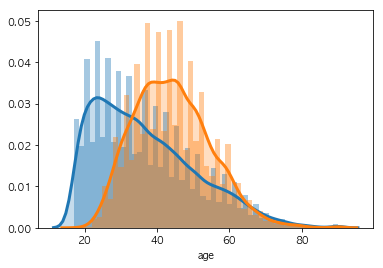

<=50K         >50K
count  24720.000000  7841.000000
mean      36.783738    44.249841
std       14.020088    10.519028
min       17.000000    19.000000
25%       25.000000    36.000000
50%       34.000000    44.000000
75%       46.000000    51.000000
max       90.000000    90.000000

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


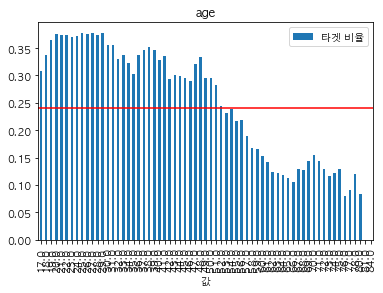

fnlwgt
10662.513694511366 0.0
not normal
1.7075109328052853 0.08773666108063947 95509615.5 0.026340968844239053
same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


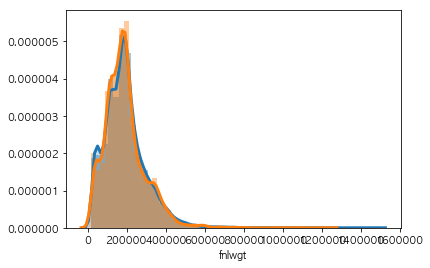

<=50K          >50K
count  2.472000e+04  7.841000e+03
mean   1.903409e+05  1.880050e+05
std    1.064823e+05  1.025418e+05
min    1.228500e+04  1.487800e+04
25%    1.176060e+05  1.191010e+05
50%    1.794650e+05  1.761010e+05
75%    2.390230e+05  2.309590e+05
max    1.484705e+06  1.226583e+06

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


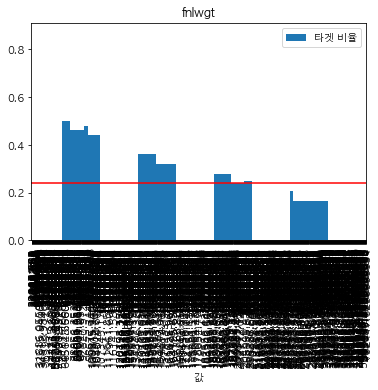

education.num
817.1641448645264 3.5897196971978586e-178
not normal
-64.18797223551665 0.0 54854450.5 0.0
not same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


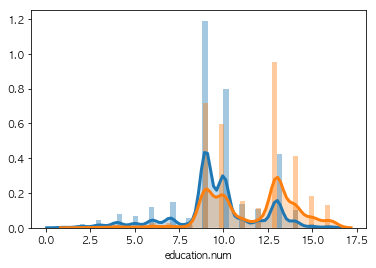

<=50K         >50K
count  24720.000000  7841.000000
mean       9.595065    11.611657
std        2.436147     2.385129
min        1.000000     2.000000
25%        9.000000    10.000000
50%        9.000000    12.000000
75%       10.000000    13.000000
max       16.000000    16.000000

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:823: RuntimeWarning: invalid value encountered in double_scalars
  prop = count * 1. / nobs
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:837: RuntimeWarning: invalid value encountered in double_scalars
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:839: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


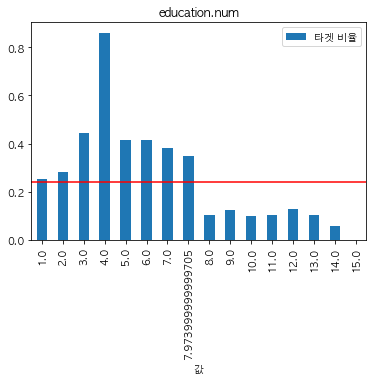

capital.gain
55096.55037502399 0.0
not normal
-41.34186816949368 0.0 79471483.0 0.0
not same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


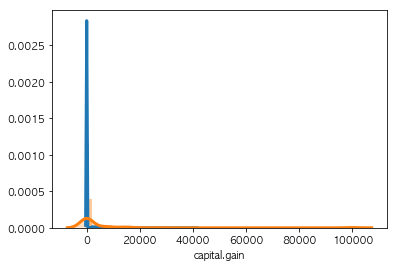

<=50K          >50K
count  24720.000000   7841.000000
mean     148.752468   4006.142456
std      963.139307  14570.378951
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    41310.000000  99999.000000

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:843: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


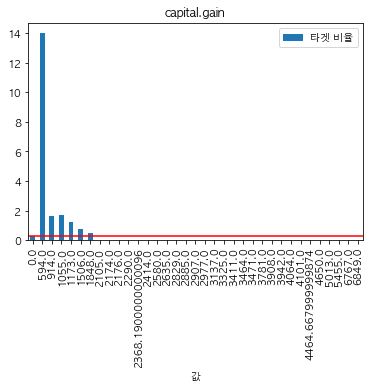

capital.loss
29331.399855829022 0.0
not normal
-27.474177904925856 2.6865471890579053e-164 90170298.5 3.5106467896657624e-143
not same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


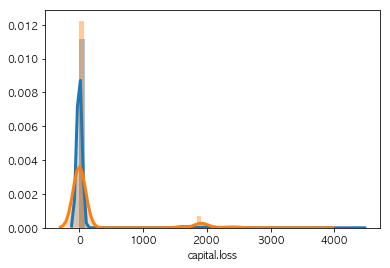

<=50K         >50K
count  24720.000000  7841.000000
mean      53.142921   195.001530
std      310.755769   595.487574
min        0.000000     0.000000
25%        0.000000     0.000000
50%        0.000000     0.000000
75%        0.000000     0.000000
max     4356.000000  3683.000000

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:843: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


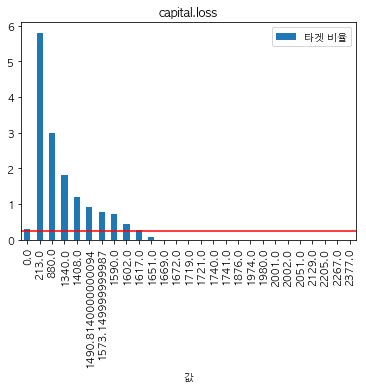

hours.per.week
2508.918440470665 0.0
not normal
-42.583873499437956 0.0 63568779.0 0.0
not same dist


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


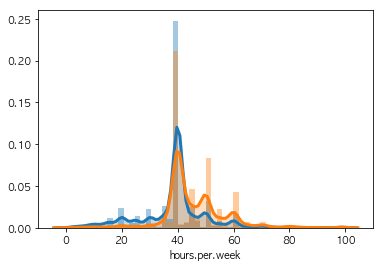

<=50K         >50K
count  24720.000000  7841.000000
mean      38.840210    45.473026
std       12.318995    11.012971
min        1.000000     1.000000
25%       35.000000    40.000000
50%       40.000000    40.000000
75%       40.000000    50.000000
max       99.000000    99.000000

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:823: RuntimeWarning: invalid value encountered in double_scalars
  prop = count * 1. / nobs
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:837: RuntimeWarning: invalid value encountered in double_scalars
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/stats/proportion.py:839: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


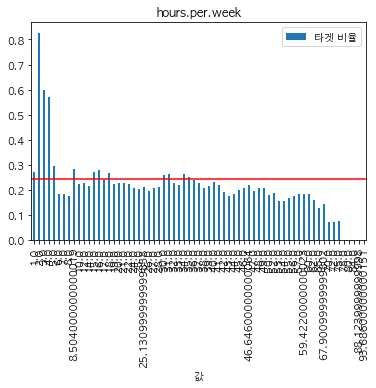

In [ ]:
%matplotlib inline 
### 수치형 변수 탐색

from matplotlib.pyplot import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
rc('font', family='AppleGothic')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = data1
for col in numcols:
    print(col,)
    ##  정규성 검사; 트리 기반이 아닌 대부분의 모형을 위해서는 수치 변수는 정규분포가 아니라면, 정규 분포를 따르도록 변환해줘야 한다.
    from scipy.stats import ttest_ind, mannwhitneyu,normaltest
    k2, p = normaltest(data[col])
    print(k2,p)
    if p < 0.001 : print('not normal')
    else: print('normal')
    ## 타겟 값 분포 차이 확인
    g1 = data[data['income'] != '>50K'][col]
    g2 = data[data['income'] == '>50K'][col]
    
    ## 차이가 의미가 있다면 분류에서도 도움이 될 것으로 기대할 수 있다.
    t, ttestp = ttest_ind(g1, g2)
    ### 정규성 가정이 필요 없는 utest로 차이 검정
    u, up = mannwhitneyu(g1, g2)
    print(t,ttestp,u,up)
    if up < 0.001 : print('not same dist')
    else : print('same dist')
    
    sns.distplot(g1, hist = True, kde = True, label="<=50K",
                 kde_kws = {'shade': True, 'linewidth': 3})

    sns.distplot(g2, hist = True, kde = True, label='>50K',
                 kde_kws = {'shade': True, 'linewidth': 3})
    
    plt.show()

    pdd = pd.concat([g1.describe(),g2.describe()],axis=1)
    pdd.columns = ['<=50K','>50K']
    display(pdd)
    
    ### EDA 요청에 따라 타겟 비율이 튀는 값의 지점을 찾아야 되는 경우에 아래와 같이 활용 가능
    ser,bins = pd.qcut(g1,1000,retbins=True,duplicates='drop')
    ser = pd.cut(g1,bins=bins,include_lowest=True)
    ser2 = pd.cut(g2,bins=bins,include_lowest=True)
    c1 = ser.value_counts().values
    c2 = ser2.value_counts().values
    zs= []
    ps = []
    for a1, t in zip(c1,c2):
        z,p = proportions_ztest(nobs=a1,count=t,value=tp)
        zs.append(z)
        ps.append(round(p,4))

    rd2 = pd.DataFrame.from_dict({'값': bins[:-1],'전체':c1,'타겟':c2,'타겟 비율':c2/c1,'전체 타겟 중 비율': c2/sum(c2),
                               'z' : zs, 'p':ps})
    
    rd2 = rd2.set_index('값')
    rd2[['타겟 비율']].plot.bar()
    plt.axhline(y=round(tp,4),color='r')
    plt.title(col)
    plt.show()
## 대부분 정규 분포가 아니고, 타겟 값에 따라 분포가 다르지만, fnlwght 만 분포가 같으므로 분류에 효과가 적을 것으로 예상
    

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


age


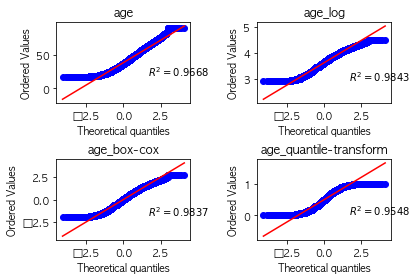

fnlwgt


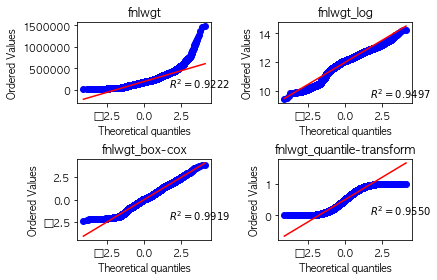

education.num


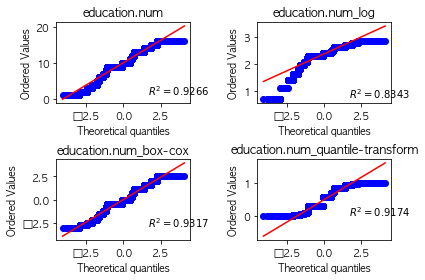

capital.gain


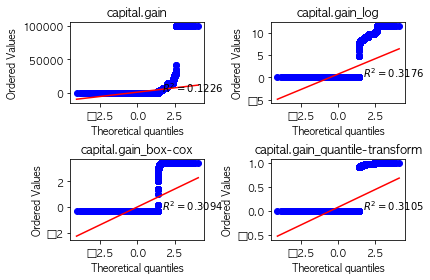

capital.loss


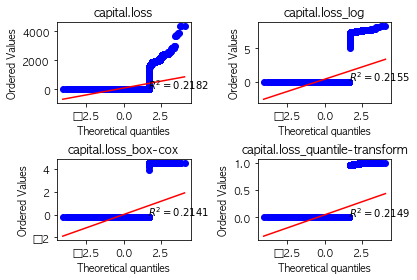

hours.per.week


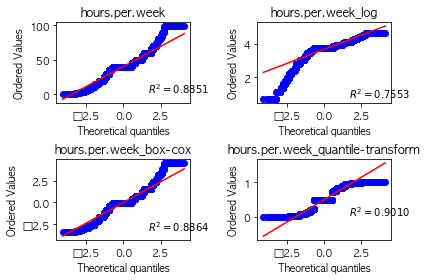

In [ ]:
## 모든 수치형 변수가 정규화 가 필요
### 로그 트랜스폼으로 정규화
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
pt = FunctionTransformer(np.log1p, validate=True)
nums = pt.fit_transform(data.loc[:,numcols])
numslog = pd.DataFrame(nums,columns=numcols + '_logt')


### 파워트랜스폼 방법 1 박스 콕스 ; 사전에 양수로 만들어주기 위해서 스케일 조정 및 시프트
pt = preprocessing.MinMaxScaler()
nums = pt.fit_transform(data.loc[:,numcols])
numsmm = pd.DataFrame(nums,columns=numcols + '_mm')
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
nums = pt.fit_transform(numsmm + 1)
numsbc = pd.DataFrame(nums,columns=numcols + '_bct')

## 파워트랜스폼 방법 2 여 존슨 
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
nums = pt.fit_transform(data.loc[:,numcols])
numsyj = pd.DataFrame(nums,columns=numcols + '_yjt')

### 퀀타일 트랜스폼
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
nums = quantile_transformer.fit_transform(data.loc[:,numcols])
numsqt = pd.DataFrame(nums,columns=numcols + '_qt')

from scipy import stats
nums = data.loc[:,numcols]

for col in range(0,len(numcols)):
    print(numcols[col])
    ax1 = plt.subplot(221)
    stats.probplot(nums.iloc[:,col], dist=stats.norm,plot=ax1,rvalue=True)
    ax1.set_title(numcols[col])
    ax2 = plt.subplot(222)
    stats.probplot(numslog.iloc[:,col], dist=stats.norm,plot=ax2,rvalue=True)
    ax2.set_title(numcols[col] + '_log')
    ax3 = plt.subplot(223)
    stats.probplot(numsbc.iloc[:,col], dist=stats.norm,plot=ax3,rvalue=True)
    ax3.set_title(numcols[col] + '_box-cox')
    ax4 = plt.subplot(224)
    stats.probplot(numsqt.iloc[:,col], dist=stats.norm,plot=ax4,rvalue=True)
    ax4.set_title(numcols[col] + '_quantile-transform')
    plt.subplots_adjust(hspace = 0.7, wspace = 0.5)

    plt.show()
    
    ## age 는 yeo-johnson, fnlwgt 는 box-cox, education.num 은 yeo-johnson, hours.per.week 는 box-cox 
    ##; quantile, box-cox와 yeo-johnson이 비슷하거나 좀 더 좋은 box-cox로 통일
    ## capital.gain 과 capital.loss 는 정규성이 안생기므로, 구간화후 원핫



In [ ]:
## 변수 처리


## 박스 콕스 트랜스폼 대상 변수
nc1 = ['age','fnlwgt','education.num','hours.per.week']
nums1 = data.loc[:,nc1]
pt = preprocessing.MinMaxScaler()
numsmm = pt.fit_transform(nums1)
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
numsbc = pt.fit_transform(numsmm + 1)
## 다른 변수들 과 스케일이 같게 0~ 1 사이로 스케일을 맞춰줘야 함
pt = preprocessing.MinMaxScaler()
numsbc = pt.fit_transform(numsbc)

## 정규화가 안되는 변수들은 구간화
nc2 = ['capital.gain','capital.loss']
nums2 = data.loc[:,nc2]
### 구간화 한 후 원핫 으로 정규성 문제 해결 
for col in nc2 :
    nums2[col] = pd.qcut(nums2[col].astype('float'),100,duplicates='drop')   
    print(nums2[col].value_counts())
    
### 구간화 한후 원 핫
numsonhd = pd.get_dummies(nums2.astype('object'),prefix=nc2)

## 범주형 변수들은 원핫 인코딩
cats = data.loc[:,catcols]
catsonhd = pd.get_dummies(cats,prefix=catcols)


data['income'] = data.income.astype('category').cat.codes
print(data['income'].value_counts())
### 최종 변환 완료 데이터 확인
data2 = pd.concat([data['income'],pd.DataFrame(numsbc,columns=nc1),numsonhd,catsonhd],axis=1)
display(data2.head())

display(data2.describe(include='all'))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(-0.001, 1458.2]      29956
(5013.0, 7298.0]        426
(14084.0, 15024.0]      378
(3818.0, 5013.0]        369
(1458.2, 2885.0]        329
(2885.0, 3818.0]        328
(7298.0, 7688.0]        298
(15024.0, 99999.0]      261
(7688.0, 14084.0]       216
Name: capital.gain, dtype: int64
(-0.001, 1590.0]    31288
(1848.0, 1902.0]      400
(1590.0, 1848.0]      338
(1980.0, 4356.0]      325
(1902.0, 1980.0]      210
Name: capital.loss, dtype: int64
0    24720
1     7841
Name: income, dtype: int64


income       age    fnlwgt  education.num  hours.per.week  \
0       0  1.000000  0.177634       0.464205        0.421038   
1       0  0.939489  0.301904       0.464205        0.188314   
2       0  0.796237  0.400695       0.533506        0.421038   
3       0  0.663274  0.316877       0.154962        0.421038   
4       0  0.484604  0.519105       0.533506        0.421038   

   capital.gain_(-0.001, 1458.2]  capital.gain_(1458.2, 2885.0]  \
0                              1                              0   
1                              1                              0   
2                              1                              0   
3                              1                              0   
4                              1                              0   

   capital.gain_(2885.0, 3818.0]  capital.gain_(3818.0, 5013.0]  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   capital.gain_(5013.0, 7298.0]  capital.gain_(7298.0, 7688.0]  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   capital.gain_(7688.0, 14084.0]  capital.gain_(14084.0, 15024.0]  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   capital.gain_(15024.0, 99999.0]  capital.loss_(-0.001, 1590.0]  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   capital.loss_(1590.0, 1848.0]  capital.loss_(1848.0, 1902.0]  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   capital.loss_(1902.0, 1980.0]  capital.loss_(1980.0, 4356.0]  \
0                              0                              1   
1                              0                              1   
2                              0                              1   
3                              0                              1   
4                              0                              1   

   relationship_Husband  relationship_Not-in-family  \
0                     0                           1   
1                     0                           1   
2                     0                           0   
3                     0                           0   
4                     0                           0   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       1   

   relationship_Unmarried  relationship_Wife  education_10th  education_11th  \
0      

income           age        fnlwgt  education.num  \
count  32561.000000  32561.000000  32561.000000   32561.000000   
mean       0.240810      0.417220      0.380064       0.547297   
std        0.427581      0.217067      0.162696       0.179711   
min        0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.254415      0.270679       0.464205   
50%        0.000000      0.420225      0.387421       0.533506   
75%        0.000000      0.586028      0.480785       0.679413   
max        1.000000      1.000000      1.000000       1.000000   

       hours.per.week  capital.gain_(-0.001, 1458.2]  \
count    32561.000000                   32561.000000   
mean         0.423981                       0.919996   
std          0.127506                       0.271303   
min          0.000000                       0.000000   
25%          0.421038                       1.000000   
50%          0.421038                       1.000000   
75%          0.472450                       1.000000   
max          1.000000                       1.000000   

       capital.gain_(1458.2, 2885.0]  capital.gain_(2885.0, 3818.0]  \
count                   32561.000000                   32561.000000   
mean                        0.010104                       0.010073   
std                         0.100012                       0.099861   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       capital.gain_(3818.0, 5013.0]  capital.gain_(5013.0, 7298.0]  \
count                   32561.000000                   32561.000000   
mean                        0.011333                       0.013083   
std                         0.105851                       0.113633   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       capital.gain_(7298.0, 7688.0]  capital.gain_(7688.0, 14084.0]  \
count                   32561.000000                    32561.000000   
mean                        0.009152                        0.006634   
std                         0.095229                        0.081178   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         0.000000                        0.000000   
max                         1.000000                        1.000000   

       capital.gain_(14084.0, 15024.0]  capital.gain_(15024.0, 99999.0]  \
count                     32561.000000                     32561.000000   
mean                          0.011609                         0.008016   
std                           0.107119                         0.089172   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       capital.loss_(-0.001, 1590.0]  capital.loss_(1590.0, 1848.0]  \
count                   32561.000000                   32561.000000   
mean                        0.960904                       0.010381   
std                         0.193826                       0.101356   
min                     

In [ ]:
## 코릴레이션 체크; 로지스틱 리그레션을 하는 경우 다중공선성을 막기 위해서 코릴레이션이 높은 변수들이 있다면 제거 필요
from IPython.display import display
from sklearn import linear_model
from sklearn.metrics import r2_score


### 페어 리스트를 받아서 연결된 집합 반환
def get_cliques(pairs):
    set_list = [set(pairs[0])]
    for pair in pairs[1:]:
        matched=False
        for a_set in set_list:
            if pair[0] in a_set or pair[1] in a_set:
                a_set.update(pair)
                matched=True
                break
        if not matched:
            set_list.append(set(pair))

    return set_list

### 코릴레이션 체크 
def checkcorrs(ndata,gcols):
    ### 타겟 칼럼을 제외
    fcols = list(set(ndata.columns) - set(gcols))
    ### 모든 변수간 코릴레이션 계산
    d2tc = ndata.loc[:,fcols].astype(float).corr()
    d2tc2 = d2tc.stack().reset_index()
    d2tc2[0] = abs(d2tc2[0])
    d2tc2 = d2tc2.sort_values(0,ascending=False)
    d2tc2 = d2tc2[ d2tc2 ['level_0'] != d2tc2['level_1']]
    ### 기준점은 0.7 이상
    d2tc2 = d2tc2[ d2tc2 [0] > 0.7]
    ### 높은게 없으면 
    if d2tc2.shape[0] == 0 :
        print(d2tc2.shape)
        ## 그냥 리턴
        return ndata
    
    ### 있다면 페어들을 만들어서 
    sl = set()
    for i, x in d2tc2.iterrows():
        s = frozenset([x['level_0'],x['level_1']])
        sl.add(s)
    sss = pd.DataFrame()
    for s in sl:
        s1,s2 = s
        ss = d2tc2[ (d2tc2['level_0'] == s1 )  & (d2tc2['level_1'] == s2)]
        sss = pd.concat([sss,pd.DataFrame(ss)],axis=0)
    display(sss.sort_values('level_0'))
    subset = sss[['level_0', 'level_1']]
    tuples = [tuple(x) for x in subset.values]
    
    ### 페어들의 연결된 집합 찾기 
    pairs = tuples
    cc = get_cliques(pairs)
    print(cc)

    
    ### 집합들을 돌면서 집합들마다 설명력이 가장 높은 변수 하나만 뽑기
    from scipy import stats
    noselcols = set()
    lr = linear_model.LogisticRegression()
    y = ndata.loc[:,gcols]
    for r in cc:
        r = list(r)
        #print(r)
        r2s = []
        for c in r:
            X = ndata.loc[:,[c]].astype(float).values
            lr.fit(X,y)
            y_pred = lr.predict(X)
            #print(c)
            #print(lr.coef_) 
            r2 = r2_score(y, y_pred)  
            r2s.append(r2)
        print(r2s)
        ### 최고 설명력 변수 찾기
        mc = max(r2s)
        midx =r2s.index(mc)
        mr = r[midx]
        #print(mc,midx,mr)
        ### 제거 대상 변수들
        for x in r:
            if x != mr : noselcols.add(x)
        #break
    print(noselcols)
    excols = list(noselcols )
    ### 제거 해보고
    ndata2 = ndata.loc[:,list(set(ndata.columns) - set(excols))]

    ### 코릴레이션 다시 한번 보고
    d2tc = ndata2.corr()
    d2tc2 = d2tc.stack().reset_index()
    d2tc2[0] = abs(d2tc2[0])
    d2tc2 = d2tc2.sort_values(0,ascending=False)
    d2tc2 = d2tc2[ d2tc2 ['level_0'] != d2tc2['level_1']]
    d2tc2 = d2tc2[ d2tc2 [0] > 0.6]
    display(d2tc2)
    return ndata2
data2c = checkcorrs(data2,['income'])

level_0                            level_1         0
12236            race_Black                         race_White  0.788747
5489   relationship_Husband  marital.status_Married-civ-spouse  0.893210
618              sex_Female                           sex_Male  1.000000
5755            workclass_?                       occupation_?  0.997985

[{'workclass_?', 'occupation_?'}, {'sex_Female', 'sex_Male'}, {'relationship_Husband', 'marital.status_Married-civ-spouse'}, {'race_White', 'race_Black'}]
[-0.3171925566343041, -0.3171925566343041]
[-0.3171925566343041, -0.3171925566343041]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

[-0.3171925566343041, -0.3171925566343041]
[-0.3171925566343041, -0.3171925566343041]
{'marital.status_Married-civ-spouse', 'sex_Male', 'race_Black', 'occupation_?'}


Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

In [ ]:
data2c.head()

capital.gain_(14084.0, 15024.0]  capital.gain_(1458.2, 2885.0]  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   native.country_Japan  education_9th  workclass_Federal-gov  sex_Female  \
0                     0              0                      0           1   
1                     0              0                      0           1   
2                     0              0                      0           1   
3                     0              0                      0           1   
4                     0              0                      0           1   

   occupation_Other-service  education_HS-grad  native.country_Nicaragua  \
0                         0                  1                         0   
1                         0                  1                         0   
2                         0                  0                         0   
3                         0                  0                         0   
4                         0                  0                         0   

   workclass_Self-emp-inc  education_7th-8th  education_Assoc-voc  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  1                    0   
4                       0                  0                    0   

   relationship_Wife  native.country_Haiti  native.country_Hong  \
0                  0                     0                    0   
1                  0                     0                    0   
2                  0                     0                    0   
3                  0                     0                    0   
4                  0                     0                    0   

   occupation_Armed-Forces  occupation_Transport-moving  workclass_State-gov  \
0                        0                            0                    0   
1                        0                            0                    0   
2                        0                            0                    0   
3                        0                            0                    0   
4                        0                            0                    0   

   native.country_Canada  education_10th  workclass_Private  \
0                      0               0                  0   
1                      0               0                  1   
2                      0               0                  0   
3                      0               0                  1   
4                      0               0                  1   

   native.country_Thailand  native.country_Puerto-Rico  native.country_Italy  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   hours.per.week  capital.gain_(7298.0, 7688.0]  native.country_Jamaica  \
0        0.421038                              0                       0   
1        0.188314                              0                       0   
2        0.421038                              0                       0   
3        0.421038                              0                       0   
4        0.421038                              0                       0   

   education_Doctorate  relationship_Unmarried  nati

In [ ]:
## 성능 비교를 위한 지표
from sklearn.metrics import auc
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve,average_precision_score,
                             precision_recall_curve,precision_score, recall_score,f1_score)
def evals(y_true,y_pred,y_prob):
    fpr , tpr, _ = roc_curve(y_true,y_prob)
    ## AUC 중심으로 판단하고 나머지는 참고용
    auroc = round(auc(fpr,tpr),3)
    auprc = round(average_precision_score(y_true,y_prob),3)
    prec = round(precision_score(y_true,y_pred),3)
    rec = round(recall_score(y_true,y_pred),3)
    f1 = round(f1_score(y_true,y_pred),3)
    
    ypt = pd.DataFrame({'true':y_true,'pred':y_prob})
    ypt = ypt.sort_values(by='pred',ascending=False)
    
    cnt = []
    cnt2 = []
    ## 보통 현업에 설명하기 위해서는 스코어 상위 몇명에서 정답이 몇명 나왔는가로 설명 
    for nt in [100,200,500]:
        cnt.append(sum(ypt[0:nt]['true']))
        cnt2.append(sum(ypt[len(ypt)-nt:len(ypt)]['true']))
    metrics = {'AUROC':[auroc],'AUPRC':[auprc],'Precision':[prec],'Recall':[rec],'F1':[f1],
              'Top100':cnt[0],'Top200':cnt[1],'Top500':cnt[2],
               'Bot100':cnt2[0],'Bot200':cnt2[1],'Bot500':cnt2[2]}
    metrics = pd.DataFrame(metrics,columns=['AUROC','AUPRC','Precision','Recall','F1',
                                           'Top100','Top200','Top500','Bot100','Bot200','Bot500'])
    display(metrics)

    ### 타겟 값에 따른 스코어 덴시티 플롯으로 스코어가 잘 분리되는지 시각적으로 확인 가능
    g1 = ypt[ypt['true'] != 1]['pred']
    g2 = ypt[ypt['true'] == 1]['pred']
    
    sns.distplot(g1, hist = True, kde = True, label="<=50K",
                 kde_kws = {'shade': True, 'linewidth': 3})

    sns.distplot(g2, hist = True, kde = True, label='>50K',
                 kde_kws = {'shade': True, 'linewidth': 3})
    
    plt.show()
    
    return metrics

AUROC  AUPRC  Precision  Recall     F1  Top100  Top200  Top500  Bot100  \
0  0.913  0.793      0.763   0.589  0.665     100     200     494       0   

   Bot200  Bot500  
0       0       1

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


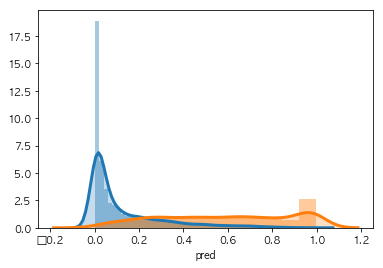

(32561, 116) (32561, 74)


col  rank
0              capital.gain_(14084.0, 15024.0]     1
79               capital.loss_(-0.001, 1590.0]     1
78              native.country_Trinadad&Tobago     1
77                       education_Prof-school     1
76                         education_Preschool     1
71                            occupation_Sales     1
69                     occupation_Tech-support     1
68                   occupation_Prof-specialty     1
67        marital.status_Married-spouse-absent     1
65                  occupation_Protective-serv     1
64                                         age     1
61               capital.loss_(1902.0, 1980.0]     1
60                  workclass_Self-emp-not-inc     1
59                        native.country_South     1
58   native.country_Outlying-US(Guam-USVI-etc)     1
114              capital.gain_(5013.0, 7298.0]     1
56                       workclass_Without-pay     1
55                                      fnlwgt     1
54                       native.country_Mexico     1
49                      native.country_Germany     1
80                     native.country_Columbia     1
81              capital.gain_(7688.0, 14084.0]     1
82                marital.status_Never-married     1
83                  occupation_Exec-managerial     1
113              capital.loss_(1590.0, 1848.0]     1
110           marital.status_Married-AF-spouse     1
109                   marital.status_Separated     1
107                          education_5th-6th     1
106                     native.country_Vietnam     1
105                      native.country_France     1
104              capital.gain_(3818.0, 5013.0]     1
103          native.country_Dominican-Republic     1
101            capital.gain_(15024.0, 99999.0]     1
48               capital.gain_(2885.0, 3818.0]     1
100                     marital.status_Widowed     1
98                native.country_United-States     1
97                 relationship_Other-relative     1
95               capital.loss_(1848.0, 1902.0]     1
94                              education_11th     1
93                  native.country_Philippines     1
91                occupation_Handlers-cleaners     1
90                     marital.status_Divorced     1
88                               education.num     1
87                      native.country_Hungary     1
99                     native.country_Portugal     1
47                     native.country_Cambodia     1
57                      relationship_Own-child     1
23                        native.country_Italy     1
27                         education_Doctorate     1
26                      native.country_Jamaica     1
25               capital.gain_(7298.0, 7688.0]     1
24                              hours.per.week     1
46                                 workclass_?     1
22                  native.country_Puerto-Rico     1
19                              education_10th     1
18                       native.country_Canada     1
17                         workclass_State-gov     1
15                     occupation_Armed-Forces     1
12                           relationship_Wife     1
6                     occupation_Other-service     1
5                                   sex_Female     1
4                        workclass_Federal-gov     1
3                                education_9th     1
2                         native.country_Japan     1
1                capital.gain_(1458.2, 2885.0]     1
29                   native.country_Yugoslavia     1
32                  occupation_Priv-house-serv     1
115                     native.country_Ireland     1
41                occupation_Machine-op-inspct     1
39               capital.gain_(-0.001, 1458.2]     1
38                         native.country_Cuba     1
37                     race_Amer-Indian-Eskimo     1
34                  occupation_Farming-fishing     1
36                        native.country_China     1

         Current function value: 0.302836
         Iterations: 35
                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.451     
Dependent Variable:              income                      AIC:                         19869.2796
Date:                            2019-01-18 22:20            BIC:                         20490.2040
No. Observations:                32561                       Log-Likelihood:              -9860.6   
Df Model:                        73                          LL-Null:                     -17974.   
Df Residuals:                    32487                       LLR p-value:                 0.0000    
Converged:                       0.0000                      Scale:                       1.0000    
No. Iterations:                  35.0000                                                            
--------------------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
## 첫번째 모델 로지스틱 리그레션
def fitandeval_lr(fedata):
    
    y = fedata.loc[:,'income']
    X = fedata.loc[:, fedata.columns != 'income']


    import numpy as np
    from sklearn import linear_model
    from sklearn.feature_selection import SelectFromModel
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import ShuffleSplit

    from sklearn.pipeline import Pipeline

    from sklearn.model_selection import train_test_split
    
    ### 트레인 테스트 구분
    X_train,X_valid, y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)
    lr = linear_model.LogisticRegression(solver='liblinear')    
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

    ## RFECV를 통한 피쳐 셀렉션 ; 피쳐를 제거해가면서 중요한 피쳐만 찾는 방식
    clf = Pipeline([
         ('feature_selection', RFECV(lr,step= 1, cv= cv)),
        #('feature_selection', SelectKBest(f_regression,x)),
      ('regression', linear_model.LogisticRegression(solver='liblinear'))
    ])
    clf.fit(X_train, y_train)
    
    ### 성능 확인; 벨리드를 보지 않았기 때문에 벨리드로 판단 가능
    val_preds = clf.predict(X_valid)
    val_probs = clf.predict_proba(X_valid)[:,1]

    metrics = evals(y_valid,val_preds,val_probs)
    
    ### 선택된 피쳐 확인
    skb = clf.named_steps['feature_selection']
    Xtn =  skb.transform(X)
    mask = skb.get_support() 
    new_features = [] 
    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
    Xtn = pd.DataFrame(Xtn,columns=new_features)
    print(X.shape,Xtn.shape)
    sp = pd.DataFrame({'col':X_train.columns,'rank':skb.ranking_}).sort_values('rank').iloc[0:skb.n_features_]
    display(sp)
    
    import statsmodels.api as sm

    ### 리그레션 결과 서머리 확인 
    logit_model=sm.Logit(y,Xtn)
    result=logit_model.fit()
    print(result.summary2())

    return clf

lrclf = fitandeval_lr(data2c)
## AUC 0.913

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)
/anacond

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] verbose=1, reg_lambda=50, reg_alpha=50, objective=binary, num_threads=1, num_leaves=23, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=false, feature_fraction=0.6, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary 
[1]	valid_0's auc: 0.817078	valid_0's binary_logloss: 0.547193
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.847487	valid_0's binary_logloss: 0.537193
[3]	valid_0's auc: 0.868262	valid_0's binary_logloss: 0.526875
[4]	valid_0's auc: 0.865407	valid_0's binary_logloss: 0.521292
[5]	valid_0's auc: 0.866096	valid_0's binary_logloss: 0.513972
[6]	valid_0's auc: 0.866748	valid_0's binary_logloss: 0.506424
[7]	valid_0's auc: 0.869579	valid_0's binary_logloss: 0.499339
[8]	valid_0's auc: 0.868816	valid_0's binary_logloss: 0.492775
[9]	valid_0's auc: 0.868111	valid_0's binary_logloss: 0.486588
[10]	valid_0's auc: 0.868265	valid_0's bin

[162]	valid_0's auc: 0.891292	valid_0's binary_logloss: 0.355085
[163]	valid_0's auc: 0.891276	valid_0's binary_logloss: 0.35503
[164]	valid_0's auc: 0.891336	valid_0's binary_logloss: 0.354906
[165]	valid_0's auc: 0.891367	valid_0's binary_logloss: 0.354795
[166]	valid_0's auc: 0.891405	valid_0's binary_logloss: 0.354679
[167]	valid_0's auc: 0.891448	valid_0's binary_logloss: 0.354607
[168]	valid_0's auc: 0.891495	valid_0's binary_logloss: 0.354524
[169]	valid_0's auc: 0.891482	valid_0's binary_logloss: 0.354497
[170]	valid_0's auc: 0.891492	valid_0's binary_logloss: 0.354456
[171]	valid_0's auc: 0.891516	valid_0's binary_logloss: 0.35436
[172]	valid_0's auc: 0.891533	valid_0's binary_logloss: 0.354322
[173]	valid_0's auc: 0.891572	valid_0's binary_logloss: 0.354232
[174]	valid_0's auc: 0.891598	valid_0's binary_logloss: 0.354148
[175]	valid_0's auc: 0.89165	valid_0's binary_logloss: 0.354062
[176]	valid_0's auc: 0.891668	valid_0's binary_logloss: 0.354025
[177]	valid_0's auc: 0.89168

[CV]  verbose=1, reg_lambda=50, reg_alpha=50, objective=binary, num_threads=1, num_leaves=23, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=false, feature_fraction=0.6, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary, total=   1.2s
[CV] verbose=1, reg_lambda=50, reg_alpha=50, objective=binary, num_threads=1, num_leaves=23, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=false, feature_fraction=0.6, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary 
[1]	valid_0's auc: 0.816304	valid_0's binary_logloss: 0.548053
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.857499	valid_0's binary_logloss: 0.538572
[3]	valid_0's auc: 0.85239	valid_0's binary_logloss: 0.53257
[4]	valid_0's auc: 0.862247	valid_0's binary_logloss: 0.522964
[5]	valid_0's auc: 0.859736	valid_0's binary_logloss: 0.516472
[6]	valid_0's auc: 0.86202	valid_0's binary_logloss: 0.507806
[7]	valid_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[27]	valid_0's auc: 0.88276	valid_0's binary_logloss: 0.422775
[28]	valid_0's auc: 0.882466	valid_0's binary_logloss: 0.420215
[29]	valid_0's auc: 0.882437	valid_0's binary_logloss: 0.417505
[30]	valid_0's auc: 0.883159	valid_0's binary_logloss: 0.415724
[31]	valid_0's auc: 0.883443	valid_0's binary_logloss: 0.413634
[32]	valid_0's auc: 0.883289	valid_0's binary_logloss: 0.411441
[33]	valid_0's auc: 0.883805	valid_0's binary_logloss: 0.409168
[34]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.408069
[35]	valid_0's auc: 0.883935	valid_0's binary_logloss: 0.406028
[36]	valid_0's auc: 0.884516	valid_0's binary_logloss: 0.404999
[37]	valid_0's auc: 0.884742	valid_0's binary_logloss: 0.403493
[38]	valid_0's auc: 0.884864	valid_0's binary_logloss: 0.401892
[39]	valid_0's auc: 0.885074	valid_0's binary_logloss: 0.400142
[40]	valid_0's auc: 0.885223	valid_0's binary_logloss: 0.399016
[41]	valid_0's auc: 0.885354	valid_0's binary_logloss: 0.397528
[42]	valid_0's auc: 0.885494	valid_0's bin

[220]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351206
[221]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351206
[222]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351206
[223]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351205
[224]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351204
[225]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351204
[226]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351204
[227]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351204
[228]	valid_0's auc: 0.89441	valid_0's binary_logloss: 0.351203
[229]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351203
[230]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351203
[231]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351202
[232]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351202
[233]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351201
[234]	valid_0's auc: 0.894411	valid_0's binary_logloss: 0.351201
[235]	valid_0's auc: 0.894411	vali

[66]	valid_0's auc: 0.895255
[67]	valid_0's auc: 0.895303
[68]	valid_0's auc: 0.895081
[69]	valid_0's auc: 0.895034
[70]	valid_0's auc: 0.895273
[71]	valid_0's auc: 0.895091
[72]	valid_0's auc: 0.895141
[73]	valid_0's auc: 0.894999
[74]	valid_0's auc: 0.895105
[75]	valid_0's auc: 0.895084
[76]	valid_0's auc: 0.895214
[77]	valid_0's auc: 0.895159
[78]	valid_0's auc: 0.895078
[79]	valid_0's auc: 0.895028
[80]	valid_0's auc: 0.895035
[81]	valid_0's auc: 0.895128
[82]	valid_0's auc: 0.895549
[83]	valid_0's auc: 0.895701
[84]	valid_0's auc: 0.895627
[85]	valid_0's auc: 0.895569
[86]	valid_0's auc: 0.895435
[87]	valid_0's auc: 0.895318
[88]	valid_0's auc: 0.895251
[89]	valid_0's auc: 0.895349
[90]	valid_0's auc: 0.895351
[91]	valid_0's auc: 0.89526
[92]	valid_0's auc: 0.895218
[93]	valid_0's auc: 0.895202
[94]	valid_0's auc: 0.895022
[95]	valid_0's auc: 0.895192
[96]	valid_0's auc: 0.895177
[97]	valid_0's auc: 0.895106
[98]	valid_0's auc: 0.895254
[99]	valid_0's auc: 0.89508
[100]	valid_0's 

[390]	valid_0's auc: 0.900796
[391]	valid_0's auc: 0.900804
[392]	valid_0's auc: 0.900834
[393]	valid_0's auc: 0.900844
[394]	valid_0's auc: 0.900865
[395]	valid_0's auc: 0.900856
[396]	valid_0's auc: 0.900894
[397]	valid_0's auc: 0.90089
[398]	valid_0's auc: 0.900937
[399]	valid_0's auc: 0.900962
[400]	valid_0's auc: 0.90097
[401]	valid_0's auc: 0.901031
[402]	valid_0's auc: 0.901065
[403]	valid_0's auc: 0.901117
[404]	valid_0's auc: 0.90113
[405]	valid_0's auc: 0.901135
[406]	valid_0's auc: 0.901192
[407]	valid_0's auc: 0.901209
[408]	valid_0's auc: 0.901222
[409]	valid_0's auc: 0.901236
[410]	valid_0's auc: 0.901263
[411]	valid_0's auc: 0.901258
[412]	valid_0's auc: 0.90131
[413]	valid_0's auc: 0.90132
[414]	valid_0's auc: 0.901321
[415]	valid_0's auc: 0.901362
[416]	valid_0's auc: 0.901409
[417]	valid_0's auc: 0.901394
[418]	valid_0's auc: 0.901393
[419]	valid_0's auc: 0.901447
[420]	valid_0's auc: 0.901454
[421]	valid_0's auc: 0.901488
[422]	valid_0's auc: 0.901577
[423]	valid_0's

[690]	valid_0's auc: 0.905323
[691]	valid_0's auc: 0.905352
[692]	valid_0's auc: 0.905343
[693]	valid_0's auc: 0.90535
[694]	valid_0's auc: 0.905373
[695]	valid_0's auc: 0.905401
[696]	valid_0's auc: 0.905407
[697]	valid_0's auc: 0.905406
[698]	valid_0's auc: 0.905406
[699]	valid_0's auc: 0.90542
[700]	valid_0's auc: 0.905422
[701]	valid_0's auc: 0.905445
[702]	valid_0's auc: 0.905444
[703]	valid_0's auc: 0.905466
[704]	valid_0's auc: 0.905483
[705]	valid_0's auc: 0.905491
[706]	valid_0's auc: 0.905516
[707]	valid_0's auc: 0.905517
[708]	valid_0's auc: 0.905541
[709]	valid_0's auc: 0.905571
[710]	valid_0's auc: 0.905587
[711]	valid_0's auc: 0.905612
[712]	valid_0's auc: 0.905627
[713]	valid_0's auc: 0.905628
[714]	valid_0's auc: 0.905637
[715]	valid_0's auc: 0.905647
[716]	valid_0's auc: 0.905664
[717]	valid_0's auc: 0.905672
[718]	valid_0's auc: 0.905697
[719]	valid_0's auc: 0.905712
[720]	valid_0's auc: 0.905725
[721]	valid_0's auc: 0.905731
[722]	valid_0's auc: 0.905732
[723]	valid_

[997]	valid_0's auc: 0.909024
[998]	valid_0's auc: 0.909027
[999]	valid_0's auc: 0.909044
[1000]	valid_0's auc: 0.90905
[1001]	valid_0's auc: 0.909056
[1002]	valid_0's auc: 0.90907
[1003]	valid_0's auc: 0.909079
[1004]	valid_0's auc: 0.909095
[1005]	valid_0's auc: 0.909091
[1006]	valid_0's auc: 0.90911
[1007]	valid_0's auc: 0.909129
[1008]	valid_0's auc: 0.909141
[1009]	valid_0's auc: 0.909163
[1010]	valid_0's auc: 0.909166
[1011]	valid_0's auc: 0.909172
[1012]	valid_0's auc: 0.909181
[1013]	valid_0's auc: 0.909193
[1014]	valid_0's auc: 0.909192
[1015]	valid_0's auc: 0.909213
[1016]	valid_0's auc: 0.909214
[1017]	valid_0's auc: 0.909213
[1018]	valid_0's auc: 0.909217
[1019]	valid_0's auc: 0.909217
[1020]	valid_0's auc: 0.90923
[1021]	valid_0's auc: 0.909234
[1022]	valid_0's auc: 0.909249
[1023]	valid_0's auc: 0.909264
[1024]	valid_0's auc: 0.909274
[1025]	valid_0's auc: 0.909293
[1026]	valid_0's auc: 0.909308
[1027]	valid_0's auc: 0.909316
[1028]	valid_0's auc: 0.909331
[1029]	valid_0'

[1325]	valid_0's auc: 0.911404
[1326]	valid_0's auc: 0.911412
[1327]	valid_0's auc: 0.911417
[1328]	valid_0's auc: 0.911423
[1329]	valid_0's auc: 0.911427
[1330]	valid_0's auc: 0.91144
[1331]	valid_0's auc: 0.911438
[1332]	valid_0's auc: 0.911449
[1333]	valid_0's auc: 0.91146
[1334]	valid_0's auc: 0.911467
[1335]	valid_0's auc: 0.911476
[1336]	valid_0's auc: 0.911482
[1337]	valid_0's auc: 0.911484
[1338]	valid_0's auc: 0.911486
[1339]	valid_0's auc: 0.911485
[1340]	valid_0's auc: 0.911498
[1341]	valid_0's auc: 0.911493
[1342]	valid_0's auc: 0.911498
[1343]	valid_0's auc: 0.911512
[1344]	valid_0's auc: 0.911517
[1345]	valid_0's auc: 0.91152
[1346]	valid_0's auc: 0.911525
[1347]	valid_0's auc: 0.911529
[1348]	valid_0's auc: 0.911542
[1349]	valid_0's auc: 0.91155
[1350]	valid_0's auc: 0.911562
[1351]	valid_0's auc: 0.911572
[1352]	valid_0's auc: 0.911578
[1353]	valid_0's auc: 0.911576
[1354]	valid_0's auc: 0.911576
[1355]	valid_0's auc: 0.911586
[1356]	valid_0's auc: 0.91159
[1357]	valid_

[1599]	valid_0's auc: 0.912664
[1600]	valid_0's auc: 0.912668
[1601]	valid_0's auc: 0.912669
[1602]	valid_0's auc: 0.912675
[1603]	valid_0's auc: 0.912679
[1604]	valid_0's auc: 0.912684
[1605]	valid_0's auc: 0.912685
[1606]	valid_0's auc: 0.912685
[1607]	valid_0's auc: 0.912686
[1608]	valid_0's auc: 0.912688
[1609]	valid_0's auc: 0.91269
[1610]	valid_0's auc: 0.912693
[1611]	valid_0's auc: 0.912694
[1612]	valid_0's auc: 0.912698
[1613]	valid_0's auc: 0.912702
[1614]	valid_0's auc: 0.912706
[1615]	valid_0's auc: 0.912711
[1616]	valid_0's auc: 0.912709
[1617]	valid_0's auc: 0.912708
[1618]	valid_0's auc: 0.912712
[1619]	valid_0's auc: 0.912716
[1620]	valid_0's auc: 0.912717
[1621]	valid_0's auc: 0.912712
[1622]	valid_0's auc: 0.912711
[1623]	valid_0's auc: 0.912715
[1624]	valid_0's auc: 0.912717
[1625]	valid_0's auc: 0.912721
[1626]	valid_0's auc: 0.912723
[1627]	valid_0's auc: 0.912728
[1628]	valid_0's auc: 0.912734
[1629]	valid_0's auc: 0.912738
[1630]	valid_0's auc: 0.912739
[1631]	va

[1883]	valid_0's auc: 0.913477
[1884]	valid_0's auc: 0.913483
[1885]	valid_0's auc: 0.913484
[1886]	valid_0's auc: 0.913484
[1887]	valid_0's auc: 0.913486
[1888]	valid_0's auc: 0.913486
[1889]	valid_0's auc: 0.913487
[1890]	valid_0's auc: 0.913491
[1891]	valid_0's auc: 0.913489
[1892]	valid_0's auc: 0.913497
[1893]	valid_0's auc: 0.913499
[1894]	valid_0's auc: 0.913502
[1895]	valid_0's auc: 0.913508
[1896]	valid_0's auc: 0.913513
[1897]	valid_0's auc: 0.913508
[1898]	valid_0's auc: 0.913513
[1899]	valid_0's auc: 0.913519
[1900]	valid_0's auc: 0.913521
[1901]	valid_0's auc: 0.913524
[1902]	valid_0's auc: 0.913525
[1903]	valid_0's auc: 0.91352
[1904]	valid_0's auc: 0.913521
[1905]	valid_0's auc: 0.913525
[1906]	valid_0's auc: 0.91353
[1907]	valid_0's auc: 0.913536
[1908]	valid_0's auc: 0.913538
[1909]	valid_0's auc: 0.91354
[1910]	valid_0's auc: 0.913542
[1911]	valid_0's auc: 0.913543
[1912]	valid_0's auc: 0.913548
[1913]	valid_0's auc: 0.91355
[1914]	valid_0's auc: 0.913552
[1915]	valid

[2167]	valid_0's auc: 0.914012
[2168]	valid_0's auc: 0.914013
[2169]	valid_0's auc: 0.914012
[2170]	valid_0's auc: 0.914013
[2171]	valid_0's auc: 0.914012
[2172]	valid_0's auc: 0.914013
[2173]	valid_0's auc: 0.914015
[2174]	valid_0's auc: 0.914019
[2175]	valid_0's auc: 0.914023
[2176]	valid_0's auc: 0.914025
[2177]	valid_0's auc: 0.91403
[2178]	valid_0's auc: 0.914034
[2179]	valid_0's auc: 0.914035
[2180]	valid_0's auc: 0.914036
[2181]	valid_0's auc: 0.914039
[2182]	valid_0's auc: 0.914041
[2183]	valid_0's auc: 0.914043
[2184]	valid_0's auc: 0.914044
[2185]	valid_0's auc: 0.914048
[2186]	valid_0's auc: 0.914049
[2187]	valid_0's auc: 0.914051
[2188]	valid_0's auc: 0.914052
[2189]	valid_0's auc: 0.914057
[2190]	valid_0's auc: 0.914055
[2191]	valid_0's auc: 0.914056
[2192]	valid_0's auc: 0.914062
[2193]	valid_0's auc: 0.914067
[2194]	valid_0's auc: 0.91407
[2195]	valid_0's auc: 0.914071
[2196]	valid_0's auc: 0.914072
[2197]	valid_0's auc: 0.914071
[2198]	valid_0's auc: 0.914078
[2199]	val

[2469]	valid_0's auc: 0.914461
[2470]	valid_0's auc: 0.91446
[2471]	valid_0's auc: 0.91446
[2472]	valid_0's auc: 0.91446
[2473]	valid_0's auc: 0.91446
[2474]	valid_0's auc: 0.914461
[2475]	valid_0's auc: 0.914464
[2476]	valid_0's auc: 0.914464
[2477]	valid_0's auc: 0.914468
[2478]	valid_0's auc: 0.914466
[2479]	valid_0's auc: 0.914467
[2480]	valid_0's auc: 0.914469
[2481]	valid_0's auc: 0.91447
[2482]	valid_0's auc: 0.91447
[2483]	valid_0's auc: 0.914472
[2484]	valid_0's auc: 0.914476
[2485]	valid_0's auc: 0.914475
[2486]	valid_0's auc: 0.914475
[2487]	valid_0's auc: 0.914476
[2488]	valid_0's auc: 0.914476
[2489]	valid_0's auc: 0.914477
[2490]	valid_0's auc: 0.914482
[2491]	valid_0's auc: 0.914484
[2492]	valid_0's auc: 0.91448
[2493]	valid_0's auc: 0.914483
[2494]	valid_0's auc: 0.914481
[2495]	valid_0's auc: 0.914483
[2496]	valid_0's auc: 0.914485
[2497]	valid_0's auc: 0.914484
[2498]	valid_0's auc: 0.914485
[2499]	valid_0's auc: 0.91449
[2500]	valid_0's auc: 0.914489
[2501]	valid_0's

[2789]	valid_0's auc: 0.914738
[2790]	valid_0's auc: 0.914738
[2791]	valid_0's auc: 0.914737
[2792]	valid_0's auc: 0.914738
[2793]	valid_0's auc: 0.91474
[2794]	valid_0's auc: 0.914739
[2795]	valid_0's auc: 0.914739
[2796]	valid_0's auc: 0.914739
[2797]	valid_0's auc: 0.91474
[2798]	valid_0's auc: 0.91474
[2799]	valid_0's auc: 0.914738
[2800]	valid_0's auc: 0.91474
[2801]	valid_0's auc: 0.914742
[2802]	valid_0's auc: 0.914741
[2803]	valid_0's auc: 0.914745
[2804]	valid_0's auc: 0.914746
[2805]	valid_0's auc: 0.914747
[2806]	valid_0's auc: 0.914746
[2807]	valid_0's auc: 0.914748
[2808]	valid_0's auc: 0.914748
[2809]	valid_0's auc: 0.914748
[2810]	valid_0's auc: 0.91475
[2811]	valid_0's auc: 0.91475
[2812]	valid_0's auc: 0.914751
[2813]	valid_0's auc: 0.914751
[2814]	valid_0's auc: 0.914753
[2815]	valid_0's auc: 0.914755
[2816]	valid_0's auc: 0.914757
[2817]	valid_0's auc: 0.914757
[2818]	valid_0's auc: 0.914758
[2819]	valid_0's auc: 0.914759
[2820]	valid_0's auc: 0.91476
[2821]	valid_0'

[3077]	valid_0's auc: 0.914927
[3078]	valid_0's auc: 0.914927
[3079]	valid_0's auc: 0.914928
[3080]	valid_0's auc: 0.914931
[3081]	valid_0's auc: 0.914933
[3082]	valid_0's auc: 0.914934
[3083]	valid_0's auc: 0.914934
[3084]	valid_0's auc: 0.914933
[3085]	valid_0's auc: 0.914933
[3086]	valid_0's auc: 0.914933
[3087]	valid_0's auc: 0.914933
[3088]	valid_0's auc: 0.914934
[3089]	valid_0's auc: 0.914935
[3090]	valid_0's auc: 0.914932
[3091]	valid_0's auc: 0.914933
[3092]	valid_0's auc: 0.914934
[3093]	valid_0's auc: 0.914937
[3094]	valid_0's auc: 0.914938
[3095]	valid_0's auc: 0.914941
[3096]	valid_0's auc: 0.914941
[3097]	valid_0's auc: 0.914942
[3098]	valid_0's auc: 0.914942
[3099]	valid_0's auc: 0.914942
[3100]	valid_0's auc: 0.91494
[3101]	valid_0's auc: 0.914941
[3102]	valid_0's auc: 0.914942
[3103]	valid_0's auc: 0.914943
[3104]	valid_0's auc: 0.914943
[3105]	valid_0's auc: 0.914944
[3106]	valid_0's auc: 0.914944
[3107]	valid_0's auc: 0.914945
[3108]	valid_0's auc: 0.914944
[3109]	va

[3375]	valid_0's auc: 0.915072
[3376]	valid_0's auc: 0.915072
[3377]	valid_0's auc: 0.915074
[3378]	valid_0's auc: 0.915075
[3379]	valid_0's auc: 0.915073
[3380]	valid_0's auc: 0.915074
[3381]	valid_0's auc: 0.915076
[3382]	valid_0's auc: 0.915074
[3383]	valid_0's auc: 0.915075
[3384]	valid_0's auc: 0.915076
[3385]	valid_0's auc: 0.915076
[3386]	valid_0's auc: 0.915077
[3387]	valid_0's auc: 0.915077
[3388]	valid_0's auc: 0.915079
[3389]	valid_0's auc: 0.915078
[3390]	valid_0's auc: 0.915079
[3391]	valid_0's auc: 0.91508
[3392]	valid_0's auc: 0.915083
[3393]	valid_0's auc: 0.915082
[3394]	valid_0's auc: 0.915082
[3395]	valid_0's auc: 0.915082
[3396]	valid_0's auc: 0.915083
[3397]	valid_0's auc: 0.915081
[3398]	valid_0's auc: 0.915082
[3399]	valid_0's auc: 0.915082
[3400]	valid_0's auc: 0.915082
[3401]	valid_0's auc: 0.915082
[3402]	valid_0's auc: 0.915085
[3403]	valid_0's auc: 0.915086
[3404]	valid_0's auc: 0.915088
[3405]	valid_0's auc: 0.915086
[3406]	valid_0's auc: 0.915087
[3407]	va

[3667]	valid_0's auc: 0.91517
[3668]	valid_0's auc: 0.91517
[3669]	valid_0's auc: 0.91517
[3670]	valid_0's auc: 0.915171
[3671]	valid_0's auc: 0.915171
[3672]	valid_0's auc: 0.915172
[3673]	valid_0's auc: 0.915173
[3674]	valid_0's auc: 0.915173
[3675]	valid_0's auc: 0.915174
[3676]	valid_0's auc: 0.915174
[3677]	valid_0's auc: 0.915176
[3678]	valid_0's auc: 0.915176
[3679]	valid_0's auc: 0.915176
[3680]	valid_0's auc: 0.915178
[3681]	valid_0's auc: 0.915177
[3682]	valid_0's auc: 0.915177
[3683]	valid_0's auc: 0.915178
[3684]	valid_0's auc: 0.915177
[3685]	valid_0's auc: 0.915179
[3686]	valid_0's auc: 0.915179
[3687]	valid_0's auc: 0.915182
[3688]	valid_0's auc: 0.915182
[3689]	valid_0's auc: 0.915183
[3690]	valid_0's auc: 0.915182
[3691]	valid_0's auc: 0.915183
[3692]	valid_0's auc: 0.915182
[3693]	valid_0's auc: 0.915182
[3694]	valid_0's auc: 0.915182
[3695]	valid_0's auc: 0.915182
[3696]	valid_0's auc: 0.915183
[3697]	valid_0's auc: 0.915185
[3698]	valid_0's auc: 0.915184
[3699]	vali

[3952]	valid_0's auc: 0.915249
[3953]	valid_0's auc: 0.915249
[3954]	valid_0's auc: 0.915249
[3955]	valid_0's auc: 0.915248
[3956]	valid_0's auc: 0.915248
[3957]	valid_0's auc: 0.915248
[3958]	valid_0's auc: 0.915249
[3959]	valid_0's auc: 0.915249
[3960]	valid_0's auc: 0.91525
[3961]	valid_0's auc: 0.91525
[3962]	valid_0's auc: 0.91525
[3963]	valid_0's auc: 0.91525
[3964]	valid_0's auc: 0.91525
[3965]	valid_0's auc: 0.915251
[3966]	valid_0's auc: 0.91525
[3967]	valid_0's auc: 0.91525
[3968]	valid_0's auc: 0.915251
[3969]	valid_0's auc: 0.915249
[3970]	valid_0's auc: 0.915249
[3971]	valid_0's auc: 0.915249
[3972]	valid_0's auc: 0.915251
[3973]	valid_0's auc: 0.915251
[3974]	valid_0's auc: 0.915251
[3975]	valid_0's auc: 0.915251
[3976]	valid_0's auc: 0.915252
[3977]	valid_0's auc: 0.915253
[3978]	valid_0's auc: 0.915253
[3979]	valid_0's auc: 0.915252
[3980]	valid_0's auc: 0.915252
[3981]	valid_0's auc: 0.91525
[3982]	valid_0's auc: 0.915251
[3983]	valid_0's auc: 0.91525
[3984]	valid_0's 

[4241]	valid_0's auc: 0.915292
[4242]	valid_0's auc: 0.915292
[4243]	valid_0's auc: 0.915292
[4244]	valid_0's auc: 0.915292
[4245]	valid_0's auc: 0.915292
[4246]	valid_0's auc: 0.915292
[4247]	valid_0's auc: 0.915292
[4248]	valid_0's auc: 0.915292
[4249]	valid_0's auc: 0.915292
[4250]	valid_0's auc: 0.915293
[4251]	valid_0's auc: 0.915293
[4252]	valid_0's auc: 0.915293
[4253]	valid_0's auc: 0.915293
[4254]	valid_0's auc: 0.915293
[4255]	valid_0's auc: 0.915294
[4256]	valid_0's auc: 0.915294
[4257]	valid_0's auc: 0.915294
[4258]	valid_0's auc: 0.915294
[4259]	valid_0's auc: 0.915294
[4260]	valid_0's auc: 0.915294
[4261]	valid_0's auc: 0.915295
[4262]	valid_0's auc: 0.915295
[4263]	valid_0's auc: 0.915295
[4264]	valid_0's auc: 0.915295
[4265]	valid_0's auc: 0.915295
[4266]	valid_0's auc: 0.915295
[4267]	valid_0's auc: 0.915295
[4268]	valid_0's auc: 0.915296
[4269]	valid_0's auc: 0.915296
[4270]	valid_0's auc: 0.915296
[4271]	valid_0's auc: 0.915297
[4272]	valid_0's auc: 0.915297
[4273]	v

[4517]	valid_0's auc: 0.915315
[4518]	valid_0's auc: 0.915315
[4519]	valid_0's auc: 0.915315
[4520]	valid_0's auc: 0.915316
[4521]	valid_0's auc: 0.915316
[4522]	valid_0's auc: 0.915316
[4523]	valid_0's auc: 0.915316
[4524]	valid_0's auc: 0.915317
[4525]	valid_0's auc: 0.915317
[4526]	valid_0's auc: 0.915317
[4527]	valid_0's auc: 0.915317
[4528]	valid_0's auc: 0.915317
[4529]	valid_0's auc: 0.915317
[4530]	valid_0's auc: 0.915317
[4531]	valid_0's auc: 0.915317
[4532]	valid_0's auc: 0.915317
[4533]	valid_0's auc: 0.915318
[4534]	valid_0's auc: 0.915318
[4535]	valid_0's auc: 0.915318
[4536]	valid_0's auc: 0.915318
[4537]	valid_0's auc: 0.915318
[4538]	valid_0's auc: 0.915318
[4539]	valid_0's auc: 0.915318
[4540]	valid_0's auc: 0.915318
[4541]	valid_0's auc: 0.915318
[4542]	valid_0's auc: 0.915318
[4543]	valid_0's auc: 0.915318
[4544]	valid_0's auc: 0.915318
[4545]	valid_0's auc: 0.915318
[4546]	valid_0's auc: 0.915318
[4547]	valid_0's auc: 0.915318
[4548]	valid_0's auc: 0.915318
[4549]	v

[CV]  verbose=1, reg_lambda=5, reg_alpha=7, objective=binary, num_threads=1, num_leaves=47, n_estimators=5000, metric=auc, learning_rate=0.005, is_unbalance=false, feature_fraction=0.4, drop_rate=0.1, boosting=gbdt, bagging_fraction=0.6, application=binary, total=  20.8s
[CV] verbose=1, reg_lambda=5, reg_alpha=7, objective=binary, num_threads=1, num_leaves=47, n_estimators=5000, metric=auc, learning_rate=0.005, is_unbalance=false, feature_fraction=0.4, drop_rate=0.1, boosting=gbdt, bagging_fraction=0.6, application=binary 
[1]	valid_0's auc: 0.837304
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.873168
[3]	valid_0's auc: 0.873425
[4]	valid_0's auc: 0.876965
[5]	valid_0's auc: 0.878207
[6]	valid_0's auc: 0.881228
[7]	valid_0's auc: 0.881745
[8]	valid_0's auc: 0.888607
[9]	valid_0's auc: 0.889632
[10]	valid_0's auc: 0.893272
[11]	valid_0's auc: 0.891538
[12]	valid_0's auc: 0.890831
[13]	valid_0's auc: 0.89341
[14]	valid_0's auc: 0.893771
[15]	valid_0'

[182]	valid_0's auc: 0.90052
[183]	valid_0's auc: 0.900528
[184]	valid_0's auc: 0.900526
[185]	valid_0's auc: 0.900546
[186]	valid_0's auc: 0.900527
[187]	valid_0's auc: 0.900538
[188]	valid_0's auc: 0.900589
[189]	valid_0's auc: 0.900628
[190]	valid_0's auc: 0.900646
[191]	valid_0's auc: 0.900744
[192]	valid_0's auc: 0.900772
[193]	valid_0's auc: 0.900809
[194]	valid_0's auc: 0.900817
[195]	valid_0's auc: 0.900872
[196]	valid_0's auc: 0.900908
[197]	valid_0's auc: 0.900954
[198]	valid_0's auc: 0.900935
[199]	valid_0's auc: 0.900951
[200]	valid_0's auc: 0.901002
[201]	valid_0's auc: 0.901061
[202]	valid_0's auc: 0.901096
[203]	valid_0's auc: 0.901139
[204]	valid_0's auc: 0.90114
[205]	valid_0's auc: 0.901176
[206]	valid_0's auc: 0.90122
[207]	valid_0's auc: 0.901239
[208]	valid_0's auc: 0.901258
[209]	valid_0's auc: 0.901313
[210]	valid_0's auc: 0.901395
[211]	valid_0's auc: 0.901422
[212]	valid_0's auc: 0.901422
[213]	valid_0's auc: 0.901465
[214]	valid_0's auc: 0.901509
[215]	valid_0

[498]	valid_0's auc: 0.907276
[499]	valid_0's auc: 0.907274
[500]	valid_0's auc: 0.907329
[501]	valid_0's auc: 0.90732
[502]	valid_0's auc: 0.907321
[503]	valid_0's auc: 0.907318
[504]	valid_0's auc: 0.907364
[505]	valid_0's auc: 0.907396
[506]	valid_0's auc: 0.907417
[507]	valid_0's auc: 0.907422
[508]	valid_0's auc: 0.907462
[509]	valid_0's auc: 0.907467
[510]	valid_0's auc: 0.907464
[511]	valid_0's auc: 0.907452
[512]	valid_0's auc: 0.907478
[513]	valid_0's auc: 0.907518
[514]	valid_0's auc: 0.907568
[515]	valid_0's auc: 0.907589
[516]	valid_0's auc: 0.907643
[517]	valid_0's auc: 0.907693
[518]	valid_0's auc: 0.907701
[519]	valid_0's auc: 0.907729
[520]	valid_0's auc: 0.907723
[521]	valid_0's auc: 0.907748
[522]	valid_0's auc: 0.907733
[523]	valid_0's auc: 0.907757
[524]	valid_0's auc: 0.907749
[525]	valid_0's auc: 0.907756
[526]	valid_0's auc: 0.907741
[527]	valid_0's auc: 0.907765
[528]	valid_0's auc: 0.907793
[529]	valid_0's auc: 0.907802
[530]	valid_0's auc: 0.907824
[531]	valid

[788]	valid_0's auc: 0.911458
[789]	valid_0's auc: 0.911464
[790]	valid_0's auc: 0.911471
[791]	valid_0's auc: 0.911482
[792]	valid_0's auc: 0.911493
[793]	valid_0's auc: 0.911502
[794]	valid_0's auc: 0.911514
[795]	valid_0's auc: 0.911537
[796]	valid_0's auc: 0.911555
[797]	valid_0's auc: 0.911552
[798]	valid_0's auc: 0.911564
[799]	valid_0's auc: 0.911567
[800]	valid_0's auc: 0.911581
[801]	valid_0's auc: 0.911577
[802]	valid_0's auc: 0.911587
[803]	valid_0's auc: 0.911597
[804]	valid_0's auc: 0.911602
[805]	valid_0's auc: 0.911616
[806]	valid_0's auc: 0.911628
[807]	valid_0's auc: 0.911644
[808]	valid_0's auc: 0.911643
[809]	valid_0's auc: 0.911651
[810]	valid_0's auc: 0.911661
[811]	valid_0's auc: 0.911665
[812]	valid_0's auc: 0.911677
[813]	valid_0's auc: 0.91169
[814]	valid_0's auc: 0.911703
[815]	valid_0's auc: 0.911712
[816]	valid_0's auc: 0.911731
[817]	valid_0's auc: 0.911741
[818]	valid_0's auc: 0.911753
[819]	valid_0's auc: 0.911756
[820]	valid_0's auc: 0.911771
[821]	valid

[1075]	valid_0's auc: 0.913524
[1076]	valid_0's auc: 0.913527
[1077]	valid_0's auc: 0.91353
[1078]	valid_0's auc: 0.91354
[1079]	valid_0's auc: 0.913549
[1080]	valid_0's auc: 0.913547
[1081]	valid_0's auc: 0.913559
[1082]	valid_0's auc: 0.913565
[1083]	valid_0's auc: 0.913573
[1084]	valid_0's auc: 0.913582
[1085]	valid_0's auc: 0.913585
[1086]	valid_0's auc: 0.91359
[1087]	valid_0's auc: 0.913589
[1088]	valid_0's auc: 0.913608
[1089]	valid_0's auc: 0.913605
[1090]	valid_0's auc: 0.913607
[1091]	valid_0's auc: 0.913611
[1092]	valid_0's auc: 0.913611
[1093]	valid_0's auc: 0.91362
[1094]	valid_0's auc: 0.913618
[1095]	valid_0's auc: 0.91363
[1096]	valid_0's auc: 0.913627
[1097]	valid_0's auc: 0.913627
[1098]	valid_0's auc: 0.913634
[1099]	valid_0's auc: 0.913644
[1100]	valid_0's auc: 0.913652
[1101]	valid_0's auc: 0.913656
[1102]	valid_0's auc: 0.91366
[1103]	valid_0's auc: 0.913667
[1104]	valid_0's auc: 0.91367
[1105]	valid_0's auc: 0.913672
[1106]	valid_0's auc: 0.913684
[1107]	valid_0'

[1349]	valid_0's auc: 0.914463
[1350]	valid_0's auc: 0.914469
[1351]	valid_0's auc: 0.914466
[1352]	valid_0's auc: 0.914468
[1353]	valid_0's auc: 0.914465
[1354]	valid_0's auc: 0.914468
[1355]	valid_0's auc: 0.914471
[1356]	valid_0's auc: 0.914474
[1357]	valid_0's auc: 0.914476
[1358]	valid_0's auc: 0.914479
[1359]	valid_0's auc: 0.914488
[1360]	valid_0's auc: 0.914484
[1361]	valid_0's auc: 0.914489
[1362]	valid_0's auc: 0.914487
[1363]	valid_0's auc: 0.914497
[1364]	valid_0's auc: 0.914495
[1365]	valid_0's auc: 0.914499
[1366]	valid_0's auc: 0.914505
[1367]	valid_0's auc: 0.914506
[1368]	valid_0's auc: 0.914512
[1369]	valid_0's auc: 0.914509
[1370]	valid_0's auc: 0.914519
[1371]	valid_0's auc: 0.914521
[1372]	valid_0's auc: 0.91452
[1373]	valid_0's auc: 0.914524
[1374]	valid_0's auc: 0.914524
[1375]	valid_0's auc: 0.914524
[1376]	valid_0's auc: 0.914527
[1377]	valid_0's auc: 0.914523
[1378]	valid_0's auc: 0.914525
[1379]	valid_0's auc: 0.91453
[1380]	valid_0's auc: 0.91453
[1381]	vali

[1622]	valid_0's auc: 0.91498
[1623]	valid_0's auc: 0.91498
[1624]	valid_0's auc: 0.914985
[1625]	valid_0's auc: 0.914987
[1626]	valid_0's auc: 0.914988
[1627]	valid_0's auc: 0.914988
[1628]	valid_0's auc: 0.914995
[1629]	valid_0's auc: 0.914989
[1630]	valid_0's auc: 0.914999
[1631]	valid_0's auc: 0.915003
[1632]	valid_0's auc: 0.915013
[1633]	valid_0's auc: 0.915013
[1634]	valid_0's auc: 0.915015
[1635]	valid_0's auc: 0.915014
[1636]	valid_0's auc: 0.915014
[1637]	valid_0's auc: 0.915015
[1638]	valid_0's auc: 0.915019
[1639]	valid_0's auc: 0.915018
[1640]	valid_0's auc: 0.915016
[1641]	valid_0's auc: 0.915023
[1642]	valid_0's auc: 0.915024
[1643]	valid_0's auc: 0.915024
[1644]	valid_0's auc: 0.915025
[1645]	valid_0's auc: 0.915031
[1646]	valid_0's auc: 0.915033
[1647]	valid_0's auc: 0.915029
[1648]	valid_0's auc: 0.915036
[1649]	valid_0's auc: 0.915037
[1650]	valid_0's auc: 0.915035
[1651]	valid_0's auc: 0.915037
[1652]	valid_0's auc: 0.915042
[1653]	valid_0's auc: 0.915043
[1654]	val

[1925]	valid_0's auc: 0.91514
[1926]	valid_0's auc: 0.915145
Early stopping, best iteration is:
[1876]	valid_0's auc: 0.915157
[CV]  verbose=1, reg_lambda=10, reg_alpha=2, objective=binary, num_threads=1, num_leaves=44, n_estimators=5000, metric=auc, learning_rate=0.005, is_unbalance=false, feature_fraction=0.7, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary, total=  16.3s
[CV] verbose=1, reg_lambda=10, reg_alpha=2, objective=binary, num_threads=1, num_leaves=44, n_estimators=5000, metric=auc, learning_rate=0.005, is_unbalance=false, feature_fraction=0.7, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary 
[1]	valid_0's auc: 0.862617
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.866088
[3]	valid_0's auc: 0.87882
[4]	valid_0's auc: 0.883054
[5]	valid_0's auc: 0.883838
[6]	valid_0's auc: 0.885644
[7]	valid_0's auc: 0.885706
[8]	valid_0's auc: 0.886946
[9]	valid_0's auc: 0.888432
[10]	valid_0's auc: 0.888519


[293]	valid_0's auc: 0.901533
[294]	valid_0's auc: 0.901591
[295]	valid_0's auc: 0.901605
[296]	valid_0's auc: 0.901656
[297]	valid_0's auc: 0.901694
[298]	valid_0's auc: 0.901708
[299]	valid_0's auc: 0.901745
[300]	valid_0's auc: 0.901854
[301]	valid_0's auc: 0.901878
[302]	valid_0's auc: 0.901883
[303]	valid_0's auc: 0.901916
[304]	valid_0's auc: 0.901903
[305]	valid_0's auc: 0.90199
[306]	valid_0's auc: 0.902012
[307]	valid_0's auc: 0.902038
[308]	valid_0's auc: 0.902088
[309]	valid_0's auc: 0.902101
[310]	valid_0's auc: 0.90215
[311]	valid_0's auc: 0.902164
[312]	valid_0's auc: 0.902188
[313]	valid_0's auc: 0.902226
[314]	valid_0's auc: 0.90224
[315]	valid_0's auc: 0.902274
[316]	valid_0's auc: 0.902323
[317]	valid_0's auc: 0.902336
[318]	valid_0's auc: 0.902336
[319]	valid_0's auc: 0.902353
[320]	valid_0's auc: 0.902344
[321]	valid_0's auc: 0.902371
[322]	valid_0's auc: 0.902388
[323]	valid_0's auc: 0.902416
[324]	valid_0's auc: 0.902419
[325]	valid_0's auc: 0.902408
[326]	valid_0

[608]	valid_0's auc: 0.908437
[609]	valid_0's auc: 0.908453
[610]	valid_0's auc: 0.908469
[611]	valid_0's auc: 0.90848
[612]	valid_0's auc: 0.908486
[613]	valid_0's auc: 0.908504
[614]	valid_0's auc: 0.908534
[615]	valid_0's auc: 0.908564
[616]	valid_0's auc: 0.908568
[617]	valid_0's auc: 0.908577
[618]	valid_0's auc: 0.908602
[619]	valid_0's auc: 0.908619
[620]	valid_0's auc: 0.908658
[621]	valid_0's auc: 0.908684
[622]	valid_0's auc: 0.908707
[623]	valid_0's auc: 0.908743
[624]	valid_0's auc: 0.908748
[625]	valid_0's auc: 0.908763
[626]	valid_0's auc: 0.908771
[627]	valid_0's auc: 0.908802
[628]	valid_0's auc: 0.908825
[629]	valid_0's auc: 0.908854
[630]	valid_0's auc: 0.90886
[631]	valid_0's auc: 0.908882
[632]	valid_0's auc: 0.908904
[633]	valid_0's auc: 0.908921
[634]	valid_0's auc: 0.908942
[635]	valid_0's auc: 0.908957
[636]	valid_0's auc: 0.908967
[637]	valid_0's auc: 0.908979
[638]	valid_0's auc: 0.908995
[639]	valid_0's auc: 0.909015
[640]	valid_0's auc: 0.909026
[641]	valid_

[897]	valid_0's auc: 0.911731
[898]	valid_0's auc: 0.911742
[899]	valid_0's auc: 0.911751
[900]	valid_0's auc: 0.911754
[901]	valid_0's auc: 0.911753
[902]	valid_0's auc: 0.91176
[903]	valid_0's auc: 0.911778
[904]	valid_0's auc: 0.911791
[905]	valid_0's auc: 0.911797
[906]	valid_0's auc: 0.911799
[907]	valid_0's auc: 0.911802
[908]	valid_0's auc: 0.911819
[909]	valid_0's auc: 0.911828
[910]	valid_0's auc: 0.911839
[911]	valid_0's auc: 0.911854
[912]	valid_0's auc: 0.911861
[913]	valid_0's auc: 0.911862
[914]	valid_0's auc: 0.911871
[915]	valid_0's auc: 0.911879
[916]	valid_0's auc: 0.911885
[917]	valid_0's auc: 0.911889
[918]	valid_0's auc: 0.911897
[919]	valid_0's auc: 0.911898
[920]	valid_0's auc: 0.9119
[921]	valid_0's auc: 0.911911
[922]	valid_0's auc: 0.911915
[923]	valid_0's auc: 0.911921
[924]	valid_0's auc: 0.911929
[925]	valid_0's auc: 0.911941
[926]	valid_0's auc: 0.911949
[927]	valid_0's auc: 0.911957
[928]	valid_0's auc: 0.91196
[929]	valid_0's auc: 0.911957
[930]	valid_0'

[1176]	valid_0's auc: 0.913172
[1177]	valid_0's auc: 0.913172
[1178]	valid_0's auc: 0.91317
[1179]	valid_0's auc: 0.913175
[1180]	valid_0's auc: 0.913181
[1181]	valid_0's auc: 0.913187
[1182]	valid_0's auc: 0.913189
[1183]	valid_0's auc: 0.913193
[1184]	valid_0's auc: 0.913198
[1185]	valid_0's auc: 0.913201
[1186]	valid_0's auc: 0.913205
[1187]	valid_0's auc: 0.9132
[1188]	valid_0's auc: 0.913204
[1189]	valid_0's auc: 0.913206
[1190]	valid_0's auc: 0.91321
[1191]	valid_0's auc: 0.913219
[1192]	valid_0's auc: 0.91322
[1193]	valid_0's auc: 0.913221
[1194]	valid_0's auc: 0.913221
[1195]	valid_0's auc: 0.913227
[1196]	valid_0's auc: 0.913237
[1197]	valid_0's auc: 0.91324
[1198]	valid_0's auc: 0.913242
[1199]	valid_0's auc: 0.913241
[1200]	valid_0's auc: 0.913248
[1201]	valid_0's auc: 0.913242
[1202]	valid_0's auc: 0.91325
[1203]	valid_0's auc: 0.91325
[1204]	valid_0's auc: 0.913259
[1205]	valid_0's auc: 0.913257
[1206]	valid_0's auc: 0.913256
[1207]	valid_0's auc: 0.913265
[1208]	valid_0's

[1460]	valid_0's auc: 0.91375
[1461]	valid_0's auc: 0.913749
[1462]	valid_0's auc: 0.91375
[1463]	valid_0's auc: 0.913754
[1464]	valid_0's auc: 0.913754
[1465]	valid_0's auc: 0.913752
[1466]	valid_0's auc: 0.913755
[1467]	valid_0's auc: 0.913752
[1468]	valid_0's auc: 0.913748
[1469]	valid_0's auc: 0.913746
[1470]	valid_0's auc: 0.913755
[1471]	valid_0's auc: 0.913762
[1472]	valid_0's auc: 0.913765
[1473]	valid_0's auc: 0.913758
[1474]	valid_0's auc: 0.913761
[1475]	valid_0's auc: 0.91376
[1476]	valid_0's auc: 0.913764
[1477]	valid_0's auc: 0.913767
[1478]	valid_0's auc: 0.913762
[1479]	valid_0's auc: 0.913763
[1480]	valid_0's auc: 0.913757
[1481]	valid_0's auc: 0.913759
[1482]	valid_0's auc: 0.91376
[1483]	valid_0's auc: 0.91376
[1484]	valid_0's auc: 0.91376
[1485]	valid_0's auc: 0.913759
[1486]	valid_0's auc: 0.913754
[1487]	valid_0's auc: 0.91376
[1488]	valid_0's auc: 0.913755
[1489]	valid_0's auc: 0.913763
[1490]	valid_0's auc: 0.913765
[1491]	valid_0's auc: 0.913763
[1492]	valid_0'

[1757]	valid_0's auc: 0.913845
[1758]	valid_0's auc: 0.913846
[1759]	valid_0's auc: 0.913845
[1760]	valid_0's auc: 0.913846
[1761]	valid_0's auc: 0.913847
Early stopping, best iteration is:
[1711]	valid_0's auc: 0.913859
[CV]  verbose=1, reg_lambda=10, reg_alpha=2, objective=binary, num_threads=1, num_leaves=44, n_estimators=5000, metric=auc, learning_rate=0.005, is_unbalance=false, feature_fraction=0.7, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.4, application=binary, total=  12.8s
[CV] verbose=1, reg_lambda=50, reg_alpha=7, objective=binary, num_threads=1, num_leaves=20, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=true, feature_fraction=0.4, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.7999999999999999, application=binary 
[1]	valid_0's auc: 0.795258	valid_0's binary_logloss: 0.543442
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.867179	valid_0's binary_logloss: 0.530385
[3]	valid_0's auc: 0.862414	valid_0'

[121]	valid_0's auc: 0.90788	valid_0's binary_logloss: 0.393474
[122]	valid_0's auc: 0.908077	valid_0's binary_logloss: 0.392987
[123]	valid_0's auc: 0.908093	valid_0's binary_logloss: 0.393065
[124]	valid_0's auc: 0.908201	valid_0's binary_logloss: 0.393125
[125]	valid_0's auc: 0.908292	valid_0's binary_logloss: 0.39296
[126]	valid_0's auc: 0.908488	valid_0's binary_logloss: 0.392322
[127]	valid_0's auc: 0.908561	valid_0's binary_logloss: 0.392336
[128]	valid_0's auc: 0.908602	valid_0's binary_logloss: 0.39205
[129]	valid_0's auc: 0.908764	valid_0's binary_logloss: 0.39169
[130]	valid_0's auc: 0.908851	valid_0's binary_logloss: 0.391196
[131]	valid_0's auc: 0.908968	valid_0's binary_logloss: 0.390734
[132]	valid_0's auc: 0.909011	valid_0's binary_logloss: 0.390388
[133]	valid_0's auc: 0.909023	valid_0's binary_logloss: 0.390202
[134]	valid_0's auc: 0.909094	valid_0's binary_logloss: 0.389985
[135]	valid_0's auc: 0.909085	valid_0's binary_logloss: 0.390065
[136]	valid_0's auc: 0.909173

[275]	valid_0's auc: 0.913499	valid_0's binary_logloss: 0.37542
[276]	valid_0's auc: 0.913529	valid_0's binary_logloss: 0.375372
[277]	valid_0's auc: 0.913595	valid_0's binary_logloss: 0.375133
[278]	valid_0's auc: 0.913604	valid_0's binary_logloss: 0.375063
[279]	valid_0's auc: 0.913609	valid_0's binary_logloss: 0.37494
[280]	valid_0's auc: 0.913635	valid_0's binary_logloss: 0.375068
[281]	valid_0's auc: 0.913663	valid_0's binary_logloss: 0.374606
[282]	valid_0's auc: 0.913645	valid_0's binary_logloss: 0.374867
[283]	valid_0's auc: 0.913671	valid_0's binary_logloss: 0.374528
[284]	valid_0's auc: 0.91368	valid_0's binary_logloss: 0.374638
[285]	valid_0's auc: 0.913706	valid_0's binary_logloss: 0.374426
[286]	valid_0's auc: 0.913754	valid_0's binary_logloss: 0.373916
[287]	valid_0's auc: 0.913768	valid_0's binary_logloss: 0.374115
[288]	valid_0's auc: 0.913789	valid_0's binary_logloss: 0.373931
[289]	valid_0's auc: 0.913805	valid_0's binary_logloss: 0.374039
[290]	valid_0's auc: 0.91379

[452]	valid_0's auc: 0.914983	valid_0's binary_logloss: 0.369587
[453]	valid_0's auc: 0.914996	valid_0's binary_logloss: 0.369727
[454]	valid_0's auc: 0.915002	valid_0's binary_logloss: 0.369434
[455]	valid_0's auc: 0.914994	valid_0's binary_logloss: 0.369456
[456]	valid_0's auc: 0.915001	valid_0's binary_logloss: 0.369275
[457]	valid_0's auc: 0.915005	valid_0's binary_logloss: 0.369267
[458]	valid_0's auc: 0.915014	valid_0's binary_logloss: 0.36938
[459]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.369402
[460]	valid_0's auc: 0.915019	valid_0's binary_logloss: 0.369271
[461]	valid_0's auc: 0.915022	valid_0's binary_logloss: 0.369266
[462]	valid_0's auc: 0.915005	valid_0's binary_logloss: 0.369201
[463]	valid_0's auc: 0.915009	valid_0's binary_logloss: 0.369028
[464]	valid_0's auc: 0.91501	valid_0's binary_logloss: 0.369203
[465]	valid_0's auc: 0.91502	valid_0's binary_logloss: 0.368913
[466]	valid_0's auc: 0.915027	valid_0's binary_logloss: 0.369028
[467]	valid_0's auc: 0.91501

[CV]  verbose=1, reg_lambda=50, reg_alpha=7, objective=binary, num_threads=1, num_leaves=20, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=true, feature_fraction=0.4, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.7999999999999999, application=binary, total=   3.0s
[CV] verbose=1, reg_lambda=50, reg_alpha=7, objective=binary, num_threads=1, num_leaves=20, n_estimators=5000, metric=binary_logloss, learning_rate=0.05, is_unbalance=true, feature_fraction=0.4, drop_rate=0.5, boosting=gbdt, bagging_fraction=0.7999999999999999, application=binary 
[1]	valid_0's auc: 0.804266	valid_0's binary_logloss: 0.541705
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.84901	valid_0's binary_logloss: 0.528249
[3]	valid_0's auc: 0.850903	valid_0's binary_logloss: 0.520229
[4]	valid_0's auc: 0.856819	valid_0's binary_logloss: 0.508716
[5]	valid_0's auc: 0.858935	valid_0's binary_logloss: 0.501423
[6]	valid_0's auc: 0.865269	valid_0's binary_

[148]	valid_0's auc: 0.910348	valid_0's binary_logloss: 0.379941
[149]	valid_0's auc: 0.910424	valid_0's binary_logloss: 0.37978
[150]	valid_0's auc: 0.910457	valid_0's binary_logloss: 0.379833
[151]	valid_0's auc: 0.910528	valid_0's binary_logloss: 0.379744
[152]	valid_0's auc: 0.910602	valid_0's binary_logloss: 0.379727
[153]	valid_0's auc: 0.910594	valid_0's binary_logloss: 0.379637
[154]	valid_0's auc: 0.910741	valid_0's binary_logloss: 0.379216
[155]	valid_0's auc: 0.910788	valid_0's binary_logloss: 0.378861
[156]	valid_0's auc: 0.910769	valid_0's binary_logloss: 0.378688
[157]	valid_0's auc: 0.910813	valid_0's binary_logloss: 0.378312
[158]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.377933
[159]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.377749
[160]	valid_0's auc: 0.910997	valid_0's binary_logloss: 0.377672
[161]	valid_0's auc: 0.91105	valid_0's binary_logloss: 0.377759
[162]	valid_0's auc: 0.91108	valid_0's binary_logloss: 0.377304
[163]	valid_0's auc: 0.91114

[304]	valid_0's auc: 0.914626	valid_0's binary_logloss: 0.366172
[305]	valid_0's auc: 0.914642	valid_0's binary_logloss: 0.365965
[306]	valid_0's auc: 0.91465	valid_0's binary_logloss: 0.365827
[307]	valid_0's auc: 0.914675	valid_0's binary_logloss: 0.365771
[308]	valid_0's auc: 0.914679	valid_0's binary_logloss: 0.365627
[309]	valid_0's auc: 0.914674	valid_0's binary_logloss: 0.365704
[310]	valid_0's auc: 0.914689	valid_0's binary_logloss: 0.36589
[311]	valid_0's auc: 0.914718	valid_0's binary_logloss: 0.36565
[312]	valid_0's auc: 0.914696	valid_0's binary_logloss: 0.365677
[313]	valid_0's auc: 0.914715	valid_0's binary_logloss: 0.365408
[314]	valid_0's auc: 0.914731	valid_0's binary_logloss: 0.365565
[315]	valid_0's auc: 0.914739	valid_0's binary_logloss: 0.365486
[316]	valid_0's auc: 0.914757	valid_0's binary_logloss: 0.365364
[317]	valid_0's auc: 0.914773	valid_0's binary_logloss: 0.365395
[318]	valid_0's auc: 0.914762	valid_0's binary_logloss: 0.365425
[319]	valid_0's auc: 0.91477

[465]	valid_0's auc: 0.915444	valid_0's binary_logloss: 0.362043
[466]	valid_0's auc: 0.915459	valid_0's binary_logloss: 0.362196
[467]	valid_0's auc: 0.915451	valid_0's binary_logloss: 0.362271
[468]	valid_0's auc: 0.915454	valid_0's binary_logloss: 0.362296
[469]	valid_0's auc: 0.915431	valid_0's binary_logloss: 0.362076
[470]	valid_0's auc: 0.915426	valid_0's binary_logloss: 0.362088
[471]	valid_0's auc: 0.915431	valid_0's binary_logloss: 0.362052
[472]	valid_0's auc: 0.915431	valid_0's binary_logloss: 0.362008
[473]	valid_0's auc: 0.915426	valid_0's binary_logloss: 0.362031
[474]	valid_0's auc: 0.91543	valid_0's binary_logloss: 0.362073
[475]	valid_0's auc: 0.91544	valid_0's binary_logloss: 0.361844
[476]	valid_0's auc: 0.915443	valid_0's binary_logloss: 0.361673
[477]	valid_0's auc: 0.915446	valid_0's binary_logloss: 0.361757
[478]	valid_0's auc: 0.915456	valid_0's binary_logloss: 0.361879
[479]	valid_0's auc: 0.915457	valid_0's binary_logloss: 0.361791
[480]	valid_0's auc: 0.9154

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2]	valid_0's auc: 0.872744	valid_0's binary_logloss: 0.552376
[3]	valid_0's auc: 0.872803	valid_0's binary_logloss: 0.550591
[4]	valid_0's auc: 0.883725	valid_0's binary_logloss: 0.548037
[5]	valid_0's auc: 0.882237	valid_0's binary_logloss: 0.546031
[6]	valid_0's auc: 0.884275	valid_0's binary_logloss: 0.543248
[7]	valid_0's auc: 0.884505	valid_0's binary_logloss: 0.541079
[8]	valid_0's auc: 0.884587	valid_0's binary_logloss: 0.542417
[9]	valid_0's auc: 0.883917	valid_0's binary_logloss: 0.539761
[10]	valid_0's auc: 0.88622	valid_0's binary_logloss: 0.537581
[11]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.540691
[12]	valid_0's auc: 0.88765	valid_0's binary_logloss: 0.541721
[13]	valid_0's auc: 0.887522	valid_0's binary_logloss: 0.539577
[14]	valid_0's auc: 0.887564	valid_0's binary_logloss: 0.540989
[15]	valid_0's auc: 0.889606	valid_0's binary_logloss: 0.539075
[16]	valid_0's auc: 0.889223	valid_0's binary_logloss: 0.537338
[17]	valid_0's auc: 0.891928	valid_0's binary_logl

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[36]	valid_0's auc: 0.890993	valid_0's binary_logloss: 0.517955
[37]	valid_0's auc: 0.890001	valid_0's binary_logloss: 0.516496
[38]	valid_0's auc: 0.889742	valid_0's binary_logloss: 0.515129
[39]	valid_0's auc: 0.88966	valid_0's binary_logloss: 0.513318
[40]	valid_0's auc: 0.889741	valid_0's binary_logloss: 0.514529
[41]	valid_0's auc: 0.889801	valid_0's binary_logloss: 0.517391
[42]	valid_0's auc: 0.890486	valid_0's binary_logloss: 0.515811


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[43]	valid_0's auc: 0.89053	valid_0's binary_logloss: 0.51711
[44]	valid_0's auc: 0.889927	valid_0's binary_logloss: 0.515601
[45]	valid_0's auc: 0.891374	valid_0's binary_logloss: 0.514191
[46]	valid_0's auc: 0.891454	valid_0's binary_logloss: 0.517036
[47]	valid_0's auc: 0.892508	valid_0's binary_logloss: 0.515669
[48]	valid_0's auc: 0.892394	valid_0's binary_logloss: 0.51913
[49]	valid_0's auc: 0.892343	valid_0's binary_logloss: 0.522178


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[50]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.525194
[51]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.523234
[52]	valid_0's auc: 0.893481	valid_0's binary_logloss: 0.521729
[53]	valid_0's auc: 0.893429	valid_0's binary_logloss: 0.522858
[54]	valid_0's auc: 0.893577	valid_0's binary_logloss: 0.520934
[55]	valid_0's auc: 0.893576	valid_0's binary_logloss: 0.519022
[56]	valid_0's auc: 0.893595	valid_0's binary_logloss: 0.52017
[57]	valid_0's auc: 0.893397	valid_0's binary_logloss: 0.518138


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[58]	valid_0's auc: 0.893445	valid_0's binary_logloss: 0.521349
[59]	valid_0's auc: 0.893479	valid_0's binary_logloss: 0.524204
[60]	valid_0's auc: 0.893222	valid_0's binary_logloss: 0.521975
[61]	valid_0's auc: 0.893205	valid_0's binary_logloss: 0.525037
[62]	valid_0's auc: 0.893711	valid_0's binary_logloss: 0.523542
[63]	valid_0's auc: 0.894658	valid_0's binary_logloss: 0.521976


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[64]	valid_0's auc: 0.894652	valid_0's binary_logloss: 0.523135
[65]	valid_0's auc: 0.894682	valid_0's binary_logloss: 0.524237
[66]	valid_0's auc: 0.894934	valid_0's binary_logloss: 0.522342
[67]	valid_0's auc: 0.895113	valid_0's binary_logloss: 0.520504
[68]	valid_0's auc: 0.89493	valid_0's binary_logloss: 0.518654
[69]	valid_0's auc: 0.894921	valid_0's binary_logloss: 0.519792


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[70]	valid_0's auc: 0.894927	valid_0's binary_logloss: 0.520816
[71]	valid_0's auc: 0.894907	valid_0's binary_logloss: 0.523624
[72]	valid_0's auc: 0.894934	valid_0's binary_logloss: 0.52182
[73]	valid_0's auc: 0.894851	valid_0's binary_logloss: 0.519811
[74]	valid_0's auc: 0.894805	valid_0's binary_logloss: 0.522369
[75]	valid_0's auc: 0.894951	valid_0's binary_logloss: 0.520258


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[76]	valid_0's auc: 0.894927	valid_0's binary_logloss: 0.522904
[77]	valid_0's auc: 0.894924	valid_0's binary_logloss: 0.52529
[78]	valid_0's auc: 0.894883	valid_0's binary_logloss: 0.526303
[79]	valid_0's auc: 0.894773	valid_0's binary_logloss: 0.524456
[80]	valid_0's auc: 0.894681	valid_0's binary_logloss: 0.522529


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[81]	valid_0's auc: 0.894692	valid_0's binary_logloss: 0.524938
[82]	valid_0's auc: 0.895441	valid_0's binary_logloss: 0.523578
[83]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.524676
[84]	valid_0's auc: 0.895398	valid_0's binary_logloss: 0.527236


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[85]	valid_0's auc: 0.895376	valid_0's binary_logloss: 0.52939
[86]	valid_0's auc: 0.89469	valid_0's binary_logloss: 0.527195
[87]	valid_0's auc: 0.894439	valid_0's binary_logloss: 0.525449
[88]	valid_0's auc: 0.894409	valid_0's binary_logloss: 0.527719
[89]	valid_0's auc: 0.894386	valid_0's binary_logloss: 0.529914


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[90]	valid_0's auc: 0.894395	valid_0's binary_logloss: 0.532311
[91]	valid_0's auc: 0.894396	valid_0's binary_logloss: 0.53453
[92]	valid_0's auc: 0.89398	valid_0's binary_logloss: 0.532207
[93]	valid_0's auc: 0.893888	valid_0's binary_logloss: 0.530575
[94]	valid_0's auc: 0.89386	valid_0's binary_logloss: 0.532813


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[95]	valid_0's auc: 0.893891	valid_0's binary_logloss: 0.53487
[96]	valid_0's auc: 0.893871	valid_0's binary_logloss: 0.535739
[97]	valid_0's auc: 0.893832	valid_0's binary_logloss: 0.533602
[98]	valid_0's auc: 0.893818	valid_0's binary_logloss: 0.535795


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[99]	valid_0's auc: 0.893384	valid_0's binary_logloss: 0.533699
[100]	valid_0's auc: 0.893376	valid_0's binary_logloss: 0.532146
[101]	valid_0's auc: 0.893375	valid_0's binary_logloss: 0.534187
[102]	valid_0's auc: 0.893362	valid_0's binary_logloss: 0.535159


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[103]	valid_0's auc: 0.893362	valid_0's binary_logloss: 0.53611
[104]	valid_0's auc: 0.893028	valid_0's binary_logloss: 0.533821
[105]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.535778
[106]	valid_0's auc: 0.893486	valid_0's binary_logloss: 0.53409


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[107]	valid_0's auc: 0.893504	valid_0's binary_logloss: 0.535924
[108]	valid_0's auc: 0.894509	valid_0's binary_logloss: 0.533674
[109]	valid_0's auc: 0.894508	valid_0's binary_logloss: 0.535611
[110]	valid_0's auc: 0.894141	valid_0's binary_logloss: 0.533577
[111]	valid_0's auc: 0.894806	valid_0's binary_logloss: 0.531613
[112]	valid_0's auc: 0.894843	valid_0's binary_logloss: 0.529714
[113]	valid_0's auc: 0.89484	valid_0's binary_logloss: 0.527869


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[114]	valid_0's auc: 0.894856	valid_0's binary_logloss: 0.529875
[115]	valid_0's auc: 0.894851	valid_0's binary_logloss: 0.530894
[116]	valid_0's auc: 0.894772	valid_0's binary_logloss: 0.52893


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[117]	valid_0's auc: 0.89476	valid_0's binary_logloss: 0.530818
[118]	valid_0's auc: 0.894003	valid_0's binary_logloss: 0.529001
[119]	valid_0's auc: 0.893988	valid_0's binary_logloss: 0.529934


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[120]	valid_0's auc: 0.893989	valid_0's binary_logloss: 0.531959
[121]	valid_0's auc: 0.894003	valid_0's binary_logloss: 0.533855
[122]	valid_0's auc: 0.893763	valid_0's binary_logloss: 0.531709
[123]	valid_0's auc: 0.893471	valid_0's binary_logloss: 0.529507


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[124]	valid_0's auc: 0.893506	valid_0's binary_logloss: 0.530543
[125]	valid_0's auc: 0.893489	valid_0's binary_logloss: 0.531385
[126]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.529148
[127]	valid_0's auc: 0.893592	valid_0's binary_logloss: 0.530962


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[128]	valid_0's auc: 0.893282	valid_0's binary_logloss: 0.529076
[129]	valid_0's auc: 0.893281	valid_0's binary_logloss: 0.529953


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[130]	valid_0's auc: 0.893256	valid_0's binary_logloss: 0.531648
[131]	valid_0's auc: 0.89297	valid_0's binary_logloss: 0.529744
[132]	valid_0's auc: 0.893034	valid_0's binary_logloss: 0.528142
[133]	valid_0's auc: 0.893008	valid_0's binary_logloss: 0.529802


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[134]	valid_0's auc: 0.893016	valid_0's binary_logloss: 0.530701
[135]	valid_0's auc: 0.89299	valid_0's binary_logloss: 0.532415
[136]	valid_0's auc: 0.893412	valid_0's binary_logloss: 0.530463
[137]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.532097


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[138]	valid_0's auc: 0.893699	valid_0's binary_logloss: 0.530432
[139]	valid_0's auc: 0.893669	valid_0's binary_logloss: 0.532015


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[140]	valid_0's auc: 0.893686	valid_0's binary_logloss: 0.532815
[141]	valid_0's auc: 0.893492	valid_0's binary_logloss: 0.530907
[142]	valid_0's auc: 0.893509	valid_0's binary_logloss: 0.532594
[143]	valid_0's auc: 0.893953	valid_0's binary_logloss: 0.530815


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[144]	valid_0's auc: 0.893965	valid_0's binary_logloss: 0.531784
[145]	valid_0's auc: 0.893968	valid_0's binary_logloss: 0.532368
[146]	valid_0's auc: 0.893651	valid_0's binary_logloss: 0.53032
[147]	valid_0's auc: 0.894102	valid_0's binary_logloss: 0.528423
[148]	valid_0's auc: 0.894693	valid_0's binary_logloss: 0.526964
[149]	valid_0's auc: 0.894811	valid_0's binary_logloss: 0.524903
[150]	valid_0's auc: 0.894812	valid_0's binary_logloss: 0.523113
[151]	valid_0's auc: 0.894956	valid_0's binary_logloss: 0.521188


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[152]	valid_0's auc: 0.894968	valid_0's binary_logloss: 0.522136
[153]	valid_0's auc: 0.894996	valid_0's binary_logloss: 0.52295
[154]	valid_0's auc: 0.894995	valid_0's binary_logloss: 0.520995
[155]	valid_0's auc: 0.894673	valid_0's binary_logloss: 0.519212


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[156]	valid_0's auc: 0.894678	valid_0's binary_logloss: 0.519997
[157]	valid_0's auc: 0.895474	valid_0's binary_logloss: 0.517937
[158]	valid_0's auc: 0.89547	valid_0's binary_logloss: 0.519435


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[159]	valid_0's auc: 0.895479	valid_0's binary_logloss: 0.520876
[160]	valid_0's auc: 0.895539	valid_0's binary_logloss: 0.51927
[161]	valid_0's auc: 0.89547	valid_0's binary_logloss: 0.517528
[162]	valid_0's auc: 0.895488	valid_0's binary_logloss: 0.518287


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[163]	valid_0's auc: 0.895519	valid_0's binary_logloss: 0.519059
[164]	valid_0's auc: 0.895545	valid_0's binary_logloss: 0.520608
[165]	valid_0's auc: 0.895533	valid_0's binary_logloss: 0.522013
[166]	valid_0's auc: 0.895908	valid_0's binary_logloss: 0.520183


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[167]	valid_0's auc: 0.8954	valid_0's binary_logloss: 0.518335
[168]	valid_0's auc: 0.895629	valid_0's binary_logloss: 0.516212
[169]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.517661


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[170]	valid_0's auc: 0.895654	valid_0's binary_logloss: 0.518356
[171]	valid_0's auc: 0.895665	valid_0's binary_logloss: 0.519872


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[172]	valid_0's auc: 0.895686	valid_0's binary_logloss: 0.521361
[173]	valid_0's auc: 0.895707	valid_0's binary_logloss: 0.522083
[174]	valid_0's auc: 0.895725	valid_0's binary_logloss: 0.523539


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[175]	valid_0's auc: 0.895729	valid_0's binary_logloss: 0.525039
[176]	valid_0's auc: 0.895434	valid_0's binary_logloss: 0.523235
[177]	valid_0's auc: 0.895631	valid_0's binary_logloss: 0.521967
[178]	valid_0's auc: 0.895456	valid_0's binary_logloss: 0.519816
[179]	valid_0's auc: 0.89547	valid_0's binary_logloss: 0.521253
[180]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.519236


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[181]	valid_0's auc: 0.895237	valid_0's binary_logloss: 0.520011
[182]	valid_0's auc: 0.895192	valid_0's binary_logloss: 0.518032
[183]	valid_0's auc: 0.895	valid_0's binary_logloss: 0.516305
[184]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.514347
[185]	valid_0's auc: 0.894532	valid_0's binary_logloss: 0.512712
[186]	valid_0's auc: 0.894305	valid_0's binary_logloss: 0.511272
[187]	valid_0's auc: 0.894425	valid_0's binary_logloss: 0.509307
[188]	valid_0's auc: 0.894601	valid_0's binary_logloss: 0.507828
[189]	valid_0's auc: 0.894826	valid_0's binary_logloss: 0.50579
[190]	valid_0's auc: 0.894826	valid_0's binary_logloss: 0.506555


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[191]	valid_0's auc: 0.894842	valid_0's binary_logloss: 0.507188
[192]	valid_0's auc: 0.894821	valid_0's binary_logloss: 0.507976
[193]	valid_0's auc: 0.894815	valid_0's binary_logloss: 0.506394
[194]	valid_0's auc: 0.894623	valid_0's binary_logloss: 0.504759
[195]	valid_0's auc: 0.894643	valid_0's binary_logloss: 0.505301
[196]	valid_0's auc: 0.894527	valid_0's binary_logloss: 0.503541


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[197]	valid_0's auc: 0.894506	valid_0's binary_logloss: 0.504959
[198]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.506133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[199]	valid_0's auc: 0.894497	valid_0's binary_logloss: 0.507502
[200]	valid_0's auc: 0.89446	valid_0's binary_logloss: 0.505884
[201]	valid_0's auc: 0.894558	valid_0's binary_logloss: 0.504495
[202]	valid_0's auc: 0.894556	valid_0's binary_logloss: 0.505058


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[203]	valid_0's auc: 0.894531	valid_0's binary_logloss: 0.506357
[204]	valid_0's auc: 0.894537	valid_0's binary_logloss: 0.507519
[205]	valid_0's auc: 0.894755	valid_0's binary_logloss: 0.505854
[206]	valid_0's auc: 0.89475	valid_0's binary_logloss: 0.506995


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[207]	valid_0's auc: 0.894749	valid_0's binary_logloss: 0.507778
[208]	valid_0's auc: 0.894433	valid_0's binary_logloss: 0.505919
[209]	valid_0's auc: 0.894429	valid_0's binary_logloss: 0.507116
[210]	valid_0's auc: 0.894601	valid_0's binary_logloss: 0.505577
[211]	valid_0's auc: 0.89475	valid_0's binary_logloss: 0.503898


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[212]	valid_0's auc: 0.894737	valid_0's binary_logloss: 0.504491
[213]	valid_0's auc: 0.894954	valid_0's binary_logloss: 0.502412
[214]	valid_0's auc: 0.894945	valid_0's binary_logloss: 0.503455
[215]	valid_0's auc: 0.894945	valid_0's binary_logloss: 0.504733


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[216]	valid_0's auc: 0.894929	valid_0's binary_logloss: 0.505479
[217]	valid_0's auc: 0.894726	valid_0's binary_logloss: 0.503829
[218]	valid_0's auc: 0.894709	valid_0's binary_logloss: 0.504674
[219]	valid_0's auc: 0.894703	valid_0's binary_logloss: 0.505286


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[220]	valid_0's auc: 0.894705	valid_0's binary_logloss: 0.505959
[221]	valid_0's auc: 0.894828	valid_0's binary_logloss: 0.503954
[222]	valid_0's auc: 0.894927	valid_0's binary_logloss: 0.502276
[223]	valid_0's auc: 0.894918	valid_0's binary_logloss: 0.502867


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[224]	valid_0's auc: 0.894915	valid_0's binary_logloss: 0.504039
[225]	valid_0's auc: 0.894913	valid_0's binary_logloss: 0.505098
[226]	valid_0's auc: 0.894899	valid_0's binary_logloss: 0.505752


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[227]	valid_0's auc: 0.894868	valid_0's binary_logloss: 0.506355
[228]	valid_0's auc: 0.894532	valid_0's binary_logloss: 0.504513
[229]	valid_0's auc: 0.89453	valid_0's binary_logloss: 0.505068
[230]	valid_0's auc: 0.894495	valid_0's binary_logloss: 0.506275
[231]	valid_0's auc: 0.894727	valid_0's binary_logloss: 0.504618


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[232]	valid_0's auc: 0.894806	valid_0's binary_logloss: 0.502942
[233]	valid_0's auc: 0.894647	valid_0's binary_logloss: 0.501474
[234]	valid_0's auc: 0.89463	valid_0's binary_logloss: 0.501979


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[235]	valid_0's auc: 0.894602	valid_0's binary_logloss: 0.503141
[236]	valid_0's auc: 0.894607	valid_0's binary_logloss: 0.503544
[237]	valid_0's auc: 0.894632	valid_0's binary_logloss: 0.501935
[238]	valid_0's auc: 0.894639	valid_0's binary_logloss: 0.502801


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[239]	valid_0's auc: 0.894923	valid_0's binary_logloss: 0.500893
[240]	valid_0's auc: 0.894915	valid_0's binary_logloss: 0.501878
[241]	valid_0's auc: 0.894665	valid_0's binary_logloss: 0.500153
[242]	valid_0's auc: 0.894643	valid_0's binary_logloss: 0.500704


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[243]	valid_0's auc: 0.894633	valid_0's binary_logloss: 0.501327
[244]	valid_0's auc: 0.894625	valid_0's binary_logloss: 0.501842
[245]	valid_0's auc: 0.894823	valid_0's binary_logloss: 0.500298
[246]	valid_0's auc: 0.894662	valid_0's binary_logloss: 0.49858


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[247]	valid_0's auc: 0.894636	valid_0's binary_logloss: 0.499152
[248]	valid_0's auc: 0.894897	valid_0's binary_logloss: 0.497705
[249]	valid_0's auc: 0.894859	valid_0's binary_logloss: 0.496379
[250]	valid_0's auc: 0.894856	valid_0's binary_logloss: 0.496927


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[251]	valid_0's auc: 0.894836	valid_0's binary_logloss: 0.497514
[252]	valid_0's auc: 0.895192	valid_0's binary_logloss: 0.495651
[253]	valid_0's auc: 0.895174	valid_0's binary_logloss: 0.4962
[254]	valid_0's auc: 0.89517	valid_0's binary_logloss: 0.497326


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[255]	valid_0's auc: 0.895313	valid_0's binary_logloss: 0.495758
[256]	valid_0's auc: 0.895311	valid_0's binary_logloss: 0.49617
[257]	valid_0's auc: 0.895199	valid_0's binary_logloss: 0.494507
[258]	valid_0's auc: 0.895176	valid_0's binary_logloss: 0.495028
[259]	valid_0's auc: 0.895364	valid_0's binary_logloss: 0.49325
[260]	valid_0's auc: 0.89554	valid_0's binary_logloss: 0.491324


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[261]	valid_0's auc: 0.895532	valid_0's binary_logloss: 0.491924
[262]	valid_0's auc: 0.89552	valid_0's binary_logloss: 0.492539


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[263]	valid_0's auc: 0.895514	valid_0's binary_logloss: 0.493562
[264]	valid_0's auc: 0.895351	valid_0's binary_logloss: 0.492131
[265]	valid_0's auc: 0.895396	valid_0's binary_logloss: 0.490529
[266]	valid_0's auc: 0.895381	valid_0's binary_logloss: 0.491505
[267]	valid_0's auc: 0.895378	valid_0's binary_logloss: 0.492115
[268]	valid_0's auc: 0.89518	valid_0's binary_logloss: 0.490569
[269]	valid_0's auc: 0.895147	valid_0's binary_logloss: 0.489081


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[270]	valid_0's auc: 0.895036	valid_0's binary_logloss: 0.487743
[271]	valid_0's auc: 0.895183	valid_0's binary_logloss: 0.486165
[272]	valid_0's auc: 0.894963	valid_0's binary_logloss: 0.484561
[273]	valid_0's auc: 0.895065	valid_0's binary_logloss: 0.482992
[274]	valid_0's auc: 0.895047	valid_0's binary_logloss: 0.483449
[275]	valid_0's auc: 0.89481	valid_0's binary_logloss: 0.481991
[276]	valid_0's auc: 0.894803	valid_0's binary_logloss: 0.482887
[277]	valid_0's auc: 0.894597	valid_0's binary_logloss: 0.481451
[278]	valid_0's auc: 0.894593	valid_0's binary_logloss: 0.482031
[279]	valid_0's auc: 0.89458	valid_0's binary_logloss: 0.482937


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[280]	valid_0's auc: 0.894399	valid_0's binary_logloss: 0.481632
[281]	valid_0's auc: 0.894388	valid_0's binary_logloss: 0.482499
[282]	valid_0's auc: 0.894717	valid_0's binary_logloss: 0.481144
[283]	valid_0's auc: 0.894719	valid_0's binary_logloss: 0.479598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[284]	valid_0's auc: 0.894708	valid_0's binary_logloss: 0.48014
[285]	valid_0's auc: 0.894694	valid_0's binary_logloss: 0.480675
[286]	valid_0's auc: 0.894874	valid_0's binary_logloss: 0.478912
[287]	valid_0's auc: 0.895061	valid_0's binary_logloss: 0.477226
[288]	valid_0's auc: 0.894938	valid_0's binary_logloss: 0.475855


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[289]	valid_0's auc: 0.894937	valid_0's binary_logloss: 0.476242
[290]	valid_0's auc: 0.894931	valid_0's binary_logloss: 0.476742


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[291]	valid_0's auc: 0.894922	valid_0's binary_logloss: 0.477558
[292]	valid_0's auc: 0.894952	valid_0's binary_logloss: 0.475986
[293]	valid_0's auc: 0.894977	valid_0's binary_logloss: 0.476607
[294]	valid_0's auc: 0.894989	valid_0's binary_logloss: 0.475129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[295]	valid_0's auc: 0.894969	valid_0's binary_logloss: 0.475584
[296]	valid_0's auc: 0.894962	valid_0's binary_logloss: 0.476556


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[297]	valid_0's auc: 0.894977	valid_0's binary_logloss: 0.47725
[298]	valid_0's auc: 0.894969	valid_0's binary_logloss: 0.477587
[299]	valid_0's auc: 0.894959	valid_0's binary_logloss: 0.477992
[300]	valid_0's auc: 0.895001	valid_0's binary_logloss: 0.4764


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[301]	valid_0's auc: 0.89499	valid_0's binary_logloss: 0.477161
[302]	valid_0's auc: 0.895005	valid_0's binary_logloss: 0.478124
[303]	valid_0's auc: 0.89501	valid_0's binary_logloss: 0.47862
[304]	valid_0's auc: 0.894941	valid_0's binary_logloss: 0.477254
[305]	valid_0's auc: 0.89503	valid_0's binary_logloss: 0.475588


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[306]	valid_0's auc: 0.894965	valid_0's binary_logloss: 0.474346
[307]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.47511


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[308]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.475954
[309]	valid_0's auc: 0.894972	valid_0's binary_logloss: 0.476474
[310]	valid_0's auc: 0.894978	valid_0's binary_logloss: 0.47709


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[311]	valid_0's auc: 0.894972	valid_0's binary_logloss: 0.477465
[312]	valid_0's auc: 0.894883	valid_0's binary_logloss: 0.4762
[313]	valid_0's auc: 0.894944	valid_0's binary_logloss: 0.474907
[314]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.475505
[315]	valid_0's auc: 0.89497	valid_0's binary_logloss: 0.476011
[316]	valid_0's auc: 0.895045	valid_0's binary_logloss: 0.474526


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[317]	valid_0's auc: 0.895053	valid_0's binary_logloss: 0.475013
[318]	valid_0's auc: 0.895082	valid_0's binary_logloss: 0.473759
[319]	valid_0's auc: 0.895089	valid_0's binary_logloss: 0.474189
[320]	valid_0's auc: 0.89509	valid_0's binary_logloss: 0.474702


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[321]	valid_0's auc: 0.895086	valid_0's binary_logloss: 0.475071
[322]	valid_0's auc: 0.895054	valid_0's binary_logloss: 0.473734
[323]	valid_0's auc: 0.89505	valid_0's binary_logloss: 0.474085
[324]	valid_0's auc: 0.895054	valid_0's binary_logloss: 0.474554


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[325]	valid_0's auc: 0.895057	valid_0's binary_logloss: 0.475252
[326]	valid_0's auc: 0.895061	valid_0's binary_logloss: 0.475682
[327]	valid_0's auc: 0.895072	valid_0's binary_logloss: 0.476052
[328]	valid_0's auc: 0.89516	valid_0's binary_logloss: 0.475002
[329]	valid_0's auc: 0.895179	valid_0's binary_logloss: 0.473591
[330]	valid_0's auc: 0.89521	valid_0's binary_logloss: 0.472241
[331]	valid_0's auc: 0.895101	valid_0's binary_logloss: 0.471
[332]	valid_0's auc: 0.894963	valid_0's binary_logloss: 0.469646


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[333]	valid_0's auc: 0.895135	valid_0's binary_logloss: 0.468152
[334]	valid_0's auc: 0.895012	valid_0's binary_logloss: 0.467012
[335]	valid_0's auc: 0.895018	valid_0's binary_logloss: 0.467393
[336]	valid_0's auc: 0.895017	valid_0's binary_logloss: 0.467995


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[337]	valid_0's auc: 0.895025	valid_0's binary_logloss: 0.468572
[338]	valid_0's auc: 0.895031	valid_0's binary_logloss: 0.469061
[339]	valid_0's auc: 0.895054	valid_0's binary_logloss: 0.467759


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[340]	valid_0's auc: 0.895061	valid_0's binary_logloss: 0.46853
[341]	valid_0's auc: 0.89507	valid_0's binary_logloss: 0.469163
[342]	valid_0's auc: 0.894887	valid_0's binary_logloss: 0.467909
[343]	valid_0's auc: 0.894771	valid_0's binary_logloss: 0.466585
[344]	valid_0's auc: 0.894582	valid_0's binary_logloss: 0.46534


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[345]	valid_0's auc: 0.894586	valid_0's binary_logloss: 0.465865
[346]	valid_0's auc: 0.894583	valid_0's binary_logloss: 0.466484
[347]	valid_0's auc: 0.894467	valid_0's binary_logloss: 0.465136
[348]	valid_0's auc: 0.894471	valid_0's binary_logloss: 0.465837


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[349]	valid_0's auc: 0.894476	valid_0's binary_logloss: 0.466219
[350]	valid_0's auc: 0.894408	valid_0's binary_logloss: 0.464985
[351]	valid_0's auc: 0.894408	valid_0's binary_logloss: 0.465385
[352]	valid_0's auc: 0.894414	valid_0's binary_logloss: 0.465774


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[353]	valid_0's auc: 0.894421	valid_0's binary_logloss: 0.466158
[354]	valid_0's auc: 0.894276	valid_0's binary_logloss: 0.464999
[355]	valid_0's auc: 0.894395	valid_0's binary_logloss: 0.46364
[356]	valid_0's auc: 0.894269	valid_0's binary_logloss: 0.46228
[357]	valid_0's auc: 0.894171	valid_0's binary_logloss: 0.461206
[358]	valid_0's auc: 0.894326	valid_0's binary_logloss: 0.459964
[359]	valid_0's auc: 0.894343	valid_0's binary_logloss: 0.460387


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[360]	valid_0's auc: 0.894353	valid_0's binary_logloss: 0.460841
[361]	valid_0's auc: 0.894374	valid_0's binary_logloss: 0.459612
[362]	valid_0's auc: 0.894375	valid_0's binary_logloss: 0.459903
[363]	valid_0's auc: 0.894384	valid_0's binary_logloss: 0.460367


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[364]	valid_0's auc: 0.894379	valid_0's binary_logloss: 0.460732
[365]	valid_0's auc: 0.894377	valid_0's binary_logloss: 0.461192
[366]	valid_0's auc: 0.89434	valid_0's binary_logloss: 0.46006


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[367]	valid_0's auc: 0.894343	valid_0's binary_logloss: 0.460818
[368]	valid_0's auc: 0.894326	valid_0's binary_logloss: 0.461351
[369]	valid_0's auc: 0.894328	valid_0's binary_logloss: 0.461891
[370]	valid_0's auc: 0.894339	valid_0's binary_logloss: 0.460633
[371]	valid_0's auc: 0.89438	valid_0's binary_logloss: 0.459437


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[372]	valid_0's auc: 0.894341	valid_0's binary_logloss: 0.458232
[373]	valid_0's auc: 0.894344	valid_0's binary_logloss: 0.458715
[374]	valid_0's auc: 0.894349	valid_0's binary_logloss: 0.459129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[375]	valid_0's auc: 0.894351	valid_0's binary_logloss: 0.459522
[376]	valid_0's auc: 0.894345	valid_0's binary_logloss: 0.459982
[377]	valid_0's auc: 0.894259	valid_0's binary_logloss: 0.458819


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[378]	valid_0's auc: 0.894261	valid_0's binary_logloss: 0.459358
[379]	valid_0's auc: 0.894404	valid_0's binary_logloss: 0.458027
[380]	valid_0's auc: 0.894352	valid_0's binary_logloss: 0.456796
[381]	valid_0's auc: 0.894378	valid_0's binary_logloss: 0.455634
[382]	valid_0's auc: 0.89438	valid_0's binary_logloss: 0.456035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[383]	valid_0's auc: 0.894375	valid_0's binary_logloss: 0.456361
[384]	valid_0's auc: 0.894375	valid_0's binary_logloss: 0.45663


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[385]	valid_0's auc: 0.894362	valid_0's binary_logloss: 0.45722
[386]	valid_0's auc: 0.894363	valid_0's binary_logloss: 0.457541
[387]	valid_0's auc: 0.894361	valid_0's binary_logloss: 0.457854


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[388]	valid_0's auc: 0.894367	valid_0's binary_logloss: 0.458461
[389]	valid_0's auc: 0.894365	valid_0's binary_logloss: 0.458929
[390]	valid_0's auc: 0.894455	valid_0's binary_logloss: 0.457804
[391]	valid_0's auc: 0.894454	valid_0's binary_logloss: 0.458245


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[392]	valid_0's auc: 0.894447	valid_0's binary_logloss: 0.458877
[393]	valid_0's auc: 0.894453	valid_0's binary_logloss: 0.459355
[394]	valid_0's auc: 0.894451	valid_0's binary_logloss: 0.45989


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[395]	valid_0's auc: 0.894453	valid_0's binary_logloss: 0.460525
[396]	valid_0's auc: 0.894455	valid_0's binary_logloss: 0.460795


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[397]	valid_0's auc: 0.894451	valid_0's binary_logloss: 0.4612
[398]	valid_0's auc: 0.894453	valid_0's binary_logloss: 0.461798
[399]	valid_0's auc: 0.894444	valid_0's binary_logloss: 0.462206
[400]	valid_0's auc: 0.894701	valid_0's binary_logloss: 0.460807
[401]	valid_0's auc: 0.895	valid_0's binary_logloss: 0.459839


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[402]	valid_0's auc: 0.895163	valid_0's binary_logloss: 0.458568
[403]	valid_0's auc: 0.895058	valid_0's binary_logloss: 0.457423
[404]	valid_0's auc: 0.895113	valid_0's binary_logloss: 0.456083
[405]	valid_0's auc: 0.894991	valid_0's binary_logloss: 0.455028
[406]	valid_0's auc: 0.894991	valid_0's binary_logloss: 0.455418
[407]	valid_0's auc: 0.894989	valid_0's binary_logloss: 0.455706


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[408]	valid_0's auc: 0.894994	valid_0's binary_logloss: 0.455941
[409]	valid_0's auc: 0.894995	valid_0's binary_logloss: 0.456222
[410]	valid_0's auc: 0.894998	valid_0's binary_logloss: 0.456581


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[411]	valid_0's auc: 0.894849	valid_0's binary_logloss: 0.455399
[412]	valid_0's auc: 0.895104	valid_0's binary_logloss: 0.454282
[413]	valid_0's auc: 0.895104	valid_0's binary_logloss: 0.454794
[414]	valid_0's auc: 0.895098	valid_0's binary_logloss: 0.455308


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[415]	valid_0's auc: 0.895088	valid_0's binary_logloss: 0.455785
[416]	valid_0's auc: 0.895084	valid_0's binary_logloss: 0.456143
[417]	valid_0's auc: 0.89508	valid_0's binary_logloss: 0.456413
[418]	valid_0's auc: 0.89512	valid_0's binary_logloss: 0.455144


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[419]	valid_0's auc: 0.895129	valid_0's binary_logloss: 0.455499
[420]	valid_0's auc: 0.895103	valid_0's binary_logloss: 0.454563
[421]	valid_0's auc: 0.895282	valid_0's binary_logloss: 0.453401
[422]	valid_0's auc: 0.89528	valid_0's binary_logloss: 0.453775
[423]	valid_0's auc: 0.895264	valid_0's binary_logloss: 0.452984
[424]	valid_0's auc: 0.895122	valid_0's binary_logloss: 0.452092
[425]	valid_0's auc: 0.895118	valid_0's binary_logloss: 0.452456


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[426]	valid_0's auc: 0.895126	valid_0's binary_logloss: 0.452791
[427]	valid_0's auc: 0.895125	valid_0's binary_logloss: 0.453162
[428]	valid_0's auc: 0.89535	valid_0's binary_logloss: 0.452068
[429]	valid_0's auc: 0.895629	valid_0's binary_logloss: 0.451041
[430]	valid_0's auc: 0.895625	valid_0's binary_logloss: 0.451319
[431]	valid_0's auc: 0.895773	valid_0's binary_logloss: 0.449948


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[432]	valid_0's auc: 0.895671	valid_0's binary_logloss: 0.448995
[433]	valid_0's auc: 0.895667	valid_0's binary_logloss: 0.449506
[434]	valid_0's auc: 0.89586	valid_0's binary_logloss: 0.448321


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[435]	valid_0's auc: 0.895851	valid_0's binary_logloss: 0.448568
[436]	valid_0's auc: 0.895872	valid_0's binary_logloss: 0.447537
[437]	valid_0's auc: 0.896074	valid_0's binary_logloss: 0.446324
[438]	valid_0's auc: 0.896067	valid_0's binary_logloss: 0.446747
[439]	valid_0's auc: 0.895944	valid_0's binary_logloss: 0.445705
[440]	valid_0's auc: 0.896018	valid_0's binary_logloss: 0.444553
[441]	valid_0's auc: 0.896073	valid_0's binary_logloss: 0.443594
[442]	valid_0's auc: 0.895935	valid_0's binary_logloss: 0.442676
[443]	valid_0's auc: 0.896117	valid_0's binary_logloss: 0.441739
[444]	valid_0's auc: 0.896128	valid_0's binary_logloss: 0.440848


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[445]	valid_0's auc: 0.896127	valid_0's binary_logloss: 0.441137
[446]	valid_0's auc: 0.896123	valid_0's binary_logloss: 0.4417
[447]	valid_0's auc: 0.896085	valid_0's binary_logloss: 0.440715
[448]	valid_0's auc: 0.896088	valid_0's binary_logloss: 0.44103


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[449]	valid_0's auc: 0.896085	valid_0's binary_logloss: 0.441444
[450]	valid_0's auc: 0.895949	valid_0's binary_logloss: 0.440385
[451]	valid_0's auc: 0.895909	valid_0's binary_logloss: 0.439294
[452]	valid_0's auc: 0.895906	valid_0's binary_logloss: 0.439759
[453]	valid_0's auc: 0.895993	valid_0's binary_logloss: 0.438748


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[454]	valid_0's auc: 0.89599	valid_0's binary_logloss: 0.43904
[455]	valid_0's auc: 0.895991	valid_0's binary_logloss: 0.439384
[456]	valid_0's auc: 0.89601	valid_0's binary_logloss: 0.438521
[457]	valid_0's auc: 0.896005	valid_0's binary_logloss: 0.438945


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[458]	valid_0's auc: 0.89601	valid_0's binary_logloss: 0.439225
[459]	valid_0's auc: 0.896008	valid_0's binary_logloss: 0.439542
[460]	valid_0's auc: 0.896008	valid_0's binary_logloss: 0.439958
[461]	valid_0's auc: 0.896064	valid_0's binary_logloss: 0.439102
[462]	valid_0's auc: 0.896239	valid_0's binary_logloss: 0.437867


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[463]	valid_0's auc: 0.896234	valid_0's binary_logloss: 0.438117
[464]	valid_0's auc: 0.896459	valid_0's binary_logloss: 0.437247
[465]	valid_0's auc: 0.896504	valid_0's binary_logloss: 0.436354
[466]	valid_0's auc: 0.896548	valid_0's binary_logloss: 0.435416
[467]	valid_0's auc: 0.896546	valid_0's binary_logloss: 0.435757
[468]	valid_0's auc: 0.896526	valid_0's binary_logloss: 0.43487
[469]	valid_0's auc: 0.896653	valid_0's binary_logloss: 0.433868


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[470]	valid_0's auc: 0.896651	valid_0's binary_logloss: 0.434039
[471]	valid_0's auc: 0.896719	valid_0's binary_logloss: 0.43324
[472]	valid_0's auc: 0.896716	valid_0's binary_logloss: 0.433676
[473]	valid_0's auc: 0.896936	valid_0's binary_logloss: 0.432798
[474]	valid_0's auc: 0.896965	valid_0's binary_logloss: 0.431881


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[475]	valid_0's auc: 0.896966	valid_0's binary_logloss: 0.432123
[476]	valid_0's auc: 0.896901	valid_0's binary_logloss: 0.43124
[477]	valid_0's auc: 0.896976	valid_0's binary_logloss: 0.430458
[478]	valid_0's auc: 0.896967	valid_0's binary_logloss: 0.429614
[479]	valid_0's auc: 0.897002	valid_0's binary_logloss: 0.42871
[480]	valid_0's auc: 0.897005	valid_0's binary_logloss: 0.428985
[481]	valid_0's auc: 0.897083	valid_0's binary_logloss: 0.428351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[482]	valid_0's auc: 0.897084	valid_0's binary_logloss: 0.428712
[483]	valid_0's auc: 0.897084	valid_0's binary_logloss: 0.428986
[484]	valid_0's auc: 0.897193	valid_0's binary_logloss: 0.42823
[485]	valid_0's auc: 0.897255	valid_0's binary_logloss: 0.427408


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[486]	valid_0's auc: 0.897253	valid_0's binary_logloss: 0.42783
[487]	valid_0's auc: 0.897252	valid_0's binary_logloss: 0.428047
[488]	valid_0's auc: 0.897368	valid_0's binary_logloss: 0.427231
[489]	valid_0's auc: 0.89739	valid_0's binary_logloss: 0.426389


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[490]	valid_0's auc: 0.897396	valid_0's binary_logloss: 0.426678
[491]	valid_0's auc: 0.897393	valid_0's binary_logloss: 0.427019
[492]	valid_0's auc: 0.897396	valid_0's binary_logloss: 0.427488


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[493]	valid_0's auc: 0.897397	valid_0's binary_logloss: 0.427969
[494]	valid_0's auc: 0.897397	valid_0's binary_logloss: 0.427165
[495]	valid_0's auc: 0.897399	valid_0's binary_logloss: 0.42757


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[496]	valid_0's auc: 0.897397	valid_0's binary_logloss: 0.427862
[497]	valid_0's auc: 0.897305	valid_0's binary_logloss: 0.427133
[498]	valid_0's auc: 0.897525	valid_0's binary_logloss: 0.426433
[499]	valid_0's auc: 0.897545	valid_0's binary_logloss: 0.425751
[500]	valid_0's auc: 0.897487	valid_0's binary_logloss: 0.424984
[501]	valid_0's auc: 0.897482	valid_0's binary_logloss: 0.424053
[502]	valid_0's auc: 0.897486	valid_0's binary_logloss: 0.42445
[503]	valid_0's auc: 0.897484	valid_0's binary_logloss: 0.424779
[504]	valid_0's auc: 0.897464	valid_0's binary_logloss: 0.424023
[505]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.423179


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[506]	valid_0's auc: 0.897493	valid_0's binary_logloss: 0.42357
[507]	valid_0's auc: 0.89749	valid_0's binary_logloss: 0.423943


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[508]	valid_0's auc: 0.897487	valid_0's binary_logloss: 0.424314
[509]	valid_0's auc: 0.897426	valid_0's binary_logloss: 0.423533
[510]	valid_0's auc: 0.897429	valid_0's binary_logloss: 0.423893


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[511]	valid_0's auc: 0.897434	valid_0's binary_logloss: 0.42428
[512]	valid_0's auc: 0.897431	valid_0's binary_logloss: 0.424753
[513]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.42389
[514]	valid_0's auc: 0.89734	valid_0's binary_logloss: 0.42311


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[515]	valid_0's auc: 0.897336	valid_0's binary_logloss: 0.423428
[516]	valid_0's auc: 0.897341	valid_0's binary_logloss: 0.423621
[517]	valid_0's auc: 0.897532	valid_0's binary_logloss: 0.422824
[518]	valid_0's auc: 0.897526	valid_0's binary_logloss: 0.423084
[519]	valid_0's auc: 0.897654	valid_0's binary_logloss: 0.422191


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[520]	valid_0's auc: 0.897659	valid_0's binary_logloss: 0.422528
[521]	valid_0's auc: 0.897835	valid_0's binary_logloss: 0.421879
[522]	valid_0's auc: 0.897845	valid_0's binary_logloss: 0.422223


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[523]	valid_0's auc: 0.897848	valid_0's binary_logloss: 0.422617
[524]	valid_0's auc: 0.897851	valid_0's binary_logloss: 0.422954
[525]	valid_0's auc: 0.89785	valid_0's binary_logloss: 0.42313
[526]	valid_0's auc: 0.897854	valid_0's binary_logloss: 0.422287


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[527]	valid_0's auc: 0.897855	valid_0's binary_logloss: 0.422538
[528]	valid_0's auc: 0.897854	valid_0's binary_logloss: 0.422815
[529]	valid_0's auc: 0.897745	valid_0's binary_logloss: 0.422049
[530]	valid_0's auc: 0.897743	valid_0's binary_logloss: 0.422336


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[531]	valid_0's auc: 0.897748	valid_0's binary_logloss: 0.422669
[532]	valid_0's auc: 0.897745	valid_0's binary_logloss: 0.423017
[533]	valid_0's auc: 0.897746	valid_0's binary_logloss: 0.42325
[534]	valid_0's auc: 0.897838	valid_0's binary_logloss: 0.422315


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[535]	valid_0's auc: 0.897852	valid_0's binary_logloss: 0.422706
[536]	valid_0's auc: 0.897854	valid_0's binary_logloss: 0.422964
[537]	valid_0's auc: 0.897827	valid_0's binary_logloss: 0.422231
[538]	valid_0's auc: 0.897892	valid_0's binary_logloss: 0.421303
[539]	valid_0's auc: 0.897973	valid_0's binary_logloss: 0.420624


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[540]	valid_0's auc: 0.897982	valid_0's binary_logloss: 0.420956
[541]	valid_0's auc: 0.897983	valid_0's binary_logloss: 0.421265
[542]	valid_0's auc: 0.897958	valid_0's binary_logloss: 0.420459
[543]	valid_0's auc: 0.8979	valid_0's binary_logloss: 0.419656
[544]	valid_0's auc: 0.897904	valid_0's binary_logloss: 0.419955
[545]	valid_0's auc: 0.897959	valid_0's binary_logloss: 0.419102


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[546]	valid_0's auc: 0.897959	valid_0's binary_logloss: 0.419373
[547]	valid_0's auc: 0.897964	valid_0's binary_logloss: 0.419631
[548]	valid_0's auc: 0.897971	valid_0's binary_logloss: 0.419891


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[549]	valid_0's auc: 0.897969	valid_0's binary_logloss: 0.420076
[550]	valid_0's auc: 0.897983	valid_0's binary_logloss: 0.420337


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[551]	valid_0's auc: 0.897988	valid_0's binary_logloss: 0.420565
[552]	valid_0's auc: 0.898029	valid_0's binary_logloss: 0.419738
[553]	valid_0's auc: 0.89818	valid_0's binary_logloss: 0.419062
[554]	valid_0's auc: 0.898094	valid_0's binary_logloss: 0.4184
[555]	valid_0's auc: 0.898187	valid_0's binary_logloss: 0.417884
[556]	valid_0's auc: 0.898192	valid_0's binary_logloss: 0.418105
[557]	valid_0's auc: 0.898175	valid_0's binary_logloss: 0.417427
[558]	valid_0's auc: 0.898176	valid_0's binary_logloss: 0.416681
[559]	valid_0's auc: 0.898214	valid_0's binary_logloss: 0.415948
[560]	valid_0's auc: 0.898185	valid_0's binary_logloss: 0.415309
[561]	valid_0's auc: 0.898194	valid_0's binary_logloss: 0.414556
[562]	valid_0's auc: 0.898131	valid_0's binary_logloss: 0.413813
[563]	valid_0's auc: 0.898342	valid_0's binary_logloss: 0.413142
[564]	valid_0's auc: 0.898383	valid_0's binary_logloss: 0.412283


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[565]	valid_0's auc: 0.898395	valid_0's binary_logloss: 0.412578
[566]	valid_0's auc: 0.898404	valid_0's binary_logloss: 0.412054
[567]	valid_0's auc: 0.898417	valid_0's binary_logloss: 0.412352
[568]	valid_0's auc: 0.898426	valid_0's binary_logloss: 0.412628
[569]	valid_0's auc: 0.898392	valid_0's binary_logloss: 0.411903


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[570]	valid_0's auc: 0.898392	valid_0's binary_logloss: 0.41207
[571]	valid_0's auc: 0.898392	valid_0's binary_logloss: 0.412247
[572]	valid_0's auc: 0.898437	valid_0's binary_logloss: 0.411727


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[573]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.411944
[574]	valid_0's auc: 0.898456	valid_0's binary_logloss: 0.412242
[575]	valid_0's auc: 0.898466	valid_0's binary_logloss: 0.412587

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[576]	valid_0's auc: 0.898486	valid_0's binary_logloss: 0.41196
[577]	valid_0's auc: 0.898579	valid_0's binary_logloss: 0.411342
[578]	valid_0's auc: 0.898682	valid_0's binary_logloss: 0.410505
[579]	valid_0's auc: 0.898676	valid_0's binary_logloss: 0.409785
[580]	valid_0's auc: 0.898676	valid_0's binary_logloss: 0.40995


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[581]	valid_0's auc: 0.898681	valid_0's binary_logloss: 0.41014
[582]	valid_0's auc: 0.898692	valid_0's binary_logloss: 0.410378
[583]	valid_0's auc: 0.898705	valid_0's binary_logloss: 0.410679
[584]	valid_0's auc: 0.898811	valid_0's binary_logloss: 0.409807
[585]	valid_0's auc: 0.89889	valid_0's binary_logloss: 0.409045


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[586]	valid_0's auc: 0.89889	valid_0's binary_logloss: 0.409237
[587]	valid_0's auc: 0.898898	valid_0's binary_logloss: 0.409532
[588]	valid_0's auc: 0.898912	valid_0's binary_logloss: 0.40977
[589]	valid_0's auc: 0.898812	valid_0's binary_logloss: 0.409224


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[590]	valid_0's auc: 0.89882	valid_0's binary_logloss: 0.409544
[591]	valid_0's auc: 0.898828	valid_0's binary_logloss: 0.409772
[592]	valid_0's auc: 0.898852	valid_0's binary_logloss: 0.408935
[593]	valid_0's auc: 0.89886	valid_0's binary_logloss: 0.409281
[594]	valid_0's auc: 0.899088	valid_0's binary_logloss: 0.408638
[595]	valid_0's auc: 0.898982	valid_0's binary_logloss: 0.408031
[596]	valid_0's auc: 0.899171	valid_0's binary_logloss: 0.407414


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[597]	valid_0's auc: 0.899181	valid_0's binary_logloss: 0.40761
[598]	valid_0's auc: 0.899192	valid_0's binary_logloss: 0.407861
[599]	valid_0's auc: 0.899224	valid_0's binary_logloss: 0.40716
[600]	valid_0's auc: 0.899265	valid_0's binary_logloss: 0.406622


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[601]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.406778
[602]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.406233
[603]	valid_0's auc: 0.899231	valid_0's binary_logloss: 0.405556
[604]	valid_0's auc: 0.899259	valid_0's binary_logloss: 0.405037
[605]	valid_0's auc: 0.899265	valid_0's binary_logloss: 0.404393
[606]	valid_0's auc: 0.899274	valid_0's binary_logloss: 0.404593


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[607]	valid_0's auc: 0.899282	valid_0's binary_logloss: 0.404859
[608]	valid_0's auc: 0.899257	valid_0's binary_logloss: 0.404168
[609]	valid_0's auc: 0.899282	valid_0's binary_logloss: 0.40361
[610]	valid_0's auc: 0.899315	valid_0's binary_logloss: 0.402996
[611]	valid_0's auc: 0.899327	valid_0's binary_logloss: 0.403279
[612]	valid_0's auc: 0.899332	valid_0's binary_logloss: 0.403583


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[613]	valid_0's auc: 0.899344	valid_0's binary_logloss: 0.403858
[614]	valid_0's auc: 0.899368	valid_0's binary_logloss: 0.403165
[615]	valid_0's auc: 0.899361	valid_0's binary_logloss: 0.402647
[616]	valid_0's auc: 0.899346	valid_0's binary_logloss: 0.402185
[617]	valid_0's auc: 0.899358	valid_0's binary_logloss: 0.402601
[618]	valid_0's auc: 0.899478	valid_0's binary_logloss: 0.401822
[619]	valid_0's auc: 0.899458	valid_0's binary_logloss: 0.401229


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[620]	valid_0's auc: 0.899467	valid_0's binary_logloss: 0.401528
[621]	valid_0's auc: 0.899473	valid_0's binary_logloss: 0.401776
[622]	valid_0's auc: 0.899512	valid_0's binary_logloss: 0.401111


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[623]	valid_0's auc: 0.899523	valid_0's binary_logloss: 0.401384
[624]	valid_0's auc: 0.899531	valid_0's binary_logloss: 0.401568
[625]	valid_0's auc: 0.899545	valid_0's binary_logloss: 0.401745
[626]	valid_0's auc: 0.899517	valid_0's binary_logloss: 0.401308
[627]	valid_0's auc: 0.899643	valid_0's binary_logloss: 0.400842


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[628]	valid_0's auc: 0.899573	valid_0's binary_logloss: 0.400301
[629]	valid_0's auc: 0.899576	valid_0's binary_logloss: 0.40047
[630]	valid_0's auc: 0.899697	valid_0's binary_logloss: 0.399751


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[631]	valid_0's auc: 0.899707	valid_0's binary_logloss: 0.400031
[632]	valid_0's auc: 0.899808	valid_0's binary_logloss: 0.399402
[633]	valid_0's auc: 0.89996	valid_0's binary_logloss: 0.398793
[634]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.398151
[635]	valid_0's auc: 0.900038	valid_0's binary_logloss: 0.397642
[636]	valid_0's auc: 0.900004	valid_0's binary_logloss: 0.397288
[637]	valid_0's auc: 0.900015	valid_0's binary_logloss: 0.397444
[638]	valid_0's auc: 0.900021	valid_0's binary_logloss: 0.396908


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[639]	valid_0's auc: 0.900032	valid_0's binary_logloss: 0.397083
[640]	valid_0's auc: 0.899965	valid_0's binary_logloss: 0.396602
[641]	valid_0's auc: 0.899975	valid_0's binary_logloss: 0.396828
[642]	valid_0's auc: 0.899921	valid_0's binary_logloss: 0.396258


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[643]	valid_0's auc: 0.899932	valid_0's binary_logloss: 0.396522
[644]	valid_0's auc: 0.900002	valid_0's binary_logloss: 0.396018
[645]	valid_0's auc: 0.900018	valid_0's binary_logloss: 0.396322
[646]	valid_0's auc: 0.900063	valid_0's binary_logloss: 0.395596
[647]	valid_0's auc: 0.900078	valid_0's binary_logloss: 0.395866
[648]	valid_0's auc: 0.900111	valid_0's binary_logloss: 0.395461
[649]	valid_0's auc: 0.900152	valid_0's binary_logloss: 0.39493


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[650]	valid_0's auc: 0.90016	valid_0's binary_logloss: 0.395214
[651]	valid_0's auc: 0.900168	valid_0's binary_logloss: 0.39552
[652]	valid_0's auc: 0.900178	valid_0's binary_logloss: 0.395648


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[653]	valid_0's auc: 0.900189	valid_0's binary_logloss: 0.395925
[654]	valid_0's auc: 0.900227	valid_0's binary_logloss: 0.395497
[655]	valid_0's auc: 0.900239	valid_0's binary_logloss: 0.395855
[656]	valid_0's auc: 0.900248	valid_0's binary_logloss: 0.396122
[657]	valid_0's auc: 0.900308	valid_0's binary_logloss: 0.395576
[658]	valid_0's auc: 0.900305	valid_0's binary_logloss: 0.395014
[659]	valid_0's auc: 0.900395	valid_0's binary_logloss: 0.394462


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[660]	valid_0's auc: 0.900406	valid_0's binary_logloss: 0.394808
[661]	valid_0's auc: 0.900422	valid_0's binary_logloss: 0.395061
[662]	valid_0's auc: 0.900431	valid_0's binary_logloss: 0.39457
[663]	valid_0's auc: 0.900404	valid_0's binary_logloss: 0.394056
[664]	valid_0's auc: 0.900409	valid_0's binary_logloss: 0.394202


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[665]	valid_0's auc: 0.900415	valid_0's binary_logloss: 0.394485
[666]	valid_0's auc: 0.900394	valid_0's binary_logloss: 0.393891
[667]	valid_0's auc: 0.900336	valid_0's binary_logloss: 0.393334
[668]	valid_0's auc: 0.900344	valid_0's binary_logloss: 0.393602
[669]	valid_0's auc: 0.900433	valid_0's binary_logloss: 0.393075
[670]	valid_0's auc: 0.900418	valid_0's binary_logloss: 0.392615
[671]	valid_0's auc: 0.900473	valid_0's binary_logloss: 0.391948
[672]	valid_0's auc: 0.900413	valid_0's binary_logloss: 0.391402
[673]	valid_0's auc: 0.900421	valid_0's binary_logloss: 0.39158


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[674]	valid_0's auc: 0.900474	valid_0's binary_logloss: 0.390987
[675]	valid_0's auc: 0.90048	valid_0's binary_logloss: 0.391259
[676]	valid_0's auc: 0.900475	valid_0's binary_logloss: 0.390766
[677]	valid_0's auc: 0.900493	valid_0's binary_logloss: 0.390278
[678]	valid_0's auc: 0.900504	valid_0's binary_logloss: 0.390507
[679]	valid_0's auc: 0.90053	valid_0's binary_logloss: 0.389914
[680]	valid_0's auc: 0.900543	valid_0's binary_logloss: 0.389366


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[681]	valid_0's auc: 0.900551	valid_0's binary_logloss: 0.389545
[682]	valid_0's auc: 0.900562	valid_0's binary_logloss: 0.389836
[683]	valid_0's auc: 0.900567	valid_0's binary_logloss: 0.38935
[684]	valid_0's auc: 0.900571	valid_0's binary_logloss: 0.389565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[685]	valid_0's auc: 0.90058	valid_0's binary_logloss: 0.389828
[686]	valid_0's auc: 0.900535	valid_0's binary_logloss: 0.389301
[687]	valid_0's auc: 0.9005	valid_0's binary_logloss: 0.388826
[688]	valid_0's auc: 0.900503	valid_0's binary_logloss: 0.389063
[689]	valid_0's auc: 0.900512	valid_0's binary_logloss: 0.389231


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[690]	valid_0's auc: 0.900521	valid_0's binary_logloss: 0.389361
[691]	valid_0's auc: 0.900585	valid_0's binary_logloss: 0.389007
[692]	valid_0's auc: 0.900595	valid_0's binary_logloss: 0.389258
[693]	valid_0's auc: 0.900689	valid_0's binary_logloss: 0.388704
[694]	valid_0's auc: 0.900753	valid_0's binary_logloss: 0.388091
[695]	valid_0's auc: 0.900791	valid_0's binary_logloss: 0.387724
[696]	valid_0's auc: 0.900798	valid_0's binary_logloss: 0.387919
[697]	valid_0's auc: 0.900774	valid_0's binary_logloss: 0.387432
[698]	valid_0's auc: 0.90076	valid_0's binary_logloss: 0.386935


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[699]	valid_0's auc: 0.900766	valid_0's binary_logloss: 0.387116
[700]	valid_0's auc: 0.900769	valid_0's binary_logloss: 0.387298
[701]	valid_0's auc: 0.900743	valid_0's binary_logloss: 0.386896
[702]	valid_0's auc: 0.900749	valid_0's binary_logloss: 0.387081


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[703]	valid_0's auc: 0.900756	valid_0's binary_logloss: 0.38733
[704]	valid_0's auc: 0.900764	valid_0's binary_logloss: 0.387614
[705]	valid_0's auc: 0.900778	valid_0's binary_logloss: 0.38776


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[706]	valid_0's auc: 0.900784	valid_0's binary_logloss: 0.387928
[707]	valid_0's auc: 0.90075	valid_0's binary_logloss: 0.387539
[708]	valid_0's auc: 0.900758	valid_0's binary_logloss: 0.387763
[709]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.387211
[710]	valid_0's auc: 0.900837	valid_0's binary_logloss: 0.386631
[711]	valid_0's auc: 0.900983	valid_0's binary_logloss: 0.386101
[712]	valid_0's auc: 0.900987	valid_0's binary_logloss: 0.38628
[713]	valid_0's auc: 0.901032	valid_0's binary_logloss: 0.38581


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[714]	valid_0's auc: 0.901016	valid_0's binary_logloss: 0.385425
[715]	valid_0's auc: 0.901027	valid_0's binary_logloss: 0.385611
[716]	valid_0's auc: 0.901032	valid_0's binary_logloss: 0.385797
[717]	valid_0's auc: 0.901003	valid_0's binary_logloss: 0.385346


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[718]	valid_0's auc: 0.901016	valid_0's binary_logloss: 0.385669
[719]	valid_0's auc: 0.900995	valid_0's binary_logloss: 0.385321
[720]	valid_0's auc: 0.900998	valid_0's binary_logloss: 0.38544
[721]	valid_0's auc: 0.901012	valid_0's binary_logloss: 0.385705


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[722]	valid_0's auc: 0.901019	valid_0's binary_logloss: 0.385811
[723]	valid_0's auc: 0.901051	valid_0's binary_logloss: 0.385233
[724]	valid_0's auc: 0.900998	valid_0's binary_logloss: 0.384871
[725]	valid_0's auc: 0.901007	valid_0's binary_logloss: 0.385067
[726]	valid_0's auc: 0.901012	valid_0's binary_logloss: 0.38521


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[727]	valid_0's auc: 0.90102	valid_0's binary_logloss: 0.385404
[728]	valid_0's auc: 0.901034	valid_0's binary_logloss: 0.385644


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[729]	valid_0's auc: 0.901043	valid_0's binary_logloss: 0.385812
[730]	valid_0's auc: 0.901028	valid_0's binary_logloss: 0.385407
[731]	valid_0's auc: 0.901046	valid_0's binary_logloss: 0.38492
[732]	valid_0's auc: 0.901058	valid_0's binary_logloss: 0.385093
[733]	valid_0's auc: 0.901064	valid_0's binary_logloss: 0.385262


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[734]	valid_0's auc: 0.901126	valid_0's binary_logloss: 0.384775
[735]	valid_0's auc: 0.901147	valid_0's binary_logloss: 0.384274
[736]	valid_0's auc: 0.901157	valid_0's binary_logloss: 0.384484
[737]	valid_0's auc: 0.901169	valid_0's binary_logloss: 0.384659


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[738]	valid_0's auc: 0.901174	valid_0's binary_logloss: 0.384847
[739]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.384267
[740]	valid_0's auc: 0.901267	valid_0's binary_logloss: 0.384445


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[741]	valid_0's auc: 0.901282	valid_0's binary_logloss: 0.384622
[742]	valid_0's auc: 0.901288	valid_0's binary_logloss: 0.384757
[743]	valid_0's auc: 0.901215	valid_0's binary_logloss: 0.384345
[744]	valid_0's auc: 0.901218	valid_0's binary_logloss: 0.383821
[745]	valid_0's auc: 0.901272	valid_0's binary_logloss: 0.383311


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[746]	valid_0's auc: 0.901281	valid_0's binary_logloss: 0.383417
[747]	valid_0's auc: 0.901243	valid_0's binary_logloss: 0.383094
[748]	valid_0's auc: 0.90127	valid_0's binary_logloss: 0.38254
[749]	valid_0's auc: 0.901285	valid_0's binary_logloss: 0.382798


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[750]	valid_0's auc: 0.901293	valid_0's binary_logloss: 0.382995
[751]	valid_0's auc: 0.901295	valid_0's binary_logloss: 0.383108
[752]	valid_0's auc: 0.901266	valid_0's binary_logloss: 0.382666
[753]	valid_0's auc: 0.901305	valid_0's binary_logloss: 0.382157


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[754]	valid_0's auc: 0.901309	valid_0's binary_logloss: 0.382264
[755]	valid_0's auc: 0.90141	valid_0's binary_logloss: 0.381917
[756]	valid_0's auc: 0.901463	valid_0's binary_logloss: 0.381629
[757]	valid_0's auc: 0.901478	valid_0's binary_logloss: 0.38182


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[758]	valid_0's auc: 0.901493	valid_0's binary_logloss: 0.382074
[759]	valid_0's auc: 0.901434	valid_0's binary_logloss: 0.381782
[760]	valid_0's auc: 0.901474	valid_0's binary_logloss: 0.381426
[761]	valid_0's auc: 0.901405	valid_0's binary_logloss: 0.381052
[762]	valid_0's auc: 0.90142	valid_0's binary_logloss: 0.38126


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[763]	valid_0's auc: 0.901432	valid_0's binary_logloss: 0.381416
[764]	valid_0's auc: 0.901442	valid_0's binary_logloss: 0.38163


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[765]	valid_0's auc: 0.901454	valid_0's binary_logloss: 0.381778
[766]	valid_0's auc: 0.901437	valid_0's binary_logloss: 0.381337
[767]	valid_0's auc: 0.901441	valid_0's binary_logloss: 0.381459


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[768]	valid_0's auc: 0.901447	valid_0's binary_logloss: 0.381575
[769]	valid_0's auc: 0.901532	valid_0's binary_logloss: 0.381176
[770]	valid_0's auc: 0.90154	valid_0's binary_logloss: 0.381314
[771]	valid_0's auc: 0.90154	valid_0's binary_logloss: 0.380827


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[772]	valid_0's auc: 0.901553	valid_0's binary_logloss: 0.38099
[773]	valid_0's auc: 0.901674	valid_0's binary_logloss: 0.380481
[774]	valid_0's auc: 0.901668	valid_0's binary_logloss: 0.380177
[775]	valid_0's auc: 0.901676	valid_0's binary_logloss: 0.380344


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[776]	valid_0's auc: 0.901687	valid_0's binary_logloss: 0.380551
[777]	valid_0's auc: 0.901699	valid_0's binary_logloss: 0.380716


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[778]	valid_0's auc: 0.901708	valid_0's binary_logloss: 0.380847
[779]	valid_0's auc: 0.901729	valid_0's binary_logloss: 0.380368
[780]	valid_0's auc: 0.901748	valid_0's binary_logloss: 0.379897
[781]	valid_0's auc: 0.901728	valid_0's binary_logloss: 0.379536
[782]	valid_0's auc: 0.901738	valid_0's binary_logloss: 0.379692
[783]	valid_0's auc: 0.901698	valid_0's binary_logloss: 0.37934


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[784]	valid_0's auc: 0.901712	valid_0's binary_logloss: 0.379498
[785]	valid_0's auc: 0.901718	valid_0's binary_logloss: 0.379609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[786]	valid_0's auc: 0.901725	valid_0's binary_logloss: 0.379772
[787]	valid_0's auc: 0.901791	valid_0's binary_logloss: 0.379336
[788]	valid_0's auc: 0.901828	valid_0's binary_logloss: 0.378801
[789]	valid_0's auc: 0.901809	valid_0's binary_logloss: 0.378534
[790]	valid_0's auc: 0.901814	valid_0's binary_logloss: 0.378619


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[791]	valid_0's auc: 0.901833	valid_0's binary_logloss: 0.378755
[792]	valid_0's auc: 0.901838	valid_0's binary_logloss: 0.378867
[793]	valid_0's auc: 0.901844	valid_0's binary_logloss: 0.378638
[794]	valid_0's auc: 0.901826	valid_0's binary_logloss: 0.378257
[795]	valid_0's auc: 0.901839	valid_0's binary_logloss: 0.377791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[796]	valid_0's auc: 0.90185	valid_0's binary_logloss: 0.378024
[797]	valid_0's auc: 0.901904	valid_0's binary_logloss: 0.377511
[798]	valid_0's auc: 0.901962	valid_0's binary_logloss: 0.377105
[799]	valid_0's auc: 0.901934	valid_0's binary_logloss: 0.376729
[800]	valid_0's auc: 0.901935	valid_0's binary_logloss: 0.376354
[801]	valid_0's auc: 0.901893	valid_0's binary_logloss: 0.375989
[802]	valid_0's auc: 0.901902	valid_0's binary_logloss: 0.376111
[803]	valid_0's auc: 0.902005	valid_0's binary_logloss: 0.375728
[804]	valid_0's auc: 0.901998	valid_0's binary_logloss: 0.375407
[805]	valid_0's auc: 0.902055	valid_0's binary_logloss: 0.375117


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[806]	valid_0's auc: 0.90206	valid_0's binary_logloss: 0.375266
[807]	valid_0's auc: 0.902128	valid_0's binary_logloss: 0.374927
[808]	valid_0's auc: 0.902131	valid_0's binary_logloss: 0.375005
[809]	valid_0's auc: 0.902147	valid_0's binary_logloss: 0.375196
[810]	valid_0's auc: 0.902119	valid_0's binary_logloss: 0.374942


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[811]	valid_0's auc: 0.902128	valid_0's binary_logloss: 0.37512
[812]	valid_0's auc: 0.902133	valid_0's binary_logloss: 0.375247


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[813]	valid_0's auc: 0.902144	valid_0's binary_logloss: 0.375434
[814]	valid_0's auc: 0.902155	valid_0's binary_logloss: 0.375605
[815]	valid_0's auc: 0.902194	valid_0's binary_logloss: 0.375195


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[816]	valid_0's auc: 0.902199	valid_0's binary_logloss: 0.375294
[817]	valid_0's auc: 0.902182	valid_0's binary_logloss: 0.375054
[818]	valid_0's auc: 0.902197	valid_0's binary_logloss: 0.375226
[819]	valid_0's auc: 0.902193	valid_0's binary_logloss: 0.374765
[820]	valid_0's auc: 0.90216	valid_0's binary_logloss: 0.374397
[821]	valid_0's auc: 0.902172	valid_0's binary_logloss: 0.374533


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[822]	valid_0's auc: 0.902183	valid_0's binary_logloss: 0.374713
[823]	valid_0's auc: 0.902167	valid_0's binary_logloss: 0.374397
[824]	valid_0's auc: 0.902169	valid_0's binary_logloss: 0.374504


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[825]	valid_0's auc: 0.902181	valid_0's binary_logloss: 0.374623
[826]	valid_0's auc: 0.902191	valid_0's binary_logloss: 0.374759
[827]	valid_0's auc: 0.902157	valid_0's binary_logloss: 0.374392


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[828]	valid_0's auc: 0.902165	valid_0's binary_logloss: 0.374593
[829]	valid_0's auc: 0.902161	valid_0's binary_logloss: 0.374234
[830]	valid_0's auc: 0.902105	valid_0's binary_logloss: 0.373877
[831]	valid_0's auc: 0.902116	valid_0's binary_logloss: 0.374022
[832]	valid_0's auc: 0.902179	valid_0's binary_logloss: 0.37378
[833]	valid_0's auc: 0.90219	valid_0's binary_logloss: 0.373877
[834]	valid_0's auc: 0.902205	valid_0's binary_logloss: 0.373529


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[835]	valid_0's auc: 0.902217	valid_0's binary_logloss: 0.373725
[836]	valid_0's auc: 0.902231	valid_0's binary_logloss: 0.373927


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[837]	valid_0's auc: 0.902245	valid_0's binary_logloss: 0.374099
[838]	valid_0's auc: 0.902258	valid_0's binary_logloss: 0.374267


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[839]	valid_0's auc: 0.902266	valid_0's binary_logloss: 0.374446
[840]	valid_0's auc: 0.902194	valid_0's binary_logloss: 0.374095
[841]	valid_0's auc: 0.902198	valid_0's binary_logloss: 0.373856
[842]	valid_0's auc: 0.90221	valid_0's binary_logloss: 0.373995


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[843]	valid_0's auc: 0.902222	valid_0's binary_logloss: 0.374115
[844]	valid_0's auc: 0.902233	valid_0's binary_logloss: 0.374255
[845]	valid_0's auc: 0.902257	valid_0's binary_logloss: 0.373998
[846]	valid_0's auc: 0.902235	valid_0's binary_logloss: 0.373657
[847]	valid_0's auc: 0.902244	valid_0's binary_logloss: 0.373325
[848]	valid_0's auc: 0.902234	valid_0's binary_logloss: 0.37297


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[849]	valid_0's auc: 0.902244	valid_0's binary_logloss: 0.373096
[850]	valid_0's auc: 0.90225	valid_0's binary_logloss: 0.373231


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[851]	valid_0's auc: 0.902257	valid_0's binary_logloss: 0.373402
[852]	valid_0's auc: 0.902321	valid_0's binary_logloss: 0.372977
[853]	valid_0's auc: 0.902345	valid_0's binary_logloss: 0.372632
[854]	valid_0's auc: 0.902303	valid_0's binary_logloss: 0.372398
[855]	valid_0's auc: 0.902307	valid_0's binary_logloss: 0.372494
[856]	valid_0's auc: 0.902271	valid_0's binary_logloss: 0.372197


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[857]	valid_0's auc: 0.902284	valid_0's binary_logloss: 0.37232
[858]	valid_0's auc: 0.902293	valid_0's binary_logloss: 0.372504
[859]	valid_0's auc: 0.902285	valid_0's binary_logloss: 0.37218
[860]	valid_0's auc: 0.902251	valid_0's binary_logloss: 0.371885
[861]	valid_0's auc: 0.902261	valid_0's binary_logloss: 0.372021


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[862]	valid_0's auc: 0.902272	valid_0's binary_logloss: 0.372159
[863]	valid_0's auc: 0.902247	valid_0's binary_logloss: 0.371841
[864]	valid_0's auc: 0.902254	valid_0's binary_logloss: 0.371948
[865]	valid_0's auc: 0.902341	valid_0's binary_logloss: 0.371567
[866]	valid_0's auc: 0.902346	valid_0's binary_logloss: 0.37175
[867]	valid_0's auc: 0.902415	valid_0's binary_logloss: 0.37132


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[868]	valid_0's auc: 0.902424	valid_0's binary_logloss: 0.37147
[869]	valid_0's auc: 0.902429	valid_0's binary_logloss: 0.371639


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[870]	valid_0's auc: 0.902432	valid_0's binary_logloss: 0.37182
[871]	valid_0's auc: 0.902464	valid_0's binary_logloss: 0.371461
[872]	valid_0's auc: 0.902467	valid_0's binary_logloss: 0.371614
[873]	valid_0's auc: 0.902469	valid_0's binary_logloss: 0.371763
[874]	valid_0's auc: 0.902497	valid_0's binary_logloss: 0.371451
[875]	valid_0's auc: 0.902581	valid_0's binary_logloss: 0.371126


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[876]	valid_0's auc: 0.902586	valid_0's binary_logloss: 0.371251
[877]	valid_0's auc: 0.902588	valid_0's binary_logloss: 0.371388
[878]	valid_0's auc: 0.902543	valid_0's binary_logloss: 0.371085


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[879]	valid_0's auc: 0.902551	valid_0's binary_logloss: 0.371274
[880]	valid_0's auc: 0.902557	valid_0's binary_logloss: 0.371373
[881]	valid_0's auc: 0.902567	valid_0's binary_logloss: 0.371486


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[882]	valid_0's auc: 0.902575	valid_0's binary_logloss: 0.371656
[883]	valid_0's auc: 0.902652	valid_0's binary_logloss: 0.371382
[884]	valid_0's auc: 0.902595	valid_0's binary_logloss: 0.371055
[885]	valid_0's auc: 0.902599	valid_0's binary_logloss: 0.371173
[886]	valid_0's auc: 0.902542	valid_0's binary_logloss: 0.370845
[887]	valid_0's auc: 0.902608	valid_0's binary_logloss: 0.370416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[888]	valid_0's auc: 0.902613	valid_0's binary_logloss: 0.370563
[889]	valid_0's auc: 0.902627	valid_0's binary_logloss: 0.370185
[890]	valid_0's auc: 0.902634	valid_0's binary_logloss: 0.370246


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[891]	valid_0's auc: 0.902642	valid_0's binary_logloss: 0.370389
[892]	valid_0's auc: 0.902619	valid_0's binary_logloss: 0.370074
[893]	valid_0's auc: 0.902615	valid_0's binary_logloss: 0.369843
[894]	valid_0's auc: 0.902623	valid_0's binary_logloss: 0.369945


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[895]	valid_0's auc: 0.902627	valid_0's binary_logloss: 0.370022
[896]	valid_0's auc: 0.902638	valid_0's binary_logloss: 0.370214
[897]	valid_0's auc: 0.902628	valid_0's binary_logloss: 0.369798


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[898]	valid_0's auc: 0.902633	valid_0's binary_logloss: 0.369966
[899]	valid_0's auc: 0.902617	valid_0's binary_logloss: 0.369684
[900]	valid_0's auc: 0.902648	valid_0's binary_logloss: 0.369416
[901]	valid_0's auc: 0.902648	valid_0's binary_logloss: 0.36963


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[902]	valid_0's auc: 0.902652	valid_0's binary_logloss: 0.369811
[903]	valid_0's auc: 0.902661	valid_0's binary_logloss: 0.369967
[904]	valid_0's auc: 0.902652	valid_0's binary_logloss: 0.369659
[905]	valid_0's auc: 0.902633	valid_0's binary_logloss: 0.369342


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[906]	valid_0's auc: 0.902638	valid_0's binary_logloss: 0.369486
[907]	valid_0's auc: 0.902646	valid_0's binary_logloss: 0.369589
[908]	valid_0's auc: 0.902698	valid_0's binary_logloss: 0.369228
[909]	valid_0's auc: 0.902704	valid_0's binary_logloss: 0.3694
[910]	valid_0's auc: 0.902759	valid_0's binary_logloss: 0.369008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[911]	valid_0's auc: 0.902764	valid_0's binary_logloss: 0.369121
[912]	valid_0's auc: 0.902768	valid_0's binary_logloss: 0.369298
[913]	valid_0's auc: 0.902746	valid_0's binary_logloss: 0.369044
[914]	valid_0's auc: 0.902738	valid_0's binary_logloss: 0.368713
[915]	valid_0's auc: 0.90277	valid_0's binary_logloss: 0.368406
[916]	valid_0's auc: 0.902778	valid_0's binary_logloss: 0.368481
[917]	valid_0's auc: 0.902797	valid_0's binary_logloss: 0.3681


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[918]	valid_0's auc: 0.9028	valid_0's binary_logloss: 0.368224
[919]	valid_0's auc: 0.902762	valid_0's binary_logloss: 0.367922
[920]	valid_0's auc: 0.902781	valid_0's binary_logloss: 0.367517
[921]	valid_0's auc: 0.902752	valid_0's binary_logloss: 0.367278
[922]	valid_0's auc: 0.902789	valid_0's binary_logloss: 0.366955
[923]	valid_0's auc: 0.90274	valid_0's binary_logloss: 0.366695
[924]	valid_0's auc: 0.902742	valid_0's binary_logloss: 0.366802
[925]	valid_0's auc: 0.90277	valid_0's binary_logloss: 0.366485
[926]	valid_0's auc: 0.902807	valid_0's binary_logloss: 0.366241


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[927]	valid_0's auc: 0.902813	valid_0's binary_logloss: 0.366372
[928]	valid_0's auc: 0.902818	valid_0's binary_logloss: 0.366494
[929]	valid_0's auc: 0.902804	valid_0's binary_logloss: 0.366275
[930]	valid_0's auc: 0.902798	valid_0's binary_logloss: 0.365941
[931]	valid_0's auc: 0.902802	valid_0's binary_logloss: 0.366067


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[932]	valid_0's auc: 0.902805	valid_0's binary_logloss: 0.366176
[933]	valid_0's auc: 0.902807	valid_0's binary_logloss: 0.366358
[934]	valid_0's auc: 0.902809	valid_0's binary_logloss: 0.366441
[935]	valid_0's auc: 0.902811	valid_0's binary_logloss: 0.366178


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[936]	valid_0's auc: 0.902897	valid_0's binary_logloss: 0.36586
[937]	valid_0's auc: 0.902937	valid_0's binary_logloss: 0.365576
[938]	valid_0's auc: 0.90294	valid_0's binary_logloss: 0.365678
[939]	valid_0's auc: 0.902946	valid_0's binary_logloss: 0.365824


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[940]	valid_0's auc: 0.903078	valid_0's binary_logloss: 0.365451
[941]	valid_0's auc: 0.903123	valid_0's binary_logloss: 0.365137
[942]	valid_0's auc: 0.903192	valid_0's binary_logloss: 0.364788
[943]	valid_0's auc: 0.903195	valid_0's binary_logloss: 0.364863


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[944]	valid_0's auc: 0.9032	valid_0's binary_logloss: 0.364962
[945]	valid_0's auc: 0.903202	valid_0's binary_logloss: 0.365033
[946]	valid_0's auc: 0.903207	valid_0's binary_logloss: 0.365152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[947]	valid_0's auc: 0.903213	valid_0's binary_logloss: 0.365269
[948]	valid_0's auc: 0.903214	valid_0's binary_logloss: 0.365359


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[949]	valid_0's auc: 0.903217	valid_0's binary_logloss: 0.365512
[950]	valid_0's auc: 0.903247	valid_0's binary_logloss: 0.365242
[951]	valid_0's auc: 0.903278	valid_0's binary_logloss: 0.36495
[952]	valid_0's auc: 0.903284	valid_0's binary_logloss: 0.365071
[953]	valid_0's auc: 0.903319	valid_0's binary_logloss: 0.36478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[954]	valid_0's auc: 0.903323	valid_0's binary_logloss: 0.364863
[955]	valid_0's auc: 0.903341	valid_0's binary_logloss: 0.364568
[956]	valid_0's auc: 0.903355	valid_0's binary_logloss: 0.364309
[957]	valid_0's auc: 0.90336	valid_0's binary_logloss: 0.364394
[958]	valid_0's auc: 0.903363	valid_0's binary_logloss: 0.364542

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[959]	valid_0's auc: 0.903374	valid_0's binary_logloss: 0.364284
[960]	valid_0's auc: 0.903375	valid_0's binary_logloss: 0.364504
[961]	valid_0's auc: 0.903427	valid_0's binary_logloss: 0.364279


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[962]	valid_0's auc: 0.903433	valid_0's binary_logloss: 0.364387
[963]	valid_0's auc: 0.903434	valid_0's binary_logloss: 0.364463
[964]	valid_0's auc: 0.903442	valid_0's binary_logloss: 0.36423
[965]	valid_0's auc: 0.903534	valid_0's binary_logloss: 0.36384
[966]	valid_0's auc: 0.90354	valid_0's binary_logloss: 0.363953


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[967]	valid_0's auc: 0.903544	valid_0's binary_logloss: 0.364098
[968]	valid_0's auc: 0.903578	valid_0's binary_logloss: 0.363725
[969]	valid_0's auc: 0.903598	valid_0's binary_logloss: 0.363444
[970]	valid_0's auc: 0.903612	valid_0's binary_logloss: 0.363191
[971]	valid_0's auc: 0.903558	valid_0's binary_logloss: 0.362947
[972]	valid_0's auc: 0.903563	valid_0's binary_logloss: 0.363027
[973]	valid_0's auc: 0.903645	valid_0's binary_logloss: 0.362731


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[974]	valid_0's auc: 0.903645	valid_0's binary_logloss: 0.362892
[975]	valid_0's auc: 0.903646	valid_0's binary_logloss: 0.362956
[976]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.36269


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[977]	valid_0's auc: 0.903649	valid_0's binary_logloss: 0.362802
[978]	valid_0's auc: 0.903683	valid_0's binary_logloss: 0.362433
[979]	valid_0's auc: 0.903685	valid_0's binary_logloss: 0.362166
[980]	valid_0's auc: 0.903689	valid_0's binary_logloss: 0.362263


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[981]	valid_0's auc: 0.903694	valid_0's binary_logloss: 0.362374
[982]	valid_0's auc: 0.903653	valid_0's binary_logloss: 0.36211
[983]	valid_0's auc: 0.903687	valid_0's binary_logloss: 0.361891
[984]	valid_0's auc: 0.903662	valid_0's binary_logloss: 0.361694
[985]	valid_0's auc: 0.903681	valid_0's binary_logloss: 0.361455
[986]	valid_0's auc: 0.90364	valid_0's binary_logloss: 0.361239
[987]	valid_0's auc: 0.903641	valid_0's binary_logloss: 0.36139
[988]	valid_0's auc: 0.903631	valid_0's binary_logloss: 0.361204
[989]	valid_0's auc: 0.90362	valid_0's binary_logloss: 0.360991


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[990]	valid_0's auc: 0.903623	valid_0's binary_logloss: 0.361072
[991]	valid_0's auc: 0.903593	valid_0's binary_logloss: 0.36089
[992]	valid_0's auc: 0.903577	valid_0's binary_logloss: 0.36064
[993]	valid_0's auc: 0.903623	valid_0's binary_logloss: 0.360424
[994]	valid_0's auc: 0.903628	valid_0's binary_logloss: 0.360516
[995]	valid_0's auc: 0.903694	valid_0's binary_logloss: 0.360155
[996]	valid_0's auc: 0.903713	valid_0's binary_logloss: 0.359825


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[997]	valid_0's auc: 0.903716	valid_0's binary_logloss: 0.359921
[998]	valid_0's auc: 0.903687	valid_0's binary_logloss: 0.359646
[999]	valid_0's auc: 0.90369	valid_0's binary_logloss: 0.359771


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1000]	valid_0's auc: 0.903691	valid_0's binary_logloss: 0.359851
[1001]	valid_0's auc: 0.903692	valid_0's binary_logloss: 0.359955
[1002]	valid_0's auc: 0.903677	valid_0's binary_logloss: 0.35972
[1003]	valid_0's auc: 0.903703	valid_0's binary_logloss: 0.359502
[1004]	valid_0's auc: 0.903715	valid_0's binary_logloss: 0.35928


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1005]	valid_0's auc: 0.903718	valid_0's binary_logloss: 0.359402
[1006]	valid_0's auc: 0.903718	valid_0's binary_logloss: 0.359532


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1007]	valid_0's auc: 0.903723	valid_0's binary_logloss: 0.359611
[1008]	valid_0's auc: 0.903725	valid_0's binary_logloss: 0.359725
[1009]	valid_0's auc: 0.903757	valid_0's binary_logloss: 0.359486


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1010]	valid_0's auc: 0.903763	valid_0's binary_logloss: 0.359548
[1011]	valid_0's auc: 0.903761	valid_0's binary_logloss: 0.359686
[1012]	valid_0's auc: 0.90373	valid_0's binary_logloss: 0.359411
[1013]	valid_0's auc: 0.90372	valid_0's binary_logloss: 0.359175
[1014]	valid_0's auc: 0.903764	valid_0's binary_logloss: 0.358942


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1015]	valid_0's auc: 0.903764	valid_0's binary_logloss: 0.359077
[1016]	valid_0's auc: 0.903775	valid_0's binary_logloss: 0.358859
[1017]	valid_0's auc: 0.903777	valid_0's binary_logloss: 0.358955
[1018]	valid_0's auc: 0.903752	valid_0's binary_logloss: 0.358732
[1019]	valid_0's auc: 0.903784	valid_0's binary_logloss: 0.358404
[1020]	valid_0's auc: 0.903795	valid_0's binary_logloss: 0.358191
[1021]	valid_0's auc: 0.903859	valid_0's binary_logloss: 0.357891
[1022]	valid_0's auc: 0.903889	valid_0's binary_logloss: 0.357594


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1023]	valid_0's auc: 0.903893	valid_0's binary_logloss: 0.357687
[1024]	valid_0's auc: 0.903939	valid_0's binary_logloss: 0.357485
[1025]	valid_0's auc: 0.90395	valid_0's binary_logloss: 0.357237
[1026]	valid_0's auc: 0.903954	valid_0's binary_logloss: 0.357305
[1027]	valid_0's auc: 0.903982	valid_0's binary_logloss: 0.357028
[1028]	valid_0's auc: 0.904011	valid_0's binary_logloss: 0.356761
[1029]	valid_0's auc: 0.904021	valid_0's binary_logloss: 0.356477


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1030]	valid_0's auc: 0.904024	valid_0's binary_logloss: 0.356543
[1031]	valid_0's auc: 0.904026	valid_0's binary_logloss: 0.356662
[1032]	valid_0's auc: 0.904027	valid_0's binary_logloss: 0.356777


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1033]	valid_0's auc: 0.904052	valid_0's binary_logloss: 0.356491
[1034]	valid_0's auc: 0.904053	valid_0's binary_logloss: 0.356596
[1035]	valid_0's auc: 0.904083	valid_0's binary_logloss: 0.356389
[1036]	valid_0's auc: 0.904088	valid_0's binary_logloss: 0.356149
[1037]	valid_0's auc: 0.904087	valid_0's binary_logloss: 0.355953


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1038]	valid_0's auc: 0.90409	valid_0's binary_logloss: 0.356002
[1039]	valid_0's auc: 0.904087	valid_0's binary_logloss: 0.355811
[1040]	valid_0's auc: 0.904087	valid_0's binary_logloss: 0.355879


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1041]	valid_0's auc: 0.904088	valid_0's binary_logloss: 0.355939
[1042]	valid_0's auc: 0.904092	valid_0's binary_logloss: 0.356011
[1043]	valid_0's auc: 0.904063	valid_0's binary_logloss: 0.355884


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1044]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.356038
[1045]	valid_0's auc: 0.904065	valid_0's binary_logloss: 0.356088
[1046]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.356197


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1047]	valid_0's auc: 0.904069	valid_0's binary_logloss: 0.35632
[1048]	valid_0's auc: 0.904098	valid_0's binary_logloss: 0.356116
[1049]	valid_0's auc: 0.904102	valid_0's binary_logloss: 0.356159
[1050]	valid_0's auc: 0.904103	valid_0's binary_logloss: 0.356225


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1051]	valid_0's auc: 0.904106	valid_0's binary_logloss: 0.356305
[1052]	valid_0's auc: 0.904108	valid_0's binary_logloss: 0.356453
[1053]	valid_0's auc: 0.904109	valid_0's binary_logloss: 0.356497


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1054]	valid_0's auc: 0.904115	valid_0's binary_logloss: 0.356642
[1055]	valid_0's auc: 0.904094	valid_0's binary_logloss: 0.356405
[1056]	valid_0's auc: 0.904104	valid_0's binary_logloss: 0.356531


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1057]	valid_0's auc: 0.904106	valid_0's binary_logloss: 0.356595
[1058]	valid_0's auc: 0.904112	valid_0's binary_logloss: 0.356371
[1059]	valid_0's auc: 0.904136	valid_0's binary_logloss: 0.35616
[1060]	valid_0's auc: 0.904139	valid_0's binary_logloss: 0.3563
[1061]	valid_0's auc: 0.904086	valid_0's binary_logloss: 0.356167


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1062]	valid_0's auc: 0.904087	valid_0's binary_logloss: 0.356252
[1063]	valid_0's auc: 0.904084	valid_0's binary_logloss: 0.355991
[1064]	valid_0's auc: 0.904069	valid_0's binary_logloss: 0.355794
[1065]	valid_0's auc: 0.904072	valid_0's binary_logloss: 0.355908
[1066]	valid_0's auc: 0.904071	valid_0's binary_logloss: 0.355972


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1067]	valid_0's auc: 0.904079	valid_0's binary_logloss: 0.356084
[1068]	valid_0's auc: 0.904077	valid_0's binary_logloss: 0.356154
[1069]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.355991


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1070]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.356081
[1071]	valid_0's auc: 0.904063	valid_0's binary_logloss: 0.355829
[1072]	valid_0's auc: 0.904063	valid_0's binary_logloss: 0.355907
[1073]	valid_0's auc: 0.904067	valid_0's binary_logloss: 0.355721


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1074]	valid_0's auc: 0.904065	valid_0's binary_logloss: 0.355804
[1075]	valid_0's auc: 0.904066	valid_0's binary_logloss: 0.355857
[1076]	valid_0's auc: 0.904069	valid_0's binary_logloss: 0.355634
[1077]	valid_0's auc: 0.904068	valid_0's binary_logloss: 0.35581


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1078]	valid_0's auc: 0.904075	valid_0's binary_logloss: 0.355917
[1079]	valid_0's auc: 0.904023	valid_0's binary_logloss: 0.355734
[1080]	valid_0's auc: 0.90398	valid_0's binary_logloss: 0.355554
[1081]	valid_0's auc: 0.903981	valid_0's binary_logloss: 0.355641
[1082]	valid_0's auc: 0.904001	valid_0's binary_logloss: 0.355376
[1083]	valid_0's auc: 0.904052	valid_0's binary_logloss: 0.355129
[1084]	valid_0's auc: 0.904022	valid_0's binary_logloss: 0.355013
[1085]	valid_0's auc: 0.904017	valid_0's binary_logloss: 0.354817


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1086]	valid_0's auc: 0.904018	valid_0's binary_logloss: 0.354956
[1087]	valid_0's auc: 0.904017	valid_0's binary_logloss: 0.355041
[1088]	valid_0's auc: 0.904031	valid_0's binary_logloss: 0.35481


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1089]	valid_0's auc: 0.90404	valid_0's binary_logloss: 0.35492
[1090]	valid_0's auc: 0.90404	valid_0's binary_logloss: 0.354989
[1091]	valid_0's auc: 0.904062	valid_0's binary_logloss: 0.354747
[1092]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.354568
[1093]	valid_0's auc: 0.904066	valid_0's binary_logloss: 0.354657
[1094]	valid_0's auc: 0.904119	valid_0's binary_logloss: 0.354441


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1095]	valid_0's auc: 0.904121	valid_0's binary_logloss: 0.354518
[1096]	valid_0's auc: 0.904195	valid_0's binary_logloss: 0.354209
[1097]	valid_0's auc: 0.904202	valid_0's binary_logloss: 0.354322
[1098]	valid_0's auc: 0.904209	valid_0's binary_logloss: 0.354136


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1099]	valid_0's auc: 0.904215	valid_0's binary_logloss: 0.354223
[1100]	valid_0's auc: 0.904218	valid_0's binary_logloss: 0.354349
[1101]	valid_0's auc: 0.904287	valid_0's binary_logloss: 0.354136
[1102]	valid_0's auc: 0.904291	valid_0's binary_logloss: 0.354213


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1103]	valid_0's auc: 0.904296	valid_0's binary_logloss: 0.354305
[1104]	valid_0's auc: 0.90429	valid_0's binary_logloss: 0.354156
[1105]	valid_0's auc: 0.904268	valid_0's binary_logloss: 0.353976
[1106]	valid_0's auc: 0.904275	valid_0's binary_logloss: 0.354076
[1107]	valid_0's auc: 0.904276	valid_0's binary_logloss: 0.354167


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1108]	valid_0's auc: 0.904276	valid_0's binary_logloss: 0.354327
[1109]	valid_0's auc: 0.904279	valid_0's binary_logloss: 0.354409
[1110]	valid_0's auc: 0.904287	valid_0's binary_logloss: 0.354198


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1111]	valid_0's auc: 0.90429	valid_0's binary_logloss: 0.354265
[1112]	valid_0's auc: 0.904342	valid_0's binary_logloss: 0.353978
[1113]	valid_0's auc: 0.904348	valid_0's binary_logloss: 0.354091
[1114]	valid_0's auc: 0.904303	valid_0's binary_logloss: 0.353894
[1115]	valid_0's auc: 0.904281	valid_0's binary_logloss: 0.353738
[1116]	valid_0's auc: 0.904273	valid_0's binary_logloss: 0.353507


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1117]	valid_0's auc: 0.904277	valid_0's binary_logloss: 0.353578
[1118]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.353378
[1119]	valid_0's auc: 0.904328	valid_0's binary_logloss: 0.353191
[1120]	valid_0's auc: 0.904323	valid_0's binary_logloss: 0.353025
[1121]	valid_0's auc: 0.904322	valid_0's binary_logloss: 0.353129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1122]	valid_0's auc: 0.904326	valid_0's binary_logloss: 0.35323
[1123]	valid_0's auc: 0.90431	valid_0's binary_logloss: 0.35307
[1124]	valid_0's auc: 0.904333	valid_0's binary_logloss: 0.352831
[1125]	valid_0's auc: 0.904338	valid_0's binary_logloss: 0.352897
[1126]	valid_0's auc: 0.904356	valid_0's binary_logloss: 0.352654
[1127]	valid_0's auc: 0.904431	valid_0's binary_logloss: 0.352354
[1128]	valid_0's auc: 0.904449	valid_0's binary_logloss: 0.352126
[1129]	valid_0's auc: 0.904434	valid_0's binary_logloss: 0.351934
[1130]	valid_0's auc: 0.904432	valid_0's binary_logloss: 0.351788


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1131]	valid_0's auc: 0.904444	valid_0's binary_logloss: 0.351858
[1132]	valid_0's auc: 0.904474	valid_0's binary_logloss: 0.351662
[1133]	valid_0's auc: 0.904521	valid_0's binary_logloss: 0.351374
[1134]	valid_0's auc: 0.904524	valid_0's binary_logloss: 0.351434
[1135]	valid_0's auc: 0.904544	valid_0's binary_logloss: 0.351227
[1136]	valid_0's auc: 0.90455	valid_0's binary_logloss: 0.351037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1137]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.351102
[1138]	valid_0's auc: 0.904559	valid_0's binary_logloss: 0.35088
[1139]	valid_0's auc: 0.904561	valid_0's binary_logloss: 0.351016
[1140]	valid_0's auc: 0.904562	valid_0's binary_logloss: 0.350835
[1141]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.350679


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1142]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.350728
[1143]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.350838


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1144]	valid_0's auc: 0.904559	valid_0's binary_logloss: 0.350921
[1145]	valid_0's auc: 0.904622	valid_0's binary_logloss: 0.350719
[1146]	valid_0's auc: 0.904605	valid_0's binary_logloss: 0.35056
[1147]	valid_0's auc: 0.904579	valid_0's binary_logloss: 0.350394
[1148]	valid_0's auc: 0.904585	valid_0's binary_logloss: 0.35046


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1149]	valid_0's auc: 0.904587	valid_0's binary_logloss: 0.350497
[1150]	valid_0's auc: 0.904593	valid_0's binary_logloss: 0.350286
[1151]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.350348
[1152]	valid_0's auc: 0.904588	valid_0's binary_logloss: 0.350193
[1153]	valid_0's auc: 0.904593	valid_0's binary_logloss: 0.350256

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[1154]	valid_0's auc: 0.904565	valid_0's binary_logloss: 0.350112
[1155]	valid_0's auc: 0.904595	valid_0's binary_logloss: 0.349866
[1156]	valid_0's auc: 0.904651	valid_0's binary_logloss: 0.349685
[1157]	valid_0's auc: 0.904609	valid_0's binary_logloss: 0.349553
[1158]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.349414
[1159]	valid_0's auc: 0.904625	valid_0's binary_logloss: 0.349468
[1160]	valid_0's auc: 0.904621	valid_0's binary_logloss: 0.349359


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1161]	valid_0's auc: 0.904626	valid_0's binary_logloss: 0.349409
[1162]	valid_0's auc: 0.904645	valid_0's binary_logloss: 0.349225
[1163]	valid_0's auc: 0.904638	valid_0's binary_logloss: 0.349085
[1164]	valid_0's auc: 0.904636	valid_0's binary_logloss: 0.349175


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1165]	valid_0's auc: 0.904637	valid_0's binary_logloss: 0.349219
[1166]	valid_0's auc: 0.904594	valid_0's binary_logloss: 0.349086
[1167]	valid_0's auc: 0.904652	valid_0's binary_logloss: 0.348847
[1168]	valid_0's auc: 0.904717	valid_0's binary_logloss: 0.34861
[1169]	valid_0's auc: 0.904689	valid_0's binary_logloss: 0.34847
[1170]	valid_0's auc: 0.904651	valid_0's binary_logloss: 0.348343
[1171]	valid_0's auc: 0.904694	valid_0's binary_logloss: 0.348186
[1172]	valid_0's auc: 0.9047	valid_0's binary_logloss: 0.34826
[1173]	valid_0's auc: 0.904716	valid_0's binary_logloss: 0.348078
[1174]	valid_0's auc: 0.904744	valid_0's binary_logloss: 0.34788
[1175]	valid_0's auc: 0.904711	valid_0's binary_logloss: 0.347801


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1176]	valid_0's auc: 0.904713	valid_0's binary_logloss: 0.347901
[1177]	valid_0's auc: 0.904726	valid_0's binary_logloss: 0.347683
[1178]	valid_0's auc: 0.904726	valid_0's binary_logloss: 0.347767
[1179]	valid_0's auc: 0.904733	valid_0's binary_logloss: 0.347542
[1180]	valid_0's auc: 0.904772	valid_0's binary_logloss: 0.347388
[1181]	valid_0's auc: 0.904831	valid_0's binary_logloss: 0.347181


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1182]	valid_0's auc: 0.904837	valid_0's binary_logloss: 0.347259
[1183]	valid_0's auc: 0.90484	valid_0's binary_logloss: 0.347335
[1184]	valid_0's auc: 0.904847	valid_0's binary_logloss: 0.34717
[1185]	valid_0's auc: 0.90484	valid_0's binary_logloss: 0.347043
[1186]	valid_0's auc: 0.904839	valid_0's binary_logloss: 0.346895
[1187]	valid_0's auc: 0.904825	valid_0's binary_logloss: 0.346771
[1188]	valid_0's auc: 0.904813	valid_0's binary_logloss: 0.346643
[1189]	valid_0's auc: 0.904855	valid_0's binary_logloss: 0.346466
[1190]	valid_0's auc: 0.904858	valid_0's binary_logloss: 0.346336


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1191]	valid_0's auc: 0.904857	valid_0's binary_logloss: 0.346424
[1192]	valid_0's auc: 0.904855	valid_0's binary_logloss: 0.346506
[1193]	valid_0's auc: 0.904869	valid_0's binary_logloss: 0.346377
[1194]	valid_0's auc: 0.904867	valid_0's binary_logloss: 0.34647
[1195]	valid_0's auc: 0.904881	valid_0's binary_logloss: 0.346317
[1196]	valid_0's auc: 0.904947	valid_0's binary_logloss: 0.346073


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1197]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.346133
[1198]	valid_0's auc: 0.904954	valid_0's binary_logloss: 0.34618
[1199]	valid_0's auc: 0.904953	valid_0's binary_logloss: 0.346275


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1200]	valid_0's auc: 0.904958	valid_0's binary_logloss: 0.346349
[1201]	valid_0's auc: 0.904964	valid_0's binary_logloss: 0.346204
[1202]	valid_0's auc: 0.904967	valid_0's binary_logloss: 0.346248
[1203]	valid_0's auc: 0.904969	valid_0's binary_logloss: 0.346361
[1204]	valid_0's auc: 0.904985	valid_0's binary_logloss: 0.346163


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1205]	valid_0's auc: 0.904983	valid_0's binary_logloss: 0.346238
[1206]	valid_0's auc: 0.904983	valid_0's binary_logloss: 0.346312
[1207]	valid_0's auc: 0.904984	valid_0's binary_logloss: 0.346421
[1208]	valid_0's auc: 0.904984	valid_0's binary_logloss: 0.346297


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1209]	valid_0's auc: 0.904988	valid_0's binary_logloss: 0.346394
[1210]	valid_0's auc: 0.905053	valid_0's binary_logloss: 0.346213
[1211]	valid_0's auc: 0.905054	valid_0's binary_logloss: 0.346268
[1212]	valid_0's auc: 0.905059	valid_0's binary_logloss: 0.346329


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1213]	valid_0's auc: 0.905061	valid_0's binary_logloss: 0.346432
[1214]	valid_0's auc: 0.905126	valid_0's binary_logloss: 0.346189
[1215]	valid_0's auc: 0.905124	valid_0's binary_logloss: 0.346266
[1216]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.346304
[1217]	valid_0's auc: 0.905144	valid_0's binary_logloss: 0.346196
[1218]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.346112


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1219]	valid_0's auc: 0.905137	valid_0's binary_logloss: 0.346205
[1220]	valid_0's auc: 0.905216	valid_0's binary_logloss: 0.34594
[1221]	valid_0's auc: 0.905261	valid_0's binary_logloss: 0.345778
[1222]	valid_0's auc: 0.905261	valid_0's binary_logloss: 0.345835
[1223]	valid_0's auc: 0.90526	valid_0's binary_logloss: 0.345892
[1224]	valid_0's auc: 0.905263	valid_0's binary_logloss: 0.345747


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1225]	valid_0's auc: 0.905263	valid_0's binary_logloss: 0.345823
[1226]	valid_0's auc: 0.905272	valid_0's binary_logloss: 0.345673
[1227]	valid_0's auc: 0.905259	valid_0's binary_logloss: 0.345542
[1228]	valid_0's auc: 0.905244	valid_0's binary_logloss: 0.345409
[1229]	valid_0's auc: 0.905248	valid_0's binary_logloss: 0.345534
[1230]	valid_0's auc: 0.905275	valid_0's binary_logloss: 0.345335
[1231]	valid_0's auc: 0.905238	valid_0's binary_logloss: 0.345218
[1232]	valid_0's auc: 0.90524	valid_0's binary_logloss: 0.345297


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1233]	valid_0's auc: 0.905243	valid_0's binary_logloss: 0.345359
[1234]	valid_0's auc: 0.905212	valid_0's binary_logloss: 0.345273
[1235]	valid_0's auc: 0.905209	valid_0's binary_logloss: 0.345329
[1236]	valid_0's auc: 0.905232	valid_0's binary_logloss: 0.345167
[1237]	valid_0's auc: 0.905213	valid_0's binary_logloss: 0.345082
[1238]	valid_0's auc: 0.905246	valid_0's binary_logloss: 0.344892
[1239]	valid_0's auc: 0.905296	valid_0's binary_logloss: 0.344736
[1240]	valid_0's auc: 0.905295	valid_0's binary_logloss: 0.3448
[1241]	valid_0's auc: 0.905334	valid_0's binary_logloss: 0.344623
[1242]	valid_0's auc: 0.905335	valid_0's binary_logloss: 0.344487


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1243]	valid_0's auc: 0.90539	valid_0's binary_logloss: 0.344327
[1244]	valid_0's auc: 0.905397	valid_0's binary_logloss: 0.344191
[1245]	valid_0's auc: 0.905396	valid_0's binary_logloss: 0.344231
[1246]	valid_0's auc: 0.905411	valid_0's binary_logloss: 0.344105
[1247]	valid_0's auc: 0.905413	valid_0's binary_logloss: 0.343929
[1248]	valid_0's auc: 0.905425	valid_0's binary_logloss: 0.343809
[1249]	valid_0's auc: 0.90539	valid_0's binary_logloss: 0.343717


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1250]	valid_0's auc: 0.905393	valid_0's binary_logloss: 0.343791
[1251]	valid_0's auc: 0.905403	valid_0's binary_logloss: 0.343668
[1252]	valid_0's auc: 0.905402	valid_0's binary_logloss: 0.343744


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1253]	valid_0's auc: 0.905403	valid_0's binary_logloss: 0.343785
[1254]	valid_0's auc: 0.9054	valid_0's binary_logloss: 0.343672
[1255]	valid_0's auc: 0.9054	valid_0's binary_logloss: 0.343726
[1256]	valid_0's auc: 0.905402	valid_0's binary_logloss: 0.34361


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1257]	valid_0's auc: 0.905409	valid_0's binary_logloss: 0.343729
[1258]	valid_0's auc: 0.905393	valid_0's binary_logloss: 0.343647
[1259]	valid_0's auc: 0.905403	valid_0's binary_logloss: 0.343524
[1260]	valid_0's auc: 0.905407	valid_0's binary_logloss: 0.343599
[1261]	valid_0's auc: 0.905369	valid_0's binary_logloss: 0.343499


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1262]	valid_0's auc: 0.905368	valid_0's binary_logloss: 0.343555
[1263]	valid_0's auc: 0.905361	valid_0's binary_logloss: 0.343455
[1264]	valid_0's auc: 0.905405	valid_0's binary_logloss: 0.343312
[1265]	valid_0's auc: 0.905406	valid_0's binary_logloss: 0.34336
[1266]	valid_0's auc: 0.905447	valid_0's binary_logloss: 0.343157
[1267]	valid_0's auc: 0.905448	valid_0's binary_logloss: 0.343062
[1268]	valid_0's auc: 0.905443	valid_0's binary_logloss: 0.342911


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1269]	valid_0's auc: 0.905446	valid_0's binary_logloss: 0.342983
[1270]	valid_0's auc: 0.905453	valid_0's binary_logloss: 0.34282
[1271]	valid_0's auc: 0.905442	valid_0's binary_logloss: 0.342715
[1272]	valid_0's auc: 0.905457	valid_0's binary_logloss: 0.342587
[1273]	valid_0's auc: 0.905458	valid_0's binary_logloss: 0.34265
[1274]	valid_0's auc: 0.905491	valid_0's binary_logloss: 0.34252
[1275]	valid_0's auc: 0.905518	valid_0's binary_logloss: 0.342343
[1276]	valid_0's auc: 0.905511	valid_0's binary_logloss: 0.342242
[1277]	valid_0's auc: 0.905503	valid_0's binary_logloss: 0.342133
[1278]	valid_0's auc: 0.905485	valid_0's binary_logloss: 0.34204
[1279]	valid_0's auc: 0.905502	valid_0's binary_logloss: 0.341921


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1280]	valid_0's auc: 0.905527	valid_0's binary_logloss: 0.341768
[1281]	valid_0's auc: 0.905549	valid_0's binary_logloss: 0.341658
[1282]	valid_0's auc: 0.905549	valid_0's binary_logloss: 0.341733


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1283]	valid_0's auc: 0.905549	valid_0's binary_logloss: 0.341806
[1284]	valid_0's auc: 0.905583	valid_0's binary_logloss: 0.341631
[1285]	valid_0's auc: 0.905562	valid_0's binary_logloss: 0.341509
[1286]	valid_0's auc: 0.905564	valid_0's binary_logloss: 0.341575
[1287]	valid_0's auc: 0.905589	valid_0's binary_logloss: 0.341438
[1288]	valid_0's auc: 0.905615	valid_0's binary_logloss: 0.3413


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1289]	valid_0's auc: 0.905613	valid_0's binary_logloss: 0.341349
[1290]	valid_0's auc: 0.905614	valid_0's binary_logloss: 0.341401
[1291]	valid_0's auc: 0.905618	valid_0's binary_logloss: 0.341282
[1292]	valid_0's auc: 0.905668	valid_0's binary_logloss: 0.341121


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1293]	valid_0's auc: 0.905669	valid_0's binary_logloss: 0.341164
[1294]	valid_0's auc: 0.90569	valid_0's binary_logloss: 0.341066
[1295]	valid_0's auc: 0.905708	valid_0's binary_logloss: 0.340945
[1296]	valid_0's auc: 0.905707	valid_0's binary_logloss: 0.341026


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1297]	valid_0's auc: 0.905711	valid_0's binary_logloss: 0.341076
[1298]	valid_0's auc: 0.905725	valid_0's binary_logloss: 0.340977
[1299]	valid_0's auc: 0.905734	valid_0's binary_logloss: 0.340839
[1300]	valid_0's auc: 0.905733	valid_0's binary_logloss: 0.340909
[1301]	valid_0's auc: 0.905786	valid_0's binary_logloss: 0.340754
[1302]	valid_0's auc: 0.905748	valid_0's binary_logloss: 0.340717
[1303]	valid_0's auc: 0.905792	valid_0's binary_logloss: 0.340535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1304]	valid_0's auc: 0.905794	valid_0's binary_logloss: 0.340579
[1305]	valid_0's auc: 0.905795	valid_0's binary_logloss: 0.340635


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1306]	valid_0's auc: 0.905797	valid_0's binary_logloss: 0.340686
[1307]	valid_0's auc: 0.905797	valid_0's binary_logloss: 0.34074
[1308]	valid_0's auc: 0.905811	valid_0's binary_logloss: 0.340623
[1309]	valid_0's auc: 0.905814	valid_0's binary_logloss: 0.340681
[1310]	valid_0's auc: 0.905801	valid_0's binary_logloss: 0.340615


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1311]	valid_0's auc: 0.905815	valid_0's binary_logloss: 0.340499
[1312]	valid_0's auc: 0.905803	valid_0's binary_logloss: 0.340404
[1313]	valid_0's auc: 0.905805	valid_0's binary_logloss: 0.340459


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1314]	valid_0's auc: 0.905805	valid_0's binary_logloss: 0.340558
[1315]	valid_0's auc: 0.90586	valid_0's binary_logloss: 0.340385
[1316]	valid_0's auc: 0.905862	valid_0's binary_logloss: 0.340443
[1317]	valid_0's auc: 0.905857	valid_0's binary_logloss: 0.340322
[1318]	valid_0's auc: 0.90586	valid_0's binary_logloss: 0.340379


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1319]	valid_0's auc: 0.905845	valid_0's binary_logloss: 0.340268
[1320]	valid_0's auc: 0.905848	valid_0's binary_logloss: 0.340182
[1321]	valid_0's auc: 0.905837	valid_0's binary_logloss: 0.340063
[1322]	valid_0's auc: 0.905843	valid_0's binary_logloss: 0.339955
[1323]	valid_0's auc: 0.90584	valid_0's binary_logloss: 0.339868
[1324]	valid_0's auc: 0.905835	valid_0's binary_logloss: 0.339767
[1325]	valid_0's auc: 0.905838	valid_0's binary_logloss: 0.339833


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1326]	valid_0's auc: 0.905843	valid_0's binary_logloss: 0.339887
[1327]	valid_0's auc: 0.905845	valid_0's binary_logloss: 0.339962
[1328]	valid_0's auc: 0.905849	valid_0's binary_logloss: 0.340004
[1329]	valid_0's auc: 0.905836	valid_0's binary_logloss: 0.339883
[1330]	valid_0's auc: 0.90584	valid_0's binary_logloss: 0.339806
[1331]	valid_0's auc: 0.905846	valid_0's binary_logloss: 0.339704


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1332]	valid_0's auc: 0.905848	valid_0's binary_logloss: 0.339736
[1333]	valid_0's auc: 0.905848	valid_0's binary_logloss: 0.339766
[1334]	valid_0's auc: 0.905853	valid_0's binary_logloss: 0.339819
[1335]	valid_0's auc: 0.905881	valid_0's binary_logloss: 0.339681


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1336]	valid_0's auc: 0.905883	valid_0's binary_logloss: 0.339723
[1337]	valid_0's auc: 0.905914	valid_0's binary_logloss: 0.339619
[1338]	valid_0's auc: 0.905895	valid_0's binary_logloss: 0.33955
[1339]	valid_0's auc: 0.905896	valid_0's binary_logloss: 0.339589
[1340]	valid_0's auc: 0.905899	valid_0's binary_logloss: 0.339644
[1341]	valid_0's auc: 0.905905	valid_0's binary_logloss: 0.339548
[1342]	valid_0's auc: 0.905923	valid_0's binary_logloss: 0.339463


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1343]	valid_0's auc: 0.905926	valid_0's binary_logloss: 0.339513
[1344]	valid_0's auc: 0.905897	valid_0's binary_logloss: 0.339439
[1345]	valid_0's auc: 0.905881	valid_0's binary_logloss: 0.33933
[1346]	valid_0's auc: 0.905883	valid_0's binary_logloss: 0.339211
[1347]	valid_0's auc: 0.905884	valid_0's binary_logloss: 0.339291
[1348]	valid_0's auc: 0.905929	valid_0's binary_logloss: 0.339151
[1349]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.339011
[1350]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.33905
[1351]	valid_0's auc: 0.905967	valid_0's binary_logloss: 0.33898


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1352]	valid_0's auc: 0.906002	valid_0's binary_logloss: 0.338844
[1353]	valid_0's auc: 0.906003	valid_0's binary_logloss: 0.338888
[1354]	valid_0's auc: 0.905999	valid_0's binary_logloss: 0.338791
[1355]	valid_0's auc: 0.906009	valid_0's binary_logloss: 0.338674
[1356]	valid_0's auc: 0.906007	valid_0's binary_logloss: 0.338621
[1357]	valid_0's auc: 0.906008	valid_0's binary_logloss: 0.338675
[1358]	valid_0's auc: 0.905998	valid_0's binary_logloss: 0.338601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1359]	valid_0's auc: 0.906001	valid_0's binary_logloss: 0.338647
[1360]	valid_0's auc: 0.906008	valid_0's binary_logloss: 0.338544
[1361]	valid_0's auc: 0.906012	valid_0's binary_logloss: 0.338596
[1362]	valid_0's auc: 0.906028	valid_0's binary_logloss: 0.338434
[1363]	valid_0's auc: 0.906039	valid_0's binary_logloss: 0.338331
[1364]	valid_0's auc: 0.90604	valid_0's binary_logloss: 0.338353


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1365]	valid_0's auc: 0.906041	valid_0's binary_logloss: 0.338389
[1366]	valid_0's auc: 0.906036	valid_0's binary_logloss: 0.338272
[1367]	valid_0's auc: 0.906038	valid_0's binary_logloss: 0.338345
[1368]	valid_0's auc: 0.906058	valid_0's binary_logloss: 0.338235
[1369]	valid_0's auc: 0.906047	valid_0's binary_logloss: 0.338142


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1370]	valid_0's auc: 0.906049	valid_0's binary_logloss: 0.338188
[1371]	valid_0's auc: 0.906041	valid_0's binary_logloss: 0.338082
[1372]	valid_0's auc: 0.906058	valid_0's binary_logloss: 0.338004
[1373]	valid_0's auc: 0.906057	valid_0's binary_logloss: 0.33809


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1374]	valid_0's auc: 0.906056	valid_0's binary_logloss: 0.338159
[1375]	valid_0's auc: 0.906058	valid_0's binary_logloss: 0.338187
[1376]	valid_0's auc: 0.906101	valid_0's binary_logloss: 0.338059
[1377]	valid_0's auc: 0.906123	valid_0's binary_logloss: 0.338008
[1378]	valid_0's auc: 0.906096	valid_0's binary_logloss: 0.337934
[1379]	valid_0's auc: 0.9061	valid_0's binary_logloss: 0.338016
[1380]	valid_0's auc: 0.906094	valid_0's binary_logloss: 0.337944


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1381]	valid_0's auc: 0.906094	valid_0's binary_logloss: 0.337985
[1382]	valid_0's auc: 0.906095	valid_0's binary_logloss: 0.338023
[1383]	valid_0's auc: 0.906098	valid_0's binary_logloss: 0.33809


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1384]	valid_0's auc: 0.906101	valid_0's binary_logloss: 0.33813
[1385]	valid_0's auc: 0.906081	valid_0's binary_logloss: 0.338058
[1386]	valid_0's auc: 0.906079	valid_0's binary_logloss: 0.338
[1387]	valid_0's auc: 0.906084	valid_0's binary_logloss: 0.337916
[1388]	valid_0's auc: 0.906097	valid_0's binary_logloss: 0.337828
[1389]	valid_0's auc: 0.9061	valid_0's binary_logloss: 0.337859


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1390]	valid_0's auc: 0.906101	valid_0's binary_logloss: 0.337913
[1391]	valid_0's auc: 0.906102	valid_0's binary_logloss: 0.337827
[1392]	valid_0's auc: 0.906104	valid_0's binary_logloss: 0.337882
[1393]	valid_0's auc: 0.906106	valid_0's binary_logloss: 0.337814


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1394]	valid_0's auc: 0.906107	valid_0's binary_logloss: 0.337839
[1395]	valid_0's auc: 0.906126	valid_0's binary_logloss: 0.337734
[1396]	valid_0's auc: 0.906125	valid_0's binary_logloss: 0.33777
[1397]	valid_0's auc: 0.906128	valid_0's binary_logloss: 0.337818


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1398]	valid_0's auc: 0.906131	valid_0's binary_logloss: 0.337856
[1399]	valid_0's auc: 0.906131	valid_0's binary_logloss: 0.337888
[1400]	valid_0's auc: 0.906132	valid_0's binary_logloss: 0.337944


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1401]	valid_0's auc: 0.906133	valid_0's binary_logloss: 0.337986
[1402]	valid_0's auc: 0.906135	valid_0's binary_logloss: 0.338057


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1403]	valid_0's auc: 0.90614	valid_0's binary_logloss: 0.338092
[1404]	valid_0's auc: 0.906127	valid_0's binary_logloss: 0.338009
[1405]	valid_0's auc: 0.906127	valid_0's binary_logloss: 0.338035
[1406]	valid_0's auc: 0.90615	valid_0's binary_logloss: 0.337935
[1407]	valid_0's auc: 0.906152	valid_0's binary_logloss: 0.337973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1408]	valid_0's auc: 0.906179	valid_0's binary_logloss: 0.337884
[1409]	valid_0's auc: 0.906186	valid_0's binary_logloss: 0.337972


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1410]	valid_0's auc: 0.906192	valid_0's binary_logloss: 0.33806
[1411]	valid_0's auc: 0.906186	valid_0's binary_logloss: 0.337985
[1412]	valid_0's auc: 0.906232	valid_0's binary_logloss: 0.337828
[1413]	valid_0's auc: 0.906229	valid_0's binary_logloss: 0.337909
[1414]	valid_0's auc: 0.906229	valid_0's binary_logloss: 0.337803
[1415]	valid_0's auc: 0.906216	valid_0's binary_logloss: 0.337743
[1416]	valid_0's auc: 0.906234	valid_0's binary_logloss: 0.337624
[1417]	valid_0's auc: 0.906215	valid_0's binary_logloss: 0.337567


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1418]	valid_0's auc: 0.906216	valid_0's binary_logloss: 0.337628
[1419]	valid_0's auc: 0.906221	valid_0's binary_logloss: 0.337701
[1420]	valid_0's auc: 0.906218	valid_0's binary_logloss: 0.33762
[1421]	valid_0's auc: 0.90622	valid_0's binary_logloss: 0.337536
[1422]	valid_0's auc: 0.906221	valid_0's binary_logloss: 0.337482
[1423]	valid_0's auc: 0.906197	valid_0's binary_logloss: 0.337412
[1424]	valid_0's auc: 0.906203	valid_0's binary_logloss: 0.337468
[1425]	valid_0's auc: 0.906215	valid_0's binary_logloss: 0.337364
[1426]	valid_0's auc: 0.906192	valid_0's binary_logloss: 0.337304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1427]	valid_0's auc: 0.906196	valid_0's binary_logloss: 0.337363
[1428]	valid_0's auc: 0.906198	valid_0's binary_logloss: 0.337419
[1429]	valid_0's auc: 0.906223	valid_0's binary_logloss: 0.337314
[1430]	valid_0's auc: 0.906203	valid_0's binary_logloss: 0.337252
[1431]	valid_0's auc: 0.906185	valid_0's binary_logloss: 0.337207


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1432]	valid_0's auc: 0.906185	valid_0's binary_logloss: 0.33726
[1433]	valid_0's auc: 0.906163	valid_0's binary_logloss: 0.33722
[1434]	valid_0's auc: 0.906164	valid_0's binary_logloss: 0.337173
[1435]	valid_0's auc: 0.90617	valid_0's binary_logloss: 0.337094
[1436]	valid_0's auc: 0.90617	valid_0's binary_logloss: 0.337017
[1437]	valid_0's auc: 0.906172	valid_0's binary_logloss: 0.337058
[1438]	valid_0's auc: 0.906222	valid_0's binary_logloss: 0.336958


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1439]	valid_0's auc: 0.906227	valid_0's binary_logloss: 0.337
[1440]	valid_0's auc: 0.906265	valid_0's binary_logloss: 0.336873
[1441]	valid_0's auc: 0.906238	valid_0's binary_logloss: 0.336806
[1442]	valid_0's auc: 0.906237	valid_0's binary_logloss: 0.336844
[1443]	valid_0's auc: 0.906252	valid_0's binary_logloss: 0.336787
[1444]	valid_0's auc: 0.906255	valid_0's binary_logloss: 0.336827


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1445]	valid_0's auc: 0.906259	valid_0's binary_logloss: 0.336881
[1446]	valid_0's auc: 0.906261	valid_0's binary_logloss: 0.33695
[1447]	valid_0's auc: 0.906285	valid_0's binary_logloss: 0.336848
[1448]	valid_0's auc: 0.906287	valid_0's binary_logloss: 0.336911
[1449]	valid_0's auc: 0.906274	valid_0's binary_logloss: 0.336849


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1450]	valid_0's auc: 0.906275	valid_0's binary_logloss: 0.33687
[1451]	valid_0's auc: 0.906304	valid_0's binary_logloss: 0.336737
[1452]	valid_0's auc: 0.906309	valid_0's binary_logloss: 0.336788
[1453]	valid_0's auc: 0.906308	valid_0's binary_logloss: 0.336825
[1454]	valid_0's auc: 0.9063	valid_0's binary_logloss: 0.336752
[1455]	valid_0's auc: 0.906301	valid_0's binary_logloss: 0.33667


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1456]	valid_0's auc: 0.906303	valid_0's binary_logloss: 0.33674
[1457]	valid_0's auc: 0.906305	valid_0's binary_logloss: 0.336788
[1458]	valid_0's auc: 0.906324	valid_0's binary_logloss: 0.336673
[1459]	valid_0's auc: 0.90633	valid_0's binary_logloss: 0.336723
[1460]	valid_0's auc: 0.906335	valid_0's binary_logloss: 0.336601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1461]	valid_0's auc: 0.906337	valid_0's binary_logloss: 0.336684
[1462]	valid_0's auc: 0.906339	valid_0's binary_logloss: 0.336716
[1463]	valid_0's auc: 0.906343	valid_0's binary_logloss: 0.336772


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1464]	valid_0's auc: 0.906344	valid_0's binary_logloss: 0.336802
[1465]	valid_0's auc: 0.906344	valid_0's binary_logloss: 0.336832
[1466]	valid_0's auc: 0.906346	valid_0's binary_logloss: 0.336873


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1467]	valid_0's auc: 0.906349	valid_0's binary_logloss: 0.33691
[1468]	valid_0's auc: 0.906376	valid_0's binary_logloss: 0.336818
[1469]	valid_0's auc: 0.906392	valid_0's binary_logloss: 0.336687
[1470]	valid_0's auc: 0.906394	valid_0's binary_logloss: 0.33672
[1471]	valid_0's auc: 0.906405	valid_0's binary_logloss: 0.336634
[1472]	valid_0's auc: 0.90639	valid_0's binary_logloss: 0.336588
[1473]	valid_0's auc: 0.906384	valid_0's binary_logloss: 0.336524
[1474]	valid_0's auc: 0.906387	valid_0's binary_logloss: 0.336598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1475]	valid_0's auc: 0.90639	valid_0's binary_logloss: 0.336508
[1476]	valid_0's auc: 0.906382	valid_0's binary_logloss: 0.336459
[1477]	valid_0's auc: 0.906393	valid_0's binary_logloss: 0.336335
[1478]	valid_0's auc: 0.906398	valid_0's binary_logloss: 0.336394
[1479]	valid_0's auc: 0.906397	valid_0's binary_logloss: 0.336322
[1480]	valid_0's auc: 0.906414	valid_0's binary_logloss: 0.336239
[1481]	valid_0's auc: 0.906417	valid_0's binary_logloss: 0.336284
[1482]	valid_0's auc: 0.906392	valid_0's binary_logloss: 0.336249


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1483]	valid_0's auc: 0.9064	valid_0's binary_logloss: 0.3363
[1484]	valid_0's auc: 0.906398	valid_0's binary_logloss: 0.336353
[1485]	valid_0's auc: 0.906405	valid_0's binary_logloss: 0.336425


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1486]	valid_0's auc: 0.906408	valid_0's binary_logloss: 0.33651
[1487]	valid_0's auc: 0.906395	valid_0's binary_logloss: 0.336439
[1488]	valid_0's auc: 0.906404	valid_0's binary_logloss: 0.33636
[1489]	valid_0's auc: 0.906407	valid_0's binary_logloss: 0.3364
[1490]	valid_0's auc: 0.90641	valid_0's binary_logloss: 0.336429
[1491]	valid_0's auc: 0.906415	valid_0's binary_logloss: 0.336361


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1492]	valid_0's auc: 0.906409	valid_0's binary_logloss: 0.336301
[1493]	valid_0's auc: 0.9064	valid_0's binary_logloss: 0.336207
[1494]	valid_0's auc: 0.906404	valid_0's binary_logloss: 0.33625
[1495]	valid_0's auc: 0.906418	valid_0's binary_logloss: 0.336189
[1496]	valid_0's auc: 0.906422	valid_0's binary_logloss: 0.336122
[1497]	valid_0's auc: 0.906406	valid_0's binary_logloss: 0.336036
[1498]	valid_0's auc: 0.906396	valid_0's binary_logloss: 0.335969


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1499]	valid_0's auc: 0.906398	valid_0's binary_logloss: 0.336001
[1500]	valid_0's auc: 0.90641	valid_0's binary_logloss: 0.335891
[1501]	valid_0's auc: 0.906409	valid_0's binary_logloss: 0.335923
[1502]	valid_0's auc: 0.906409	valid_0's binary_logloss: 0.33595
[1503]	valid_0's auc: 0.90644	valid_0's binary_logloss: 0.335805


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1504]	valid_0's auc: 0.906445	valid_0's binary_logloss: 0.335835
[1505]	valid_0's auc: 0.906443	valid_0's binary_logloss: 0.335867
[1506]	valid_0's auc: 0.906442	valid_0's binary_logloss: 0.335908


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1507]	valid_0's auc: 0.906447	valid_0's binary_logloss: 0.335983
[1508]	valid_0's auc: 0.90645	valid_0's binary_logloss: 0.33603
[1509]	valid_0's auc: 0.906454	valid_0's binary_logloss: 0.336068
[1510]	valid_0's auc: 0.906477	valid_0's binary_logloss: 0.335973
[1511]	valid_0's auc: 0.906482	valid_0's binary_logloss: 0.335921
[1512]	valid_0's auc: 0.906464	valid_0's binary_logloss: 0.335852


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1513]	valid_0's auc: 0.906466	valid_0's binary_logloss: 0.335879
[1514]	valid_0's auc: 0.906467	valid_0's binary_logloss: 0.335912
[1515]	valid_0's auc: 0.90647	valid_0's binary_logloss: 0.335963


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1516]	valid_0's auc: 0.906473	valid_0's binary_logloss: 0.336009
[1517]	valid_0's auc: 0.90648	valid_0's binary_logloss: 0.336053


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1518]	valid_0's auc: 0.906483	valid_0's binary_logloss: 0.336111
[1519]	valid_0's auc: 0.906487	valid_0's binary_logloss: 0.33614
[1520]	valid_0's auc: 0.90647	valid_0's binary_logloss: 0.33606
[1521]	valid_0's auc: 0.90647	valid_0's binary_logloss: 0.336091


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1522]	valid_0's auc: 0.906469	valid_0's binary_logloss: 0.336131
[1523]	valid_0's auc: 0.906471	valid_0's binary_logloss: 0.336163
[1524]	valid_0's auc: 0.906473	valid_0's binary_logloss: 0.3362


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1525]	valid_0's auc: 0.906475	valid_0's binary_logloss: 0.336247
[1526]	valid_0's auc: 0.906489	valid_0's binary_logloss: 0.336144
[1527]	valid_0's auc: 0.906481	valid_0's binary_logloss: 0.336053
[1528]	valid_0's auc: 0.906471	valid_0's binary_logloss: 0.335988
[1529]	valid_0's auc: 0.906484	valid_0's binary_logloss: 0.335889
[1530]	valid_0's auc: 0.906487	valid_0's binary_logloss: 0.335955
[1531]	valid_0's auc: 0.906482	valid_0's binary_logloss: 0.335891
[1532]	valid_0's auc: 0.906517	valid_0's binary_logloss: 0.335762
[1533]	valid_0's auc: 0.906532	valid_0's binary_logloss: 0.335638
[1534]	valid_0's auc: 0.906541	valid_0's binary_logloss: 0.335534


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1535]	valid_0's auc: 0.906545	valid_0's binary_logloss: 0.335584
[1536]	valid_0's auc: 0.906526	valid_0's binary_logloss: 0.335539
[1537]	valid_0's auc: 0.906527	valid_0's binary_logloss: 0.335555
[1538]	valid_0's auc: 0.90652	valid_0's binary_logloss: 0.335484


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1539]	valid_0's auc: 0.906521	valid_0's binary_logloss: 0.335521
[1540]	valid_0's auc: 0.906523	valid_0's binary_logloss: 0.335555
[1541]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.335464
[1542]	valid_0's auc: 0.906551	valid_0's binary_logloss: 0.335352
[1543]	valid_0's auc: 0.90656	valid_0's binary_logloss: 0.335267
[1544]	valid_0's auc: 0.906564	valid_0's binary_logloss: 0.335321


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1545]	valid_0's auc: 0.906568	valid_0's binary_logloss: 0.33536
[1546]	valid_0's auc: 0.90659	valid_0's binary_logloss: 0.335245
[1547]	valid_0's auc: 0.906592	valid_0's binary_logloss: 0.335276
[1548]	valid_0's auc: 0.906602	valid_0's binary_logloss: 0.335182


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1549]	valid_0's auc: 0.906606	valid_0's binary_logloss: 0.335215
[1550]	valid_0's auc: 0.906606	valid_0's binary_logloss: 0.335265


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1551]	valid_0's auc: 0.906604	valid_0's binary_logloss: 0.33533
[1552]	valid_0's auc: 0.906607	valid_0's binary_logloss: 0.335367
[1553]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.335224


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1554]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.335254
[1555]	valid_0's auc: 0.906656	valid_0's binary_logloss: 0.335287
[1556]	valid_0's auc: 0.90664	valid_0's binary_logloss: 0.335222
[1557]	valid_0's auc: 0.906649	valid_0's binary_logloss: 0.335142


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1558]	valid_0's auc: 0.90665	valid_0's binary_logloss: 0.335197
[1559]	valid_0's auc: 0.906655	valid_0's binary_logloss: 0.335118
[1560]	valid_0's auc: 0.906647	valid_0's binary_logloss: 0.335027
[1561]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.335081


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1562]	valid_0's auc: 0.906656	valid_0's binary_logloss: 0.335124
[1563]	valid_0's auc: 0.906658	valid_0's binary_logloss: 0.335175
[1564]	valid_0's auc: 0.906658	valid_0's binary_logloss: 0.335191


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1565]	valid_0's auc: 0.90666	valid_0's binary_logloss: 0.335235
[1566]	valid_0's auc: 0.906698	valid_0's binary_logloss: 0.335128
[1567]	valid_0's auc: 0.90669	valid_0's binary_logloss: 0.335069
[1568]	valid_0's auc: 0.906679	valid_0's binary_logloss: 0.334991
[1569]	valid_0's auc: 0.906665	valid_0's binary_logloss: 0.334942
[1570]	valid_0's auc: 0.906667	valid_0's binary_logloss: 0.33499


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1571]	valid_0's auc: 0.906672	valid_0's binary_logloss: 0.335041
[1572]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.334982
[1573]	valid_0's auc: 0.906652	valid_0's binary_logloss: 0.334919
[1574]	valid_0's auc: 0.906629	valid_0's binary_logloss: 0.334858
[1575]	valid_0's auc: 0.906639	valid_0's binary_logloss: 0.334774
[1576]	valid_0's auc: 0.906647	valid_0's binary_logloss: 0.334818


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1577]	valid_0's auc: 0.906646	valid_0's binary_logloss: 0.334872
[1578]	valid_0's auc: 0.906653	valid_0's binary_logloss: 0.3348
[1579]	valid_0's auc: 0.906653	valid_0's binary_logloss: 0.33483
[1580]	valid_0's auc: 0.906639	valid_0's binary_logloss: 0.334792


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1581]	valid_0's auc: 0.906637	valid_0's binary_logloss: 0.334843
[1582]	valid_0's auc: 0.906644	valid_0's binary_logloss: 0.334864
[1583]	valid_0's auc: 0.906644	valid_0's binary_logloss: 0.334909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1584]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.334968
[1585]	valid_0's auc: 0.906677	valid_0's binary_logloss: 0.334857
[1586]	valid_0's auc: 0.906728	valid_0's binary_logloss: 0.334733
[1587]	valid_0's auc: 0.90673	valid_0's binary_logloss: 0.334769


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1588]	valid_0's auc: 0.906732	valid_0's binary_logloss: 0.334812
[1589]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.334841


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1590]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.334882
[1591]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.334924


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1592]	valid_0's auc: 0.906737	valid_0's binary_logloss: 0.334949
[1593]	valid_0's auc: 0.906737	valid_0's binary_logloss: 0.334991
[1594]	valid_0's auc: 0.906724	valid_0's binary_logloss: 0.334936
[1595]	valid_0's auc: 0.906722	valid_0's binary_logloss: 0.334863
[1596]	valid_0's auc: 0.906734	valid_0's binary_logloss: 0.334804


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1597]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.334851
[1598]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.334907
[1599]	valid_0's auc: 0.906736	valid_0's binary_logloss: 0.334934


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1600]	valid_0's auc: 0.906738	valid_0's binary_logloss: 0.33497
[1601]	valid_0's auc: 0.906744	valid_0's binary_logloss: 0.334899
[1602]	valid_0's auc: 0.906749	valid_0's binary_logloss: 0.334933


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1603]	valid_0's auc: 0.906751	valid_0's binary_logloss: 0.334986
[1604]	valid_0's auc: 0.906757	valid_0's binary_logloss: 0.335055
[1605]	valid_0's auc: 0.90677	valid_0's binary_logloss: 0.334969
[1606]	valid_0's auc: 0.906743	valid_0's binary_logloss: 0.334918
[1607]	valid_0's auc: 0.906718	valid_0's binary_logloss: 0.334867


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1608]	valid_0's auc: 0.906719	valid_0's binary_logloss: 0.33492
[1609]	valid_0's auc: 0.90671	valid_0's binary_logloss: 0.334857
[1610]	valid_0's auc: 0.90669	valid_0's binary_logloss: 0.334797
[1611]	valid_0's auc: 0.906692	valid_0's binary_logloss: 0.334823
[1612]	valid_0's auc: 0.906694	valid_0's binary_logloss: 0.334879


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1613]	valid_0's auc: 0.906694	valid_0's binary_logloss: 0.334909
[1614]	valid_0's auc: 0.906673	valid_0's binary_logloss: 0.334875
[1615]	valid_0's auc: 0.906676	valid_0's binary_logloss: 0.33491
[1616]	valid_0's auc: 0.906675	valid_0's binary_logloss: 0.334934


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1617]	valid_0's auc: 0.906676	valid_0's binary_logloss: 0.334961
[1618]	valid_0's auc: 0.906698	valid_0's binary_logloss: 0.334843
[1619]	valid_0's auc: 0.90669	valid_0's binary_logloss: 0.334791
[1620]	valid_0's auc: 0.906677	valid_0's binary_logloss: 0.33476
[1621]	valid_0's auc: 0.90668	valid_0's binary_logloss: 0.334792
[1622]	valid_0's auc: 0.906687	valid_0's binary_logloss: 0.334741


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1623]	valid_0's auc: 0.906686	valid_0's binary_logloss: 0.334773
[1624]	valid_0's auc: 0.906697	valid_0's binary_logloss: 0.334684
[1625]	valid_0's auc: 0.906692	valid_0's binary_logloss: 0.334623
[1626]	valid_0's auc: 0.906694	valid_0's binary_logloss: 0.334648
[1627]	valid_0's auc: 0.90671	valid_0's binary_logloss: 0.334569


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1628]	valid_0's auc: 0.906715	valid_0's binary_logloss: 0.334617
[1629]	valid_0's auc: 0.906717	valid_0's binary_logloss: 0.334659
[1630]	valid_0's auc: 0.906716	valid_0's binary_logloss: 0.334688


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1631]	valid_0's auc: 0.906716	valid_0's binary_logloss: 0.33474
[1632]	valid_0's auc: 0.906708	valid_0's binary_logloss: 0.334684
[1633]	valid_0's auc: 0.906709	valid_0's binary_logloss: 0.334614
[1634]	valid_0's auc: 0.906696	valid_0's binary_logloss: 0.334565
[1635]	valid_0's auc: 0.906696	valid_0's binary_logloss: 0.334591


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1636]	valid_0's auc: 0.906697	valid_0's binary_logloss: 0.334614
[1637]	valid_0's auc: 0.906703	valid_0's binary_logloss: 0.334551
[1638]	valid_0's auc: 0.90671	valid_0's binary_logloss: 0.334491
[1639]	valid_0's auc: 0.906711	valid_0's binary_logloss: 0.334511
[1640]	valid_0's auc: 0.906718	valid_0's binary_logloss: 0.334545


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1641]	valid_0's auc: 0.906718	valid_0's binary_logloss: 0.334598
[1642]	valid_0's auc: 0.906719	valid_0's binary_logloss: 0.334638
[1643]	valid_0's auc: 0.906752	valid_0's binary_logloss: 0.33452
[1644]	valid_0's auc: 0.906785	valid_0's binary_logloss: 0.334414


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1645]	valid_0's auc: 0.906786	valid_0's binary_logloss: 0.334442
[1646]	valid_0's auc: 0.906792	valid_0's binary_logloss: 0.334507


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1647]	valid_0's auc: 0.906795	valid_0's binary_logloss: 0.334553
[1648]	valid_0's auc: 0.906779	valid_0's binary_logloss: 0.334513
[1649]	valid_0's auc: 0.906747	valid_0's binary_logloss: 0.334484
[1650]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.33445
[1651]	valid_0's auc: 0.906738	valid_0's binary_logloss: 0.3345


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1652]	valid_0's auc: 0.906743	valid_0's binary_logloss: 0.334556
[1653]	valid_0's auc: 0.906749	valid_0's binary_logloss: 0.334501
[1654]	valid_0's auc: 0.906801	valid_0's binary_logloss: 0.334377
[1655]	valid_0's auc: 0.906793	valid_0's binary_logloss: 0.334309
[1656]	valid_0's auc: 0.906788	valid_0's binary_logloss: 0.334215
[1657]	valid_0's auc: 0.906789	valid_0's binary_logloss: 0.334158
[1658]	valid_0's auc: 0.906793	valid_0's binary_logloss: 0.334213
[1659]	valid_0's auc: 0.906806	valid_0's binary_logloss: 0.334144


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1660]	valid_0's auc: 0.906805	valid_0's binary_logloss: 0.334194
[1661]	valid_0's auc: 0.906783	valid_0's binary_logloss: 0.334148
[1662]	valid_0's auc: 0.906799	valid_0's binary_logloss: 0.33406
[1663]	valid_0's auc: 0.906772	valid_0's binary_logloss: 0.334021
[1664]	valid_0's auc: 0.906772	valid_0's binary_logloss: 0.334075


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1665]	valid_0's auc: 0.906776	valid_0's binary_logloss: 0.334124
[1666]	valid_0's auc: 0.906778	valid_0's binary_logloss: 0.334147


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1667]	valid_0's auc: 0.906783	valid_0's binary_logloss: 0.334198
[1668]	valid_0's auc: 0.90677	valid_0's binary_logloss: 0.334141
[1669]	valid_0's auc: 0.906771	valid_0's binary_logloss: 0.334169
[1670]	valid_0's auc: 0.906756	valid_0's binary_logloss: 0.334112
[1671]	valid_0's auc: 0.90675	valid_0's binary_logloss: 0.334075
[1672]	valid_0's auc: 0.906739	valid_0's binary_logloss: 0.334015


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1673]	valid_0's auc: 0.906742	valid_0's binary_logloss: 0.33405
[1674]	valid_0's auc: 0.906742	valid_0's binary_logloss: 0.334092
[1675]	valid_0's auc: 0.906736	valid_0's binary_logloss: 0.334045
[1676]	valid_0's auc: 0.906737	valid_0's binary_logloss: 0.334091


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1677]	valid_0's auc: 0.906739	valid_0's binary_logloss: 0.33414
[1678]	valid_0's auc: 0.906742	valid_0's binary_logloss: 0.334166
[1679]	valid_0's auc: 0.906732	valid_0's binary_logloss: 0.334119
[1680]	valid_0's auc: 0.906743	valid_0's binary_logloss: 0.334049
[1681]	valid_0's auc: 0.90677	valid_0's binary_logloss: 0.333964
[1682]	valid_0's auc: 0.906753	valid_0's binary_logloss: 0.333912
[1683]	valid_0's auc: 0.906744	valid_0's binary_logloss: 0.333851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1684]	valid_0's auc: 0.906746	valid_0's binary_logloss: 0.333877
[1685]	valid_0's auc: 0.90675	valid_0's binary_logloss: 0.333906
[1686]	valid_0's auc: 0.906744	valid_0's binary_logloss: 0.333845
[1687]	valid_0's auc: 0.906722	valid_0's binary_logloss: 0.333802
[1688]	valid_0's auc: 0.906746	valid_0's binary_logloss: 0.333691
[1689]	valid_0's auc: 0.906755	valid_0's binary_logloss: 0.333739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1690]	valid_0's auc: 0.906756	valid_0's binary_logloss: 0.333789
[1691]	valid_0's auc: 0.90676	valid_0's binary_logloss: 0.333832


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1692]	valid_0's auc: 0.906766	valid_0's binary_logloss: 0.333892
[1693]	valid_0's auc: 0.906751	valid_0's binary_logloss: 0.333837
[1694]	valid_0's auc: 0.906748	valid_0's binary_logloss: 0.33379
[1695]	valid_0's auc: 0.906751	valid_0's binary_logloss: 0.33383


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1696]	valid_0's auc: 0.906751	valid_0's binary_logloss: 0.333852
[1697]	valid_0's auc: 0.906758	valid_0's binary_logloss: 0.333758
[1698]	valid_0's auc: 0.906795	valid_0's binary_logloss: 0.333642
[1699]	valid_0's auc: 0.906804	valid_0's binary_logloss: 0.333566
[1700]	valid_0's auc: 0.906808	valid_0's binary_logloss: 0.333528
[1701]	valid_0's auc: 0.906844	valid_0's binary_logloss: 0.333415
[1702]	valid_0's auc: 0.906845	valid_0's binary_logloss: 0.333441


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1703]	valid_0's auc: 0.906845	valid_0's binary_logloss: 0.333469
[1704]	valid_0's auc: 0.906848	valid_0's binary_logloss: 0.333517
[1705]	valid_0's auc: 0.906845	valid_0's binary_logloss: 0.333453
[1706]	valid_0's auc: 0.90688	valid_0's binary_logloss: 0.333327
[1707]	valid_0's auc: 0.906883	valid_0's binary_logloss: 0.333375


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1708]	valid_0's auc: 0.9069	valid_0's binary_logloss: 0.333301
[1709]	valid_0's auc: 0.9069	valid_0's binary_logloss: 0.333346


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1710]	valid_0's auc: 0.906902	valid_0's binary_logloss: 0.333388
[1711]	valid_0's auc: 0.906903	valid_0's binary_logloss: 0.333406
[1712]	valid_0's auc: 0.906906	valid_0's binary_logloss: 0.333368
[1713]	valid_0's auc: 0.906919	valid_0's binary_logloss: 0.333303


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1714]	valid_0's auc: 0.90692	valid_0's binary_logloss: 0.33333
[1715]	valid_0's auc: 0.906922	valid_0's binary_logloss: 0.333346
[1716]	valid_0's auc: 0.906934	valid_0's binary_logloss: 0.333285
[1717]	valid_0's auc: 0.906936	valid_0's binary_logloss: 0.333319
[1718]	valid_0's auc: 0.906975	valid_0's binary_logloss: 0.333193


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1719]	valid_0's auc: 0.906977	valid_0's binary_logloss: 0.333228
[1720]	valid_0's auc: 0.906978	valid_0's binary_logloss: 0.333262
[1721]	valid_0's auc: 0.906996	valid_0's binary_logloss: 0.333191


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1722]	valid_0's auc: 0.906996	valid_0's binary_logloss: 0.333215
[1723]	valid_0's auc: 0.906998	valid_0's binary_logloss: 0.33316
[1724]	valid_0's auc: 0.906999	valid_0's binary_logloss: 0.333185
[1725]	valid_0's auc: 0.907015	valid_0's binary_logloss: 0.333091


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1726]	valid_0's auc: 0.907015	valid_0's binary_logloss: 0.333109
[1727]	valid_0's auc: 0.90702	valid_0's binary_logloss: 0.333156
[1728]	valid_0's auc: 0.907045	valid_0's binary_logloss: 0.333075
[1729]	valid_0's auc: 0.907046	valid_0's binary_logloss: 0.333105
[1730]	valid_0's auc: 0.907065	valid_0's binary_logloss: 0.333001


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1731]	valid_0's auc: 0.907038	valid_0's binary_logloss: 0.332967
[1732]	valid_0's auc: 0.907041	valid_0's binary_logloss: 0.333002
[1733]	valid_0's auc: 0.907043	valid_0's binary_logloss: 0.33303
[1734]	valid_0's auc: 0.907034	valid_0's binary_logloss: 0.332998


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1735]	valid_0's auc: 0.907053	valid_0's binary_logloss: 0.332915
[1736]	valid_0's auc: 0.907056	valid_0's binary_logloss: 0.332943
[1737]	valid_0's auc: 0.907082	valid_0's binary_logloss: 0.332843
[1738]	valid_0's auc: 0.907092	valid_0's binary_logloss: 0.332791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1739]	valid_0's auc: 0.907093	valid_0's binary_logloss: 0.332819
[1740]	valid_0's auc: 0.907095	valid_0's binary_logloss: 0.332854
[1741]	valid_0's auc: 0.907097	valid_0's binary_logloss: 0.332909
[1742]	valid_0's auc: 0.907091	valid_0's binary_logloss: 0.332851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1743]	valid_0's auc: 0.907086	valid_0's binary_logloss: 0.332794
[1744]	valid_0's auc: 0.907092	valid_0's binary_logloss: 0.332834


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1745]	valid_0's auc: 0.907095	valid_0's binary_logloss: 0.332858
[1746]	valid_0's auc: 0.907099	valid_0's binary_logloss: 0.332909
[1747]	valid_0's auc: 0.90709	valid_0's binary_logloss: 0.332868
[1748]	valid_0's auc: 0.907093	valid_0's binary_logloss: 0.332795
[1749]	valid_0's auc: 0.9071	valid_0's binary_logloss: 0.332761


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1750]	valid_0's auc: 0.907101	valid_0's binary_logloss: 0.332779
[1751]	valid_0's auc: 0.907102	valid_0's binary_logloss: 0.332813
[1752]	valid_0's auc: 0.907108	valid_0's binary_logloss: 0.332851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1753]	valid_0's auc: 0.907111	valid_0's binary_logloss: 0.332878
[1754]	valid_0's auc: 0.907115	valid_0's binary_logloss: 0.33279
[1755]	valid_0's auc: 0.907117	valid_0's binary_logloss: 0.332812
[1756]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.332839


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1757]	valid_0's auc: 0.907118	valid_0's binary_logloss: 0.332869
[1758]	valid_0's auc: 0.907144	valid_0's binary_logloss: 0.332778
[1759]	valid_0's auc: 0.907135	valid_0's binary_logloss: 0.332739
[1760]	valid_0's auc: 0.907138	valid_0's binary_logloss: 0.332791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1761]	valid_0's auc: 0.907141	valid_0's binary_logloss: 0.332817
[1762]	valid_0's auc: 0.907137	valid_0's binary_logloss: 0.332775
[1763]	valid_0's auc: 0.907135	valid_0's binary_logloss: 0.33272
[1764]	valid_0's auc: 0.907147	valid_0's binary_logloss: 0.332636
[1765]	valid_0's auc: 0.907148	valid_0's binary_logloss: 0.332654
[1766]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.332615


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1767]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.332652
[1768]	valid_0's auc: 0.907129	valid_0's binary_logloss: 0.332687
[1769]	valid_0's auc: 0.907133	valid_0's binary_logloss: 0.332738
[1770]	valid_0's auc: 0.907154	valid_0's binary_logloss: 0.332622


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1771]	valid_0's auc: 0.907161	valid_0's binary_logloss: 0.332661
[1772]	valid_0's auc: 0.907165	valid_0's binary_logloss: 0.332703
[1773]	valid_0's auc: 0.907166	valid_0's binary_logloss: 0.332743


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1774]	valid_0's auc: 0.907169	valid_0's binary_logloss: 0.332777
[1775]	valid_0's auc: 0.907173	valid_0's binary_logloss: 0.332803


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1776]	valid_0's auc: 0.907178	valid_0's binary_logloss: 0.332826
[1777]	valid_0's auc: 0.907181	valid_0's binary_logloss: 0.332875


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1778]	valid_0's auc: 0.907184	valid_0's binary_logloss: 0.3329
[1779]	valid_0's auc: 0.907186	valid_0's binary_logloss: 0.332956


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1780]	valid_0's auc: 0.907189	valid_0's binary_logloss: 0.332977
[1781]	valid_0's auc: 0.907187	valid_0's binary_logloss: 0.333012
[1782]	valid_0's auc: 0.907192	valid_0's binary_logloss: 0.333065


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1783]	valid_0's auc: 0.907192	valid_0's binary_logloss: 0.333115
[1784]	valid_0's auc: 0.907196	valid_0's binary_logloss: 0.333191


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1785]	valid_0's auc: 0.907195	valid_0's binary_logloss: 0.333214
[1786]	valid_0's auc: 0.9072	valid_0's binary_logloss: 0.333151
[1787]	valid_0's auc: 0.907193	valid_0's binary_logloss: 0.333116
[1788]	valid_0's auc: 0.907193	valid_0's binary_logloss: 0.333175
[1789]	valid_0's auc: 0.907195	valid_0's binary_logloss: 0.333217
[1790]	valid_0's auc: 0.907185	valid_0's binary_logloss: 0.333175
[1791]	valid_0's auc: 0.907184	valid_0's binary_logloss: 0.333126


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1792]	valid_0's auc: 0.907184	valid_0's binary_logloss: 0.333146
[1793]	valid_0's auc: 0.907187	valid_0's binary_logloss: 0.333188
[1794]	valid_0's auc: 0.907185	valid_0's binary_logloss: 0.33313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1795]	valid_0's auc: 0.907183	valid_0's binary_logloss: 0.333163
[1796]	valid_0's auc: 0.907209	valid_0's binary_logloss: 0.333071
[1797]	valid_0's auc: 0.90721	valid_0's binary_logloss: 0.333112
[1798]	valid_0's auc: 0.907221	valid_0's binary_logloss: 0.333037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1799]	valid_0's auc: 0.907221	valid_0's binary_logloss: 0.333086
[1800]	valid_0's auc: 0.907221	valid_0's binary_logloss: 0.333133
[1801]	valid_0's auc: 0.907196	valid_0's binary_logloss: 0.333072
[1802]	valid_0's auc: 0.907209	valid_0's binary_logloss: 0.333018
[1803]	valid_0's auc: 0.907212	valid_0's binary_logloss: 0.332965


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1804]	valid_0's auc: 0.907217	valid_0's binary_logloss: 0.332995
[1805]	valid_0's auc: 0.907244	valid_0's binary_logloss: 0.332871
[1806]	valid_0's auc: 0.907233	valid_0's binary_logloss: 0.332817
[1807]	valid_0's auc: 0.907233	valid_0's binary_logloss: 0.33286
[1808]	valid_0's auc: 0.907235	valid_0's binary_logloss: 0.332881


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1809]	valid_0's auc: 0.907212	valid_0's binary_logloss: 0.332828
[1810]	valid_0's auc: 0.907199	valid_0's binary_logloss: 0.332794
[1811]	valid_0's auc: 0.907203	valid_0's binary_logloss: 0.332828
[1812]	valid_0's auc: 0.907224	valid_0's binary_logloss: 0.332731
[1813]	valid_0's auc: 0.907257	valid_0's binary_logloss: 0.332628
[1814]	valid_0's auc: 0.907256	valid_0's binary_logloss: 0.332544


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1815]	valid_0's auc: 0.907259	valid_0's binary_logloss: 0.332605
[1816]	valid_0's auc: 0.907258	valid_0's binary_logloss: 0.332644
[1817]	valid_0's auc: 0.907271	valid_0's binary_logloss: 0.332543
[1818]	valid_0's auc: 0.907251	valid_0's binary_logloss: 0.332523
[1819]	valid_0's auc: 0.907259	valid_0's binary_logloss: 0.332446
[1820]	valid_0's auc: 0.907294	valid_0's binary_logloss: 0.332342
[1821]	valid_0's auc: 0.907308	valid_0's binary_logloss: 0.332244
[1822]	valid_0's auc: 0.907295	valid_0's binary_logloss: 0.332192
[1823]	valid_0's auc: 0.907312	valid_0's binary_logloss: 0.332117
[1824]	valid_0's auc: 0.907313	valid_0's binary_logloss: 0.332034


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1825]	valid_0's auc: 0.907316	valid_0's binary_logloss: 0.33206
[1826]	valid_0's auc: 0.907318	valid_0's binary_logloss: 0.332092
[1827]	valid_0's auc: 0.907321	valid_0's binary_logloss: 0.332132


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1828]	valid_0's auc: 0.907322	valid_0's binary_logloss: 0.332158
[1829]	valid_0's auc: 0.907324	valid_0's binary_logloss: 0.332192
[1830]	valid_0's auc: 0.907325	valid_0's binary_logloss: 0.332137
[1831]	valid_0's auc: 0.90732	valid_0's binary_logloss: 0.332084
[1832]	valid_0's auc: 0.907323	valid_0's binary_logloss: 0.332109
[1833]	valid_0's auc: 0.907301	valid_0's binary_logloss: 0.332068
[1834]	valid_0's auc: 0.907307	valid_0's binary_logloss: 0.332019


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1835]	valid_0's auc: 0.907307	valid_0's binary_logloss: 0.332049
[1836]	valid_0's auc: 0.907288	valid_0's binary_logloss: 0.332013
[1837]	valid_0's auc: 0.907286	valid_0's binary_logloss: 0.332051


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1838]	valid_0's auc: 0.907292	valid_0's binary_logloss: 0.332098
[1839]	valid_0's auc: 0.907293	valid_0's binary_logloss: 0.332141
[1840]	valid_0's auc: 0.907294	valid_0's binary_logloss: 0.332163


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1841]	valid_0's auc: 0.907295	valid_0's binary_logloss: 0.332182
[1842]	valid_0's auc: 0.907297	valid_0's binary_logloss: 0.332195
[1843]	valid_0's auc: 0.907332	valid_0's binary_logloss: 0.332086
[1844]	valid_0's auc: 0.907347	valid_0's binary_logloss: 0.332
[1845]	valid_0's auc: 0.907365	valid_0's binary_logloss: 0.331935


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1846]	valid_0's auc: 0.907366	valid_0's binary_logloss: 0.33196
[1847]	valid_0's auc: 0.907367	valid_0's binary_logloss: 0.332001
[1848]	valid_0's auc: 0.907349	valid_0's binary_logloss: 0.331973
[1849]	valid_0's auc: 0.90735	valid_0's binary_logloss: 0.331988


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1850]	valid_0's auc: 0.907352	valid_0's binary_logloss: 0.332013
[1851]	valid_0's auc: 0.90739	valid_0's binary_logloss: 0.331901
[1852]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.331937
[1853]	valid_0's auc: 0.907418	valid_0's binary_logloss: 0.331871
[1854]	valid_0's auc: 0.907421	valid_0's binary_logloss: 0.331918
[1855]	valid_0's auc: 0.9074	valid_0's binary_logloss: 0.331892
[1856]	valid_0's auc: 0.907394	valid_0's binary_logloss: 0.331845


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1857]	valid_0's auc: 0.907362	valid_0's binary_logloss: 0.33181
[1858]	valid_0's auc: 0.907364	valid_0's binary_logloss: 0.331846


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1859]	valid_0's auc: 0.907362	valid_0's binary_logloss: 0.331887
[1860]	valid_0's auc: 0.907423	valid_0's binary_logloss: 0.331731
[1861]	valid_0's auc: 0.907468	valid_0's binary_logloss: 0.331591
[1862]	valid_0's auc: 0.907477	valid_0's binary_logloss: 0.331651


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1863]	valid_0's auc: 0.907477	valid_0's binary_logloss: 0.331684
[1864]	valid_0's auc: 0.907481	valid_0's binary_logloss: 0.331631
[1865]	valid_0's auc: 0.907461	valid_0's binary_logloss: 0.331605
[1866]	valid_0's auc: 0.907485	valid_0's binary_logloss: 0.331536
[1867]	valid_0's auc: 0.907489	valid_0's binary_logloss: 0.331587


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1868]	valid_0's auc: 0.90749	valid_0's binary_logloss: 0.331607
[1869]	valid_0's auc: 0.907498	valid_0's binary_logloss: 0.33156
[1870]	valid_0's auc: 0.907484	valid_0's binary_logloss: 0.331519
[1871]	valid_0's auc: 0.907461	valid_0's binary_logloss: 0.331502
[1872]	valid_0's auc: 0.907463	valid_0's binary_logloss: 0.331556
[1873]	valid_0's auc: 0.907478	valid_0's binary_logloss: 0.331497
[1874]	valid_0's auc: 0.907481	valid_0's binary_logloss: 0.331527


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1875]	valid_0's auc: 0.907472	valid_0's binary_logloss: 0.33148
[1876]	valid_0's auc: 0.907467	valid_0's binary_logloss: 0.331434
[1877]	valid_0's auc: 0.907471	valid_0's binary_logloss: 0.331473


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1878]	valid_0's auc: 0.907469	valid_0's binary_logloss: 0.331497
[1879]	valid_0's auc: 0.907451	valid_0's binary_logloss: 0.331456
[1880]	valid_0's auc: 0.907434	valid_0's binary_logloss: 0.331417
[1881]	valid_0's auc: 0.907436	valid_0's binary_logloss: 0.331451
[1882]	valid_0's auc: 0.907435	valid_0's binary_logloss: 0.331405


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1883]	valid_0's auc: 0.907438	valid_0's binary_logloss: 0.331439
[1884]	valid_0's auc: 0.907428	valid_0's binary_logloss: 0.331396
[1885]	valid_0's auc: 0.907427	valid_0's binary_logloss: 0.331334
[1886]	valid_0's auc: 0.907429	valid_0's binary_logloss: 0.331292
[1887]	valid_0's auc: 0.907414	valid_0's binary_logloss: 0.33125
[1888]	valid_0's auc: 0.907415	valid_0's binary_logloss: 0.331285
[1889]	valid_0's auc: 0.907394	valid_0's binary_logloss: 0.33125


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1890]	valid_0's auc: 0.907393	valid_0's binary_logloss: 0.331277
[1891]	valid_0's auc: 0.907391	valid_0's binary_logloss: 0.331306
[1892]	valid_0's auc: 0.907375	valid_0's binary_logloss: 0.331281


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1893]	valid_0's auc: 0.907379	valid_0's binary_logloss: 0.331314
[1894]	valid_0's auc: 0.907381	valid_0's binary_logloss: 0.33134
[1895]	valid_0's auc: 0.90738	valid_0's binary_logloss: 0.331363


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1896]	valid_0's auc: 0.907383	valid_0's binary_logloss: 0.331392
[1897]	valid_0's auc: 0.907385	valid_0's binary_logloss: 0.331407
[1898]	valid_0's auc: 0.907383	valid_0's binary_logloss: 0.331348
[1899]	valid_0's auc: 0.907377	valid_0's binary_logloss: 0.331304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1900]	valid_0's auc: 0.907379	valid_0's binary_logloss: 0.331328
[1901]	valid_0's auc: 0.90738	valid_0's binary_logloss: 0.331356
[1902]	valid_0's auc: 0.907368	valid_0's binary_logloss: 0.331312
[1903]	valid_0's auc: 0.907371	valid_0's binary_logloss: 0.331347
[1904]	valid_0's auc: 0.907373	valid_0's binary_logloss: 0.331259


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1905]	valid_0's auc: 0.907374	valid_0's binary_logloss: 0.331292
[1906]	valid_0's auc: 0.907373	valid_0's binary_logloss: 0.331259
[1907]	valid_0's auc: 0.907373	valid_0's binary_logloss: 0.331279
[1908]	valid_0's auc: 0.907412	valid_0's binary_logloss: 0.331184
[1909]	valid_0's auc: 0.907396	valid_0's binary_logloss: 0.331157


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1910]	valid_0's auc: 0.907403	valid_0's binary_logloss: 0.331203
[1911]	valid_0's auc: 0.907407	valid_0's binary_logloss: 0.331224
[1912]	valid_0's auc: 0.907389	valid_0's binary_logloss: 0.331183
[1913]	valid_0's auc: 0.907382	valid_0's binary_logloss: 0.331144
[1914]	valid_0's auc: 0.907399	valid_0's binary_logloss: 0.331072


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1915]	valid_0's auc: 0.907404	valid_0's binary_logloss: 0.331102
[1916]	valid_0's auc: 0.907401	valid_0's binary_logloss: 0.331127


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1917]	valid_0's auc: 0.907401	valid_0's binary_logloss: 0.331163
[1918]	valid_0's auc: 0.907403	valid_0's binary_logloss: 0.331192
[1919]	valid_0's auc: 0.907416	valid_0's binary_logloss: 0.331148
[1920]	valid_0's auc: 0.907398	valid_0's binary_logloss: 0.33111
[1921]	valid_0's auc: 0.907384	valid_0's binary_logloss: 0.331071


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1922]	valid_0's auc: 0.907387	valid_0's binary_logloss: 0.331101
[1923]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.331148


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1924]	valid_0's auc: 0.907393	valid_0's binary_logloss: 0.331169
[1925]	valid_0's auc: 0.907393	valid_0's binary_logloss: 0.331202


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1926]	valid_0's auc: 0.907394	valid_0's binary_logloss: 0.331214
[1927]	valid_0's auc: 0.907397	valid_0's binary_logloss: 0.331171
[1928]	valid_0's auc: 0.907396	valid_0's binary_logloss: 0.331194
[1929]	valid_0's auc: 0.907381	valid_0's binary_logloss: 0.331169


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1930]	valid_0's auc: 0.907384	valid_0's binary_logloss: 0.3312
[1931]	valid_0's auc: 0.907382	valid_0's binary_logloss: 0.331143
[1932]	valid_0's auc: 0.907389	valid_0's binary_logloss: 0.331094
[1933]	valid_0's auc: 0.907377	valid_0's binary_logloss: 0.33106
[1934]	valid_0's auc: 0.907384	valid_0's binary_logloss: 0.331003
[1935]	valid_0's auc: 0.907385	valid_0's binary_logloss: 0.331019
[1936]	valid_0's auc: 0.90738	valid_0's binary_logloss: 0.330973
[1937]	valid_0's auc: 0.907379	valid_0's binary_logloss: 0.330926
[1938]	valid_0's auc: 0.907384	valid_0's binary_logloss: 0.330887
[1939]	valid_0's auc: 0.9074	valid_0's binary_logloss: 0.330794


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1940]	valid_0's auc: 0.907401	valid_0's binary_logloss: 0.330819
[1941]	valid_0's auc: 0.907402	valid_0's binary_logloss: 0.330848
[1942]	valid_0's auc: 0.90739	valid_0's binary_logloss: 0.330817
[1943]	valid_0's auc: 0.907377	valid_0's binary_logloss: 0.33076
[1944]	valid_0's auc: 0.907407	valid_0's binary_logloss: 0.330664


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1945]	valid_0's auc: 0.907408	valid_0's binary_logloss: 0.330679
[1946]	valid_0's auc: 0.907432	valid_0's binary_logloss: 0.330596
[1947]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.330471
[1948]	valid_0's auc: 0.907486	valid_0's binary_logloss: 0.33052


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1949]	valid_0's auc: 0.907489	valid_0's binary_logloss: 0.330555
[1950]	valid_0's auc: 0.907488	valid_0's binary_logloss: 0.330576
[1951]	valid_0's auc: 0.907487	valid_0's binary_logloss: 0.330534
[1952]	valid_0's auc: 0.907476	valid_0's binary_logloss: 0.33051


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1953]	valid_0's auc: 0.907479	valid_0's binary_logloss: 0.330548
[1954]	valid_0's auc: 0.907482	valid_0's binary_logloss: 0.330579


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1955]	valid_0's auc: 0.907485	valid_0's binary_logloss: 0.330601
[1956]	valid_0's auc: 0.907479	valid_0's binary_logloss: 0.330552
[1957]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.330601
[1958]	valid_0's auc: 0.907485	valid_0's binary_logloss: 0.330565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1959]	valid_0's auc: 0.907484	valid_0's binary_logloss: 0.330586
[1960]	valid_0's auc: 0.907481	valid_0's binary_logloss: 0.330548
[1961]	valid_0's auc: 0.907481	valid_0's binary_logloss: 0.3305
[1962]	valid_0's auc: 0.907484	valid_0's binary_logloss: 0.330534


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1963]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.330561
[1964]	valid_0's auc: 0.907498	valid_0's binary_logloss: 0.330496
[1965]	valid_0's auc: 0.907494	valid_0's binary_logloss: 0.330455
[1966]	valid_0's auc: 0.907517	valid_0's binary_logloss: 0.330378
[1967]	valid_0's auc: 0.90752	valid_0's binary_logloss: 0.330403
[1968]	valid_0's auc: 0.907523	valid_0's binary_logloss: 0.330345
[1969]	valid_0's auc: 0.907513	valid_0's binary_logloss: 0.330306
[1970]	valid_0's auc: 0.907516	valid_0's binary_logloss: 0.330324


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1971]	valid_0's auc: 0.907496	valid_0's binary_logloss: 0.330288
[1972]	valid_0's auc: 0.90748	valid_0's binary_logloss: 0.330272
[1973]	valid_0's auc: 0.907481	valid_0's binary_logloss: 0.330295


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1974]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.330316
[1975]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.330356


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1976]	valid_0's auc: 0.907483	valid_0's binary_logloss: 0.33038
[1977]	valid_0's auc: 0.907484	valid_0's binary_logloss: 0.330407
[1978]	valid_0's auc: 0.907469	valid_0's binary_logloss: 0.330344


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1979]	valid_0's auc: 0.907469	valid_0's binary_logloss: 0.33036
[1980]	valid_0's auc: 0.907466	valid_0's binary_logloss: 0.330316
[1981]	valid_0's auc: 0.907467	valid_0's binary_logloss: 0.330336


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1982]	valid_0's auc: 0.907469	valid_0's binary_logloss: 0.330352
[1983]	valid_0's auc: 0.907472	valid_0's binary_logloss: 0.330383
[1984]	valid_0's auc: 0.907513	valid_0's binary_logloss: 0.330237


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1985]	valid_0's auc: 0.907517	valid_0's binary_logloss: 0.330268
[1986]	valid_0's auc: 0.90751	valid_0's binary_logloss: 0.330246
[1987]	valid_0's auc: 0.907513	valid_0's binary_logloss: 0.330284
[1988]	valid_0's auc: 0.907533	valid_0's binary_logloss: 0.330194
[1989]	valid_0's auc: 0.907539	valid_0's binary_logloss: 0.330141


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1990]	valid_0's auc: 0.907543	valid_0's binary_logloss: 0.330173
[1991]	valid_0's auc: 0.907544	valid_0's binary_logloss: 0.330192
[1992]	valid_0's auc: 0.907549	valid_0's binary_logloss: 0.330229
[1993]	valid_0's auc: 0.907585	valid_0's binary_logloss: 0.330135
[1994]	valid_0's auc: 0.907591	valid_0's binary_logloss: 0.330096


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1995]	valid_0's auc: 0.907593	valid_0's binary_logloss: 0.330121
[1996]	valid_0's auc: 0.907599	valid_0's binary_logloss: 0.330167


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1997]	valid_0's auc: 0.907604	valid_0's binary_logloss: 0.330204
[1998]	valid_0's auc: 0.907609	valid_0's binary_logloss: 0.330237
[1999]	valid_0's auc: 0.907617	valid_0's binary_logloss: 0.330168
[2000]	valid_0's auc: 0.907607	valid_0's binary_logloss: 0.330144
[2001]	valid_0's auc: 0.907586	valid_0's binary_logloss: 0.330121
[2002]	valid_0's auc: 0.90759	valid_0's binary_logloss: 0.330068


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2003]	valid_0's auc: 0.907593	valid_0's binary_logloss: 0.330081
[2004]	valid_0's auc: 0.907618	valid_0's binary_logloss: 0.330002
[2005]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.33002
[2006]	valid_0's auc: 0.907624	valid_0's binary_logloss: 0.330049


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2007]	valid_0's auc: 0.907625	valid_0's binary_logloss: 0.330078
[2008]	valid_0's auc: 0.907616	valid_0's binary_logloss: 0.33004
[2009]	valid_0's auc: 0.907628	valid_0's binary_logloss: 0.329995
[2010]	valid_0's auc: 0.907632	valid_0's binary_logloss: 0.330036
[2011]	valid_0's auc: 0.907635	valid_0's binary_logloss: 0.329986
[2012]	valid_0's auc: 0.90766	valid_0's binary_logloss: 0.329901
[2013]	valid_0's auc: 0.907671	valid_0's binary_logloss: 0.329831
[2014]	valid_0's auc: 0.907661	valid_0's binary_logloss: 0.32979
[2015]	valid_0's auc: 0.907677	valid_0's binary_logloss: 0.329752


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2016]	valid_0's auc: 0.907677	valid_0's binary_logloss: 0.329772
[2017]	valid_0's auc: 0.907676	valid_0's binary_logloss: 0.329789


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2018]	valid_0's auc: 0.907679	valid_0's binary_logloss: 0.329809
[2019]	valid_0's auc: 0.907695	valid_0's binary_logloss: 0.329768
[2020]	valid_0's auc: 0.907696	valid_0's binary_logloss: 0.329782


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2021]	valid_0's auc: 0.907696	valid_0's binary_logloss: 0.329797
[2022]	valid_0's auc: 0.907698	valid_0's binary_logloss: 0.329839
[2023]	valid_0's auc: 0.907701	valid_0's binary_logloss: 0.329872


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2024]	valid_0's auc: 0.907703	valid_0's binary_logloss: 0.329905
[2025]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.329801
[2026]	valid_0's auc: 0.907743	valid_0's binary_logloss: 0.329767
[2027]	valid_0's auc: 0.907743	valid_0's binary_logloss: 0.32978
[2028]	valid_0's auc: 0.907749	valid_0's binary_logloss: 0.32981


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2029]	valid_0's auc: 0.907755	valid_0's binary_logloss: 0.329773
[2030]	valid_0's auc: 0.907743	valid_0's binary_logloss: 0.329753
[2031]	valid_0's auc: 0.907748	valid_0's binary_logloss: 0.329789
[2032]	valid_0's auc: 0.907764	valid_0's binary_logloss: 0.329726
[2033]	valid_0's auc: 0.907764	valid_0's binary_logloss: 0.32965
[2034]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.329614
[2035]	valid_0's auc: 0.907788	valid_0's binary_logloss: 0.329534


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2036]	valid_0's auc: 0.907789	valid_0's binary_logloss: 0.329558
[2037]	valid_0's auc: 0.907796	valid_0's binary_logloss: 0.329598
[2038]	valid_0's auc: 0.907795	valid_0's binary_logloss: 0.329613


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2039]	valid_0's auc: 0.9078	valid_0's binary_logloss: 0.329653
[2040]	valid_0's auc: 0.90782	valid_0's binary_logloss: 0.329562
[2041]	valid_0's auc: 0.907825	valid_0's binary_logloss: 0.329599


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2042]	valid_0's auc: 0.907827	valid_0's binary_logloss: 0.329632
[2043]	valid_0's auc: 0.907837	valid_0's binary_logloss: 0.329558
[2044]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.329519
[2045]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.329535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2046]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.329554
[2047]	valid_0's auc: 0.907832	valid_0's binary_logloss: 0.32958


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2048]	valid_0's auc: 0.907832	valid_0's binary_logloss: 0.329632
[2049]	valid_0's auc: 0.907836	valid_0's binary_logloss: 0.329663
[2050]	valid_0's auc: 0.907839	valid_0's binary_logloss: 0.32969


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2051]	valid_0's auc: 0.90784	valid_0's binary_logloss: 0.329716
[2052]	valid_0's auc: 0.907834	valid_0's binary_logloss: 0.329676
[2053]	valid_0's auc: 0.907836	valid_0's binary_logloss: 0.329695
[2054]	valid_0's auc: 0.907854	valid_0's binary_logloss: 0.329614
[2055]	valid_0's auc: 0.907894	valid_0's binary_logloss: 0.329513


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2056]	valid_0's auc: 0.907896	valid_0's binary_logloss: 0.329536
[2057]	valid_0's auc: 0.907901	valid_0's binary_logloss: 0.329572
[2058]	valid_0's auc: 0.907905	valid_0's binary_logloss: 0.329604


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2059]	valid_0's auc: 0.907906	valid_0's binary_logloss: 0.329619
[2060]	valid_0's auc: 0.907911	valid_0's binary_logloss: 0.329573
[2061]	valid_0's auc: 0.907912	valid_0's binary_logloss: 0.329598
[2062]	valid_0's auc: 0.907912	valid_0's binary_logloss: 0.329616
[2063]	valid_0's auc: 0.907918	valid_0's binary_logloss: 0.329547
[2064]	valid_0's auc: 0.907917	valid_0's binary_logloss: 0.329498


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2065]	valid_0's auc: 0.907919	valid_0's binary_logloss: 0.32951
[2066]	valid_0's auc: 0.907902	valid_0's binary_logloss: 0.329479
[2067]	valid_0's auc: 0.907882	valid_0's binary_logloss: 0.329443
[2068]	valid_0's auc: 0.907885	valid_0's binary_logloss: 0.329479
[2069]	valid_0's auc: 0.907889	valid_0's binary_logloss: 0.329525
[2070]	valid_0's auc: 0.907904	valid_0's binary_logloss: 0.329476
[2071]	valid_0's auc: 0.907936	valid_0's binary_logloss: 0.329419


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2072]	valid_0's auc: 0.90794	valid_0's binary_logloss: 0.329447
[2073]	valid_0's auc: 0.907942	valid_0's binary_logloss: 0.329478
[2074]	valid_0's auc: 0.907946	valid_0's binary_logloss: 0.329495
[2075]	valid_0's auc: 0.907958	valid_0's binary_logloss: 0.329447


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2076]	valid_0's auc: 0.907958	valid_0's binary_logloss: 0.329458
[2077]	valid_0's auc: 0.90796	valid_0's binary_logloss: 0.329497
[2078]	valid_0's auc: 0.907963	valid_0's binary_logloss: 0.329517


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2079]	valid_0's auc: 0.907963	valid_0's binary_logloss: 0.329536
[2080]	valid_0's auc: 0.907971	valid_0's binary_logloss: 0.329573
[2081]	valid_0's auc: 0.907969	valid_0's binary_logloss: 0.329592
[2082]	valid_0's auc: 0.907969	valid_0's binary_logloss: 0.329555
[2083]	valid_0's auc: 0.907978	valid_0's binary_logloss: 0.329505


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2084]	valid_0's auc: 0.907982	valid_0's binary_logloss: 0.329527
[2085]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.329497
[2086]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.329443
[2087]	valid_0's auc: 0.907951	valid_0's binary_logloss: 0.329393
[2088]	valid_0's auc: 0.90796	valid_0's binary_logloss: 0.329345
[2089]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.329364
[2090]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.329393
[2091]	valid_0's auc: 0.907993	valid_0's binary_logloss: 0.329296
[2092]	valid_0's auc: 0.907984	valid_0's binary_logloss: 0.329268
[2093]	valid_0's auc: 0.907974	valid_0's binary_logloss: 0.32923
[2094]	valid_0's auc: 0.907971	valid_0's binary_logloss: 0.329194


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2095]	valid_0's auc: 0.907972	valid_0's binary_logloss: 0.329212
[2096]	valid_0's auc: 0.907995	valid_0's binary_logloss: 0.329144
[2097]	valid_0's auc: 0.907986	valid_0's binary_logloss: 0.329109
[2098]	valid_0's auc: 0.907986	valid_0's binary_logloss: 0.329155
[2099]	valid_0's auc: 0.907998	valid_0's binary_logloss: 0.32909
[2100]	valid_0's auc: 0.908015	valid_0's binary_logloss: 0.329008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2101]	valid_0's auc: 0.908014	valid_0's binary_logloss: 0.329026
[2102]	valid_0's auc: 0.908016	valid_0's binary_logloss: 0.328988
[2103]	valid_0's auc: 0.907998	valid_0's binary_logloss: 0.328968
[2104]	valid_0's auc: 0.908001	valid_0's binary_logloss: 0.329014
[2105]	valid_0's auc: 0.907996	valid_0's binary_logloss: 0.328973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2106]	valid_0's auc: 0.907997	valid_0's binary_logloss: 0.329015
[2107]	valid_0's auc: 0.907999	valid_0's binary_logloss: 0.329032


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2108]	valid_0's auc: 0.907999	valid_0's binary_logloss: 0.329065
[2109]	valid_0's auc: 0.908021	valid_0's binary_logloss: 0.328981
[2110]	valid_0's auc: 0.908021	valid_0's binary_logloss: 0.328913
[2111]	valid_0's auc: 0.908024	valid_0's binary_logloss: 0.328865
[2112]	valid_0's auc: 0.908026	valid_0's binary_logloss: 0.328882


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2113]	valid_0's auc: 0.908027	valid_0's binary_logloss: 0.328897
[2114]	valid_0's auc: 0.908019	valid_0's binary_logloss: 0.328856
[2115]	valid_0's auc: 0.908022	valid_0's binary_logloss: 0.3289
[2116]	valid_0's auc: 0.90803	valid_0's binary_logloss: 0.328826


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2117]	valid_0's auc: 0.90803	valid_0's binary_logloss: 0.328839
[2118]	valid_0's auc: 0.908044	valid_0's binary_logloss: 0.328771
[2119]	valid_0's auc: 0.908069	valid_0's binary_logloss: 0.328713
[2120]	valid_0's auc: 0.908069	valid_0's binary_logloss: 0.328727


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2121]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.328756
[2122]	valid_0's auc: 0.908075	valid_0's binary_logloss: 0.328789
[2123]	valid_0's auc: 0.908099	valid_0's binary_logloss: 0.328736
[2124]	valid_0's auc: 0.908103	valid_0's binary_logloss: 0.32876


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2125]	valid_0's auc: 0.908105	valid_0's binary_logloss: 0.328779
[2126]	valid_0's auc: 0.908106	valid_0's binary_logloss: 0.328802
[2127]	valid_0's auc: 0.908107	valid_0's binary_logloss: 0.328835


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2128]	valid_0's auc: 0.908109	valid_0's binary_logloss: 0.328846
[2129]	valid_0's auc: 0.908107	valid_0's binary_logloss: 0.328804
[2130]	valid_0's auc: 0.908111	valid_0's binary_logloss: 0.328837
[2131]	valid_0's auc: 0.908115	valid_0's binary_logloss: 0.32886


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2132]	valid_0's auc: 0.908117	valid_0's binary_logloss: 0.328886
[2133]	valid_0's auc: 0.908119	valid_0's binary_logloss: 0.328931
[2134]	valid_0's auc: 0.90811	valid_0's binary_logloss: 0.328908
[2135]	valid_0's auc: 0.908129	valid_0's binary_logloss: 0.328823
[2136]	valid_0's auc: 0.908134	valid_0's binary_logloss: 0.328846


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2137]	valid_0's auc: 0.908136	valid_0's binary_logloss: 0.328865
[2138]	valid_0's auc: 0.908136	valid_0's binary_logloss: 0.328911
[2139]	valid_0's auc: 0.908143	valid_0's binary_logloss: 0.328864


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2140]	valid_0's auc: 0.908144	valid_0's binary_logloss: 0.328884
[2141]	valid_0's auc: 0.908148	valid_0's binary_logloss: 0.328842
[2142]	valid_0's auc: 0.908178	valid_0's binary_logloss: 0.328749
[2143]	valid_0's auc: 0.908184	valid_0's binary_logloss: 0.32877
[2144]	valid_0's auc: 0.908186	valid_0's binary_logloss: 0.328789
[2145]	valid_0's auc: 0.908174	valid_0's binary_logloss: 0.328758
[2146]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328728


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2147]	valid_0's auc: 0.908162	valid_0's binary_logloss: 0.328742
[2148]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328678
[2149]	valid_0's auc: 0.908149	valid_0's binary_logloss: 0.328647
[2150]	valid_0's auc: 0.908153	valid_0's binary_logloss: 0.32867
[2151]	valid_0's auc: 0.90815	valid_0's binary_logloss: 0.32861
[2152]	valid_0's auc: 0.908129	valid_0's binary_logloss: 0.328597
[2153]	valid_0's auc: 0.908127	valid_0's binary_logloss: 0.328611


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2154]	valid_0's auc: 0.908129	valid_0's binary_logloss: 0.328637
[2155]	valid_0's auc: 0.908135	valid_0's binary_logloss: 0.32867
[2156]	valid_0's auc: 0.908145	valid_0's binary_logloss: 0.328633
[2157]	valid_0's auc: 0.908131	valid_0's binary_logloss: 0.328601
[2158]	valid_0's auc: 0.908136	valid_0's binary_logloss: 0.328556
[2159]	valid_0's auc: 0.908117	valid_0's binary_logloss: 0.328546
[2160]	valid_0's auc: 0.908118	valid_0's binary_logloss: 0.328478
[2161]	valid_0's auc: 0.908123	valid_0's binary_logloss: 0.328421


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2162]	valid_0's auc: 0.908124	valid_0's binary_logloss: 0.328431
[2163]	valid_0's auc: 0.908124	valid_0's binary_logloss: 0.328452
[2164]	valid_0's auc: 0.908154	valid_0's binary_logloss: 0.328373
[2165]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2166]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328435
[2167]	valid_0's auc: 0.908162	valid_0's binary_logloss: 0.328454
[2168]	valid_0's auc: 0.908156	valid_0's binary_logloss: 0.328424
[2169]	valid_0's auc: 0.90814	valid_0's binary_logloss: 0.328402
[2170]	valid_0's auc: 0.908134	valid_0's binary_logloss: 0.328381
[2171]	valid_0's auc: 0.908141	valid_0's binary_logloss: 0.328336
[2172]	valid_0's auc: 0.908148	valid_0's binary_logloss: 0.328291
[2173]	valid_0's auc: 0.908149	valid_0's binary_logloss: 0.328326


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2174]	valid_0's auc: 0.908153	valid_0's binary_logloss: 0.32835
[2175]	valid_0's auc: 0.908154	valid_0's binary_logloss: 0.328385
[2176]	valid_0's auc: 0.908156	valid_0's binary_logloss: 0.328399


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2177]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328431
[2178]	valid_0's auc: 0.908159	valid_0's binary_logloss: 0.328466
[2179]	valid_0's auc: 0.908167	valid_0's binary_logloss: 0.328429
[2180]	valid_0's auc: 0.908155	valid_0's binary_logloss: 0.328393
[2181]	valid_0's auc: 0.908178	valid_0's binary_logloss: 0.328326
[2182]	valid_0's auc: 0.908176	valid_0's binary_logloss: 0.328353
[2183]	valid_0's auc: 0.908165	valid_0's binary_logloss: 0.328322


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2184]	valid_0's auc: 0.908168	valid_0's binary_logloss: 0.32828
[2185]	valid_0's auc: 0.908174	valid_0's binary_logloss: 0.328209
[2186]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.328236
[2187]	valid_0's auc: 0.90818	valid_0's binary_logloss: 0.328258


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2188]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.328283
[2189]	valid_0's auc: 0.908184	valid_0's binary_logloss: 0.328332
[2190]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.328292
[2191]	valid_0's auc: 0.908179	valid_0's binary_logloss: 0.32831
[2192]	valid_0's auc: 0.908168	valid_0's binary_logloss: 0.328245
[2193]	valid_0's auc: 0.908183	valid_0's binary_logloss: 0.328152
[2194]	valid_0's auc: 0.908176	valid_0's binary_logloss: 0.328132
[2195]	valid_0's auc: 0.908199	valid_0's binary_logloss: 0.328066


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2196]	valid_0's auc: 0.908198	valid_0's binary_logloss: 0.328096
[2197]	valid_0's auc: 0.9082	valid_0's binary_logloss: 0.328127
[2198]	valid_0's auc: 0.908205	valid_0's binary_logloss: 0.328149


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2199]	valid_0's auc: 0.908208	valid_0's binary_logloss: 0.328183
[2200]	valid_0's auc: 0.90821	valid_0's binary_logloss: 0.328222
[2201]	valid_0's auc: 0.908211	valid_0's binary_logloss: 0.328253
[2202]	valid_0's auc: 0.908211	valid_0's binary_logloss: 0.328219
[2203]	valid_0's auc: 0.908216	valid_0's binary_logloss: 0.328185
[2204]	valid_0's auc: 0.908208	valid_0's binary_logloss: 0.328156
[2205]	valid_0's auc: 0.908209	valid_0's binary_logloss: 0.328127


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2206]	valid_0's auc: 0.908212	valid_0's binary_logloss: 0.328142
[2207]	valid_0's auc: 0.9082	valid_0's binary_logloss: 0.328128
[2208]	valid_0's auc: 0.9082	valid_0's binary_logloss: 0.328144
[2209]	valid_0's auc: 0.908202	valid_0's binary_logloss: 0.328158


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2210]	valid_0's auc: 0.908204	valid_0's binary_logloss: 0.328178
[2211]	valid_0's auc: 0.908206	valid_0's binary_logloss: 0.328202
[2212]	valid_0's auc: 0.908226	valid_0's binary_logloss: 0.328145
[2213]	valid_0's auc: 0.908233	valid_0's binary_logloss: 0.328076
[2214]	valid_0's auc: 0.908215	valid_0's binary_logloss: 0.328069
[2215]	valid_0's auc: 0.908215	valid_0's binary_logloss: 0.328084
[2216]	valid_0's auc: 0.908239	valid_0's binary_logloss: 0.328005


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2217]	valid_0's auc: 0.908242	valid_0's binary_logloss: 0.328027
[2218]	valid_0's auc: 0.908243	valid_0's binary_logloss: 0.328047
[2219]	valid_0's auc: 0.908246	valid_0's binary_logloss: 0.328079


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2220]	valid_0's auc: 0.908247	valid_0's binary_logloss: 0.328117
[2221]	valid_0's auc: 0.908251	valid_0's binary_logloss: 0.328162
[2222]	valid_0's auc: 0.90825	valid_0's binary_logloss: 0.328123
[2223]	valid_0's auc: 0.908252	valid_0's binary_logloss: 0.32808
[2224]	valid_0's auc: 0.908241	valid_0's binary_logloss: 0.32806
[2225]	valid_0's auc: 0.908259	valid_0's binary_logloss: 0.328018
[2226]	valid_0's auc: 0.908243	valid_0's binary_logloss: 0.327998
[2227]	valid_0's auc: 0.908244	valid_0's binary_logloss: 0.328035
[2228]	valid_0's auc: 0.908286	valid_0's binary_logloss: 0.327922


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2229]	valid_0's auc: 0.908287	valid_0's binary_logloss: 0.327951
[2230]	valid_0's auc: 0.908288	valid_0's binary_logloss: 0.327972
[2231]	valid_0's auc: 0.908289	valid_0's binary_logloss: 0.327984
[2232]	valid_0's auc: 0.908295	valid_0's binary_logloss: 0.327944
[2233]	valid_0's auc: 0.908286	valid_0's binary_logloss: 0.327905


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2234]	valid_0's auc: 0.908287	valid_0's binary_logloss: 0.327932
[2235]	valid_0's auc: 0.908277	valid_0's binary_logloss: 0.327907
[2236]	valid_0's auc: 0.908277	valid_0's binary_logloss: 0.327919
[2237]	valid_0's auc: 0.908283	valid_0's binary_logloss: 0.327855
[2238]	valid_0's auc: 0.908283	valid_0's binary_logloss: 0.327865
[2239]	valid_0's auc: 0.908284	valid_0's binary_logloss: 0.327813
[2240]	valid_0's auc: 0.908302	valid_0's binary_logloss: 0.327743
[2241]	valid_0's auc: 0.908311	valid_0's binary_logloss: 0.327687
[2242]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.327625
[2243]	valid_0's auc: 0.90832	valid_0's binary_logloss: 0.327608


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2244]	valid_0's auc: 0.908322	valid_0's binary_logloss: 0.327623
[2245]	valid_0's auc: 0.908325	valid_0's binary_logloss: 0.327654
[2246]	valid_0's auc: 0.908313	valid_0's binary_logloss: 0.327636
[2247]	valid_0's auc: 0.908315	valid_0's binary_logloss: 0.327659
[2248]	valid_0's auc: 0.908305	valid_0's binary_logloss: 0.327628
[2249]	valid_0's auc: 0.908304	valid_0's binary_logloss: 0.327581
[2250]	valid_0's auc: 0.908301	valid_0's binary_logloss: 0.327553
[2251]	valid_0's auc: 0.908292	valid_0's binary_logloss: 0.327513
[2252]	valid_0's auc: 0.908327	valid_0's binary_logloss: 0.327412
[2253]	valid_0's auc: 0.908321	valid_0's binary_logloss: 0.327388


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2254]	valid_0's auc: 0.908333	valid_0's binary_logloss: 0.327351
[2255]	valid_0's auc: 0.908335	valid_0's binary_logloss: 0.327363
[2256]	valid_0's auc: 0.908338	valid_0's binary_logloss: 0.327392


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2257]	valid_0's auc: 0.90834	valid_0's binary_logloss: 0.327407
[2258]	valid_0's auc: 0.908316	valid_0's binary_logloss: 0.327394
[2259]	valid_0's auc: 0.908317	valid_0's binary_logloss: 0.327431
[2260]	valid_0's auc: 0.908319	valid_0's binary_logloss: 0.327443


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2261]	valid_0's auc: 0.908323	valid_0's binary_logloss: 0.3275
[2262]	valid_0's auc: 0.908299	valid_0's binary_logloss: 0.327488
[2263]	valid_0's auc: 0.908287	valid_0's binary_logloss: 0.327466
[2264]	valid_0's auc: 0.9083	valid_0's binary_logloss: 0.327384
[2265]	valid_0's auc: 0.908331	valid_0's binary_logloss: 0.327333
[2266]	valid_0's auc: 0.908339	valid_0's binary_logloss: 0.327291
[2267]	valid_0's auc: 0.908341	valid_0's binary_logloss: 0.327305
[2268]	valid_0's auc: 0.908342	valid_0's binary_logloss: 0.327318
[2269]	valid_0's auc: 0.908372	valid_0's binary_logloss: 0.327245


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2270]	valid_0's auc: 0.908372	valid_0's binary_logloss: 0.327261
[2271]	valid_0's auc: 0.908376	valid_0's binary_logloss: 0.32728
[2272]	valid_0's auc: 0.908376	valid_0's binary_logloss: 0.327288
[2273]	valid_0's auc: 0.908365	valid_0's binary_logloss: 0.327257
[2274]	valid_0's auc: 0.908368	valid_0's binary_logloss: 0.327215


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2275]	valid_0's auc: 0.90837	valid_0's binary_logloss: 0.327235
[2276]	valid_0's auc: 0.908368	valid_0's binary_logloss: 0.327207
[2277]	valid_0's auc: 0.908369	valid_0's binary_logloss: 0.327227
[2278]	valid_0's auc: 0.908369	valid_0's binary_logloss: 0.327251


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2279]	valid_0's auc: 0.908369	valid_0's binary_logloss: 0.327277
[2280]	valid_0's auc: 0.908362	valid_0's binary_logloss: 0.327246
[2281]	valid_0's auc: 0.908361	valid_0's binary_logloss: 0.327174
[2282]	valid_0's auc: 0.908364	valid_0's binary_logloss: 0.327221
[2283]	valid_0's auc: 0.908362	valid_0's binary_logloss: 0.327246
[2284]	valid_0's auc: 0.908365	valid_0's binary_logloss: 0.327218
[2285]	valid_0's auc: 0.90838	valid_0's binary_logloss: 0.327153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2286]	valid_0's auc: 0.908381	valid_0's binary_logloss: 0.327196
[2287]	valid_0's auc: 0.908369	valid_0's binary_logloss: 0.327171
[2288]	valid_0's auc: 0.908384	valid_0's binary_logloss: 0.327132
[2289]	valid_0's auc: 0.908385	valid_0's binary_logloss: 0.327148
[2290]	valid_0's auc: 0.908387	valid_0's binary_logloss: 0.327164
[2291]	valid_0's auc: 0.908369	valid_0's binary_logloss: 0.327145
[2292]	valid_0's auc: 0.908375	valid_0's binary_logloss: 0.327117
[2293]	valid_0's auc: 0.908389	valid_0's binary_logloss: 0.327056


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2294]	valid_0's auc: 0.908387	valid_0's binary_logloss: 0.327094
[2295]	valid_0's auc: 0.908389	valid_0's binary_logloss: 0.327121
[2296]	valid_0's auc: 0.908405	valid_0's binary_logloss: 0.327057


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2297]	valid_0's auc: 0.908405	valid_0's binary_logloss: 0.327082
[2298]	valid_0's auc: 0.908407	valid_0's binary_logloss: 0.327126
[2299]	valid_0's auc: 0.908419	valid_0's binary_logloss: 0.327075
[2300]	valid_0's auc: 0.908425	valid_0's binary_logloss: 0.327042
[2301]	valid_0's auc: 0.908425	valid_0's binary_logloss: 0.327079


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2302]	valid_0's auc: 0.908427	valid_0's binary_logloss: 0.327097
[2303]	valid_0's auc: 0.908417	valid_0's binary_logloss: 0.327078
[2304]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.327052
[2305]	valid_0's auc: 0.90842	valid_0's binary_logloss: 0.327065
[2306]	valid_0's auc: 0.908429	valid_0's binary_logloss: 0.327028
[2307]	valid_0's auc: 0.908434	valid_0's binary_logloss: 0.326958
[2308]	valid_0's auc: 0.908425	valid_0's binary_logloss: 0.326928
[2309]	valid_0's auc: 0.90844	valid_0's binary_logloss: 0.326868
[2310]	valid_0's auc: 0.908434	valid_0's binary_logloss: 0.326838


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2311]	valid_0's auc: 0.908437	valid_0's binary_logloss: 0.326875
[2312]	valid_0's auc: 0.908463	valid_0's binary_logloss: 0.326797
[2313]	valid_0's auc: 0.908461	valid_0's binary_logloss: 0.326814
[2314]	valid_0's auc: 0.908473	valid_0's binary_logloss: 0.326773


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2315]	valid_0's auc: 0.908473	valid_0's binary_logloss: 0.326795
[2316]	valid_0's auc: 0.908474	valid_0's binary_logloss: 0.326827
[2317]	valid_0's auc: 0.908471	valid_0's binary_logloss: 0.326798
[2318]	valid_0's auc: 0.908514	valid_0's binary_logloss: 0.326679


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2319]	valid_0's auc: 0.908512	valid_0's binary_logloss: 0.326711
[2320]	valid_0's auc: 0.908545	valid_0's binary_logloss: 0.326657
[2321]	valid_0's auc: 0.908547	valid_0's binary_logloss: 0.326687
[2322]	valid_0's auc: 0.908542	valid_0's binary_logloss: 0.326661
[2323]	valid_0's auc: 0.908537	valid_0's binary_logloss: 0.326634
[2324]	valid_0's auc: 0.908526	valid_0's binary_logloss: 0.326613
[2325]	valid_0's auc: 0.908535	valid_0's binary_logloss: 0.326586
[2326]	valid_0's auc: 0.908554	valid_0's binary_logloss: 0.326531
[2327]	valid_0's auc: 0.908569	valid_0's binary_logloss: 0.32647
[2328]	valid_0's auc: 0.908559	valid_0's binary_logloss: 0.326437
[2329]	valid_0's auc: 0.90857	valid_0's binary_logloss: 0.326367


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2330]	valid_0's auc: 0.908574	valid_0's binary_logloss: 0.326383
[2331]	valid_0's auc: 0.908604	valid_0's binary_logloss: 0.326302
[2332]	valid_0's auc: 0.908607	valid_0's binary_logloss: 0.326315
[2333]	valid_0's auc: 0.908588	valid_0's binary_logloss: 0.326307
[2334]	valid_0's auc: 0.908586	valid_0's binary_logloss: 0.326275
[2335]	valid_0's auc: 0.90861	valid_0's binary_logloss: 0.326217


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2336]	valid_0's auc: 0.908613	valid_0's binary_logloss: 0.326237
[2337]	valid_0's auc: 0.908613	valid_0's binary_logloss: 0.326256
[2338]	valid_0's auc: 0.908603	valid_0's binary_logloss: 0.326236
[2339]	valid_0's auc: 0.90862	valid_0's binary_logloss: 0.326174
[2340]	valid_0's auc: 0.908608	valid_0's binary_logloss: 0.326153
[2341]	valid_0's auc: 0.908638	valid_0's binary_logloss: 0.326084
[2342]	valid_0's auc: 0.908639	valid_0's binary_logloss: 0.326044


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2343]	valid_0's auc: 0.90864	valid_0's binary_logloss: 0.326071
[2344]	valid_0's auc: 0.908623	valid_0's binary_logloss: 0.326055
[2345]	valid_0's auc: 0.908635	valid_0's binary_logloss: 0.325998
[2346]	valid_0's auc: 0.908634	valid_0's binary_logloss: 0.325951
[2347]	valid_0's auc: 0.908647	valid_0's binary_logloss: 0.325904
[2348]	valid_0's auc: 0.908649	valid_0's binary_logloss: 0.325915
[2349]	valid_0's auc: 0.908658	valid_0's binary_logloss: 0.32588
[2350]	valid_0's auc: 0.908659	valid_0's binary_logloss: 0.325846


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2351]	valid_0's auc: 0.90866	valid_0's binary_logloss: 0.325874
[2352]	valid_0's auc: 0.90866	valid_0's binary_logloss: 0.325889


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2353]	valid_0's auc: 0.90866	valid_0's binary_logloss: 0.325902
[2354]	valid_0's auc: 0.908661	valid_0's binary_logloss: 0.325923
[2355]	valid_0's auc: 0.908662	valid_0's binary_logloss: 0.325936
[2356]	valid_0's auc: 0.908665	valid_0's binary_logloss: 0.325887
[2357]	valid_0's auc: 0.908674	valid_0's binary_logloss: 0.325855


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2358]	valid_0's auc: 0.908667	valid_0's binary_logloss: 0.325828
[2359]	valid_0's auc: 0.908682	valid_0's binary_logloss: 0.325784
[2360]	valid_0's auc: 0.908694	valid_0's binary_logloss: 0.325719
[2361]	valid_0's auc: 0.908709	valid_0's binary_logloss: 0.325655
[2362]	valid_0's auc: 0.908711	valid_0's binary_logloss: 0.325694
[2363]	valid_0's auc: 0.908715	valid_0's binary_logloss: 0.325664
[2364]	valid_0's auc: 0.908715	valid_0's binary_logloss: 0.325626
[2365]	valid_0's auc: 0.908724	valid_0's binary_logloss: 0.325598
[2366]	valid_0's auc: 0.908716	valid_0's binary_logloss: 0.325584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2367]	valid_0's auc: 0.908715	valid_0's binary_logloss: 0.325615
[2368]	valid_0's auc: 0.908729	valid_0's binary_logloss: 0.325559
[2369]	valid_0's auc: 0.908729	valid_0's binary_logloss: 0.325585


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2370]	valid_0's auc: 0.908728	valid_0's binary_logloss: 0.325606
[2371]	valid_0's auc: 0.908725	valid_0's binary_logloss: 0.325636
[2372]	valid_0's auc: 0.908726	valid_0's binary_logloss: 0.325662
[2373]	valid_0's auc: 0.908728	valid_0's binary_logloss: 0.325635
[2374]	valid_0's auc: 0.908739	valid_0's binary_logloss: 0.325601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2375]	valid_0's auc: 0.908738	valid_0's binary_logloss: 0.325638
[2376]	valid_0's auc: 0.908728	valid_0's binary_logloss: 0.325623
[2377]	valid_0's auc: 0.908732	valid_0's binary_logloss: 0.325656


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2378]	valid_0's auc: 0.908732	valid_0's binary_logloss: 0.325677
[2379]	valid_0's auc: 0.908722	valid_0's binary_logloss: 0.325669
[2380]	valid_0's auc: 0.908725	valid_0's binary_logloss: 0.325683


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2381]	valid_0's auc: 0.908727	valid_0's binary_logloss: 0.325704
[2382]	valid_0's auc: 0.908727	valid_0's binary_logloss: 0.325723


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2383]	valid_0's auc: 0.908728	valid_0's binary_logloss: 0.325738
[2384]	valid_0's auc: 0.908731	valid_0's binary_logloss: 0.325757


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2385]	valid_0's auc: 0.908731	valid_0's binary_logloss: 0.325772
[2386]	valid_0's auc: 0.908713	valid_0's binary_logloss: 0.325767
[2387]	valid_0's auc: 0.908705	valid_0's binary_logloss: 0.325746
[2388]	valid_0's auc: 0.908704	valid_0's binary_logloss: 0.325773
[2389]	valid_0's auc: 0.908706	valid_0's binary_logloss: 0.325744


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2390]	valid_0's auc: 0.908707	valid_0's binary_logloss: 0.325754
[2391]	valid_0's auc: 0.908706	valid_0's binary_logloss: 0.325777
[2392]	valid_0's auc: 0.908702	valid_0's binary_logloss: 0.325759
[2393]	valid_0's auc: 0.908703	valid_0's binary_logloss: 0.32578


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2394]	valid_0's auc: 0.908702	valid_0's binary_logloss: 0.325805
[2395]	valid_0's auc: 0.908688	valid_0's binary_logloss: 0.325785
[2396]	valid_0's auc: 0.90871	valid_0's binary_logloss: 0.325728
[2397]	valid_0's auc: 0.908732	valid_0's binary_logloss: 0.325667
[2398]	valid_0's auc: 0.908737	valid_0's binary_logloss: 0.325649
[2399]	valid_0's auc: 0.908735	valid_0's binary_logloss: 0.325627
[2400]	valid_0's auc: 0.908749	valid_0's binary_logloss: 0.325554
[2401]	valid_0's auc: 0.908749	valid_0's binary_logloss: 0.325569
[2402]	valid_0's auc: 0.908751	valid_0's binary_logloss: 0.325541


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2403]	valid_0's auc: 0.908751	valid_0's binary_logloss: 0.325566
[2404]	valid_0's auc: 0.908772	valid_0's binary_logloss: 0.325518
[2405]	valid_0's auc: 0.908773	valid_0's binary_logloss: 0.325556
[2406]	valid_0's auc: 0.908792	valid_0's binary_logloss: 0.325481


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2407]	valid_0's auc: 0.908791	valid_0's binary_logloss: 0.325504
[2408]	valid_0's auc: 0.908792	valid_0's binary_logloss: 0.325522
[2409]	valid_0's auc: 0.90881	valid_0's binary_logloss: 0.32546
[2410]	valid_0's auc: 0.908827	valid_0's binary_logloss: 0.325397


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2411]	valid_0's auc: 0.908829	valid_0's binary_logloss: 0.325428
[2412]	valid_0's auc: 0.908833	valid_0's binary_logloss: 0.325395
[2413]	valid_0's auc: 0.908836	valid_0's binary_logloss: 0.325409


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2414]	valid_0's auc: 0.908836	valid_0's binary_logloss: 0.325422
[2415]	valid_0's auc: 0.908835	valid_0's binary_logloss: 0.325399
[2416]	valid_0's auc: 0.908862	valid_0's binary_logloss: 0.325349
[2417]	valid_0's auc: 0.908863	valid_0's binary_logloss: 0.325358
[2418]	valid_0's auc: 0.908881	valid_0's binary_logloss: 0.32531


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2419]	valid_0's auc: 0.908883	valid_0's binary_logloss: 0.325323
[2420]	valid_0's auc: 0.908885	valid_0's binary_logloss: 0.325285
[2421]	valid_0's auc: 0.908882	valid_0's binary_logloss: 0.325274
[2422]	valid_0's auc: 0.908881	valid_0's binary_logloss: 0.325301
[2423]	valid_0's auc: 0.908872	valid_0's binary_logloss: 0.325275
[2424]	valid_0's auc: 0.908887	valid_0's binary_logloss: 0.325223
[2425]	valid_0's auc: 0.908891	valid_0's binary_logloss: 0.325179
[2426]	valid_0's auc: 0.908894	valid_0's binary_logloss: 0.325158


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2427]	valid_0's auc: 0.908892	valid_0's binary_logloss: 0.325185
[2428]	valid_0's auc: 0.908892	valid_0's binary_logloss: 0.325214
[2429]	valid_0's auc: 0.908904	valid_0's binary_logloss: 0.325177
[2430]	valid_0's auc: 0.90891	valid_0's binary_logloss: 0.325143


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2431]	valid_0's auc: 0.908913	valid_0's binary_logloss: 0.325156
[2432]	valid_0's auc: 0.908911	valid_0's binary_logloss: 0.325172
[2433]	valid_0's auc: 0.908911	valid_0's binary_logloss: 0.325131


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2434]	valid_0's auc: 0.908914	valid_0's binary_logloss: 0.325147
[2435]	valid_0's auc: 0.908916	valid_0's binary_logloss: 0.325178
[2436]	valid_0's auc: 0.908916	valid_0's binary_logloss: 0.3252


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2437]	valid_0's auc: 0.908932	valid_0's binary_logloss: 0.325137
[2438]	valid_0's auc: 0.908943	valid_0's binary_logloss: 0.325109
[2439]	valid_0's auc: 0.908972	valid_0's binary_logloss: 0.325039
[2440]	valid_0's auc: 0.908986	valid_0's binary_logloss: 0.32498
[2441]	valid_0's auc: 0.908988	valid_0's binary_logloss: 0.325008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2442]	valid_0's auc: 0.90899	valid_0's binary_logloss: 0.325026
[2443]	valid_0's auc: 0.908982	valid_0's binary_logloss: 0.325016
[2444]	valid_0's auc: 0.908984	valid_0's binary_logloss: 0.325042


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2445]	valid_0's auc: 0.908984	valid_0's binary_logloss: 0.325068
[2446]	valid_0's auc: 0.908999	valid_0's binary_logloss: 0.32502
[2447]	valid_0's auc: 0.909001	valid_0's binary_logloss: 0.325042


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2448]	valid_0's auc: 0.908999	valid_0's binary_logloss: 0.325053
[2449]	valid_0's auc: 0.909017	valid_0's binary_logloss: 0.324993
[2450]	valid_0's auc: 0.909008	valid_0's binary_logloss: 0.324976
[2451]	valid_0's auc: 0.909004	valid_0's binary_logloss: 0.324957
[2452]	valid_0's auc: 0.909001	valid_0's binary_logloss: 0.324909
[2453]	valid_0's auc: 0.909019	valid_0's binary_logloss: 0.324869
[2454]	valid_0's auc: 0.909034	valid_0's binary_logloss: 0.324824
[2455]	valid_0's auc: 0.909035	valid_0's binary_logloss: 0.324855
[2456]	valid_0's auc: 0.909053	valid_0's binary_logloss: 0.324812


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2457]	valid_0's auc: 0.909055	valid_0's binary_logloss: 0.324832
[2458]	valid_0's auc: 0.909056	valid_0's binary_logloss: 0.32485
[2459]	valid_0's auc: 0.909062	valid_0's binary_logloss: 0.324822
[2460]	valid_0's auc: 0.909069	valid_0's binary_logloss: 0.324766
[2461]	valid_0's auc: 0.909071	valid_0's binary_logloss: 0.324776


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2462]	valid_0's auc: 0.909072	valid_0's binary_logloss: 0.324807
[2463]	valid_0's auc: 0.909093	valid_0's binary_logloss: 0.324753
[2464]	valid_0's auc: 0.909096	valid_0's binary_logloss: 0.324725
[2465]	valid_0's auc: 0.909115	valid_0's binary_logloss: 0.324661
[2466]	valid_0's auc: 0.909119	valid_0's binary_logloss: 0.324693


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2467]	valid_0's auc: 0.909121	valid_0's binary_logloss: 0.324711
[2468]	valid_0's auc: 0.909123	valid_0's binary_logloss: 0.324728
[2469]	valid_0's auc: 0.909122	valid_0's binary_logloss: 0.324743
[2470]	valid_0's auc: 0.909117	valid_0's binary_logloss: 0.324715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2471]	valid_0's auc: 0.909118	valid_0's binary_logloss: 0.324733
[2472]	valid_0's auc: 0.909125	valid_0's binary_logloss: 0.324697
[2473]	valid_0's auc: 0.909126	valid_0's binary_logloss: 0.324731
[2474]	valid_0's auc: 0.909109	valid_0's binary_logloss: 0.324713
[2475]	valid_0's auc: 0.909112	valid_0's binary_logloss: 0.324731


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2476]	valid_0's auc: 0.909121	valid_0's binary_logloss: 0.324688
[2477]	valid_0's auc: 0.909121	valid_0's binary_logloss: 0.32471


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2478]	valid_0's auc: 0.909122	valid_0's binary_logloss: 0.324735
[2479]	valid_0's auc: 0.90912	valid_0's binary_logloss: 0.324712
[2480]	valid_0's auc: 0.909122	valid_0's binary_logloss: 0.324737
[2481]	valid_0's auc: 0.90912	valid_0's binary_logloss: 0.324712


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2482]	valid_0's auc: 0.909119	valid_0's binary_logloss: 0.324724
[2483]	valid_0's auc: 0.909118	valid_0's binary_logloss: 0.324687
[2484]	valid_0's auc: 0.909142	valid_0's binary_logloss: 0.324628
[2485]	valid_0's auc: 0.90914	valid_0's binary_logloss: 0.324643
[2486]	valid_0's auc: 0.90914	valid_0's binary_logloss: 0.324661


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2487]	valid_0's auc: 0.909141	valid_0's binary_logloss: 0.324685
[2488]	valid_0's auc: 0.909151	valid_0's binary_logloss: 0.324636
[2489]	valid_0's auc: 0.909153	valid_0's binary_logloss: 0.324646


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2490]	valid_0's auc: 0.909154	valid_0's binary_logloss: 0.324662
[2491]	valid_0's auc: 0.909152	valid_0's binary_logloss: 0.324684
[2492]	valid_0's auc: 0.909148	valid_0's binary_logloss: 0.324653
[2493]	valid_0's auc: 0.909147	valid_0's binary_logloss: 0.324674


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2494]	valid_0's auc: 0.909137	valid_0's binary_logloss: 0.324658
[2495]	valid_0's auc: 0.909157	valid_0's binary_logloss: 0.324603
[2496]	valid_0's auc: 0.909161	valid_0's binary_logloss: 0.324571
[2497]	valid_0's auc: 0.90916	valid_0's binary_logloss: 0.324604
[2498]	valid_0's auc: 0.909159	valid_0's binary_logloss: 0.324563
[2499]	valid_0's auc: 0.909184	valid_0's binary_logloss: 0.324501


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2500]	valid_0's auc: 0.909186	valid_0's binary_logloss: 0.324527
[2501]	valid_0's auc: 0.909186	valid_0's binary_logloss: 0.324546
[2502]	valid_0's auc: 0.909168	valid_0's binary_logloss: 0.324543


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2503]	valid_0's auc: 0.909169	valid_0's binary_logloss: 0.324555
[2504]	valid_0's auc: 0.909169	valid_0's binary_logloss: 0.324571


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2505]	valid_0's auc: 0.90917	valid_0's binary_logloss: 0.324585
[2506]	valid_0's auc: 0.909171	valid_0's binary_logloss: 0.324557
[2507]	valid_0's auc: 0.90917	valid_0's binary_logloss: 0.324537
[2508]	valid_0's auc: 0.909171	valid_0's binary_logloss: 0.324511
[2509]	valid_0's auc: 0.909186	valid_0's binary_logloss: 0.324458
[2510]	valid_0's auc: 0.909184	valid_0's binary_logloss: 0.324437
[2511]	valid_0's auc: 0.90921	valid_0's binary_logloss: 0.324383
[2512]	valid_0's auc: 0.909215	valid_0's binary_logloss: 0.324345
[2513]	valid_0's auc: 0.909217	valid_0's binary_logloss: 0.324368


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2514]	valid_0's auc: 0.909218	valid_0's binary_logloss: 0.324398
[2515]	valid_0's auc: 0.909253	valid_0's binary_logloss: 0.324298
[2516]	valid_0's auc: 0.909255	valid_0's binary_logloss: 0.324258
[2517]	valid_0's auc: 0.909273	valid_0's binary_logloss: 0.324217
[2518]	valid_0's auc: 0.909273	valid_0's binary_logloss: 0.324231
[2519]	valid_0's auc: 0.909285	valid_0's binary_logloss: 0.324196


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2520]	valid_0's auc: 0.909286	valid_0's binary_logloss: 0.324208
[2521]	valid_0's auc: 0.909286	valid_0's binary_logloss: 0.32422
[2522]	valid_0's auc: 0.909277	valid_0's binary_logloss: 0.324204


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2523]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.324214
[2524]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.32419
[2525]	valid_0's auc: 0.909281	valid_0's binary_logloss: 0.324213
[2526]	valid_0's auc: 0.909283	valid_0's binary_logloss: 0.324168
[2527]	valid_0's auc: 0.909284	valid_0's binary_logloss: 0.324144


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2528]	valid_0's auc: 0.909288	valid_0's binary_logloss: 0.324174
[2529]	valid_0's auc: 0.909276	valid_0's binary_logloss: 0.324157
[2530]	valid_0's auc: 0.909272	valid_0's binary_logloss: 0.324136
[2531]	valid_0's auc: 0.909279	valid_0's binary_logloss: 0.324106
[2532]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.324117
[2533]	valid_0's auc: 0.909281	valid_0's binary_logloss: 0.32409
[2534]	valid_0's auc: 0.9093	valid_0's binary_logloss: 0.324023


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2535]	valid_0's auc: 0.909303	valid_0's binary_logloss: 0.324048
[2536]	valid_0's auc: 0.909316	valid_0's binary_logloss: 0.324008
[2537]	valid_0's auc: 0.909314	valid_0's binary_logloss: 0.323983
[2538]	valid_0's auc: 0.909332	valid_0's binary_logloss: 0.3239
[2539]	valid_0's auc: 0.909332	valid_0's binary_logloss: 0.323932


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2540]	valid_0's auc: 0.909336	valid_0's binary_logloss: 0.323949
[2541]	valid_0's auc: 0.909337	valid_0's binary_logloss: 0.32391
[2542]	valid_0's auc: 0.909339	valid_0's binary_logloss: 0.32392


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2543]	valid_0's auc: 0.909342	valid_0's binary_logloss: 0.323942
[2544]	valid_0's auc: 0.909357	valid_0's binary_logloss: 0.323885
[2545]	valid_0's auc: 0.909359	valid_0's binary_logloss: 0.323902
[2546]	valid_0's auc: 0.90935	valid_0's binary_logloss: 0.323888
[2547]	valid_0's auc: 0.909389	valid_0's binary_logloss: 0.323764
[2548]	valid_0's auc: 0.909396	valid_0's binary_logloss: 0.323719


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2549]	valid_0's auc: 0.909398	valid_0's binary_logloss: 0.323735
[2550]	valid_0's auc: 0.909399	valid_0's binary_logloss: 0.323749
[2551]	valid_0's auc: 0.90941	valid_0's binary_logloss: 0.323726
[2552]	valid_0's auc: 0.90942	valid_0's binary_logloss: 0.323687
[2553]	valid_0's auc: 0.909421	valid_0's binary_logloss: 0.323708


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2554]	valid_0's auc: 0.90942	valid_0's binary_logloss: 0.323725
[2555]	valid_0's auc: 0.909424	valid_0's binary_logloss: 0.323748
[2556]	valid_0's auc: 0.909415	valid_0's binary_logloss: 0.323732


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2557]	valid_0's auc: 0.909415	valid_0's binary_logloss: 0.323745
[2558]	valid_0's auc: 0.909418	valid_0's binary_logloss: 0.323765
[2559]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.323748


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2560]	valid_0's auc: 0.909408	valid_0's binary_logloss: 0.323768
[2561]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.32375
[2562]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.323775
[2563]	valid_0's auc: 0.909403	valid_0's binary_logloss: 0.323786


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2564]	valid_0's auc: 0.909405	valid_0's binary_logloss: 0.323797
[2565]	valid_0's auc: 0.909408	valid_0's binary_logloss: 0.323835
[2566]	valid_0's auc: 0.909395	valid_0's binary_logloss: 0.323819
[2567]	valid_0's auc: 0.909393	valid_0's binary_logloss: 0.323802
[2568]	valid_0's auc: 0.909391	valid_0's binary_logloss: 0.323781


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2569]	valid_0's auc: 0.909393	valid_0's binary_logloss: 0.323799
[2570]	valid_0's auc: 0.909396	valid_0's binary_logloss: 0.323833
[2571]	valid_0's auc: 0.90939	valid_0's binary_logloss: 0.323813
[2572]	valid_0's auc: 0.90939	valid_0's binary_logloss: 0.323832


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2573]	valid_0's auc: 0.909392	valid_0's binary_logloss: 0.323839
[2574]	valid_0's auc: 0.909392	valid_0's binary_logloss: 0.323849
[2575]	valid_0's auc: 0.90939	valid_0's binary_logloss: 0.323819


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2576]	valid_0's auc: 0.909393	valid_0's binary_logloss: 0.323849
[2577]	valid_0's auc: 0.909403	valid_0's binary_logloss: 0.323822
[2578]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.323836


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2579]	valid_0's auc: 0.909406	valid_0's binary_logloss: 0.323854
[2580]	valid_0's auc: 0.909392	valid_0's binary_logloss: 0.323848
[2581]	valid_0's auc: 0.909393	valid_0's binary_logloss: 0.323865


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2582]	valid_0's auc: 0.909393	valid_0's binary_logloss: 0.323893
[2583]	valid_0's auc: 0.909396	valid_0's binary_logloss: 0.323869
[2584]	valid_0's auc: 0.9094	valid_0's binary_logloss: 0.323816
[2585]	valid_0's auc: 0.909401	valid_0's binary_logloss: 0.323832
[2586]	valid_0's auc: 0.909417	valid_0's binary_logloss: 0.323768


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2587]	valid_0's auc: 0.909418	valid_0's binary_logloss: 0.323777
[2588]	valid_0's auc: 0.909419	valid_0's binary_logloss: 0.323801
[2589]	valid_0's auc: 0.909421	valid_0's binary_logloss: 0.323777
[2590]	valid_0's auc: 0.909428	valid_0's binary_logloss: 0.323752
[2591]	valid_0's auc: 0.909436	valid_0's binary_logloss: 0.32373


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2592]	valid_0's auc: 0.909436	valid_0's binary_logloss: 0.323738
[2593]	valid_0's auc: 0.909436	valid_0's binary_logloss: 0.323762


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2594]	valid_0's auc: 0.909436	valid_0's binary_logloss: 0.323796
[2595]	valid_0's auc: 0.909432	valid_0's binary_logloss: 0.32377
[2596]	valid_0's auc: 0.909434	valid_0's binary_logloss: 0.323786
[2597]	valid_0's auc: 0.909444	valid_0's binary_logloss: 0.323738
[2598]	valid_0's auc: 0.909434	valid_0's binary_logloss: 0.323727


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2599]	valid_0's auc: 0.909436	valid_0's binary_logloss: 0.32375
[2600]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.323773
[2601]	valid_0's auc: 0.909444	valid_0's binary_logloss: 0.323713
[2602]	valid_0's auc: 0.909445	valid_0's binary_logloss: 0.323727
[2603]	valid_0's auc: 0.909458	valid_0's binary_logloss: 0.323676


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2604]	valid_0's auc: 0.909459	valid_0's binary_logloss: 0.323698
[2605]	valid_0's auc: 0.909462	valid_0's binary_logloss: 0.323719


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2606]	valid_0's auc: 0.909464	valid_0's binary_logloss: 0.323734
[2607]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.323756
[2608]	valid_0's auc: 0.909469	valid_0's binary_logloss: 0.323778
[2609]	valid_0's auc: 0.909465	valid_0's binary_logloss: 0.32375
[2610]	valid_0's auc: 0.909458	valid_0's binary_logloss: 0.323734
[2611]	valid_0's auc: 0.909454	valid_0's binary_logloss: 0.323716


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2612]	valid_0's auc: 0.909478	valid_0's binary_logloss: 0.323666
[2613]	valid_0's auc: 0.909479	valid_0's binary_logloss: 0.323678
[2614]	valid_0's auc: 0.909481	valid_0's binary_logloss: 0.323688
[2615]	valid_0's auc: 0.909472	valid_0's binary_logloss: 0.323673
[2616]	valid_0's auc: 0.909471	valid_0's binary_logloss: 0.32364


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2617]	valid_0's auc: 0.909471	valid_0's binary_logloss: 0.32366
[2618]	valid_0's auc: 0.909466	valid_0's binary_logloss: 0.323639
[2619]	valid_0's auc: 0.909472	valid_0's binary_logloss: 0.323589
[2620]	valid_0's auc: 0.909465	valid_0's binary_logloss: 0.323574
[2621]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.323598
[2622]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.32357
[2623]	valid_0's auc: 0.90947	valid_0's binary_logloss: 0.323542
[2624]	valid_0's auc: 0.909469	valid_0's binary_logloss: 0.323515
[2625]	valid_0's auc: 0.909462	valid_0's binary_logloss: 0.323493
[2626]	valid_0's auc: 0.909463	valid_0's binary_logloss: 0.32351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2627]	valid_0's auc: 0.909466	valid_0's binary_logloss: 0.32353
[2628]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.323539
[2629]	valid_0's auc: 0.909464	valid_0's binary_logloss: 0.323516
[2630]	valid_0's auc: 0.909469	valid_0's binary_logloss: 0.323535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2631]	valid_0's auc: 0.909472	valid_0's binary_logloss: 0.323552
[2632]	valid_0's auc: 0.909464	valid_0's binary_logloss: 0.323535
[2633]	valid_0's auc: 0.909465	valid_0's binary_logloss: 0.323548
[2634]	valid_0's auc: 0.909455	valid_0's binary_logloss: 0.32353
[2635]	valid_0's auc: 0.909455	valid_0's binary_logloss: 0.323505
[2636]	valid_0's auc: 0.909457	valid_0's binary_logloss: 0.323521


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2637]	valid_0's auc: 0.909459	valid_0's binary_logloss: 0.323531
[2638]	valid_0's auc: 0.909459	valid_0's binary_logloss: 0.323549
[2639]	valid_0's auc: 0.909457	valid_0's binary_logloss: 0.323539
[2640]	valid_0's auc: 0.909457	valid_0's binary_logloss: 0.323551
[2641]	valid_0's auc: 0.909458	valid_0's binary_logloss: 0.323524


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2642]	valid_0's auc: 0.909457	valid_0's binary_logloss: 0.32354
[2643]	valid_0's auc: 0.909459	valid_0's binary_logloss: 0.323507
[2644]	valid_0's auc: 0.909455	valid_0's binary_logloss: 0.323491
[2645]	valid_0's auc: 0.909477	valid_0's binary_logloss: 0.323424
[2646]	valid_0's auc: 0.909478	valid_0's binary_logloss: 0.323448
[2647]	valid_0's auc: 0.909469	valid_0's binary_logloss: 0.323431
[2648]	valid_0's auc: 0.90947	valid_0's binary_logloss: 0.323439
[2649]	valid_0's auc: 0.909449	valid_0's binary_logloss: 0.323441


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2650]	valid_0's auc: 0.909451	valid_0's binary_logloss: 0.323465
[2651]	valid_0's auc: 0.909477	valid_0's binary_logloss: 0.323413
[2652]	valid_0's auc: 0.90948	valid_0's binary_logloss: 0.323424
[2653]	valid_0's auc: 0.909482	valid_0's binary_logloss: 0.323436


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2654]	valid_0's auc: 0.909483	valid_0's binary_logloss: 0.323444
[2655]	valid_0's auc: 0.909484	valid_0's binary_logloss: 0.323464
[2656]	valid_0's auc: 0.909482	valid_0's binary_logloss: 0.323483


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2657]	valid_0's auc: 0.909484	valid_0's binary_logloss: 0.323501
[2658]	valid_0's auc: 0.909487	valid_0's binary_logloss: 0.323524
[2659]	valid_0's auc: 0.909469	valid_0's binary_logloss: 0.323517
[2660]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.323537
[2661]	valid_0's auc: 0.909458	valid_0's binary_logloss: 0.323522


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2662]	valid_0's auc: 0.90946	valid_0's binary_logloss: 0.323533
[2663]	valid_0's auc: 0.909463	valid_0's binary_logloss: 0.32351
[2664]	valid_0's auc: 0.909479	valid_0's binary_logloss: 0.323465
[2665]	valid_0's auc: 0.90948	valid_0's binary_logloss: 0.323483
[2666]	valid_0's auc: 0.909481	valid_0's binary_logloss: 0.323496
[2667]	valid_0's auc: 0.909499	valid_0's binary_logloss: 0.323449


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2668]	valid_0's auc: 0.9095	valid_0's binary_logloss: 0.323465
[2669]	valid_0's auc: 0.909502	valid_0's binary_logloss: 0.323483
[2670]	valid_0's auc: 0.909501	valid_0's binary_logloss: 0.323452
[2671]	valid_0's auc: 0.909522	valid_0's binary_logloss: 0.323414
[2672]	valid_0's auc: 0.909525	valid_0's binary_logloss: 0.323446
[2673]	valid_0's auc: 0.909517	valid_0's binary_logloss: 0.323428
[2674]	valid_0's auc: 0.909539	valid_0's binary_logloss: 0.323389


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2675]	valid_0's auc: 0.909539	valid_0's binary_logloss: 0.323397
[2676]	valid_0's auc: 0.909538	valid_0's binary_logloss: 0.323412
[2677]	valid_0's auc: 0.909538	valid_0's binary_logloss: 0.32342
[2678]	valid_0's auc: 0.90953	valid_0's binary_logloss: 0.3234
[2679]	valid_0's auc: 0.909528	valid_0's binary_logloss: 0.323374
[2680]	valid_0's auc: 0.909538	valid_0's binary_logloss: 0.32334


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2681]	valid_0's auc: 0.90954	valid_0's binary_logloss: 0.323357
[2682]	valid_0's auc: 0.90956	valid_0's binary_logloss: 0.323297
[2683]	valid_0's auc: 0.909559	valid_0's binary_logloss: 0.323323
[2684]	valid_0's auc: 0.909556	valid_0's binary_logloss: 0.323343
[2685]	valid_0's auc: 0.909576	valid_0's binary_logloss: 0.323284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2686]	valid_0's auc: 0.909584	valid_0's binary_logloss: 0.323251
[2687]	valid_0's auc: 0.909586	valid_0's binary_logloss: 0.323264
[2688]	valid_0's auc: 0.909587	valid_0's binary_logloss: 0.323233
[2689]	valid_0's auc: 0.909594	valid_0's binary_logloss: 0.323203
[2690]	valid_0's auc: 0.909574	valid_0's binary_logloss: 0.323204
[2691]	valid_0's auc: 0.909593	valid_0's binary_logloss: 0.323156


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2692]	valid_0's auc: 0.909591	valid_0's binary_logloss: 0.323169
[2693]	valid_0's auc: 0.909595	valid_0's binary_logloss: 0.323183
[2694]	valid_0's auc: 0.909597	valid_0's binary_logloss: 0.323153
[2695]	valid_0's auc: 0.909599	valid_0's binary_logloss: 0.323167
[2696]	valid_0's auc: 0.90961	valid_0's binary_logloss: 0.32312


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2697]	valid_0's auc: 0.909613	valid_0's binary_logloss: 0.323141
[2698]	valid_0's auc: 0.909608	valid_0's binary_logloss: 0.323115
[2699]	valid_0's auc: 0.90961	valid_0's binary_logloss: 0.323134
[2700]	valid_0's auc: 0.909607	valid_0's binary_logloss: 0.323113
[2701]	valid_0's auc: 0.909609	valid_0's binary_logloss: 0.323127
[2702]	valid_0's auc: 0.909593	valid_0's binary_logloss: 0.323119


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2703]	valid_0's auc: 0.909594	valid_0's binary_logloss: 0.323127
[2704]	valid_0's auc: 0.909591	valid_0's binary_logloss: 0.323095
[2705]	valid_0's auc: 0.909594	valid_0's binary_logloss: 0.323112
[2706]	valid_0's auc: 0.909592	valid_0's binary_logloss: 0.323091
[2707]	valid_0's auc: 0.909596	valid_0's binary_logloss: 0.323056
[2708]	valid_0's auc: 0.909606	valid_0's binary_logloss: 0.323024


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2709]	valid_0's auc: 0.909609	valid_0's binary_logloss: 0.32305
[2710]	valid_0's auc: 0.909608	valid_0's binary_logloss: 0.323029
[2711]	valid_0's auc: 0.909606	valid_0's binary_logloss: 0.323006
[2712]	valid_0's auc: 0.909608	valid_0's binary_logloss: 0.323027
[2713]	valid_0's auc: 0.909627	valid_0's binary_logloss: 0.322978
[2714]	valid_0's auc: 0.909636	valid_0's binary_logloss: 0.322942


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2715]	valid_0's auc: 0.909637	valid_0's binary_logloss: 0.322959
[2716]	valid_0's auc: 0.909648	valid_0's binary_logloss: 0.322931
[2717]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.322917
[2718]	valid_0's auc: 0.909638	valid_0's binary_logloss: 0.322898
[2719]	valid_0's auc: 0.909642	valid_0's binary_logloss: 0.322926
[2720]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.322909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2721]	valid_0's auc: 0.909635	valid_0's binary_logloss: 0.322916
[2722]	valid_0's auc: 0.909625	valid_0's binary_logloss: 0.322888
[2723]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.322873
[2724]	valid_0's auc: 0.909626	valid_0's binary_logloss: 0.32284
[2725]	valid_0's auc: 0.909627	valid_0's binary_logloss: 0.32285


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2726]	valid_0's auc: 0.909628	valid_0's binary_logloss: 0.322865
[2727]	valid_0's auc: 0.909636	valid_0's binary_logloss: 0.322825
[2728]	valid_0's auc: 0.909642	valid_0's binary_logloss: 0.32279
[2729]	valid_0's auc: 0.909654	valid_0's binary_logloss: 0.322748
[2730]	valid_0's auc: 0.909674	valid_0's binary_logloss: 0.322694
[2731]	valid_0's auc: 0.909682	valid_0's binary_logloss: 0.322667
[2732]	valid_0's auc: 0.909695	valid_0's binary_logloss: 0.322615
[2733]	valid_0's auc: 0.909705	valid_0's binary_logloss: 0.32258
[2734]	valid_0's auc: 0.909704	valid_0's binary_logloss: 0.322595
[2735]	valid_0's auc: 0.909708	valid_0's binary_logloss: 0.32255


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2736]	valid_0's auc: 0.909708	valid_0's binary_logloss: 0.322563
[2737]	valid_0's auc: 0.90972	valid_0's binary_logloss: 0.322524
[2738]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.322505
[2739]	valid_0's auc: 0.909717	valid_0's binary_logloss: 0.322491
[2740]	valid_0's auc: 0.909725	valid_0's binary_logloss: 0.322458
[2741]	valid_0's auc: 0.909744	valid_0's binary_logloss: 0.32243
[2742]	valid_0's auc: 0.909745	valid_0's binary_logloss: 0.322448


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2743]	valid_0's auc: 0.909745	valid_0's binary_logloss: 0.322465
[2744]	valid_0's auc: 0.909745	valid_0's binary_logloss: 0.322486
[2745]	valid_0's auc: 0.909748	valid_0's binary_logloss: 0.322506
[2746]	valid_0's auc: 0.909747	valid_0's binary_logloss: 0.322479


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2747]	valid_0's auc: 0.90975	valid_0's binary_logloss: 0.32249
[2748]	valid_0's auc: 0.90974	valid_0's binary_logloss: 0.322471
[2749]	valid_0's auc: 0.909741	valid_0's binary_logloss: 0.322482


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2750]	valid_0's auc: 0.909739	valid_0's binary_logloss: 0.322499
[2751]	valid_0's auc: 0.90975	valid_0's binary_logloss: 0.322467
[2752]	valid_0's auc: 0.909751	valid_0's binary_logloss: 0.32248
[2753]	valid_0's auc: 0.909745	valid_0's binary_logloss: 0.322444
[2754]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.322422
[2755]	valid_0's auc: 0.909751	valid_0's binary_logloss: 0.322435


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2756]	valid_0's auc: 0.909751	valid_0's binary_logloss: 0.322443
[2757]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.32246
[2758]	valid_0's auc: 0.909768	valid_0's binary_logloss: 0.322405
[2759]	valid_0's auc: 0.909771	valid_0's binary_logloss: 0.322425


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2760]	valid_0's auc: 0.909772	valid_0's binary_logloss: 0.322439
[2761]	valid_0's auc: 0.909773	valid_0's binary_logloss: 0.322453
[2762]	valid_0's auc: 0.909782	valid_0's binary_logloss: 0.322429
[2763]	valid_0's auc: 0.909784	valid_0's binary_logloss: 0.32244


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2764]	valid_0's auc: 0.909788	valid_0's binary_logloss: 0.322458
[2765]	valid_0's auc: 0.909792	valid_0's binary_logloss: 0.322442
[2766]	valid_0's auc: 0.909792	valid_0's binary_logloss: 0.322452
[2767]	valid_0's auc: 0.909805	valid_0's binary_logloss: 0.32241
[2768]	valid_0's auc: 0.909817	valid_0's binary_logloss: 0.322378
[2769]	valid_0's auc: 0.909818	valid_0's binary_logloss: 0.322386


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2770]	valid_0's auc: 0.909819	valid_0's binary_logloss: 0.322396
[2771]	valid_0's auc: 0.909806	valid_0's binary_logloss: 0.322387
[2772]	valid_0's auc: 0.909799	valid_0's binary_logloss: 0.322379
[2773]	valid_0's auc: 0.909797	valid_0's binary_logloss: 0.322368
[2774]	valid_0's auc: 0.909795	valid_0's binary_logloss: 0.322346
[2775]	valid_0's auc: 0.909801	valid_0's binary_logloss: 0.322326
[2776]	valid_0's auc: 0.909799	valid_0's binary_logloss: 0.322335
[2777]	valid_0's auc: 0.909803	valid_0's binary_logloss: 0.322302
[2778]	valid_0's auc: 0.909809	valid_0's binary_logloss: 0.322283


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2779]	valid_0's auc: 0.90981	valid_0's binary_logloss: 0.322295
[2780]	valid_0's auc: 0.909812	valid_0's binary_logloss: 0.322313
[2781]	valid_0's auc: 0.909821	valid_0's binary_logloss: 0.322297
[2782]	valid_0's auc: 0.909821	valid_0's binary_logloss: 0.322308
[2783]	valid_0's auc: 0.909844	valid_0's binary_logloss: 0.322241


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2784]	valid_0's auc: 0.909845	valid_0's binary_logloss: 0.322249
[2785]	valid_0's auc: 0.909845	valid_0's binary_logloss: 0.32226
[2786]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.322233
[2787]	valid_0's auc: 0.90985	valid_0's binary_logloss: 0.322214
[2788]	valid_0's auc: 0.909836	valid_0's binary_logloss: 0.322205
[2789]	valid_0's auc: 0.909825	valid_0's binary_logloss: 0.322191
[2790]	valid_0's auc: 0.90985	valid_0's binary_logloss: 0.322111
[2791]	valid_0's auc: 0.909854	valid_0's binary_logloss: 0.32213


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2792]	valid_0's auc: 0.909856	valid_0's binary_logloss: 0.322145
[2793]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.322154
[2794]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.322165
[2795]	valid_0's auc: 0.909873	valid_0's binary_logloss: 0.322129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2796]	valid_0's auc: 0.909878	valid_0's binary_logloss: 0.322142
[2797]	valid_0's auc: 0.909878	valid_0's binary_logloss: 0.322156
[2798]	valid_0's auc: 0.909879	valid_0's binary_logloss: 0.322171
[2799]	valid_0's auc: 0.909885	valid_0's binary_logloss: 0.322149


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2800]	valid_0's auc: 0.909886	valid_0's binary_logloss: 0.322159
[2801]	valid_0's auc: 0.909874	valid_0's binary_logloss: 0.322153
[2802]	valid_0's auc: 0.909878	valid_0's binary_logloss: 0.32218
[2803]	valid_0's auc: 0.909895	valid_0's binary_logloss: 0.322136
[2804]	valid_0's auc: 0.909898	valid_0's binary_logloss: 0.322148


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2805]	valid_0's auc: 0.909897	valid_0's binary_logloss: 0.322154
[2806]	valid_0's auc: 0.90989	valid_0's binary_logloss: 0.322129
[2807]	valid_0's auc: 0.909891	valid_0's binary_logloss: 0.322137


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2808]	valid_0's auc: 0.909896	valid_0's binary_logloss: 0.322155
[2809]	valid_0's auc: 0.909893	valid_0's binary_logloss: 0.322142
[2810]	valid_0's auc: 0.909888	valid_0's binary_logloss: 0.32213
[2811]	valid_0's auc: 0.909892	valid_0's binary_logloss: 0.322145
[2812]	valid_0's auc: 0.909885	valid_0's binary_logloss: 0.322139
[2813]	valid_0's auc: 0.909891	valid_0's binary_logloss: 0.322118
[2814]	valid_0's auc: 0.909893	valid_0's binary_logloss: 0.322135


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2815]	valid_0's auc: 0.909895	valid_0's binary_logloss: 0.322147
[2816]	valid_0's auc: 0.90989	valid_0's binary_logloss: 0.322131
[2817]	valid_0's auc: 0.909903	valid_0's binary_logloss: 0.322077
[2818]	valid_0's auc: 0.909919	valid_0's binary_logloss: 0.322041
[2819]	valid_0's auc: 0.909921	valid_0's binary_logloss: 0.322052
[2820]	valid_0's auc: 0.909914	valid_0's binary_logloss: 0.322035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2821]	valid_0's auc: 0.909916	valid_0's binary_logloss: 0.322047
[2822]	valid_0's auc: 0.909924	valid_0's binary_logloss: 0.322022
[2823]	valid_0's auc: 0.909927	valid_0's binary_logloss: 0.321997
[2824]	valid_0's auc: 0.909929	valid_0's binary_logloss: 0.322007
[2825]	valid_0's auc: 0.909926	valid_0's binary_logloss: 0.321997
[2826]	valid_0's auc: 0.909916	valid_0's binary_logloss: 0.321988
[2827]	valid_0's auc: 0.90993	valid_0's binary_logloss: 0.321951
[2828]	valid_0's auc: 0.909918	valid_0's binary_logloss: 0.321935


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2829]	valid_0's auc: 0.909919	valid_0's binary_logloss: 0.321954
[2830]	valid_0's auc: 0.909917	valid_0's binary_logloss: 0.321939
[2831]	valid_0's auc: 0.909924	valid_0's binary_logloss: 0.321904
[2832]	valid_0's auc: 0.909924	valid_0's binary_logloss: 0.321879
[2833]	valid_0's auc: 0.909927	valid_0's binary_logloss: 0.321899
[2834]	valid_0's auc: 0.909921	valid_0's binary_logloss: 0.321883
[2835]	valid_0's auc: 0.909936	valid_0's binary_logloss: 0.321835
[2836]	valid_0's auc: 0.909945	valid_0's binary_logloss: 0.321794
[2837]	valid_0's auc: 0.909971	valid_0's binary_logloss: 0.321747


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2838]	valid_0's auc: 0.909971	valid_0's binary_logloss: 0.321761
[2839]	valid_0's auc: 0.909989	valid_0's binary_logloss: 0.321709
[2840]	valid_0's auc: 0.909984	valid_0's binary_logloss: 0.321689
[2841]	valid_0's auc: 0.909978	valid_0's binary_logloss: 0.321671
[2842]	valid_0's auc: 0.909979	valid_0's binary_logloss: 0.321681
[2843]	valid_0's auc: 0.909979	valid_0's binary_logloss: 0.321665
[2844]	valid_0's auc: 0.909982	valid_0's binary_logloss: 0.321678


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2845]	valid_0's auc: 0.909984	valid_0's binary_logloss: 0.321691
[2846]	valid_0's auc: 0.909987	valid_0's binary_logloss: 0.321713
[2847]	valid_0's auc: 0.909989	valid_0's binary_logloss: 0.321729


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2848]	valid_0's auc: 0.909992	valid_0's binary_logloss: 0.32174
[2849]	valid_0's auc: 0.909996	valid_0's binary_logloss: 0.32176
[2850]	valid_0's auc: 0.909997	valid_0's binary_logloss: 0.321778


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2851]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.321792
[2852]	valid_0's auc: 0.90999	valid_0's binary_logloss: 0.321786
[2853]	valid_0's auc: 0.909989	valid_0's binary_logloss: 0.321806
[2854]	valid_0's auc: 0.909991	valid_0's binary_logloss: 0.321776
[2855]	valid_0's auc: 0.909994	valid_0's binary_logloss: 0.321787
[2856]	valid_0's auc: 0.909986	valid_0's binary_logloss: 0.321772
[2857]	valid_0's auc: 0.90998	valid_0's binary_logloss: 0.321756


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2858]	valid_0's auc: 0.909984	valid_0's binary_logloss: 0.321769
[2859]	valid_0's auc: 0.909985	valid_0's binary_logloss: 0.321798
[2860]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.321767
[2861]	valid_0's auc: 0.909999	valid_0's binary_logloss: 0.321773
[2862]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.321754
[2863]	valid_0's auc: 0.909994	valid_0's binary_logloss: 0.321733
[2864]	valid_0's auc: 0.909997	valid_0's binary_logloss: 0.321712


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2865]	valid_0's auc: 0.909997	valid_0's binary_logloss: 0.32173
[2866]	valid_0's auc: 0.909988	valid_0's binary_logloss: 0.321713
[2867]	valid_0's auc: 0.909983	valid_0's binary_logloss: 0.321698
[2868]	valid_0's auc: 0.909995	valid_0's binary_logloss: 0.32165
[2869]	valid_0's auc: 0.909996	valid_0's binary_logloss: 0.32166
[2870]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.321669
[2871]	valid_0's auc: 0.909987	valid_0's binary_logloss: 0.321661
[2872]	valid_0's auc: 0.909985	valid_0's binary_logloss: 0.321646
[2873]	valid_0's auc: 0.909999	valid_0's binary_logloss: 0.3216
[2874]	valid_0's auc: 0.909991	valid_0's binary_logloss: 0.321589


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2875]	valid_0's auc: 0.909991	valid_0's binary_logloss: 0.321607
[2876]	valid_0's auc: 0.910005	valid_0's binary_logloss: 0.321576
[2877]	valid_0's auc: 0.91001	valid_0's binary_logloss: 0.321585
[2878]	valid_0's auc: 0.910011	valid_0's binary_logloss: 0.321598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2879]	valid_0's auc: 0.910013	valid_0's binary_logloss: 0.321615
[2880]	valid_0's auc: 0.910021	valid_0's binary_logloss: 0.321587
[2881]	valid_0's auc: 0.910021	valid_0's binary_logloss: 0.321552
[2882]	valid_0's auc: 0.910023	valid_0's binary_logloss: 0.321562
[2883]	valid_0's auc: 0.910016	valid_0's binary_logloss: 0.321553
[2884]	valid_0's auc: 0.91001	valid_0's binary_logloss: 0.321539
[2885]	valid_0's auc: 0.910009	valid_0's binary_logloss: 0.321546


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2886]	valid_0's auc: 0.910023	valid_0's binary_logloss: 0.321487
[2887]	valid_0's auc: 0.910042	valid_0's binary_logloss: 0.321437
[2888]	valid_0's auc: 0.910046	valid_0's binary_logloss: 0.321443
[2889]	valid_0's auc: 0.910044	valid_0's binary_logloss: 0.32145
[2890]	valid_0's auc: 0.910032	valid_0's binary_logloss: 0.321442
[2891]	valid_0's auc: 0.910033	valid_0's binary_logloss: 0.321388
[2892]	valid_0's auc: 0.910038	valid_0's binary_logloss: 0.321365


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2893]	valid_0's auc: 0.910042	valid_0's binary_logloss: 0.321384
[2894]	valid_0's auc: 0.910043	valid_0's binary_logloss: 0.32141
[2895]	valid_0's auc: 0.910044	valid_0's binary_logloss: 0.321419
[2896]	valid_0's auc: 0.910046	valid_0's binary_logloss: 0.32139


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2897]	valid_0's auc: 0.910048	valid_0's binary_logloss: 0.321399
[2898]	valid_0's auc: 0.910046	valid_0's binary_logloss: 0.321384
[2899]	valid_0's auc: 0.910048	valid_0's binary_logloss: 0.3214
[2900]	valid_0's auc: 0.91005	valid_0's binary_logloss: 0.321411
[2901]	valid_0's auc: 0.910039	valid_0's binary_logloss: 0.321405
[2902]	valid_0's auc: 0.910037	valid_0's binary_logloss: 0.321387
[2903]	valid_0's auc: 0.910042	valid_0's binary_logloss: 0.321367
[2904]	valid_0's auc: 0.910058	valid_0's binary_logloss: 0.321318


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2905]	valid_0's auc: 0.910059	valid_0's binary_logloss: 0.321327
[2906]	valid_0's auc: 0.91006	valid_0's binary_logloss: 0.321332
[2907]	valid_0's auc: 0.91006	valid_0's binary_logloss: 0.32134
[2908]	valid_0's auc: 0.910065	valid_0's binary_logloss: 0.321314


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2909]	valid_0's auc: 0.910068	valid_0's binary_logloss: 0.321325
[2910]	valid_0's auc: 0.91007	valid_0's binary_logloss: 0.321342
[2911]	valid_0's auc: 0.910072	valid_0's binary_logloss: 0.321352
[2912]	valid_0's auc: 0.910081	valid_0's binary_logloss: 0.321327
[2913]	valid_0's auc: 0.910075	valid_0's binary_logloss: 0.321318


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2914]	valid_0's auc: 0.910078	valid_0's binary_logloss: 0.321343
[2915]	valid_0's auc: 0.910078	valid_0's binary_logloss: 0.321349
[2916]	valid_0's auc: 0.910095	valid_0's binary_logloss: 0.321296
[2917]	valid_0's auc: 0.910106	valid_0's binary_logloss: 0.321271
[2918]	valid_0's auc: 0.910103	valid_0's binary_logloss: 0.321248
[2919]	valid_0's auc: 0.910105	valid_0's binary_logloss: 0.321263
[2920]	valid_0's auc: 0.910127	valid_0's binary_logloss: 0.321217


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2921]	valid_0's auc: 0.910127	valid_0's binary_logloss: 0.32119
[2922]	valid_0's auc: 0.910155	valid_0's binary_logloss: 0.321143
[2923]	valid_0's auc: 0.910156	valid_0's binary_logloss: 0.321153
[2924]	valid_0's auc: 0.910159	valid_0's binary_logloss: 0.321112


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2925]	valid_0's auc: 0.910158	valid_0's binary_logloss: 0.321129
[2926]	valid_0's auc: 0.910156	valid_0's binary_logloss: 0.321122
[2927]	valid_0's auc: 0.910153	valid_0's binary_logloss: 0.321111
[2928]	valid_0's auc: 0.910155	valid_0's binary_logloss: 0.321083
[2929]	valid_0's auc: 0.910157	valid_0's binary_logloss: 0.321096
[2930]	valid_0's auc: 0.910159	valid_0's binary_logloss: 0.321119


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2931]	valid_0's auc: 0.910164	valid_0's binary_logloss: 0.321134
[2932]	valid_0's auc: 0.910177	valid_0's binary_logloss: 0.321062
[2933]	valid_0's auc: 0.910182	valid_0's binary_logloss: 0.321038
[2934]	valid_0's auc: 0.910179	valid_0's binary_logloss: 0.32102
[2935]	valid_0's auc: 0.91018	valid_0's binary_logloss: 0.32104
[2936]	valid_0's auc: 0.910178	valid_0's binary_logloss: 0.321052
[2937]	valid_0's auc: 0.910184	valid_0's binary_logloss: 0.321035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2938]	valid_0's auc: 0.910186	valid_0's binary_logloss: 0.321054
[2939]	valid_0's auc: 0.910212	valid_0's binary_logloss: 0.320997
[2940]	valid_0's auc: 0.910213	valid_0's binary_logloss: 0.321006
[2941]	valid_0's auc: 0.910214	valid_0's binary_logloss: 0.321014


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2942]	valid_0's auc: 0.910213	valid_0's binary_logloss: 0.321032
[2943]	valid_0's auc: 0.9102	valid_0's binary_logloss: 0.321028
[2944]	valid_0's auc: 0.91022	valid_0's binary_logloss: 0.320961
[2945]	valid_0's auc: 0.910227	valid_0's binary_logloss: 0.320931
[2946]	valid_0's auc: 0.910224	valid_0's binary_logloss: 0.320916
[2947]	valid_0's auc: 0.910226	valid_0's binary_logloss: 0.320937
[2948]	valid_0's auc: 0.910223	valid_0's binary_logloss: 0.320918


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2949]	valid_0's auc: 0.910224	valid_0's binary_logloss: 0.320933
[2950]	valid_0's auc: 0.910245	valid_0's binary_logloss: 0.320888
[2951]	valid_0's auc: 0.910244	valid_0's binary_logloss: 0.320906
[2952]	valid_0's auc: 0.910238	valid_0's binary_logloss: 0.320903
[2953]	valid_0's auc: 0.910235	valid_0's binary_logloss: 0.320886
[2954]	valid_0's auc: 0.910239	valid_0's binary_logloss: 0.320869
[2955]	valid_0's auc: 0.910254	valid_0's binary_logloss: 0.320832


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2956]	valid_0's auc: 0.910256	valid_0's binary_logloss: 0.320843
[2957]	valid_0's auc: 0.910259	valid_0's binary_logloss: 0.320857
[2958]	valid_0's auc: 0.910258	valid_0's binary_logloss: 0.320829
[2959]	valid_0's auc: 0.910252	valid_0's binary_logloss: 0.32082
[2960]	valid_0's auc: 0.910263	valid_0's binary_logloss: 0.32078
[2961]	valid_0's auc: 0.910264	valid_0's binary_logloss: 0.320794


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2962]	valid_0's auc: 0.910265	valid_0's binary_logloss: 0.320802
[2963]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.320776
[2964]	valid_0's auc: 0.910266	valid_0's binary_logloss: 0.32077
[2965]	valid_0's auc: 0.910278	valid_0's binary_logloss: 0.320731
[2966]	valid_0's auc: 0.910288	valid_0's binary_logloss: 0.320681
[2967]	valid_0's auc: 0.910288	valid_0's binary_logloss: 0.3207
[2968]	valid_0's auc: 0.910289	valid_0's binary_logloss: 0.320719


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2969]	valid_0's auc: 0.910293	valid_0's binary_logloss: 0.320692
[2970]	valid_0's auc: 0.910308	valid_0's binary_logloss: 0.320649
[2971]	valid_0's auc: 0.910316	valid_0's binary_logloss: 0.320627
[2972]	valid_0's auc: 0.910311	valid_0's binary_logloss: 0.32061
[2973]	valid_0's auc: 0.910302	valid_0's binary_logloss: 0.320599
[2974]	valid_0's auc: 0.910293	valid_0's binary_logloss: 0.320598
[2975]	valid_0's auc: 0.91031	valid_0's binary_logloss: 0.32056
[2976]	valid_0's auc: 0.910318	valid_0's binary_logloss: 0.320533
[2977]	valid_0's auc: 0.910334	valid_0's binary_logloss: 0.320501
[2978]	valid_0's auc: 0.910335	valid_0's binary_logloss: 0.320517


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2979]	valid_0's auc: 0.910336	valid_0's binary_logloss: 0.320531
[2980]	valid_0's auc: 0.910337	valid_0's binary_logloss: 0.320547
[2981]	valid_0's auc: 0.910337	valid_0's binary_logloss: 0.320554


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2982]	valid_0's auc: 0.91034	valid_0's binary_logloss: 0.320571
[2983]	valid_0's auc: 0.910341	valid_0's binary_logloss: 0.320581
[2984]	valid_0's auc: 0.910358	valid_0's binary_logloss: 0.320528
[2985]	valid_0's auc: 0.910361	valid_0's binary_logloss: 0.320537
[2986]	valid_0's auc: 0.910358	valid_0's binary_logloss: 0.320521


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2987]	valid_0's auc: 0.910361	valid_0's binary_logloss: 0.320539
[2988]	valid_0's auc: 0.910359	valid_0's binary_logloss: 0.320515
[2989]	valid_0's auc: 0.910375	valid_0's binary_logloss: 0.320487
[2990]	valid_0's auc: 0.910373	valid_0's binary_logloss: 0.320467
[2991]	valid_0's auc: 0.910372	valid_0's binary_logloss: 0.320478
[2992]	valid_0's auc: 0.91038	valid_0's binary_logloss: 0.320454
[2993]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.32046


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2994]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.320468
[2995]	valid_0's auc: 0.91038	valid_0's binary_logloss: 0.320459
[2996]	valid_0's auc: 0.910393	valid_0's binary_logloss: 0.320431
[2997]	valid_0's auc: 0.910394	valid_0's binary_logloss: 0.320442
[2998]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.32044
[2999]	valid_0's auc: 0.910383	valid_0's binary_logloss: 0.320454


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3000]	valid_0's auc: 0.910383	valid_0's binary_logloss: 0.320467
[3001]	valid_0's auc: 0.910379	valid_0's binary_logloss: 0.32046
[3002]	valid_0's auc: 0.910378	valid_0's binary_logloss: 0.320474
[3003]	valid_0's auc: 0.910386	valid_0's binary_logloss: 0.320435
[3004]	valid_0's auc: 0.910387	valid_0's binary_logloss: 0.320458


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3005]	valid_0's auc: 0.91039	valid_0's binary_logloss: 0.320468
[3006]	valid_0's auc: 0.910392	valid_0's binary_logloss: 0.320476
[3007]	valid_0's auc: 0.91039	valid_0's binary_logloss: 0.320493
[3008]	valid_0's auc: 0.910385	valid_0's binary_logloss: 0.320485
[3009]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.320475


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3010]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.320481
[3011]	valid_0's auc: 0.91038	valid_0's binary_logloss: 0.3205
[3012]	valid_0's auc: 0.910383	valid_0's binary_logloss: 0.320522
[3013]	valid_0's auc: 0.910394	valid_0's binary_logloss: 0.320478
[3014]	valid_0's auc: 0.910411	valid_0's binary_logloss: 0.320433


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3015]	valid_0's auc: 0.910412	valid_0's binary_logloss: 0.320451
[3016]	valid_0's auc: 0.910411	valid_0's binary_logloss: 0.320472
[3017]	valid_0's auc: 0.910413	valid_0's binary_logloss: 0.320483


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3018]	valid_0's auc: 0.910414	valid_0's binary_logloss: 0.320492
[3019]	valid_0's auc: 0.910401	valid_0's binary_logloss: 0.320472
[3020]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.320481
[3021]	valid_0's auc: 0.910404	valid_0's binary_logloss: 0.320488
[3022]	valid_0's auc: 0.910395	valid_0's binary_logloss: 0.320478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3023]	valid_0's auc: 0.910395	valid_0's binary_logloss: 0.320485
[3024]	valid_0's auc: 0.910394	valid_0's binary_logloss: 0.320495
[3025]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.320463
[3026]	valid_0's auc: 0.910398	valid_0's binary_logloss: 0.320446
[3027]	valid_0's auc: 0.910392	valid_0's binary_logloss: 0.320429
[3028]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.320405
[3029]	valid_0's auc: 0.910407	valid_0's binary_logloss: 0.320385
[3030]	valid_0's auc: 0.910407	valid_0's binary_logloss: 0.320399


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3031]	valid_0's auc: 0.91041	valid_0's binary_logloss: 0.320365
[3032]	valid_0's auc: 0.910412	valid_0's binary_logloss: 0.320382
[3033]	valid_0's auc: 0.910413	valid_0's binary_logloss: 0.320389


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3034]	valid_0's auc: 0.910414	valid_0's binary_logloss: 0.32041
[3035]	valid_0's auc: 0.910435	valid_0's binary_logloss: 0.320367
[3036]	valid_0's auc: 0.910437	valid_0's binary_logloss: 0.320375
[3037]	valid_0's auc: 0.910438	valid_0's binary_logloss: 0.320398
[3038]	valid_0's auc: 0.910437	valid_0's binary_logloss: 0.320391


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3039]	valid_0's auc: 0.910436	valid_0's binary_logloss: 0.32041
[3040]	valid_0's auc: 0.910447	valid_0's binary_logloss: 0.320348
[3041]	valid_0's auc: 0.910448	valid_0's binary_logloss: 0.320356
[3042]	valid_0's auc: 0.910449	valid_0's binary_logloss: 0.320368
[3043]	valid_0's auc: 0.910442	valid_0's binary_logloss: 0.320361


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3044]	valid_0's auc: 0.910442	valid_0's binary_logloss: 0.320375
[3045]	valid_0's auc: 0.910442	valid_0's binary_logloss: 0.32038
[3046]	valid_0's auc: 0.910444	valid_0's binary_logloss: 0.320361
[3047]	valid_0's auc: 0.910447	valid_0's binary_logloss: 0.320378
[3048]	valid_0's auc: 0.910458	valid_0's binary_logloss: 0.320351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3049]	valid_0's auc: 0.91046	valid_0's binary_logloss: 0.320363
[3050]	valid_0's auc: 0.91046	valid_0's binary_logloss: 0.320373
[3051]	valid_0's auc: 0.910455	valid_0's binary_logloss: 0.320358
[3052]	valid_0's auc: 0.910457	valid_0's binary_logloss: 0.320371
[3053]	valid_0's auc: 0.910456	valid_0's binary_logloss: 0.320347


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3054]	valid_0's auc: 0.910458	valid_0's binary_logloss: 0.320353
[3055]	valid_0's auc: 0.910459	valid_0's binary_logloss: 0.320358
[3056]	valid_0's auc: 0.910457	valid_0's binary_logloss: 0.320371


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3057]	valid_0's auc: 0.91046	valid_0's binary_logloss: 0.320388
[3058]	valid_0's auc: 0.910461	valid_0's binary_logloss: 0.320402
[3059]	valid_0's auc: 0.910455	valid_0's binary_logloss: 0.320394
[3060]	valid_0's auc: 0.910475	valid_0's binary_logloss: 0.320345
[3061]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.320355


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3062]	valid_0's auc: 0.910478	valid_0's binary_logloss: 0.320372
[3063]	valid_0's auc: 0.910481	valid_0's binary_logloss: 0.320389
[3064]	valid_0's auc: 0.910481	valid_0's binary_logloss: 0.320402


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3065]	valid_0's auc: 0.910483	valid_0's binary_logloss: 0.320426
[3066]	valid_0's auc: 0.910485	valid_0's binary_logloss: 0.320442
[3067]	valid_0's auc: 0.910483	valid_0's binary_logloss: 0.320428
[3068]	valid_0's auc: 0.910482	valid_0's binary_logloss: 0.320413
[3069]	valid_0's auc: 0.910483	valid_0's binary_logloss: 0.32039
[3070]	valid_0's auc: 0.910497	valid_0's binary_logloss: 0.320344
[3071]	valid_0's auc: 0.910499	valid_0's binary_logloss: 0.320351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3072]	valid_0's auc: 0.910501	valid_0's binary_logloss: 0.320357
[3073]	valid_0's auc: 0.910504	valid_0's binary_logloss: 0.320337
[3074]	valid_0's auc: 0.910504	valid_0's binary_logloss: 0.320324
[3075]	valid_0's auc: 0.910494	valid_0's binary_logloss: 0.320312
[3076]	valid_0's auc: 0.91049	valid_0's binary_logloss: 0.320296
[3077]	valid_0's auc: 0.910492	valid_0's binary_logloss: 0.320311
[3078]	valid_0's auc: 0.910494	valid_0's binary_logloss: 0.320291
[3079]	valid_0's auc: 0.910495	valid_0's binary_logloss: 0.320306


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3080]	valid_0's auc: 0.910497	valid_0's binary_logloss: 0.320322
[3081]	valid_0's auc: 0.910499	valid_0's binary_logloss: 0.320327
[3082]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.320346


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3083]	valid_0's auc: 0.9105	valid_0's binary_logloss: 0.320359
[3084]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.320332
[3085]	valid_0's auc: 0.910504	valid_0's binary_logloss: 0.32032
[3086]	valid_0's auc: 0.910524	valid_0's binary_logloss: 0.320286
[3087]	valid_0's auc: 0.910524	valid_0's binary_logloss: 0.3203
[3088]	valid_0's auc: 0.910523	valid_0's binary_logloss: 0.320314
[3089]	valid_0's auc: 0.910509	valid_0's binary_logloss: 0.320308
[3090]	valid_0's auc: 0.910501	valid_0's binary_logloss: 0.320299


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3091]	valid_0's auc: 0.910499	valid_0's binary_logloss: 0.320308
[3092]	valid_0's auc: 0.910501	valid_0's binary_logloss: 0.320329
[3093]	valid_0's auc: 0.910509	valid_0's binary_logloss: 0.320304
[3094]	valid_0's auc: 0.910511	valid_0's binary_logloss: 0.320289
[3095]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.320276
[3096]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.320303


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3097]	valid_0's auc: 0.910514	valid_0's binary_logloss: 0.320316
[3098]	valid_0's auc: 0.910514	valid_0's binary_logloss: 0.320328
[3099]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.3203
[3100]	valid_0's auc: 0.910505	valid_0's binary_logloss: 0.320293
[3101]	valid_0's auc: 0.910505	valid_0's binary_logloss: 0.320304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3102]	valid_0's auc: 0.910505	valid_0's binary_logloss: 0.320315
[3103]	valid_0's auc: 0.910501	valid_0's binary_logloss: 0.320301
[3104]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.320306
[3105]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.320272
[3106]	valid_0's auc: 0.910527	valid_0's binary_logloss: 0.320243
[3107]	valid_0's auc: 0.910527	valid_0's binary_logloss: 0.320251
[3108]	valid_0's auc: 0.91051	valid_0's binary_logloss: 0.320252


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3109]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.320269
[3110]	valid_0's auc: 0.910514	valid_0's binary_logloss: 0.320288
[3111]	valid_0's auc: 0.910514	valid_0's binary_logloss: 0.320302


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3112]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.320314
[3113]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.320298
[3114]	valid_0's auc: 0.91051	valid_0's binary_logloss: 0.320283
[3115]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.320265
[3116]	valid_0's auc: 0.910515	valid_0's binary_logloss: 0.32025
[3117]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.320266
[3118]	valid_0's auc: 0.910542	valid_0's binary_logloss: 0.32021
[3119]	valid_0's auc: 0.910544	valid_0's binary_logloss: 0.32022


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3120]	valid_0's auc: 0.910547	valid_0's binary_logloss: 0.320232
[3121]	valid_0's auc: 0.910557	valid_0's binary_logloss: 0.320204
[3122]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.320173
[3123]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.32018
[3124]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.320193
[3125]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.320176


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3126]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.320187
[3127]	valid_0's auc: 0.910566	valid_0's binary_logloss: 0.320169
[3128]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.320176
[3129]	valid_0's auc: 0.910594	valid_0's binary_logloss: 0.320127
[3130]	valid_0's auc: 0.910608	valid_0's binary_logloss: 0.320067
[3131]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.320062


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3132]	valid_0's auc: 0.910604	valid_0's binary_logloss: 0.320075
[3133]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.320067
[3134]	valid_0's auc: 0.910608	valid_0's binary_logloss: 0.320084
[3135]	valid_0's auc: 0.910608	valid_0's binary_logloss: 0.320091
[3136]	valid_0's auc: 0.910604	valid_0's binary_logloss: 0.320077


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3137]	valid_0's auc: 0.910606	valid_0's binary_logloss: 0.320085
[3138]	valid_0's auc: 0.910607	valid_0's binary_logloss: 0.320091
[3139]	valid_0's auc: 0.910615	valid_0's binary_logloss: 0.320074


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3140]	valid_0's auc: 0.910616	valid_0's binary_logloss: 0.320089
[3141]	valid_0's auc: 0.910616	valid_0's binary_logloss: 0.320101
[3142]	valid_0's auc: 0.910619	valid_0's binary_logloss: 0.320113


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3143]	valid_0's auc: 0.910608	valid_0's binary_logloss: 0.320103
[3144]	valid_0's auc: 0.910609	valid_0's binary_logloss: 0.320117


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3145]	valid_0's auc: 0.910613	valid_0's binary_logloss: 0.320126
[3146]	valid_0's auc: 0.910615	valid_0's binary_logloss: 0.320145


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3147]	valid_0's auc: 0.910617	valid_0's binary_logloss: 0.320155
[3148]	valid_0's auc: 0.910616	valid_0's binary_logloss: 0.320173


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3149]	valid_0's auc: 0.910617	valid_0's binary_logloss: 0.32019
[3150]	valid_0's auc: 0.910626	valid_0's binary_logloss: 0.320172
[3151]	valid_0's auc: 0.910617	valid_0's binary_logloss: 0.320168
[3152]	valid_0's auc: 0.910626	valid_0's binary_logloss: 0.320147
[3153]	valid_0's auc: 0.910614	valid_0's binary_logloss: 0.320147
[3154]	valid_0's auc: 0.910615	valid_0's binary_logloss: 0.320152
[3155]	valid_0's auc: 0.910633	valid_0's binary_logloss: 0.320109
[3156]	valid_0's auc: 0.910632	valid_0's binary_logloss: 0.320083


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3157]	valid_0's auc: 0.910634	valid_0's binary_logloss: 0.320098
[3158]	valid_0's auc: 0.910625	valid_0's binary_logloss: 0.320095
[3159]	valid_0's auc: 0.910617	valid_0's binary_logloss: 0.32008
[3160]	valid_0's auc: 0.910618	valid_0's binary_logloss: 0.320087


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3161]	valid_0's auc: 0.910621	valid_0's binary_logloss: 0.320108
[3162]	valid_0's auc: 0.910621	valid_0's binary_logloss: 0.320126
[3163]	valid_0's auc: 0.910625	valid_0's binary_logloss: 0.320101
[3164]	valid_0's auc: 0.910633	valid_0's binary_logloss: 0.320061


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3165]	valid_0's auc: 0.910635	valid_0's binary_logloss: 0.320076
[3166]	valid_0's auc: 0.910635	valid_0's binary_logloss: 0.320084


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3167]	valid_0's auc: 0.910635	valid_0's binary_logloss: 0.320101
[3168]	valid_0's auc: 0.910635	valid_0's binary_logloss: 0.320114


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3169]	valid_0's auc: 0.910637	valid_0's binary_logloss: 0.320124
[3170]	valid_0's auc: 0.910639	valid_0's binary_logloss: 0.320141
[3171]	valid_0's auc: 0.91064	valid_0's binary_logloss: 0.320161


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3172]	valid_0's auc: 0.91064	valid_0's binary_logloss: 0.320171
[3173]	valid_0's auc: 0.910644	valid_0's binary_logloss: 0.320159
[3174]	valid_0's auc: 0.910647	valid_0's binary_logloss: 0.320171


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3175]	valid_0's auc: 0.910648	valid_0's binary_logloss: 0.320187
[3176]	valid_0's auc: 0.910653	valid_0's binary_logloss: 0.32016
[3177]	valid_0's auc: 0.910655	valid_0's binary_logloss: 0.320189
[3178]	valid_0's auc: 0.910642	valid_0's binary_logloss: 0.320178
[3179]	valid_0's auc: 0.910636	valid_0's binary_logloss: 0.320171
[3180]	valid_0's auc: 0.910645	valid_0's binary_logloss: 0.320137
[3181]	valid_0's auc: 0.910641	valid_0's binary_logloss: 0.320125


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3182]	valid_0's auc: 0.910641	valid_0's binary_logloss: 0.320152
[3183]	valid_0's auc: 0.910644	valid_0's binary_logloss: 0.320169
[3184]	valid_0's auc: 0.91065	valid_0's binary_logloss: 0.320146
[3185]	valid_0's auc: 0.910657	valid_0's binary_logloss: 0.320102
[3186]	valid_0's auc: 0.910659	valid_0's binary_logloss: 0.320117
[3187]	valid_0's auc: 0.910655	valid_0's binary_logloss: 0.320089


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3188]	valid_0's auc: 0.910655	valid_0's binary_logloss: 0.320098
[3189]	valid_0's auc: 0.910655	valid_0's binary_logloss: 0.320104


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3190]	valid_0's auc: 0.910657	valid_0's binary_logloss: 0.320113
[3191]	valid_0's auc: 0.910656	valid_0's binary_logloss: 0.320125


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3192]	valid_0's auc: 0.910658	valid_0's binary_logloss: 0.320145
[3193]	valid_0's auc: 0.910659	valid_0's binary_logloss: 0.320154
[3194]	valid_0's auc: 0.910666	valid_0's binary_logloss: 0.320124
[3195]	valid_0's auc: 0.910683	valid_0's binary_logloss: 0.320092
[3196]	valid_0's auc: 0.910692	valid_0's binary_logloss: 0.320066
[3197]	valid_0's auc: 0.910699	valid_0's binary_logloss: 0.32003


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3198]	valid_0's auc: 0.910698	valid_0's binary_logloss: 0.320037
[3199]	valid_0's auc: 0.910702	valid_0's binary_logloss: 0.320056
[3200]	valid_0's auc: 0.910693	valid_0's binary_logloss: 0.320052
[3201]	valid_0's auc: 0.910695	valid_0's binary_logloss: 0.320058


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3202]	valid_0's auc: 0.910697	valid_0's binary_logloss: 0.320069
[3203]	valid_0's auc: 0.910694	valid_0's binary_logloss: 0.320057
[3204]	valid_0's auc: 0.910696	valid_0's binary_logloss: 0.320072
[3205]	valid_0's auc: 0.910687	valid_0's binary_logloss: 0.320063
[3206]	valid_0's auc: 0.910681	valid_0's binary_logloss: 0.320054
[3207]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.320038


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3208]	valid_0's auc: 0.910685	valid_0's binary_logloss: 0.320049
[3209]	valid_0's auc: 0.91068	valid_0's binary_logloss: 0.320038
[3210]	valid_0's auc: 0.910681	valid_0's binary_logloss: 0.320048


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3211]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.320063
[3212]	valid_0's auc: 0.910686	valid_0's binary_logloss: 0.320077
[3213]	valid_0's auc: 0.910685	valid_0's binary_logloss: 0.320089
[3214]	valid_0's auc: 0.910694	valid_0's binary_logloss: 0.320053


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3215]	valid_0's auc: 0.910697	valid_0's binary_logloss: 0.320025
[3216]	valid_0's auc: 0.910708	valid_0's binary_logloss: 0.319993
[3217]	valid_0's auc: 0.91071	valid_0's binary_logloss: 0.320001
[3218]	valid_0's auc: 0.91071	valid_0's binary_logloss: 0.320007


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3219]	valid_0's auc: 0.91071	valid_0's binary_logloss: 0.32002
[3220]	valid_0's auc: 0.910714	valid_0's binary_logloss: 0.320037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3221]	valid_0's auc: 0.910715	valid_0's binary_logloss: 0.320046
[3222]	valid_0's auc: 0.910724	valid_0's binary_logloss: 0.320008
[3223]	valid_0's auc: 0.910728	valid_0's binary_logloss: 0.320026
[3224]	valid_0's auc: 0.910727	valid_0's binary_logloss: 0.32004


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3225]	valid_0's auc: 0.910729	valid_0's binary_logloss: 0.320054
[3226]	valid_0's auc: 0.910732	valid_0's binary_logloss: 0.320037
[3227]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.320044
[3228]	valid_0's auc: 0.910735	valid_0's binary_logloss: 0.320054
[3229]	valid_0's auc: 0.910726	valid_0's binary_logloss: 0.320041


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3230]	valid_0's auc: 0.910728	valid_0's binary_logloss: 0.320063
[3231]	valid_0's auc: 0.910722	valid_0's binary_logloss: 0.320048
[3232]	valid_0's auc: 0.910725	valid_0's binary_logloss: 0.320068


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3233]	valid_0's auc: 0.910726	valid_0's binary_logloss: 0.320084
[3234]	valid_0's auc: 0.910726	valid_0's binary_logloss: 0.3201
[3235]	valid_0's auc: 0.910731	valid_0's binary_logloss: 0.320087
[3236]	valid_0's auc: 0.910725	valid_0's binary_logloss: 0.320077
[3237]	valid_0's auc: 0.910736	valid_0's binary_logloss: 0.320055


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3238]	valid_0's auc: 0.910739	valid_0's binary_logloss: 0.320069
[3239]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.320053
[3240]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.32003
[3241]	valid_0's auc: 0.910732	valid_0's binary_logloss: 0.320042
[3242]	valid_0's auc: 0.910724	valid_0's binary_logloss: 0.320033
[3243]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.319995
[3244]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.319977
[3245]	valid_0's auc: 0.910738	valid_0's binary_logloss: 0.319958


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3246]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.319966
[3247]	valid_0's auc: 0.910736	valid_0's binary_logloss: 0.319972
[3248]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.319991


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3249]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.319999
[3250]	valid_0's auc: 0.910736	valid_0's binary_logloss: 0.319987
[3251]	valid_0's auc: 0.910738	valid_0's binary_logloss: 0.319958
[3252]	valid_0's auc: 0.910746	valid_0's binary_logloss: 0.319934
[3253]	valid_0's auc: 0.910746	valid_0's binary_logloss: 0.319954


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3254]	valid_0's auc: 0.910746	valid_0's binary_logloss: 0.319967
[3255]	valid_0's auc: 0.910747	valid_0's binary_logloss: 0.319976
[3256]	valid_0's auc: 0.910748	valid_0's binary_logloss: 0.319987
[3257]	valid_0's auc: 0.910756	valid_0's binary_logloss: 0.319967
[3258]	valid_0's auc: 0.910754	valid_0's binary_logloss: 0.319946


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3259]	valid_0's auc: 0.910753	valid_0's binary_logloss: 0.319939
[3260]	valid_0's auc: 0.91075	valid_0's binary_logloss: 0.319925
[3261]	valid_0's auc: 0.910752	valid_0's binary_logloss: 0.31993
[3262]	valid_0's auc: 0.910747	valid_0's binary_logloss: 0.31992
[3263]	valid_0's auc: 0.910751	valid_0's binary_logloss: 0.319907
[3264]	valid_0's auc: 0.91075	valid_0's binary_logloss: 0.319911


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3265]	valid_0's auc: 0.910751	valid_0's binary_logloss: 0.319929
[3266]	valid_0's auc: 0.910745	valid_0's binary_logloss: 0.319909
[3267]	valid_0's auc: 0.910755	valid_0's binary_logloss: 0.31989
[3268]	valid_0's auc: 0.910749	valid_0's binary_logloss: 0.319882
[3269]	valid_0's auc: 0.910742	valid_0's binary_logloss: 0.31987
[3270]	valid_0's auc: 0.910744	valid_0's binary_logloss: 0.319886
[3271]	valid_0's auc: 0.910758	valid_0's binary_logloss: 0.319856
[3272]	valid_0's auc: 0.910764	valid_0's binary_logloss: 0.319831
[3273]	valid_0's auc: 0.910766	valid_0's binary_logloss: 0.319849


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3274]	valid_0's auc: 0.91076	valid_0's binary_logloss: 0.31983
[3275]	valid_0's auc: 0.91075	valid_0's binary_logloss: 0.319829
[3276]	valid_0's auc: 0.910768	valid_0's binary_logloss: 0.31978
[3277]	valid_0's auc: 0.910768	valid_0's binary_logloss: 0.319789
[3278]	valid_0's auc: 0.910769	valid_0's binary_logloss: 0.319801
[3279]	valid_0's auc: 0.910796	valid_0's binary_logloss: 0.319729


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3280]	valid_0's auc: 0.910792	valid_0's binary_logloss: 0.319713
[3281]	valid_0's auc: 0.910793	valid_0's binary_logloss: 0.319722
[3282]	valid_0's auc: 0.910791	valid_0's binary_logloss: 0.319696
[3283]	valid_0's auc: 0.910787	valid_0's binary_logloss: 0.319686
[3284]	valid_0's auc: 0.91079	valid_0's binary_logloss: 0.319695
[3285]	valid_0's auc: 0.91079	valid_0's binary_logloss: 0.319705
[3286]	valid_0's auc: 0.910796	valid_0's binary_logloss: 0.319674
[3287]	valid_0's auc: 0.910796	valid_0's binary_logloss: 0.319682
[3288]	valid_0's auc: 0.910799	valid_0's binary_logloss: 0.319669
[3289]	valid_0's auc: 0.910798	valid_0's binary_logloss: 0.31969
[3290]	valid_0's auc: 0.910811	valid_0's binary_logloss: 0.319655


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3291]	valid_0's auc: 0.910812	valid_0's binary_logloss: 0.319662
[3292]	valid_0's auc: 0.910819	valid_0's binary_logloss: 0.319625
[3293]	valid_0's auc: 0.910815	valid_0's binary_logloss: 0.319609
[3294]	valid_0's auc: 0.910815	valid_0's binary_logloss: 0.319617
[3295]	valid_0's auc: 0.91082	valid_0's binary_logloss: 0.319588
[3296]	valid_0's auc: 0.91082	valid_0's binary_logloss: 0.319603


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3297]	valid_0's auc: 0.910818	valid_0's binary_logloss: 0.31962
[3298]	valid_0's auc: 0.910819	valid_0's binary_logloss: 0.31964
[3299]	valid_0's auc: 0.910817	valid_0's binary_logloss: 0.319631
[3300]	valid_0's auc: 0.910816	valid_0's binary_logloss: 0.319638
[3301]	valid_0's auc: 0.910817	valid_0's binary_logloss: 0.319619
[3302]	valid_0's auc: 0.910835	valid_0's binary_logloss: 0.319568


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3303]	valid_0's auc: 0.910836	valid_0's binary_logloss: 0.31958
[3304]	valid_0's auc: 0.91084	valid_0's binary_logloss: 0.319557
[3305]	valid_0's auc: 0.910849	valid_0's binary_logloss: 0.319523
[3306]	valid_0's auc: 0.910848	valid_0's binary_logloss: 0.3195
[3307]	valid_0's auc: 0.91085	valid_0's binary_logloss: 0.319511
[3308]	valid_0's auc: 0.910855	valid_0's binary_logloss: 0.319492
[3309]	valid_0's auc: 0.910856	valid_0's binary_logloss: 0.319466
[3310]	valid_0's auc: 0.91086	valid_0's binary_logloss: 0.319447
[3311]	valid_0's auc: 0.910854	valid_0's binary_logloss: 0.319433
[3312]	valid_0's auc: 0.910862	valid_0's binary_logloss: 0.319413
[3313]	valid_0's auc: 0.910872	valid_0's binary_logloss: 0.319375
[3314]	valid_0's auc: 0.910875	valid_0's binary_logloss: 0.319382


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3315]	valid_0's auc: 0.910876	valid_0's binary_logloss: 0.319391
[3316]	valid_0's auc: 0.910876	valid_0's binary_logloss: 0.319407
[3317]	valid_0's auc: 0.910867	valid_0's binary_logloss: 0.319394
[3318]	valid_0's auc: 0.910871	valid_0's binary_logloss: 0.319377
[3319]	valid_0's auc: 0.910873	valid_0's binary_logloss: 0.319387
[3320]	valid_0's auc: 0.91087	valid_0's binary_logloss: 0.319374
[3321]	valid_0's auc: 0.910873	valid_0's binary_logloss: 0.31935


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3322]	valid_0's auc: 0.910874	valid_0's binary_logloss: 0.319355
[3323]	valid_0's auc: 0.910876	valid_0's binary_logloss: 0.319371
[3324]	valid_0's auc: 0.910884	valid_0's binary_logloss: 0.319351
[3325]	valid_0's auc: 0.910885	valid_0's binary_logloss: 0.319363
[3326]	valid_0's auc: 0.910898	valid_0's binary_logloss: 0.319329
[3327]	valid_0's auc: 0.910906	valid_0's binary_logloss: 0.319289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3328]	valid_0's auc: 0.910907	valid_0's binary_logloss: 0.319294
[3329]	valid_0's auc: 0.910919	valid_0's binary_logloss: 0.319252
[3330]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.319273
[3331]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.319287
[3332]	valid_0's auc: 0.910929	valid_0's binary_logloss: 0.31926


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3333]	valid_0's auc: 0.910933	valid_0's binary_logloss: 0.319241
[3334]	valid_0's auc: 0.910931	valid_0's binary_logloss: 0.319268


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3335]	valid_0's auc: 0.910933	valid_0's binary_logloss: 0.319281
[3336]	valid_0's auc: 0.910918	valid_0's binary_logloss: 0.319279
[3337]	valid_0's auc: 0.910914	valid_0's binary_logloss: 0.319267
[3338]	valid_0's auc: 0.910915	valid_0's binary_logloss: 0.319284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3339]	valid_0's auc: 0.910917	valid_0's binary_logloss: 0.319297
[3340]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.319307
[3341]	valid_0's auc: 0.910919	valid_0's binary_logloss: 0.319312


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3342]	valid_0's auc: 0.910921	valid_0's binary_logloss: 0.31932
[3343]	valid_0's auc: 0.910907	valid_0's binary_logloss: 0.319318
[3344]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.319325
[3345]	valid_0's auc: 0.910906	valid_0's binary_logloss: 0.319313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3346]	valid_0's auc: 0.910907	valid_0's binary_logloss: 0.319332
[3347]	valid_0's auc: 0.910916	valid_0's binary_logloss: 0.319302
[3348]	valid_0's auc: 0.910914	valid_0's binary_logloss: 0.319315
[3349]	valid_0's auc: 0.910912	valid_0's binary_logloss: 0.319304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3350]	valid_0's auc: 0.910912	valid_0's binary_logloss: 0.319314
[3351]	valid_0's auc: 0.910913	valid_0's binary_logloss: 0.319321
[3352]	valid_0's auc: 0.910916	valid_0's binary_logloss: 0.319331


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3353]	valid_0's auc: 0.910917	valid_0's binary_logloss: 0.319343
[3354]	valid_0's auc: 0.910927	valid_0's binary_logloss: 0.319309
[3355]	valid_0's auc: 0.910928	valid_0's binary_logloss: 0.319321
[3356]	valid_0's auc: 0.910931	valid_0's binary_logloss: 0.319296
[3357]	valid_0's auc: 0.910925	valid_0's binary_logloss: 0.319288
[3358]	valid_0's auc: 0.910926	valid_0's binary_logloss: 0.319296


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3359]	valid_0's auc: 0.910927	valid_0's binary_logloss: 0.319299
[3360]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.31927
[3361]	valid_0's auc: 0.910922	valid_0's binary_logloss: 0.319281
[3362]	valid_0's auc: 0.910922	valid_0's binary_logloss: 0.319295


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3363]	valid_0's auc: 0.910923	valid_0's binary_logloss: 0.319311
[3364]	valid_0's auc: 0.910923	valid_0's binary_logloss: 0.319324
[3365]	valid_0's auc: 0.910939	valid_0's binary_logloss: 0.319293
[3366]	valid_0's auc: 0.910924	valid_0's binary_logloss: 0.319295
[3367]	valid_0's auc: 0.910922	valid_0's binary_logloss: 0.319308
[3368]	valid_0's auc: 0.910921	valid_0's binary_logloss: 0.319295
[3369]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.319227
[3370]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.319211
[3371]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319167
[3372]	valid_0's auc: 0.91095	valid_0's binary_logloss: 0.31916


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3373]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.319174
[3374]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.319181
[3375]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.319167
[3376]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.319175


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3377]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.319185
[3378]	valid_0's auc: 0.910962	valid_0's binary_logloss: 0.319161
[3379]	valid_0's auc: 0.910964	valid_0's binary_logloss: 0.319173
[3380]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319163
[3381]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.319157
[3382]	valid_0's auc: 0.910943	valid_0's binary_logloss: 0.319147
[3383]	valid_0's auc: 0.910947	valid_0's binary_logloss: 0.319125
[3384]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319084
[3385]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.319078
[3386]	valid_0's auc: 0.910944	valid_0's binary_logloss: 0.319077
[3387]	valid_0's auc: 0.910945	valid_0's binary_logloss: 0.319088


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3388]	valid_0's auc: 0.910947	valid_0's binary_logloss: 0.319069
[3389]	valid_0's auc: 0.910961	valid_0's binary_logloss: 0.319036
[3390]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319048
[3391]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319056


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3392]	valid_0's auc: 0.910964	valid_0's binary_logloss: 0.319063
[3393]	valid_0's auc: 0.910965	valid_0's binary_logloss: 0.31904
[3394]	valid_0's auc: 0.910965	valid_0's binary_logloss: 0.319032
[3395]	valid_0's auc: 0.910961	valid_0's binary_logloss: 0.319053
[3396]	valid_0's auc: 0.910963	valid_0's binary_logloss: 0.319016
[3397]	valid_0's auc: 0.910958	valid_0's binary_logloss: 0.319006
[3398]	valid_0's auc: 0.91096	valid_0's binary_logloss: 0.318987
[3399]	valid_0's auc: 0.910966	valid_0's binary_logloss: 0.318973
[3400]	valid_0's auc: 0.910971	valid_0's binary_logloss: 0.318962
[3401]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.318934
[3402]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.318943


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3403]	valid_0's auc: 0.910968	valid_0's binary_logloss: 0.318936
[3404]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.31892
[3405]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.318931
[3406]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.318941


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3407]	valid_0's auc: 0.910974	valid_0's binary_logloss: 0.318959
[3408]	valid_0's auc: 0.910969	valid_0's binary_logloss: 0.318949
[3409]	valid_0's auc: 0.910971	valid_0's binary_logloss: 0.318969
[3410]	valid_0's auc: 0.910967	valid_0's binary_logloss: 0.318956
[3411]	valid_0's auc: 0.910969	valid_0's binary_logloss: 0.318938
[3412]	valid_0's auc: 0.910969	valid_0's binary_logloss: 0.318946


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3413]	valid_0's auc: 0.910971	valid_0's binary_logloss: 0.318955
[3414]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.318965
[3415]	valid_0's auc: 0.910973	valid_0's binary_logloss: 0.318988


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3416]	valid_0's auc: 0.910973	valid_0's binary_logloss: 0.318997
[3417]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.319013
[3418]	valid_0's auc: 0.910973	valid_0's binary_logloss: 0.319035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3419]	valid_0's auc: 0.910975	valid_0's binary_logloss: 0.319045
[3420]	valid_0's auc: 0.910974	valid_0's binary_logloss: 0.319058
[3421]	valid_0's auc: 0.910975	valid_0's binary_logloss: 0.319066
[3422]	valid_0's auc: 0.910971	valid_0's binary_logloss: 0.319057
[3423]	valid_0's auc: 0.91097	valid_0's binary_logloss: 0.319031


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3424]	valid_0's auc: 0.91097	valid_0's binary_logloss: 0.319037
[3425]	valid_0's auc: 0.910987	valid_0's binary_logloss: 0.318977
[3426]	valid_0's auc: 0.910989	valid_0's binary_logloss: 0.318982
[3427]	valid_0's auc: 0.910991	valid_0's binary_logloss: 0.31899


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3428]	valid_0's auc: 0.910991	valid_0's binary_logloss: 0.319015
[3429]	valid_0's auc: 0.91099	valid_0's binary_logloss: 0.319022
[3430]	valid_0's auc: 0.911003	valid_0's binary_logloss: 0.318976
[3431]	valid_0's auc: 0.911003	valid_0's binary_logloss: 0.318966
[3432]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.318973
[3433]	valid_0's auc: 0.911008	valid_0's binary_logloss: 0.318929
[3434]	valid_0's auc: 0.911007	valid_0's binary_logloss: 0.318919
[3435]	valid_0's auc: 0.911007	valid_0's binary_logloss: 0.318896


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3436]	valid_0's auc: 0.911005	valid_0's binary_logloss: 0.318909
[3437]	valid_0's auc: 0.911005	valid_0's binary_logloss: 0.318919
[3438]	valid_0's auc: 0.911012	valid_0's binary_logloss: 0.318905
[3439]	valid_0's auc: 0.911011	valid_0's binary_logloss: 0.318915
[3440]	valid_0's auc: 0.91101	valid_0's binary_logloss: 0.318886


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3441]	valid_0's auc: 0.91101	valid_0's binary_logloss: 0.318907
[3442]	valid_0's auc: 0.911011	valid_0's binary_logloss: 0.318886
[3443]	valid_0's auc: 0.911012	valid_0's binary_logloss: 0.318898
[3444]	valid_0's auc: 0.911025	valid_0's binary_logloss: 0.318858
[3445]	valid_0's auc: 0.911025	valid_0's binary_logloss: 0.318867
[3446]	valid_0's auc: 0.911021	valid_0's binary_logloss: 0.31886
[3447]	valid_0's auc: 0.911027	valid_0's binary_logloss: 0.318839
[3448]	valid_0's auc: 0.911028	valid_0's binary_logloss: 0.318826


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3449]	valid_0's auc: 0.911028	valid_0's binary_logloss: 0.318835
[3450]	valid_0's auc: 0.91103	valid_0's binary_logloss: 0.318839
[3451]	valid_0's auc: 0.91103	valid_0's binary_logloss: 0.318852


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3452]	valid_0's auc: 0.911029	valid_0's binary_logloss: 0.318865
[3453]	valid_0's auc: 0.91103	valid_0's binary_logloss: 0.31885
[3454]	valid_0's auc: 0.911031	valid_0's binary_logloss: 0.318854
[3455]	valid_0's auc: 0.911031	valid_0's binary_logloss: 0.318864


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3456]	valid_0's auc: 0.91103	valid_0's binary_logloss: 0.318877
[3457]	valid_0's auc: 0.911024	valid_0's binary_logloss: 0.318869
[3458]	valid_0's auc: 0.911027	valid_0's binary_logloss: 0.318884
[3459]	valid_0's auc: 0.911033	valid_0's binary_logloss: 0.318857
[3460]	valid_0's auc: 0.911033	valid_0's binary_logloss: 0.31887
[3461]	valid_0's auc: 0.911038	valid_0's binary_logloss: 0.318847
[3462]	valid_0's auc: 0.911035	valid_0's binary_logloss: 0.318839


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3463]	valid_0's auc: 0.911036	valid_0's binary_logloss: 0.318857
[3464]	valid_0's auc: 0.911037	valid_0's binary_logloss: 0.318874
[3465]	valid_0's auc: 0.911042	valid_0's binary_logloss: 0.318859
[3466]	valid_0's auc: 0.911043	valid_0's binary_logloss: 0.318839
[3467]	valid_0's auc: 0.911051	valid_0's binary_logloss: 0.318821
[3468]	valid_0's auc: 0.911052	valid_0's binary_logloss: 0.318828


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3469]	valid_0's auc: 0.911051	valid_0's binary_logloss: 0.318839
[3470]	valid_0's auc: 0.911044	valid_0's binary_logloss: 0.318834
[3471]	valid_0's auc: 0.91104	valid_0's binary_logloss: 0.318826
[3472]	valid_0's auc: 0.911043	valid_0's binary_logloss: 0.318831
[3473]	valid_0's auc: 0.91104	valid_0's binary_logloss: 0.31885
[3474]	valid_0's auc: 0.911049	valid_0's binary_logloss: 0.318827
[3475]	valid_0's auc: 0.911061	valid_0's binary_logloss: 0.318805


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3476]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.318811
[3477]	valid_0's auc: 0.91106	valid_0's binary_logloss: 0.318822
[3478]	valid_0's auc: 0.911052	valid_0's binary_logloss: 0.318811
[3479]	valid_0's auc: 0.911054	valid_0's binary_logloss: 0.318827
[3480]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.318805


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3481]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.318821
[3482]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.318816
[3483]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.318825
[3484]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.318832


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3485]	valid_0's auc: 0.911057	valid_0's binary_logloss: 0.318839
[3486]	valid_0's auc: 0.911058	valid_0's binary_logloss: 0.318852
[3487]	valid_0's auc: 0.911059	valid_0's binary_logloss: 0.318866


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3488]	valid_0's auc: 0.91106	valid_0's binary_logloss: 0.318873
[3489]	valid_0's auc: 0.911061	valid_0's binary_logloss: 0.318877
[3490]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.318894


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3491]	valid_0's auc: 0.911063	valid_0's binary_logloss: 0.318908
[3492]	valid_0's auc: 0.911069	valid_0's binary_logloss: 0.318881
[3493]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.318885
[3494]	valid_0's auc: 0.911069	valid_0's binary_logloss: 0.318897
[3495]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.318889
[3496]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.31888
[3497]	valid_0's auc: 0.911057	valid_0's binary_logloss: 0.318859


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3498]	valid_0's auc: 0.911057	valid_0's binary_logloss: 0.318867
[3499]	valid_0's auc: 0.91106	valid_0's binary_logloss: 0.318851
[3500]	valid_0's auc: 0.911063	valid_0's binary_logloss: 0.31884
[3501]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.318857
[3502]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.318875


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3503]	valid_0's auc: 0.911067	valid_0's binary_logloss: 0.318885
[3504]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.318896
[3505]	valid_0's auc: 0.911067	valid_0's binary_logloss: 0.318902
[3506]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.318894


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3507]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.318904
[3508]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.318889
[3509]	valid_0's auc: 0.911071	valid_0's binary_logloss: 0.318897
[3510]	valid_0's auc: 0.91107	valid_0's binary_logloss: 0.318905
[3511]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.318893
[3512]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.318883
[3513]	valid_0's auc: 0.911058	valid_0's binary_logloss: 0.318872


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3514]	valid_0's auc: 0.91106	valid_0's binary_logloss: 0.318879
[3515]	valid_0's auc: 0.911049	valid_0's binary_logloss: 0.318871
[3516]	valid_0's auc: 0.911059	valid_0's binary_logloss: 0.318851
[3517]	valid_0's auc: 0.911059	valid_0's binary_logloss: 0.318861
[3518]	valid_0's auc: 0.911048	valid_0's binary_logloss: 0.318856
[3519]	valid_0's auc: 0.911053	valid_0's binary_logloss: 0.318824
[3520]	valid_0's auc: 0.911057	valid_0's binary_logloss: 0.31884
[3521]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.318829
[3522]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.318789
[3523]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.31877


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3524]	valid_0's auc: 0.911058	valid_0's binary_logloss: 0.318747
[3525]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.318719
[3526]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.318734
[3527]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.318739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3528]	valid_0's auc: 0.911067	valid_0's binary_logloss: 0.318754
[3529]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.318775
[3530]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.318759
[3531]	valid_0's auc: 0.911071	valid_0's binary_logloss: 0.318772
[3532]	valid_0's auc: 0.911067	valid_0's binary_logloss: 0.318767
[3533]	valid_0's auc: 0.911067	valid_0's binary_logloss: 0.318749


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3534]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.318756
[3535]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.318746
[3536]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.318731
[3537]	valid_0's auc: 0.911079	valid_0's binary_logloss: 0.318693
[3538]	valid_0's auc: 0.91108	valid_0's binary_logloss: 0.318672
[3539]	valid_0's auc: 0.911079	valid_0's binary_logloss: 0.318684
[3540]	valid_0's auc: 0.911082	valid_0's binary_logloss: 0.318667
[3541]	valid_0's auc: 0.911083	valid_0's binary_logloss: 0.318679


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3542]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.318674
[3543]	valid_0's auc: 0.911082	valid_0's binary_logloss: 0.318657
[3544]	valid_0's auc: 0.911084	valid_0's binary_logloss: 0.318667
[3545]	valid_0's auc: 0.911085	valid_0's binary_logloss: 0.318678


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3546]	valid_0's auc: 0.911086	valid_0's binary_logloss: 0.318688
[3547]	valid_0's auc: 0.91108	valid_0's binary_logloss: 0.318672
[3548]	valid_0's auc: 0.911081	valid_0's binary_logloss: 0.318683
[3549]	valid_0's auc: 0.911082	valid_0's binary_logloss: 0.31869
[3550]	valid_0's auc: 0.911093	valid_0's binary_logloss: 0.318665
[3551]	valid_0's auc: 0.911085	valid_0's binary_logloss: 0.318661
[3552]	valid_0's auc: 0.911089	valid_0's binary_logloss: 0.318647


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3553]	valid_0's auc: 0.911087	valid_0's binary_logloss: 0.318635
[3554]	valid_0's auc: 0.911082	valid_0's binary_logloss: 0.318616
[3555]	valid_0's auc: 0.911085	valid_0's binary_logloss: 0.318634
[3556]	valid_0's auc: 0.911086	valid_0's binary_logloss: 0.318653


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3557]	valid_0's auc: 0.911087	valid_0's binary_logloss: 0.318664
[3558]	valid_0's auc: 0.911077	valid_0's binary_logloss: 0.318666
[3559]	valid_0's auc: 0.911077	valid_0's binary_logloss: 0.318673
[3560]	valid_0's auc: 0.911078	valid_0's binary_logloss: 0.318683
[3561]	valid_0's auc: 0.911078	valid_0's binary_logloss: 0.318671
[3562]	valid_0's auc: 0.911077	valid_0's binary_logloss: 0.318662
[3563]	valid_0's auc: 0.911076	valid_0's binary_logloss: 0.318648
[3564]	valid_0's auc: 0.911076	valid_0's binary_logloss: 0.318631
[3565]	valid_0's auc: 0.91107	valid_0's binary_logloss: 0.318629


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3566]	valid_0's auc: 0.91107	valid_0's binary_logloss: 0.318637
[3567]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.318649
[3568]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.318628
[3569]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.31861
[3570]	valid_0's auc: 0.911085	valid_0's binary_logloss: 0.318582
[3571]	valid_0's auc: 0.911094	valid_0's binary_logloss: 0.318555
[3572]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.318561


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3573]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.31857
[3574]	valid_0's auc: 0.911101	valid_0's binary_logloss: 0.318551
[3575]	valid_0's auc: 0.911114	valid_0's binary_logloss: 0.318526
[3576]	valid_0's auc: 0.911114	valid_0's binary_logloss: 0.318506
[3577]	valid_0's auc: 0.911117	valid_0's binary_logloss: 0.318516
[3578]	valid_0's auc: 0.911117	valid_0's binary_logloss: 0.318502
[3579]	valid_0's auc: 0.911118	valid_0's binary_logloss: 0.31851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3580]	valid_0's auc: 0.911119	valid_0's binary_logloss: 0.318519
[3581]	valid_0's auc: 0.91112	valid_0's binary_logloss: 0.318505
[3582]	valid_0's auc: 0.91112	valid_0's binary_logloss: 0.318496
[3583]	valid_0's auc: 0.911122	valid_0's binary_logloss: 0.318506
[3584]	valid_0's auc: 0.911126	valid_0's binary_logloss: 0.318517


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3585]	valid_0's auc: 0.911127	valid_0's binary_logloss: 0.318526
[3586]	valid_0's auc: 0.91113	valid_0's binary_logloss: 0.318538
[3587]	valid_0's auc: 0.911131	valid_0's binary_logloss: 0.318525
[3588]	valid_0's auc: 0.911132	valid_0's binary_logloss: 0.31853
[3589]	valid_0's auc: 0.911133	valid_0's binary_logloss: 0.318517
[3590]	valid_0's auc: 0.911128	valid_0's binary_logloss: 0.318496


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3591]	valid_0's auc: 0.911129	valid_0's binary_logloss: 0.318505
[3592]	valid_0's auc: 0.911138	valid_0's binary_logloss: 0.318481
[3593]	valid_0's auc: 0.911139	valid_0's binary_logloss: 0.318489


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3594]	valid_0's auc: 0.911141	valid_0's binary_logloss: 0.318498
[3595]	valid_0's auc: 0.911145	valid_0's binary_logloss: 0.318472
[3596]	valid_0's auc: 0.911138	valid_0's binary_logloss: 0.318467
[3597]	valid_0's auc: 0.911145	valid_0's binary_logloss: 0.318447
[3598]	valid_0's auc: 0.911153	valid_0's binary_logloss: 0.318424
[3599]	valid_0's auc: 0.911144	valid_0's binary_logloss: 0.318418
[3600]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.318379
[3601]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.31835
[3602]	valid_0's auc: 0.911177	valid_0's binary_logloss: 0.318361


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3603]	valid_0's auc: 0.911178	valid_0's binary_logloss: 0.318368
[3604]	valid_0's auc: 0.911179	valid_0's binary_logloss: 0.318374


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3605]	valid_0's auc: 0.91118	valid_0's binary_logloss: 0.318387
[3606]	valid_0's auc: 0.911176	valid_0's binary_logloss: 0.318386
[3607]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.318378
[3608]	valid_0's auc: 0.911172	valid_0's binary_logloss: 0.31836
[3609]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.318371


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3610]	valid_0's auc: 0.911176	valid_0's binary_logloss: 0.318379
[3611]	valid_0's auc: 0.911182	valid_0's binary_logloss: 0.318353
[3612]	valid_0's auc: 0.911171	valid_0's binary_logloss: 0.31835
[3613]	valid_0's auc: 0.91117	valid_0's binary_logloss: 0.318358


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3614]	valid_0's auc: 0.911172	valid_0's binary_logloss: 0.318366
[3615]	valid_0's auc: 0.911202	valid_0's binary_logloss: 0.318292
[3616]	valid_0's auc: 0.911194	valid_0's binary_logloss: 0.318285
[3617]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.318298
[3618]	valid_0's auc: 0.911197	valid_0's binary_logloss: 0.318307
[3619]	valid_0's auc: 0.911187	valid_0's binary_logloss: 0.318302


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3620]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.318289
[3621]	valid_0's auc: 0.911193	valid_0's binary_logloss: 0.318278
[3622]	valid_0's auc: 0.911196	valid_0's binary_logloss: 0.318266
[3623]	valid_0's auc: 0.911205	valid_0's binary_logloss: 0.318247
[3624]	valid_0's auc: 0.911207	valid_0's binary_logloss: 0.318255
[3625]	valid_0's auc: 0.911208	valid_0's binary_logloss: 0.318242


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3626]	valid_0's auc: 0.911211	valid_0's binary_logloss: 0.31825
[3627]	valid_0's auc: 0.911213	valid_0's binary_logloss: 0.318261


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3628]	valid_0's auc: 0.911213	valid_0's binary_logloss: 0.318271
[3629]	valid_0's auc: 0.911227	valid_0's binary_logloss: 0.318245
[3630]	valid_0's auc: 0.911215	valid_0's binary_logloss: 0.318244
[3631]	valid_0's auc: 0.911215	valid_0's binary_logloss: 0.318232
[3632]	valid_0's auc: 0.911217	valid_0's binary_logloss: 0.318222
[3633]	valid_0's auc: 0.911218	valid_0's binary_logloss: 0.318224


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3634]	valid_0's auc: 0.911218	valid_0's binary_logloss: 0.318231
[3635]	valid_0's auc: 0.911226	valid_0's binary_logloss: 0.318207
[3636]	valid_0's auc: 0.911227	valid_0's binary_logloss: 0.318213
[3637]	valid_0's auc: 0.911231	valid_0's binary_logloss: 0.318199
[3638]	valid_0's auc: 0.911235	valid_0's binary_logloss: 0.318207


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3639]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.318214
[3640]	valid_0's auc: 0.911238	valid_0's binary_logloss: 0.31823
[3641]	valid_0's auc: 0.91124	valid_0's binary_logloss: 0.318235


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3642]	valid_0's auc: 0.911241	valid_0's binary_logloss: 0.318249
[3643]	valid_0's auc: 0.911235	valid_0's binary_logloss: 0.318242
[3644]	valid_0's auc: 0.911237	valid_0's binary_logloss: 0.318215
[3645]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.318186
[3646]	valid_0's auc: 0.911247	valid_0's binary_logloss: 0.318194


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3647]	valid_0's auc: 0.911248	valid_0's binary_logloss: 0.318203
[3648]	valid_0's auc: 0.911249	valid_0's binary_logloss: 0.318212
[3649]	valid_0's auc: 0.911249	valid_0's binary_logloss: 0.318217
[3650]	valid_0's auc: 0.911242	valid_0's binary_logloss: 0.318209


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3651]	valid_0's auc: 0.911241	valid_0's binary_logloss: 0.318223
[3652]	valid_0's auc: 0.911242	valid_0's binary_logloss: 0.318228
[3653]	valid_0's auc: 0.911242	valid_0's binary_logloss: 0.318234
[3654]	valid_0's auc: 0.911241	valid_0's binary_logloss: 0.318217


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3655]	valid_0's auc: 0.911242	valid_0's binary_logloss: 0.318226
[3656]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.318215
[3657]	valid_0's auc: 0.91124	valid_0's binary_logloss: 0.318216
[3658]	valid_0's auc: 0.911244	valid_0's binary_logloss: 0.318234
[3659]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.318214
[3660]	valid_0's auc: 0.911267	valid_0's binary_logloss: 0.318155
[3661]	valid_0's auc: 0.911277	valid_0's binary_logloss: 0.318131
[3662]	valid_0's auc: 0.911271	valid_0's binary_logloss: 0.318123
[3663]	valid_0's auc: 0.911271	valid_0's binary_logloss: 0.318128


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3664]	valid_0's auc: 0.911273	valid_0's binary_logloss: 0.31814
[3665]	valid_0's auc: 0.911266	valid_0's binary_logloss: 0.318127
[3666]	valid_0's auc: 0.911265	valid_0's binary_logloss: 0.318121
[3667]	valid_0's auc: 0.911274	valid_0's binary_logloss: 0.318102
[3668]	valid_0's auc: 0.911292	valid_0's binary_logloss: 0.31805
[3669]	valid_0's auc: 0.911292	valid_0's binary_logloss: 0.318042
[3670]	valid_0's auc: 0.911298	valid_0's binary_logloss: 0.318007
[3671]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.31799
[3672]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.317999
[3673]	valid_0's auc: 0.911287	valid_0's binary_logloss: 0.318


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3674]	valid_0's auc: 0.91129	valid_0's binary_logloss: 0.318014
[3675]	valid_0's auc: 0.911296	valid_0's binary_logloss: 0.317991
[3676]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.318005
[3677]	valid_0's auc: 0.911296	valid_0's binary_logloss: 0.31801


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3678]	valid_0's auc: 0.911298	valid_0's binary_logloss: 0.317993
[3679]	valid_0's auc: 0.911301	valid_0's binary_logloss: 0.317999
[3680]	valid_0's auc: 0.911304	valid_0's binary_logloss: 0.318014
[3681]	valid_0's auc: 0.911298	valid_0's binary_logloss: 0.318008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3682]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.318018
[3683]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.318022
[3684]	valid_0's auc: 0.9113	valid_0's binary_logloss: 0.31798
[3685]	valid_0's auc: 0.911311	valid_0's binary_logloss: 0.317954
[3686]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.317938
[3687]	valid_0's auc: 0.91133	valid_0's binary_logloss: 0.317919
[3688]	valid_0's auc: 0.911331	valid_0's binary_logloss: 0.317909
[3689]	valid_0's auc: 0.911333	valid_0's binary_logloss: 0.317894
[3690]	valid_0's auc: 0.911334	valid_0's binary_logloss: 0.317903


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3691]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.31791
[3692]	valid_0's auc: 0.911334	valid_0's binary_logloss: 0.317932
[3693]	valid_0's auc: 0.911335	valid_0's binary_logloss: 0.317941


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3694]	valid_0's auc: 0.911337	valid_0's binary_logloss: 0.317949
[3695]	valid_0's auc: 0.911339	valid_0's binary_logloss: 0.317963
[3696]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.31797


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3697]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.317976
[3698]	valid_0's auc: 0.911341	valid_0's binary_logloss: 0.317985
[3699]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.317991


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3700]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.318
[3701]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.318013
[3702]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.318022
[3703]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.318014


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3704]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.318019
[3705]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.318025
[3706]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.318033
[3707]	valid_0's auc: 0.911334	valid_0's binary_logloss: 0.31802
[3708]	valid_0's auc: 0.911335	valid_0's binary_logloss: 0.318012


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3709]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.318017
[3710]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.318028
[3711]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.318037
[3712]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.318014


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3713]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.318027
[3714]	valid_0's auc: 0.911337	valid_0's binary_logloss: 0.318048
[3715]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.318053


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3716]	valid_0's auc: 0.911336	valid_0's binary_logloss: 0.318062
[3717]	valid_0's auc: 0.911339	valid_0's binary_logloss: 0.318057
[3718]	valid_0's auc: 0.911339	valid_0's binary_logloss: 0.318067
[3719]	valid_0's auc: 0.911337	valid_0's binary_logloss: 0.318055
[3720]	valid_0's auc: 0.911337	valid_0's binary_logloss: 0.318069
[3721]	valid_0's auc: 0.91133	valid_0's binary_logloss: 0.318065


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3722]	valid_0's auc: 0.911331	valid_0's binary_logloss: 0.318081
[3723]	valid_0's auc: 0.911331	valid_0's binary_logloss: 0.318089
[3724]	valid_0's auc: 0.911317	valid_0's binary_logloss: 0.318087
[3725]	valid_0's auc: 0.911308	valid_0's binary_logloss: 0.318089
[3726]	valid_0's auc: 0.911309	valid_0's binary_logloss: 0.318097
[3727]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.318062


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3728]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.318074
[3729]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.318085
[3730]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.318092
[3731]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.318083
[3732]	valid_0's auc: 0.911324	valid_0's binary_logloss: 0.318074
[3733]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.318058
[3734]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.31802


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3735]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.318025
[3736]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.318012
[3737]	valid_0's auc: 0.911325	valid_0's binary_logloss: 0.318001
[3738]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.318
[3739]	valid_0's auc: 0.911326	valid_0's binary_logloss: 0.317981
[3740]	valid_0's auc: 0.91132	valid_0's binary_logloss: 0.317973
[3741]	valid_0's auc: 0.911323	valid_0's binary_logloss: 0.317979
[3742]	valid_0's auc: 0.91132	valid_0's binary_logloss: 0.317972


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3743]	valid_0's auc: 0.911317	valid_0's binary_logloss: 0.317999
[3744]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.31798
[3745]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.31797
[3746]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.317985
[3747]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.31797


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3748]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.317982
[3749]	valid_0's auc: 0.911338	valid_0's binary_logloss: 0.317946
[3750]	valid_0's auc: 0.91135	valid_0's binary_logloss: 0.31792
[3751]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.317926


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3752]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.317932
[3753]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.317936


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3754]	valid_0's auc: 0.91135	valid_0's binary_logloss: 0.317956
[3755]	valid_0's auc: 0.91135	valid_0's binary_logloss: 0.31796


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3756]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.317966
[3757]	valid_0's auc: 0.911361	valid_0's binary_logloss: 0.317927
[3758]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.317917
[3759]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.317933


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3760]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.317949
[3761]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.317939
[3762]	valid_0's auc: 0.911352	valid_0's binary_logloss: 0.317956
[3763]	valid_0's auc: 0.911364	valid_0's binary_logloss: 0.317932


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3764]	valid_0's auc: 0.911365	valid_0's binary_logloss: 0.317937
[3765]	valid_0's auc: 0.911371	valid_0's binary_logloss: 0.317911
[3766]	valid_0's auc: 0.911372	valid_0's binary_logloss: 0.317918


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3767]	valid_0's auc: 0.911374	valid_0's binary_logloss: 0.317924
[3768]	valid_0's auc: 0.911372	valid_0's binary_logloss: 0.317913
[3769]	valid_0's auc: 0.911375	valid_0's binary_logloss: 0.317922


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3770]	valid_0's auc: 0.911376	valid_0's binary_logloss: 0.317932
[3771]	valid_0's auc: 0.911378	valid_0's binary_logloss: 0.317909
[3772]	valid_0's auc: 0.911378	valid_0's binary_logloss: 0.317917
[3773]	valid_0's auc: 0.911381	valid_0's binary_logloss: 0.317905
[3774]	valid_0's auc: 0.911378	valid_0's binary_logloss: 0.317925


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3775]	valid_0's auc: 0.911378	valid_0's binary_logloss: 0.317929
[3776]	valid_0's auc: 0.911393	valid_0's binary_logloss: 0.317877
[3777]	valid_0's auc: 0.91139	valid_0's binary_logloss: 0.317869
[3778]	valid_0's auc: 0.911379	valid_0's binary_logloss: 0.317864
[3779]	valid_0's auc: 0.911403	valid_0's binary_logloss: 0.31778
[3780]	valid_0's auc: 0.911407	valid_0's binary_logloss: 0.317768
[3781]	valid_0's auc: 0.911406	valid_0's binary_logloss: 0.317781
[3782]	valid_0's auc: 0.911404	valid_0's binary_logloss: 0.317766
[3783]	valid_0's auc: 0.911424	valid_0's binary_logloss: 0.31773


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3784]	valid_0's auc: 0.911422	valid_0's binary_logloss: 0.317745
[3785]	valid_0's auc: 0.911422	valid_0's binary_logloss: 0.317761
[3786]	valid_0's auc: 0.911421	valid_0's binary_logloss: 0.317775
[3787]	valid_0's auc: 0.911409	valid_0's binary_logloss: 0.317771
[3788]	valid_0's auc: 0.911401	valid_0's binary_logloss: 0.317765
[3789]	valid_0's auc: 0.911401	valid_0's binary_logloss: 0.317758


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3790]	valid_0's auc: 0.911402	valid_0's binary_logloss: 0.31776
[3791]	valid_0's auc: 0.9114	valid_0's binary_logloss: 0.317745
[3792]	valid_0's auc: 0.911413	valid_0's binary_logloss: 0.317717
[3793]	valid_0's auc: 0.911415	valid_0's binary_logloss: 0.317704
[3794]	valid_0's auc: 0.911416	valid_0's binary_logloss: 0.317693
[3795]	valid_0's auc: 0.911431	valid_0's binary_logloss: 0.317673
[3796]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.317679
[3797]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.3177


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3798]	valid_0's auc: 0.911432	valid_0's binary_logloss: 0.317711
[3799]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.317701
[3800]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.317708
[3801]	valid_0's auc: 0.911429	valid_0's binary_logloss: 0.317725


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3802]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.317738
[3803]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.317745
[3804]	valid_0's auc: 0.911419	valid_0's binary_logloss: 0.317741
[3805]	valid_0's auc: 0.911419	valid_0's binary_logloss: 0.31775


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3806]	valid_0's auc: 0.91142	valid_0's binary_logloss: 0.317758
[3807]	valid_0's auc: 0.911418	valid_0's binary_logloss: 0.317769
[3808]	valid_0's auc: 0.911424	valid_0's binary_logloss: 0.317757
[3809]	valid_0's auc: 0.911423	valid_0's binary_logloss: 0.31778


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3810]	valid_0's auc: 0.911422	valid_0's binary_logloss: 0.317785
[3811]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.317765
[3812]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.317771
[3813]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.317759
[3814]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.317738
[3815]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.317754
[3816]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.317746
[3817]	valid_0's auc: 0.911423	valid_0's binary_logloss: 0.317752


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3818]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.317724
[3819]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.317717
[3820]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.317736
[3821]	valid_0's auc: 0.911434	valid_0's binary_logloss: 0.317722


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3822]	valid_0's auc: 0.911434	valid_0's binary_logloss: 0.31773
[3823]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.317715
[3824]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.317727
[3825]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.317694


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3826]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.317701
[3827]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.31771
[3828]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.317715
[3829]	valid_0's auc: 0.911443	valid_0's binary_logloss: 0.317701


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3830]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317682
[3831]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317687
[3832]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317704


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3833]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317715
[3834]	valid_0's auc: 0.911442	valid_0's binary_logloss: 0.317708
[3835]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.317711
[3836]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.317719


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3837]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.317724
[3838]	valid_0's auc: 0.911444	valid_0's binary_logloss: 0.317716
[3839]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.317726
[3840]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.317719
[3841]	valid_0's auc: 0.911443	valid_0's binary_logloss: 0.317734
[3842]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.317709


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3843]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.317713
[3844]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.317726
[3845]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317719
[3846]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317735


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3847]	valid_0's auc: 0.911448	valid_0's binary_logloss: 0.317743
[3848]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.317737
[3849]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.31775
[3850]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.317761
[3851]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.317746
[3852]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.317734
[3853]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317713
[3854]	valid_0's auc: 0.911456	valid_0's binary_logloss: 0.317693
[3855]	valid_0's auc: 0.911457	valid_0's binary_logloss: 0.31768


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3856]	valid_0's auc: 0.911462	valid_0's binary_logloss: 0.317649
[3857]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317641
[3858]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317649
[3859]	valid_0's auc: 0.911458	valid_0's binary_logloss: 0.317656


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3860]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317663
[3861]	valid_0's auc: 0.911458	valid_0's binary_logloss: 0.317674
[3862]	valid_0's auc: 0.911458	valid_0's binary_logloss: 0.317687


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3863]	valid_0's auc: 0.911457	valid_0's binary_logloss: 0.317701
[3864]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.317697
[3865]	valid_0's auc: 0.911461	valid_0's binary_logloss: 0.317653
[3866]	valid_0's auc: 0.911461	valid_0's binary_logloss: 0.317662
[3867]	valid_0's auc: 0.91146	valid_0's binary_logloss: 0.317677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3868]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317684
[3869]	valid_0's auc: 0.911468	valid_0's binary_logloss: 0.317653
[3870]	valid_0's auc: 0.911461	valid_0's binary_logloss: 0.31765
[3871]	valid_0's auc: 0.91146	valid_0's binary_logloss: 0.317664
[3872]	valid_0's auc: 0.911468	valid_0's binary_logloss: 0.317631
[3873]	valid_0's auc: 0.911469	valid_0's binary_logloss: 0.317646
[3874]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317645
[3875]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.317635
[3876]	valid_0's auc: 0.911466	valid_0's binary_logloss: 0.317619


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3877]	valid_0's auc: 0.911466	valid_0's binary_logloss: 0.317607
[3878]	valid_0's auc: 0.91147	valid_0's binary_logloss: 0.317585
[3879]	valid_0's auc: 0.911472	valid_0's binary_logloss: 0.317601
[3880]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.317584
[3881]	valid_0's auc: 0.91148	valid_0's binary_logloss: 0.317601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3882]	valid_0's auc: 0.911479	valid_0's binary_logloss: 0.317608
[3883]	valid_0's auc: 0.911479	valid_0's binary_logloss: 0.317615
[3884]	valid_0's auc: 0.911489	valid_0's binary_logloss: 0.317593
[3885]	valid_0's auc: 0.911491	valid_0's binary_logloss: 0.317608


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3886]	valid_0's auc: 0.911491	valid_0's binary_logloss: 0.317619
[3887]	valid_0's auc: 0.911502	valid_0's binary_logloss: 0.317585
[3888]	valid_0's auc: 0.911503	valid_0's binary_logloss: 0.317591
[3889]	valid_0's auc: 0.911502	valid_0's binary_logloss: 0.317601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3890]	valid_0's auc: 0.911503	valid_0's binary_logloss: 0.317607
[3891]	valid_0's auc: 0.911506	valid_0's binary_logloss: 0.317592
[3892]	valid_0's auc: 0.911505	valid_0's binary_logloss: 0.317608
[3893]	valid_0's auc: 0.911504	valid_0's binary_logloss: 0.317621


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3894]	valid_0's auc: 0.911504	valid_0's binary_logloss: 0.31763
[3895]	valid_0's auc: 0.911507	valid_0's binary_logloss: 0.317645
[3896]	valid_0's auc: 0.911508	valid_0's binary_logloss: 0.317656
[3897]	valid_0's auc: 0.911527	valid_0's binary_logloss: 0.317618
[3898]	valid_0's auc: 0.911516	valid_0's binary_logloss: 0.317613
[3899]	valid_0's auc: 0.911512	valid_0's binary_logloss: 0.317611
[3900]	valid_0's auc: 0.911509	valid_0's binary_logloss: 0.317594
[3901]	valid_0's auc: 0.911507	valid_0's binary_logloss: 0.317587


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3902]	valid_0's auc: 0.911508	valid_0's binary_logloss: 0.317598
[3903]	valid_0's auc: 0.91151	valid_0's binary_logloss: 0.317609
[3904]	valid_0's auc: 0.911508	valid_0's binary_logloss: 0.317616
[3905]	valid_0's auc: 0.911504	valid_0's binary_logloss: 0.317602
[3906]	valid_0's auc: 0.911501	valid_0's binary_logloss: 0.317594
[3907]	valid_0's auc: 0.911506	valid_0's binary_logloss: 0.317577


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3908]	valid_0's auc: 0.911506	valid_0's binary_logloss: 0.317583
[3909]	valid_0's auc: 0.911507	valid_0's binary_logloss: 0.317593
[3910]	valid_0's auc: 0.91151	valid_0's binary_logloss: 0.317582
[3911]	valid_0's auc: 0.911512	valid_0's binary_logloss: 0.317597


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3912]	valid_0's auc: 0.911512	valid_0's binary_logloss: 0.317603
[3913]	valid_0's auc: 0.911514	valid_0's binary_logloss: 0.317586
[3914]	valid_0's auc: 0.911514	valid_0's binary_logloss: 0.317591
[3915]	valid_0's auc: 0.911525	valid_0's binary_logloss: 0.317563
[3916]	valid_0's auc: 0.911529	valid_0's binary_logloss: 0.31754
[3917]	valid_0's auc: 0.911526	valid_0's binary_logloss: 0.317518
[3918]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.31751
[3919]	valid_0's auc: 0.911526	valid_0's binary_logloss: 0.317499
[3920]	valid_0's auc: 0.911538	valid_0's binary_logloss: 0.317473
[3921]	valid_0's auc: 0.911537	valid_0's binary_logloss: 0.317482


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3922]	valid_0's auc: 0.911535	valid_0's binary_logloss: 0.317491
[3923]	valid_0's auc: 0.911533	valid_0's binary_logloss: 0.317478
[3924]	valid_0's auc: 0.911534	valid_0's binary_logloss: 0.317488
[3925]	valid_0's auc: 0.911534	valid_0's binary_logloss: 0.317497
[3926]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.317478
[3927]	valid_0's auc: 0.911542	valid_0's binary_logloss: 0.317469
[3928]	valid_0's auc: 0.911539	valid_0's binary_logloss: 0.317461
[3929]	valid_0's auc: 0.911538	valid_0's binary_logloss: 0.317447


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3930]	valid_0's auc: 0.91154	valid_0's binary_logloss: 0.317455
[3931]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.317466
[3932]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.317461
[3933]	valid_0's auc: 0.911535	valid_0's binary_logloss: 0.317446
[3934]	valid_0's auc: 0.91153	valid_0's binary_logloss: 0.317437
[3935]	valid_0's auc: 0.911525	valid_0's binary_logloss: 0.317423
[3936]	valid_0's auc: 0.911525	valid_0's binary_logloss: 0.317432


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3937]	valid_0's auc: 0.911524	valid_0's binary_logloss: 0.317444
[3938]	valid_0's auc: 0.911527	valid_0's binary_logloss: 0.317456
[3939]	valid_0's auc: 0.911529	valid_0's binary_logloss: 0.317441
[3940]	valid_0's auc: 0.911529	valid_0's binary_logloss: 0.317449
[3941]	valid_0's auc: 0.911525	valid_0's binary_logloss: 0.317439
[3942]	valid_0's auc: 0.911532	valid_0's binary_logloss: 0.317403


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3943]	valid_0's auc: 0.911532	valid_0's binary_logloss: 0.317412
[3944]	valid_0's auc: 0.911532	valid_0's binary_logloss: 0.317424
[3945]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.317397
[3946]	valid_0's auc: 0.911548	valid_0's binary_logloss: 0.317369
[3947]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.317357
[3948]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.317346
[3949]	valid_0's auc: 0.911554	valid_0's binary_logloss: 0.317338
[3950]	valid_0's auc: 0.911556	valid_0's binary_logloss: 0.317349


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3951]	valid_0's auc: 0.911549	valid_0's binary_logloss: 0.317348
[3952]	valid_0's auc: 0.911554	valid_0's binary_logloss: 0.317323
[3953]	valid_0's auc: 0.911557	valid_0's binary_logloss: 0.317313
[3954]	valid_0's auc: 0.911559	valid_0's binary_logloss: 0.317325
[3955]	valid_0's auc: 0.911561	valid_0's binary_logloss: 0.317329


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3956]	valid_0's auc: 0.911563	valid_0's binary_logloss: 0.317341
[3957]	valid_0's auc: 0.911564	valid_0's binary_logloss: 0.317328
[3958]	valid_0's auc: 0.911564	valid_0's binary_logloss: 0.317335
[3959]	valid_0's auc: 0.911567	valid_0's binary_logloss: 0.317345


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3960]	valid_0's auc: 0.911567	valid_0's binary_logloss: 0.317352
[3961]	valid_0's auc: 0.91157	valid_0's binary_logloss: 0.31736
[3962]	valid_0's auc: 0.911572	valid_0's binary_logloss: 0.31737


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3963]	valid_0's auc: 0.911567	valid_0's binary_logloss: 0.317357
[3964]	valid_0's auc: 0.911568	valid_0's binary_logloss: 0.317362
[3965]	valid_0's auc: 0.911568	valid_0's binary_logloss: 0.317371


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3966]	valid_0's auc: 0.91157	valid_0's binary_logloss: 0.317376
[3967]	valid_0's auc: 0.911572	valid_0's binary_logloss: 0.317357
[3968]	valid_0's auc: 0.911572	valid_0's binary_logloss: 0.317364
[3969]	valid_0's auc: 0.911563	valid_0's binary_logloss: 0.317363
[3970]	valid_0's auc: 0.911561	valid_0's binary_logloss: 0.317352
[3971]	valid_0's auc: 0.911568	valid_0's binary_logloss: 0.317334
[3972]	valid_0's auc: 0.911568	valid_0's binary_logloss: 0.317319
[3973]	valid_0's auc: 0.911563	valid_0's binary_logloss: 0.317313
[3974]	valid_0's auc: 0.911574	valid_0's binary_logloss: 0.317293


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3975]	valid_0's auc: 0.911573	valid_0's binary_logloss: 0.3173
[3976]	valid_0's auc: 0.91158	valid_0's binary_logloss: 0.317275
[3977]	valid_0's auc: 0.911579	valid_0's binary_logloss: 0.317264
[3978]	valid_0's auc: 0.911579	valid_0's binary_logloss: 0.317271


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3979]	valid_0's auc: 0.91158	valid_0's binary_logloss: 0.317278
[3980]	valid_0's auc: 0.91158	valid_0's binary_logloss: 0.317262
[3981]	valid_0's auc: 0.911585	valid_0's binary_logloss: 0.317274
[3982]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.31726
[3983]	valid_0's auc: 0.911582	valid_0's binary_logloss: 0.317266


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3984]	valid_0's auc: 0.911588	valid_0's binary_logloss: 0.317256
[3985]	valid_0's auc: 0.911587	valid_0's binary_logloss: 0.317263
[3986]	valid_0's auc: 0.911584	valid_0's binary_logloss: 0.317258
[3987]	valid_0's auc: 0.911585	valid_0's binary_logloss: 0.317267


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3988]	valid_0's auc: 0.911587	valid_0's binary_logloss: 0.317273
[3989]	valid_0's auc: 0.911587	valid_0's binary_logloss: 0.317278
[3990]	valid_0's auc: 0.911589	valid_0's binary_logloss: 0.317289
[3991]	valid_0's auc: 0.911597	valid_0's binary_logloss: 0.317249
[3992]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.317219


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3993]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.317227
[3994]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.317233
[3995]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.317233
[3996]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.31724


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3997]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.317247
[3998]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.317253
[3999]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.317262


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4000]	valid_0's auc: 0.911611	valid_0's binary_logloss: 0.31727
[4001]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.317255
[4002]	valid_0's auc: 0.911613	valid_0's binary_logloss: 0.317265
[4003]	valid_0's auc: 0.911617	valid_0's binary_logloss: 0.31724
[4004]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.317235
[4005]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.31724


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4006]	valid_0's auc: 0.911613	valid_0's binary_logloss: 0.317229
[4007]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.317227
[4008]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.317238


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4009]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.317241
[4010]	valid_0's auc: 0.911616	valid_0's binary_logloss: 0.317231
[4011]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.317228
[4012]	valid_0's auc: 0.911614	valid_0's binary_logloss: 0.317239
[4013]	valid_0's auc: 0.911616	valid_0's binary_logloss: 0.317247
[4014]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.317234
[4015]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.317217


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4016]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.317209
[4017]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.317193
[4018]	valid_0's auc: 0.911641	valid_0's binary_logloss: 0.317173
[4019]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.317181
[4020]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.317177
[4021]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.317169


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4022]	valid_0's auc: 0.911639	valid_0's binary_logloss: 0.317177
[4023]	valid_0's auc: 0.911642	valid_0's binary_logloss: 0.31719
[4024]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.317198
[4025]	valid_0's auc: 0.911657	valid_0's binary_logloss: 0.317162


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4026]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.317166
[4027]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.317174
[4028]	valid_0's auc: 0.911663	valid_0's binary_logloss: 0.317184
[4029]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.317148
[4030]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.317131


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4031]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.317138
[4032]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.317134
[4033]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.317124
[4034]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.317128
[4035]	valid_0's auc: 0.911664	valid_0's binary_logloss: 0.31714


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4036]	valid_0's auc: 0.911665	valid_0's binary_logloss: 0.317146
[4037]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.317152
[4038]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.317158
[4039]	valid_0's auc: 0.911663	valid_0's binary_logloss: 0.317156
[4040]	valid_0's auc: 0.911653	valid_0's binary_logloss: 0.317152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4041]	valid_0's auc: 0.911655	valid_0's binary_logloss: 0.317157
[4042]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.317128
[4043]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.317112
[4044]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.31712
[4045]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.317123


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4046]	valid_0's auc: 0.911673	valid_0's binary_logloss: 0.317129
[4047]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.317117
[4048]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.317124
[4049]	valid_0's auc: 0.911674	valid_0's binary_logloss: 0.317111
[4050]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.317093
[4051]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.317099
[4052]	valid_0's auc: 0.911674	valid_0's binary_logloss: 0.317095


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4053]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.317108
[4054]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.317097
[4055]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.317103
[4056]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.317108


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4057]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.317116
[4058]	valid_0's auc: 0.911681	valid_0's binary_logloss: 0.317125
[4059]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.317133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4060]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.317138
[4061]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.317146
[4062]	valid_0's auc: 0.911691	valid_0's binary_logloss: 0.317156


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4063]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.317166
[4064]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.317132
[4065]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.317137
[4066]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.317131
[4067]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.317137
[4068]	valid_0's auc: 0.911692	valid_0's binary_logloss: 0.317132
[4069]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.317119


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4070]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.317118
[4071]	valid_0's auc: 0.911674	valid_0's binary_logloss: 0.317111
[4072]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.317077
[4073]	valid_0's auc: 0.911691	valid_0's binary_logloss: 0.317056
[4074]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.31705
[4075]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.317018
[4076]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.317027


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4077]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.317032
[4078]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.31704
[4079]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.317047
[4080]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.317041


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4081]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.317057
[4082]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.31704
[4083]	valid_0's auc: 0.911708	valid_0's binary_logloss: 0.317047
[4084]	valid_0's auc: 0.911707	valid_0's binary_logloss: 0.317052
[4085]	valid_0's auc: 0.911717	valid_0's binary_logloss: 0.317035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4086]	valid_0's auc: 0.911718	valid_0's binary_logloss: 0.317046
[4087]	valid_0's auc: 0.911711	valid_0's binary_logloss: 0.317039
[4088]	valid_0's auc: 0.911708	valid_0's binary_logloss: 0.317029
[4089]	valid_0's auc: 0.911715	valid_0's binary_logloss: 0.316995
[4090]	valid_0's auc: 0.911716	valid_0's binary_logloss: 0.317001
[4091]	valid_0's auc: 0.911727	valid_0's binary_logloss: 0.316971
[4092]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.316955


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4093]	valid_0's auc: 0.911739	valid_0's binary_logloss: 0.316959
[4094]	valid_0's auc: 0.911741	valid_0's binary_logloss: 0.316963
[4095]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.316945
[4096]	valid_0's auc: 0.911743	valid_0's binary_logloss: 0.316937


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4097]	valid_0's auc: 0.911745	valid_0's binary_logloss: 0.316943
[4098]	valid_0's auc: 0.911748	valid_0's binary_logloss: 0.316953
[4099]	valid_0's auc: 0.911749	valid_0's binary_logloss: 0.316923
[4100]	valid_0's auc: 0.91175	valid_0's binary_logloss: 0.316911
[4101]	valid_0's auc: 0.911754	valid_0's binary_logloss: 0.316896
[4102]	valid_0's auc: 0.911756	valid_0's binary_logloss: 0.316889
[4103]	valid_0's auc: 0.911755	valid_0's binary_logloss: 0.316883
[4104]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.316872
[4105]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.316851
[4106]	valid_0's auc: 0.911763	valid_0's binary_logloss: 0.316838


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4107]	valid_0's auc: 0.911765	valid_0's binary_logloss: 0.316848
[4108]	valid_0's auc: 0.911766	valid_0's binary_logloss: 0.316837
[4109]	valid_0's auc: 0.91177	valid_0's binary_logloss: 0.316845


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4110]	valid_0's auc: 0.911773	valid_0's binary_logloss: 0.316864
[4111]	valid_0's auc: 0.91177	valid_0's binary_logloss: 0.316854
[4112]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.316833
[4113]	valid_0's auc: 0.911775	valid_0's binary_logloss: 0.316837
[4114]	valid_0's auc: 0.91178	valid_0's binary_logloss: 0.316827
[4115]	valid_0's auc: 0.911785	valid_0's binary_logloss: 0.316813
[4116]	valid_0's auc: 0.911786	valid_0's binary_logloss: 0.316805


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4117]	valid_0's auc: 0.911787	valid_0's binary_logloss: 0.316809
[4118]	valid_0's auc: 0.911785	valid_0's binary_logloss: 0.3168
[4119]	valid_0's auc: 0.911779	valid_0's binary_logloss: 0.316797
[4120]	valid_0's auc: 0.911789	valid_0's binary_logloss: 0.316781
[4121]	valid_0's auc: 0.911789	valid_0's binary_logloss: 0.316787
[4122]	valid_0's auc: 0.911785	valid_0's binary_logloss: 0.316786
[4123]	valid_0's auc: 0.911792	valid_0's binary_logloss: 0.316761


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4124]	valid_0's auc: 0.911795	valid_0's binary_logloss: 0.316768
[4125]	valid_0's auc: 0.911801	valid_0's binary_logloss: 0.31675
[4126]	valid_0's auc: 0.911801	valid_0's binary_logloss: 0.316755
[4127]	valid_0's auc: 0.911804	valid_0's binary_logloss: 0.316745
[4128]	valid_0's auc: 0.911808	valid_0's binary_logloss: 0.316724
[4129]	valid_0's auc: 0.911821	valid_0's binary_logloss: 0.316704


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4130]	valid_0's auc: 0.911823	valid_0's binary_logloss: 0.316718
[4131]	valid_0's auc: 0.911826	valid_0's binary_logloss: 0.316704
[4132]	valid_0's auc: 0.911828	valid_0's binary_logloss: 0.316719
[4133]	valid_0's auc: 0.911827	valid_0's binary_logloss: 0.316726


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4134]	valid_0's auc: 0.911818	valid_0's binary_logloss: 0.316725
[4135]	valid_0's auc: 0.911813	valid_0's binary_logloss: 0.316718
[4136]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.316723
[4137]	valid_0's auc: 0.911811	valid_0's binary_logloss: 0.316713
[4138]	valid_0's auc: 0.911818	valid_0's binary_logloss: 0.316689


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4139]	valid_0's auc: 0.91182	valid_0's binary_logloss: 0.316705
[4140]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316701
[4141]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.31671
[4142]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.316697


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4143]	valid_0's auc: 0.911818	valid_0's binary_logloss: 0.316701
[4144]	valid_0's auc: 0.911819	valid_0's binary_logloss: 0.316706
[4145]	valid_0's auc: 0.911813	valid_0's binary_logloss: 0.316707
[4146]	valid_0's auc: 0.911811	valid_0's binary_logloss: 0.316698
[4147]	valid_0's auc: 0.911798	valid_0's binary_logloss: 0.316703


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4148]	valid_0's auc: 0.911798	valid_0's binary_logloss: 0.316707
[4149]	valid_0's auc: 0.9118	valid_0's binary_logloss: 0.316718
[4150]	valid_0's auc: 0.911802	valid_0's binary_logloss: 0.316725


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4151]	valid_0's auc: 0.911807	valid_0's binary_logloss: 0.316717
[4152]	valid_0's auc: 0.911808	valid_0's binary_logloss: 0.316724
[4153]	valid_0's auc: 0.911809	valid_0's binary_logloss: 0.316735
[4154]	valid_0's auc: 0.911813	valid_0's binary_logloss: 0.316718


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4155]	valid_0's auc: 0.911813	valid_0's binary_logloss: 0.316724
[4156]	valid_0's auc: 0.911806	valid_0's binary_logloss: 0.316719
[4157]	valid_0's auc: 0.911807	valid_0's binary_logloss: 0.316729


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4158]	valid_0's auc: 0.911808	valid_0's binary_logloss: 0.316743
[4159]	valid_0's auc: 0.91181	valid_0's binary_logloss: 0.316754


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4160]	valid_0's auc: 0.911811	valid_0's binary_logloss: 0.31676
[4161]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.31675
[4162]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316762


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4163]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.316767
[4164]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316762
[4165]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.316767


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4166]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.316772
[4167]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316786
[4168]	valid_0's auc: 0.911809	valid_0's binary_logloss: 0.316783


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4169]	valid_0's auc: 0.911809	valid_0's binary_logloss: 0.316791
[4170]	valid_0's auc: 0.911811	valid_0's binary_logloss: 0.316758
[4171]	valid_0's auc: 0.911812	valid_0's binary_logloss: 0.316762
[4172]	valid_0's auc: 0.911806	valid_0's binary_logloss: 0.316753
[4173]	valid_0's auc: 0.911813	valid_0's binary_logloss: 0.31674
[4174]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316734
[4175]	valid_0's auc: 0.911822	valid_0's binary_logloss: 0.316698


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4176]	valid_0's auc: 0.911821	valid_0's binary_logloss: 0.316708
[4177]	valid_0's auc: 0.911834	valid_0's binary_logloss: 0.31669
[4178]	valid_0's auc: 0.911836	valid_0's binary_logloss: 0.316696


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4179]	valid_0's auc: 0.911837	valid_0's binary_logloss: 0.316702
[4180]	valid_0's auc: 0.911836	valid_0's binary_logloss: 0.316688
[4181]	valid_0's auc: 0.911838	valid_0's binary_logloss: 0.316694
[4182]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.316679
[4183]	valid_0's auc: 0.911853	valid_0's binary_logloss: 0.316664


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4184]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316673
[4185]	valid_0's auc: 0.911855	valid_0's binary_logloss: 0.316677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4186]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316681
[4187]	valid_0's auc: 0.911852	valid_0's binary_logloss: 0.316679
[4188]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316683


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4189]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316691
[4190]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316705


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4191]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316708
[4192]	valid_0's auc: 0.911857	valid_0's binary_logloss: 0.316701
[4193]	valid_0's auc: 0.911858	valid_0's binary_logloss: 0.316708


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4194]	valid_0's auc: 0.911859	valid_0's binary_logloss: 0.316713
[4195]	valid_0's auc: 0.911861	valid_0's binary_logloss: 0.316718
[4196]	valid_0's auc: 0.911861	valid_0's binary_logloss: 0.316708


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4197]	valid_0's auc: 0.911863	valid_0's binary_logloss: 0.316712
[4198]	valid_0's auc: 0.911867	valid_0's binary_logloss: 0.316701
[4199]	valid_0's auc: 0.911858	valid_0's binary_logloss: 0.316691
[4200]	valid_0's auc: 0.911859	valid_0's binary_logloss: 0.316695
[4201]	valid_0's auc: 0.911851	valid_0's binary_logloss: 0.316693
[4202]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.316692


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4203]	valid_0's auc: 0.911844	valid_0's binary_logloss: 0.316696
[4204]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316676
[4205]	valid_0's auc: 0.911857	valid_0's binary_logloss: 0.31666
[4206]	valid_0's auc: 0.911862	valid_0's binary_logloss: 0.31665
[4207]	valid_0's auc: 0.911851	valid_0's binary_logloss: 0.31665
[4208]	valid_0's auc: 0.911843	valid_0's binary_logloss: 0.316644
[4209]	valid_0's auc: 0.911841	valid_0's binary_logloss: 0.316638
[4210]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.31665
[4211]	valid_0's auc: 0.911838	valid_0's binary_logloss: 0.316644


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4212]	valid_0's auc: 0.911838	valid_0's binary_logloss: 0.316658
[4213]	valid_0's auc: 0.911845	valid_0's binary_logloss: 0.316637
[4214]	valid_0's auc: 0.911845	valid_0's binary_logloss: 0.316611
[4215]	valid_0's auc: 0.911853	valid_0's binary_logloss: 0.31659
[4216]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316596


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4217]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316602
[4218]	valid_0's auc: 0.911853	valid_0's binary_logloss: 0.316592
[4219]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316604
[4220]	valid_0's auc: 0.911845	valid_0's binary_logloss: 0.3166


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4221]	valid_0's auc: 0.911848	valid_0's binary_logloss: 0.316605
[4222]	valid_0's auc: 0.911847	valid_0's binary_logloss: 0.316595
[4223]	valid_0's auc: 0.911847	valid_0's binary_logloss: 0.316608
[4224]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316584
[4225]	valid_0's auc: 0.911853	valid_0's binary_logloss: 0.31658


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4226]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316583
[4227]	valid_0's auc: 0.911853	valid_0's binary_logloss: 0.316591
[4228]	valid_0's auc: 0.911846	valid_0's binary_logloss: 0.316585
[4229]	valid_0's auc: 0.911838	valid_0's binary_logloss: 0.316582


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4230]	valid_0's auc: 0.911841	valid_0's binary_logloss: 0.316585
[4231]	valid_0's auc: 0.911842	valid_0's binary_logloss: 0.316575
[4232]	valid_0's auc: 0.911843	valid_0's binary_logloss: 0.316556
[4233]	valid_0's auc: 0.911849	valid_0's binary_logloss: 0.316534
[4234]	valid_0's auc: 0.911854	valid_0's binary_logloss: 0.316518
[4235]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316512
[4236]	valid_0's auc: 0.911856	valid_0's binary_logloss: 0.316523
[4237]	valid_0's auc: 0.911859	valid_0's binary_logloss: 0.316509
[4238]	valid_0's auc: 0.911865	valid_0's binary_logloss: 0.31647


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4239]	valid_0's auc: 0.911866	valid_0's binary_logloss: 0.316478
[4240]	valid_0's auc: 0.911867	valid_0's binary_logloss: 0.316483
[4241]	valid_0's auc: 0.911878	valid_0's binary_logloss: 0.316461
[4242]	valid_0's auc: 0.911877	valid_0's binary_logloss: 0.316453


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4243]	valid_0's auc: 0.911875	valid_0's binary_logloss: 0.316464
[4244]	valid_0's auc: 0.911877	valid_0's binary_logloss: 0.316467
[4245]	valid_0's auc: 0.911878	valid_0's binary_logloss: 0.31645
[4246]	valid_0's auc: 0.911877	valid_0's binary_logloss: 0.316461


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4247]	valid_0's auc: 0.911878	valid_0's binary_logloss: 0.316472
[4248]	valid_0's auc: 0.911878	valid_0's binary_logloss: 0.316479


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4249]	valid_0's auc: 0.911878	valid_0's binary_logloss: 0.316495
[4250]	valid_0's auc: 0.911881	valid_0's binary_logloss: 0.316507
[4251]	valid_0's auc: 0.911881	valid_0's binary_logloss: 0.316517


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4252]	valid_0's auc: 0.911888	valid_0's binary_logloss: 0.316491
[4253]	valid_0's auc: 0.91189	valid_0's binary_logloss: 0.316497
[4254]	valid_0's auc: 0.911888	valid_0's binary_logloss: 0.316491
[4255]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.316461


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4256]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.316465
[4257]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.316471
[4258]	valid_0's auc: 0.911898	valid_0's binary_logloss: 0.316458
[4259]	valid_0's auc: 0.911894	valid_0's binary_logloss: 0.316453
[4260]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.316458


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4261]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.316463
[4262]	valid_0's auc: 0.911901	valid_0's binary_logloss: 0.31645
[4263]	valid_0's auc: 0.911894	valid_0's binary_logloss: 0.316449
[4264]	valid_0's auc: 0.911894	valid_0's binary_logloss: 0.31644
[4265]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.316451
[4266]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.316458


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4267]	valid_0's auc: 0.911903	valid_0's binary_logloss: 0.316435
[4268]	valid_0's auc: 0.911906	valid_0's binary_logloss: 0.316419
[4269]	valid_0's auc: 0.911905	valid_0's binary_logloss: 0.316403
[4270]	valid_0's auc: 0.911898	valid_0's binary_logloss: 0.316403
[4271]	valid_0's auc: 0.911897	valid_0's binary_logloss: 0.316391
[4272]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.316385
[4273]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.316394
[4274]	valid_0's auc: 0.911903	valid_0's binary_logloss: 0.316369
[4275]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.316368


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4276]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.316375
[4277]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.316379
[4278]	valid_0's auc: 0.911889	valid_0's binary_logloss: 0.316374
[4279]	valid_0's auc: 0.911899	valid_0's binary_logloss: 0.316345
[4280]	valid_0's auc: 0.911896	valid_0's binary_logloss: 0.316342
[4281]	valid_0's auc: 0.911901	valid_0's binary_logloss: 0.316332
[4282]	valid_0's auc: 0.911902	valid_0's binary_logloss: 0.316325


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4283]	valid_0's auc: 0.911904	valid_0's binary_logloss: 0.316329
[4284]	valid_0's auc: 0.911905	valid_0's binary_logloss: 0.316334
[4285]	valid_0's auc: 0.91191	valid_0's binary_logloss: 0.31632
[4286]	valid_0's auc: 0.911916	valid_0's binary_logloss: 0.316298
[4287]	valid_0's auc: 0.91192	valid_0's binary_logloss: 0.316291
[4288]	valid_0's auc: 0.911916	valid_0's binary_logloss: 0.316286
[4289]	valid_0's auc: 0.91191	valid_0's binary_logloss: 0.316271


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4290]	valid_0's auc: 0.91191	valid_0's binary_logloss: 0.316276
[4291]	valid_0's auc: 0.911909	valid_0's binary_logloss: 0.316268
[4292]	valid_0's auc: 0.911909	valid_0's binary_logloss: 0.316276
[4293]	valid_0's auc: 0.911915	valid_0's binary_logloss: 0.316267


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4294]	valid_0's auc: 0.911917	valid_0's binary_logloss: 0.316275
[4295]	valid_0's auc: 0.911915	valid_0's binary_logloss: 0.316265
[4296]	valid_0's auc: 0.911916	valid_0's binary_logloss: 0.316285
[4297]	valid_0's auc: 0.91191	valid_0's binary_logloss: 0.316283
[4298]	valid_0's auc: 0.911914	valid_0's binary_logloss: 0.316249


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4299]	valid_0's auc: 0.911915	valid_0's binary_logloss: 0.316259
[4300]	valid_0's auc: 0.911928	valid_0's binary_logloss: 0.316206
[4301]	valid_0's auc: 0.91193	valid_0's binary_logloss: 0.316197
[4302]	valid_0's auc: 0.911932	valid_0's binary_logloss: 0.316176
[4303]	valid_0's auc: 0.911933	valid_0's binary_logloss: 0.316187


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4304]	valid_0's auc: 0.911935	valid_0's binary_logloss: 0.316196
[4305]	valid_0's auc: 0.911934	valid_0's binary_logloss: 0.316203
[4306]	valid_0's auc: 0.91193	valid_0's binary_logloss: 0.316197
[4307]	valid_0's auc: 0.911929	valid_0's binary_logloss: 0.316186


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4308]	valid_0's auc: 0.911929	valid_0's binary_logloss: 0.316201
[4309]	valid_0's auc: 0.911933	valid_0's binary_logloss: 0.316182
[4310]	valid_0's auc: 0.911942	valid_0's binary_logloss: 0.316152
[4311]	valid_0's auc: 0.911943	valid_0's binary_logloss: 0.316163
[4312]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.31615


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4313]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.316157
[4314]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.31617
[4315]	valid_0's auc: 0.911954	valid_0's binary_logloss: 0.316145


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4316]	valid_0's auc: 0.911954	valid_0's binary_logloss: 0.316148
[4317]	valid_0's auc: 0.911946	valid_0's binary_logloss: 0.316138
[4318]	valid_0's auc: 0.911947	valid_0's binary_logloss: 0.316148
[4319]	valid_0's auc: 0.911953	valid_0's binary_logloss: 0.316126
[4320]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.316122


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4321]	valid_0's auc: 0.911947	valid_0's binary_logloss: 0.316129
[4322]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.31612
[4323]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.316116
[4324]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.31612
[4325]	valid_0's auc: 0.911949	valid_0's binary_logloss: 0.3161


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4326]	valid_0's auc: 0.91195	valid_0's binary_logloss: 0.316106
[4327]	valid_0's auc: 0.911953	valid_0's binary_logloss: 0.316098
[4328]	valid_0's auc: 0.911955	valid_0's binary_logloss: 0.316117


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4329]	valid_0's auc: 0.911956	valid_0's binary_logloss: 0.316121
[4330]	valid_0's auc: 0.911956	valid_0's binary_logloss: 0.316113
[4331]	valid_0's auc: 0.911956	valid_0's binary_logloss: 0.316097
[4332]	valid_0's auc: 0.911957	valid_0's binary_logloss: 0.316104


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4333]	valid_0's auc: 0.911958	valid_0's binary_logloss: 0.316112
[4334]	valid_0's auc: 0.911949	valid_0's binary_logloss: 0.316114
[4335]	valid_0's auc: 0.911948	valid_0's binary_logloss: 0.316112
[4336]	valid_0's auc: 0.91195	valid_0's binary_logloss: 0.316118
[4337]	valid_0's auc: 0.911947	valid_0's binary_logloss: 0.31611
[4338]	valid_0's auc: 0.911943	valid_0's binary_logloss: 0.316099
[4339]	valid_0's auc: 0.911955	valid_0's binary_logloss: 0.316053


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4340]	valid_0's auc: 0.911956	valid_0's binary_logloss: 0.316071
[4341]	valid_0's auc: 0.911954	valid_0's binary_logloss: 0.316066
[4342]	valid_0's auc: 0.911953	valid_0's binary_logloss: 0.316073
[4343]	valid_0's auc: 0.911948	valid_0's binary_logloss: 0.316076
[4344]	valid_0's auc: 0.911976	valid_0's binary_logloss: 0.31601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4345]	valid_0's auc: 0.911977	valid_0's binary_logloss: 0.316016
[4346]	valid_0's auc: 0.911978	valid_0's binary_logloss: 0.316022


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4347]	valid_0's auc: 0.911977	valid_0's binary_logloss: 0.316028
[4348]	valid_0's auc: 0.91198	valid_0's binary_logloss: 0.316036
[4349]	valid_0's auc: 0.911983	valid_0's binary_logloss: 0.316024


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4350]	valid_0's auc: 0.911986	valid_0's binary_logloss: 0.316032
[4351]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.316007
[4352]	valid_0's auc: 0.911987	valid_0's binary_logloss: 0.315997
[4353]	valid_0's auc: 0.911988	valid_0's binary_logloss: 0.316002


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4354]	valid_0's auc: 0.911987	valid_0's binary_logloss: 0.316007
[4355]	valid_0's auc: 0.911992	valid_0's binary_logloss: 0.315993
[4356]	valid_0's auc: 0.911992	valid_0's binary_logloss: 0.315999


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4357]	valid_0's auc: 0.911993	valid_0's binary_logloss: 0.316009
[4358]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.316005
[4359]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.316008
[4360]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.315997
[4361]	valid_0's auc: 0.911993	valid_0's binary_logloss: 0.31598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4362]	valid_0's auc: 0.911993	valid_0's binary_logloss: 0.315983
[4363]	valid_0's auc: 0.911997	valid_0's binary_logloss: 0.315974
[4364]	valid_0's auc: 0.911993	valid_0's binary_logloss: 0.315969
[4365]	valid_0's auc: 0.911997	valid_0's binary_logloss: 0.315958
[4366]	valid_0's auc: 0.911999	valid_0's binary_logloss: 0.315964
[4367]	valid_0's auc: 0.911996	valid_0's binary_logloss: 0.315959


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4368]	valid_0's auc: 0.911995	valid_0's binary_logloss: 0.315964
[4369]	valid_0's auc: 0.911997	valid_0's binary_logloss: 0.31597
[4370]	valid_0's auc: 0.911985	valid_0's binary_logloss: 0.315969
[4371]	valid_0's auc: 0.911985	valid_0's binary_logloss: 0.31596
[4372]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.315946
[4373]	valid_0's auc: 0.911987	valid_0's binary_logloss: 0.315935
[4374]	valid_0's auc: 0.911994	valid_0's binary_logloss: 0.315901
[4375]	valid_0's auc: 0.911998	valid_0's binary_logloss: 0.315891
[4376]	valid_0's auc: 0.911992	valid_0's binary_logloss: 0.315881


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4377]	valid_0's auc: 0.911992	valid_0's binary_logloss: 0.31589
[4378]	valid_0's auc: 0.911993	valid_0's binary_logloss: 0.315897


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4379]	valid_0's auc: 0.911992	valid_0's binary_logloss: 0.315906
[4380]	valid_0's auc: 0.911988	valid_0's binary_logloss: 0.315899
[4381]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.31591


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4382]	valid_0's auc: 0.911989	valid_0's binary_logloss: 0.315916
[4383]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.315895
[4384]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.315906


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4385]	valid_0's auc: 0.912005	valid_0's binary_logloss: 0.315921
[4386]	valid_0's auc: 0.912014	valid_0's binary_logloss: 0.315903
[4387]	valid_0's auc: 0.912008	valid_0's binary_logloss: 0.315896
[4388]	valid_0's auc: 0.912009	valid_0's binary_logloss: 0.315885
[4389]	valid_0's auc: 0.912008	valid_0's binary_logloss: 0.315895


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4390]	valid_0's auc: 0.912009	valid_0's binary_logloss: 0.315908
[4391]	valid_0's auc: 0.91201	valid_0's binary_logloss: 0.315919
[4392]	valid_0's auc: 0.912008	valid_0's binary_logloss: 0.315926


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4393]	valid_0's auc: 0.912008	valid_0's binary_logloss: 0.315941
[4394]	valid_0's auc: 0.912008	valid_0's binary_logloss: 0.315946
[4395]	valid_0's auc: 0.912007	valid_0's binary_logloss: 0.315941
[4396]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.31594
[4397]	valid_0's auc: 0.911998	valid_0's binary_logloss: 0.315937
[4398]	valid_0's auc: 0.911996	valid_0's binary_logloss: 0.315943


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4399]	valid_0's auc: 0.911997	valid_0's binary_logloss: 0.315952
[4400]	valid_0's auc: 0.911997	valid_0's binary_logloss: 0.315955
[4401]	valid_0's auc: 0.911995	valid_0's binary_logloss: 0.315957
[4402]	valid_0's auc: 0.911999	valid_0's binary_logloss: 0.315939
[4403]	valid_0's auc: 0.911996	valid_0's binary_logloss: 0.315936
[4404]	valid_0's auc: 0.912005	valid_0's binary_logloss: 0.315903
[4405]	valid_0's auc: 0.912004	valid_0's binary_logloss: 0.315907


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4406]	valid_0's auc: 0.912005	valid_0's binary_logloss: 0.315916
[4407]	valid_0's auc: 0.912009	valid_0's binary_logloss: 0.315906
[4408]	valid_0's auc: 0.912016	valid_0's binary_logloss: 0.315893
[4409]	valid_0's auc: 0.912015	valid_0's binary_logloss: 0.315898
[4410]	valid_0's auc: 0.912011	valid_0's binary_logloss: 0.315891


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4411]	valid_0's auc: 0.912012	valid_0's binary_logloss: 0.315903
[4412]	valid_0's auc: 0.91201	valid_0's binary_logloss: 0.315895
[4413]	valid_0's auc: 0.912009	valid_0's binary_logloss: 0.315912


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4414]	valid_0's auc: 0.91201	valid_0's binary_logloss: 0.315918
[4415]	valid_0's auc: 0.912009	valid_0's binary_logloss: 0.315933
[4416]	valid_0's auc: 0.91202	valid_0's binary_logloss: 0.315914


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4417]	valid_0's auc: 0.912022	valid_0's binary_logloss: 0.315929
[4418]	valid_0's auc: 0.912022	valid_0's binary_logloss: 0.31594
[4419]	valid_0's auc: 0.912025	valid_0's binary_logloss: 0.315908


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4420]	valid_0's auc: 0.912027	valid_0's binary_logloss: 0.315913
[4421]	valid_0's auc: 0.912027	valid_0's binary_logloss: 0.315922
[4422]	valid_0's auc: 0.912026	valid_0's binary_logloss: 0.315913


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4423]	valid_0's auc: 0.912029	valid_0's binary_logloss: 0.315928
[4424]	valid_0's auc: 0.912028	valid_0's binary_logloss: 0.315934
[4425]	valid_0's auc: 0.912036	valid_0's binary_logloss: 0.315906


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4426]	valid_0's auc: 0.912037	valid_0's binary_logloss: 0.315913
[4427]	valid_0's auc: 0.912037	valid_0's binary_logloss: 0.315917


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4428]	valid_0's auc: 0.912035	valid_0's binary_logloss: 0.315926
[4429]	valid_0's auc: 0.912035	valid_0's binary_logloss: 0.315931
[4430]	valid_0's auc: 0.912034	valid_0's binary_logloss: 0.315924


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4431]	valid_0's auc: 0.912034	valid_0's binary_logloss: 0.315929
[4432]	valid_0's auc: 0.912036	valid_0's binary_logloss: 0.315938


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4433]	valid_0's auc: 0.912034	valid_0's binary_logloss: 0.315943
[4434]	valid_0's auc: 0.912035	valid_0's binary_logloss: 0.315948


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4435]	valid_0's auc: 0.912034	valid_0's binary_logloss: 0.315954
[4436]	valid_0's auc: 0.912035	valid_0's binary_logloss: 0.315968


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4437]	valid_0's auc: 0.912035	valid_0's binary_logloss: 0.315979
[4438]	valid_0's auc: 0.912042	valid_0's binary_logloss: 0.315966
[4439]	valid_0's auc: 0.912041	valid_0's binary_logloss: 0.315975
[4440]	valid_0's auc: 0.912043	valid_0's binary_logloss: 0.315954


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4441]	valid_0's auc: 0.912043	valid_0's binary_logloss: 0.315963
[4442]	valid_0's auc: 0.912041	valid_0's binary_logloss: 0.315958
[4443]	valid_0's auc: 0.912044	valid_0's binary_logloss: 0.315945
[4444]	valid_0's auc: 0.91203	valid_0's binary_logloss: 0.315947
[4445]	valid_0's auc: 0.912031	valid_0's binary_logloss: 0.315941
[4446]	valid_0's auc: 0.912034	valid_0's binary_logloss: 0.315957
[4447]	valid_0's auc: 0.912043	valid_0's binary_logloss: 0.315932


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4448]	valid_0's auc: 0.912043	valid_0's binary_logloss: 0.315938
[4449]	valid_0's auc: 0.912042	valid_0's binary_logloss: 0.315948
[4450]	valid_0's auc: 0.912042	valid_0's binary_logloss: 0.315939


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4451]	valid_0's auc: 0.912041	valid_0's binary_logloss: 0.31595
[4452]	valid_0's auc: 0.91204	valid_0's binary_logloss: 0.315957
[4453]	valid_0's auc: 0.912046	valid_0's binary_logloss: 0.315933
[4454]	valid_0's auc: 0.912036	valid_0's binary_logloss: 0.315931
[4455]	valid_0's auc: 0.91204	valid_0's binary_logloss: 0.315917
[4456]	valid_0's auc: 0.912039	valid_0's binary_logloss: 0.315908
[4457]	valid_0's auc: 0.912043	valid_0's binary_logloss: 0.31589
[4458]	valid_0's auc: 0.912044	valid_0's binary_logloss: 0.315881


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4459]	valid_0's auc: 0.912046	valid_0's binary_logloss: 0.315887
[4460]	valid_0's auc: 0.912042	valid_0's binary_logloss: 0.31588
[4461]	valid_0's auc: 0.912063	valid_0's binary_logloss: 0.315812
[4462]	valid_0's auc: 0.912072	valid_0's binary_logloss: 0.31579
[4463]	valid_0's auc: 0.912071	valid_0's binary_logloss: 0.315786
[4464]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315772
[4465]	valid_0's auc: 0.912074	valid_0's binary_logloss: 0.315754
[4466]	valid_0's auc: 0.912073	valid_0's binary_logloss: 0.315764
[4467]	valid_0's auc: 0.912074	valid_0's binary_logloss: 0.315746


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4468]	valid_0's auc: 0.912074	valid_0's binary_logloss: 0.315753
[4469]	valid_0's auc: 0.912074	valid_0's binary_logloss: 0.315758
[4470]	valid_0's auc: 0.912083	valid_0's binary_logloss: 0.315739
[4471]	valid_0's auc: 0.912084	valid_0's binary_logloss: 0.315752


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4472]	valid_0's auc: 0.912089	valid_0's binary_logloss: 0.315763
[4473]	valid_0's auc: 0.912085	valid_0's binary_logloss: 0.315757
[4474]	valid_0's auc: 0.912086	valid_0's binary_logloss: 0.315749
[4475]	valid_0's auc: 0.91208	valid_0's binary_logloss: 0.31574
[4476]	valid_0's auc: 0.912075	valid_0's binary_logloss: 0.315736
[4477]	valid_0's auc: 0.912075	valid_0's binary_logloss: 0.315726
[4478]	valid_0's auc: 0.912075	valid_0's binary_logloss: 0.315736
[4479]	valid_0's auc: 0.912073	valid_0's binary_logloss: 0.315729


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4480]	valid_0's auc: 0.912073	valid_0's binary_logloss: 0.315734
[4481]	valid_0's auc: 0.912073	valid_0's binary_logloss: 0.315739
[4482]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.315731
[4483]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.315739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4484]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315746
[4485]	valid_0's auc: 0.912071	valid_0's binary_logloss: 0.315754
[4486]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.315748


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4487]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315752
[4488]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315744
[4489]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315748


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4490]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.31576
[4491]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315771


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4492]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315778
[4493]	valid_0's auc: 0.912069	valid_0's binary_logloss: 0.315785
[4494]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315793


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4495]	valid_0's auc: 0.91207	valid_0's binary_logloss: 0.315798
[4496]	valid_0's auc: 0.912078	valid_0's binary_logloss: 0.315777
[4497]	valid_0's auc: 0.912078	valid_0's binary_logloss: 0.315784
[4498]	valid_0's auc: 0.912078	valid_0's binary_logloss: 0.31578
[4499]	valid_0's auc: 0.912082	valid_0's binary_logloss: 0.315761
[4500]	valid_0's auc: 0.912095	valid_0's binary_logloss: 0.315734


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4501]	valid_0's auc: 0.912096	valid_0's binary_logloss: 0.315748
[4502]	valid_0's auc: 0.91209	valid_0's binary_logloss: 0.315743
[4503]	valid_0's auc: 0.912094	valid_0's binary_logloss: 0.315732
[4504]	valid_0's auc: 0.912095	valid_0's binary_logloss: 0.31574
[4505]	valid_0's auc: 0.912091	valid_0's binary_logloss: 0.315734
[4506]	valid_0's auc: 0.912098	valid_0's binary_logloss: 0.315717


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4507]	valid_0's auc: 0.912098	valid_0's binary_logloss: 0.315724
[4508]	valid_0's auc: 0.912098	valid_0's binary_logloss: 0.315733
[4509]	valid_0's auc: 0.912099	valid_0's binary_logloss: 0.315738
[4510]	valid_0's auc: 0.912101	valid_0's binary_logloss: 0.31573


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4511]	valid_0's auc: 0.912102	valid_0's binary_logloss: 0.315741
[4512]	valid_0's auc: 0.912103	valid_0's binary_logloss: 0.315752
[4513]	valid_0's auc: 0.912103	valid_0's binary_logloss: 0.315748
[4514]	valid_0's auc: 0.912096	valid_0's binary_logloss: 0.315746
[4515]	valid_0's auc: 0.912094	valid_0's binary_logloss: 0.31574
[4516]	valid_0's auc: 0.912094	valid_0's binary_logloss: 0.315731
[4517]	valid_0's auc: 0.912105	valid_0's binary_logloss: 0.315705
[4518]	valid_0's auc: 0.912114	valid_0's binary_logloss: 0.315679


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4519]	valid_0's auc: 0.912115	valid_0's binary_logloss: 0.315683
[4520]	valid_0's auc: 0.912115	valid_0's binary_logloss: 0.315691


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4521]	valid_0's auc: 0.912115	valid_0's binary_logloss: 0.315697
[4522]	valid_0's auc: 0.912118	valid_0's binary_logloss: 0.315676
[4523]	valid_0's auc: 0.91212	valid_0's binary_logloss: 0.315682
[4524]	valid_0's auc: 0.912123	valid_0's binary_logloss: 0.315671
[4525]	valid_0's auc: 0.91213	valid_0's binary_logloss: 0.31564


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4526]	valid_0's auc: 0.912131	valid_0's binary_logloss: 0.315645
[4527]	valid_0's auc: 0.912133	valid_0's binary_logloss: 0.315653


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4528]	valid_0's auc: 0.912135	valid_0's binary_logloss: 0.315662
[4529]	valid_0's auc: 0.912136	valid_0's binary_logloss: 0.315669
[4530]	valid_0's auc: 0.912137	valid_0's binary_logloss: 0.315674


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4531]	valid_0's auc: 0.912133	valid_0's binary_logloss: 0.315668
[4532]	valid_0's auc: 0.912135	valid_0's binary_logloss: 0.315676


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4533]	valid_0's auc: 0.912134	valid_0's binary_logloss: 0.31568
[4534]	valid_0's auc: 0.912135	valid_0's binary_logloss: 0.315687
[4535]	valid_0's auc: 0.912137	valid_0's binary_logloss: 0.31568


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4536]	valid_0's auc: 0.912137	valid_0's binary_logloss: 0.315691
[4537]	valid_0's auc: 0.912137	valid_0's binary_logloss: 0.3157
[4538]	valid_0's auc: 0.912146	valid_0's binary_logloss: 0.315672
[4539]	valid_0's auc: 0.912136	valid_0's binary_logloss: 0.315672
[4540]	valid_0's auc: 0.912134	valid_0's binary_logloss: 0.31567
[4541]	valid_0's auc: 0.912139	valid_0's binary_logloss: 0.315649


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4542]	valid_0's auc: 0.912141	valid_0's binary_logloss: 0.315654
[4543]	valid_0's auc: 0.912137	valid_0's binary_logloss: 0.315643
[4544]	valid_0's auc: 0.912152	valid_0's binary_logloss: 0.315615
[4545]	valid_0's auc: 0.912148	valid_0's binary_logloss: 0.315613
[4546]	valid_0's auc: 0.912145	valid_0's binary_logloss: 0.315603
[4547]	valid_0's auc: 0.912146	valid_0's binary_logloss: 0.315617


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4548]	valid_0's auc: 0.912146	valid_0's binary_logloss: 0.315621
[4549]	valid_0's auc: 0.912149	valid_0's binary_logloss: 0.315626
[4550]	valid_0's auc: 0.912144	valid_0's binary_logloss: 0.315621


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4551]	valid_0's auc: 0.912144	valid_0's binary_logloss: 0.315631
[4552]	valid_0's auc: 0.912139	valid_0's binary_logloss: 0.315625
[4553]	valid_0's auc: 0.912139	valid_0's binary_logloss: 0.315631


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4554]	valid_0's auc: 0.91214	valid_0's binary_logloss: 0.315635
[4555]	valid_0's auc: 0.912142	valid_0's binary_logloss: 0.31564
[4556]	valid_0's auc: 0.912153	valid_0's binary_logloss: 0.315615
[4557]	valid_0's auc: 0.912158	valid_0's binary_logloss: 0.315604
[4558]	valid_0's auc: 0.912159	valid_0's binary_logloss: 0.315586


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4559]	valid_0's auc: 0.91216	valid_0's binary_logloss: 0.315592
[4560]	valid_0's auc: 0.912161	valid_0's binary_logloss: 0.315596
[4561]	valid_0's auc: 0.912162	valid_0's binary_logloss: 0.315585


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4562]	valid_0's auc: 0.912163	valid_0's binary_logloss: 0.31559
[4563]	valid_0's auc: 0.912163	valid_0's binary_logloss: 0.315596
[4564]	valid_0's auc: 0.912159	valid_0's binary_logloss: 0.31559
[4565]	valid_0's auc: 0.912166	valid_0's binary_logloss: 0.315573


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4566]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315581
[4567]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315588
[4568]	valid_0's auc: 0.912162	valid_0's binary_logloss: 0.31559
[4569]	valid_0's auc: 0.912162	valid_0's binary_logloss: 0.315596


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4570]	valid_0's auc: 0.91216	valid_0's binary_logloss: 0.315604
[4571]	valid_0's auc: 0.912162	valid_0's binary_logloss: 0.315596
[4572]	valid_0's auc: 0.912165	valid_0's binary_logloss: 0.315609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4573]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315617
[4574]	valid_0's auc: 0.912166	valid_0's binary_logloss: 0.315625
[4575]	valid_0's auc: 0.912176	valid_0's binary_logloss: 0.315613
[4576]	valid_0's auc: 0.912172	valid_0's binary_logloss: 0.31561


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4577]	valid_0's auc: 0.912173	valid_0's binary_logloss: 0.315619
[4578]	valid_0's auc: 0.912174	valid_0's binary_logloss: 0.31563
[4579]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315622


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4580]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315631
[4581]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315635


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4582]	valid_0's auc: 0.912166	valid_0's binary_logloss: 0.315638
[4583]	valid_0's auc: 0.912169	valid_0's binary_logloss: 0.315648
[4584]	valid_0's auc: 0.912161	valid_0's binary_logloss: 0.315649


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4585]	valid_0's auc: 0.912163	valid_0's binary_logloss: 0.315662
[4586]	valid_0's auc: 0.912165	valid_0's binary_logloss: 0.315646
[4587]	valid_0's auc: 0.912165	valid_0's binary_logloss: 0.315651
[4588]	valid_0's auc: 0.912165	valid_0's binary_logloss: 0.315643
[4589]	valid_0's auc: 0.912167	valid_0's binary_logloss: 0.315628


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4590]	valid_0's auc: 0.912168	valid_0's binary_logloss: 0.315635
[4591]	valid_0's auc: 0.912171	valid_0's binary_logloss: 0.315647
[4592]	valid_0's auc: 0.912169	valid_0's binary_logloss: 0.315641
[4593]	valid_0's auc: 0.912162	valid_0's binary_logloss: 0.315633
[4594]	valid_0's auc: 0.912169	valid_0's binary_logloss: 0.315619
[4595]	valid_0's auc: 0.912168	valid_0's binary_logloss: 0.31561
[4596]	valid_0's auc: 0.912177	valid_0's binary_logloss: 0.315577


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4597]	valid_0's auc: 0.912177	valid_0's binary_logloss: 0.315579
[4598]	valid_0's auc: 0.912178	valid_0's binary_logloss: 0.315581
[4599]	valid_0's auc: 0.91217	valid_0's binary_logloss: 0.315581


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4600]	valid_0's auc: 0.91217	valid_0's binary_logloss: 0.315585
[4601]	valid_0's auc: 0.912169	valid_0's binary_logloss: 0.315578
[4602]	valid_0's auc: 0.912168	valid_0's binary_logloss: 0.315589
[4603]	valid_0's auc: 0.912173	valid_0's binary_logloss: 0.315571


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4604]	valid_0's auc: 0.912173	valid_0's binary_logloss: 0.315577
[4605]	valid_0's auc: 0.912173	valid_0's binary_logloss: 0.315574
[4606]	valid_0's auc: 0.912178	valid_0's binary_logloss: 0.315564
[4607]	valid_0's auc: 0.912179	valid_0's binary_logloss: 0.315569


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4608]	valid_0's auc: 0.91218	valid_0's binary_logloss: 0.315572
[4609]	valid_0's auc: 0.912191	valid_0's binary_logloss: 0.315556
[4610]	valid_0's auc: 0.912191	valid_0's binary_logloss: 0.315569


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4611]	valid_0's auc: 0.912191	valid_0's binary_logloss: 0.315576
[4612]	valid_0's auc: 0.912193	valid_0's binary_logloss: 0.315584
[4613]	valid_0's auc: 0.91219	valid_0's binary_logloss: 0.315582
[4614]	valid_0's auc: 0.912195	valid_0's binary_logloss: 0.315562


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4615]	valid_0's auc: 0.912195	valid_0's binary_logloss: 0.315569
[4616]	valid_0's auc: 0.912202	valid_0's binary_logloss: 0.315549
[4617]	valid_0's auc: 0.912202	valid_0's binary_logloss: 0.315552


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4618]	valid_0's auc: 0.912204	valid_0's binary_logloss: 0.31556
[4619]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315539
[4620]	valid_0's auc: 0.912215	valid_0's binary_logloss: 0.315534
[4621]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315522
[4622]	valid_0's auc: 0.912219	valid_0's binary_logloss: 0.315528


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4623]	valid_0's auc: 0.912219	valid_0's binary_logloss: 0.315536
[4624]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315506
[4625]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.31551


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4626]	valid_0's auc: 0.912224	valid_0's binary_logloss: 0.315513
[4627]	valid_0's auc: 0.912225	valid_0's binary_logloss: 0.315518
[4628]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315514


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4629]	valid_0's auc: 0.912222	valid_0's binary_logloss: 0.315522
[4630]	valid_0's auc: 0.912226	valid_0's binary_logloss: 0.315536
[4631]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315532


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4632]	valid_0's auc: 0.91222	valid_0's binary_logloss: 0.31554
[4633]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315547
[4634]	valid_0's auc: 0.91222	valid_0's binary_logloss: 0.315538
[4635]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315536
[4636]	valid_0's auc: 0.912214	valid_0's binary_logloss: 0.315532
[4637]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315517
[4638]	valid_0's auc: 0.912215	valid_0's binary_logloss: 0.315512
[4639]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315495
[4640]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315485
[4641]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315476


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4642]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315481
[4643]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315486
[4644]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315476
[4645]	valid_0's auc: 0.912218	valid_0's binary_logloss: 0.315474
[4646]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315464


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4647]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315471
[4648]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315481
[4649]	valid_0's auc: 0.912219	valid_0's binary_logloss: 0.315469
[4650]	valid_0's auc: 0.912218	valid_0's binary_logloss: 0.315465


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4651]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.31547
[4652]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315475
[4653]	valid_0's auc: 0.912218	valid_0's binary_logloss: 0.31548


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4654]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315484
[4655]	valid_0's auc: 0.912213	valid_0's binary_logloss: 0.315472
[4656]	valid_0's auc: 0.912214	valid_0's binary_logloss: 0.315477
[4657]	valid_0's auc: 0.912215	valid_0's binary_logloss: 0.315482


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4658]	valid_0's auc: 0.912215	valid_0's binary_logloss: 0.315488
[4659]	valid_0's auc: 0.912215	valid_0's binary_logloss: 0.315493


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4660]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315497
[4661]	valid_0's auc: 0.912211	valid_0's binary_logloss: 0.315499
[4662]	valid_0's auc: 0.912213	valid_0's binary_logloss: 0.31548
[4663]	valid_0's auc: 0.912214	valid_0's binary_logloss: 0.315484
[4664]	valid_0's auc: 0.91222	valid_0's binary_logloss: 0.315473


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4665]	valid_0's auc: 0.912222	valid_0's binary_logloss: 0.315476
[4666]	valid_0's auc: 0.912222	valid_0's binary_logloss: 0.315479
[4667]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315472


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4668]	valid_0's auc: 0.912222	valid_0's binary_logloss: 0.315476
[4669]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315469
[4670]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315466
[4671]	valid_0's auc: 0.912221	valid_0's binary_logloss: 0.315474


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4672]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315486
[4673]	valid_0's auc: 0.912217	valid_0's binary_logloss: 0.315481
[4674]	valid_0's auc: 0.912219	valid_0's binary_logloss: 0.315487
[4675]	valid_0's auc: 0.912223	valid_0's binary_logloss: 0.315474


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4676]	valid_0's auc: 0.912224	valid_0's binary_logloss: 0.315477
[4677]	valid_0's auc: 0.912233	valid_0's binary_logloss: 0.315444
[4678]	valid_0's auc: 0.912231	valid_0's binary_logloss: 0.315443
[4679]	valid_0's auc: 0.912242	valid_0's binary_logloss: 0.315424
[4680]	valid_0's auc: 0.912243	valid_0's binary_logloss: 0.315429
[4681]	valid_0's auc: 0.912246	valid_0's binary_logloss: 0.315423
[4682]	valid_0's auc: 0.912244	valid_0's binary_logloss: 0.315423


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4683]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315437
[4684]	valid_0's auc: 0.912242	valid_0's binary_logloss: 0.315431
[4685]	valid_0's auc: 0.912244	valid_0's binary_logloss: 0.315436
[4686]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315418
[4687]	valid_0's auc: 0.912255	valid_0's binary_logloss: 0.315409
[4688]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315401
[4689]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315392


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4690]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315398
[4691]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315391
[4692]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315395
[4693]	valid_0's auc: 0.912256	valid_0's binary_logloss: 0.31539


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4694]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315402
[4695]	valid_0's auc: 0.912256	valid_0's binary_logloss: 0.315381
[4696]	valid_0's auc: 0.912258	valid_0's binary_logloss: 0.315388
[4697]	valid_0's auc: 0.912259	valid_0's binary_logloss: 0.315401
[4698]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315398


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4699]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315408
[4700]	valid_0's auc: 0.91225	valid_0's binary_logloss: 0.315401
[4701]	valid_0's auc: 0.912251	valid_0's binary_logloss: 0.315405


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4702]	valid_0's auc: 0.912251	valid_0's binary_logloss: 0.315409
[4703]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315414


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4704]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315418
[4705]	valid_0's auc: 0.912257	valid_0's binary_logloss: 0.315427
[4706]	valid_0's auc: 0.912261	valid_0's binary_logloss: 0.315419
[4707]	valid_0's auc: 0.912258	valid_0's binary_logloss: 0.315408
[4708]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315411
[4709]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315421


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4710]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315416
[4711]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315412
[4712]	valid_0's auc: 0.91225	valid_0's binary_logloss: 0.315416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4713]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315423
[4714]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315429
[4715]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.31542
[4716]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315406


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4717]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315416
[4718]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.31542
[4719]	valid_0's auc: 0.912245	valid_0's binary_logloss: 0.315414
[4720]	valid_0's auc: 0.912245	valid_0's binary_logloss: 0.31542


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4721]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315427
[4722]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315417
[4723]	valid_0's auc: 0.91225	valid_0's binary_logloss: 0.31543


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4724]	valid_0's auc: 0.91225	valid_0's binary_logloss: 0.315437
[4725]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315448


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4726]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.31545
[4727]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.31546
[4728]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315469


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4729]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315474
[4730]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315477
[4731]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315479


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4732]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315483
[4733]	valid_0's auc: 0.912245	valid_0's binary_logloss: 0.315479
[4734]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315473
[4735]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315482
[4736]	valid_0's auc: 0.912251	valid_0's binary_logloss: 0.315471


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4737]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315477
[4738]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315483
[4739]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315488


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4740]	valid_0's auc: 0.91225	valid_0's binary_logloss: 0.315464
[4741]	valid_0's auc: 0.912244	valid_0's binary_logloss: 0.315455
[4742]	valid_0's auc: 0.912249	valid_0's binary_logloss: 0.315444
[4743]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315434
[4744]	valid_0's auc: 0.912244	valid_0's binary_logloss: 0.315436
[4745]	valid_0's auc: 0.912241	valid_0's binary_logloss: 0.315427
[4746]	valid_0's auc: 0.912243	valid_0's binary_logloss: 0.315433
[4747]	valid_0's auc: 0.912239	valid_0's binary_logloss: 0.31543
[4748]	valid_0's auc: 0.912237	valid_0's binary_logloss: 0.315428
[4749]	valid_0's auc: 0.912233	valid_0's binary_logloss: 0.315424
[4750]	valid_0's auc: 0.912235	valid_0's binary_logloss: 0.315415
[4751]	valid_0's auc: 0.912232	valid_0's binary_logloss: 0.315412
[4752]	valid_0's auc: 0.912229	valid_0's binary_logloss: 0.315411
[4753]	valid_0's auc: 0.912233	valid_0's binary_logloss: 0.315396
[4754]	valid_0's auc: 0.91224	valid_0's binary_logloss: 0.315381


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4755]	valid_0's auc: 0.91224	valid_0's binary_logloss: 0.315389
[4756]	valid_0's auc: 0.912241	valid_0's binary_logloss: 0.315398


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4757]	valid_0's auc: 0.912242	valid_0's binary_logloss: 0.315404
[4758]	valid_0's auc: 0.912245	valid_0's binary_logloss: 0.315379
[4759]	valid_0's auc: 0.912245	valid_0's binary_logloss: 0.315386
[4760]	valid_0's auc: 0.912251	valid_0's binary_logloss: 0.31536
[4761]	valid_0's auc: 0.912248	valid_0's binary_logloss: 0.315358
[4762]	valid_0's auc: 0.912252	valid_0's binary_logloss: 0.315349
[4763]	valid_0's auc: 0.912255	valid_0's binary_logloss: 0.315331


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4764]	valid_0's auc: 0.912254	valid_0's binary_logloss: 0.315343
[4765]	valid_0's auc: 0.912258	valid_0's binary_logloss: 0.31533
[4766]	valid_0's auc: 0.912254	valid_0's binary_logloss: 0.315327
[4767]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315332
[4768]	valid_0's auc: 0.912254	valid_0's binary_logloss: 0.315335


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4769]	valid_0's auc: 0.912255	valid_0's binary_logloss: 0.315343
[4770]	valid_0's auc: 0.912263	valid_0's binary_logloss: 0.315324
[4771]	valid_0's auc: 0.91226	valid_0's binary_logloss: 0.315309
[4772]	valid_0's auc: 0.912259	valid_0's binary_logloss: 0.315314
[4773]	valid_0's auc: 0.912275	valid_0's binary_logloss: 0.315289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4774]	valid_0's auc: 0.912274	valid_0's binary_logloss: 0.315297
[4775]	valid_0's auc: 0.912276	valid_0's binary_logloss: 0.315273
[4776]	valid_0's auc: 0.912276	valid_0's binary_logloss: 0.315276


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4777]	valid_0's auc: 0.912278	valid_0's binary_logloss: 0.315282
[4778]	valid_0's auc: 0.912279	valid_0's binary_logloss: 0.315288


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4779]	valid_0's auc: 0.912282	valid_0's binary_logloss: 0.3153
[4780]	valid_0's auc: 0.912286	valid_0's binary_logloss: 0.315281
[4781]	valid_0's auc: 0.912286	valid_0's binary_logloss: 0.315285
[4782]	valid_0's auc: 0.912286	valid_0's binary_logloss: 0.315291


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4783]	valid_0's auc: 0.912287	valid_0's binary_logloss: 0.315297
[4784]	valid_0's auc: 0.912294	valid_0's binary_logloss: 0.315277
[4785]	valid_0's auc: 0.912295	valid_0's binary_logloss: 0.315283


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4786]	valid_0's auc: 0.912297	valid_0's binary_logloss: 0.315288
[4787]	valid_0's auc: 0.912298	valid_0's binary_logloss: 0.315297
[4788]	valid_0's auc: 0.9123	valid_0's binary_logloss: 0.3153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4789]	valid_0's auc: 0.912292	valid_0's binary_logloss: 0.3153
[4790]	valid_0's auc: 0.912292	valid_0's binary_logloss: 0.315309


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4791]	valid_0's auc: 0.912292	valid_0's binary_logloss: 0.315314
[4792]	valid_0's auc: 0.912294	valid_0's binary_logloss: 0.315322
[4793]	valid_0's auc: 0.912294	valid_0's binary_logloss: 0.315316


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4794]	valid_0's auc: 0.912295	valid_0's binary_logloss: 0.315323
[4795]	valid_0's auc: 0.912297	valid_0's binary_logloss: 0.315305
[4796]	valid_0's auc: 0.912298	valid_0's binary_logloss: 0.315284
[4797]	valid_0's auc: 0.912301	valid_0's binary_logloss: 0.315289
[4798]	valid_0's auc: 0.912304	valid_0's binary_logloss: 0.315281
[4799]	valid_0's auc: 0.912305	valid_0's binary_logloss: 0.315267
[4800]	valid_0's auc: 0.912299	valid_0's binary_logloss: 0.315266
[4801]	valid_0's auc: 0.912298	valid_0's binary_logloss: 0.315257


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4802]	valid_0's auc: 0.912299	valid_0's binary_logloss: 0.315264
[4803]	valid_0's auc: 0.9123	valid_0's binary_logloss: 0.315268
[4804]	valid_0's auc: 0.912307	valid_0's binary_logloss: 0.315247


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4805]	valid_0's auc: 0.912307	valid_0's binary_logloss: 0.315256
[4806]	valid_0's auc: 0.912306	valid_0's binary_logloss: 0.315254
[4807]	valid_0's auc: 0.912306	valid_0's binary_logloss: 0.315259
[4808]	valid_0's auc: 0.912307	valid_0's binary_logloss: 0.31525


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4809]	valid_0's auc: 0.912309	valid_0's binary_logloss: 0.315266
[4810]	valid_0's auc: 0.91231	valid_0's binary_logloss: 0.315271
[4811]	valid_0's auc: 0.912321	valid_0's binary_logloss: 0.315251


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4812]	valid_0's auc: 0.912321	valid_0's binary_logloss: 0.315259
[4813]	valid_0's auc: 0.912323	valid_0's binary_logloss: 0.315264
[4814]	valid_0's auc: 0.912317	valid_0's binary_logloss: 0.315266
[4815]	valid_0's auc: 0.912324	valid_0's binary_logloss: 0.315254


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4816]	valid_0's auc: 0.912325	valid_0's binary_logloss: 0.315267
[4817]	valid_0's auc: 0.912325	valid_0's binary_logloss: 0.315273
[4818]	valid_0's auc: 0.912325	valid_0's binary_logloss: 0.315269
[4819]	valid_0's auc: 0.912323	valid_0's binary_logloss: 0.315264


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4820]	valid_0's auc: 0.912324	valid_0's binary_logloss: 0.315267
[4821]	valid_0's auc: 0.912324	valid_0's binary_logloss: 0.315273
[4822]	valid_0's auc: 0.912325	valid_0's binary_logloss: 0.315279


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4823]	valid_0's auc: 0.912325	valid_0's binary_logloss: 0.315283
[4824]	valid_0's auc: 0.912326	valid_0's binary_logloss: 0.31529
[4825]	valid_0's auc: 0.912327	valid_0's binary_logloss: 0.315294


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4826]	valid_0's auc: 0.912323	valid_0's binary_logloss: 0.315289
[4827]	valid_0's auc: 0.912326	valid_0's binary_logloss: 0.315281
[4828]	valid_0's auc: 0.912335	valid_0's binary_logloss: 0.315263
[4829]	valid_0's auc: 0.912335	valid_0's binary_logloss: 0.315269


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4830]	valid_0's auc: 0.912336	valid_0's binary_logloss: 0.315274
[4831]	valid_0's auc: 0.912338	valid_0's binary_logloss: 0.315287
[4832]	valid_0's auc: 0.912338	valid_0's binary_logloss: 0.315294


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4833]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.315298
[4834]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.31531
[4835]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.3153
[4836]	valid_0's auc: 0.912345	valid_0's binary_logloss: 0.315307


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4837]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.31531
[4838]	valid_0's auc: 0.912345	valid_0's binary_logloss: 0.315323
[4839]	valid_0's auc: 0.912342	valid_0's binary_logloss: 0.315311


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4840]	valid_0's auc: 0.912343	valid_0's binary_logloss: 0.315318
[4841]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.315324
[4842]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.315332


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4843]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315313
[4844]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315319


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4845]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315326
[4846]	valid_0's auc: 0.912356	valid_0's binary_logloss: 0.315317
[4847]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.315294
[4848]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315292
[4849]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315307


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4850]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315312
[4851]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315308
[4852]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4853]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315323
[4854]	valid_0's auc: 0.912346	valid_0's binary_logloss: 0.315314
[4855]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.31531
[4856]	valid_0's auc: 0.91234	valid_0's binary_logloss: 0.315313
[4857]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.315306


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4858]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.315317
[4859]	valid_0's auc: 0.91234	valid_0's binary_logloss: 0.315322
[4860]	valid_0's auc: 0.912349	valid_0's binary_logloss: 0.315299
[4861]	valid_0's auc: 0.912345	valid_0's binary_logloss: 0.315291
[4862]	valid_0's auc: 0.912348	valid_0's binary_logloss: 0.315274
[4863]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315264


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4864]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315267
[4865]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315273


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4866]	valid_0's auc: 0.91235	valid_0's binary_logloss: 0.315279
[4867]	valid_0's auc: 0.91235	valid_0's binary_logloss: 0.315286


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4868]	valid_0's auc: 0.912349	valid_0's binary_logloss: 0.315299
[4869]	valid_0's auc: 0.912343	valid_0's binary_logloss: 0.315294
[4870]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.315289
[4871]	valid_0's auc: 0.912342	valid_0's binary_logloss: 0.315296
[4872]	valid_0's auc: 0.912346	valid_0's binary_logloss: 0.315278
[4873]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.315289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4874]	valid_0's auc: 0.912345	valid_0's binary_logloss: 0.315297
[4875]	valid_0's auc: 0.912347	valid_0's binary_logloss: 0.315276
[4876]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315258
[4877]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315257
[4878]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315265
[4879]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315245
[4880]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.31523


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4881]	valid_0's auc: 0.912359	valid_0's binary_logloss: 0.31524
[4882]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.315243


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4883]	valid_0's auc: 0.912357	valid_0's binary_logloss: 0.315252
[4884]	valid_0's auc: 0.912365	valid_0's binary_logloss: 0.315229
[4885]	valid_0's auc: 0.912364	valid_0's binary_logloss: 0.315217
[4886]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315175
[4887]	valid_0's auc: 0.912378	valid_0's binary_logloss: 0.315181
[4888]	valid_0's auc: 0.912374	valid_0's binary_logloss: 0.315168
[4889]	valid_0's auc: 0.912373	valid_0's binary_logloss: 0.315162
[4890]	valid_0's auc: 0.912374	valid_0's binary_logloss: 0.315168


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4891]	valid_0's auc: 0.912377	valid_0's binary_logloss: 0.315162
[4892]	valid_0's auc: 0.912378	valid_0's binary_logloss: 0.315165
[4893]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315173


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4894]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.315177
[4895]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.315185


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4896]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.315192
[4897]	valid_0's auc: 0.912381	valid_0's binary_logloss: 0.315182
[4898]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.315188
[4899]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.3152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4900]	valid_0's auc: 0.912381	valid_0's binary_logloss: 0.315211
[4901]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315206
[4902]	valid_0's auc: 0.91238	valid_0's binary_logloss: 0.315199
[4903]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315207
[4904]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.315201


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4905]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.315205
[4906]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.315212
[4907]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.31521


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4908]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.31522
[4909]	valid_0's auc: 0.912374	valid_0's binary_logloss: 0.315218
[4910]	valid_0's auc: 0.912375	valid_0's binary_logloss: 0.315228
[4911]	valid_0's auc: 0.912377	valid_0's binary_logloss: 0.315244


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4912]	valid_0's auc: 0.912376	valid_0's binary_logloss: 0.31525
[4913]	valid_0's auc: 0.912374	valid_0's binary_logloss: 0.315237
[4914]	valid_0's auc: 0.912372	valid_0's binary_logloss: 0.315232
[4915]	valid_0's auc: 0.912374	valid_0's binary_logloss: 0.315239
[4916]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.315233
[4917]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.315207


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4918]	valid_0's auc: 0.912381	valid_0's binary_logloss: 0.31521
[4919]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.315214
[4920]	valid_0's auc: 0.912384	valid_0's binary_logloss: 0.315204
[4921]	valid_0's auc: 0.912382	valid_0's binary_logloss: 0.3152
[4922]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315187
[4923]	valid_0's auc: 0.912379	valid_0's binary_logloss: 0.315181
[4924]	valid_0's auc: 0.912376	valid_0's binary_logloss: 0.315171
[4925]	valid_0's auc: 0.912369	valid_0's binary_logloss: 0.315171


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4926]	valid_0's auc: 0.912369	valid_0's binary_logloss: 0.315174
[4927]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.315162
[4928]	valid_0's auc: 0.912371	valid_0's binary_logloss: 0.315152
[4929]	valid_0's auc: 0.912371	valid_0's binary_logloss: 0.315159
[4930]	valid_0's auc: 0.912371	valid_0's binary_logloss: 0.31515
[4931]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.315148


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4932]	valid_0's auc: 0.912365	valid_0's binary_logloss: 0.315158
[4933]	valid_0's auc: 0.912365	valid_0's binary_logloss: 0.315148
[4934]	valid_0's auc: 0.912363	valid_0's binary_logloss: 0.315152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4935]	valid_0's auc: 0.912364	valid_0's binary_logloss: 0.315155
[4936]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.31516
[4937]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.315144


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4938]	valid_0's auc: 0.912365	valid_0's binary_logloss: 0.31515
[4939]	valid_0's auc: 0.912366	valid_0's binary_logloss: 0.315154
[4940]	valid_0's auc: 0.912359	valid_0's binary_logloss: 0.315154
[4941]	valid_0's auc: 0.91236	valid_0's binary_logloss: 0.315158


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4942]	valid_0's auc: 0.912361	valid_0's binary_logloss: 0.315165
[4943]	valid_0's auc: 0.912361	valid_0's binary_logloss: 0.315172
[4944]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315171


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4945]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315174
[4946]	valid_0's auc: 0.912357	valid_0's binary_logloss: 0.315147
[4947]	valid_0's auc: 0.912356	valid_0's binary_logloss: 0.315152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4948]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.315159
[4949]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.315168


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4950]	valid_0's auc: 0.912359	valid_0's binary_logloss: 0.315172
[4951]	valid_0's auc: 0.912363	valid_0's binary_logloss: 0.315157
[4952]	valid_0's auc: 0.912359	valid_0's binary_logloss: 0.315142
[4953]	valid_0's auc: 0.91235	valid_0's binary_logloss: 0.315138
[4954]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.31515


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4955]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315163
[4956]	valid_0's auc: 0.912349	valid_0's binary_logloss: 0.315159
[4957]	valid_0's auc: 0.91235	valid_0's binary_logloss: 0.315162


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4958]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315171
[4959]	valid_0's auc: 0.912352	valid_0's binary_logloss: 0.315173
[4960]	valid_0's auc: 0.912355	valid_0's binary_logloss: 0.315167
[4961]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.31516


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4962]	valid_0's auc: 0.912358	valid_0's binary_logloss: 0.315163
[4963]	valid_0's auc: 0.912362	valid_0's binary_logloss: 0.31513
[4964]	valid_0's auc: 0.912362	valid_0's binary_logloss: 0.315135


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4965]	valid_0's auc: 0.912362	valid_0's binary_logloss: 0.315145
[4966]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315144
[4967]	valid_0's auc: 0.912354	valid_0's binary_logloss: 0.315151
[4968]	valid_0's auc: 0.91235	valid_0's binary_logloss: 0.315146


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4969]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315155
[4970]	valid_0's auc: 0.912353	valid_0's binary_logloss: 0.315164
[4971]	valid_0's auc: 0.912351	valid_0's binary_logloss: 0.315153
[4972]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.315154


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4973]	valid_0's auc: 0.912344	valid_0's binary_logloss: 0.315157
[4974]	valid_0's auc: 0.91234	valid_0's binary_logloss: 0.315149
[4975]	valid_0's auc: 0.91234	valid_0's binary_logloss: 0.315156
[4976]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.315158
[4977]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.315147


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4978]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.315142
[4979]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.315134
[4980]	valid_0's auc: 0.912333	valid_0's binary_logloss: 0.315131
[4981]	valid_0's auc: 0.912331	valid_0's binary_logloss: 0.315129
[4982]	valid_0's auc: 0.912323	valid_0's binary_logloss: 0.315121
[4983]	valid_0's auc: 0.912323	valid_0's binary_logloss: 0.315128
[4984]	valid_0's auc: 0.912328	valid_0's binary_logloss: 0.315112


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4985]	valid_0's auc: 0.912328	valid_0's binary_logloss: 0.315116
[4986]	valid_0's auc: 0.912335	valid_0's binary_logloss: 0.315097
[4987]	valid_0's auc: 0.912337	valid_0's binary_logloss: 0.315106
[4988]	valid_0's auc: 0.912336	valid_0's binary_logloss: 0.315101
[4989]	valid_0's auc: 0.912333	valid_0's binary_logloss: 0.315101


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4990]	valid_0's auc: 0.912333	valid_0's binary_logloss: 0.315108
[4991]	valid_0's auc: 0.912333	valid_0's binary_logloss: 0.315114
[4992]	valid_0's auc: 0.912335	valid_0's binary_logloss: 0.315124
[4993]	valid_0's auc: 0.912334	valid_0's binary_logloss: 0.315117
[4994]	valid_0's auc: 0.912341	valid_0's binary_logloss: 0.315093


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4995]	valid_0's auc: 0.912342	valid_0's binary_logloss: 0.315101
[4996]	valid_0's auc: 0.912342	valid_0's binary_logloss: 0.315108


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4997]	valid_0's auc: 0.912343	valid_0's binary_logloss: 0.315111
[4998]	valid_0's auc: 0.912339	valid_0's binary_logloss: 0.315097
[4999]	valid_0's auc: 0.91233	valid_0's binary_logloss: 0.315097
[5000]	valid_0's auc: 0.912329	valid_0's binary_logloss: 0.315103


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[CV]  verbose=1, reg_lambda=1, reg_alpha=10, objective=binary, num_threads=1, num_leaves=53, n_estimators=5000, metric=binary_logloss, learning_rate=0.01, is_unbalance=false, feature_fraction=0.4, drop_rate=0.5, boosting=dart, bagging_fraction=0.4, application=binary, total= 4.5min
[CV] verbose=1, reg_lambda=1, reg_alpha=10, objective=binary, num_threads=1, num_leaves=53, n_estimators=5000, metric=binary_logloss, learning_rate=0.01, is_unbalance=false, feature_fraction=0.4, drop_rate=0.5, boosting=dart, bagging_fraction=0.4, application=binary 
[1]	valid_0's auc: 0.83276	valid_0's binary_logloss: 0.554732
[2]	valid_0's auc: 0.872318	valid_0's binary_logloss: 0.551846
[3]	valid_0's auc: 0.872353	valid_0's binary_logloss: 0.550276
[4]	valid_0's auc: 0.875445	valid_0's binary_logloss: 0.547376
[5]	valid_0's auc: 0.877106	valid_0's binary_logloss: 0.545011
[6]	valid_0's auc: 0.880455	valid_0's binary_logloss: 0.542272
[7]	valid_0's auc: 0.881155	valid_0's binary_logloss: 0.539927
[8]	valid

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[14]	valid_0's auc: 0.893496	valid_0's binary_logloss: 0.539889
[15]	valid_0's auc: 0.896019	valid_0's binary_logloss: 0.538087
[16]	valid_0's auc: 0.896218	valid_0's binary_logloss: 0.535686
[17]	valid_0's auc: 0.896698	valid_0's binary_logloss: 0.534101
[18]	valid_0's auc: 0.897158	valid_0's binary_logloss: 0.531726
[19]	valid_0's auc: 0.897033	valid_0's binary_logloss: 0.530112
[20]	valid_0's auc: 0.8969	valid_0's binary_logloss: 0.527994
[21]	valid_0's auc: 0.896952	valid_0's binary_logloss: 0.529453
[22]	valid_0's auc: 0.897311	valid_0's binary_logloss: 0.528129
[23]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.525961
[24]	valid_0's auc: 0.896875	valid_0's binary_logloss: 0.523784
[25]	valid_0's auc: 0.896674	valid_0's binary_logloss: 0.52163
[26]	valid_0's auc: 0.897341	valid_0's binary_logloss: 0.520353
[27]	valid_0's auc: 0.897239	valid_0's binary_logloss: 0.518031
[28]	valid_0's auc: 0.897178	valid_0's binary_logloss: 0.521536
[29]	valid_0's auc: 0.896846	valid_0's bina

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[36]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.518202
[37]	valid_0's auc: 0.896169	valid_0's binary_logloss: 0.516191
[38]	valid_0's auc: 0.895709	valid_0's binary_logloss: 0.514084
[39]	valid_0's auc: 0.895612	valid_0's binary_logloss: 0.512117
[40]	valid_0's auc: 0.89551	valid_0's binary_logloss: 0.513363
[41]	valid_0's auc: 0.895701	valid_0's binary_logloss: 0.516316
[42]	valid_0's auc: 0.895614	valid_0's binary_logloss: 0.514634
[43]	valid_0's auc: 0.895656	valid_0's binary_logloss: 0.515954
[44]	valid_0's auc: 0.895652	valid_0's binary_logloss: 0.514005
[45]	valid_0's auc: 0.895317	valid_0's binary_logloss: 0.512235


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[46]	valid_0's auc: 0.895349	valid_0's binary_logloss: 0.515142
[47]	valid_0's auc: 0.894495	valid_0's binary_logloss: 0.513754
[48]	valid_0's auc: 0.894577	valid_0's binary_logloss: 0.517234
[49]	valid_0's auc: 0.894592	valid_0's binary_logloss: 0.520349
[50]	valid_0's auc: 0.894607	valid_0's binary_logloss: 0.523429
[51]	valid_0's auc: 0.893968	valid_0's binary_logloss: 0.521328
[52]	valid_0's auc: 0.894725	valid_0's binary_logloss: 0.519216


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[53]	valid_0's auc: 0.894719	valid_0's binary_logloss: 0.520431
[54]	valid_0's auc: 0.894107	valid_0's binary_logloss: 0.518738
[55]	valid_0's auc: 0.894019	valid_0's binary_logloss: 0.516481
[56]	valid_0's auc: 0.894014	valid_0's binary_logloss: 0.517679
[57]	valid_0's auc: 0.89383	valid_0's binary_logloss: 0.515817
[58]	valid_0's auc: 0.893799	valid_0's binary_logloss: 0.519082
[59]	valid_0's auc: 0.89385	valid_0's binary_logloss: 0.521944
[60]	valid_0's auc: 0.893299	valid_0's binary_logloss: 0.520189


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[61]	valid_0's auc: 0.893333	valid_0's binary_logloss: 0.52325
[62]	valid_0's auc: 0.892989	valid_0's binary_logloss: 0.521337
[63]	valid_0's auc: 0.892889	valid_0's binary_logloss: 0.519345
[64]	valid_0's auc: 0.892878	valid_0's binary_logloss: 0.520541
[65]	valid_0's auc: 0.89292	valid_0's binary_logloss: 0.521696
[66]	valid_0's auc: 0.893472	valid_0's binary_logloss: 0.520141
[67]	valid_0's auc: 0.89328	valid_0's binary_logloss: 0.518283
[68]	valid_0's auc: 0.893081	valid_0's binary_logloss: 0.516427


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[69]	valid_0's auc: 0.893127	valid_0's binary_logloss: 0.517571
[70]	valid_0's auc: 0.893132	valid_0's binary_logloss: 0.518608
[71]	valid_0's auc: 0.89313	valid_0's binary_logloss: 0.521443
[72]	valid_0's auc: 0.893274	valid_0's binary_logloss: 0.51945
[73]	valid_0's auc: 0.892769	valid_0's binary_logloss: 0.517979


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[74]	valid_0's auc: 0.89281	valid_0's binary_logloss: 0.520555
[75]	valid_0's auc: 0.89295	valid_0's binary_logloss: 0.518517
[76]	valid_0's auc: 0.892991	valid_0's binary_logloss: 0.521184
[77]	valid_0's auc: 0.893014	valid_0's binary_logloss: 0.5236


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[78]	valid_0's auc: 0.893054	valid_0's binary_logloss: 0.524642
[79]	valid_0's auc: 0.892487	valid_0's binary_logloss: 0.522599
[80]	valid_0's auc: 0.891838	valid_0's binary_logloss: 0.520761
[81]	valid_0's auc: 0.891848	valid_0's binary_logloss: 0.523201
[82]	valid_0's auc: 0.891654	valid_0's binary_logloss: 0.521299
[83]	valid_0's auc: 0.891692	valid_0's binary_logloss: 0.522433


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[84]	valid_0's auc: 0.891744	valid_0's binary_logloss: 0.525017
[85]	valid_0's auc: 0.891772	valid_0's binary_logloss: 0.527193
[86]	valid_0's auc: 0.892627	valid_0's binary_logloss: 0.525277
[87]	valid_0's auc: 0.892979	valid_0's binary_logloss: 0.523218
[88]	valid_0's auc: 0.892982	valid_0's binary_logloss: 0.525496


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[89]	valid_0's auc: 0.892961	valid_0's binary_logloss: 0.52769
[90]	valid_0's auc: 0.893018	valid_0's binary_logloss: 0.530114
[91]	valid_0's auc: 0.893018	valid_0's binary_logloss: 0.532349
[92]	valid_0's auc: 0.893216	valid_0's binary_logloss: 0.529949
[93]	valid_0's auc: 0.892965	valid_0's binary_logloss: 0.527973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[94]	valid_0's auc: 0.892999	valid_0's binary_logloss: 0.530256
[95]	valid_0's auc: 0.892995	valid_0's binary_logloss: 0.532316
[96]	valid_0's auc: 0.893046	valid_0's binary_logloss: 0.533236
[97]	valid_0's auc: 0.89356	valid_0's binary_logloss: 0.531745


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[98]	valid_0's auc: 0.893568	valid_0's binary_logloss: 0.533937
[99]	valid_0's auc: 0.89344	valid_0's binary_logloss: 0.532241
[100]	valid_0's auc: 0.893698	valid_0's binary_logloss: 0.530757
[101]	valid_0's auc: 0.893695	valid_0's binary_logloss: 0.532801
[102]	valid_0's auc: 0.893707	valid_0's binary_logloss: 0.533779


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[103]	valid_0's auc: 0.893702	valid_0's binary_logloss: 0.53474
[104]	valid_0's auc: 0.893655	valid_0's binary_logloss: 0.532617
[105]	valid_0's auc: 0.893676	valid_0's binary_logloss: 0.534593
[106]	valid_0's auc: 0.893709	valid_0's binary_logloss: 0.532559


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[107]	valid_0's auc: 0.893725	valid_0's binary_logloss: 0.534421
[108]	valid_0's auc: 0.893992	valid_0's binary_logloss: 0.532194
[109]	valid_0's auc: 0.894012	valid_0's binary_logloss: 0.534141
[110]	valid_0's auc: 0.894039	valid_0's binary_logloss: 0.532272
[111]	valid_0's auc: 0.893998	valid_0's binary_logloss: 0.530133
[112]	valid_0's auc: 0.893488	valid_0's binary_logloss: 0.528128
[113]	valid_0's auc: 0.892923	valid_0's binary_logloss: 0.526225


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[114]	valid_0's auc: 0.892938	valid_0's binary_logloss: 0.528256
[115]	valid_0's auc: 0.892962	valid_0's binary_logloss: 0.529293
[116]	valid_0's auc: 0.892533	valid_0's binary_logloss: 0.527255
[117]	valid_0's auc: 0.892511	valid_0's binary_logloss: 0.529143


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[118]	valid_0's auc: 0.892838	valid_0's binary_logloss: 0.527476
[119]	valid_0's auc: 0.892837	valid_0's binary_logloss: 0.528444
[120]	valid_0's auc: 0.892835	valid_0's binary_logloss: 0.530467


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[121]	valid_0's auc: 0.89284	valid_0's binary_logloss: 0.532357
[122]	valid_0's auc: 0.893327	valid_0's binary_logloss: 0.530525
[123]	valid_0's auc: 0.893085	valid_0's binary_logloss: 0.528572
[124]	valid_0's auc: 0.893087	valid_0's binary_logloss: 0.529604


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[125]	valid_0's auc: 0.893074	valid_0's binary_logloss: 0.530457
[126]	valid_0's auc: 0.893246	valid_0's binary_logloss: 0.528652
[127]	valid_0's auc: 0.893255	valid_0's binary_logloss: 0.530463
[128]	valid_0's auc: 0.892958	valid_0's binary_logloss: 0.528498


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[129]	valid_0's auc: 0.892973	valid_0's binary_logloss: 0.529392
[130]	valid_0's auc: 0.892944	valid_0's binary_logloss: 0.531087
[131]	valid_0's auc: 0.892761	valid_0's binary_logloss: 0.529358
[132]	valid_0's auc: 0.892834	valid_0's binary_logloss: 0.527332


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[133]	valid_0's auc: 0.892813	valid_0's binary_logloss: 0.528992
[134]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.529912
[135]	valid_0's auc: 0.89282	valid_0's binary_logloss: 0.531644
[136]	valid_0's auc: 0.892828	valid_0's binary_logloss: 0.529501


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[137]	valid_0's auc: 0.892835	valid_0's binary_logloss: 0.531136
[138]	valid_0's auc: 0.892421	valid_0's binary_logloss: 0.529133
[139]	valid_0's auc: 0.892383	valid_0's binary_logloss: 0.530712
[140]	valid_0's auc: 0.892394	valid_0's binary_logloss: 0.531517
[141]	valid_0's auc: 0.892755	valid_0's binary_logloss: 0.529268


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[142]	valid_0's auc: 0.892773	valid_0's binary_logloss: 0.530949
[143]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.52851
[144]	valid_0's auc: 0.893178	valid_0's binary_logloss: 0.529486
[145]	valid_0's auc: 0.893151	valid_0's binary_logloss: 0.530074
[146]	valid_0's auc: 0.89285	valid_0's binary_logloss: 0.528213


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[147]	valid_0's auc: 0.89326	valid_0's binary_logloss: 0.526162
[148]	valid_0's auc: 0.892877	valid_0's binary_logloss: 0.52418
[149]	valid_0's auc: 0.892899	valid_0's binary_logloss: 0.522212
[150]	valid_0's auc: 0.892711	valid_0's binary_logloss: 0.520291
[151]	valid_0's auc: 0.893111	valid_0's binary_logloss: 0.518612
[152]	valid_0's auc: 0.89312	valid_0's binary_logloss: 0.519569


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[153]	valid_0's auc: 0.893115	valid_0's binary_logloss: 0.520355
[154]	valid_0's auc: 0.893493	valid_0's binary_logloss: 0.518531
[155]	valid_0's auc: 0.893185	valid_0's binary_logloss: 0.516869
[156]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.51764
[157]	valid_0's auc: 0.893505	valid_0's binary_logloss: 0.516246
[158]	valid_0's auc: 0.893491	valid_0's binary_logloss: 0.517739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[159]	valid_0's auc: 0.893495	valid_0's binary_logloss: 0.519175
[160]	valid_0's auc: 0.893152	valid_0's binary_logloss: 0.517278
[161]	valid_0's auc: 0.893522	valid_0's binary_logloss: 0.515784
[162]	valid_0's auc: 0.893523	valid_0's binary_logloss: 0.516535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[163]	valid_0's auc: 0.893521	valid_0's binary_logloss: 0.517299
[164]	valid_0's auc: 0.893518	valid_0's binary_logloss: 0.518833
[165]	valid_0's auc: 0.893512	valid_0's binary_logloss: 0.520257
[166]	valid_0's auc: 0.893141	valid_0's binary_logloss: 0.51842
[167]	valid_0's auc: 0.893286	valid_0's binary_logloss: 0.516342


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[168]	valid_0's auc: 0.893321	valid_0's binary_logloss: 0.514698
[169]	valid_0's auc: 0.893298	valid_0's binary_logloss: 0.516132


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[170]	valid_0's auc: 0.893277	valid_0's binary_logloss: 0.516816
[171]	valid_0's auc: 0.893291	valid_0's binary_logloss: 0.518318
[172]	valid_0's auc: 0.893308	valid_0's binary_logloss: 0.519819


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[173]	valid_0's auc: 0.893295	valid_0's binary_logloss: 0.520535
[174]	valid_0's auc: 0.893304	valid_0's binary_logloss: 0.521977
[175]	valid_0's auc: 0.893326	valid_0's binary_logloss: 0.52348
[176]	valid_0's auc: 0.893744	valid_0's binary_logloss: 0.521294
[177]	valid_0's auc: 0.893604	valid_0's binary_logloss: 0.51942
[178]	valid_0's auc: 0.893749	valid_0's binary_logloss: 0.517778


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[179]	valid_0's auc: 0.893741	valid_0's binary_logloss: 0.51923
[180]	valid_0's auc: 0.893804	valid_0's binary_logloss: 0.517477
[181]	valid_0's auc: 0.893815	valid_0's binary_logloss: 0.518292
[182]	valid_0's auc: 0.89398	valid_0's binary_logloss: 0.516508
[183]	valid_0's auc: 0.893971	valid_0's binary_logloss: 0.514418
[184]	valid_0's auc: 0.893723	valid_0's binary_logloss: 0.512762
[185]	valid_0's auc: 0.893591	valid_0's binary_logloss: 0.510968
[186]	valid_0's auc: 0.89352	valid_0's binary_logloss: 0.509342
[187]	valid_0's auc: 0.893332	valid_0's binary_logloss: 0.507582
[188]	valid_0's auc: 0.893074	valid_0's binary_logloss: 0.50583
[189]	valid_0's auc: 0.893033	valid_0's binary_logloss: 0.504185


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[190]	valid_0's auc: 0.893032	valid_0's binary_logloss: 0.504972
[191]	valid_0's auc: 0.893032	valid_0's binary_logloss: 0.505603
[192]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.506406


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[193]	valid_0's auc: 0.892864	valid_0's binary_logloss: 0.504921
[194]	valid_0's auc: 0.892737	valid_0's binary_logloss: 0.503333
[195]	valid_0's auc: 0.892738	valid_0's binary_logloss: 0.503855
[196]	valid_0's auc: 0.892409	valid_0's binary_logloss: 0.502187
[197]	valid_0's auc: 0.892413	valid_0's binary_logloss: 0.50363


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[198]	valid_0's auc: 0.892409	valid_0's binary_logloss: 0.504795
[199]	valid_0's auc: 0.892417	valid_0's binary_logloss: 0.506197
[200]	valid_0's auc: 0.892569	valid_0's binary_logloss: 0.504781
[201]	valid_0's auc: 0.892787	valid_0's binary_logloss: 0.503398
[202]	valid_0's auc: 0.892781	valid_0's binary_logloss: 0.503961


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[203]	valid_0's auc: 0.892772	valid_0's binary_logloss: 0.50529
[204]	valid_0's auc: 0.892773	valid_0's binary_logloss: 0.506453
[205]	valid_0's auc: 0.893055	valid_0's binary_logloss: 0.50486
[206]	valid_0's auc: 0.893052	valid_0's binary_logloss: 0.506


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[207]	valid_0's auc: 0.893041	valid_0's binary_logloss: 0.506798
[208]	valid_0's auc: 0.892982	valid_0's binary_logloss: 0.505028
[209]	valid_0's auc: 0.892965	valid_0's binary_logloss: 0.506241
[210]	valid_0's auc: 0.892835	valid_0's binary_logloss: 0.504685
[211]	valid_0's auc: 0.892992	valid_0's binary_logloss: 0.503183


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[212]	valid_0's auc: 0.892991	valid_0's binary_logloss: 0.503817
[213]	valid_0's auc: 0.893001	valid_0's binary_logloss: 0.502348
[214]	valid_0's auc: 0.893009	valid_0's binary_logloss: 0.503398


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[215]	valid_0's auc: 0.893	valid_0's binary_logloss: 0.504685
[216]	valid_0's auc: 0.892995	valid_0's binary_logloss: 0.505449
[217]	valid_0's auc: 0.892885	valid_0's binary_logloss: 0.503674


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[218]	valid_0's auc: 0.892883	valid_0's binary_logloss: 0.504509
[219]	valid_0's auc: 0.892874	valid_0's binary_logloss: 0.505154


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[220]	valid_0's auc: 0.892876	valid_0's binary_logloss: 0.505841
[221]	valid_0's auc: 0.892924	valid_0's binary_logloss: 0.504147
[222]	valid_0's auc: 0.892958	valid_0's binary_logloss: 0.502603
[223]	valid_0's auc: 0.892954	valid_0's binary_logloss: 0.503224


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[224]	valid_0's auc: 0.892955	valid_0's binary_logloss: 0.504403
[225]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.505474
[226]	valid_0's auc: 0.892943	valid_0's binary_logloss: 0.506153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[227]	valid_0's auc: 0.892943	valid_0's binary_logloss: 0.506771
[228]	valid_0's auc: 0.893026	valid_0's binary_logloss: 0.504794
[229]	valid_0's auc: 0.89303	valid_0's binary_logloss: 0.505373
[230]	valid_0's auc: 0.893015	valid_0's binary_logloss: 0.506596
[231]	valid_0's auc: 0.892848	valid_0's binary_logloss: 0.504676


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[232]	valid_0's auc: 0.892882	valid_0's binary_logloss: 0.502886
[233]	valid_0's auc: 0.893059	valid_0's binary_logloss: 0.501204
[234]	valid_0's auc: 0.893071	valid_0's binary_logloss: 0.501742
[235]	valid_0's auc: 0.893061	valid_0's binary_logloss: 0.502902
[236]	valid_0's auc: 0.893049	valid_0's binary_logloss: 0.503321
[237]	valid_0's auc: 0.892953	valid_0's binary_logloss: 0.501649
[238]	valid_0's auc: 0.892949	valid_0's binary_logloss: 0.502508
[239]	valid_0's auc: 0.892754	valid_0's binary_logloss: 0.500782
[240]	valid_0's auc: 0.892758	valid_0's binary_logloss: 0.501785
[241]	valid_0's auc: 0.892962	valid_0's binary_logloss: 0.499794


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[242]	valid_0's auc: 0.892943	valid_0's binary_logloss: 0.500363
[243]	valid_0's auc: 0.892949	valid_0's binary_logloss: 0.500997
[244]	valid_0's auc: 0.892938	valid_0's binary_logloss: 0.501535
[245]	valid_0's auc: 0.892894	valid_0's binary_logloss: 0.500086
[246]	valid_0's auc: 0.892996	valid_0's binary_logloss: 0.498416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[247]	valid_0's auc: 0.89298	valid_0's binary_logloss: 0.498995
[248]	valid_0's auc: 0.892685	valid_0's binary_logloss: 0.497603
[249]	valid_0's auc: 0.892757	valid_0's binary_logloss: 0.495692
[250]	valid_0's auc: 0.892747	valid_0's binary_logloss: 0.496239
[251]	valid_0's auc: 0.892748	valid_0's binary_logloss: 0.496833
[252]	valid_0's auc: 0.892571	valid_0's binary_logloss: 0.495149


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[253]	valid_0's auc: 0.892556	valid_0's binary_logloss: 0.495698
[254]	valid_0's auc: 0.892535	valid_0's binary_logloss: 0.496825
[255]	valid_0's auc: 0.892497	valid_0's binary_logloss: 0.495395
[256]	valid_0's auc: 0.892499	valid_0's binary_logloss: 0.495821
[257]	valid_0's auc: 0.892395	valid_0's binary_logloss: 0.494189


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[258]	valid_0's auc: 0.892395	valid_0's binary_logloss: 0.49471
[259]	valid_0's auc: 0.892242	valid_0's binary_logloss: 0.493219
[260]	valid_0's auc: 0.892198	valid_0's binary_logloss: 0.491681
[261]	valid_0's auc: 0.892188	valid_0's binary_logloss: 0.492304
[262]	valid_0's auc: 0.892167	valid_0's binary_logloss: 0.492936


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[263]	valid_0's auc: 0.892164	valid_0's binary_logloss: 0.493945
[264]	valid_0's auc: 0.892064	valid_0's binary_logloss: 0.492323
[265]	valid_0's auc: 0.892172	valid_0's binary_logloss: 0.49107
[266]	valid_0's auc: 0.892177	valid_0's binary_logloss: 0.492033
[267]	valid_0's auc: 0.892166	valid_0's binary_logloss: 0.492654


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[268]	valid_0's auc: 0.892235	valid_0's binary_logloss: 0.491089
[269]	valid_0's auc: 0.892408	valid_0's binary_logloss: 0.48966
[270]	valid_0's auc: 0.892436	valid_0's binary_logloss: 0.488229
[271]	valid_0's auc: 0.892188	valid_0's binary_logloss: 0.486668
[272]	valid_0's auc: 0.892374	valid_0's binary_logloss: 0.485361
[273]	valid_0's auc: 0.892282	valid_0's binary_logloss: 0.483834
[274]	valid_0's auc: 0.892272	valid_0's binary_logloss: 0.484295
[275]	valid_0's auc: 0.892637	valid_0's binary_logloss: 0.482638


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[276]	valid_0's auc: 0.892638	valid_0's binary_logloss: 0.483527
[277]	valid_0's auc: 0.892651	valid_0's binary_logloss: 0.482091
[278]	valid_0's auc: 0.892638	valid_0's binary_logloss: 0.482675
[279]	valid_0's auc: 0.892643	valid_0's binary_logloss: 0.483593


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[280]	valid_0's auc: 0.892907	valid_0's binary_logloss: 0.482432
[281]	valid_0's auc: 0.892911	valid_0's binary_logloss: 0.483294
[282]	valid_0's auc: 0.892884	valid_0's binary_logloss: 0.481872
[283]	valid_0's auc: 0.892803	valid_0's binary_logloss: 0.480462


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[284]	valid_0's auc: 0.892782	valid_0's binary_logloss: 0.481015
[285]	valid_0's auc: 0.892775	valid_0's binary_logloss: 0.481555
[286]	valid_0's auc: 0.892637	valid_0's binary_logloss: 0.480098
[287]	valid_0's auc: 0.892971	valid_0's binary_logloss: 0.478734
[288]	valid_0's auc: 0.893239	valid_0's binary_logloss: 0.477396


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[289]	valid_0's auc: 0.893231	valid_0's binary_logloss: 0.47779
[290]	valid_0's auc: 0.893225	valid_0's binary_logloss: 0.478297


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[291]	valid_0's auc: 0.893214	valid_0's binary_logloss: 0.479121
[292]	valid_0's auc: 0.893154	valid_0's binary_logloss: 0.477731
[293]	valid_0's auc: 0.89313	valid_0's binary_logloss: 0.478363
[294]	valid_0's auc: 0.893109	valid_0's binary_logloss: 0.476925


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[295]	valid_0's auc: 0.893107	valid_0's binary_logloss: 0.477384
[296]	valid_0's auc: 0.893096	valid_0's binary_logloss: 0.478364


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[297]	valid_0's auc: 0.89311	valid_0's binary_logloss: 0.479063
[298]	valid_0's auc: 0.893101	valid_0's binary_logloss: 0.479401


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[299]	valid_0's auc: 0.893096	valid_0's binary_logloss: 0.479816
[300]	valid_0's auc: 0.893411	valid_0's binary_logloss: 0.478721
[301]	valid_0's auc: 0.893397	valid_0's binary_logloss: 0.479488
[302]	valid_0's auc: 0.893401	valid_0's binary_logloss: 0.480453


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[303]	valid_0's auc: 0.893391	valid_0's binary_logloss: 0.480958
[304]	valid_0's auc: 0.893257	valid_0's binary_logloss: 0.479623
[305]	valid_0's auc: 0.893441	valid_0's binary_logloss: 0.478333
[306]	valid_0's auc: 0.893428	valid_0's binary_logloss: 0.477214
[307]	valid_0's auc: 0.893421	valid_0's binary_logloss: 0.477977


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[308]	valid_0's auc: 0.893415	valid_0's binary_logloss: 0.478833
[309]	valid_0's auc: 0.89341	valid_0's binary_logloss: 0.47937


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[310]	valid_0's auc: 0.893421	valid_0's binary_logloss: 0.479983
[311]	valid_0's auc: 0.893427	valid_0's binary_logloss: 0.480357
[312]	valid_0's auc: 0.893503	valid_0's binary_logloss: 0.478954
[313]	valid_0's auc: 0.893804	valid_0's binary_logloss: 0.477289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[314]	valid_0's auc: 0.893827	valid_0's binary_logloss: 0.477893
[315]	valid_0's auc: 0.893831	valid_0's binary_logloss: 0.478421
[316]	valid_0's auc: 0.893981	valid_0's binary_logloss: 0.477109


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[317]	valid_0's auc: 0.893979	valid_0's binary_logloss: 0.477609
[318]	valid_0's auc: 0.89385	valid_0's binary_logloss: 0.476218
[319]	valid_0's auc: 0.893854	valid_0's binary_logloss: 0.476646


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[320]	valid_0's auc: 0.893861	valid_0's binary_logloss: 0.477156
[321]	valid_0's auc: 0.893856	valid_0's binary_logloss: 0.477528
[322]	valid_0's auc: 0.893691	valid_0's binary_logloss: 0.476227


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[323]	valid_0's auc: 0.893682	valid_0's binary_logloss: 0.476589
[324]	valid_0's auc: 0.893688	valid_0's binary_logloss: 0.47707
[325]	valid_0's auc: 0.89368	valid_0's binary_logloss: 0.477767


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[326]	valid_0's auc: 0.893673	valid_0's binary_logloss: 0.478195
[327]	valid_0's auc: 0.893667	valid_0's binary_logloss: 0.478562
[328]	valid_0's auc: 0.893638	valid_0's binary_logloss: 0.477057
[329]	valid_0's auc: 0.894066	valid_0's binary_logloss: 0.475658
[330]	valid_0's auc: 0.894194	valid_0's binary_logloss: 0.474473
[331]	valid_0's auc: 0.894344	valid_0's binary_logloss: 0.47298
[332]	valid_0's auc: 0.894234	valid_0's binary_logloss: 0.471672
[333]	valid_0's auc: 0.894394	valid_0's binary_logloss: 0.470363
[334]	valid_0's auc: 0.894512	valid_0's binary_logloss: 0.469115


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[335]	valid_0's auc: 0.894522	valid_0's binary_logloss: 0.469507
[336]	valid_0's auc: 0.894521	valid_0's binary_logloss: 0.470113
[337]	valid_0's auc: 0.894539	valid_0's binary_logloss: 0.470697


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[338]	valid_0's auc: 0.89455	valid_0's binary_logloss: 0.471181
[339]	valid_0's auc: 0.894647	valid_0's binary_logloss: 0.469687
[340]	valid_0's auc: 0.894652	valid_0's binary_logloss: 0.470445
[341]	valid_0's auc: 0.894651	valid_0's binary_logloss: 0.471076
[342]	valid_0's auc: 0.894756	valid_0's binary_logloss: 0.46967


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[343]	valid_0's auc: 0.895005	valid_0's binary_logloss: 0.468335
[344]	valid_0's auc: 0.894949	valid_0's binary_logloss: 0.466994
[345]	valid_0's auc: 0.894962	valid_0's binary_logloss: 0.467506
[346]	valid_0's auc: 0.89498	valid_0's binary_logloss: 0.468116
[347]	valid_0's auc: 0.895011	valid_0's binary_logloss: 0.466833


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[348]	valid_0's auc: 0.895019	valid_0's binary_logloss: 0.467532
[349]	valid_0's auc: 0.895013	valid_0's binary_logloss: 0.467912
[350]	valid_0's auc: 0.89484	valid_0's binary_logloss: 0.466908
[351]	valid_0's auc: 0.894839	valid_0's binary_logloss: 0.467316


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[352]	valid_0's auc: 0.894848	valid_0's binary_logloss: 0.467701
[353]	valid_0's auc: 0.894852	valid_0's binary_logloss: 0.468084
[354]	valid_0's auc: 0.894902	valid_0's binary_logloss: 0.466776
[355]	valid_0's auc: 0.895001	valid_0's binary_logloss: 0.465608
[356]	valid_0's auc: 0.894917	valid_0's binary_logloss: 0.464454
[357]	valid_0's auc: 0.895055	valid_0's binary_logloss: 0.463362
[358]	valid_0's auc: 0.895028	valid_0's binary_logloss: 0.462133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[359]	valid_0's auc: 0.895037	valid_0's binary_logloss: 0.462564
[360]	valid_0's auc: 0.895046	valid_0's binary_logloss: 0.463019
[361]	valid_0's auc: 0.895095	valid_0's binary_logloss: 0.462257
[362]	valid_0's auc: 0.895095	valid_0's binary_logloss: 0.462563


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[363]	valid_0's auc: 0.895109	valid_0's binary_logloss: 0.463028
[364]	valid_0's auc: 0.895128	valid_0's binary_logloss: 0.463403
[365]	valid_0's auc: 0.895136	valid_0's binary_logloss: 0.463858
[366]	valid_0's auc: 0.894976	valid_0's binary_logloss: 0.462584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[367]	valid_0's auc: 0.894992	valid_0's binary_logloss: 0.463328
[368]	valid_0's auc: 0.89501	valid_0's binary_logloss: 0.463852
[369]	valid_0's auc: 0.895024	valid_0's binary_logloss: 0.464375
[370]	valid_0's auc: 0.895227	valid_0's binary_logloss: 0.463133
[371]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.461844
[372]	valid_0's auc: 0.895069	valid_0's binary_logloss: 0.460806


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[373]	valid_0's auc: 0.89508	valid_0's binary_logloss: 0.46128
[374]	valid_0's auc: 0.895089	valid_0's binary_logloss: 0.461697
[375]	valid_0's auc: 0.895093	valid_0's binary_logloss: 0.462089


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[376]	valid_0's auc: 0.895103	valid_0's binary_logloss: 0.462534
[377]	valid_0's auc: 0.895093	valid_0's binary_logloss: 0.461173
[378]	valid_0's auc: 0.895104	valid_0's binary_logloss: 0.461696
[379]	valid_0's auc: 0.895057	valid_0's binary_logloss: 0.460513
[380]	valid_0's auc: 0.895011	valid_0's binary_logloss: 0.459334
[381]	valid_0's auc: 0.894884	valid_0's binary_logloss: 0.458095


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[382]	valid_0's auc: 0.894893	valid_0's binary_logloss: 0.458496
[383]	valid_0's auc: 0.894902	valid_0's binary_logloss: 0.458831
[384]	valid_0's auc: 0.894905	valid_0's binary_logloss: 0.459101


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[385]	valid_0's auc: 0.894926	valid_0's binary_logloss: 0.459681
[386]	valid_0's auc: 0.894941	valid_0's binary_logloss: 0.460007
[387]	valid_0's auc: 0.894947	valid_0's binary_logloss: 0.460322


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[388]	valid_0's auc: 0.894948	valid_0's binary_logloss: 0.460921
[389]	valid_0's auc: 0.894947	valid_0's binary_logloss: 0.461382
[390]	valid_0's auc: 0.894839	valid_0's binary_logloss: 0.46013
[391]	valid_0's auc: 0.894851	valid_0's binary_logloss: 0.460555


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[392]	valid_0's auc: 0.894857	valid_0's binary_logloss: 0.461182
[393]	valid_0's auc: 0.894872	valid_0's binary_logloss: 0.461644
[394]	valid_0's auc: 0.894886	valid_0's binary_logloss: 0.462186


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[395]	valid_0's auc: 0.894884	valid_0's binary_logloss: 0.462812
[396]	valid_0's auc: 0.894893	valid_0's binary_logloss: 0.463094
[397]	valid_0's auc: 0.894894	valid_0's binary_logloss: 0.463482


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[398]	valid_0's auc: 0.894897	valid_0's binary_logloss: 0.464078
[399]	valid_0's auc: 0.894904	valid_0's binary_logloss: 0.46447
[400]	valid_0's auc: 0.894801	valid_0's binary_logloss: 0.463272
[401]	valid_0's auc: 0.89497	valid_0's binary_logloss: 0.462233
[402]	valid_0's auc: 0.895164	valid_0's binary_logloss: 0.461015
[403]	valid_0's auc: 0.895256	valid_0's binary_logloss: 0.459579
[404]	valid_0's auc: 0.895288	valid_0's binary_logloss: 0.45821
[405]	valid_0's auc: 0.895231	valid_0's binary_logloss: 0.45704
[406]	valid_0's auc: 0.895241	valid_0's binary_logloss: 0.457422


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[407]	valid_0's auc: 0.895248	valid_0's binary_logloss: 0.457712
[408]	valid_0's auc: 0.895253	valid_0's binary_logloss: 0.457956
[409]	valid_0's auc: 0.895255	valid_0's binary_logloss: 0.458234


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[410]	valid_0's auc: 0.895256	valid_0's binary_logloss: 0.458585
[411]	valid_0's auc: 0.895377	valid_0's binary_logloss: 0.457226
[412]	valid_0's auc: 0.895368	valid_0's binary_logloss: 0.456078
[413]	valid_0's auc: 0.895373	valid_0's binary_logloss: 0.45658
[414]	valid_0's auc: 0.895375	valid_0's binary_logloss: 0.457099


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[415]	valid_0's auc: 0.895389	valid_0's binary_logloss: 0.457575
[416]	valid_0's auc: 0.89539	valid_0's binary_logloss: 0.457927
[417]	valid_0's auc: 0.895398	valid_0's binary_logloss: 0.458196
[418]	valid_0's auc: 0.895361	valid_0's binary_logloss: 0.45715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[419]	valid_0's auc: 0.895373	valid_0's binary_logloss: 0.457488
[420]	valid_0's auc: 0.895269	valid_0's binary_logloss: 0.456382
[421]	valid_0's auc: 0.895186	valid_0's binary_logloss: 0.455165
[422]	valid_0's auc: 0.895194	valid_0's binary_logloss: 0.455534
[423]	valid_0's auc: 0.895089	valid_0's binary_logloss: 0.454327
[424]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.453481
[425]	valid_0's auc: 0.895108	valid_0's binary_logloss: 0.453847


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[426]	valid_0's auc: 0.895114	valid_0's binary_logloss: 0.454176
[427]	valid_0's auc: 0.895127	valid_0's binary_logloss: 0.454545
[428]	valid_0's auc: 0.895375	valid_0's binary_logloss: 0.453547
[429]	valid_0's auc: 0.895506	valid_0's binary_logloss: 0.452606
[430]	valid_0's auc: 0.89551	valid_0's binary_logloss: 0.452875
[431]	valid_0's auc: 0.895424	valid_0's binary_logloss: 0.45172


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[432]	valid_0's auc: 0.895301	valid_0's binary_logloss: 0.450623
[433]	valid_0's auc: 0.895311	valid_0's binary_logloss: 0.451116
[434]	valid_0's auc: 0.895433	valid_0's binary_logloss: 0.450103
[435]	valid_0's auc: 0.895428	valid_0's binary_logloss: 0.450346
[436]	valid_0's auc: 0.895612	valid_0's binary_logloss: 0.4492


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[437]	valid_0's auc: 0.895529	valid_0's binary_logloss: 0.448165
[438]	valid_0's auc: 0.895529	valid_0's binary_logloss: 0.448579
[439]	valid_0's auc: 0.895578	valid_0's binary_logloss: 0.447451
[440]	valid_0's auc: 0.895808	valid_0's binary_logloss: 0.446507
[441]	valid_0's auc: 0.895872	valid_0's binary_logloss: 0.445515
[442]	valid_0's auc: 0.895722	valid_0's binary_logloss: 0.444461
[443]	valid_0's auc: 0.89579	valid_0's binary_logloss: 0.44337
[444]	valid_0's auc: 0.895739	valid_0's binary_logloss: 0.442296


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[445]	valid_0's auc: 0.895746	valid_0's binary_logloss: 0.442585
[446]	valid_0's auc: 0.895761	valid_0's binary_logloss: 0.443145
[447]	valid_0's auc: 0.895837	valid_0's binary_logloss: 0.442124
[448]	valid_0's auc: 0.895837	valid_0's binary_logloss: 0.442437


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[449]	valid_0's auc: 0.895849	valid_0's binary_logloss: 0.442844
[450]	valid_0's auc: 0.895793	valid_0's binary_logloss: 0.441864
[451]	valid_0's auc: 0.895657	valid_0's binary_logloss: 0.440811
[452]	valid_0's auc: 0.895671	valid_0's binary_logloss: 0.441285
[453]	valid_0's auc: 0.895589	valid_0's binary_logloss: 0.440344
[454]	valid_0's auc: 0.895602	valid_0's binary_logloss: 0.44063


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[455]	valid_0's auc: 0.895615	valid_0's binary_logloss: 0.44098
[456]	valid_0's auc: 0.895772	valid_0's binary_logloss: 0.440006
[457]	valid_0's auc: 0.895783	valid_0's binary_logloss: 0.44044
[458]	valid_0's auc: 0.895788	valid_0's binary_logloss: 0.440717


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[459]	valid_0's auc: 0.895798	valid_0's binary_logloss: 0.441033
[460]	valid_0's auc: 0.895803	valid_0's binary_logloss: 0.441433
[461]	valid_0's auc: 0.895742	valid_0's binary_logloss: 0.440489
[462]	valid_0's auc: 0.895616	valid_0's binary_logloss: 0.439533
[463]	valid_0's auc: 0.895621	valid_0's binary_logloss: 0.439782
[464]	valid_0's auc: 0.895586	valid_0's binary_logloss: 0.43872
[465]	valid_0's auc: 0.895595	valid_0's binary_logloss: 0.437754
[466]	valid_0's auc: 0.895621	valid_0's binary_logloss: 0.436987


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[467]	valid_0's auc: 0.895635	valid_0's binary_logloss: 0.437331
[468]	valid_0's auc: 0.895654	valid_0's binary_logloss: 0.436502
[469]	valid_0's auc: 0.895775	valid_0's binary_logloss: 0.435597
[470]	valid_0's auc: 0.895779	valid_0's binary_logloss: 0.435774
[471]	valid_0's auc: 0.895858	valid_0's binary_logloss: 0.434925
[472]	valid_0's auc: 0.895882	valid_0's binary_logloss: 0.435358
[473]	valid_0's auc: 0.896039	valid_0's binary_logloss: 0.434143
[474]	valid_0's auc: 0.896025	valid_0's binary_logloss: 0.433299


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[475]	valid_0's auc: 0.896028	valid_0's binary_logloss: 0.433541
[476]	valid_0's auc: 0.896228	valid_0's binary_logloss: 0.43264
[477]	valid_0's auc: 0.896334	valid_0's binary_logloss: 0.431813
[478]	valid_0's auc: 0.896234	valid_0's binary_logloss: 0.431113
[479]	valid_0's auc: 0.896382	valid_0's binary_logloss: 0.430313
[480]	valid_0's auc: 0.896388	valid_0's binary_logloss: 0.430593
[481]	valid_0's auc: 0.896429	valid_0's binary_logloss: 0.429505
[482]	valid_0's auc: 0.89643	valid_0's binary_logloss: 0.429851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[483]	valid_0's auc: 0.896435	valid_0's binary_logloss: 0.43013
[484]	valid_0's auc: 0.896547	valid_0's binary_logloss: 0.429263
[485]	valid_0's auc: 0.896552	valid_0's binary_logloss: 0.428608
[486]	valid_0's auc: 0.896555	valid_0's binary_logloss: 0.429013
[487]	valid_0's auc: 0.896557	valid_0's binary_logloss: 0.42923
[488]	valid_0's auc: 0.896628	valid_0's binary_logloss: 0.428442
[489]	valid_0's auc: 0.896562	valid_0's binary_logloss: 0.427729


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[490]	valid_0's auc: 0.896576	valid_0's binary_logloss: 0.428018
[491]	valid_0's auc: 0.896588	valid_0's binary_logloss: 0.428364
[492]	valid_0's auc: 0.896604	valid_0's binary_logloss: 0.428831


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[493]	valid_0's auc: 0.896619	valid_0's binary_logloss: 0.429303
[494]	valid_0's auc: 0.89652	valid_0's binary_logloss: 0.42851
[495]	valid_0's auc: 0.896525	valid_0's binary_logloss: 0.428909
[496]	valid_0's auc: 0.896536	valid_0's binary_logloss: 0.429212
[497]	valid_0's auc: 0.8965	valid_0's binary_logloss: 0.428402
[498]	valid_0's auc: 0.896482	valid_0's binary_logloss: 0.427587
[499]	valid_0's auc: 0.896442	valid_0's binary_logloss: 0.426696
[500]	valid_0's auc: 0.896496	valid_0's binary_logloss: 0.426086


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[501]	valid_0's auc: 0.8966	valid_0's binary_logloss: 0.425243
[502]	valid_0's auc: 0.896612	valid_0's binary_logloss: 0.425637
[503]	valid_0's auc: 0.896623	valid_0's binary_logloss: 0.425961
[504]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.425233
[505]	valid_0's auc: 0.896621	valid_0's binary_logloss: 0.424409


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[506]	valid_0's auc: 0.896636	valid_0's binary_logloss: 0.424792
[507]	valid_0's auc: 0.896651	valid_0's binary_logloss: 0.425159
[508]	valid_0's auc: 0.896667	valid_0's binary_logloss: 0.425522
[509]	valid_0's auc: 0.896814	valid_0's binary_logloss: 0.424695


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[510]	valid_0's auc: 0.896813	valid_0's binary_logloss: 0.425051
[511]	valid_0's auc: 0.896828	valid_0's binary_logloss: 0.425436
[512]	valid_0's auc: 0.896842	valid_0's binary_logloss: 0.425894
[513]	valid_0's auc: 0.896905	valid_0's binary_logloss: 0.425048
[514]	valid_0's auc: 0.896925	valid_0's binary_logloss: 0.424279


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[515]	valid_0's auc: 0.896938	valid_0's binary_logloss: 0.424591
[516]	valid_0's auc: 0.896939	valid_0's binary_logloss: 0.424789
[517]	valid_0's auc: 0.896956	valid_0's binary_logloss: 0.423941
[518]	valid_0's auc: 0.896968	valid_0's binary_logloss: 0.424203
[519]	valid_0's auc: 0.896972	valid_0's binary_logloss: 0.423644


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[520]	valid_0's auc: 0.896979	valid_0's binary_logloss: 0.423974
[521]	valid_0's auc: 0.896909	valid_0's binary_logloss: 0.423107
[522]	valid_0's auc: 0.89692	valid_0's binary_logloss: 0.423444


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[523]	valid_0's auc: 0.896934	valid_0's binary_logloss: 0.423826
[524]	valid_0's auc: 0.896949	valid_0's binary_logloss: 0.424162


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[525]	valid_0's auc: 0.896955	valid_0's binary_logloss: 0.424338
[526]	valid_0's auc: 0.897037	valid_0's binary_logloss: 0.423603
[527]	valid_0's auc: 0.897053	valid_0's binary_logloss: 0.423858


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[528]	valid_0's auc: 0.897064	valid_0's binary_logloss: 0.424127
[529]	valid_0's auc: 0.897054	valid_0's binary_logloss: 0.423303
[530]	valid_0's auc: 0.897069	valid_0's binary_logloss: 0.423584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[531]	valid_0's auc: 0.89708	valid_0's binary_logloss: 0.423911
[532]	valid_0's auc: 0.897083	valid_0's binary_logloss: 0.424257


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[533]	valid_0's auc: 0.897092	valid_0's binary_logloss: 0.424494
[534]	valid_0's auc: 0.897173	valid_0's binary_logloss: 0.423725
[535]	valid_0's auc: 0.897181	valid_0's binary_logloss: 0.424111


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[536]	valid_0's auc: 0.897185	valid_0's binary_logloss: 0.42437
[537]	valid_0's auc: 0.897286	valid_0's binary_logloss: 0.423408
[538]	valid_0's auc: 0.897273	valid_0's binary_logloss: 0.422666
[539]	valid_0's auc: 0.897392	valid_0's binary_logloss: 0.421854
[540]	valid_0's auc: 0.897409	valid_0's binary_logloss: 0.422174
[541]	valid_0's auc: 0.897424	valid_0's binary_logloss: 0.42248


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[542]	valid_0's auc: 0.897535	valid_0's binary_logloss: 0.421925
[543]	valid_0's auc: 0.897572	valid_0's binary_logloss: 0.421071
[544]	valid_0's auc: 0.897585	valid_0's binary_logloss: 0.421367
[545]	valid_0's auc: 0.897649	valid_0's binary_logloss: 0.420607


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[546]	valid_0's auc: 0.897667	valid_0's binary_logloss: 0.420879
[547]	valid_0's auc: 0.897678	valid_0's binary_logloss: 0.421143


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[548]	valid_0's auc: 0.897686	valid_0's binary_logloss: 0.4214
[549]	valid_0's auc: 0.897703	valid_0's binary_logloss: 0.421584
[550]	valid_0's auc: 0.897705	valid_0's binary_logloss: 0.421844


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[551]	valid_0's auc: 0.897714	valid_0's binary_logloss: 0.422069
[552]	valid_0's auc: 0.897743	valid_0's binary_logloss: 0.42148
[553]	valid_0's auc: 0.89776	valid_0's binary_logloss: 0.420595
[554]	valid_0's auc: 0.897631	valid_0's binary_logloss: 0.41992
[555]	valid_0's auc: 0.897668	valid_0's binary_logloss: 0.419002
[556]	valid_0's auc: 0.897673	valid_0's binary_logloss: 0.419221
[557]	valid_0's auc: 0.897649	valid_0's binary_logloss: 0.418538
[558]	valid_0's auc: 0.897809	valid_0's binary_logloss: 0.417908
[559]	valid_0's auc: 0.897839	valid_0's binary_logloss: 0.417086
[560]	valid_0's auc: 0.897782	valid_0's binary_logloss: 0.416347
[561]	valid_0's auc: 0.897774	valid_0's binary_logloss: 0.415555
[562]	valid_0's auc: 0.897691	valid_0's binary_logloss: 0.414839
[563]	valid_0's auc: 0.897628	valid_0's binary_logloss: 0.414165
[564]	valid_0's auc: 0.897658	valid_0's binary_logloss: 0.413559


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[565]	valid_0's auc: 0.897665	valid_0's binary_logloss: 0.413851
[566]	valid_0's auc: 0.897824	valid_0's binary_logloss: 0.413222
[567]	valid_0's auc: 0.897831	valid_0's binary_logloss: 0.413516


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[568]	valid_0's auc: 0.897843	valid_0's binary_logloss: 0.413794
[569]	valid_0's auc: 0.897968	valid_0's binary_logloss: 0.41325
[570]	valid_0's auc: 0.897979	valid_0's binary_logloss: 0.413416
[571]	valid_0's auc: 0.897984	valid_0's binary_logloss: 0.413585
[572]	valid_0's auc: 0.897999	valid_0's binary_logloss: 0.412911


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[573]	valid_0's auc: 0.898007	valid_0's binary_logloss: 0.413126
[574]	valid_0's auc: 0.898016	valid_0's binary_logloss: 0.413422
[575]	valid_0's auc: 0.898016	valid_0's binary_logloss: 0.413751
[576]	valid_0's auc: 0.898047	valid_0's binary_logloss: 0.413045
[577]	valid_0's auc: 0.898022	valid_0's binary_logloss: 0.412461
[578]	valid_0's auc: 0.89809	valid_0's binary_logloss: 0.411861


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[579]	valid_0's auc: 0.897986	valid_0's binary_logloss: 0.411198
[580]	valid_0's auc: 0.897994	valid_0's binary_logloss: 0.41136


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[581]	valid_0's auc: 0.898003	valid_0's binary_logloss: 0.411546
[582]	valid_0's auc: 0.898007	valid_0's binary_logloss: 0.411788
[583]	valid_0's auc: 0.898018	valid_0's binary_logloss: 0.412082
[584]	valid_0's auc: 0.898073	valid_0's binary_logloss: 0.411619
[585]	valid_0's auc: 0.89821	valid_0's binary_logloss: 0.411008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[586]	valid_0's auc: 0.898218	valid_0's binary_logloss: 0.411202
[587]	valid_0's auc: 0.898225	valid_0's binary_logloss: 0.411485


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[588]	valid_0's auc: 0.898229	valid_0's binary_logloss: 0.411725
[589]	valid_0's auc: 0.898266	valid_0's binary_logloss: 0.410844
[590]	valid_0's auc: 0.898271	valid_0's binary_logloss: 0.411147


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[591]	valid_0's auc: 0.898276	valid_0's binary_logloss: 0.411375
[592]	valid_0's auc: 0.898209	valid_0's binary_logloss: 0.410775
[593]	valid_0's auc: 0.898211	valid_0's binary_logloss: 0.411105
[594]	valid_0's auc: 0.898206	valid_0's binary_logloss: 0.410563
[595]	valid_0's auc: 0.898229	valid_0's binary_logloss: 0.409891
[596]	valid_0's auc: 0.898281	valid_0's binary_logloss: 0.409291


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[597]	valid_0's auc: 0.898282	valid_0's binary_logloss: 0.409492
[598]	valid_0's auc: 0.898293	valid_0's binary_logloss: 0.409735
[599]	valid_0's auc: 0.89846	valid_0's binary_logloss: 0.409215
[600]	valid_0's auc: 0.898472	valid_0's binary_logloss: 0.408602


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[601]	valid_0's auc: 0.898478	valid_0's binary_logloss: 0.40876
[602]	valid_0's auc: 0.89845	valid_0's binary_logloss: 0.40801
[603]	valid_0's auc: 0.898426	valid_0's binary_logloss: 0.407246
[604]	valid_0's auc: 0.898406	valid_0's binary_logloss: 0.406489
[605]	valid_0's auc: 0.898394	valid_0's binary_logloss: 0.405902
[606]	valid_0's auc: 0.898403	valid_0's binary_logloss: 0.406098


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[607]	valid_0's auc: 0.898409	valid_0's binary_logloss: 0.406352
[608]	valid_0's auc: 0.89852	valid_0's binary_logloss: 0.405937
[609]	valid_0's auc: 0.898557	valid_0's binary_logloss: 0.405262
[610]	valid_0's auc: 0.89853	valid_0's binary_logloss: 0.404658
[611]	valid_0's auc: 0.898531	valid_0's binary_logloss: 0.404928


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[612]	valid_0's auc: 0.898535	valid_0's binary_logloss: 0.405221
[613]	valid_0's auc: 0.898539	valid_0's binary_logloss: 0.405479
[614]	valid_0's auc: 0.898584	valid_0's binary_logloss: 0.404731
[615]	valid_0's auc: 0.898599	valid_0's binary_logloss: 0.404123
[616]	valid_0's auc: 0.898559	valid_0's binary_logloss: 0.40353


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[617]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.403912
[618]	valid_0's auc: 0.898572	valid_0's binary_logloss: 0.403295
[619]	valid_0's auc: 0.898622	valid_0's binary_logloss: 0.402554
[620]	valid_0's auc: 0.898625	valid_0's binary_logloss: 0.402833


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[621]	valid_0's auc: 0.898632	valid_0's binary_logloss: 0.40307
[622]	valid_0's auc: 0.898663	valid_0's binary_logloss: 0.402501
[623]	valid_0's auc: 0.898667	valid_0's binary_logloss: 0.402761


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[624]	valid_0's auc: 0.898671	valid_0's binary_logloss: 0.402946
[625]	valid_0's auc: 0.898674	valid_0's binary_logloss: 0.403121
[626]	valid_0's auc: 0.8987	valid_0's binary_logloss: 0.40256
[627]	valid_0's auc: 0.898621	valid_0's binary_logloss: 0.401979
[628]	valid_0's auc: 0.898692	valid_0's binary_logloss: 0.401516


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[629]	valid_0's auc: 0.898697	valid_0's binary_logloss: 0.401689
[630]	valid_0's auc: 0.898743	valid_0's binary_logloss: 0.400935
[631]	valid_0's auc: 0.898745	valid_0's binary_logloss: 0.401192
[632]	valid_0's auc: 0.898701	valid_0's binary_logloss: 0.400655
[633]	valid_0's auc: 0.898683	valid_0's binary_logloss: 0.400013
[634]	valid_0's auc: 0.898679	valid_0's binary_logloss: 0.399447
[635]	valid_0's auc: 0.898693	valid_0's binary_logloss: 0.398885
[636]	valid_0's auc: 0.898703	valid_0's binary_logloss: 0.398317


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[637]	valid_0's auc: 0.898704	valid_0's binary_logloss: 0.398473
[638]	valid_0's auc: 0.898678	valid_0's binary_logloss: 0.397939
[639]	valid_0's auc: 0.898687	valid_0's binary_logloss: 0.39811
[640]	valid_0's auc: 0.898773	valid_0's binary_logloss: 0.397578


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[641]	valid_0's auc: 0.898777	valid_0's binary_logloss: 0.397791
[642]	valid_0's auc: 0.898908	valid_0's binary_logloss: 0.397204
[643]	valid_0's auc: 0.898914	valid_0's binary_logloss: 0.397449
[644]	valid_0's auc: 0.898951	valid_0's binary_logloss: 0.396979


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[645]	valid_0's auc: 0.898958	valid_0's binary_logloss: 0.397272
[646]	valid_0's auc: 0.898927	valid_0's binary_logloss: 0.39673
[647]	valid_0's auc: 0.898933	valid_0's binary_logloss: 0.396988
[648]	valid_0's auc: 0.89901	valid_0's binary_logloss: 0.396443
[649]	valid_0's auc: 0.898981	valid_0's binary_logloss: 0.395945


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[650]	valid_0's auc: 0.898984	valid_0's binary_logloss: 0.396211
[651]	valid_0's auc: 0.898985	valid_0's binary_logloss: 0.396505


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[652]	valid_0's auc: 0.898985	valid_0's binary_logloss: 0.396631
[653]	valid_0's auc: 0.898984	valid_0's binary_logloss: 0.396891
[654]	valid_0's auc: 0.898993	valid_0's binary_logloss: 0.39641


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[655]	valid_0's auc: 0.898999	valid_0's binary_logloss: 0.396751
[656]	valid_0's auc: 0.899	valid_0's binary_logloss: 0.397001
[657]	valid_0's auc: 0.898949	valid_0's binary_logloss: 0.396424
[658]	valid_0's auc: 0.899013	valid_0's binary_logloss: 0.39597
[659]	valid_0's auc: 0.899061	valid_0's binary_logloss: 0.395267
[660]	valid_0's auc: 0.899054	valid_0's binary_logloss: 0.395601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[661]	valid_0's auc: 0.899051	valid_0's binary_logloss: 0.395841
[662]	valid_0's auc: 0.899125	valid_0's binary_logloss: 0.395326
[663]	valid_0's auc: 0.899155	valid_0's binary_logloss: 0.394762
[664]	valid_0's auc: 0.899155	valid_0's binary_logloss: 0.394899
[665]	valid_0's auc: 0.899155	valid_0's binary_logloss: 0.395168


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[666]	valid_0's auc: 0.899129	valid_0's binary_logloss: 0.394669
[667]	valid_0's auc: 0.899212	valid_0's binary_logloss: 0.394172
[668]	valid_0's auc: 0.899216	valid_0's binary_logloss: 0.394418
[669]	valid_0's auc: 0.899263	valid_0's binary_logloss: 0.393875
[670]	valid_0's auc: 0.899276	valid_0's binary_logloss: 0.393372
[671]	valid_0's auc: 0.899258	valid_0's binary_logloss: 0.392967
[672]	valid_0's auc: 0.899313	valid_0's binary_logloss: 0.392474


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[673]	valid_0's auc: 0.899313	valid_0's binary_logloss: 0.392637
[674]	valid_0's auc: 0.899259	valid_0's binary_logloss: 0.392263
[675]	valid_0's auc: 0.89926	valid_0's binary_logloss: 0.392517
[676]	valid_0's auc: 0.8992	valid_0's binary_logloss: 0.39209
[677]	valid_0's auc: 0.899163	valid_0's binary_logloss: 0.391636


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[678]	valid_0's auc: 0.89917	valid_0's binary_logloss: 0.391861
[679]	valid_0's auc: 0.899125	valid_0's binary_logloss: 0.391342
[680]	valid_0's auc: 0.899123	valid_0's binary_logloss: 0.390835
[681]	valid_0's auc: 0.899128	valid_0's binary_logloss: 0.391007


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[682]	valid_0's auc: 0.899127	valid_0's binary_logloss: 0.391295
[683]	valid_0's auc: 0.899129	valid_0's binary_logloss: 0.390768
[684]	valid_0's auc: 0.899137	valid_0's binary_logloss: 0.390971


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[685]	valid_0's auc: 0.899134	valid_0's binary_logloss: 0.391228
[686]	valid_0's auc: 0.899167	valid_0's binary_logloss: 0.390844
[687]	valid_0's auc: 0.899206	valid_0's binary_logloss: 0.390469
[688]	valid_0's auc: 0.89921	valid_0's binary_logloss: 0.390694
[689]	valid_0's auc: 0.89921	valid_0's binary_logloss: 0.390858


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[690]	valid_0's auc: 0.899215	valid_0's binary_logloss: 0.390982
[691]	valid_0's auc: 0.899241	valid_0's binary_logloss: 0.390549
[692]	valid_0's auc: 0.899248	valid_0's binary_logloss: 0.390797
[693]	valid_0's auc: 0.899165	valid_0's binary_logloss: 0.390392
[694]	valid_0's auc: 0.899238	valid_0's binary_logloss: 0.3899
[695]	valid_0's auc: 0.899209	valid_0's binary_logloss: 0.389426


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[696]	valid_0's auc: 0.89921	valid_0's binary_logloss: 0.389617
[697]	valid_0's auc: 0.899195	valid_0's binary_logloss: 0.389157
[698]	valid_0's auc: 0.899118	valid_0's binary_logloss: 0.388688
[699]	valid_0's auc: 0.899121	valid_0's binary_logloss: 0.388856


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[700]	valid_0's auc: 0.899122	valid_0's binary_logloss: 0.389034
[701]	valid_0's auc: 0.899134	valid_0's binary_logloss: 0.388481
[702]	valid_0's auc: 0.899137	valid_0's binary_logloss: 0.388655
[703]	valid_0's auc: 0.899138	valid_0's binary_logloss: 0.388886


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[704]	valid_0's auc: 0.899134	valid_0's binary_logloss: 0.389174
[705]	valid_0's auc: 0.899138	valid_0's binary_logloss: 0.389309


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[706]	valid_0's auc: 0.899138	valid_0's binary_logloss: 0.389475
[707]	valid_0's auc: 0.899278	valid_0's binary_logloss: 0.38897
[708]	valid_0's auc: 0.899278	valid_0's binary_logloss: 0.389186
[709]	valid_0's auc: 0.899308	valid_0's binary_logloss: 0.388763
[710]	valid_0's auc: 0.89928	valid_0's binary_logloss: 0.388352
[711]	valid_0's auc: 0.899209	valid_0's binary_logloss: 0.387883


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[712]	valid_0's auc: 0.89921	valid_0's binary_logloss: 0.388065
[713]	valid_0's auc: 0.899148	valid_0's binary_logloss: 0.387658
[714]	valid_0's auc: 0.899185	valid_0's binary_logloss: 0.387218
[715]	valid_0's auc: 0.899184	valid_0's binary_logloss: 0.387406
[716]	valid_0's auc: 0.899181	valid_0's binary_logloss: 0.387584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[717]	valid_0's auc: 0.899149	valid_0's binary_logloss: 0.387084
[718]	valid_0's auc: 0.899147	valid_0's binary_logloss: 0.387398
[719]	valid_0's auc: 0.899203	valid_0's binary_logloss: 0.38696
[720]	valid_0's auc: 0.899208	valid_0's binary_logloss: 0.387076


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[721]	valid_0's auc: 0.899204	valid_0's binary_logloss: 0.387344
[722]	valid_0's auc: 0.899209	valid_0's binary_logloss: 0.387447
[723]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.386932
[724]	valid_0's auc: 0.899374	valid_0's binary_logloss: 0.386485


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[725]	valid_0's auc: 0.899368	valid_0's binary_logloss: 0.386679
[726]	valid_0's auc: 0.899374	valid_0's binary_logloss: 0.386818


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[727]	valid_0's auc: 0.899374	valid_0's binary_logloss: 0.387005
[728]	valid_0's auc: 0.899372	valid_0's binary_logloss: 0.387244


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[729]	valid_0's auc: 0.899365	valid_0's binary_logloss: 0.387415
[730]	valid_0's auc: 0.899373	valid_0's binary_logloss: 0.386952
[731]	valid_0's auc: 0.899411	valid_0's binary_logloss: 0.386601
[732]	valid_0's auc: 0.899405	valid_0's binary_logloss: 0.386775
[733]	valid_0's auc: 0.899406	valid_0's binary_logloss: 0.386946
[734]	valid_0's auc: 0.899503	valid_0's binary_logloss: 0.386513


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[735]	valid_0's auc: 0.899493	valid_0's binary_logloss: 0.386025
[736]	valid_0's auc: 0.899493	valid_0's binary_logloss: 0.386228


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[737]	valid_0's auc: 0.899496	valid_0's binary_logloss: 0.386398
[738]	valid_0's auc: 0.899496	valid_0's binary_logloss: 0.386575
[739]	valid_0's auc: 0.899441	valid_0's binary_logloss: 0.386157


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[740]	valid_0's auc: 0.899442	valid_0's binary_logloss: 0.386334
[741]	valid_0's auc: 0.899442	valid_0's binary_logloss: 0.386514


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[742]	valid_0's auc: 0.899444	valid_0's binary_logloss: 0.386648
[743]	valid_0's auc: 0.899444	valid_0's binary_logloss: 0.386164
[744]	valid_0's auc: 0.89949	valid_0's binary_logloss: 0.385707
[745]	valid_0's auc: 0.899521	valid_0's binary_logloss: 0.385286
[746]	valid_0's auc: 0.899523	valid_0's binary_logloss: 0.385392
[747]	valid_0's auc: 0.899529	valid_0's binary_logloss: 0.384966
[748]	valid_0's auc: 0.899477	valid_0's binary_logloss: 0.384478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[749]	valid_0's auc: 0.899473	valid_0's binary_logloss: 0.384731
[750]	valid_0's auc: 0.899476	valid_0's binary_logloss: 0.384922
[751]	valid_0's auc: 0.899477	valid_0's binary_logloss: 0.385034
[752]	valid_0's auc: 0.899456	valid_0's binary_logloss: 0.384538


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[753]	valid_0's auc: 0.899432	valid_0's binary_logloss: 0.384165
[754]	valid_0's auc: 0.899433	valid_0's binary_logloss: 0.384273
[755]	valid_0's auc: 0.899405	valid_0's binary_logloss: 0.383801
[756]	valid_0's auc: 0.899526	valid_0's binary_logloss: 0.383366
[757]	valid_0's auc: 0.899524	valid_0's binary_logloss: 0.383561
[758]	valid_0's auc: 0.899523	valid_0's binary_logloss: 0.383804
[759]	valid_0's auc: 0.899573	valid_0's binary_logloss: 0.383318
[760]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.382795
[761]	valid_0's auc: 0.899596	valid_0's binary_logloss: 0.382376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[762]	valid_0's auc: 0.899594	valid_0's binary_logloss: 0.382581
[763]	valid_0's auc: 0.899591	valid_0's binary_logloss: 0.38274
[764]	valid_0's auc: 0.89959	valid_0's binary_logloss: 0.38295


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[765]	valid_0's auc: 0.899587	valid_0's binary_logloss: 0.383102
[766]	valid_0's auc: 0.899565	valid_0's binary_logloss: 0.382718
[767]	valid_0's auc: 0.899563	valid_0's binary_logloss: 0.382835


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[768]	valid_0's auc: 0.899566	valid_0's binary_logloss: 0.38295
[769]	valid_0's auc: 0.899523	valid_0's binary_logloss: 0.382535
[770]	valid_0's auc: 0.899523	valid_0's binary_logloss: 0.382672
[771]	valid_0's auc: 0.899516	valid_0's binary_logloss: 0.38229


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[772]	valid_0's auc: 0.899515	valid_0's binary_logloss: 0.382449
[773]	valid_0's auc: 0.899474	valid_0's binary_logloss: 0.381948
[774]	valid_0's auc: 0.899451	valid_0's binary_logloss: 0.381527
[775]	valid_0's auc: 0.899452	valid_0's binary_logloss: 0.381689


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[776]	valid_0's auc: 0.899452	valid_0's binary_logloss: 0.381887
[777]	valid_0's auc: 0.899451	valid_0's binary_logloss: 0.38205
[778]	valid_0's auc: 0.89945	valid_0's binary_logloss: 0.382186
[779]	valid_0's auc: 0.899417	valid_0's binary_logloss: 0.381735
[780]	valid_0's auc: 0.899407	valid_0's binary_logloss: 0.381399
[781]	valid_0's auc: 0.89946	valid_0's binary_logloss: 0.381062


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[782]	valid_0's auc: 0.899458	valid_0's binary_logloss: 0.381221
[783]	valid_0's auc: 0.899457	valid_0's binary_logloss: 0.380838
[784]	valid_0's auc: 0.899457	valid_0's binary_logloss: 0.380992


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[785]	valid_0's auc: 0.899462	valid_0's binary_logloss: 0.381104
[786]	valid_0's auc: 0.899459	valid_0's binary_logloss: 0.381265
[787]	valid_0's auc: 0.899462	valid_0's binary_logloss: 0.380897
[788]	valid_0's auc: 0.899499	valid_0's binary_logloss: 0.380592
[789]	valid_0's auc: 0.899516	valid_0's binary_logloss: 0.380154


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[790]	valid_0's auc: 0.89952	valid_0's binary_logloss: 0.380239
[791]	valid_0's auc: 0.899518	valid_0's binary_logloss: 0.380382
[792]	valid_0's auc: 0.899517	valid_0's binary_logloss: 0.380491


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[793]	valid_0's auc: 0.899506	valid_0's binary_logloss: 0.380177
[794]	valid_0's auc: 0.899496	valid_0's binary_logloss: 0.379762
[795]	valid_0's auc: 0.899493	valid_0's binary_logloss: 0.37927
[796]	valid_0's auc: 0.899497	valid_0's binary_logloss: 0.379489
[797]	valid_0's auc: 0.899553	valid_0's binary_logloss: 0.379142
[798]	valid_0's auc: 0.899516	valid_0's binary_logloss: 0.378749
[799]	valid_0's auc: 0.899503	valid_0's binary_logloss: 0.378384
[800]	valid_0's auc: 0.899529	valid_0's binary_logloss: 0.378001
[801]	valid_0's auc: 0.899473	valid_0's binary_logloss: 0.377601


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[802]	valid_0's auc: 0.899474	valid_0's binary_logloss: 0.377727
[803]	valid_0's auc: 0.899468	valid_0's binary_logloss: 0.377437
[804]	valid_0's auc: 0.899482	valid_0's binary_logloss: 0.377052
[805]	valid_0's auc: 0.899522	valid_0's binary_logloss: 0.376691
[806]	valid_0's auc: 0.899519	valid_0's binary_logloss: 0.376833
[807]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.376546


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[808]	valid_0's auc: 0.899583	valid_0's binary_logloss: 0.376615
[809]	valid_0's auc: 0.899583	valid_0's binary_logloss: 0.376793
[810]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.376416
[811]	valid_0's auc: 0.899581	valid_0's binary_logloss: 0.376584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[812]	valid_0's auc: 0.899583	valid_0's binary_logloss: 0.376709
[813]	valid_0's auc: 0.899582	valid_0's binary_logloss: 0.376884


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[814]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.377044
[815]	valid_0's auc: 0.899635	valid_0's binary_logloss: 0.376735
[816]	valid_0's auc: 0.899636	valid_0's binary_logloss: 0.376833
[817]	valid_0's auc: 0.899681	valid_0's binary_logloss: 0.376503


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[818]	valid_0's auc: 0.899683	valid_0's binary_logloss: 0.376661
[819]	valid_0's auc: 0.899735	valid_0's binary_logloss: 0.376289
[820]	valid_0's auc: 0.899686	valid_0's binary_logloss: 0.376049
[821]	valid_0's auc: 0.899684	valid_0's binary_logloss: 0.376179


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[822]	valid_0's auc: 0.899683	valid_0's binary_logloss: 0.376352
[823]	valid_0's auc: 0.899696	valid_0's binary_logloss: 0.375961
[824]	valid_0's auc: 0.899699	valid_0's binary_logloss: 0.376071
[825]	valid_0's auc: 0.899695	valid_0's binary_logloss: 0.37619


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[826]	valid_0's auc: 0.8997	valid_0's binary_logloss: 0.376313
[827]	valid_0's auc: 0.899671	valid_0's binary_logloss: 0.376017
[828]	valid_0's auc: 0.89968	valid_0's binary_logloss: 0.376207
[829]	valid_0's auc: 0.899629	valid_0's binary_logloss: 0.37584
[830]	valid_0's auc: 0.899558	valid_0's binary_logloss: 0.375538


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[831]	valid_0's auc: 0.899562	valid_0's binary_logloss: 0.375677
[832]	valid_0's auc: 0.899519	valid_0's binary_logloss: 0.375322
[833]	valid_0's auc: 0.899521	valid_0's binary_logloss: 0.375415
[834]	valid_0's auc: 0.899519	valid_0's binary_logloss: 0.375143


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[835]	valid_0's auc: 0.899524	valid_0's binary_logloss: 0.375329
[836]	valid_0's auc: 0.899528	valid_0's binary_logloss: 0.375519
[837]	valid_0's auc: 0.899531	valid_0's binary_logloss: 0.375678


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[838]	valid_0's auc: 0.899536	valid_0's binary_logloss: 0.375837
[839]	valid_0's auc: 0.899543	valid_0's binary_logloss: 0.376005
[840]	valid_0's auc: 0.899537	valid_0's binary_logloss: 0.37568
[841]	valid_0's auc: 0.899487	valid_0's binary_logloss: 0.375368


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[842]	valid_0's auc: 0.899487	valid_0's binary_logloss: 0.375503
[843]	valid_0's auc: 0.899486	valid_0's binary_logloss: 0.375617


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[844]	valid_0's auc: 0.899487	valid_0's binary_logloss: 0.375753
[845]	valid_0's auc: 0.899571	valid_0's binary_logloss: 0.375454
[846]	valid_0's auc: 0.899638	valid_0's binary_logloss: 0.375016
[847]	valid_0's auc: 0.899577	valid_0's binary_logloss: 0.374696
[848]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.374339
[849]	valid_0's auc: 0.899581	valid_0's binary_logloss: 0.374459


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[850]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.374589
[851]	valid_0's auc: 0.899584	valid_0's binary_logloss: 0.37475
[852]	valid_0's auc: 0.899598	valid_0's binary_logloss: 0.374432
[853]	valid_0's auc: 0.899563	valid_0's binary_logloss: 0.374126
[854]	valid_0's auc: 0.899567	valid_0's binary_logloss: 0.37376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[855]	valid_0's auc: 0.899565	valid_0's binary_logloss: 0.373855
[856]	valid_0's auc: 0.899563	valid_0's binary_logloss: 0.373514
[857]	valid_0's auc: 0.899564	valid_0's binary_logloss: 0.373629
[858]	valid_0's auc: 0.899572	valid_0's binary_logloss: 0.373801


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[859]	valid_0's auc: 0.899602	valid_0's binary_logloss: 0.373462
[860]	valid_0's auc: 0.899659	valid_0's binary_logloss: 0.373084
[861]	valid_0's auc: 0.899663	valid_0's binary_logloss: 0.373211


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[862]	valid_0's auc: 0.899662	valid_0's binary_logloss: 0.373346
[863]	valid_0's auc: 0.899661	valid_0's binary_logloss: 0.37302
[864]	valid_0's auc: 0.899664	valid_0's binary_logloss: 0.373118
[865]	valid_0's auc: 0.899659	valid_0's binary_logloss: 0.372796


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[866]	valid_0's auc: 0.899663	valid_0's binary_logloss: 0.37297
[867]	valid_0's auc: 0.899693	valid_0's binary_logloss: 0.372586
[868]	valid_0's auc: 0.899707	valid_0's binary_logloss: 0.372731
[869]	valid_0's auc: 0.899707	valid_0's binary_logloss: 0.372889


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[870]	valid_0's auc: 0.899715	valid_0's binary_logloss: 0.373061
[871]	valid_0's auc: 0.899702	valid_0's binary_logloss: 0.372708
[872]	valid_0's auc: 0.899712	valid_0's binary_logloss: 0.372851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[873]	valid_0's auc: 0.899717	valid_0's binary_logloss: 0.372987
[874]	valid_0's auc: 0.899677	valid_0's binary_logloss: 0.37263
[875]	valid_0's auc: 0.899745	valid_0's binary_logloss: 0.372192
[876]	valid_0's auc: 0.899749	valid_0's binary_logloss: 0.372309
[877]	valid_0's auc: 0.899754	valid_0's binary_logloss: 0.372432
[878]	valid_0's auc: 0.899738	valid_0's binary_logloss: 0.372108


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[879]	valid_0's auc: 0.899744	valid_0's binary_logloss: 0.372289
[880]	valid_0's auc: 0.899743	valid_0's binary_logloss: 0.372384
[881]	valid_0's auc: 0.899746	valid_0's binary_logloss: 0.372494


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[882]	valid_0's auc: 0.899752	valid_0's binary_logloss: 0.372662
[883]	valid_0's auc: 0.899767	valid_0's binary_logloss: 0.37234
[884]	valid_0's auc: 0.899789	valid_0's binary_logloss: 0.371921
[885]	valid_0's auc: 0.8998	valid_0's binary_logloss: 0.372026
[886]	valid_0's auc: 0.899875	valid_0's binary_logloss: 0.371738
[887]	valid_0's auc: 0.899799	valid_0's binary_logloss: 0.37142


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[888]	valid_0's auc: 0.899806	valid_0's binary_logloss: 0.371563
[889]	valid_0's auc: 0.899731	valid_0's binary_logloss: 0.371357
[890]	valid_0's auc: 0.89973	valid_0's binary_logloss: 0.371421
[891]	valid_0's auc: 0.899738	valid_0's binary_logloss: 0.371553
[892]	valid_0's auc: 0.899755	valid_0's binary_logloss: 0.371285
[893]	valid_0's auc: 0.899747	valid_0's binary_logloss: 0.370965


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[894]	valid_0's auc: 0.899749	valid_0's binary_logloss: 0.371058
[895]	valid_0's auc: 0.899748	valid_0's binary_logloss: 0.371133
[896]	valid_0's auc: 0.899758	valid_0's binary_logloss: 0.371315


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[897]	valid_0's auc: 0.899796	valid_0's binary_logloss: 0.370956
[898]	valid_0's auc: 0.899805	valid_0's binary_logloss: 0.371121
[899]	valid_0's auc: 0.899791	valid_0's binary_logloss: 0.370882
[900]	valid_0's auc: 0.899808	valid_0's binary_logloss: 0.370469


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[901]	valid_0's auc: 0.899814	valid_0's binary_logloss: 0.370674
[902]	valid_0's auc: 0.899818	valid_0's binary_logloss: 0.370841
[903]	valid_0's auc: 0.899828	valid_0's binary_logloss: 0.37099
[904]	valid_0's auc: 0.899835	valid_0's binary_logloss: 0.3707


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[905]	valid_0's auc: 0.899876	valid_0's binary_logloss: 0.370514
[906]	valid_0's auc: 0.89988	valid_0's binary_logloss: 0.370654


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[907]	valid_0's auc: 0.899881	valid_0's binary_logloss: 0.370749
[908]	valid_0's auc: 0.899893	valid_0's binary_logloss: 0.370406
[909]	valid_0's auc: 0.899903	valid_0's binary_logloss: 0.370577
[910]	valid_0's auc: 0.89988	valid_0's binary_logloss: 0.370323


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[911]	valid_0's auc: 0.899881	valid_0's binary_logloss: 0.370428
[912]	valid_0's auc: 0.899888	valid_0's binary_logloss: 0.370599
[913]	valid_0's auc: 0.899885	valid_0's binary_logloss: 0.370255
[914]	valid_0's auc: 0.899851	valid_0's binary_logloss: 0.36997
[915]	valid_0's auc: 0.899855	valid_0's binary_logloss: 0.369652


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[916]	valid_0's auc: 0.899859	valid_0's binary_logloss: 0.369725
[917]	valid_0's auc: 0.899817	valid_0's binary_logloss: 0.369419
[918]	valid_0's auc: 0.899825	valid_0's binary_logloss: 0.369536
[919]	valid_0's auc: 0.899829	valid_0's binary_logloss: 0.369247
[920]	valid_0's auc: 0.899819	valid_0's binary_logloss: 0.368954
[921]	valid_0's auc: 0.899905	valid_0's binary_logloss: 0.368695
[922]	valid_0's auc: 0.899913	valid_0's binary_logloss: 0.36842
[923]	valid_0's auc: 0.899966	valid_0's binary_logloss: 0.368071


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[924]	valid_0's auc: 0.899973	valid_0's binary_logloss: 0.36817
[925]	valid_0's auc: 0.899929	valid_0's binary_logloss: 0.36788
[926]	valid_0's auc: 0.899909	valid_0's binary_logloss: 0.367644
[927]	valid_0's auc: 0.899915	valid_0's binary_logloss: 0.367769


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[928]	valid_0's auc: 0.899924	valid_0's binary_logloss: 0.367885
[929]	valid_0's auc: 0.900003	valid_0's binary_logloss: 0.367609
[930]	valid_0's auc: 0.900072	valid_0's binary_logloss: 0.367288
[931]	valid_0's auc: 0.900078	valid_0's binary_logloss: 0.367406


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[932]	valid_0's auc: 0.900081	valid_0's binary_logloss: 0.367509
[933]	valid_0's auc: 0.900087	valid_0's binary_logloss: 0.367683


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[934]	valid_0's auc: 0.900092	valid_0's binary_logloss: 0.367762
[935]	valid_0's auc: 0.900063	valid_0's binary_logloss: 0.367473
[936]	valid_0's auc: 0.90007	valid_0's binary_logloss: 0.367165
[937]	valid_0's auc: 0.900019	valid_0's binary_logloss: 0.366935
[938]	valid_0's auc: 0.900019	valid_0's binary_logloss: 0.367035


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[939]	valid_0's auc: 0.900022	valid_0's binary_logloss: 0.367176
[940]	valid_0's auc: 0.900047	valid_0's binary_logloss: 0.366923
[941]	valid_0's auc: 0.900061	valid_0's binary_logloss: 0.366704
[942]	valid_0's auc: 0.900136	valid_0's binary_logloss: 0.366384
[943]	valid_0's auc: 0.900141	valid_0's binary_logloss: 0.366454


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[944]	valid_0's auc: 0.900147	valid_0's binary_logloss: 0.366549
[945]	valid_0's auc: 0.900153	valid_0's binary_logloss: 0.366616
[946]	valid_0's auc: 0.900157	valid_0's binary_logloss: 0.366732


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[947]	valid_0's auc: 0.900164	valid_0's binary_logloss: 0.366847
[948]	valid_0's auc: 0.90017	valid_0's binary_logloss: 0.36693


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[949]	valid_0's auc: 0.900171	valid_0's binary_logloss: 0.367076
[950]	valid_0's auc: 0.90022	valid_0's binary_logloss: 0.36681
[951]	valid_0's auc: 0.900179	valid_0's binary_logloss: 0.366562
[952]	valid_0's auc: 0.900181	valid_0's binary_logloss: 0.366677
[953]	valid_0's auc: 0.900248	valid_0's binary_logloss: 0.366349


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[954]	valid_0's auc: 0.900255	valid_0's binary_logloss: 0.366425
[955]	valid_0's auc: 0.900286	valid_0's binary_logloss: 0.366083
[956]	valid_0's auc: 0.900302	valid_0's binary_logloss: 0.365818
[957]	valid_0's auc: 0.900304	valid_0's binary_logloss: 0.3659


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[958]	valid_0's auc: 0.900304	valid_0's binary_logloss: 0.366041
[959]	valid_0's auc: 0.900326	valid_0's binary_logloss: 0.365755
[960]	valid_0's auc: 0.90033	valid_0's binary_logloss: 0.365963
[961]	valid_0's auc: 0.900435	valid_0's binary_logloss: 0.3656


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[962]	valid_0's auc: 0.90044	valid_0's binary_logloss: 0.365705
[963]	valid_0's auc: 0.900443	valid_0's binary_logloss: 0.365776
[964]	valid_0's auc: 0.900511	valid_0's binary_logloss: 0.365487
[965]	valid_0's auc: 0.900519	valid_0's binary_logloss: 0.365175


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[966]	valid_0's auc: 0.900524	valid_0's binary_logloss: 0.365287
[967]	valid_0's auc: 0.900528	valid_0's binary_logloss: 0.365425
[968]	valid_0's auc: 0.900498	valid_0's binary_logloss: 0.365202
[969]	valid_0's auc: 0.900443	valid_0's binary_logloss: 0.364954
[970]	valid_0's auc: 0.900468	valid_0's binary_logloss: 0.364627
[971]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.36438


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[972]	valid_0's auc: 0.90051	valid_0's binary_logloss: 0.364456
[973]	valid_0's auc: 0.900461	valid_0's binary_logloss: 0.364215
[974]	valid_0's auc: 0.900466	valid_0's binary_logloss: 0.364361
[975]	valid_0's auc: 0.900465	valid_0's binary_logloss: 0.364422


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[976]	valid_0's auc: 0.900413	valid_0's binary_logloss: 0.364176
[977]	valid_0's auc: 0.900413	valid_0's binary_logloss: 0.364282
[978]	valid_0's auc: 0.900462	valid_0's binary_logloss: 0.364009
[979]	valid_0's auc: 0.900499	valid_0's binary_logloss: 0.363804


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[980]	valid_0's auc: 0.900502	valid_0's binary_logloss: 0.3639
[981]	valid_0's auc: 0.900509	valid_0's binary_logloss: 0.364006
[982]	valid_0's auc: 0.900512	valid_0's binary_logloss: 0.363763
[983]	valid_0's auc: 0.900573	valid_0's binary_logloss: 0.363405
[984]	valid_0's auc: 0.900582	valid_0's binary_logloss: 0.363092
[985]	valid_0's auc: 0.900571	valid_0's binary_logloss: 0.362859
[986]	valid_0's auc: 0.900532	valid_0's binary_logloss: 0.362636


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[987]	valid_0's auc: 0.900538	valid_0's binary_logloss: 0.362776
[988]	valid_0's auc: 0.900609	valid_0's binary_logloss: 0.362545
[989]	valid_0's auc: 0.900624	valid_0's binary_logloss: 0.362309
[990]	valid_0's auc: 0.900628	valid_0's binary_logloss: 0.362386
[991]	valid_0's auc: 0.900682	valid_0's binary_logloss: 0.362123
[992]	valid_0's auc: 0.900734	valid_0's binary_logloss: 0.361873
[993]	valid_0's auc: 0.900726	valid_0's binary_logloss: 0.361595


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[994]	valid_0's auc: 0.900733	valid_0's binary_logloss: 0.361684
[995]	valid_0's auc: 0.900794	valid_0's binary_logloss: 0.361439
[996]	valid_0's auc: 0.900863	valid_0's binary_logloss: 0.361117
[997]	valid_0's auc: 0.90087	valid_0's binary_logloss: 0.361211
[998]	valid_0's auc: 0.900939	valid_0's binary_logloss: 0.36099


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[999]	valid_0's auc: 0.900944	valid_0's binary_logloss: 0.361106
[1000]	valid_0's auc: 0.900946	valid_0's binary_logloss: 0.361185


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1001]	valid_0's auc: 0.900953	valid_0's binary_logloss: 0.361281
[1002]	valid_0's auc: 0.900967	valid_0's binary_logloss: 0.361054
[1003]	valid_0's auc: 0.900979	valid_0's binary_logloss: 0.360807
[1004]	valid_0's auc: 0.900942	valid_0's binary_logloss: 0.360581
[1005]	valid_0's auc: 0.900944	valid_0's binary_logloss: 0.360698


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1006]	valid_0's auc: 0.90095	valid_0's binary_logloss: 0.360817
[1007]	valid_0's auc: 0.900955	valid_0's binary_logloss: 0.360892


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1008]	valid_0's auc: 0.900958	valid_0's binary_logloss: 0.361
[1009]	valid_0's auc: 0.900966	valid_0's binary_logloss: 0.360776
[1010]	valid_0's auc: 0.90097	valid_0's binary_logloss: 0.360833
[1011]	valid_0's auc: 0.900969	valid_0's binary_logloss: 0.360962


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1012]	valid_0's auc: 0.900998	valid_0's binary_logloss: 0.360747
[1013]	valid_0's auc: 0.901019	valid_0's binary_logloss: 0.36055
[1014]	valid_0's auc: 0.901005	valid_0's binary_logloss: 0.360362
[1015]	valid_0's auc: 0.90101	valid_0's binary_logloss: 0.360487
[1016]	valid_0's auc: 0.901034	valid_0's binary_logloss: 0.360313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1017]	valid_0's auc: 0.901038	valid_0's binary_logloss: 0.3604
[1018]	valid_0's auc: 0.901022	valid_0's binary_logloss: 0.360172
[1019]	valid_0's auc: 0.901028	valid_0's binary_logloss: 0.359938
[1020]	valid_0's auc: 0.901067	valid_0's binary_logloss: 0.359707
[1021]	valid_0's auc: 0.901097	valid_0's binary_logloss: 0.359439
[1022]	valid_0's auc: 0.901088	valid_0's binary_logloss: 0.359241
[1023]	valid_0's auc: 0.901091	valid_0's binary_logloss: 0.359324
[1024]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.359127
[1025]	valid_0's auc: 0.901094	valid_0's binary_logloss: 0.358928


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1026]	valid_0's auc: 0.901097	valid_0's binary_logloss: 0.358993
[1027]	valid_0's auc: 0.901081	valid_0's binary_logloss: 0.358794
[1028]	valid_0's auc: 0.901116	valid_0's binary_logloss: 0.358518
[1029]	valid_0's auc: 0.901175	valid_0's binary_logloss: 0.358263
[1030]	valid_0's auc: 0.901175	valid_0's binary_logloss: 0.358325


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1031]	valid_0's auc: 0.901173	valid_0's binary_logloss: 0.358437
[1032]	valid_0's auc: 0.901173	valid_0's binary_logloss: 0.358542
[1033]	valid_0's auc: 0.901182	valid_0's binary_logloss: 0.358315


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1034]	valid_0's auc: 0.901185	valid_0's binary_logloss: 0.358413
[1035]	valid_0's auc: 0.901162	valid_0's binary_logloss: 0.358162
[1036]	valid_0's auc: 0.901178	valid_0's binary_logloss: 0.357943
[1037]	valid_0's auc: 0.901152	valid_0's binary_logloss: 0.357808
[1038]	valid_0's auc: 0.901156	valid_0's binary_logloss: 0.357855
[1039]	valid_0's auc: 0.901137	valid_0's binary_logloss: 0.357645


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1040]	valid_0's auc: 0.901138	valid_0's binary_logloss: 0.357708
[1041]	valid_0's auc: 0.901142	valid_0's binary_logloss: 0.357766


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1042]	valid_0's auc: 0.901145	valid_0's binary_logloss: 0.357833
[1043]	valid_0's auc: 0.90121	valid_0's binary_logloss: 0.357594
[1044]	valid_0's auc: 0.901214	valid_0's binary_logloss: 0.357734


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1045]	valid_0's auc: 0.901216	valid_0's binary_logloss: 0.35778
[1046]	valid_0's auc: 0.901217	valid_0's binary_logloss: 0.357873


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1047]	valid_0's auc: 0.901217	valid_0's binary_logloss: 0.357987
[1048]	valid_0's auc: 0.901199	valid_0's binary_logloss: 0.35775
[1049]	valid_0's auc: 0.901203	valid_0's binary_logloss: 0.357791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1050]	valid_0's auc: 0.901208	valid_0's binary_logloss: 0.357851
[1051]	valid_0's auc: 0.901209	valid_0's binary_logloss: 0.357925
[1052]	valid_0's auc: 0.901218	valid_0's binary_logloss: 0.358059


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1053]	valid_0's auc: 0.90122	valid_0's binary_logloss: 0.358098
[1054]	valid_0's auc: 0.901228	valid_0's binary_logloss: 0.358233
[1055]	valid_0's auc: 0.901249	valid_0's binary_logloss: 0.358073


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1056]	valid_0's auc: 0.901255	valid_0's binary_logloss: 0.358192
[1057]	valid_0's auc: 0.901256	valid_0's binary_logloss: 0.358251
[1058]	valid_0's auc: 0.901235	valid_0's binary_logloss: 0.358048
[1059]	valid_0's auc: 0.90132	valid_0's binary_logloss: 0.357806


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1060]	valid_0's auc: 0.90132	valid_0's binary_logloss: 0.357934
[1061]	valid_0's auc: 0.901289	valid_0's binary_logloss: 0.357748
[1062]	valid_0's auc: 0.901289	valid_0's binary_logloss: 0.357824
[1063]	valid_0's auc: 0.901229	valid_0's binary_logloss: 0.357632
[1064]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.357398


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1065]	valid_0's auc: 0.90126	valid_0's binary_logloss: 0.357499
[1066]	valid_0's auc: 0.901262	valid_0's binary_logloss: 0.357557


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1067]	valid_0's auc: 0.901271	valid_0's binary_logloss: 0.357667
[1068]	valid_0's auc: 0.90127	valid_0's binary_logloss: 0.357731
[1069]	valid_0's auc: 0.901283	valid_0's binary_logloss: 0.357568


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1070]	valid_0's auc: 0.901284	valid_0's binary_logloss: 0.357647
[1071]	valid_0's auc: 0.901254	valid_0's binary_logloss: 0.357438
[1072]	valid_0's auc: 0.901254	valid_0's binary_logloss: 0.35751
[1073]	valid_0's auc: 0.901239	valid_0's binary_logloss: 0.357274
[1074]	valid_0's auc: 0.90124	valid_0's binary_logloss: 0.357351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1075]	valid_0's auc: 0.901242	valid_0's binary_logloss: 0.3574
[1076]	valid_0's auc: 0.901253	valid_0's binary_logloss: 0.357236
[1077]	valid_0's auc: 0.901255	valid_0's binary_logloss: 0.357397
[1078]	valid_0's auc: 0.90126	valid_0's binary_logloss: 0.357499
[1079]	valid_0's auc: 0.901252	valid_0's binary_logloss: 0.357313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1080]	valid_0's auc: 0.901237	valid_0's binary_logloss: 0.357134
[1081]	valid_0's auc: 0.901236	valid_0's binary_logloss: 0.357219
[1082]	valid_0's auc: 0.901262	valid_0's binary_logloss: 0.356948
[1083]	valid_0's auc: 0.901254	valid_0's binary_logloss: 0.356728
[1084]	valid_0's auc: 0.901229	valid_0's binary_logloss: 0.356574
[1085]	valid_0's auc: 0.901296	valid_0's binary_logloss: 0.356337


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1086]	valid_0's auc: 0.901305	valid_0's binary_logloss: 0.356468
[1087]	valid_0's auc: 0.901307	valid_0's binary_logloss: 0.356547
[1088]	valid_0's auc: 0.901292	valid_0's binary_logloss: 0.35639


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1089]	valid_0's auc: 0.901296	valid_0's binary_logloss: 0.356494
[1090]	valid_0's auc: 0.901298	valid_0's binary_logloss: 0.356558
[1091]	valid_0's auc: 0.901318	valid_0's binary_logloss: 0.356428
[1092]	valid_0's auc: 0.901304	valid_0's binary_logloss: 0.356262


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1093]	valid_0's auc: 0.901303	valid_0's binary_logloss: 0.356343
[1094]	valid_0's auc: 0.901281	valid_0's binary_logloss: 0.356209
[1095]	valid_0's auc: 0.901279	valid_0's binary_logloss: 0.356283
[1096]	valid_0's auc: 0.901357	valid_0's binary_logloss: 0.356037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1097]	valid_0's auc: 0.901364	valid_0's binary_logloss: 0.356142
[1098]	valid_0's auc: 0.901351	valid_0's binary_logloss: 0.355944
[1099]	valid_0's auc: 0.901352	valid_0's binary_logloss: 0.356027


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1100]	valid_0's auc: 0.901361	valid_0's binary_logloss: 0.356142
[1101]	valid_0's auc: 0.901407	valid_0's binary_logloss: 0.355957
[1102]	valid_0's auc: 0.901408	valid_0's binary_logloss: 0.356025


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1103]	valid_0's auc: 0.901406	valid_0's binary_logloss: 0.356109
[1104]	valid_0's auc: 0.901434	valid_0's binary_logloss: 0.355949
[1105]	valid_0's auc: 0.901442	valid_0's binary_logloss: 0.355784
[1106]	valid_0's auc: 0.901447	valid_0's binary_logloss: 0.355877


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1107]	valid_0's auc: 0.901454	valid_0's binary_logloss: 0.355964
[1108]	valid_0's auc: 0.901455	valid_0's binary_logloss: 0.356116
[1109]	valid_0's auc: 0.901459	valid_0's binary_logloss: 0.356192


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1110]	valid_0's auc: 0.901452	valid_0's binary_logloss: 0.356001
[1111]	valid_0's auc: 0.901453	valid_0's binary_logloss: 0.356064
[1112]	valid_0's auc: 0.901535	valid_0's binary_logloss: 0.355842


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1113]	valid_0's auc: 0.90154	valid_0's binary_logloss: 0.355946
[1114]	valid_0's auc: 0.901617	valid_0's binary_logloss: 0.355756
[1115]	valid_0's auc: 0.901599	valid_0's binary_logloss: 0.355593
[1116]	valid_0's auc: 0.901626	valid_0's binary_logloss: 0.355369
[1117]	valid_0's auc: 0.901633	valid_0's binary_logloss: 0.355435
[1118]	valid_0's auc: 0.901619	valid_0's binary_logloss: 0.355203
[1119]	valid_0's auc: 0.901576	valid_0's binary_logloss: 0.355049
[1120]	valid_0's auc: 0.901588	valid_0's binary_logloss: 0.354852


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1121]	valid_0's auc: 0.901593	valid_0's binary_logloss: 0.354948
[1122]	valid_0's auc: 0.901602	valid_0's binary_logloss: 0.355042
[1123]	valid_0's auc: 0.901574	valid_0's binary_logloss: 0.354869
[1124]	valid_0's auc: 0.901553	valid_0's binary_logloss: 0.354713
[1125]	valid_0's auc: 0.901556	valid_0's binary_logloss: 0.354775
[1126]	valid_0's auc: 0.901561	valid_0's binary_logloss: 0.354617


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1127]	valid_0's auc: 0.901617	valid_0's binary_logloss: 0.354433
[1128]	valid_0's auc: 0.901585	valid_0's binary_logloss: 0.354259
[1129]	valid_0's auc: 0.901646	valid_0's binary_logloss: 0.354037
[1130]	valid_0's auc: 0.901717	valid_0's binary_logloss: 0.35383
[1131]	valid_0's auc: 0.901722	valid_0's binary_logloss: 0.3539
[1132]	valid_0's auc: 0.901759	valid_0's binary_logloss: 0.353734
[1133]	valid_0's auc: 0.901795	valid_0's binary_logloss: 0.35351


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1134]	valid_0's auc: 0.901799	valid_0's binary_logloss: 0.353569
[1135]	valid_0's auc: 0.901827	valid_0's binary_logloss: 0.353375
[1136]	valid_0's auc: 0.901872	valid_0's binary_logloss: 0.353178
[1137]	valid_0's auc: 0.901875	valid_0's binary_logloss: 0.353244
[1138]	valid_0's auc: 0.901876	valid_0's binary_logloss: 0.353113


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1139]	valid_0's auc: 0.901882	valid_0's binary_logloss: 0.35324
[1140]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.35304
[1141]	valid_0's auc: 0.901886	valid_0's binary_logloss: 0.352906
[1142]	valid_0's auc: 0.901888	valid_0's binary_logloss: 0.352952


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1143]	valid_0's auc: 0.90189	valid_0's binary_logloss: 0.353056
[1144]	valid_0's auc: 0.901896	valid_0's binary_logloss: 0.353134
[1145]	valid_0's auc: 0.901915	valid_0's binary_logloss: 0.352948
[1146]	valid_0's auc: 0.901883	valid_0's binary_logloss: 0.35281
[1147]	valid_0's auc: 0.901896	valid_0's binary_logloss: 0.352649


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1148]	valid_0's auc: 0.9019	valid_0's binary_logloss: 0.352711
[1149]	valid_0's auc: 0.901901	valid_0's binary_logloss: 0.352748
[1150]	valid_0's auc: 0.901932	valid_0's binary_logloss: 0.352596


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1151]	valid_0's auc: 0.901936	valid_0's binary_logloss: 0.352656
[1152]	valid_0's auc: 0.90194	valid_0's binary_logloss: 0.352426
[1153]	valid_0's auc: 0.901945	valid_0's binary_logloss: 0.352487
[1154]	valid_0's auc: 0.901937	valid_0's binary_logloss: 0.352311
[1155]	valid_0's auc: 0.901951	valid_0's binary_logloss: 0.352153
[1156]	valid_0's auc: 0.901995	valid_0's binary_logloss: 0.351998
[1157]	valid_0's auc: 0.90199	valid_0's binary_logloss: 0.351847
[1158]	valid_0's auc: 0.901993	valid_0's binary_logloss: 0.351642


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1159]	valid_0's auc: 0.901995	valid_0's binary_logloss: 0.351694
[1160]	valid_0's auc: 0.901946	valid_0's binary_logloss: 0.351559
[1161]	valid_0's auc: 0.90195	valid_0's binary_logloss: 0.351607
[1162]	valid_0's auc: 0.90197	valid_0's binary_logloss: 0.351455
[1163]	valid_0's auc: 0.901997	valid_0's binary_logloss: 0.351288


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1164]	valid_0's auc: 0.902001	valid_0's binary_logloss: 0.351368
[1165]	valid_0's auc: 0.901998	valid_0's binary_logloss: 0.351411
[1166]	valid_0's auc: 0.902001	valid_0's binary_logloss: 0.351248
[1167]	valid_0's auc: 0.901985	valid_0's binary_logloss: 0.35113
[1168]	valid_0's auc: 0.901963	valid_0's binary_logloss: 0.350953
[1169]	valid_0's auc: 0.902007	valid_0's binary_logloss: 0.350761
[1170]	valid_0's auc: 0.902068	valid_0's binary_logloss: 0.350533
[1171]	valid_0's auc: 0.90209	valid_0's binary_logloss: 0.350304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1172]	valid_0's auc: 0.902095	valid_0's binary_logloss: 0.35037
[1173]	valid_0's auc: 0.902105	valid_0's binary_logloss: 0.350223
[1174]	valid_0's auc: 0.902088	valid_0's binary_logloss: 0.35008
[1175]	valid_0's auc: 0.902113	valid_0's binary_logloss: 0.349913
[1176]	valid_0's auc: 0.902116	valid_0's binary_logloss: 0.350002
[1177]	valid_0's auc: 0.902083	valid_0's binary_logloss: 0.349891


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1178]	valid_0's auc: 0.902083	valid_0's binary_logloss: 0.349967
[1179]	valid_0's auc: 0.902145	valid_0's binary_logloss: 0.349792
[1180]	valid_0's auc: 0.902165	valid_0's binary_logloss: 0.349657
[1181]	valid_0's auc: 0.902221	valid_0's binary_logloss: 0.349485
[1182]	valid_0's auc: 0.902229	valid_0's binary_logloss: 0.349555


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1183]	valid_0's auc: 0.902234	valid_0's binary_logloss: 0.349622
[1184]	valid_0's auc: 0.902222	valid_0's binary_logloss: 0.349485
[1185]	valid_0's auc: 0.902246	valid_0's binary_logloss: 0.349303
[1186]	valid_0's auc: 0.902259	valid_0's binary_logloss: 0.349155
[1187]	valid_0's auc: 0.902291	valid_0's binary_logloss: 0.348984
[1188]	valid_0's auc: 0.90232	valid_0's binary_logloss: 0.348828
[1189]	valid_0's auc: 0.902332	valid_0's binary_logloss: 0.34873
[1190]	valid_0's auc: 0.902336	valid_0's binary_logloss: 0.348551
[1191]	valid_0's auc: 0.90234	valid_0's binary_logloss: 0.348633


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1192]	valid_0's auc: 0.902341	valid_0's binary_logloss: 0.348708
[1193]	valid_0's auc: 0.902362	valid_0's binary_logloss: 0.348579
[1194]	valid_0's auc: 0.902363	valid_0's binary_logloss: 0.348667
[1195]	valid_0's auc: 0.90239	valid_0's binary_logloss: 0.348532
[1196]	valid_0's auc: 0.902416	valid_0's binary_logloss: 0.348321


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1197]	valid_0's auc: 0.902418	valid_0's binary_logloss: 0.348375
[1198]	valid_0's auc: 0.902421	valid_0's binary_logloss: 0.348419


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1199]	valid_0's auc: 0.902428	valid_0's binary_logloss: 0.348505
[1200]	valid_0's auc: 0.902436	valid_0's binary_logloss: 0.348573
[1201]	valid_0's auc: 0.902429	valid_0's binary_logloss: 0.348418


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1202]	valid_0's auc: 0.902429	valid_0's binary_logloss: 0.348462
[1203]	valid_0's auc: 0.902429	valid_0's binary_logloss: 0.348565
[1204]	valid_0's auc: 0.902462	valid_0's binary_logloss: 0.348399


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1205]	valid_0's auc: 0.902466	valid_0's binary_logloss: 0.348469
[1206]	valid_0's auc: 0.902466	valid_0's binary_logloss: 0.348539


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1207]	valid_0's auc: 0.902469	valid_0's binary_logloss: 0.348644
[1208]	valid_0's auc: 0.902474	valid_0's binary_logloss: 0.348534
[1209]	valid_0's auc: 0.902472	valid_0's binary_logloss: 0.34863
[1210]	valid_0's auc: 0.902512	valid_0's binary_logloss: 0.34847


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1211]	valid_0's auc: 0.902517	valid_0's binary_logloss: 0.348519
[1212]	valid_0's auc: 0.902519	valid_0's binary_logloss: 0.348576


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1213]	valid_0's auc: 0.902518	valid_0's binary_logloss: 0.348674
[1214]	valid_0's auc: 0.902536	valid_0's binary_logloss: 0.348513
[1215]	valid_0's auc: 0.902535	valid_0's binary_logloss: 0.348586


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1216]	valid_0's auc: 0.902543	valid_0's binary_logloss: 0.348621
[1217]	valid_0's auc: 0.902577	valid_0's binary_logloss: 0.348399
[1218]	valid_0's auc: 0.902561	valid_0's binary_logloss: 0.348247
[1219]	valid_0's auc: 0.902558	valid_0's binary_logloss: 0.348337
[1220]	valid_0's auc: 0.902549	valid_0's binary_logloss: 0.348206
[1221]	valid_0's auc: 0.902589	valid_0's binary_logloss: 0.348031


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1222]	valid_0's auc: 0.902592	valid_0's binary_logloss: 0.348084
[1223]	valid_0's auc: 0.902594	valid_0's binary_logloss: 0.348138
[1224]	valid_0's auc: 0.902611	valid_0's binary_logloss: 0.34803


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1225]	valid_0's auc: 0.902612	valid_0's binary_logloss: 0.348101
[1226]	valid_0's auc: 0.902617	valid_0's binary_logloss: 0.347975
[1227]	valid_0's auc: 0.902659	valid_0's binary_logloss: 0.347802
[1228]	valid_0's auc: 0.902694	valid_0's binary_logloss: 0.347696
[1229]	valid_0's auc: 0.902695	valid_0's binary_logloss: 0.347813
[1230]	valid_0's auc: 0.902709	valid_0's binary_logloss: 0.347677
[1231]	valid_0's auc: 0.902749	valid_0's binary_logloss: 0.347509


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1232]	valid_0's auc: 0.902749	valid_0's binary_logloss: 0.347585
[1233]	valid_0's auc: 0.902747	valid_0's binary_logloss: 0.347644
[1234]	valid_0's auc: 0.902754	valid_0's binary_logloss: 0.347508


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1235]	valid_0's auc: 0.902754	valid_0's binary_logloss: 0.347562
[1236]	valid_0's auc: 0.902752	valid_0's binary_logloss: 0.347455
[1237]	valid_0's auc: 0.902739	valid_0's binary_logloss: 0.34734
[1238]	valid_0's auc: 0.902746	valid_0's binary_logloss: 0.347209
[1239]	valid_0's auc: 0.90277	valid_0's binary_logloss: 0.347035
[1240]	valid_0's auc: 0.90277	valid_0's binary_logloss: 0.347094
[1241]	valid_0's auc: 0.902781	valid_0's binary_logloss: 0.346963
[1242]	valid_0's auc: 0.902784	valid_0's binary_logloss: 0.346854
[1243]	valid_0's auc: 0.902779	valid_0's binary_logloss: 0.34669
[1244]	valid_0's auc: 0.902803	valid_0's binary_logloss: 0.346556


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1245]	valid_0's auc: 0.902805	valid_0's binary_logloss: 0.346589
[1246]	valid_0's auc: 0.902835	valid_0's binary_logloss: 0.346392
[1247]	valid_0's auc: 0.90283	valid_0's binary_logloss: 0.346279
[1248]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.346179
[1249]	valid_0's auc: 0.902876	valid_0's binary_logloss: 0.345995
[1250]	valid_0's auc: 0.902878	valid_0's binary_logloss: 0.346067
[1251]	valid_0's auc: 0.902872	valid_0's binary_logloss: 0.345922


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1252]	valid_0's auc: 0.902868	valid_0's binary_logloss: 0.345999
[1253]	valid_0's auc: 0.902872	valid_0's binary_logloss: 0.346037
[1254]	valid_0's auc: 0.902877	valid_0's binary_logloss: 0.345869


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1255]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.345915
[1256]	valid_0's auc: 0.902904	valid_0's binary_logloss: 0.345803
[1257]	valid_0's auc: 0.902905	valid_0's binary_logloss: 0.345912
[1258]	valid_0's auc: 0.90291	valid_0's binary_logloss: 0.345794
[1259]	valid_0's auc: 0.902903	valid_0's binary_logloss: 0.3457


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1260]	valid_0's auc: 0.902902	valid_0's binary_logloss: 0.345772
[1261]	valid_0's auc: 0.902918	valid_0's binary_logloss: 0.345587
[1262]	valid_0's auc: 0.902918	valid_0's binary_logloss: 0.345644
[1263]	valid_0's auc: 0.902926	valid_0's binary_logloss: 0.345532
[1264]	valid_0's auc: 0.902926	valid_0's binary_logloss: 0.345404


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1265]	valid_0's auc: 0.902929	valid_0's binary_logloss: 0.345449
[1266]	valid_0's auc: 0.902913	valid_0's binary_logloss: 0.345328
[1267]	valid_0's auc: 0.902913	valid_0's binary_logloss: 0.345155
[1268]	valid_0's auc: 0.902987	valid_0's binary_logloss: 0.344958
[1269]	valid_0's auc: 0.902991	valid_0's binary_logloss: 0.345028
[1270]	valid_0's auc: 0.902974	valid_0's binary_logloss: 0.344955
[1271]	valid_0's auc: 0.902981	valid_0's binary_logloss: 0.344838
[1272]	valid_0's auc: 0.903044	valid_0's binary_logloss: 0.34466


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1273]	valid_0's auc: 0.903045	valid_0's binary_logloss: 0.344718
[1274]	valid_0's auc: 0.903033	valid_0's binary_logloss: 0.344613
[1275]	valid_0's auc: 0.903028	valid_0's binary_logloss: 0.344513
[1276]	valid_0's auc: 0.903035	valid_0's binary_logloss: 0.344396
[1277]	valid_0's auc: 0.903008	valid_0's binary_logloss: 0.344303
[1278]	valid_0's auc: 0.903019	valid_0's binary_logloss: 0.344244
[1279]	valid_0's auc: 0.902988	valid_0's binary_logloss: 0.344166
[1280]	valid_0's auc: 0.902964	valid_0's binary_logloss: 0.344084
[1281]	valid_0's auc: 0.902985	valid_0's binary_logloss: 0.343974
[1282]	valid_0's auc: 0.902988	valid_0's binary_logloss: 0.344044


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1283]	valid_0's auc: 0.90299	valid_0's binary_logloss: 0.344114
[1284]	valid_0's auc: 0.903023	valid_0's binary_logloss: 0.343949
[1285]	valid_0's auc: 0.903064	valid_0's binary_logloss: 0.343812
[1286]	valid_0's auc: 0.903066	valid_0's binary_logloss: 0.343871
[1287]	valid_0's auc: 0.903064	valid_0's binary_logloss: 0.343756
[1288]	valid_0's auc: 0.9031	valid_0's binary_logloss: 0.343649


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1289]	valid_0's auc: 0.903101	valid_0's binary_logloss: 0.343694
[1290]	valid_0's auc: 0.9031	valid_0's binary_logloss: 0.343744
[1291]	valid_0's auc: 0.903143	valid_0's binary_logloss: 0.343564
[1292]	valid_0's auc: 0.903188	valid_0's binary_logloss: 0.343393


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1293]	valid_0's auc: 0.903188	valid_0's binary_logloss: 0.343432
[1294]	valid_0's auc: 0.903164	valid_0's binary_logloss: 0.343346
[1295]	valid_0's auc: 0.903168	valid_0's binary_logloss: 0.343249
[1296]	valid_0's auc: 0.90317	valid_0's binary_logloss: 0.343327


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1297]	valid_0's auc: 0.903172	valid_0's binary_logloss: 0.343377
[1298]	valid_0's auc: 0.903163	valid_0's binary_logloss: 0.343308
[1299]	valid_0's auc: 0.903175	valid_0's binary_logloss: 0.343165
[1300]	valid_0's auc: 0.903179	valid_0's binary_logloss: 0.343233
[1301]	valid_0's auc: 0.903213	valid_0's binary_logloss: 0.343138
[1302]	valid_0's auc: 0.903177	valid_0's binary_logloss: 0.34305
[1303]	valid_0's auc: 0.903169	valid_0's binary_logloss: 0.342974


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1304]	valid_0's auc: 0.903167	valid_0's binary_logloss: 0.343013
[1305]	valid_0's auc: 0.903171	valid_0's binary_logloss: 0.343067


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1306]	valid_0's auc: 0.903173	valid_0's binary_logloss: 0.343115
[1307]	valid_0's auc: 0.90317	valid_0's binary_logloss: 0.343166
[1308]	valid_0's auc: 0.903189	valid_0's binary_logloss: 0.343047


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1309]	valid_0's auc: 0.903192	valid_0's binary_logloss: 0.343099
[1310]	valid_0's auc: 0.903197	valid_0's binary_logloss: 0.343002
[1311]	valid_0's auc: 0.903226	valid_0's binary_logloss: 0.342826
[1312]	valid_0's auc: 0.903319	valid_0's binary_logloss: 0.342576
[1313]	valid_0's auc: 0.903323	valid_0's binary_logloss: 0.342627


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1314]	valid_0's auc: 0.903324	valid_0's binary_logloss: 0.342717
[1315]	valid_0's auc: 0.903314	valid_0's binary_logloss: 0.342613
[1316]	valid_0's auc: 0.903319	valid_0's binary_logloss: 0.342664
[1317]	valid_0's auc: 0.903326	valid_0's binary_logloss: 0.342559


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1318]	valid_0's auc: 0.903331	valid_0's binary_logloss: 0.342611
[1319]	valid_0's auc: 0.903345	valid_0's binary_logloss: 0.342501
[1320]	valid_0's auc: 0.903378	valid_0's binary_logloss: 0.342394
[1321]	valid_0's auc: 0.903377	valid_0's binary_logloss: 0.342317
[1322]	valid_0's auc: 0.903359	valid_0's binary_logloss: 0.342233
[1323]	valid_0's auc: 0.903366	valid_0's binary_logloss: 0.342152
[1324]	valid_0's auc: 0.90335	valid_0's binary_logloss: 0.342063
[1325]	valid_0's auc: 0.903352	valid_0's binary_logloss: 0.342126


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1326]	valid_0's auc: 0.903359	valid_0's binary_logloss: 0.342177
[1327]	valid_0's auc: 0.903358	valid_0's binary_logloss: 0.342249


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1328]	valid_0's auc: 0.903362	valid_0's binary_logloss: 0.342292
[1329]	valid_0's auc: 0.90338	valid_0's binary_logloss: 0.342229
[1330]	valid_0's auc: 0.903438	valid_0's binary_logloss: 0.342098
[1331]	valid_0's auc: 0.903485	valid_0's binary_logloss: 0.34198
[1332]	valid_0's auc: 0.903486	valid_0's binary_logloss: 0.342008


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1333]	valid_0's auc: 0.903486	valid_0's binary_logloss: 0.342037
[1334]	valid_0's auc: 0.90349	valid_0's binary_logloss: 0.342089
[1335]	valid_0's auc: 0.903493	valid_0's binary_logloss: 0.341991
[1336]	valid_0's auc: 0.903494	valid_0's binary_logloss: 0.342031
[1337]	valid_0's auc: 0.9035	valid_0's binary_logloss: 0.341922


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1338]	valid_0's auc: 0.9035	valid_0's binary_logloss: 0.341835
[1339]	valid_0's auc: 0.903498	valid_0's binary_logloss: 0.341872
[1340]	valid_0's auc: 0.903502	valid_0's binary_logloss: 0.341924
[1341]	valid_0's auc: 0.903489	valid_0's binary_logloss: 0.341826
[1342]	valid_0's auc: 0.903477	valid_0's binary_logloss: 0.341758


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1343]	valid_0's auc: 0.903476	valid_0's binary_logloss: 0.341808
[1344]	valid_0's auc: 0.903445	valid_0's binary_logloss: 0.34173
[1345]	valid_0's auc: 0.903464	valid_0's binary_logloss: 0.341609
[1346]	valid_0's auc: 0.903484	valid_0's binary_logloss: 0.341523
[1347]	valid_0's auc: 0.903485	valid_0's binary_logloss: 0.341597
[1348]	valid_0's auc: 0.903466	valid_0's binary_logloss: 0.341506
[1349]	valid_0's auc: 0.903466	valid_0's binary_logloss: 0.341421


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1350]	valid_0's auc: 0.903468	valid_0's binary_logloss: 0.34146
[1351]	valid_0's auc: 0.903496	valid_0's binary_logloss: 0.341344
[1352]	valid_0's auc: 0.903501	valid_0's binary_logloss: 0.341273
[1353]	valid_0's auc: 0.903503	valid_0's binary_logloss: 0.341314
[1354]	valid_0's auc: 0.903497	valid_0's binary_logloss: 0.341228
[1355]	valid_0's auc: 0.90358	valid_0's binary_logloss: 0.34103
[1356]	valid_0's auc: 0.903609	valid_0's binary_logloss: 0.340942


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1357]	valid_0's auc: 0.903611	valid_0's binary_logloss: 0.340992
[1358]	valid_0's auc: 0.903625	valid_0's binary_logloss: 0.340838
[1359]	valid_0's auc: 0.903624	valid_0's binary_logloss: 0.340883
[1360]	valid_0's auc: 0.903624	valid_0's binary_logloss: 0.34079


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1361]	valid_0's auc: 0.903628	valid_0's binary_logloss: 0.340841
[1362]	valid_0's auc: 0.903632	valid_0's binary_logloss: 0.340751
[1363]	valid_0's auc: 0.903617	valid_0's binary_logloss: 0.340659
[1364]	valid_0's auc: 0.903617	valid_0's binary_logloss: 0.34068


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1365]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.340712
[1366]	valid_0's auc: 0.903612	valid_0's binary_logloss: 0.340645
[1367]	valid_0's auc: 0.903618	valid_0's binary_logloss: 0.340708
[1368]	valid_0's auc: 0.903617	valid_0's binary_logloss: 0.340605
[1369]	valid_0's auc: 0.903627	valid_0's binary_logloss: 0.340525


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1370]	valid_0's auc: 0.903629	valid_0's binary_logloss: 0.340569
[1371]	valid_0's auc: 0.903666	valid_0's binary_logloss: 0.340413
[1372]	valid_0's auc: 0.903676	valid_0's binary_logloss: 0.340292
[1373]	valid_0's auc: 0.903679	valid_0's binary_logloss: 0.340365


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1374]	valid_0's auc: 0.90368	valid_0's binary_logloss: 0.340428
[1375]	valid_0's auc: 0.903683	valid_0's binary_logloss: 0.340453
[1376]	valid_0's auc: 0.903656	valid_0's binary_logloss: 0.340378
[1377]	valid_0's auc: 0.903697	valid_0's binary_logloss: 0.340281
[1378]	valid_0's auc: 0.903727	valid_0's binary_logloss: 0.340183


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1379]	valid_0's auc: 0.903731	valid_0's binary_logloss: 0.34026
[1380]	valid_0's auc: 0.903732	valid_0's binary_logloss: 0.340175
[1381]	valid_0's auc: 0.903734	valid_0's binary_logloss: 0.340212


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1382]	valid_0's auc: 0.903738	valid_0's binary_logloss: 0.340249
[1383]	valid_0's auc: 0.903737	valid_0's binary_logloss: 0.340311


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1384]	valid_0's auc: 0.903739	valid_0's binary_logloss: 0.340348
[1385]	valid_0's auc: 0.903772	valid_0's binary_logloss: 0.340202
[1386]	valid_0's auc: 0.903791	valid_0's binary_logloss: 0.340104
[1387]	valid_0's auc: 0.903824	valid_0's binary_logloss: 0.340024
[1388]	valid_0's auc: 0.903839	valid_0's binary_logloss: 0.339879
[1389]	valid_0's auc: 0.90384	valid_0's binary_logloss: 0.339911


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1390]	valid_0's auc: 0.903844	valid_0's binary_logloss: 0.339962
[1391]	valid_0's auc: 0.903899	valid_0's binary_logloss: 0.339811
[1392]	valid_0's auc: 0.903901	valid_0's binary_logloss: 0.339861
[1393]	valid_0's auc: 0.903911	valid_0's binary_logloss: 0.339785


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1394]	valid_0's auc: 0.903913	valid_0's binary_logloss: 0.339808
[1395]	valid_0's auc: 0.903971	valid_0's binary_logloss: 0.339678
[1396]	valid_0's auc: 0.903973	valid_0's binary_logloss: 0.339711


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1397]	valid_0's auc: 0.903974	valid_0's binary_logloss: 0.339755
[1398]	valid_0's auc: 0.90397	valid_0's binary_logloss: 0.339791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1399]	valid_0's auc: 0.903976	valid_0's binary_logloss: 0.33982
[1400]	valid_0's auc: 0.903979	valid_0's binary_logloss: 0.339869


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1401]	valid_0's auc: 0.903981	valid_0's binary_logloss: 0.339907
[1402]	valid_0's auc: 0.903982	valid_0's binary_logloss: 0.339973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1403]	valid_0's auc: 0.903982	valid_0's binary_logloss: 0.340008
[1404]	valid_0's auc: 0.903993	valid_0's binary_logloss: 0.339895
[1405]	valid_0's auc: 0.903995	valid_0's binary_logloss: 0.339917
[1406]	valid_0's auc: 0.904018	valid_0's binary_logloss: 0.339838


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1407]	valid_0's auc: 0.90402	valid_0's binary_logloss: 0.339874
[1408]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.339767
[1409]	valid_0's auc: 0.904063	valid_0's binary_logloss: 0.339844


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1410]	valid_0's auc: 0.904061	valid_0's binary_logloss: 0.339917
[1411]	valid_0's auc: 0.904097	valid_0's binary_logloss: 0.339846
[1412]	valid_0's auc: 0.904091	valid_0's binary_logloss: 0.339756
[1413]	valid_0's auc: 0.904092	valid_0's binary_logloss: 0.339831
[1414]	valid_0's auc: 0.904097	valid_0's binary_logloss: 0.339716
[1415]	valid_0's auc: 0.904114	valid_0's binary_logloss: 0.339604
[1416]	valid_0's auc: 0.90411	valid_0's binary_logloss: 0.33953
[1417]	valid_0's auc: 0.904103	valid_0's binary_logloss: 0.339453


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1418]	valid_0's auc: 0.904105	valid_0's binary_logloss: 0.33951
[1419]	valid_0's auc: 0.904103	valid_0's binary_logloss: 0.339574
[1420]	valid_0's auc: 0.904113	valid_0's binary_logloss: 0.339492
[1421]	valid_0's auc: 0.904089	valid_0's binary_logloss: 0.339426
[1422]	valid_0's auc: 0.904105	valid_0's binary_logloss: 0.339337
[1423]	valid_0's auc: 0.904099	valid_0's binary_logloss: 0.339257


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1424]	valid_0's auc: 0.904098	valid_0's binary_logloss: 0.339312
[1425]	valid_0's auc: 0.904107	valid_0's binary_logloss: 0.339225
[1426]	valid_0's auc: 0.904103	valid_0's binary_logloss: 0.33915
[1427]	valid_0's auc: 0.904105	valid_0's binary_logloss: 0.339205


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1428]	valid_0's auc: 0.904108	valid_0's binary_logloss: 0.339255
[1429]	valid_0's auc: 0.90411	valid_0's binary_logloss: 0.339186
[1430]	valid_0's auc: 0.904111	valid_0's binary_logloss: 0.339087
[1431]	valid_0's auc: 0.904144	valid_0's binary_logloss: 0.338978
[1432]	valid_0's auc: 0.904147	valid_0's binary_logloss: 0.339023
[1433]	valid_0's auc: 0.904144	valid_0's binary_logloss: 0.33891
[1434]	valid_0's auc: 0.904153	valid_0's binary_logloss: 0.338833
[1435]	valid_0's auc: 0.90416	valid_0's binary_logloss: 0.338765
[1436]	valid_0's auc: 0.904149	valid_0's binary_logloss: 0.338695


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1437]	valid_0's auc: 0.904151	valid_0's binary_logloss: 0.33873
[1438]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.338614
[1439]	valid_0's auc: 0.904182	valid_0's binary_logloss: 0.338652
[1440]	valid_0's auc: 0.90419	valid_0's binary_logloss: 0.338594
[1441]	valid_0's auc: 0.904182	valid_0's binary_logloss: 0.338529


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1442]	valid_0's auc: 0.904184	valid_0's binary_logloss: 0.338564
[1443]	valid_0's auc: 0.904212	valid_0's binary_logloss: 0.338447
[1444]	valid_0's auc: 0.904218	valid_0's binary_logloss: 0.338483


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1445]	valid_0's auc: 0.904219	valid_0's binary_logloss: 0.338534
[1446]	valid_0's auc: 0.904219	valid_0's binary_logloss: 0.338596
[1447]	valid_0's auc: 0.904224	valid_0's binary_logloss: 0.338528


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1448]	valid_0's auc: 0.904223	valid_0's binary_logloss: 0.338584
[1449]	valid_0's auc: 0.904225	valid_0's binary_logloss: 0.338487
[1450]	valid_0's auc: 0.90423	valid_0's binary_logloss: 0.338505
[1451]	valid_0's auc: 0.904209	valid_0's binary_logloss: 0.338452


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1452]	valid_0's auc: 0.904207	valid_0's binary_logloss: 0.338502
[1453]	valid_0's auc: 0.904208	valid_0's binary_logloss: 0.338532
[1454]	valid_0's auc: 0.904197	valid_0's binary_logloss: 0.338465
[1455]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.338337


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1456]	valid_0's auc: 0.904216	valid_0's binary_logloss: 0.3384
[1457]	valid_0's auc: 0.904219	valid_0's binary_logloss: 0.338442
[1458]	valid_0's auc: 0.904209	valid_0's binary_logloss: 0.338398


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1459]	valid_0's auc: 0.904209	valid_0's binary_logloss: 0.338445
[1460]	valid_0's auc: 0.90423	valid_0's binary_logloss: 0.338335
[1461]	valid_0's auc: 0.904228	valid_0's binary_logloss: 0.338409


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1462]	valid_0's auc: 0.904231	valid_0's binary_logloss: 0.33844
[1463]	valid_0's auc: 0.904229	valid_0's binary_logloss: 0.338492


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1464]	valid_0's auc: 0.904232	valid_0's binary_logloss: 0.33852
[1465]	valid_0's auc: 0.904233	valid_0's binary_logloss: 0.338547


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1466]	valid_0's auc: 0.904236	valid_0's binary_logloss: 0.338585
[1467]	valid_0's auc: 0.904236	valid_0's binary_logloss: 0.338618
[1468]	valid_0's auc: 0.904246	valid_0's binary_logloss: 0.338532
[1469]	valid_0's auc: 0.904261	valid_0's binary_logloss: 0.338443


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1470]	valid_0's auc: 0.904263	valid_0's binary_logloss: 0.338472
[1471]	valid_0's auc: 0.904256	valid_0's binary_logloss: 0.338407
[1472]	valid_0's auc: 0.904272	valid_0's binary_logloss: 0.338308
[1473]	valid_0's auc: 0.904276	valid_0's binary_logloss: 0.33822
[1474]	valid_0's auc: 0.904283	valid_0's binary_logloss: 0.338287
[1475]	valid_0's auc: 0.904281	valid_0's binary_logloss: 0.338201
[1476]	valid_0's auc: 0.904304	valid_0's binary_logloss: 0.338121
[1477]	valid_0's auc: 0.904322	valid_0's binary_logloss: 0.338041


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1478]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.338096
[1479]	valid_0's auc: 0.904324	valid_0's binary_logloss: 0.338027
[1480]	valid_0's auc: 0.904311	valid_0's binary_logloss: 0.337966
[1481]	valid_0's auc: 0.904313	valid_0's binary_logloss: 0.338008
[1482]	valid_0's auc: 0.90432	valid_0's binary_logloss: 0.337939


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1483]	valid_0's auc: 0.904316	valid_0's binary_logloss: 0.337983
[1484]	valid_0's auc: 0.90432	valid_0's binary_logloss: 0.338028


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1485]	valid_0's auc: 0.904328	valid_0's binary_logloss: 0.338096
[1486]	valid_0's auc: 0.904331	valid_0's binary_logloss: 0.338177
[1487]	valid_0's auc: 0.904348	valid_0's binary_logloss: 0.338074
[1488]	valid_0's auc: 0.904345	valid_0's binary_logloss: 0.338013


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1489]	valid_0's auc: 0.904349	valid_0's binary_logloss: 0.33805
[1490]	valid_0's auc: 0.904349	valid_0's binary_logloss: 0.338077
[1491]	valid_0's auc: 0.90438	valid_0's binary_logloss: 0.337996
[1492]	valid_0's auc: 0.904383	valid_0's binary_logloss: 0.337938
[1493]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.337843


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1494]	valid_0's auc: 0.904421	valid_0's binary_logloss: 0.337881
[1495]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.337807
[1496]	valid_0's auc: 0.904421	valid_0's binary_logloss: 0.33772
[1497]	valid_0's auc: 0.904456	valid_0's binary_logloss: 0.337614
[1498]	valid_0's auc: 0.904488	valid_0's binary_logloss: 0.337506
[1499]	valid_0's auc: 0.904493	valid_0's binary_logloss: 0.337534
[1500]	valid_0's auc: 0.90452	valid_0's binary_logloss: 0.337457


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1501]	valid_0's auc: 0.904524	valid_0's binary_logloss: 0.337484
[1502]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.337507
[1503]	valid_0's auc: 0.904522	valid_0's binary_logloss: 0.337433


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1504]	valid_0's auc: 0.904522	valid_0's binary_logloss: 0.337462
[1505]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.337489


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1506]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.337528
[1507]	valid_0's auc: 0.90453	valid_0's binary_logloss: 0.3376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1508]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.33764
[1509]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.337674
[1510]	valid_0's auc: 0.904566	valid_0's binary_logloss: 0.337583
[1511]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.337521
[1512]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.33745
[1513]	valid_0's auc: 0.904544	valid_0's binary_logloss: 0.337476


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1514]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.337508
[1515]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.337556
[1516]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.337597


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1517]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.33764
[1518]	valid_0's auc: 0.904558	valid_0's binary_logloss: 0.337694


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1519]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.337721
[1520]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.337663
[1521]	valid_0's auc: 0.904548	valid_0's binary_logloss: 0.337693


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1522]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.337727
[1523]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.337756


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1524]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.337789
[1525]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.337834
[1526]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.337776
[1527]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.337698
[1528]	valid_0's auc: 0.904521	valid_0's binary_logloss: 0.337635
[1529]	valid_0's auc: 0.904519	valid_0's binary_logloss: 0.337571


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1530]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.337635
[1531]	valid_0's auc: 0.904518	valid_0's binary_logloss: 0.33756
[1532]	valid_0's auc: 0.904523	valid_0's binary_logloss: 0.337496
[1533]	valid_0's auc: 0.904533	valid_0's binary_logloss: 0.337427
[1534]	valid_0's auc: 0.904558	valid_0's binary_logloss: 0.33735
[1535]	valid_0's auc: 0.90456	valid_0's binary_logloss: 0.337398
[1536]	valid_0's auc: 0.904564	valid_0's binary_logloss: 0.337327


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1537]	valid_0's auc: 0.904565	valid_0's binary_logloss: 0.33734
[1538]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.337279
[1539]	valid_0's auc: 0.904557	valid_0's binary_logloss: 0.337313


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1540]	valid_0's auc: 0.904558	valid_0's binary_logloss: 0.337345
[1541]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.337287
[1542]	valid_0's auc: 0.904569	valid_0's binary_logloss: 0.3372
[1543]	valid_0's auc: 0.904557	valid_0's binary_logloss: 0.337143
[1544]	valid_0's auc: 0.904563	valid_0's binary_logloss: 0.337192


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1545]	valid_0's auc: 0.904567	valid_0's binary_logloss: 0.33723
[1546]	valid_0's auc: 0.90459	valid_0's binary_logloss: 0.337137
[1547]	valid_0's auc: 0.90459	valid_0's binary_logloss: 0.337165
[1548]	valid_0's auc: 0.904626	valid_0's binary_logloss: 0.337075


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1549]	valid_0's auc: 0.904625	valid_0's binary_logloss: 0.337103
[1550]	valid_0's auc: 0.904629	valid_0's binary_logloss: 0.337152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1551]	valid_0's auc: 0.904631	valid_0's binary_logloss: 0.337211
[1552]	valid_0's auc: 0.904631	valid_0's binary_logloss: 0.337247
[1553]	valid_0's auc: 0.904668	valid_0's binary_logloss: 0.33715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1554]	valid_0's auc: 0.904673	valid_0's binary_logloss: 0.337176
[1555]	valid_0's auc: 0.904675	valid_0's binary_logloss: 0.337209
[1556]	valid_0's auc: 0.904687	valid_0's binary_logloss: 0.337134
[1557]	valid_0's auc: 0.904715	valid_0's binary_logloss: 0.337025


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1558]	valid_0's auc: 0.904717	valid_0's binary_logloss: 0.337074
[1559]	valid_0's auc: 0.904744	valid_0's binary_logloss: 0.336991
[1560]	valid_0's auc: 0.904754	valid_0's binary_logloss: 0.336917
[1561]	valid_0's auc: 0.904752	valid_0's binary_logloss: 0.33697


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1562]	valid_0's auc: 0.904756	valid_0's binary_logloss: 0.337007
[1563]	valid_0's auc: 0.904758	valid_0's binary_logloss: 0.337053
[1564]	valid_0's auc: 0.904759	valid_0's binary_logloss: 0.337068


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1565]	valid_0's auc: 0.904763	valid_0's binary_logloss: 0.337108
[1566]	valid_0's auc: 0.9048	valid_0's binary_logloss: 0.336964
[1567]	valid_0's auc: 0.904813	valid_0's binary_logloss: 0.336868
[1568]	valid_0's auc: 0.904828	valid_0's binary_logloss: 0.336803
[1569]	valid_0's auc: 0.904823	valid_0's binary_logloss: 0.336725
[1570]	valid_0's auc: 0.904825	valid_0's binary_logloss: 0.33677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1571]	valid_0's auc: 0.904826	valid_0's binary_logloss: 0.336816
[1572]	valid_0's auc: 0.904824	valid_0's binary_logloss: 0.336772
[1573]	valid_0's auc: 0.904843	valid_0's binary_logloss: 0.336684
[1574]	valid_0's auc: 0.904834	valid_0's binary_logloss: 0.33663
[1575]	valid_0's auc: 0.90482	valid_0's binary_logloss: 0.336576
[1576]	valid_0's auc: 0.904823	valid_0's binary_logloss: 0.336616


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1577]	valid_0's auc: 0.904827	valid_0's binary_logloss: 0.336665
[1578]	valid_0's auc: 0.904823	valid_0's binary_logloss: 0.336579
[1579]	valid_0's auc: 0.904827	valid_0's binary_logloss: 0.336606
[1580]	valid_0's auc: 0.904855	valid_0's binary_logloss: 0.336528
[1581]	valid_0's auc: 0.904854	valid_0's binary_logloss: 0.336575


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1582]	valid_0's auc: 0.904855	valid_0's binary_logloss: 0.336596
[1583]	valid_0's auc: 0.904855	valid_0's binary_logloss: 0.336638


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1584]	valid_0's auc: 0.904857	valid_0's binary_logloss: 0.336691
[1585]	valid_0's auc: 0.904863	valid_0's binary_logloss: 0.336606
[1586]	valid_0's auc: 0.904887	valid_0's binary_logloss: 0.336491
[1587]	valid_0's auc: 0.90489	valid_0's binary_logloss: 0.336524


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1588]	valid_0's auc: 0.904893	valid_0's binary_logloss: 0.336566
[1589]	valid_0's auc: 0.904893	valid_0's binary_logloss: 0.336595


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1590]	valid_0's auc: 0.904896	valid_0's binary_logloss: 0.336634
[1591]	valid_0's auc: 0.904898	valid_0's binary_logloss: 0.336672


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1592]	valid_0's auc: 0.904898	valid_0's binary_logloss: 0.336696
[1593]	valid_0's auc: 0.904901	valid_0's binary_logloss: 0.336734
[1594]	valid_0's auc: 0.904939	valid_0's binary_logloss: 0.336641
[1595]	valid_0's auc: 0.904954	valid_0's binary_logloss: 0.33656
[1596]	valid_0's auc: 0.904947	valid_0's binary_logloss: 0.336488
[1597]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.33653


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1598]	valid_0's auc: 0.904946	valid_0's binary_logloss: 0.336578
[1599]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.336598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1600]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.336634
[1601]	valid_0's auc: 0.904937	valid_0's binary_logloss: 0.336574
[1602]	valid_0's auc: 0.904938	valid_0's binary_logloss: 0.336606
[1603]	valid_0's auc: 0.904941	valid_0's binary_logloss: 0.336655


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1604]	valid_0's auc: 0.904941	valid_0's binary_logloss: 0.336719
[1605]	valid_0's auc: 0.904937	valid_0's binary_logloss: 0.336624
[1606]	valid_0's auc: 0.904943	valid_0's binary_logloss: 0.336572
[1607]	valid_0's auc: 0.904955	valid_0's binary_logloss: 0.336504
[1608]	valid_0's auc: 0.904958	valid_0's binary_logloss: 0.336555
[1609]	valid_0's auc: 0.904976	valid_0's binary_logloss: 0.336476
[1610]	valid_0's auc: 0.904995	valid_0's binary_logloss: 0.336395


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1611]	valid_0's auc: 0.904999	valid_0's binary_logloss: 0.336418
[1612]	valid_0's auc: 0.904999	valid_0's binary_logloss: 0.33647


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1613]	valid_0's auc: 0.905001	valid_0's binary_logloss: 0.336497
[1614]	valid_0's auc: 0.905009	valid_0's binary_logloss: 0.336416
[1615]	valid_0's auc: 0.905013	valid_0's binary_logloss: 0.336449


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1616]	valid_0's auc: 0.905014	valid_0's binary_logloss: 0.336469
[1617]	valid_0's auc: 0.905014	valid_0's binary_logloss: 0.336497
[1618]	valid_0's auc: 0.905037	valid_0's binary_logloss: 0.336427
[1619]	valid_0's auc: 0.905052	valid_0's binary_logloss: 0.336361
[1620]	valid_0's auc: 0.905066	valid_0's binary_logloss: 0.336289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1621]	valid_0's auc: 0.905067	valid_0's binary_logloss: 0.336319
[1622]	valid_0's auc: 0.905079	valid_0's binary_logloss: 0.336224
[1623]	valid_0's auc: 0.905078	valid_0's binary_logloss: 0.336255
[1624]	valid_0's auc: 0.905094	valid_0's binary_logloss: 0.336198
[1625]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.336094
[1626]	valid_0's auc: 0.90513	valid_0's binary_logloss: 0.336116


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1627]	valid_0's auc: 0.90514	valid_0's binary_logloss: 0.336064
[1628]	valid_0's auc: 0.905144	valid_0's binary_logloss: 0.336108


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1629]	valid_0's auc: 0.905147	valid_0's binary_logloss: 0.336143
[1630]	valid_0's auc: 0.905147	valid_0's binary_logloss: 0.33617
[1631]	valid_0's auc: 0.905149	valid_0's binary_logloss: 0.336216
[1632]	valid_0's auc: 0.905159	valid_0's binary_logloss: 0.336147
[1633]	valid_0's auc: 0.905153	valid_0's binary_logloss: 0.336087
[1634]	valid_0's auc: 0.90515	valid_0's binary_logloss: 0.336031


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1635]	valid_0's auc: 0.905152	valid_0's binary_logloss: 0.336056
[1636]	valid_0's auc: 0.905153	valid_0's binary_logloss: 0.336075
[1637]	valid_0's auc: 0.905171	valid_0's binary_logloss: 0.336
[1638]	valid_0's auc: 0.905171	valid_0's binary_logloss: 0.335946


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1639]	valid_0's auc: 0.905172	valid_0's binary_logloss: 0.335965
[1640]	valid_0's auc: 0.905175	valid_0's binary_logloss: 0.335997


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1641]	valid_0's auc: 0.905176	valid_0's binary_logloss: 0.336043
[1642]	valid_0's auc: 0.905177	valid_0's binary_logloss: 0.336078
[1643]	valid_0's auc: 0.905189	valid_0's binary_logloss: 0.336004
[1644]	valid_0's auc: 0.905168	valid_0's binary_logloss: 0.33595


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1645]	valid_0's auc: 0.905169	valid_0's binary_logloss: 0.335975
[1646]	valid_0's auc: 0.905171	valid_0's binary_logloss: 0.336035
[1647]	valid_0's auc: 0.905174	valid_0's binary_logloss: 0.336076


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1648]	valid_0's auc: 0.905172	valid_0's binary_logloss: 0.335994
[1649]	valid_0's auc: 0.905172	valid_0's binary_logloss: 0.335937
[1650]	valid_0's auc: 0.905177	valid_0's binary_logloss: 0.335868
[1651]	valid_0's auc: 0.905179	valid_0's binary_logloss: 0.335912


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1652]	valid_0's auc: 0.905181	valid_0's binary_logloss: 0.335965
[1653]	valid_0's auc: 0.905184	valid_0's binary_logloss: 0.335883
[1654]	valid_0's auc: 0.905185	valid_0's binary_logloss: 0.33584
[1655]	valid_0's auc: 0.905196	valid_0's binary_logloss: 0.335769
[1656]	valid_0's auc: 0.905238	valid_0's binary_logloss: 0.335657
[1657]	valid_0's auc: 0.905242	valid_0's binary_logloss: 0.335583
[1658]	valid_0's auc: 0.905247	valid_0's binary_logloss: 0.335633
[1659]	valid_0's auc: 0.905285	valid_0's binary_logloss: 0.335544


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1660]	valid_0's auc: 0.905287	valid_0's binary_logloss: 0.335588
[1661]	valid_0's auc: 0.905268	valid_0's binary_logloss: 0.335526
[1662]	valid_0's auc: 0.905275	valid_0's binary_logloss: 0.33547
[1663]	valid_0's auc: 0.905247	valid_0's binary_logloss: 0.33543
[1664]	valid_0's auc: 0.905248	valid_0's binary_logloss: 0.335477


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1665]	valid_0's auc: 0.905249	valid_0's binary_logloss: 0.335523
[1666]	valid_0's auc: 0.905248	valid_0's binary_logloss: 0.335544
[1667]	valid_0's auc: 0.905253	valid_0's binary_logloss: 0.335592
[1668]	valid_0's auc: 0.905255	valid_0's binary_logloss: 0.335509


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1669]	valid_0's auc: 0.905256	valid_0's binary_logloss: 0.335535
[1670]	valid_0's auc: 0.905281	valid_0's binary_logloss: 0.335459
[1671]	valid_0's auc: 0.905317	valid_0's binary_logloss: 0.335372
[1672]	valid_0's auc: 0.905338	valid_0's binary_logloss: 0.335293
[1673]	valid_0's auc: 0.90534	valid_0's binary_logloss: 0.335325


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1674]	valid_0's auc: 0.905341	valid_0's binary_logloss: 0.335363
[1675]	valid_0's auc: 0.905357	valid_0's binary_logloss: 0.335301
[1676]	valid_0's auc: 0.905355	valid_0's binary_logloss: 0.335342


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1677]	valid_0's auc: 0.905361	valid_0's binary_logloss: 0.335388
[1678]	valid_0's auc: 0.905362	valid_0's binary_logloss: 0.335414
[1679]	valid_0's auc: 0.905386	valid_0's binary_logloss: 0.33533
[1680]	valid_0's auc: 0.905391	valid_0's binary_logloss: 0.33527
[1681]	valid_0's auc: 0.905398	valid_0's binary_logloss: 0.335209
[1682]	valid_0's auc: 0.90541	valid_0's binary_logloss: 0.335149
[1683]	valid_0's auc: 0.9054	valid_0's binary_logloss: 0.335109
[1684]	valid_0's auc: 0.905402	valid_0's binary_logloss: 0.335133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1685]	valid_0's auc: 0.905408	valid_0's binary_logloss: 0.335161
[1686]	valid_0's auc: 0.9054	valid_0's binary_logloss: 0.335072
[1687]	valid_0's auc: 0.905396	valid_0's binary_logloss: 0.335006
[1688]	valid_0's auc: 0.905389	valid_0's binary_logloss: 0.33494
[1689]	valid_0's auc: 0.905395	valid_0's binary_logloss: 0.334987
[1690]	valid_0's auc: 0.905397	valid_0's binary_logloss: 0.335033


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1691]	valid_0's auc: 0.905398	valid_0's binary_logloss: 0.335074
[1692]	valid_0's auc: 0.905397	valid_0's binary_logloss: 0.335132
[1693]	valid_0's auc: 0.905386	valid_0's binary_logloss: 0.335076
[1694]	valid_0's auc: 0.905378	valid_0's binary_logloss: 0.334985
[1695]	valid_0's auc: 0.905378	valid_0's binary_logloss: 0.335019


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1696]	valid_0's auc: 0.90538	valid_0's binary_logloss: 0.335038
[1697]	valid_0's auc: 0.905389	valid_0's binary_logloss: 0.334965
[1698]	valid_0's auc: 0.905382	valid_0's binary_logloss: 0.334914
[1699]	valid_0's auc: 0.905409	valid_0's binary_logloss: 0.33484
[1700]	valid_0's auc: 0.905412	valid_0's binary_logloss: 0.334776
[1701]	valid_0's auc: 0.905433	valid_0's binary_logloss: 0.334664
[1702]	valid_0's auc: 0.905435	valid_0's binary_logloss: 0.334689


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1703]	valid_0's auc: 0.905436	valid_0's binary_logloss: 0.334715
[1704]	valid_0's auc: 0.905438	valid_0's binary_logloss: 0.33476
[1705]	valid_0's auc: 0.905433	valid_0's binary_logloss: 0.334699
[1706]	valid_0's auc: 0.905441	valid_0's binary_logloss: 0.334646
[1707]	valid_0's auc: 0.905438	valid_0's binary_logloss: 0.334695


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1708]	valid_0's auc: 0.905446	valid_0's binary_logloss: 0.334625
[1709]	valid_0's auc: 0.905446	valid_0's binary_logloss: 0.334669


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1710]	valid_0's auc: 0.905448	valid_0's binary_logloss: 0.334707
[1711]	valid_0's auc: 0.905448	valid_0's binary_logloss: 0.334724
[1712]	valid_0's auc: 0.905439	valid_0's binary_logloss: 0.334671
[1713]	valid_0's auc: 0.905429	valid_0's binary_logloss: 0.334592


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1714]	valid_0's auc: 0.90543	valid_0's binary_logloss: 0.334616
[1715]	valid_0's auc: 0.905432	valid_0's binary_logloss: 0.334629
[1716]	valid_0's auc: 0.90542	valid_0's binary_logloss: 0.334595


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1717]	valid_0's auc: 0.905421	valid_0's binary_logloss: 0.334627
[1718]	valid_0's auc: 0.905413	valid_0's binary_logloss: 0.334546
[1719]	valid_0's auc: 0.905414	valid_0's binary_logloss: 0.334571


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1720]	valid_0's auc: 0.905412	valid_0's binary_logloss: 0.334602
[1721]	valid_0's auc: 0.905393	valid_0's binary_logloss: 0.334549
[1722]	valid_0's auc: 0.905393	valid_0's binary_logloss: 0.334571
[1723]	valid_0's auc: 0.905402	valid_0's binary_logloss: 0.334467


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1724]	valid_0's auc: 0.905408	valid_0's binary_logloss: 0.33449
[1725]	valid_0's auc: 0.905447	valid_0's binary_logloss: 0.334393
[1726]	valid_0's auc: 0.905446	valid_0's binary_logloss: 0.33441


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1727]	valid_0's auc: 0.905449	valid_0's binary_logloss: 0.334452
[1728]	valid_0's auc: 0.905455	valid_0's binary_logloss: 0.33439
[1729]	valid_0's auc: 0.905455	valid_0's binary_logloss: 0.334417
[1730]	valid_0's auc: 0.905484	valid_0's binary_logloss: 0.334303
[1731]	valid_0's auc: 0.905516	valid_0's binary_logloss: 0.334233


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1732]	valid_0's auc: 0.905517	valid_0's binary_logloss: 0.334268
[1733]	valid_0's auc: 0.905519	valid_0's binary_logloss: 0.334292
[1734]	valid_0's auc: 0.905512	valid_0's binary_logloss: 0.334243
[1735]	valid_0's auc: 0.905505	valid_0's binary_logloss: 0.334192


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1736]	valid_0's auc: 0.905506	valid_0's binary_logloss: 0.334218
[1737]	valid_0's auc: 0.905531	valid_0's binary_logloss: 0.334125
[1738]	valid_0's auc: 0.905529	valid_0's binary_logloss: 0.334055
[1739]	valid_0's auc: 0.905532	valid_0's binary_logloss: 0.334081


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1740]	valid_0's auc: 0.905534	valid_0's binary_logloss: 0.334114
[1741]	valid_0's auc: 0.905538	valid_0's binary_logloss: 0.334165
[1742]	valid_0's auc: 0.905546	valid_0's binary_logloss: 0.334088
[1743]	valid_0's auc: 0.905569	valid_0's binary_logloss: 0.334013


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1744]	valid_0's auc: 0.90557	valid_0's binary_logloss: 0.334053
[1745]	valid_0's auc: 0.905575	valid_0's binary_logloss: 0.334077
[1746]	valid_0's auc: 0.905576	valid_0's binary_logloss: 0.334126
[1747]	valid_0's auc: 0.905606	valid_0's binary_logloss: 0.334024


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1748]	valid_0's auc: 0.905593	valid_0's binary_logloss: 0.333979
[1749]	valid_0's auc: 0.905595	valid_0's binary_logloss: 0.333891
[1750]	valid_0's auc: 0.905598	valid_0's binary_logloss: 0.333906


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1751]	valid_0's auc: 0.905601	valid_0's binary_logloss: 0.333939
[1752]	valid_0's auc: 0.905606	valid_0's binary_logloss: 0.333977


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1753]	valid_0's auc: 0.905606	valid_0's binary_logloss: 0.334002
[1754]	valid_0's auc: 0.905618	valid_0's binary_logloss: 0.333924
[1755]	valid_0's auc: 0.905618	valid_0's binary_logloss: 0.333945


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1756]	valid_0's auc: 0.905619	valid_0's binary_logloss: 0.33397
[1757]	valid_0's auc: 0.905622	valid_0's binary_logloss: 0.333999
[1758]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.333914
[1759]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.333858
[1760]	valid_0's auc: 0.905646	valid_0's binary_logloss: 0.333909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1761]	valid_0's auc: 0.905648	valid_0's binary_logloss: 0.333933
[1762]	valid_0's auc: 0.905658	valid_0's binary_logloss: 0.333855
[1763]	valid_0's auc: 0.905759	valid_0's binary_logloss: 0.333629
[1764]	valid_0's auc: 0.90575	valid_0's binary_logloss: 0.333588
[1765]	valid_0's auc: 0.905754	valid_0's binary_logloss: 0.333604
[1766]	valid_0's auc: 0.905781	valid_0's binary_logloss: 0.333489


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1767]	valid_0's auc: 0.905783	valid_0's binary_logloss: 0.333525
[1768]	valid_0's auc: 0.90578	valid_0's binary_logloss: 0.333559


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1769]	valid_0's auc: 0.905781	valid_0's binary_logloss: 0.333609
[1770]	valid_0's auc: 0.905827	valid_0's binary_logloss: 0.333526
[1771]	valid_0's auc: 0.905826	valid_0's binary_logloss: 0.333566


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1772]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.333606
[1773]	valid_0's auc: 0.905827	valid_0's binary_logloss: 0.333643


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1774]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.33368
[1775]	valid_0's auc: 0.90583	valid_0's binary_logloss: 0.333704


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1776]	valid_0's auc: 0.905831	valid_0's binary_logloss: 0.333729
[1777]	valid_0's auc: 0.905833	valid_0's binary_logloss: 0.333775


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1778]	valid_0's auc: 0.905832	valid_0's binary_logloss: 0.3338
[1779]	valid_0's auc: 0.905831	valid_0's binary_logloss: 0.33385


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1780]	valid_0's auc: 0.905835	valid_0's binary_logloss: 0.33387
[1781]	valid_0's auc: 0.905836	valid_0's binary_logloss: 0.333901


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1782]	valid_0's auc: 0.905839	valid_0's binary_logloss: 0.333952
[1783]	valid_0's auc: 0.905841	valid_0's binary_logloss: 0.333999


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1784]	valid_0's auc: 0.905848	valid_0's binary_logloss: 0.33407
[1785]	valid_0's auc: 0.905851	valid_0's binary_logloss: 0.33409
[1786]	valid_0's auc: 0.905847	valid_0's binary_logloss: 0.334015
[1787]	valid_0's auc: 0.905865	valid_0's binary_logloss: 0.333931


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1788]	valid_0's auc: 0.905869	valid_0's binary_logloss: 0.333984
[1789]	valid_0's auc: 0.905873	valid_0's binary_logloss: 0.334025
[1790]	valid_0's auc: 0.905924	valid_0's binary_logloss: 0.333896
[1791]	valid_0's auc: 0.905953	valid_0's binary_logloss: 0.333781


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1792]	valid_0's auc: 0.905955	valid_0's binary_logloss: 0.333799
[1793]	valid_0's auc: 0.905958	valid_0's binary_logloss: 0.33384
[1794]	valid_0's auc: 0.905953	valid_0's binary_logloss: 0.333791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1795]	valid_0's auc: 0.905956	valid_0's binary_logloss: 0.333823
[1796]	valid_0's auc: 0.905955	valid_0's binary_logloss: 0.33375
[1797]	valid_0's auc: 0.905956	valid_0's binary_logloss: 0.333785
[1798]	valid_0's auc: 0.90597	valid_0's binary_logloss: 0.333718


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1799]	valid_0's auc: 0.905974	valid_0's binary_logloss: 0.333763
[1800]	valid_0's auc: 0.90598	valid_0's binary_logloss: 0.333806
[1801]	valid_0's auc: 0.905985	valid_0's binary_logloss: 0.333743
[1802]	valid_0's auc: 0.905987	valid_0's binary_logloss: 0.333685
[1803]	valid_0's auc: 0.905984	valid_0's binary_logloss: 0.333624


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1804]	valid_0's auc: 0.905984	valid_0's binary_logloss: 0.333654
[1805]	valid_0's auc: 0.905968	valid_0's binary_logloss: 0.33361
[1806]	valid_0's auc: 0.905946	valid_0's binary_logloss: 0.333571
[1807]	valid_0's auc: 0.905948	valid_0's binary_logloss: 0.333609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1808]	valid_0's auc: 0.905951	valid_0's binary_logloss: 0.333628
[1809]	valid_0's auc: 0.905951	valid_0's binary_logloss: 0.33357
[1810]	valid_0's auc: 0.905961	valid_0's binary_logloss: 0.333493
[1811]	valid_0's auc: 0.905961	valid_0's binary_logloss: 0.333527
[1812]	valid_0's auc: 0.90597	valid_0's binary_logloss: 0.333471
[1813]	valid_0's auc: 0.905949	valid_0's binary_logloss: 0.333427
[1814]	valid_0's auc: 0.905921	valid_0's binary_logloss: 0.333385


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1815]	valid_0's auc: 0.905923	valid_0's binary_logloss: 0.333444
[1816]	valid_0's auc: 0.905927	valid_0's binary_logloss: 0.33348
[1817]	valid_0's auc: 0.905961	valid_0's binary_logloss: 0.333395
[1818]	valid_0's auc: 0.905982	valid_0's binary_logloss: 0.333313
[1819]	valid_0's auc: 0.905971	valid_0's binary_logloss: 0.333259
[1820]	valid_0's auc: 0.905996	valid_0's binary_logloss: 0.333132
[1821]	valid_0's auc: 0.906013	valid_0's binary_logloss: 0.333084
[1822]	valid_0's auc: 0.906058	valid_0's binary_logloss: 0.332975
[1823]	valid_0's auc: 0.906076	valid_0's binary_logloss: 0.332872
[1824]	valid_0's auc: 0.906085	valid_0's binary_logloss: 0.332816


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1825]	valid_0's auc: 0.906085	valid_0's binary_logloss: 0.332839
[1826]	valid_0's auc: 0.90609	valid_0's binary_logloss: 0.332869


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1827]	valid_0's auc: 0.906094	valid_0's binary_logloss: 0.332906
[1828]	valid_0's auc: 0.906097	valid_0's binary_logloss: 0.332931


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1829]	valid_0's auc: 0.906099	valid_0's binary_logloss: 0.332963
[1830]	valid_0's auc: 0.906099	valid_0's binary_logloss: 0.332909
[1831]	valid_0's auc: 0.906097	valid_0's binary_logloss: 0.332875
[1832]	valid_0's auc: 0.9061	valid_0's binary_logloss: 0.332899
[1833]	valid_0's auc: 0.906115	valid_0's binary_logloss: 0.332828
[1834]	valid_0's auc: 0.906127	valid_0's binary_logloss: 0.33277


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1835]	valid_0's auc: 0.906128	valid_0's binary_logloss: 0.332798
[1836]	valid_0's auc: 0.906143	valid_0's binary_logloss: 0.332707
[1837]	valid_0's auc: 0.906147	valid_0's binary_logloss: 0.332741
[1838]	valid_0's auc: 0.906152	valid_0's binary_logloss: 0.332787


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1839]	valid_0's auc: 0.906157	valid_0's binary_logloss: 0.332826
[1840]	valid_0's auc: 0.90616	valid_0's binary_logloss: 0.332845
[1841]	valid_0's auc: 0.906161	valid_0's binary_logloss: 0.332863


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1842]	valid_0's auc: 0.906161	valid_0's binary_logloss: 0.332875
[1843]	valid_0's auc: 0.906138	valid_0's binary_logloss: 0.332829
[1844]	valid_0's auc: 0.906136	valid_0's binary_logloss: 0.332778
[1845]	valid_0's auc: 0.906139	valid_0's binary_logloss: 0.332704
[1846]	valid_0's auc: 0.90614	valid_0's binary_logloss: 0.332725


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1847]	valid_0's auc: 0.90614	valid_0's binary_logloss: 0.332763
[1848]	valid_0's auc: 0.906148	valid_0's binary_logloss: 0.332718
[1849]	valid_0's auc: 0.906149	valid_0's binary_logloss: 0.332732


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1850]	valid_0's auc: 0.90615	valid_0's binary_logloss: 0.332755
[1851]	valid_0's auc: 0.906152	valid_0's binary_logloss: 0.332682
[1852]	valid_0's auc: 0.906156	valid_0's binary_logloss: 0.332714
[1853]	valid_0's auc: 0.906157	valid_0's binary_logloss: 0.332654


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1854]	valid_0's auc: 0.90616	valid_0's binary_logloss: 0.332701
[1855]	valid_0's auc: 0.906158	valid_0's binary_logloss: 0.332647
[1856]	valid_0's auc: 0.906169	valid_0's binary_logloss: 0.33259
[1857]	valid_0's auc: 0.906185	valid_0's binary_logloss: 0.332508
[1858]	valid_0's auc: 0.906191	valid_0's binary_logloss: 0.332538


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1859]	valid_0's auc: 0.906196	valid_0's binary_logloss: 0.332571
[1860]	valid_0's auc: 0.906217	valid_0's binary_logloss: 0.332483
[1861]	valid_0's auc: 0.906256	valid_0's binary_logloss: 0.332388
[1862]	valid_0's auc: 0.90626	valid_0's binary_logloss: 0.332447


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1863]	valid_0's auc: 0.90626	valid_0's binary_logloss: 0.332477
[1864]	valid_0's auc: 0.906259	valid_0's binary_logloss: 0.332423
[1865]	valid_0's auc: 0.906258	valid_0's binary_logloss: 0.332391
[1866]	valid_0's auc: 0.906257	valid_0's binary_logloss: 0.332356
[1867]	valid_0's auc: 0.906262	valid_0's binary_logloss: 0.332404


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1868]	valid_0's auc: 0.90626	valid_0's binary_logloss: 0.332424
[1869]	valid_0's auc: 0.906273	valid_0's binary_logloss: 0.332362
[1870]	valid_0's auc: 0.906355	valid_0's binary_logloss: 0.332173
[1871]	valid_0's auc: 0.906368	valid_0's binary_logloss: 0.332077
[1872]	valid_0's auc: 0.906371	valid_0's binary_logloss: 0.332127
[1873]	valid_0's auc: 0.90641	valid_0's binary_logloss: 0.332021


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1874]	valid_0's auc: 0.906413	valid_0's binary_logloss: 0.332044
[1875]	valid_0's auc: 0.90642	valid_0's binary_logloss: 0.331996
[1876]	valid_0's auc: 0.906419	valid_0's binary_logloss: 0.331948
[1877]	valid_0's auc: 0.906424	valid_0's binary_logloss: 0.331983


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1878]	valid_0's auc: 0.906424	valid_0's binary_logloss: 0.332004
[1879]	valid_0's auc: 0.906422	valid_0's binary_logloss: 0.331963
[1880]	valid_0's auc: 0.906434	valid_0's binary_logloss: 0.331909
[1881]	valid_0's auc: 0.906435	valid_0's binary_logloss: 0.331941
[1882]	valid_0's auc: 0.906444	valid_0's binary_logloss: 0.331881


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1883]	valid_0's auc: 0.906446	valid_0's binary_logloss: 0.331914
[1884]	valid_0's auc: 0.906454	valid_0's binary_logloss: 0.331871
[1885]	valid_0's auc: 0.906477	valid_0's binary_logloss: 0.331797
[1886]	valid_0's auc: 0.906481	valid_0's binary_logloss: 0.331754
[1887]	valid_0's auc: 0.906487	valid_0's binary_logloss: 0.33168
[1888]	valid_0's auc: 0.906492	valid_0's binary_logloss: 0.331713
[1889]	valid_0's auc: 0.906494	valid_0's binary_logloss: 0.331672


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1890]	valid_0's auc: 0.906496	valid_0's binary_logloss: 0.331695
[1891]	valid_0's auc: 0.906499	valid_0's binary_logloss: 0.33172
[1892]	valid_0's auc: 0.906518	valid_0's binary_logloss: 0.331652


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1893]	valid_0's auc: 0.90652	valid_0's binary_logloss: 0.331684
[1894]	valid_0's auc: 0.906522	valid_0's binary_logloss: 0.331707


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1895]	valid_0's auc: 0.906526	valid_0's binary_logloss: 0.331728
[1896]	valid_0's auc: 0.906526	valid_0's binary_logloss: 0.331757


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1897]	valid_0's auc: 0.906528	valid_0's binary_logloss: 0.331771
[1898]	valid_0's auc: 0.906529	valid_0's binary_logloss: 0.331709
[1899]	valid_0's auc: 0.906572	valid_0's binary_logloss: 0.33162
[1900]	valid_0's auc: 0.906574	valid_0's binary_logloss: 0.33164


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1901]	valid_0's auc: 0.906578	valid_0's binary_logloss: 0.331668
[1902]	valid_0's auc: 0.906579	valid_0's binary_logloss: 0.331611
[1903]	valid_0's auc: 0.906582	valid_0's binary_logloss: 0.331645
[1904]	valid_0's auc: 0.906581	valid_0's binary_logloss: 0.331585


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1905]	valid_0's auc: 0.906585	valid_0's binary_logloss: 0.331616
[1906]	valid_0's auc: 0.90659	valid_0's binary_logloss: 0.331575
[1907]	valid_0's auc: 0.906593	valid_0's binary_logloss: 0.331594
[1908]	valid_0's auc: 0.906579	valid_0's binary_logloss: 0.331534
[1909]	valid_0's auc: 0.906574	valid_0's binary_logloss: 0.331498


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1910]	valid_0's auc: 0.906575	valid_0's binary_logloss: 0.331545
[1911]	valid_0's auc: 0.906577	valid_0's binary_logloss: 0.331566
[1912]	valid_0's auc: 0.906579	valid_0's binary_logloss: 0.331508
[1913]	valid_0's auc: 0.90659	valid_0's binary_logloss: 0.331454
[1914]	valid_0's auc: 0.906607	valid_0's binary_logloss: 0.331404


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1915]	valid_0's auc: 0.906608	valid_0's binary_logloss: 0.331433
[1916]	valid_0's auc: 0.90661	valid_0's binary_logloss: 0.331454
[1917]	valid_0's auc: 0.906611	valid_0's binary_logloss: 0.331487


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1918]	valid_0's auc: 0.906614	valid_0's binary_logloss: 0.331515
[1919]	valid_0's auc: 0.906609	valid_0's binary_logloss: 0.331472
[1920]	valid_0's auc: 0.906656	valid_0's binary_logloss: 0.331364
[1921]	valid_0's auc: 0.906643	valid_0's binary_logloss: 0.33134
[1922]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.331368
[1923]	valid_0's auc: 0.906648	valid_0's binary_logloss: 0.331416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1924]	valid_0's auc: 0.90665	valid_0's binary_logloss: 0.331434
[1925]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.331466
[1926]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.331475
[1927]	valid_0's auc: 0.906643	valid_0's binary_logloss: 0.331419


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1928]	valid_0's auc: 0.906648	valid_0's binary_logloss: 0.331438
[1929]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.331368
[1930]	valid_0's auc: 0.906647	valid_0's binary_logloss: 0.331398
[1931]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.331363
[1932]	valid_0's auc: 0.906646	valid_0's binary_logloss: 0.331334
[1933]	valid_0's auc: 0.906635	valid_0's binary_logloss: 0.33129
[1934]	valid_0's auc: 0.906626	valid_0's binary_logloss: 0.33124


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1935]	valid_0's auc: 0.906628	valid_0's binary_logloss: 0.331253
[1936]	valid_0's auc: 0.906629	valid_0's binary_logloss: 0.33119
[1937]	valid_0's auc: 0.906614	valid_0's binary_logloss: 0.331148
[1938]	valid_0's auc: 0.906605	valid_0's binary_logloss: 0.331108
[1939]	valid_0's auc: 0.906659	valid_0's binary_logloss: 0.331
[1940]	valid_0's auc: 0.906659	valid_0's binary_logloss: 0.331026


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1941]	valid_0's auc: 0.906659	valid_0's binary_logloss: 0.331055
[1942]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.331002
[1943]	valid_0's auc: 0.906645	valid_0's binary_logloss: 0.33096
[1944]	valid_0's auc: 0.906643	valid_0's binary_logloss: 0.330922
[1945]	valid_0's auc: 0.906644	valid_0's binary_logloss: 0.330937
[1946]	valid_0's auc: 0.906655	valid_0's binary_logloss: 0.330865
[1947]	valid_0's auc: 0.906654	valid_0's binary_logloss: 0.330828


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1948]	valid_0's auc: 0.906658	valid_0's binary_logloss: 0.330875
[1949]	valid_0's auc: 0.906661	valid_0's binary_logloss: 0.330906


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1950]	valid_0's auc: 0.906665	valid_0's binary_logloss: 0.330925
[1951]	valid_0's auc: 0.906666	valid_0's binary_logloss: 0.330865
[1952]	valid_0's auc: 0.906682	valid_0's binary_logloss: 0.330818
[1953]	valid_0's auc: 0.906682	valid_0's binary_logloss: 0.330857


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1954]	valid_0's auc: 0.906687	valid_0's binary_logloss: 0.330886
[1955]	valid_0's auc: 0.906689	valid_0's binary_logloss: 0.330908
[1956]	valid_0's auc: 0.906695	valid_0's binary_logloss: 0.330845


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1957]	valid_0's auc: 0.906699	valid_0's binary_logloss: 0.330894
[1958]	valid_0's auc: 0.906702	valid_0's binary_logloss: 0.330813
[1959]	valid_0's auc: 0.906706	valid_0's binary_logloss: 0.330831
[1960]	valid_0's auc: 0.906721	valid_0's binary_logloss: 0.330775
[1961]	valid_0's auc: 0.906727	valid_0's binary_logloss: 0.330712


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1962]	valid_0's auc: 0.90673	valid_0's binary_logloss: 0.330745
[1963]	valid_0's auc: 0.906733	valid_0's binary_logloss: 0.330769
[1964]	valid_0's auc: 0.90674	valid_0's binary_logloss: 0.330717
[1965]	valid_0's auc: 0.90675	valid_0's binary_logloss: 0.330631
[1966]	valid_0's auc: 0.90674	valid_0's binary_logloss: 0.330591


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1967]	valid_0's auc: 0.906742	valid_0's binary_logloss: 0.330614
[1968]	valid_0's auc: 0.906735	valid_0's binary_logloss: 0.330576
[1969]	valid_0's auc: 0.906741	valid_0's binary_logloss: 0.330501
[1970]	valid_0's auc: 0.906742	valid_0's binary_logloss: 0.330519
[1971]	valid_0's auc: 0.906741	valid_0's binary_logloss: 0.330488
[1972]	valid_0's auc: 0.906753	valid_0's binary_logloss: 0.330445


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[1973]	valid_0's auc: 0.906754	valid_0's binary_logloss: 0.330466
[1974]	valid_0's auc: 0.906755	valid_0's binary_logloss: 0.330485


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1975]	valid_0's auc: 0.906757	valid_0's binary_logloss: 0.330526
[1976]	valid_0's auc: 0.906758	valid_0's binary_logloss: 0.330547


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1977]	valid_0's auc: 0.906759	valid_0's binary_logloss: 0.33057
[1978]	valid_0's auc: 0.906772	valid_0's binary_logloss: 0.330514
[1979]	valid_0's auc: 0.906773	valid_0's binary_logloss: 0.330529
[1980]	valid_0's auc: 0.906804	valid_0's binary_logloss: 0.330427


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1981]	valid_0's auc: 0.906806	valid_0's binary_logloss: 0.330446
[1982]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.330462
[1983]	valid_0's auc: 0.906809	valid_0's binary_logloss: 0.330493


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1984]	valid_0's auc: 0.906831	valid_0's binary_logloss: 0.330424
[1985]	valid_0's auc: 0.906832	valid_0's binary_logloss: 0.330457
[1986]	valid_0's auc: 0.906833	valid_0's binary_logloss: 0.330414


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1987]	valid_0's auc: 0.906832	valid_0's binary_logloss: 0.33045
[1988]	valid_0's auc: 0.906823	valid_0's binary_logloss: 0.33041
[1989]	valid_0's auc: 0.906826	valid_0's binary_logloss: 0.330367
[1990]	valid_0's auc: 0.906828	valid_0's binary_logloss: 0.3304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1991]	valid_0's auc: 0.906831	valid_0's binary_logloss: 0.330418
[1992]	valid_0's auc: 0.906833	valid_0's binary_logloss: 0.330454
[1993]	valid_0's auc: 0.906851	valid_0's binary_logloss: 0.33037
[1994]	valid_0's auc: 0.906873	valid_0's binary_logloss: 0.330282


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1995]	valid_0's auc: 0.906878	valid_0's binary_logloss: 0.330304
[1996]	valid_0's auc: 0.906881	valid_0's binary_logloss: 0.330345
[1997]	valid_0's auc: 0.906883	valid_0's binary_logloss: 0.330381


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1998]	valid_0's auc: 0.906884	valid_0's binary_logloss: 0.330414
[1999]	valid_0's auc: 0.90688	valid_0's binary_logloss: 0.330381
[2000]	valid_0's auc: 0.906891	valid_0's binary_logloss: 0.330297
[2001]	valid_0's auc: 0.906895	valid_0's binary_logloss: 0.330241
[2002]	valid_0's auc: 0.906915	valid_0's binary_logloss: 0.330191
[2003]	valid_0's auc: 0.906917	valid_0's binary_logloss: 0.330204
[2004]	valid_0's auc: 0.906904	valid_0's binary_logloss: 0.330166


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2005]	valid_0's auc: 0.906904	valid_0's binary_logloss: 0.330185
[2006]	valid_0's auc: 0.906907	valid_0's binary_logloss: 0.330212
[2007]	valid_0's auc: 0.906908	valid_0's binary_logloss: 0.33024


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2008]	valid_0's auc: 0.906922	valid_0's binary_logloss: 0.330169
[2009]	valid_0's auc: 0.906926	valid_0's binary_logloss: 0.330135
[2010]	valid_0's auc: 0.906932	valid_0's binary_logloss: 0.33017
[2011]	valid_0's auc: 0.906925	valid_0's binary_logloss: 0.33012
[2012]	valid_0's auc: 0.906927	valid_0's binary_logloss: 0.330078
[2013]	valid_0's auc: 0.906931	valid_0's binary_logloss: 0.330032
[2014]	valid_0's auc: 0.90692	valid_0's binary_logloss: 0.329994
[2015]	valid_0's auc: 0.906954	valid_0's binary_logloss: 0.329906


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2016]	valid_0's auc: 0.906956	valid_0's binary_logloss: 0.329923
[2017]	valid_0's auc: 0.906957	valid_0's binary_logloss: 0.329937


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2018]	valid_0's auc: 0.906958	valid_0's binary_logloss: 0.329956
[2019]	valid_0's auc: 0.906985	valid_0's binary_logloss: 0.329882
[2020]	valid_0's auc: 0.906984	valid_0's binary_logloss: 0.329896


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2021]	valid_0's auc: 0.906985	valid_0's binary_logloss: 0.329909
[2022]	valid_0's auc: 0.906988	valid_0's binary_logloss: 0.329947


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2023]	valid_0's auc: 0.906989	valid_0's binary_logloss: 0.329975
[2024]	valid_0's auc: 0.906992	valid_0's binary_logloss: 0.330005
[2025]	valid_0's auc: 0.90698	valid_0's binary_logloss: 0.329971
[2026]	valid_0's auc: 0.906977	valid_0's binary_logloss: 0.329939
[2027]	valid_0's auc: 0.906977	valid_0's binary_logloss: 0.329952


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2028]	valid_0's auc: 0.906976	valid_0's binary_logloss: 0.329982
[2029]	valid_0's auc: 0.906967	valid_0's binary_logloss: 0.329949
[2030]	valid_0's auc: 0.906956	valid_0's binary_logloss: 0.32991
[2031]	valid_0's auc: 0.906962	valid_0's binary_logloss: 0.32994
[2032]	valid_0's auc: 0.906968	valid_0's binary_logloss: 0.329904
[2033]	valid_0's auc: 0.906988	valid_0's binary_logloss: 0.329839
[2034]	valid_0's auc: 0.906984	valid_0's binary_logloss: 0.329817
[2035]	valid_0's auc: 0.906976	valid_0's binary_logloss: 0.329779


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2036]	valid_0's auc: 0.906976	valid_0's binary_logloss: 0.329801
[2037]	valid_0's auc: 0.906981	valid_0's binary_logloss: 0.329835
[2038]	valid_0's auc: 0.906982	valid_0's binary_logloss: 0.329849


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2039]	valid_0's auc: 0.906987	valid_0's binary_logloss: 0.329882
[2040]	valid_0's auc: 0.90701	valid_0's binary_logloss: 0.329819
[2041]	valid_0's auc: 0.907015	valid_0's binary_logloss: 0.32985
[2042]	valid_0's auc: 0.907013	valid_0's binary_logloss: 0.329879
[2043]	valid_0's auc: 0.907018	valid_0's binary_logloss: 0.329818


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2044]	valid_0's auc: 0.907022	valid_0's binary_logloss: 0.329766
[2045]	valid_0's auc: 0.907023	valid_0's binary_logloss: 0.329781


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2046]	valid_0's auc: 0.907027	valid_0's binary_logloss: 0.329799
[2047]	valid_0's auc: 0.907029	valid_0's binary_logloss: 0.329822


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2048]	valid_0's auc: 0.907036	valid_0's binary_logloss: 0.329864
[2049]	valid_0's auc: 0.907039	valid_0's binary_logloss: 0.329892


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2050]	valid_0's auc: 0.907041	valid_0's binary_logloss: 0.329915
[2051]	valid_0's auc: 0.907042	valid_0's binary_logloss: 0.329938
[2052]	valid_0's auc: 0.90704	valid_0's binary_logloss: 0.329895
[2053]	valid_0's auc: 0.90704	valid_0's binary_logloss: 0.329913
[2054]	valid_0's auc: 0.907072	valid_0's binary_logloss: 0.329848


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2055]	valid_0's auc: 0.907086	valid_0's binary_logloss: 0.3298
[2056]	valid_0's auc: 0.907087	valid_0's binary_logloss: 0.329823


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2057]	valid_0's auc: 0.907091	valid_0's binary_logloss: 0.329854
[2058]	valid_0's auc: 0.907092	valid_0's binary_logloss: 0.329883
[2059]	valid_0's auc: 0.907094	valid_0's binary_logloss: 0.3299


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2060]	valid_0's auc: 0.907083	valid_0's binary_logloss: 0.329864
[2061]	valid_0's auc: 0.907084	valid_0's binary_logloss: 0.329888


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2062]	valid_0's auc: 0.907083	valid_0's binary_logloss: 0.329906
[2063]	valid_0's auc: 0.907065	valid_0's binary_logloss: 0.329882
[2064]	valid_0's auc: 0.907056	valid_0's binary_logloss: 0.329843
[2065]	valid_0's auc: 0.907057	valid_0's binary_logloss: 0.329854
[2066]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.329821
[2067]	valid_0's auc: 0.907048	valid_0's binary_logloss: 0.32978


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2068]	valid_0's auc: 0.907051	valid_0's binary_logloss: 0.32981
[2069]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.329847
[2070]	valid_0's auc: 0.907051	valid_0's binary_logloss: 0.32982
[2071]	valid_0's auc: 0.907077	valid_0's binary_logloss: 0.329745


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2072]	valid_0's auc: 0.907083	valid_0's binary_logloss: 0.329767
[2073]	valid_0's auc: 0.907088	valid_0's binary_logloss: 0.329791


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2074]	valid_0's auc: 0.907089	valid_0's binary_logloss: 0.329809
[2075]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.329722
[2076]	valid_0's auc: 0.907128	valid_0's binary_logloss: 0.329733


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2077]	valid_0's auc: 0.907131	valid_0's binary_logloss: 0.329764
[2078]	valid_0's auc: 0.907135	valid_0's binary_logloss: 0.329784


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2079]	valid_0's auc: 0.907137	valid_0's binary_logloss: 0.329801
[2080]	valid_0's auc: 0.907142	valid_0's binary_logloss: 0.329831


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2081]	valid_0's auc: 0.907142	valid_0's binary_logloss: 0.329849
[2082]	valid_0's auc: 0.907187	valid_0's binary_logloss: 0.329716
[2083]	valid_0's auc: 0.907205	valid_0's binary_logloss: 0.329663
[2084]	valid_0's auc: 0.907209	valid_0's binary_logloss: 0.329682
[2085]	valid_0's auc: 0.907201	valid_0's binary_logloss: 0.329641
[2086]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.329582
[2087]	valid_0's auc: 0.907216	valid_0's binary_logloss: 0.329546
[2088]	valid_0's auc: 0.907221	valid_0's binary_logloss: 0.329504


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2089]	valid_0's auc: 0.907223	valid_0's binary_logloss: 0.329522
[2090]	valid_0's auc: 0.907226	valid_0's binary_logloss: 0.329544
[2091]	valid_0's auc: 0.907219	valid_0's binary_logloss: 0.329507
[2092]	valid_0's auc: 0.907248	valid_0's binary_logloss: 0.329437
[2093]	valid_0's auc: 0.907242	valid_0's binary_logloss: 0.329393
[2094]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.329292


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2095]	valid_0's auc: 0.907255	valid_0's binary_logloss: 0.329308
[2096]	valid_0's auc: 0.907273	valid_0's binary_logloss: 0.329249
[2097]	valid_0's auc: 0.907271	valid_0's binary_logloss: 0.329196
[2098]	valid_0's auc: 0.907277	valid_0's binary_logloss: 0.32923
[2099]	valid_0's auc: 0.907308	valid_0's binary_logloss: 0.329168
[2100]	valid_0's auc: 0.907304	valid_0's binary_logloss: 0.329129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2101]	valid_0's auc: 0.907305	valid_0's binary_logloss: 0.329146
[2102]	valid_0's auc: 0.907329	valid_0's binary_logloss: 0.32908
[2103]	valid_0's auc: 0.907335	valid_0's binary_logloss: 0.329021
[2104]	valid_0's auc: 0.907339	valid_0's binary_logloss: 0.329059
[2105]	valid_0's auc: 0.90733	valid_0's binary_logloss: 0.329032


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2106]	valid_0's auc: 0.907338	valid_0's binary_logloss: 0.329065
[2107]	valid_0's auc: 0.907337	valid_0's binary_logloss: 0.329081


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2108]	valid_0's auc: 0.907342	valid_0's binary_logloss: 0.329108
[2109]	valid_0's auc: 0.907341	valid_0's binary_logloss: 0.329047
[2110]	valid_0's auc: 0.907359	valid_0's binary_logloss: 0.328995
[2111]	valid_0's auc: 0.907351	valid_0's binary_logloss: 0.328962
[2112]	valid_0's auc: 0.90735	valid_0's binary_logloss: 0.328979


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2113]	valid_0's auc: 0.90735	valid_0's binary_logloss: 0.328993
[2114]	valid_0's auc: 0.907351	valid_0's binary_logloss: 0.328956
[2115]	valid_0's auc: 0.907356	valid_0's binary_logloss: 0.328992
[2116]	valid_0's auc: 0.907333	valid_0's binary_logloss: 0.328971


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2117]	valid_0's auc: 0.907333	valid_0's binary_logloss: 0.328983
[2118]	valid_0's auc: 0.907338	valid_0's binary_logloss: 0.328936
[2119]	valid_0's auc: 0.907328	valid_0's binary_logloss: 0.328887
[2120]	valid_0's auc: 0.907331	valid_0's binary_logloss: 0.328899


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2121]	valid_0's auc: 0.907336	valid_0's binary_logloss: 0.328921
[2122]	valid_0's auc: 0.90734	valid_0's binary_logloss: 0.328948
[2123]	valid_0's auc: 0.907348	valid_0's binary_logloss: 0.328893


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2124]	valid_0's auc: 0.907352	valid_0's binary_logloss: 0.328913
[2125]	valid_0's auc: 0.907354	valid_0's binary_logloss: 0.32893


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2126]	valid_0's auc: 0.907358	valid_0's binary_logloss: 0.328947
[2127]	valid_0's auc: 0.907361	valid_0's binary_logloss: 0.328973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2128]	valid_0's auc: 0.907362	valid_0's binary_logloss: 0.328983
[2129]	valid_0's auc: 0.907393	valid_0's binary_logloss: 0.328909
[2130]	valid_0's auc: 0.907397	valid_0's binary_logloss: 0.328934


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2131]	valid_0's auc: 0.9074	valid_0's binary_logloss: 0.328955
[2132]	valid_0's auc: 0.907402	valid_0's binary_logloss: 0.328974


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2133]	valid_0's auc: 0.907406	valid_0's binary_logloss: 0.329011
[2134]	valid_0's auc: 0.907437	valid_0's binary_logloss: 0.328931
[2135]	valid_0's auc: 0.907437	valid_0's binary_logloss: 0.328866
[2136]	valid_0's auc: 0.907442	valid_0's binary_logloss: 0.328886


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2137]	valid_0's auc: 0.907444	valid_0's binary_logloss: 0.328901
[2138]	valid_0's auc: 0.907449	valid_0's binary_logloss: 0.328938
[2139]	valid_0's auc: 0.907449	valid_0's binary_logloss: 0.328898


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2140]	valid_0's auc: 0.907453	valid_0's binary_logloss: 0.328913
[2141]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.328866
[2142]	valid_0's auc: 0.907451	valid_0's binary_logloss: 0.32883
[2143]	valid_0's auc: 0.907455	valid_0's binary_logloss: 0.328848


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2144]	valid_0's auc: 0.907458	valid_0's binary_logloss: 0.328865
[2145]	valid_0's auc: 0.907463	valid_0's binary_logloss: 0.328818
[2146]	valid_0's auc: 0.907487	valid_0's binary_logloss: 0.32876
[2147]	valid_0's auc: 0.907489	valid_0's binary_logloss: 0.328772
[2148]	valid_0's auc: 0.90752	valid_0's binary_logloss: 0.32871
[2149]	valid_0's auc: 0.907526	valid_0's binary_logloss: 0.328655


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2150]	valid_0's auc: 0.907529	valid_0's binary_logloss: 0.328673
[2151]	valid_0's auc: 0.907549	valid_0's binary_logloss: 0.328565
[2152]	valid_0's auc: 0.907546	valid_0's binary_logloss: 0.328533
[2153]	valid_0's auc: 0.907548	valid_0's binary_logloss: 0.328546


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2154]	valid_0's auc: 0.907552	valid_0's binary_logloss: 0.328567
[2155]	valid_0's auc: 0.907556	valid_0's binary_logloss: 0.328593
[2156]	valid_0's auc: 0.907562	valid_0's binary_logloss: 0.328523
[2157]	valid_0's auc: 0.907561	valid_0's binary_logloss: 0.328486
[2158]	valid_0's auc: 0.907571	valid_0's binary_logloss: 0.328436
[2159]	valid_0's auc: 0.907578	valid_0's binary_logloss: 0.328382
[2160]	valid_0's auc: 0.907585	valid_0's binary_logloss: 0.328341
[2161]	valid_0's auc: 0.90759	valid_0's binary_logloss: 0.328303


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2162]	valid_0's auc: 0.907591	valid_0's binary_logloss: 0.328312
[2163]	valid_0's auc: 0.907593	valid_0's binary_logloss: 0.328329
[2164]	valid_0's auc: 0.907598	valid_0's binary_logloss: 0.328284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2165]	valid_0's auc: 0.907603	valid_0's binary_logloss: 0.328319
[2166]	valid_0's auc: 0.907607	valid_0's binary_logloss: 0.328334


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2167]	valid_0's auc: 0.90761	valid_0's binary_logloss: 0.328349
[2168]	valid_0's auc: 0.907606	valid_0's binary_logloss: 0.328307
[2169]	valid_0's auc: 0.907656	valid_0's binary_logloss: 0.328169
[2170]	valid_0's auc: 0.907667	valid_0's binary_logloss: 0.32812
[2171]	valid_0's auc: 0.907653	valid_0's binary_logloss: 0.328102
[2172]	valid_0's auc: 0.907647	valid_0's binary_logloss: 0.328068
[2173]	valid_0's auc: 0.907652	valid_0's binary_logloss: 0.328096


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2174]	valid_0's auc: 0.907654	valid_0's binary_logloss: 0.328117
[2175]	valid_0's auc: 0.90766	valid_0's binary_logloss: 0.328145
[2176]	valid_0's auc: 0.907663	valid_0's binary_logloss: 0.328157


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2177]	valid_0's auc: 0.907665	valid_0's binary_logloss: 0.328183
[2178]	valid_0's auc: 0.907668	valid_0's binary_logloss: 0.328213
[2179]	valid_0's auc: 0.907669	valid_0's binary_logloss: 0.32818
[2180]	valid_0's auc: 0.907687	valid_0's binary_logloss: 0.328142
[2181]	valid_0's auc: 0.90768	valid_0's binary_logloss: 0.328106


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2182]	valid_0's auc: 0.907684	valid_0's binary_logloss: 0.328127
[2183]	valid_0's auc: 0.907682	valid_0's binary_logloss: 0.328085
[2184]	valid_0's auc: 0.907698	valid_0's binary_logloss: 0.328022
[2185]	valid_0's auc: 0.907704	valid_0's binary_logloss: 0.327982
[2186]	valid_0's auc: 0.907709	valid_0's binary_logloss: 0.328004


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2187]	valid_0's auc: 0.907712	valid_0's binary_logloss: 0.328022
[2188]	valid_0's auc: 0.907715	valid_0's binary_logloss: 0.32804


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2189]	valid_0's auc: 0.907717	valid_0's binary_logloss: 0.328082
[2190]	valid_0's auc: 0.907736	valid_0's binary_logloss: 0.328022
[2191]	valid_0's auc: 0.907738	valid_0's binary_logloss: 0.328037
[2192]	valid_0's auc: 0.907723	valid_0's binary_logloss: 0.327999
[2193]	valid_0's auc: 0.90773	valid_0's binary_logloss: 0.327954
[2194]	valid_0's auc: 0.907719	valid_0's binary_logloss: 0.327924
[2195]	valid_0's auc: 0.907731	valid_0's binary_logloss: 0.327892


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2196]	valid_0's auc: 0.907736	valid_0's binary_logloss: 0.327917
[2197]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.327942
[2198]	valid_0's auc: 0.907743	valid_0's binary_logloss: 0.327963


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2199]	valid_0's auc: 0.907749	valid_0's binary_logloss: 0.327991
[2200]	valid_0's auc: 0.907751	valid_0's binary_logloss: 0.328026


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2201]	valid_0's auc: 0.907757	valid_0's binary_logloss: 0.328052
[2202]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.328009
[2203]	valid_0's auc: 0.907738	valid_0's binary_logloss: 0.327969
[2204]	valid_0's auc: 0.907759	valid_0's binary_logloss: 0.327872
[2205]	valid_0's auc: 0.907778	valid_0's binary_logloss: 0.327817
[2206]	valid_0's auc: 0.907778	valid_0's binary_logloss: 0.327831
[2207]	valid_0's auc: 0.907775	valid_0's binary_logloss: 0.3278


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2208]	valid_0's auc: 0.907777	valid_0's binary_logloss: 0.327813
[2209]	valid_0's auc: 0.907778	valid_0's binary_logloss: 0.327825


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2210]	valid_0's auc: 0.90778	valid_0's binary_logloss: 0.327842
[2211]	valid_0's auc: 0.907783	valid_0's binary_logloss: 0.327863
[2212]	valid_0's auc: 0.907773	valid_0's binary_logloss: 0.327817
[2213]	valid_0's auc: 0.907784	valid_0's binary_logloss: 0.32776
[2214]	valid_0's auc: 0.907792	valid_0's binary_logloss: 0.327735


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2215]	valid_0's auc: 0.907792	valid_0's binary_logloss: 0.327746
[2216]	valid_0's auc: 0.907785	valid_0's binary_logloss: 0.32772
[2217]	valid_0's auc: 0.907788	valid_0's binary_logloss: 0.327736


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2218]	valid_0's auc: 0.907792	valid_0's binary_logloss: 0.327755
[2219]	valid_0's auc: 0.907794	valid_0's binary_logloss: 0.327783
[2220]	valid_0's auc: 0.907799	valid_0's binary_logloss: 0.327816


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2221]	valid_0's auc: 0.907801	valid_0's binary_logloss: 0.327855
[2222]	valid_0's auc: 0.90781	valid_0's binary_logloss: 0.327822
[2223]	valid_0's auc: 0.9078	valid_0's binary_logloss: 0.327789
[2224]	valid_0's auc: 0.907797	valid_0's binary_logloss: 0.32776
[2225]	valid_0's auc: 0.907809	valid_0's binary_logloss: 0.327701
[2226]	valid_0's auc: 0.90782	valid_0's binary_logloss: 0.327662
[2227]	valid_0's auc: 0.907822	valid_0's binary_logloss: 0.327693
[2228]	valid_0's auc: 0.907819	valid_0's binary_logloss: 0.327644


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2229]	valid_0's auc: 0.907825	valid_0's binary_logloss: 0.327667
[2230]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.327684


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2231]	valid_0's auc: 0.907833	valid_0's binary_logloss: 0.327695
[2232]	valid_0's auc: 0.907834	valid_0's binary_logloss: 0.327638
[2233]	valid_0's auc: 0.907826	valid_0's binary_logloss: 0.3276
[2234]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.327623
[2235]	valid_0's auc: 0.907827	valid_0's binary_logloss: 0.327593


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2236]	valid_0's auc: 0.90783	valid_0's binary_logloss: 0.327602
[2237]	valid_0's auc: 0.907823	valid_0's binary_logloss: 0.327572
[2238]	valid_0's auc: 0.907824	valid_0's binary_logloss: 0.32758
[2239]	valid_0's auc: 0.907839	valid_0's binary_logloss: 0.327536
[2240]	valid_0's auc: 0.90786	valid_0's binary_logloss: 0.327457
[2241]	valid_0's auc: 0.90787	valid_0's binary_logloss: 0.32739
[2242]	valid_0's auc: 0.907867	valid_0's binary_logloss: 0.327364
[2243]	valid_0's auc: 0.90789	valid_0's binary_logloss: 0.327302


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2244]	valid_0's auc: 0.907893	valid_0's binary_logloss: 0.327315
[2245]	valid_0's auc: 0.907895	valid_0's binary_logloss: 0.327345
[2246]	valid_0's auc: 0.9079	valid_0's binary_logloss: 0.327304


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2247]	valid_0's auc: 0.907903	valid_0's binary_logloss: 0.327322
[2248]	valid_0's auc: 0.907939	valid_0's binary_logloss: 0.327244
[2249]	valid_0's auc: 0.90793	valid_0's binary_logloss: 0.327217
[2250]	valid_0's auc: 0.907924	valid_0's binary_logloss: 0.327185
[2251]	valid_0's auc: 0.907916	valid_0's binary_logloss: 0.327153
[2252]	valid_0's auc: 0.907896	valid_0's binary_logloss: 0.327118
[2253]	valid_0's auc: 0.907939	valid_0's binary_logloss: 0.327021
[2254]	valid_0's auc: 0.907935	valid_0's binary_logloss: 0.326962
[2255]	valid_0's auc: 0.907937	valid_0's binary_logloss: 0.326971


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2256]	valid_0's auc: 0.907941	valid_0's binary_logloss: 0.326992
[2257]	valid_0's auc: 0.907943	valid_0's binary_logloss: 0.327006
[2258]	valid_0's auc: 0.907938	valid_0's binary_logloss: 0.326973


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2259]	valid_0's auc: 0.907943	valid_0's binary_logloss: 0.327002
[2260]	valid_0's auc: 0.907944	valid_0's binary_logloss: 0.327013


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2261]	valid_0's auc: 0.907948	valid_0's binary_logloss: 0.327056
[2262]	valid_0's auc: 0.907968	valid_0's binary_logloss: 0.327008
[2263]	valid_0's auc: 0.907982	valid_0's binary_logloss: 0.326946
[2264]	valid_0's auc: 0.907978	valid_0's binary_logloss: 0.326921
[2265]	valid_0's auc: 0.907983	valid_0's binary_logloss: 0.326863
[2266]	valid_0's auc: 0.907986	valid_0's binary_logloss: 0.326839
[2267]	valid_0's auc: 0.907987	valid_0's binary_logloss: 0.326851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2268]	valid_0's auc: 0.907989	valid_0's binary_logloss: 0.326863
[2269]	valid_0's auc: 0.907987	valid_0's binary_logloss: 0.326821
[2270]	valid_0's auc: 0.907989	valid_0's binary_logloss: 0.326832


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2271]	valid_0's auc: 0.907992	valid_0's binary_logloss: 0.326847
[2272]	valid_0's auc: 0.907994	valid_0's binary_logloss: 0.326854
[2273]	valid_0's auc: 0.907987	valid_0's binary_logloss: 0.326825
[2274]	valid_0's auc: 0.908006	valid_0's binary_logloss: 0.326771


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2275]	valid_0's auc: 0.908008	valid_0's binary_logloss: 0.326788
[2276]	valid_0's auc: 0.908011	valid_0's binary_logloss: 0.326744
[2277]	valid_0's auc: 0.908013	valid_0's binary_logloss: 0.326763
[2278]	valid_0's auc: 0.908015	valid_0's binary_logloss: 0.326782


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2279]	valid_0's auc: 0.908017	valid_0's binary_logloss: 0.326805
[2280]	valid_0's auc: 0.908005	valid_0's binary_logloss: 0.326797
[2281]	valid_0's auc: 0.908002	valid_0's binary_logloss: 0.326771
[2282]	valid_0's auc: 0.908004	valid_0's binary_logloss: 0.32681


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2283]	valid_0's auc: 0.908009	valid_0's binary_logloss: 0.326829
[2284]	valid_0's auc: 0.908002	valid_0's binary_logloss: 0.326804
[2285]	valid_0's auc: 0.908007	valid_0's binary_logloss: 0.326772
[2286]	valid_0's auc: 0.908009	valid_0's binary_logloss: 0.326804
[2287]	valid_0's auc: 0.908013	valid_0's binary_logloss: 0.326777
[2288]	valid_0's auc: 0.908	valid_0's binary_logloss: 0.326747


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2289]	valid_0's auc: 0.908002	valid_0's binary_logloss: 0.32676
[2290]	valid_0's auc: 0.908003	valid_0's binary_logloss: 0.326773
[2291]	valid_0's auc: 0.907994	valid_0's binary_logloss: 0.326749
[2292]	valid_0's auc: 0.907983	valid_0's binary_logloss: 0.326724
[2293]	valid_0's auc: 0.907987	valid_0's binary_logloss: 0.326674


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2294]	valid_0's auc: 0.907994	valid_0's binary_logloss: 0.326705
[2295]	valid_0's auc: 0.907997	valid_0's binary_logloss: 0.32673
[2296]	valid_0's auc: 0.908015	valid_0's binary_logloss: 0.326667


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2297]	valid_0's auc: 0.908015	valid_0's binary_logloss: 0.32669
[2298]	valid_0's auc: 0.908022	valid_0's binary_logloss: 0.326726
[2299]	valid_0's auc: 0.908014	valid_0's binary_logloss: 0.326715
[2300]	valid_0's auc: 0.908022	valid_0's binary_logloss: 0.326674


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2301]	valid_0's auc: 0.908022	valid_0's binary_logloss: 0.326705
[2302]	valid_0's auc: 0.908024	valid_0's binary_logloss: 0.326721
[2303]	valid_0's auc: 0.908037	valid_0's binary_logloss: 0.326663
[2304]	valid_0's auc: 0.908037	valid_0's binary_logloss: 0.326619


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2305]	valid_0's auc: 0.908038	valid_0's binary_logloss: 0.326632
[2306]	valid_0's auc: 0.908031	valid_0's binary_logloss: 0.326594
[2307]	valid_0's auc: 0.908028	valid_0's binary_logloss: 0.326563
[2308]	valid_0's auc: 0.90801	valid_0's binary_logloss: 0.326546
[2309]	valid_0's auc: 0.908006	valid_0's binary_logloss: 0.326519
[2310]	valid_0's auc: 0.908013	valid_0's binary_logloss: 0.326477
[2311]	valid_0's auc: 0.908015	valid_0's binary_logloss: 0.326508
[2312]	valid_0's auc: 0.908021	valid_0's binary_logloss: 0.326456


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2313]	valid_0's auc: 0.908023	valid_0's binary_logloss: 0.326468
[2314]	valid_0's auc: 0.908049	valid_0's binary_logloss: 0.326415
[2315]	valid_0's auc: 0.908049	valid_0's binary_logloss: 0.326434
[2316]	valid_0's auc: 0.908054	valid_0's binary_logloss: 0.32646
[2317]	valid_0's auc: 0.908063	valid_0's binary_logloss: 0.326416
[2318]	valid_0's auc: 0.908055	valid_0's binary_logloss: 0.326379


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2319]	valid_0's auc: 0.908059	valid_0's binary_logloss: 0.326404
[2320]	valid_0's auc: 0.908063	valid_0's binary_logloss: 0.326361
[2321]	valid_0's auc: 0.908064	valid_0's binary_logloss: 0.326381
[2322]	valid_0's auc: 0.908083	valid_0's binary_logloss: 0.326328
[2323]	valid_0's auc: 0.908093	valid_0's binary_logloss: 0.32626
[2324]	valid_0's auc: 0.908104	valid_0's binary_logloss: 0.326176
[2325]	valid_0's auc: 0.908118	valid_0's binary_logloss: 0.32614
[2326]	valid_0's auc: 0.908112	valid_0's binary_logloss: 0.326111
[2327]	valid_0's auc: 0.908105	valid_0's binary_logloss: 0.326072
[2328]	valid_0's auc: 0.90811	valid_0's binary_logloss: 0.326048
[2329]	valid_0's auc: 0.908109	valid_0's binary_logloss: 0.326018


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2330]	valid_0's auc: 0.908109	valid_0's binary_logloss: 0.326032
[2331]	valid_0's auc: 0.908118	valid_0's binary_logloss: 0.325993
[2332]	valid_0's auc: 0.90812	valid_0's binary_logloss: 0.326003
[2333]	valid_0's auc: 0.908122	valid_0's binary_logloss: 0.325969
[2334]	valid_0's auc: 0.908141	valid_0's binary_logloss: 0.325921
[2335]	valid_0's auc: 0.908127	valid_0's binary_logloss: 0.325907


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2336]	valid_0's auc: 0.908129	valid_0's binary_logloss: 0.325923
[2337]	valid_0's auc: 0.908129	valid_0's binary_logloss: 0.325941
[2338]	valid_0's auc: 0.908134	valid_0's binary_logloss: 0.325895
[2339]	valid_0's auc: 0.908148	valid_0's binary_logloss: 0.325842
[2340]	valid_0's auc: 0.908172	valid_0's binary_logloss: 0.325778
[2341]	valid_0's auc: 0.908177	valid_0's binary_logloss: 0.325732
[2342]	valid_0's auc: 0.908171	valid_0's binary_logloss: 0.325699


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2343]	valid_0's auc: 0.908176	valid_0's binary_logloss: 0.325719
[2344]	valid_0's auc: 0.908192	valid_0's binary_logloss: 0.325681
[2345]	valid_0's auc: 0.908196	valid_0's binary_logloss: 0.325645
[2346]	valid_0's auc: 0.908195	valid_0's binary_logloss: 0.325598
[2347]	valid_0's auc: 0.90822	valid_0's binary_logloss: 0.325551
[2348]	valid_0's auc: 0.908222	valid_0's binary_logloss: 0.325561
[2349]	valid_0's auc: 0.908225	valid_0's binary_logloss: 0.325519
[2350]	valid_0's auc: 0.908236	valid_0's binary_logloss: 0.325468


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2351]	valid_0's auc: 0.908237	valid_0's binary_logloss: 0.325488
[2352]	valid_0's auc: 0.90824	valid_0's binary_logloss: 0.325499
[2353]	valid_0's auc: 0.908241	valid_0's binary_logloss: 0.325508


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2354]	valid_0's auc: 0.908246	valid_0's binary_logloss: 0.325526
[2355]	valid_0's auc: 0.908246	valid_0's binary_logloss: 0.325537
[2356]	valid_0's auc: 0.908244	valid_0's binary_logloss: 0.325492
[2357]	valid_0's auc: 0.908253	valid_0's binary_logloss: 0.325448
[2358]	valid_0's auc: 0.908267	valid_0's binary_logloss: 0.325404
[2359]	valid_0's auc: 0.908278	valid_0's binary_logloss: 0.32536
[2360]	valid_0's auc: 0.908265	valid_0's binary_logloss: 0.32535
[2361]	valid_0's auc: 0.908281	valid_0's binary_logloss: 0.325312


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2362]	valid_0's auc: 0.908284	valid_0's binary_logloss: 0.325345
[2363]	valid_0's auc: 0.908312	valid_0's binary_logloss: 0.325293
[2364]	valid_0's auc: 0.908329	valid_0's binary_logloss: 0.325228
[2365]	valid_0's auc: 0.908333	valid_0's binary_logloss: 0.325197
[2366]	valid_0's auc: 0.908363	valid_0's binary_logloss: 0.32513
[2367]	valid_0's auc: 0.908367	valid_0's binary_logloss: 0.325154
[2368]	valid_0's auc: 0.908376	valid_0's binary_logloss: 0.325127


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2369]	valid_0's auc: 0.908378	valid_0's binary_logloss: 0.325148
[2370]	valid_0's auc: 0.908378	valid_0's binary_logloss: 0.325165
[2371]	valid_0's auc: 0.908384	valid_0's binary_logloss: 0.325188


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2372]	valid_0's auc: 0.908388	valid_0's binary_logloss: 0.325209
[2373]	valid_0's auc: 0.908391	valid_0's binary_logloss: 0.325187
[2374]	valid_0's auc: 0.908387	valid_0's binary_logloss: 0.325164
[2375]	valid_0's auc: 0.908391	valid_0's binary_logloss: 0.325197
[2376]	valid_0's auc: 0.908418	valid_0's binary_logloss: 0.325101
[2377]	valid_0's auc: 0.908422	valid_0's binary_logloss: 0.325131


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2378]	valid_0's auc: 0.908425	valid_0's binary_logloss: 0.325147
[2379]	valid_0's auc: 0.908416	valid_0's binary_logloss: 0.325127
[2380]	valid_0's auc: 0.908417	valid_0's binary_logloss: 0.325141
[2381]	valid_0's auc: 0.908421	valid_0's binary_logloss: 0.32516


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2382]	valid_0's auc: 0.908423	valid_0's binary_logloss: 0.325176
[2383]	valid_0's auc: 0.908424	valid_0's binary_logloss: 0.325188
[2384]	valid_0's auc: 0.908427	valid_0's binary_logloss: 0.325206


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2385]	valid_0's auc: 0.908428	valid_0's binary_logloss: 0.325217
[2386]	valid_0's auc: 0.908436	valid_0's binary_logloss: 0.325185
[2387]	valid_0's auc: 0.908462	valid_0's binary_logloss: 0.325128
[2388]	valid_0's auc: 0.908464	valid_0's binary_logloss: 0.325149
[2389]	valid_0's auc: 0.908467	valid_0's binary_logloss: 0.325124
[2390]	valid_0's auc: 0.908468	valid_0's binary_logloss: 0.325131


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2391]	valid_0's auc: 0.908472	valid_0's binary_logloss: 0.325149
[2392]	valid_0's auc: 0.90847	valid_0's binary_logloss: 0.325097
[2393]	valid_0's auc: 0.908472	valid_0's binary_logloss: 0.325113
[2394]	valid_0's auc: 0.908475	valid_0's binary_logloss: 0.325136
[2395]	valid_0's auc: 0.90848	valid_0's binary_logloss: 0.325087
[2396]	valid_0's auc: 0.908484	valid_0's binary_logloss: 0.325055
[2397]	valid_0's auc: 0.908511	valid_0's binary_logloss: 0.325005
[2398]	valid_0's auc: 0.908516	valid_0's binary_logloss: 0.324983


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2399]	valid_0's auc: 0.908527	valid_0's binary_logloss: 0.324936
[2400]	valid_0's auc: 0.908532	valid_0's binary_logloss: 0.324907
[2401]	valid_0's auc: 0.908535	valid_0's binary_logloss: 0.324921
[2402]	valid_0's auc: 0.90854	valid_0's binary_logloss: 0.324889
[2403]	valid_0's auc: 0.908544	valid_0's binary_logloss: 0.324908


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2404]	valid_0's auc: 0.908534	valid_0's binary_logloss: 0.324876
[2405]	valid_0's auc: 0.908537	valid_0's binary_logloss: 0.324904
[2406]	valid_0's auc: 0.908552	valid_0's binary_logloss: 0.324831
[2407]	valid_0's auc: 0.908558	valid_0's binary_logloss: 0.324847


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2408]	valid_0's auc: 0.908557	valid_0's binary_logloss: 0.324861
[2409]	valid_0's auc: 0.908561	valid_0's binary_logloss: 0.324837
[2410]	valid_0's auc: 0.908562	valid_0's binary_logloss: 0.324804
[2411]	valid_0's auc: 0.908568	valid_0's binary_logloss: 0.32483
[2412]	valid_0's auc: 0.908581	valid_0's binary_logloss: 0.324783
[2413]	valid_0's auc: 0.908582	valid_0's binary_logloss: 0.324794


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2414]	valid_0's auc: 0.908583	valid_0's binary_logloss: 0.324806
[2415]	valid_0's auc: 0.908588	valid_0's binary_logloss: 0.32476
[2416]	valid_0's auc: 0.908589	valid_0's binary_logloss: 0.324722
[2417]	valid_0's auc: 0.90859	valid_0's binary_logloss: 0.32473
[2418]	valid_0's auc: 0.908589	valid_0's binary_logloss: 0.324703
[2419]	valid_0's auc: 0.90859	valid_0's binary_logloss: 0.324714


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2420]	valid_0's auc: 0.908587	valid_0's binary_logloss: 0.324692
[2421]	valid_0's auc: 0.90858	valid_0's binary_logloss: 0.324679
[2422]	valid_0's auc: 0.908585	valid_0's binary_logloss: 0.324703
[2423]	valid_0's auc: 0.908583	valid_0's binary_logloss: 0.324682
[2424]	valid_0's auc: 0.908589	valid_0's binary_logloss: 0.324651
[2425]	valid_0's auc: 0.908612	valid_0's binary_logloss: 0.324575
[2426]	valid_0's auc: 0.908631	valid_0's binary_logloss: 0.324535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2427]	valid_0's auc: 0.908635	valid_0's binary_logloss: 0.324559
[2428]	valid_0's auc: 0.908639	valid_0's binary_logloss: 0.324582
[2429]	valid_0's auc: 0.908634	valid_0's binary_logloss: 0.324545
[2430]	valid_0's auc: 0.908626	valid_0's binary_logloss: 0.324507
[2431]	valid_0's auc: 0.908627	valid_0's binary_logloss: 0.324518


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2432]	valid_0's auc: 0.908629	valid_0's binary_logloss: 0.32453
[2433]	valid_0's auc: 0.908645	valid_0's binary_logloss: 0.324495
[2434]	valid_0's auc: 0.908649	valid_0's binary_logloss: 0.324509


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2435]	valid_0's auc: 0.908654	valid_0's binary_logloss: 0.324535
[2436]	valid_0's auc: 0.908658	valid_0's binary_logloss: 0.324553
[2437]	valid_0's auc: 0.908689	valid_0's binary_logloss: 0.324494
[2438]	valid_0's auc: 0.908689	valid_0's binary_logloss: 0.32447
[2439]	valid_0's auc: 0.908685	valid_0's binary_logloss: 0.324454
[2440]	valid_0's auc: 0.908694	valid_0's binary_logloss: 0.324412


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2441]	valid_0's auc: 0.908698	valid_0's binary_logloss: 0.324436
[2442]	valid_0's auc: 0.9087	valid_0's binary_logloss: 0.324452
[2443]	valid_0's auc: 0.908747	valid_0's binary_logloss: 0.32432


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2444]	valid_0's auc: 0.90875	valid_0's binary_logloss: 0.324342
[2445]	valid_0's auc: 0.908754	valid_0's binary_logloss: 0.324364
[2446]	valid_0's auc: 0.908751	valid_0's binary_logloss: 0.324347


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2447]	valid_0's auc: 0.908752	valid_0's binary_logloss: 0.324366
[2448]	valid_0's auc: 0.908753	valid_0's binary_logloss: 0.324374
[2449]	valid_0's auc: 0.908765	valid_0's binary_logloss: 0.32433
[2450]	valid_0's auc: 0.908765	valid_0's binary_logloss: 0.324308
[2451]	valid_0's auc: 0.908775	valid_0's binary_logloss: 0.324262
[2452]	valid_0's auc: 0.908786	valid_0's binary_logloss: 0.324223
[2453]	valid_0's auc: 0.908799	valid_0's binary_logloss: 0.32418
[2454]	valid_0's auc: 0.908797	valid_0's binary_logloss: 0.324135


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2455]	valid_0's auc: 0.9088	valid_0's binary_logloss: 0.324161
[2456]	valid_0's auc: 0.908783	valid_0's binary_logloss: 0.324148
[2457]	valid_0's auc: 0.908784	valid_0's binary_logloss: 0.324166


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2458]	valid_0's auc: 0.908787	valid_0's binary_logloss: 0.324182
[2459]	valid_0's auc: 0.908788	valid_0's binary_logloss: 0.324132
[2460]	valid_0's auc: 0.908813	valid_0's binary_logloss: 0.324084
[2461]	valid_0's auc: 0.908816	valid_0's binary_logloss: 0.324092


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2462]	valid_0's auc: 0.908824	valid_0's binary_logloss: 0.324116
[2463]	valid_0's auc: 0.908838	valid_0's binary_logloss: 0.324078
[2464]	valid_0's auc: 0.908843	valid_0's binary_logloss: 0.324034
[2465]	valid_0's auc: 0.908856	valid_0's binary_logloss: 0.323979
[2466]	valid_0's auc: 0.908864	valid_0's binary_logloss: 0.324005
[2467]	valid_0's auc: 0.90887	valid_0's binary_logloss: 0.324021


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2468]	valid_0's auc: 0.908869	valid_0's binary_logloss: 0.324033
[2469]	valid_0's auc: 0.908871	valid_0's binary_logloss: 0.324044
[2470]	valid_0's auc: 0.908872	valid_0's binary_logloss: 0.324021
[2471]	valid_0's auc: 0.908872	valid_0's binary_logloss: 0.324037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2472]	valid_0's auc: 0.908875	valid_0's binary_logloss: 0.324017
[2473]	valid_0's auc: 0.908884	valid_0's binary_logloss: 0.324045
[2474]	valid_0's auc: 0.908871	valid_0's binary_logloss: 0.324025
[2475]	valid_0's auc: 0.908873	valid_0's binary_logloss: 0.324042
[2476]	valid_0's auc: 0.908862	valid_0's binary_logloss: 0.324034


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2477]	valid_0's auc: 0.908868	valid_0's binary_logloss: 0.324052
[2478]	valid_0's auc: 0.90887	valid_0's binary_logloss: 0.324073
[2479]	valid_0's auc: 0.908882	valid_0's binary_logloss: 0.324025
[2480]	valid_0's auc: 0.908888	valid_0's binary_logloss: 0.324045
[2481]	valid_0's auc: 0.908882	valid_0's binary_logloss: 0.324015


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2482]	valid_0's auc: 0.908883	valid_0's binary_logloss: 0.324026
[2483]	valid_0's auc: 0.908891	valid_0's binary_logloss: 0.324001
[2484]	valid_0's auc: 0.908898	valid_0's binary_logloss: 0.323949
[2485]	valid_0's auc: 0.908901	valid_0's binary_logloss: 0.32396
[2486]	valid_0's auc: 0.908903	valid_0's binary_logloss: 0.323975


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2487]	valid_0's auc: 0.908909	valid_0's binary_logloss: 0.323994
[2488]	valid_0's auc: 0.908899	valid_0's binary_logloss: 0.323968
[2489]	valid_0's auc: 0.908902	valid_0's binary_logloss: 0.323977
[2490]	valid_0's auc: 0.908906	valid_0's binary_logloss: 0.323991


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2491]	valid_0's auc: 0.90891	valid_0's binary_logloss: 0.324008
[2492]	valid_0's auc: 0.908911	valid_0's binary_logloss: 0.323985
[2493]	valid_0's auc: 0.908917	valid_0's binary_logloss: 0.324001
[2494]	valid_0's auc: 0.908915	valid_0's binary_logloss: 0.32398
[2495]	valid_0's auc: 0.908919	valid_0's binary_logloss: 0.323944
[2496]	valid_0's auc: 0.90891	valid_0's binary_logloss: 0.323927


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2497]	valid_0's auc: 0.908916	valid_0's binary_logloss: 0.323953
[2498]	valid_0's auc: 0.908936	valid_0's binary_logloss: 0.323899
[2499]	valid_0's auc: 0.908934	valid_0's binary_logloss: 0.32387
[2500]	valid_0's auc: 0.908941	valid_0's binary_logloss: 0.323891
[2501]	valid_0's auc: 0.908944	valid_0's binary_logloss: 0.323904


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2502]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.323861
[2503]	valid_0's auc: 0.90896	valid_0's binary_logloss: 0.323874
[2504]	valid_0's auc: 0.908962	valid_0's binary_logloss: 0.323886


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2505]	valid_0's auc: 0.908965	valid_0's binary_logloss: 0.323899
[2506]	valid_0's auc: 0.909013	valid_0's binary_logloss: 0.323767
[2507]	valid_0's auc: 0.909015	valid_0's binary_logloss: 0.323743
[2508]	valid_0's auc: 0.90902	valid_0's binary_logloss: 0.323703
[2509]	valid_0's auc: 0.909019	valid_0's binary_logloss: 0.323682
[2510]	valid_0's auc: 0.909016	valid_0's binary_logloss: 0.323657
[2511]	valid_0's auc: 0.909007	valid_0's binary_logloss: 0.32363
[2512]	valid_0's auc: 0.909031	valid_0's binary_logloss: 0.323599
[2513]	valid_0's auc: 0.909036	valid_0's binary_logloss: 0.323617


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2514]	valid_0's auc: 0.909039	valid_0's binary_logloss: 0.323642
[2515]	valid_0's auc: 0.909049	valid_0's binary_logloss: 0.323612
[2516]	valid_0's auc: 0.909057	valid_0's binary_logloss: 0.323542
[2517]	valid_0's auc: 0.909051	valid_0's binary_logloss: 0.323522
[2518]	valid_0's auc: 0.909053	valid_0's binary_logloss: 0.323533
[2519]	valid_0's auc: 0.90906	valid_0's binary_logloss: 0.323504
[2520]	valid_0's auc: 0.90906	valid_0's binary_logloss: 0.323515


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2521]	valid_0's auc: 0.909062	valid_0's binary_logloss: 0.323524
[2522]	valid_0's auc: 0.909073	valid_0's binary_logloss: 0.323493
[2523]	valid_0's auc: 0.909075	valid_0's binary_logloss: 0.323502
[2524]	valid_0's auc: 0.909061	valid_0's binary_logloss: 0.323488
[2525]	valid_0's auc: 0.909066	valid_0's binary_logloss: 0.323506
[2526]	valid_0's auc: 0.909061	valid_0's binary_logloss: 0.323494


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2527]	valid_0's auc: 0.909066	valid_0's binary_logloss: 0.323451
[2528]	valid_0's auc: 0.909068	valid_0's binary_logloss: 0.323476
[2529]	valid_0's auc: 0.909078	valid_0's binary_logloss: 0.323438
[2530]	valid_0's auc: 0.909083	valid_0's binary_logloss: 0.3234
[2531]	valid_0's auc: 0.90909	valid_0's binary_logloss: 0.323364


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2532]	valid_0's auc: 0.909093	valid_0's binary_logloss: 0.323375
[2533]	valid_0's auc: 0.909111	valid_0's binary_logloss: 0.323323
[2534]	valid_0's auc: 0.909117	valid_0's binary_logloss: 0.323291
[2535]	valid_0's auc: 0.909123	valid_0's binary_logloss: 0.323311
[2536]	valid_0's auc: 0.909136	valid_0's binary_logloss: 0.323271
[2537]	valid_0's auc: 0.909139	valid_0's binary_logloss: 0.32323
[2538]	valid_0's auc: 0.909124	valid_0's binary_logloss: 0.323219


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2539]	valid_0's auc: 0.909129	valid_0's binary_logloss: 0.323242
[2540]	valid_0's auc: 0.909133	valid_0's binary_logloss: 0.323256
[2541]	valid_0's auc: 0.909145	valid_0's binary_logloss: 0.323223
[2542]	valid_0's auc: 0.909146	valid_0's binary_logloss: 0.323231


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2543]	valid_0's auc: 0.90915	valid_0's binary_logloss: 0.323248
[2544]	valid_0's auc: 0.909136	valid_0's binary_logloss: 0.323243
[2545]	valid_0's auc: 0.90914	valid_0's binary_logloss: 0.323257
[2546]	valid_0's auc: 0.90916	valid_0's binary_logloss: 0.323221
[2547]	valid_0's auc: 0.909173	valid_0's binary_logloss: 0.32317
[2548]	valid_0's auc: 0.909185	valid_0's binary_logloss: 0.323131
[2549]	valid_0's auc: 0.909189	valid_0's binary_logloss: 0.323145


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2550]	valid_0's auc: 0.909191	valid_0's binary_logloss: 0.323155
[2551]	valid_0's auc: 0.909201	valid_0's binary_logloss: 0.323122
[2552]	valid_0's auc: 0.909207	valid_0's binary_logloss: 0.323077
[2553]	valid_0's auc: 0.90921	valid_0's binary_logloss: 0.323091
[2554]	valid_0's auc: 0.909214	valid_0's binary_logloss: 0.323103


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2555]	valid_0's auc: 0.909216	valid_0's binary_logloss: 0.323124
[2556]	valid_0's auc: 0.909209	valid_0's binary_logloss: 0.323105
[2557]	valid_0's auc: 0.909211	valid_0's binary_logloss: 0.323115
[2558]	valid_0's auc: 0.909215	valid_0's binary_logloss: 0.323131
[2559]	valid_0's auc: 0.909223	valid_0's binary_logloss: 0.323113


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2560]	valid_0's auc: 0.909224	valid_0's binary_logloss: 0.32313
[2561]	valid_0's auc: 0.90923	valid_0's binary_logloss: 0.323118
[2562]	valid_0's auc: 0.909233	valid_0's binary_logloss: 0.323138
[2563]	valid_0's auc: 0.909234	valid_0's binary_logloss: 0.323147


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2564]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.323157
[2565]	valid_0's auc: 0.909241	valid_0's binary_logloss: 0.323186
[2566]	valid_0's auc: 0.909242	valid_0's binary_logloss: 0.323158
[2567]	valid_0's auc: 0.909242	valid_0's binary_logloss: 0.323129
[2568]	valid_0's auc: 0.909231	valid_0's binary_logloss: 0.323116


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2569]	valid_0's auc: 0.909234	valid_0's binary_logloss: 0.323131
[2570]	valid_0's auc: 0.90924	valid_0's binary_logloss: 0.323157
[2571]	valid_0's auc: 0.909228	valid_0's binary_logloss: 0.323142
[2572]	valid_0's auc: 0.90923	valid_0's binary_logloss: 0.323157


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2573]	valid_0's auc: 0.909231	valid_0's binary_logloss: 0.323163
[2574]	valid_0's auc: 0.909235	valid_0's binary_logloss: 0.323171
[2575]	valid_0's auc: 0.909232	valid_0's binary_logloss: 0.323157
[2576]	valid_0's auc: 0.909237	valid_0's binary_logloss: 0.323179


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2577]	valid_0's auc: 0.909239	valid_0's binary_logloss: 0.323149
[2578]	valid_0's auc: 0.909241	valid_0's binary_logloss: 0.323161
[2579]	valid_0's auc: 0.909244	valid_0's binary_logloss: 0.323173
[2580]	valid_0's auc: 0.909254	valid_0's binary_logloss: 0.323144


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2581]	valid_0's auc: 0.909258	valid_0's binary_logloss: 0.323159
[2582]	valid_0's auc: 0.909263	valid_0's binary_logloss: 0.32318
[2583]	valid_0's auc: 0.909245	valid_0's binary_logloss: 0.323167
[2584]	valid_0's auc: 0.90924	valid_0's binary_logloss: 0.323151
[2585]	valid_0's auc: 0.909244	valid_0's binary_logloss: 0.323163


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2586]	valid_0's auc: 0.909237	valid_0's binary_logloss: 0.323137
[2587]	valid_0's auc: 0.909239	valid_0's binary_logloss: 0.323145
[2588]	valid_0's auc: 0.909243	valid_0's binary_logloss: 0.323164


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2589]	valid_0's auc: 0.909238	valid_0's binary_logloss: 0.323138
[2590]	valid_0's auc: 0.909238	valid_0's binary_logloss: 0.323114
[2591]	valid_0's auc: 0.909235	valid_0's binary_logloss: 0.323089
[2592]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.323096
[2593]	valid_0's auc: 0.909241	valid_0's binary_logloss: 0.323114

/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[2594]	valid_0's auc: 0.909249	valid_0's binary_logloss: 0.323141
[2595]	valid_0's auc: 0.909255	valid_0's binary_logloss: 0.323114


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2596]	valid_0's auc: 0.909258	valid_0's binary_logloss: 0.323128
[2597]	valid_0's auc: 0.909265	valid_0's binary_logloss: 0.323097
[2598]	valid_0's auc: 0.90925	valid_0's binary_logloss: 0.32309
[2599]	valid_0's auc: 0.909256	valid_0's binary_logloss: 0.323108
[2600]	valid_0's auc: 0.909261	valid_0's binary_logloss: 0.323126
[2601]	valid_0's auc: 0.909259	valid_0's binary_logloss: 0.32311


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2602]	valid_0's auc: 0.909262	valid_0's binary_logloss: 0.323121
[2603]	valid_0's auc: 0.909266	valid_0's binary_logloss: 0.323091
[2604]	valid_0's auc: 0.909271	valid_0's binary_logloss: 0.323108
[2605]	valid_0's auc: 0.909276	valid_0's binary_logloss: 0.323125


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2606]	valid_0's auc: 0.909278	valid_0's binary_logloss: 0.323138
[2607]	valid_0's auc: 0.909282	valid_0's binary_logloss: 0.323155
[2608]	valid_0's auc: 0.909285	valid_0's binary_logloss: 0.323171
[2609]	valid_0's auc: 0.909285	valid_0's binary_logloss: 0.323161
[2610]	valid_0's auc: 0.909275	valid_0's binary_logloss: 0.323148
[2611]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.323117


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2612]	valid_0's auc: 0.909278	valid_0's binary_logloss: 0.323084
[2613]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.323094
[2614]	valid_0's auc: 0.90928	valid_0's binary_logloss: 0.323102


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2615]	valid_0's auc: 0.909281	valid_0's binary_logloss: 0.323077
[2616]	valid_0's auc: 0.909276	valid_0's binary_logloss: 0.323066
[2617]	valid_0's auc: 0.909279	valid_0's binary_logloss: 0.323081
[2618]	valid_0's auc: 0.909279	valid_0's binary_logloss: 0.323033
[2619]	valid_0's auc: 0.909274	valid_0's binary_logloss: 0.322996
[2620]	valid_0's auc: 0.909282	valid_0's binary_logloss: 0.322963


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2621]	valid_0's auc: 0.909286	valid_0's binary_logloss: 0.322981
[2622]	valid_0's auc: 0.909293	valid_0's binary_logloss: 0.322946
[2623]	valid_0's auc: 0.909302	valid_0's binary_logloss: 0.322912
[2624]	valid_0's auc: 0.909306	valid_0's binary_logloss: 0.322891
[2625]	valid_0's auc: 0.909294	valid_0's binary_logloss: 0.322878
[2626]	valid_0's auc: 0.909297	valid_0's binary_logloss: 0.32289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2627]	valid_0's auc: 0.909299	valid_0's binary_logloss: 0.322907
[2628]	valid_0's auc: 0.909301	valid_0's binary_logloss: 0.322914
[2629]	valid_0's auc: 0.909302	valid_0's binary_logloss: 0.322884
[2630]	valid_0's auc: 0.909304	valid_0's binary_logloss: 0.322899


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2631]	valid_0's auc: 0.909306	valid_0's binary_logloss: 0.322913
[2632]	valid_0's auc: 0.90932	valid_0's binary_logloss: 0.322887
[2633]	valid_0's auc: 0.909322	valid_0's binary_logloss: 0.322898
[2634]	valid_0's auc: 0.909334	valid_0's binary_logloss: 0.322877
[2635]	valid_0's auc: 0.909351	valid_0's binary_logloss: 0.322798
[2636]	valid_0's auc: 0.909357	valid_0's binary_logloss: 0.322811


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2637]	valid_0's auc: 0.909358	valid_0's binary_logloss: 0.322819
[2638]	valid_0's auc: 0.909364	valid_0's binary_logloss: 0.322833
[2639]	valid_0's auc: 0.909373	valid_0's binary_logloss: 0.322779
[2640]	valid_0's auc: 0.909376	valid_0's binary_logloss: 0.322788
[2641]	valid_0's auc: 0.909357	valid_0's binary_logloss: 0.322778


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2642]	valid_0's auc: 0.90936	valid_0's binary_logloss: 0.32279
[2643]	valid_0's auc: 0.909359	valid_0's binary_logloss: 0.32277
[2644]	valid_0's auc: 0.909355	valid_0's binary_logloss: 0.322757
[2645]	valid_0's auc: 0.909403	valid_0's binary_logloss: 0.32264
[2646]	valid_0's auc: 0.909405	valid_0's binary_logloss: 0.322659
[2647]	valid_0's auc: 0.909402	valid_0's binary_logloss: 0.322644
[2648]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.322651


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2649]	valid_0's auc: 0.90941	valid_0's binary_logloss: 0.322625
[2650]	valid_0's auc: 0.909415	valid_0's binary_logloss: 0.322645
[2651]	valid_0's auc: 0.909404	valid_0's binary_logloss: 0.322632


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2652]	valid_0's auc: 0.909408	valid_0's binary_logloss: 0.322642
[2653]	valid_0's auc: 0.909412	valid_0's binary_logloss: 0.322652
[2654]	valid_0's auc: 0.909414	valid_0's binary_logloss: 0.322659


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2655]	valid_0's auc: 0.909415	valid_0's binary_logloss: 0.322673
[2656]	valid_0's auc: 0.90942	valid_0's binary_logloss: 0.322689


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2657]	valid_0's auc: 0.909422	valid_0's binary_logloss: 0.322703
[2658]	valid_0's auc: 0.909427	valid_0's binary_logloss: 0.322722
[2659]	valid_0's auc: 0.909422	valid_0's binary_logloss: 0.322702


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2660]	valid_0's auc: 0.909427	valid_0's binary_logloss: 0.32272
[2661]	valid_0's auc: 0.909434	valid_0's binary_logloss: 0.322676
[2662]	valid_0's auc: 0.909435	valid_0's binary_logloss: 0.322685
[2663]	valid_0's auc: 0.909446	valid_0's binary_logloss: 0.322643
[2664]	valid_0's auc: 0.909437	valid_0's binary_logloss: 0.322629


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2665]	valid_0's auc: 0.90944	valid_0's binary_logloss: 0.322643
[2666]	valid_0's auc: 0.909443	valid_0's binary_logloss: 0.322652
[2667]	valid_0's auc: 0.909434	valid_0's binary_logloss: 0.322641


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2668]	valid_0's auc: 0.909437	valid_0's binary_logloss: 0.322655
[2669]	valid_0's auc: 0.909442	valid_0's binary_logloss: 0.322671
[2670]	valid_0's auc: 0.909443	valid_0's binary_logloss: 0.322639
[2671]	valid_0's auc: 0.909449	valid_0's binary_logloss: 0.322608


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2672]	valid_0's auc: 0.909459	valid_0's binary_logloss: 0.322633
[2673]	valid_0's auc: 0.909473	valid_0's binary_logloss: 0.322605
[2674]	valid_0's auc: 0.909475	valid_0's binary_logloss: 0.322578
[2675]	valid_0's auc: 0.909476	valid_0's binary_logloss: 0.322584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2676]	valid_0's auc: 0.909478	valid_0's binary_logloss: 0.322595
[2677]	valid_0's auc: 0.90948	valid_0's binary_logloss: 0.322601
[2678]	valid_0's auc: 0.909475	valid_0's binary_logloss: 0.32258
[2679]	valid_0's auc: 0.909493	valid_0's binary_logloss: 0.32252
[2680]	valid_0's auc: 0.909489	valid_0's binary_logloss: 0.322515


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2681]	valid_0's auc: 0.909493	valid_0's binary_logloss: 0.322528
[2682]	valid_0's auc: 0.909479	valid_0's binary_logloss: 0.322519
[2683]	valid_0's auc: 0.909482	valid_0's binary_logloss: 0.32254


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2684]	valid_0's auc: 0.909483	valid_0's binary_logloss: 0.322557
[2685]	valid_0's auc: 0.90948	valid_0's binary_logloss: 0.322534
[2686]	valid_0's auc: 0.90947	valid_0's binary_logloss: 0.322518
[2687]	valid_0's auc: 0.909475	valid_0's binary_logloss: 0.322528
[2688]	valid_0's auc: 0.909467	valid_0's binary_logloss: 0.322515
[2689]	valid_0's auc: 0.909471	valid_0's binary_logloss: 0.322485
[2690]	valid_0's auc: 0.909483	valid_0's binary_logloss: 0.322445
[2691]	valid_0's auc: 0.909501	valid_0's binary_logloss: 0.322403


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2692]	valid_0's auc: 0.909504	valid_0's binary_logloss: 0.322413
[2693]	valid_0's auc: 0.909507	valid_0's binary_logloss: 0.322424
[2694]	valid_0's auc: 0.909495	valid_0's binary_logloss: 0.322411


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2695]	valid_0's auc: 0.909497	valid_0's binary_logloss: 0.322422
[2696]	valid_0's auc: 0.909499	valid_0's binary_logloss: 0.322398
[2697]	valid_0's auc: 0.909501	valid_0's binary_logloss: 0.322416
[2698]	valid_0's auc: 0.909492	valid_0's binary_logloss: 0.322401


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2699]	valid_0's auc: 0.909493	valid_0's binary_logloss: 0.322417
[2700]	valid_0's auc: 0.909489	valid_0's binary_logloss: 0.322399
[2701]	valid_0's auc: 0.909491	valid_0's binary_logloss: 0.322411
[2702]	valid_0's auc: 0.909494	valid_0's binary_logloss: 0.322395


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2703]	valid_0's auc: 0.909496	valid_0's binary_logloss: 0.322402
[2704]	valid_0's auc: 0.909493	valid_0's binary_logloss: 0.322371
[2705]	valid_0's auc: 0.909497	valid_0's binary_logloss: 0.322386
[2706]	valid_0's auc: 0.909502	valid_0's binary_logloss: 0.322357
[2707]	valid_0's auc: 0.909521	valid_0's binary_logloss: 0.322315
[2708]	valid_0's auc: 0.909521	valid_0's binary_logloss: 0.3223


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2709]	valid_0's auc: 0.909526	valid_0's binary_logloss: 0.32232
[2710]	valid_0's auc: 0.909523	valid_0's binary_logloss: 0.322299
[2711]	valid_0's auc: 0.909533	valid_0's binary_logloss: 0.322277
[2712]	valid_0's auc: 0.909534	valid_0's binary_logloss: 0.322294
[2713]	valid_0's auc: 0.909534	valid_0's binary_logloss: 0.322266
[2714]	valid_0's auc: 0.909531	valid_0's binary_logloss: 0.322245


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2715]	valid_0's auc: 0.909534	valid_0's binary_logloss: 0.322259
[2716]	valid_0's auc: 0.909543	valid_0's binary_logloss: 0.322242
[2717]	valid_0's auc: 0.909552	valid_0's binary_logloss: 0.322218
[2718]	valid_0's auc: 0.909558	valid_0's binary_logloss: 0.322182
[2719]	valid_0's auc: 0.909562	valid_0's binary_logloss: 0.322207
[2720]	valid_0's auc: 0.909586	valid_0's binary_logloss: 0.322134


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2721]	valid_0's auc: 0.909585	valid_0's binary_logloss: 0.322138
[2722]	valid_0's auc: 0.909581	valid_0's binary_logloss: 0.322119
[2723]	valid_0's auc: 0.909585	valid_0's binary_logloss: 0.322083
[2724]	valid_0's auc: 0.9096	valid_0's binary_logloss: 0.322047
[2725]	valid_0's auc: 0.909602	valid_0's binary_logloss: 0.322055


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2726]	valid_0's auc: 0.909605	valid_0's binary_logloss: 0.322068
[2727]	valid_0's auc: 0.9096	valid_0's binary_logloss: 0.322054
[2728]	valid_0's auc: 0.909611	valid_0's binary_logloss: 0.322023
[2729]	valid_0's auc: 0.909622	valid_0's binary_logloss: 0.32198
[2730]	valid_0's auc: 0.909641	valid_0's binary_logloss: 0.321942
[2731]	valid_0's auc: 0.909646	valid_0's binary_logloss: 0.321905
[2732]	valid_0's auc: 0.909652	valid_0's binary_logloss: 0.321888
[2733]	valid_0's auc: 0.909658	valid_0's binary_logloss: 0.321857
[2734]	valid_0's auc: 0.90966	valid_0's binary_logloss: 0.32187
[2735]	valid_0's auc: 0.909682	valid_0's binary_logloss: 0.321811


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2736]	valid_0's auc: 0.909684	valid_0's binary_logloss: 0.321823
[2737]	valid_0's auc: 0.909695	valid_0's binary_logloss: 0.32179
[2738]	valid_0's auc: 0.909708	valid_0's binary_logloss: 0.321757
[2739]	valid_0's auc: 0.909703	valid_0's binary_logloss: 0.32174
[2740]	valid_0's auc: 0.909716	valid_0's binary_logloss: 0.321715
[2741]	valid_0's auc: 0.909728	valid_0's binary_logloss: 0.321682
[2742]	valid_0's auc: 0.909731	valid_0's binary_logloss: 0.321697


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2743]	valid_0's auc: 0.909733	valid_0's binary_logloss: 0.32171
[2744]	valid_0's auc: 0.909736	valid_0's binary_logloss: 0.321727
[2745]	valid_0's auc: 0.90974	valid_0's binary_logloss: 0.321743
[2746]	valid_0's auc: 0.909743	valid_0's binary_logloss: 0.321715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2747]	valid_0's auc: 0.909746	valid_0's binary_logloss: 0.321724
[2748]	valid_0's auc: 0.90974	valid_0's binary_logloss: 0.321708
[2749]	valid_0's auc: 0.909741	valid_0's binary_logloss: 0.321718


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2750]	valid_0's auc: 0.909743	valid_0's binary_logloss: 0.321732
[2751]	valid_0's auc: 0.909733	valid_0's binary_logloss: 0.321724
[2752]	valid_0's auc: 0.909736	valid_0's binary_logloss: 0.321736
[2753]	valid_0's auc: 0.909741	valid_0's binary_logloss: 0.321718
[2754]	valid_0's auc: 0.909766	valid_0's binary_logloss: 0.321676


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2755]	valid_0's auc: 0.909766	valid_0's binary_logloss: 0.321687
[2756]	valid_0's auc: 0.909767	valid_0's binary_logloss: 0.321693


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2757]	valid_0's auc: 0.909769	valid_0's binary_logloss: 0.321707
[2758]	valid_0's auc: 0.909768	valid_0's binary_logloss: 0.321695
[2759]	valid_0's auc: 0.909773	valid_0's binary_logloss: 0.321709


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2760]	valid_0's auc: 0.909778	valid_0's binary_logloss: 0.321722
[2761]	valid_0's auc: 0.909781	valid_0's binary_logloss: 0.321732
[2762]	valid_0's auc: 0.909779	valid_0's binary_logloss: 0.321716


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2763]	valid_0's auc: 0.909781	valid_0's binary_logloss: 0.321724
[2764]	valid_0's auc: 0.909785	valid_0's binary_logloss: 0.32174
[2765]	valid_0's auc: 0.909782	valid_0's binary_logloss: 0.321721


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2766]	valid_0's auc: 0.909783	valid_0's binary_logloss: 0.32173
[2767]	valid_0's auc: 0.909786	valid_0's binary_logloss: 0.321698
[2768]	valid_0's auc: 0.909792	valid_0's binary_logloss: 0.321676
[2769]	valid_0's auc: 0.909794	valid_0's binary_logloss: 0.321683


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2770]	valid_0's auc: 0.909794	valid_0's binary_logloss: 0.32169
[2771]	valid_0's auc: 0.909794	valid_0's binary_logloss: 0.321652
[2772]	valid_0's auc: 0.909792	valid_0's binary_logloss: 0.321621
[2773]	valid_0's auc: 0.909795	valid_0's binary_logloss: 0.321593
[2774]	valid_0's auc: 0.909802	valid_0's binary_logloss: 0.321576
[2775]	valid_0's auc: 0.909785	valid_0's binary_logloss: 0.321567
[2776]	valid_0's auc: 0.909787	valid_0's binary_logloss: 0.321574
[2777]	valid_0's auc: 0.909788	valid_0's binary_logloss: 0.321533
[2778]	valid_0's auc: 0.909783	valid_0's binary_logloss: 0.321519


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2779]	valid_0's auc: 0.909784	valid_0's binary_logloss: 0.32153
[2780]	valid_0's auc: 0.909791	valid_0's binary_logloss: 0.321546
[2781]	valid_0's auc: 0.909808	valid_0's binary_logloss: 0.32149


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2782]	valid_0's auc: 0.909811	valid_0's binary_logloss: 0.3215
[2783]	valid_0's auc: 0.909829	valid_0's binary_logloss: 0.321456
[2784]	valid_0's auc: 0.909831	valid_0's binary_logloss: 0.321462


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2785]	valid_0's auc: 0.909831	valid_0's binary_logloss: 0.32147
[2786]	valid_0's auc: 0.90983	valid_0's binary_logloss: 0.321446
[2787]	valid_0's auc: 0.909817	valid_0's binary_logloss: 0.321438
[2788]	valid_0's auc: 0.909828	valid_0's binary_logloss: 0.321409
[2789]	valid_0's auc: 0.909811	valid_0's binary_logloss: 0.321394
[2790]	valid_0's auc: 0.909829	valid_0's binary_logloss: 0.321349
[2791]	valid_0's auc: 0.909831	valid_0's binary_logloss: 0.321365


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2792]	valid_0's auc: 0.909832	valid_0's binary_logloss: 0.321377
[2793]	valid_0's auc: 0.909833	valid_0's binary_logloss: 0.321385


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2794]	valid_0's auc: 0.909836	valid_0's binary_logloss: 0.321394
[2795]	valid_0's auc: 0.909837	valid_0's binary_logloss: 0.321379
[2796]	valid_0's auc: 0.909841	valid_0's binary_logloss: 0.321389


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2797]	valid_0's auc: 0.909842	valid_0's binary_logloss: 0.3214
[2798]	valid_0's auc: 0.909844	valid_0's binary_logloss: 0.321413
[2799]	valid_0's auc: 0.909848	valid_0's binary_logloss: 0.321389


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2800]	valid_0's auc: 0.909849	valid_0's binary_logloss: 0.321399
[2801]	valid_0's auc: 0.909847	valid_0's binary_logloss: 0.321391
[2802]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.321416
[2803]	valid_0's auc: 0.909844	valid_0's binary_logloss: 0.321401


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2804]	valid_0's auc: 0.909848	valid_0's binary_logloss: 0.321411
[2805]	valid_0's auc: 0.909849	valid_0's binary_logloss: 0.321415
[2806]	valid_0's auc: 0.909846	valid_0's binary_logloss: 0.321397


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2807]	valid_0's auc: 0.909849	valid_0's binary_logloss: 0.321404
[2808]	valid_0's auc: 0.909854	valid_0's binary_logloss: 0.321421
[2809]	valid_0's auc: 0.909854	valid_0's binary_logloss: 0.321407
[2810]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.321394


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2811]	valid_0's auc: 0.909858	valid_0's binary_logloss: 0.321407
[2812]	valid_0's auc: 0.909849	valid_0's binary_logloss: 0.321394
[2813]	valid_0's auc: 0.909846	valid_0's binary_logloss: 0.321375
[2814]	valid_0's auc: 0.909851	valid_0's binary_logloss: 0.321388


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2815]	valid_0's auc: 0.909854	valid_0's binary_logloss: 0.321397
[2816]	valid_0's auc: 0.909847	valid_0's binary_logloss: 0.32138
[2817]	valid_0's auc: 0.909844	valid_0's binary_logloss: 0.321366
[2818]	valid_0's auc: 0.909846	valid_0's binary_logloss: 0.321336
[2819]	valid_0's auc: 0.90985	valid_0's binary_logloss: 0.321345
[2820]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.321325


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2821]	valid_0's auc: 0.909856	valid_0's binary_logloss: 0.321334
[2822]	valid_0's auc: 0.909865	valid_0's binary_logloss: 0.32131
[2823]	valid_0's auc: 0.909853	valid_0's binary_logloss: 0.321304
[2824]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.321312
[2825]	valid_0's auc: 0.909852	valid_0's binary_logloss: 0.321298
[2826]	valid_0's auc: 0.90985	valid_0's binary_logloss: 0.321287
[2827]	valid_0's auc: 0.909856	valid_0's binary_logloss: 0.321259
[2828]	valid_0's auc: 0.909864	valid_0's binary_logloss: 0.321226


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2829]	valid_0's auc: 0.909869	valid_0's binary_logloss: 0.321242
[2830]	valid_0's auc: 0.90988	valid_0's binary_logloss: 0.321179
[2831]	valid_0's auc: 0.909881	valid_0's binary_logloss: 0.321157
[2832]	valid_0's auc: 0.909881	valid_0's binary_logloss: 0.321125
[2833]	valid_0's auc: 0.909885	valid_0's binary_logloss: 0.321141
[2834]	valid_0's auc: 0.909875	valid_0's binary_logloss: 0.32113
[2835]	valid_0's auc: 0.909903	valid_0's binary_logloss: 0.321074
[2836]	valid_0's auc: 0.909895	valid_0's binary_logloss: 0.321054
[2837]	valid_0's auc: 0.909895	valid_0's binary_logloss: 0.321032


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2838]	valid_0's auc: 0.909896	valid_0's binary_logloss: 0.321043
[2839]	valid_0's auc: 0.909891	valid_0's binary_logloss: 0.321032
[2840]	valid_0's auc: 0.909896	valid_0's binary_logloss: 0.321006
[2841]	valid_0's auc: 0.909896	valid_0's binary_logloss: 0.320985
[2842]	valid_0's auc: 0.909898	valid_0's binary_logloss: 0.320993
[2843]	valid_0's auc: 0.909899	valid_0's binary_logloss: 0.320966


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2844]	valid_0's auc: 0.909902	valid_0's binary_logloss: 0.320976
[2845]	valid_0's auc: 0.909905	valid_0's binary_logloss: 0.320986


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2846]	valid_0's auc: 0.90991	valid_0's binary_logloss: 0.321004
[2847]	valid_0's auc: 0.909914	valid_0's binary_logloss: 0.321015


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2848]	valid_0's auc: 0.909917	valid_0's binary_logloss: 0.321024
[2849]	valid_0's auc: 0.909917	valid_0's binary_logloss: 0.321041


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2850]	valid_0's auc: 0.909922	valid_0's binary_logloss: 0.321058
[2851]	valid_0's auc: 0.909924	valid_0's binary_logloss: 0.32107
[2852]	valid_0's auc: 0.909925	valid_0's binary_logloss: 0.321059


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2853]	valid_0's auc: 0.909928	valid_0's binary_logloss: 0.321076
[2854]	valid_0's auc: 0.909927	valid_0's binary_logloss: 0.321065
[2855]	valid_0's auc: 0.909928	valid_0's binary_logloss: 0.321076
[2856]	valid_0's auc: 0.909908	valid_0's binary_logloss: 0.321059
[2857]	valid_0's auc: 0.909905	valid_0's binary_logloss: 0.321039


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2858]	valid_0's auc: 0.909909	valid_0's binary_logloss: 0.321051
[2859]	valid_0's auc: 0.909913	valid_0's binary_logloss: 0.321077
[2860]	valid_0's auc: 0.90991	valid_0's binary_logloss: 0.321061


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2861]	valid_0's auc: 0.909912	valid_0's binary_logloss: 0.321066
[2862]	valid_0's auc: 0.909905	valid_0's binary_logloss: 0.321051
[2863]	valid_0's auc: 0.909911	valid_0's binary_logloss: 0.321017
[2864]	valid_0's auc: 0.909905	valid_0's binary_logloss: 0.320991
[2865]	valid_0's auc: 0.90991	valid_0's binary_logloss: 0.321007
[2866]	valid_0's auc: 0.909909	valid_0's binary_logloss: 0.320984
[2867]	valid_0's auc: 0.909936	valid_0's binary_logloss: 0.320877
[2868]	valid_0's auc: 0.909932	valid_0's binary_logloss: 0.320866


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2869]	valid_0's auc: 0.909937	valid_0's binary_logloss: 0.320873
[2870]	valid_0's auc: 0.909939	valid_0's binary_logloss: 0.32088
[2871]	valid_0's auc: 0.909948	valid_0's binary_logloss: 0.320854
[2872]	valid_0's auc: 0.909961	valid_0's binary_logloss: 0.320822
[2873]	valid_0's auc: 0.909949	valid_0's binary_logloss: 0.320809
[2874]	valid_0's auc: 0.909949	valid_0's binary_logloss: 0.320796


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2875]	valid_0's auc: 0.909952	valid_0's binary_logloss: 0.320812
[2876]	valid_0's auc: 0.909941	valid_0's binary_logloss: 0.320807
[2877]	valid_0's auc: 0.909943	valid_0's binary_logloss: 0.320814


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2878]	valid_0's auc: 0.909947	valid_0's binary_logloss: 0.320826
[2879]	valid_0's auc: 0.909951	valid_0's binary_logloss: 0.320841
[2880]	valid_0's auc: 0.909972	valid_0's binary_logloss: 0.3208
[2881]	valid_0's auc: 0.90998	valid_0's binary_logloss: 0.320776


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2882]	valid_0's auc: 0.909982	valid_0's binary_logloss: 0.320784
[2883]	valid_0's auc: 0.909979	valid_0's binary_logloss: 0.320763
[2884]	valid_0's auc: 0.909979	valid_0's binary_logloss: 0.320732
[2885]	valid_0's auc: 0.909981	valid_0's binary_logloss: 0.320738
[2886]	valid_0's auc: 0.909983	valid_0's binary_logloss: 0.32072
[2887]	valid_0's auc: 0.90998	valid_0's binary_logloss: 0.320708


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2888]	valid_0's auc: 0.909982	valid_0's binary_logloss: 0.320714
[2889]	valid_0's auc: 0.909983	valid_0's binary_logloss: 0.32072
[2890]	valid_0's auc: 0.909979	valid_0's binary_logloss: 0.320694
[2891]	valid_0's auc: 0.909992	valid_0's binary_logloss: 0.320668
[2892]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.320636


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2893]	valid_0's auc: 0.910003	valid_0's binary_logloss: 0.320654
[2894]	valid_0's auc: 0.910007	valid_0's binary_logloss: 0.320677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2895]	valid_0's auc: 0.910009	valid_0's binary_logloss: 0.320684
[2896]	valid_0's auc: 0.909998	valid_0's binary_logloss: 0.320679
[2897]	valid_0's auc: 0.91	valid_0's binary_logloss: 0.320686
[2898]	valid_0's auc: 0.910011	valid_0's binary_logloss: 0.320655


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2899]	valid_0's auc: 0.910013	valid_0's binary_logloss: 0.320671
[2900]	valid_0's auc: 0.910015	valid_0's binary_logloss: 0.320681
[2901]	valid_0's auc: 0.910021	valid_0's binary_logloss: 0.320636
[2902]	valid_0's auc: 0.910019	valid_0's binary_logloss: 0.32062
[2903]	valid_0's auc: 0.910013	valid_0's binary_logloss: 0.320608
[2904]	valid_0's auc: 0.910002	valid_0's binary_logloss: 0.320603


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2905]	valid_0's auc: 0.910003	valid_0's binary_logloss: 0.320609
[2906]	valid_0's auc: 0.910003	valid_0's binary_logloss: 0.320614


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2907]	valid_0's auc: 0.910005	valid_0's binary_logloss: 0.320621
[2908]	valid_0's auc: 0.910012	valid_0's binary_logloss: 0.320596
[2909]	valid_0's auc: 0.910012	valid_0's binary_logloss: 0.320606


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2910]	valid_0's auc: 0.910018	valid_0's binary_logloss: 0.32062
[2911]	valid_0's auc: 0.910019	valid_0's binary_logloss: 0.320629
[2912]	valid_0's auc: 0.910013	valid_0's binary_logloss: 0.32062
[2913]	valid_0's auc: 0.910028	valid_0's binary_logloss: 0.320565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2914]	valid_0's auc: 0.910031	valid_0's binary_logloss: 0.320587
[2915]	valid_0's auc: 0.910032	valid_0's binary_logloss: 0.320591
[2916]	valid_0's auc: 0.910049	valid_0's binary_logloss: 0.320568
[2917]	valid_0's auc: 0.91005	valid_0's binary_logloss: 0.320518
[2918]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.320483


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2919]	valid_0's auc: 0.910065	valid_0's binary_logloss: 0.320495
[2920]	valid_0's auc: 0.910062	valid_0's binary_logloss: 0.320486
[2921]	valid_0's auc: 0.91006	valid_0's binary_logloss: 0.320467
[2922]	valid_0's auc: 0.91007	valid_0's binary_logloss: 0.320444
[2923]	valid_0's auc: 0.910073	valid_0's binary_logloss: 0.320453
[2924]	valid_0's auc: 0.91006	valid_0's binary_logloss: 0.320446


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2925]	valid_0's auc: 0.910062	valid_0's binary_logloss: 0.320462
[2926]	valid_0's auc: 0.910061	valid_0's binary_logloss: 0.320446
[2927]	valid_0's auc: 0.910066	valid_0's binary_logloss: 0.320419
[2928]	valid_0's auc: 0.910065	valid_0's binary_logloss: 0.320401
[2929]	valid_0's auc: 0.910069	valid_0's binary_logloss: 0.320411


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2930]	valid_0's auc: 0.91007	valid_0's binary_logloss: 0.320433
[2931]	valid_0's auc: 0.910076	valid_0's binary_logloss: 0.320447
[2932]	valid_0's auc: 0.910073	valid_0's binary_logloss: 0.320436
[2933]	valid_0's auc: 0.910089	valid_0's binary_logloss: 0.32039
[2934]	valid_0's auc: 0.910078	valid_0's binary_logloss: 0.320379
[2935]	valid_0's auc: 0.910082	valid_0's binary_logloss: 0.320396


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2936]	valid_0's auc: 0.910084	valid_0's binary_logloss: 0.320406
[2937]	valid_0's auc: 0.910102	valid_0's binary_logloss: 0.320368
[2938]	valid_0's auc: 0.910109	valid_0's binary_logloss: 0.320384
[2939]	valid_0's auc: 0.910106	valid_0's binary_logloss: 0.32037


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2940]	valid_0's auc: 0.910106	valid_0's binary_logloss: 0.320377
[2941]	valid_0's auc: 0.910106	valid_0's binary_logloss: 0.320384
[2942]	valid_0's auc: 0.91011	valid_0's binary_logloss: 0.3204
[2943]	valid_0's auc: 0.910113	valid_0's binary_logloss: 0.320381
[2944]	valid_0's auc: 0.910112	valid_0's binary_logloss: 0.320369


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2945]	valid_0's auc: 0.910101	valid_0's binary_logloss: 0.320359
[2946]	valid_0's auc: 0.910121	valid_0's binary_logloss: 0.320311
[2947]	valid_0's auc: 0.910124	valid_0's binary_logloss: 0.320329
[2948]	valid_0's auc: 0.910125	valid_0's binary_logloss: 0.320315


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2949]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.320329
[2950]	valid_0's auc: 0.910126	valid_0's binary_logloss: 0.320314
[2951]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.320329
[2952]	valid_0's auc: 0.910136	valid_0's binary_logloss: 0.320277
[2953]	valid_0's auc: 0.910144	valid_0's binary_logloss: 0.320248
[2954]	valid_0's auc: 0.910141	valid_0's binary_logloss: 0.320234
[2955]	valid_0's auc: 0.910131	valid_0's binary_logloss: 0.320221


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2956]	valid_0's auc: 0.910133	valid_0's binary_logloss: 0.320233
[2957]	valid_0's auc: 0.910134	valid_0's binary_logloss: 0.320244
[2958]	valid_0's auc: 0.910143	valid_0's binary_logloss: 0.32019
[2959]	valid_0's auc: 0.910138	valid_0's binary_logloss: 0.320181
[2960]	valid_0's auc: 0.910153	valid_0's binary_logloss: 0.320153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2961]	valid_0's auc: 0.910154	valid_0's binary_logloss: 0.320167
[2962]	valid_0's auc: 0.910156	valid_0's binary_logloss: 0.320173
[2963]	valid_0's auc: 0.91016	valid_0's binary_logloss: 0.320145
[2964]	valid_0's auc: 0.910157	valid_0's binary_logloss: 0.320127
[2965]	valid_0's auc: 0.910171	valid_0's binary_logloss: 0.320102
[2966]	valid_0's auc: 0.910162	valid_0's binary_logloss: 0.320087
[2967]	valid_0's auc: 0.910166	valid_0's binary_logloss: 0.320104


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2968]	valid_0's auc: 0.910172	valid_0's binary_logloss: 0.32012
[2969]	valid_0's auc: 0.910174	valid_0's binary_logloss: 0.320104
[2970]	valid_0's auc: 0.910184	valid_0's binary_logloss: 0.320077
[2971]	valid_0's auc: 0.910188	valid_0's binary_logloss: 0.320067
[2972]	valid_0's auc: 0.910179	valid_0's binary_logloss: 0.320061
[2973]	valid_0's auc: 0.910182	valid_0's binary_logloss: 0.320041
[2974]	valid_0's auc: 0.910181	valid_0's binary_logloss: 0.320017
[2975]	valid_0's auc: 0.910166	valid_0's binary_logloss: 0.320005
[2976]	valid_0's auc: 0.910179	valid_0's binary_logloss: 0.319969
[2977]	valid_0's auc: 0.910184	valid_0's binary_logloss: 0.319953
[2978]	valid_0's auc: 0.910188	valid_0's binary_logloss: 0.319967


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2979]	valid_0's auc: 0.910189	valid_0's binary_logloss: 0.31998
[2980]	valid_0's auc: 0.910193	valid_0's binary_logloss: 0.319994
[2981]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.320001


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2982]	valid_0's auc: 0.910198	valid_0's binary_logloss: 0.320016
[2983]	valid_0's auc: 0.910199	valid_0's binary_logloss: 0.320022
[2984]	valid_0's auc: 0.910196	valid_0's binary_logloss: 0.320012
[2985]	valid_0's auc: 0.9102	valid_0's binary_logloss: 0.320022
[2986]	valid_0's auc: 0.910207	valid_0's binary_logloss: 0.320014


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2987]	valid_0's auc: 0.910209	valid_0's binary_logloss: 0.320031
[2988]	valid_0's auc: 0.910206	valid_0's binary_logloss: 0.320015
[2989]	valid_0's auc: 0.910205	valid_0's binary_logloss: 0.319998
[2990]	valid_0's auc: 0.910201	valid_0's binary_logloss: 0.319983
[2991]	valid_0's auc: 0.910203	valid_0's binary_logloss: 0.319992
[2992]	valid_0's auc: 0.9102	valid_0's binary_logloss: 0.319983


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[2993]	valid_0's auc: 0.910201	valid_0's binary_logloss: 0.319987
[2994]	valid_0's auc: 0.910204	valid_0's binary_logloss: 0.319994
[2995]	valid_0's auc: 0.910201	valid_0's binary_logloss: 0.319985
[2996]	valid_0's auc: 0.910209	valid_0's binary_logloss: 0.319964


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2997]	valid_0's auc: 0.910209	valid_0's binary_logloss: 0.319973
[2998]	valid_0's auc: 0.910216	valid_0's binary_logloss: 0.31995
[2999]	valid_0's auc: 0.910219	valid_0's binary_logloss: 0.31996


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3000]	valid_0's auc: 0.910223	valid_0's binary_logloss: 0.319971
[3001]	valid_0's auc: 0.91024	valid_0's binary_logloss: 0.319936
[3002]	valid_0's auc: 0.910244	valid_0's binary_logloss: 0.319947
[3003]	valid_0's auc: 0.910246	valid_0's binary_logloss: 0.319929


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3004]	valid_0's auc: 0.910252	valid_0's binary_logloss: 0.319948
[3005]	valid_0's auc: 0.910254	valid_0's binary_logloss: 0.319957


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3006]	valid_0's auc: 0.910256	valid_0's binary_logloss: 0.319964
[3007]	valid_0's auc: 0.910258	valid_0's binary_logloss: 0.319978
[3008]	valid_0's auc: 0.910264	valid_0's binary_logloss: 0.319961
[3009]	valid_0's auc: 0.910264	valid_0's binary_logloss: 0.319941


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3010]	valid_0's auc: 0.910266	valid_0's binary_logloss: 0.319946
[3011]	valid_0's auc: 0.910269	valid_0's binary_logloss: 0.319961


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3012]	valid_0's auc: 0.910276	valid_0's binary_logloss: 0.319979
[3013]	valid_0's auc: 0.910275	valid_0's binary_logloss: 0.319963
[3014]	valid_0's auc: 0.910287	valid_0's binary_logloss: 0.319931
[3015]	valid_0's auc: 0.91029	valid_0's binary_logloss: 0.319949


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3016]	valid_0's auc: 0.910296	valid_0's binary_logloss: 0.319965
[3017]	valid_0's auc: 0.910298	valid_0's binary_logloss: 0.319975
[3018]	valid_0's auc: 0.9103	valid_0's binary_logloss: 0.319982
[3019]	valid_0's auc: 0.910311	valid_0's binary_logloss: 0.319959


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3020]	valid_0's auc: 0.910313	valid_0's binary_logloss: 0.319967
[3021]	valid_0's auc: 0.910314	valid_0's binary_logloss: 0.319973
[3022]	valid_0's auc: 0.910315	valid_0's binary_logloss: 0.319954
[3023]	valid_0's auc: 0.910316	valid_0's binary_logloss: 0.31996


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3024]	valid_0's auc: 0.910319	valid_0's binary_logloss: 0.319968
[3025]	valid_0's auc: 0.910308	valid_0's binary_logloss: 0.319961
[3026]	valid_0's auc: 0.910308	valid_0's binary_logloss: 0.319942
[3027]	valid_0's auc: 0.91032	valid_0's binary_logloss: 0.319889
[3028]	valid_0's auc: 0.910327	valid_0's binary_logloss: 0.31987
[3029]	valid_0's auc: 0.910326	valid_0's binary_logloss: 0.319855
[3030]	valid_0's auc: 0.910331	valid_0's binary_logloss: 0.319868
[3031]	valid_0's auc: 0.910325	valid_0's binary_logloss: 0.319853


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3032]	valid_0's auc: 0.910332	valid_0's binary_logloss: 0.319868
[3033]	valid_0's auc: 0.910333	valid_0's binary_logloss: 0.319874


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3034]	valid_0's auc: 0.910337	valid_0's binary_logloss: 0.319893
[3035]	valid_0's auc: 0.910345	valid_0's binary_logloss: 0.319869
[3036]	valid_0's auc: 0.910347	valid_0's binary_logloss: 0.319875
[3037]	valid_0's auc: 0.910349	valid_0's binary_logloss: 0.319894
[3038]	valid_0's auc: 0.910343	valid_0's binary_logloss: 0.31987


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3039]	valid_0's auc: 0.910347	valid_0's binary_logloss: 0.319888
[3040]	valid_0's auc: 0.910335	valid_0's binary_logloss: 0.319885
[3041]	valid_0's auc: 0.910337	valid_0's binary_logloss: 0.319892


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3042]	valid_0's auc: 0.91034	valid_0's binary_logloss: 0.319903
[3043]	valid_0's auc: 0.910352	valid_0's binary_logloss: 0.319847
[3044]	valid_0's auc: 0.910353	valid_0's binary_logloss: 0.31986


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3045]	valid_0's auc: 0.910353	valid_0's binary_logloss: 0.319865
[3046]	valid_0's auc: 0.910351	valid_0's binary_logloss: 0.319854
[3047]	valid_0's auc: 0.910353	valid_0's binary_logloss: 0.319869
[3048]	valid_0's auc: 0.910363	valid_0's binary_logloss: 0.319842


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3049]	valid_0's auc: 0.910367	valid_0's binary_logloss: 0.319854
[3050]	valid_0's auc: 0.910369	valid_0's binary_logloss: 0.319863
[3051]	valid_0's auc: 0.910371	valid_0's binary_logloss: 0.319833
[3052]	valid_0's auc: 0.910372	valid_0's binary_logloss: 0.319845


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3053]	valid_0's auc: 0.910374	valid_0's binary_logloss: 0.319831
[3054]	valid_0's auc: 0.910375	valid_0's binary_logloss: 0.319837
[3055]	valid_0's auc: 0.910376	valid_0's binary_logloss: 0.31984


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3056]	valid_0's auc: 0.910379	valid_0's binary_logloss: 0.319853
[3057]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.319866


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3058]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.319879
[3059]	valid_0's auc: 0.910397	valid_0's binary_logloss: 0.31985
[3060]	valid_0's auc: 0.910379	valid_0's binary_logloss: 0.319849
[3061]	valid_0's auc: 0.91038	valid_0's binary_logloss: 0.319859


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3062]	valid_0's auc: 0.910386	valid_0's binary_logloss: 0.319873
[3063]	valid_0's auc: 0.91039	valid_0's binary_logloss: 0.319887
[3064]	valid_0's auc: 0.910393	valid_0's binary_logloss: 0.319899


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3065]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.319916
[3066]	valid_0's auc: 0.9104	valid_0's binary_logloss: 0.319929
[3067]	valid_0's auc: 0.910401	valid_0's binary_logloss: 0.319898
[3068]	valid_0's auc: 0.910396	valid_0's binary_logloss: 0.319885
[3069]	valid_0's auc: 0.910396	valid_0's binary_logloss: 0.319869
[3070]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.319862


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3071]	valid_0's auc: 0.910381	valid_0's binary_logloss: 0.319868
[3072]	valid_0's auc: 0.910384	valid_0's binary_logloss: 0.319873
[3073]	valid_0's auc: 0.910415	valid_0's binary_logloss: 0.31977
[3074]	valid_0's auc: 0.910416	valid_0's binary_logloss: 0.319757
[3075]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.319755
[3076]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.319743


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3077]	valid_0's auc: 0.910402	valid_0's binary_logloss: 0.319755
[3078]	valid_0's auc: 0.9104	valid_0's binary_logloss: 0.319739
[3079]	valid_0's auc: 0.910406	valid_0's binary_logloss: 0.319753


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3080]	valid_0's auc: 0.910412	valid_0's binary_logloss: 0.319765
[3081]	valid_0's auc: 0.910412	valid_0's binary_logloss: 0.319771


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3082]	valid_0's auc: 0.910417	valid_0's binary_logloss: 0.319787
[3083]	valid_0's auc: 0.910419	valid_0's binary_logloss: 0.319797
[3084]	valid_0's auc: 0.910421	valid_0's binary_logloss: 0.319788
[3085]	valid_0's auc: 0.910404	valid_0's binary_logloss: 0.319779
[3086]	valid_0's auc: 0.910405	valid_0's binary_logloss: 0.319757


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3087]	valid_0's auc: 0.91041	valid_0's binary_logloss: 0.319768
[3088]	valid_0's auc: 0.910414	valid_0's binary_logloss: 0.319779
[3089]	valid_0's auc: 0.910411	valid_0's binary_logloss: 0.319742
[3090]	valid_0's auc: 0.910406	valid_0's binary_logloss: 0.319733


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3091]	valid_0's auc: 0.910406	valid_0's binary_logloss: 0.319741
[3092]	valid_0's auc: 0.910409	valid_0's binary_logloss: 0.319759
[3093]	valid_0's auc: 0.910405	valid_0's binary_logloss: 0.319748
[3094]	valid_0's auc: 0.910407	valid_0's binary_logloss: 0.319732
[3095]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.319713


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3096]	valid_0's auc: 0.910409	valid_0's binary_logloss: 0.319734
[3097]	valid_0's auc: 0.910412	valid_0's binary_logloss: 0.319745
[3098]	valid_0's auc: 0.910415	valid_0's binary_logloss: 0.319753
[3099]	valid_0's auc: 0.9104	valid_0's binary_logloss: 0.319744
[3100]	valid_0's auc: 0.910394	valid_0's binary_logloss: 0.319731


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3101]	valid_0's auc: 0.910398	valid_0's binary_logloss: 0.319738
[3102]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.319748
[3103]	valid_0's auc: 0.910397	valid_0's binary_logloss: 0.319739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3104]	valid_0's auc: 0.910398	valid_0's binary_logloss: 0.319745
[3105]	valid_0's auc: 0.910399	valid_0's binary_logloss: 0.319728
[3106]	valid_0's auc: 0.910397	valid_0's binary_logloss: 0.319716
[3107]	valid_0's auc: 0.910397	valid_0's binary_logloss: 0.319723
[3108]	valid_0's auc: 0.910396	valid_0's binary_logloss: 0.319692


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3109]	valid_0's auc: 0.910403	valid_0's binary_logloss: 0.319705
[3110]	valid_0's auc: 0.910407	valid_0's binary_logloss: 0.31972
[3111]	valid_0's auc: 0.910408	valid_0's binary_logloss: 0.319731


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3112]	valid_0's auc: 0.910411	valid_0's binary_logloss: 0.319743
[3113]	valid_0's auc: 0.910433	valid_0's binary_logloss: 0.319643
[3114]	valid_0's auc: 0.910447	valid_0's binary_logloss: 0.319589
[3115]	valid_0's auc: 0.910454	valid_0's binary_logloss: 0.319573
[3116]	valid_0's auc: 0.910448	valid_0's binary_logloss: 0.319564
[3117]	valid_0's auc: 0.910451	valid_0's binary_logloss: 0.319578
[3118]	valid_0's auc: 0.910445	valid_0's binary_logloss: 0.319565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3119]	valid_0's auc: 0.910446	valid_0's binary_logloss: 0.319575
[3120]	valid_0's auc: 0.910449	valid_0's binary_logloss: 0.319586
[3121]	valid_0's auc: 0.91044	valid_0's binary_logloss: 0.319581
[3122]	valid_0's auc: 0.910439	valid_0's binary_logloss: 0.31957


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3123]	valid_0's auc: 0.910441	valid_0's binary_logloss: 0.319575
[3124]	valid_0's auc: 0.910444	valid_0's binary_logloss: 0.319587
[3125]	valid_0's auc: 0.910446	valid_0's binary_logloss: 0.319558


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3126]	valid_0's auc: 0.910448	valid_0's binary_logloss: 0.319569
[3127]	valid_0's auc: 0.910469	valid_0's binary_logloss: 0.319542
[3128]	valid_0's auc: 0.910469	valid_0's binary_logloss: 0.319549
[3129]	valid_0's auc: 0.910469	valid_0's binary_logloss: 0.319537
[3130]	valid_0's auc: 0.910461	valid_0's binary_logloss: 0.319515
[3131]	valid_0's auc: 0.910458	valid_0's binary_logloss: 0.319506


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3132]	valid_0's auc: 0.91046	valid_0's binary_logloss: 0.319517
[3133]	valid_0's auc: 0.910449	valid_0's binary_logloss: 0.31951
[3134]	valid_0's auc: 0.910453	valid_0's binary_logloss: 0.319523


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3135]	valid_0's auc: 0.910456	valid_0's binary_logloss: 0.319528
[3136]	valid_0's auc: 0.910461	valid_0's binary_logloss: 0.31951
[3137]	valid_0's auc: 0.910463	valid_0's binary_logloss: 0.319518


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3138]	valid_0's auc: 0.910463	valid_0's binary_logloss: 0.319524
[3139]	valid_0's auc: 0.91046	valid_0's binary_logloss: 0.319513
[3140]	valid_0's auc: 0.910463	valid_0's binary_logloss: 0.319524
[3141]	valid_0's auc: 0.910463	valid_0's binary_logloss: 0.319536


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3142]	valid_0's auc: 0.910466	valid_0's binary_logloss: 0.319547
[3143]	valid_0's auc: 0.910461	valid_0's binary_logloss: 0.319538
[3144]	valid_0's auc: 0.910464	valid_0's binary_logloss: 0.319549


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3145]	valid_0's auc: 0.910466	valid_0's binary_logloss: 0.319557
[3146]	valid_0's auc: 0.910471	valid_0's binary_logloss: 0.319573
[3147]	valid_0's auc: 0.910472	valid_0's binary_logloss: 0.319584


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3148]	valid_0's auc: 0.91048	valid_0's binary_logloss: 0.319597
[3149]	valid_0's auc: 0.91048	valid_0's binary_logloss: 0.319611
[3150]	valid_0's auc: 0.910474	valid_0's binary_logloss: 0.319601
[3151]	valid_0's auc: 0.910479	valid_0's binary_logloss: 0.319578
[3152]	valid_0's auc: 0.910469	valid_0's binary_logloss: 0.31957
[3153]	valid_0's auc: 0.910457	valid_0's binary_logloss: 0.319566


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3154]	valid_0's auc: 0.910459	valid_0's binary_logloss: 0.319571
[3155]	valid_0's auc: 0.91048	valid_0's binary_logloss: 0.319509
[3156]	valid_0's auc: 0.910471	valid_0's binary_logloss: 0.319484
[3157]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.319496
[3158]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.319482
[3159]	valid_0's auc: 0.910472	valid_0's binary_logloss: 0.319475
[3160]	valid_0's auc: 0.910473	valid_0's binary_logloss: 0.319481


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3161]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.319497
[3162]	valid_0's auc: 0.91048	valid_0's binary_logloss: 0.319512
[3163]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.319494
[3164]	valid_0's auc: 0.91047	valid_0's binary_logloss: 0.319474


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3165]	valid_0's auc: 0.910474	valid_0's binary_logloss: 0.319487
[3166]	valid_0's auc: 0.910476	valid_0's binary_logloss: 0.319495
[3167]	valid_0's auc: 0.91048	valid_0's binary_logloss: 0.319508


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3168]	valid_0's auc: 0.910483	valid_0's binary_logloss: 0.319515
[3169]	valid_0's auc: 0.910485	valid_0's binary_logloss: 0.319524


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3170]	valid_0's auc: 0.910489	valid_0's binary_logloss: 0.319537
[3171]	valid_0's auc: 0.910493	valid_0's binary_logloss: 0.319554
[3172]	valid_0's auc: 0.910495	valid_0's binary_logloss: 0.319563
[3173]	valid_0's auc: 0.9105	valid_0's binary_logloss: 0.31954


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3174]	valid_0's auc: 0.910503	valid_0's binary_logloss: 0.31955
[3175]	valid_0's auc: 0.910505	valid_0's binary_logloss: 0.319562
[3176]	valid_0's auc: 0.910504	valid_0's binary_logloss: 0.319547


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3177]	valid_0's auc: 0.910509	valid_0's binary_logloss: 0.319569
[3178]	valid_0's auc: 0.910503	valid_0's binary_logloss: 0.31956
[3179]	valid_0's auc: 0.910517	valid_0's binary_logloss: 0.319527
[3180]	valid_0's auc: 0.910514	valid_0's binary_logloss: 0.319512
[3181]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.319498
[3182]	valid_0's auc: 0.910503	valid_0's binary_logloss: 0.31952


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3183]	valid_0's auc: 0.910511	valid_0's binary_logloss: 0.319535
[3184]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.319528
[3185]	valid_0's auc: 0.910495	valid_0's binary_logloss: 0.319515
[3186]	valid_0's auc: 0.910498	valid_0's binary_logloss: 0.319526
[3187]	valid_0's auc: 0.910496	valid_0's binary_logloss: 0.319513


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3188]	valid_0's auc: 0.910498	valid_0's binary_logloss: 0.31952
[3189]	valid_0's auc: 0.910499	valid_0's binary_logloss: 0.319526
[3190]	valid_0's auc: 0.910503	valid_0's binary_logloss: 0.319533


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3191]	valid_0's auc: 0.910505	valid_0's binary_logloss: 0.319542
[3192]	valid_0's auc: 0.910511	valid_0's binary_logloss: 0.319558
[3193]	valid_0's auc: 0.910512	valid_0's binary_logloss: 0.319565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3194]	valid_0's auc: 0.910508	valid_0's binary_logloss: 0.319556
[3195]	valid_0's auc: 0.910506	valid_0's binary_logloss: 0.319538
[3196]	valid_0's auc: 0.910488	valid_0's binary_logloss: 0.319529
[3197]	valid_0's auc: 0.910493	valid_0's binary_logloss: 0.319511
[3198]	valid_0's auc: 0.910492	valid_0's binary_logloss: 0.319518


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3199]	valid_0's auc: 0.910499	valid_0's binary_logloss: 0.319533
[3200]	valid_0's auc: 0.910506	valid_0's binary_logloss: 0.319511
[3201]	valid_0's auc: 0.910508	valid_0's binary_logloss: 0.319516


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3202]	valid_0's auc: 0.910511	valid_0's binary_logloss: 0.319525
[3203]	valid_0's auc: 0.910503	valid_0's binary_logloss: 0.319517
[3204]	valid_0's auc: 0.910508	valid_0's binary_logloss: 0.319529
[3205]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.319521
[3206]	valid_0's auc: 0.910507	valid_0's binary_logloss: 0.319502
[3207]	valid_0's auc: 0.910512	valid_0's binary_logloss: 0.319457


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3208]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.319466
[3209]	valid_0's auc: 0.910518	valid_0's binary_logloss: 0.319437
[3210]	valid_0's auc: 0.910519	valid_0's binary_logloss: 0.319445


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3211]	valid_0's auc: 0.910522	valid_0's binary_logloss: 0.319457
[3212]	valid_0's auc: 0.910524	valid_0's binary_logloss: 0.31947
[3213]	valid_0's auc: 0.91053	valid_0's binary_logloss: 0.319478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3214]	valid_0's auc: 0.91053	valid_0's binary_logloss: 0.319457
[3215]	valid_0's auc: 0.910533	valid_0's binary_logloss: 0.319438
[3216]	valid_0's auc: 0.910531	valid_0's binary_logloss: 0.319427
[3217]	valid_0's auc: 0.910533	valid_0's binary_logloss: 0.319434


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3218]	valid_0's auc: 0.910533	valid_0's binary_logloss: 0.31944
[3219]	valid_0's auc: 0.910536	valid_0's binary_logloss: 0.31945
[3220]	valid_0's auc: 0.910539	valid_0's binary_logloss: 0.319466


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3221]	valid_0's auc: 0.91054	valid_0's binary_logloss: 0.319474
[3222]	valid_0's auc: 0.910537	valid_0's binary_logloss: 0.319457
[3223]	valid_0's auc: 0.910541	valid_0's binary_logloss: 0.319472
[3224]	valid_0's auc: 0.910544	valid_0's binary_logloss: 0.319485


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3225]	valid_0's auc: 0.910545	valid_0's binary_logloss: 0.319496
[3226]	valid_0's auc: 0.910542	valid_0's binary_logloss: 0.319474
[3227]	valid_0's auc: 0.910544	valid_0's binary_logloss: 0.31948
[3228]	valid_0's auc: 0.910547	valid_0's binary_logloss: 0.319488


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3229]	valid_0's auc: 0.910545	valid_0's binary_logloss: 0.319476
[3230]	valid_0's auc: 0.910548	valid_0's binary_logloss: 0.319495
[3231]	valid_0's auc: 0.910537	valid_0's binary_logloss: 0.319491
[3232]	valid_0's auc: 0.910539	valid_0's binary_logloss: 0.319508


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3233]	valid_0's auc: 0.910545	valid_0's binary_logloss: 0.319522
[3234]	valid_0's auc: 0.910546	valid_0's binary_logloss: 0.319537
[3235]	valid_0's auc: 0.910535	valid_0's binary_logloss: 0.319531
[3236]	valid_0's auc: 0.910524	valid_0's binary_logloss: 0.319522
[3237]	valid_0's auc: 0.910515	valid_0's binary_logloss: 0.319506
[3238]	valid_0's auc: 0.910517	valid_0's binary_logloss: 0.319518
[3239]	valid_0's auc: 0.910512	valid_0's binary_logloss: 0.319506


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3240]	valid_0's auc: 0.910517	valid_0's binary_logloss: 0.319474
[3241]	valid_0's auc: 0.910521	valid_0's binary_logloss: 0.319483
[3242]	valid_0's auc: 0.910513	valid_0's binary_logloss: 0.319477
[3243]	valid_0's auc: 0.910526	valid_0's binary_logloss: 0.319425
[3244]	valid_0's auc: 0.910516	valid_0's binary_logloss: 0.319423
[3245]	valid_0's auc: 0.910519	valid_0's binary_logloss: 0.319397


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3246]	valid_0's auc: 0.91052	valid_0's binary_logloss: 0.319403
[3247]	valid_0's auc: 0.910522	valid_0's binary_logloss: 0.319407
[3248]	valid_0's auc: 0.910525	valid_0's binary_logloss: 0.319422


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3249]	valid_0's auc: 0.910526	valid_0's binary_logloss: 0.319429
[3250]	valid_0's auc: 0.910536	valid_0's binary_logloss: 0.319383
[3251]	valid_0's auc: 0.910525	valid_0's binary_logloss: 0.319375
[3252]	valid_0's auc: 0.910525	valid_0's binary_logloss: 0.319367
[3253]	valid_0's auc: 0.910528	valid_0's binary_logloss: 0.319381


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3254]	valid_0's auc: 0.91053	valid_0's binary_logloss: 0.31939
[3255]	valid_0's auc: 0.910531	valid_0's binary_logloss: 0.319397


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3256]	valid_0's auc: 0.910532	valid_0's binary_logloss: 0.319407
[3257]	valid_0's auc: 0.910533	valid_0's binary_logloss: 0.319391
[3258]	valid_0's auc: 0.910535	valid_0's binary_logloss: 0.319375
[3259]	valid_0's auc: 0.910532	valid_0's binary_logloss: 0.319359
[3260]	valid_0's auc: 0.910538	valid_0's binary_logloss: 0.319344
[3261]	valid_0's auc: 0.910538	valid_0's binary_logloss: 0.319348
[3262]	valid_0's auc: 0.910538	valid_0's binary_logloss: 0.319332
[3263]	valid_0's auc: 0.910535	valid_0's binary_logloss: 0.319322


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3264]	valid_0's auc: 0.910536	valid_0's binary_logloss: 0.319326
[3265]	valid_0's auc: 0.910538	valid_0's binary_logloss: 0.319341
[3266]	valid_0's auc: 0.910537	valid_0's binary_logloss: 0.319308
[3267]	valid_0's auc: 0.910533	valid_0's binary_logloss: 0.319299
[3268]	valid_0's auc: 0.910539	valid_0's binary_logloss: 0.319268
[3269]	valid_0's auc: 0.910549	valid_0's binary_logloss: 0.31921


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3270]	valid_0's auc: 0.91055	valid_0's binary_logloss: 0.319223
[3271]	valid_0's auc: 0.910551	valid_0's binary_logloss: 0.319209
[3272]	valid_0's auc: 0.910545	valid_0's binary_logloss: 0.319205
[3273]	valid_0's auc: 0.91055	valid_0's binary_logloss: 0.319219
[3274]	valid_0's auc: 0.910556	valid_0's binary_logloss: 0.319172
[3275]	valid_0's auc: 0.910564	valid_0's binary_logloss: 0.319151
[3276]	valid_0's auc: 0.910561	valid_0's binary_logloss: 0.319136


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3277]	valid_0's auc: 0.910563	valid_0's binary_logloss: 0.319144
[3278]	valid_0's auc: 0.910564	valid_0's binary_logloss: 0.319152
[3279]	valid_0's auc: 0.910549	valid_0's binary_logloss: 0.31915
[3280]	valid_0's auc: 0.910543	valid_0's binary_logloss: 0.319133
[3281]	valid_0's auc: 0.910545	valid_0's binary_logloss: 0.319142


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3282]	valid_0's auc: 0.91054	valid_0's binary_logloss: 0.319137
[3283]	valid_0's auc: 0.91054	valid_0's binary_logloss: 0.319118
[3284]	valid_0's auc: 0.910542	valid_0's binary_logloss: 0.319125
[3285]	valid_0's auc: 0.91054	valid_0's binary_logloss: 0.319133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3286]	valid_0's auc: 0.910541	valid_0's binary_logloss: 0.319125
[3287]	valid_0's auc: 0.910543	valid_0's binary_logloss: 0.319132
[3288]	valid_0's auc: 0.910556	valid_0's binary_logloss: 0.3191
[3289]	valid_0's auc: 0.91056	valid_0's binary_logloss: 0.319119
[3290]	valid_0's auc: 0.910559	valid_0's binary_logloss: 0.319107


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3291]	valid_0's auc: 0.910561	valid_0's binary_logloss: 0.319112
[3292]	valid_0's auc: 0.910551	valid_0's binary_logloss: 0.319103
[3293]	valid_0's auc: 0.910554	valid_0's binary_logloss: 0.319093
[3294]	valid_0's auc: 0.910556	valid_0's binary_logloss: 0.3191
[3295]	valid_0's auc: 0.910552	valid_0's binary_logloss: 0.319079
[3296]	valid_0's auc: 0.910556	valid_0's binary_logloss: 0.319089


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3297]	valid_0's auc: 0.910559	valid_0's binary_logloss: 0.319102
[3298]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.319118
[3299]	valid_0's auc: 0.91058	valid_0's binary_logloss: 0.31907
[3300]	valid_0's auc: 0.910581	valid_0's binary_logloss: 0.319077
[3301]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.319067
[3302]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.319061


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3303]	valid_0's auc: 0.910568	valid_0's binary_logloss: 0.319071
[3304]	valid_0's auc: 0.91057	valid_0's binary_logloss: 0.319054
[3305]	valid_0's auc: 0.910568	valid_0's binary_logloss: 0.319043
[3306]	valid_0's auc: 0.910563	valid_0's binary_logloss: 0.319033
[3307]	valid_0's auc: 0.910566	valid_0's binary_logloss: 0.319043
[3308]	valid_0's auc: 0.91057	valid_0's binary_logloss: 0.319019
[3309]	valid_0's auc: 0.910568	valid_0's binary_logloss: 0.319005
[3310]	valid_0's auc: 0.910568	valid_0's binary_logloss: 0.318999
[3311]	valid_0's auc: 0.910554	valid_0's binary_logloss: 0.318988
[3312]	valid_0's auc: 0.91056	valid_0's binary_logloss: 0.318966
[3313]	valid_0's auc: 0.910564	valid_0's binary_logloss: 0.318938


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3314]	valid_0's auc: 0.910565	valid_0's binary_logloss: 0.318944
[3315]	valid_0's auc: 0.910567	valid_0's binary_logloss: 0.318951


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3316]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.318962
[3317]	valid_0's auc: 0.91057	valid_0's binary_logloss: 0.318948
[3318]	valid_0's auc: 0.910582	valid_0's binary_logloss: 0.318926
[3319]	valid_0's auc: 0.910584	valid_0's binary_logloss: 0.318936
[3320]	valid_0's auc: 0.910577	valid_0's binary_logloss: 0.31892
[3321]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.318907


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3322]	valid_0's auc: 0.910573	valid_0's binary_logloss: 0.318913
[3323]	valid_0's auc: 0.910575	valid_0's binary_logloss: 0.318926
[3324]	valid_0's auc: 0.910575	valid_0's binary_logloss: 0.318917
[3325]	valid_0's auc: 0.910578	valid_0's binary_logloss: 0.318927
[3326]	valid_0's auc: 0.910577	valid_0's binary_logloss: 0.318909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3327]	valid_0's auc: 0.910577	valid_0's binary_logloss: 0.318897
[3328]	valid_0's auc: 0.910577	valid_0's binary_logloss: 0.318901
[3329]	valid_0's auc: 0.910579	valid_0's binary_logloss: 0.318884


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3330]	valid_0's auc: 0.910581	valid_0's binary_logloss: 0.318902
[3331]	valid_0's auc: 0.910583	valid_0's binary_logloss: 0.318913
[3332]	valid_0's auc: 0.910587	valid_0's binary_logloss: 0.318899
[3333]	valid_0's auc: 0.910584	valid_0's binary_logloss: 0.318878
[3334]	valid_0's auc: 0.910588	valid_0's binary_logloss: 0.318899


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3335]	valid_0's auc: 0.910589	valid_0's binary_logloss: 0.318911
[3336]	valid_0's auc: 0.910592	valid_0's binary_logloss: 0.318894
[3337]	valid_0's auc: 0.910591	valid_0's binary_logloss: 0.318882
[3338]	valid_0's auc: 0.910594	valid_0's binary_logloss: 0.318896


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3339]	valid_0's auc: 0.910596	valid_0's binary_logloss: 0.318907
[3340]	valid_0's auc: 0.910598	valid_0's binary_logloss: 0.318915


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3341]	valid_0's auc: 0.910599	valid_0's binary_logloss: 0.318919
[3342]	valid_0's auc: 0.9106	valid_0's binary_logloss: 0.318924
[3343]	valid_0's auc: 0.910601	valid_0's binary_logloss: 0.318904


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3344]	valid_0's auc: 0.910604	valid_0's binary_logloss: 0.318909
[3345]	valid_0's auc: 0.910603	valid_0's binary_logloss: 0.3189
[3346]	valid_0's auc: 0.910604	valid_0's binary_logloss: 0.318917
[3347]	valid_0's auc: 0.910609	valid_0's binary_logloss: 0.318901


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3348]	valid_0's auc: 0.910611	valid_0's binary_logloss: 0.318911
[3349]	valid_0's auc: 0.910606	valid_0's binary_logloss: 0.318889
[3350]	valid_0's auc: 0.910609	valid_0's binary_logloss: 0.318898


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3351]	valid_0's auc: 0.91061	valid_0's binary_logloss: 0.318904
[3352]	valid_0's auc: 0.910612	valid_0's binary_logloss: 0.318913
[3353]	valid_0's auc: 0.910612	valid_0's binary_logloss: 0.318922
[3354]	valid_0's auc: 0.91061	valid_0's binary_logloss: 0.318916


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3355]	valid_0's auc: 0.91061	valid_0's binary_logloss: 0.318925
[3356]	valid_0's auc: 0.910611	valid_0's binary_logloss: 0.318915
[3357]	valid_0's auc: 0.910612	valid_0's binary_logloss: 0.318899
[3358]	valid_0's auc: 0.910612	valid_0's binary_logloss: 0.318906
[3359]	valid_0's auc: 0.910612	valid_0's binary_logloss: 0.318909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3360]	valid_0's auc: 0.910603	valid_0's binary_logloss: 0.318907
[3361]	valid_0's auc: 0.910604	valid_0's binary_logloss: 0.318916


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3362]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.318927
[3363]	valid_0's auc: 0.910607	valid_0's binary_logloss: 0.31894


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3364]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.318952
[3365]	valid_0's auc: 0.910596	valid_0's binary_logloss: 0.318941
[3366]	valid_0's auc: 0.910592	valid_0's binary_logloss: 0.318928
[3367]	valid_0's auc: 0.910593	valid_0's binary_logloss: 0.318938
[3368]	valid_0's auc: 0.910601	valid_0's binary_logloss: 0.318919
[3369]	valid_0's auc: 0.910605	valid_0's binary_logloss: 0.318899
[3370]	valid_0's auc: 0.910611	valid_0's binary_logloss: 0.318882
[3371]	valid_0's auc: 0.910617	valid_0's binary_logloss: 0.318858
[3372]	valid_0's auc: 0.910631	valid_0's binary_logloss: 0.318831


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3373]	valid_0's auc: 0.910634	valid_0's binary_logloss: 0.318844
[3374]	valid_0's auc: 0.910635	valid_0's binary_logloss: 0.31885
[3375]	valid_0's auc: 0.910627	valid_0's binary_logloss: 0.318842


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3376]	valid_0's auc: 0.910628	valid_0's binary_logloss: 0.318848
[3377]	valid_0's auc: 0.91063	valid_0's binary_logloss: 0.318856
[3378]	valid_0's auc: 0.910623	valid_0's binary_logloss: 0.318854


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3379]	valid_0's auc: 0.910624	valid_0's binary_logloss: 0.318865
[3380]	valid_0's auc: 0.910613	valid_0's binary_logloss: 0.318863
[3381]	valid_0's auc: 0.910626	valid_0's binary_logloss: 0.318804
[3382]	valid_0's auc: 0.910623	valid_0's binary_logloss: 0.318774
[3383]	valid_0's auc: 0.910638	valid_0's binary_logloss: 0.31873
[3384]	valid_0's auc: 0.910636	valid_0's binary_logloss: 0.318717
[3385]	valid_0's auc: 0.910653	valid_0's binary_logloss: 0.318697
[3386]	valid_0's auc: 0.910648	valid_0's binary_logloss: 0.318674
[3387]	valid_0's auc: 0.910651	valid_0's binary_logloss: 0.318682
[3388]	valid_0's auc: 0.910658	valid_0's binary_logloss: 0.318654
[3389]	valid_0's auc: 0.910665	valid_0's binary_logloss: 0.318634


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3390]	valid_0's auc: 0.910667	valid_0's binary_logloss: 0.318646
[3391]	valid_0's auc: 0.910668	valid_0's binary_logloss: 0.318653


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3392]	valid_0's auc: 0.910671	valid_0's binary_logloss: 0.318658
[3393]	valid_0's auc: 0.910672	valid_0's binary_logloss: 0.318638
[3394]	valid_0's auc: 0.910676	valid_0's binary_logloss: 0.318618
[3395]	valid_0's auc: 0.910679	valid_0's binary_logloss: 0.318635
[3396]	valid_0's auc: 0.910681	valid_0's binary_logloss: 0.318614
[3397]	valid_0's auc: 0.910683	valid_0's binary_logloss: 0.318601
[3398]	valid_0's auc: 0.910677	valid_0's binary_logloss: 0.318596
[3399]	valid_0's auc: 0.910672	valid_0's binary_logloss: 0.318591
[3400]	valid_0's auc: 0.910684	valid_0's binary_logloss: 0.318571
[3401]	valid_0's auc: 0.9107	valid_0's binary_logloss: 0.318535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3402]	valid_0's auc: 0.910701	valid_0's binary_logloss: 0.318539
[3403]	valid_0's auc: 0.910704	valid_0's binary_logloss: 0.318518
[3404]	valid_0's auc: 0.910696	valid_0's binary_logloss: 0.31851
[3405]	valid_0's auc: 0.910698	valid_0's binary_logloss: 0.31852


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3406]	valid_0's auc: 0.910701	valid_0's binary_logloss: 0.318529
[3407]	valid_0's auc: 0.910704	valid_0's binary_logloss: 0.318544
[3408]	valid_0's auc: 0.910709	valid_0's binary_logloss: 0.318532


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3409]	valid_0's auc: 0.910713	valid_0's binary_logloss: 0.31855
[3410]	valid_0's auc: 0.910713	valid_0's binary_logloss: 0.318542
[3411]	valid_0's auc: 0.910715	valid_0's binary_logloss: 0.318517
[3412]	valid_0's auc: 0.910717	valid_0's binary_logloss: 0.318523


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3413]	valid_0's auc: 0.910717	valid_0's binary_logloss: 0.31853
[3414]	valid_0's auc: 0.910719	valid_0's binary_logloss: 0.318537
[3415]	valid_0's auc: 0.910724	valid_0's binary_logloss: 0.318555


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3416]	valid_0's auc: 0.910725	valid_0's binary_logloss: 0.318563
[3417]	valid_0's auc: 0.910727	valid_0's binary_logloss: 0.318576
[3418]	valid_0's auc: 0.910728	valid_0's binary_logloss: 0.318596


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3419]	valid_0's auc: 0.91073	valid_0's binary_logloss: 0.318605
[3420]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.318619


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3421]	valid_0's auc: 0.910733	valid_0's binary_logloss: 0.318625
[3422]	valid_0's auc: 0.910715	valid_0's binary_logloss: 0.318623
[3423]	valid_0's auc: 0.910711	valid_0's binary_logloss: 0.318614
[3424]	valid_0's auc: 0.910714	valid_0's binary_logloss: 0.318619
[3425]	valid_0's auc: 0.910708	valid_0's binary_logloss: 0.318606


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3426]	valid_0's auc: 0.91071	valid_0's binary_logloss: 0.31861
[3427]	valid_0's auc: 0.910712	valid_0's binary_logloss: 0.318617


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3428]	valid_0's auc: 0.910716	valid_0's binary_logloss: 0.318638
[3429]	valid_0's auc: 0.910717	valid_0's binary_logloss: 0.318644
[3430]	valid_0's auc: 0.91071	valid_0's binary_logloss: 0.318639
[3431]	valid_0's auc: 0.910701	valid_0's binary_logloss: 0.318631


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3432]	valid_0's auc: 0.9107	valid_0's binary_logloss: 0.318639
[3433]	valid_0's auc: 0.910709	valid_0's binary_logloss: 0.31862
[3434]	valid_0's auc: 0.910705	valid_0's binary_logloss: 0.318612
[3435]	valid_0's auc: 0.910714	valid_0's binary_logloss: 0.318577
[3436]	valid_0's auc: 0.910718	valid_0's binary_logloss: 0.318588


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3437]	valid_0's auc: 0.91072	valid_0's binary_logloss: 0.318598
[3438]	valid_0's auc: 0.910752	valid_0's binary_logloss: 0.318513
[3439]	valid_0's auc: 0.910751	valid_0's binary_logloss: 0.318523
[3440]	valid_0's auc: 0.910754	valid_0's binary_logloss: 0.318507


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3441]	valid_0's auc: 0.910757	valid_0's binary_logloss: 0.318524
[3442]	valid_0's auc: 0.910758	valid_0's binary_logloss: 0.318507
[3443]	valid_0's auc: 0.910759	valid_0's binary_logloss: 0.318517
[3444]	valid_0's auc: 0.910758	valid_0's binary_logloss: 0.318506


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3445]	valid_0's auc: 0.910759	valid_0's binary_logloss: 0.318515
[3446]	valid_0's auc: 0.910759	valid_0's binary_logloss: 0.318505
[3447]	valid_0's auc: 0.910755	valid_0's binary_logloss: 0.318497
[3448]	valid_0's auc: 0.910753	valid_0's binary_logloss: 0.318476
[3449]	valid_0's auc: 0.910753	valid_0's binary_logloss: 0.318486


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3450]	valid_0's auc: 0.910752	valid_0's binary_logloss: 0.31849
[3451]	valid_0's auc: 0.910752	valid_0's binary_logloss: 0.3185


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3452]	valid_0's auc: 0.910752	valid_0's binary_logloss: 0.318511
[3453]	valid_0's auc: 0.910753	valid_0's binary_logloss: 0.3185
[3454]	valid_0's auc: 0.910754	valid_0's binary_logloss: 0.318503


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3455]	valid_0's auc: 0.910756	valid_0's binary_logloss: 0.318511
[3456]	valid_0's auc: 0.910759	valid_0's binary_logloss: 0.318523
[3457]	valid_0's auc: 0.910758	valid_0's binary_logloss: 0.318518
[3458]	valid_0's auc: 0.910761	valid_0's binary_logloss: 0.31853


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3459]	valid_0's auc: 0.910762	valid_0's binary_logloss: 0.318503
[3460]	valid_0's auc: 0.910765	valid_0's binary_logloss: 0.318512
[3461]	valid_0's auc: 0.910762	valid_0's binary_logloss: 0.318498
[3462]	valid_0's auc: 0.91077	valid_0's binary_logloss: 0.31849
[3463]	valid_0's auc: 0.910773	valid_0's binary_logloss: 0.318504


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3464]	valid_0's auc: 0.910774	valid_0's binary_logloss: 0.31852
[3465]	valid_0's auc: 0.910769	valid_0's binary_logloss: 0.318508
[3466]	valid_0's auc: 0.910764	valid_0's binary_logloss: 0.318497
[3467]	valid_0's auc: 0.910764	valid_0's binary_logloss: 0.318478
[3468]	valid_0's auc: 0.910766	valid_0's binary_logloss: 0.318484
[3469]	valid_0's auc: 0.910767	valid_0's binary_logloss: 0.318493


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3470]	valid_0's auc: 0.910776	valid_0's binary_logloss: 0.318462
[3471]	valid_0's auc: 0.91078	valid_0's binary_logloss: 0.318447
[3472]	valid_0's auc: 0.91078	valid_0's binary_logloss: 0.318451


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3473]	valid_0's auc: 0.910782	valid_0's binary_logloss: 0.318467
[3474]	valid_0's auc: 0.91078	valid_0's binary_logloss: 0.31845
[3475]	valid_0's auc: 0.910779	valid_0's binary_logloss: 0.318431
[3476]	valid_0's auc: 0.910778	valid_0's binary_logloss: 0.318435


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3477]	valid_0's auc: 0.910778	valid_0's binary_logloss: 0.318441
[3478]	valid_0's auc: 0.910782	valid_0's binary_logloss: 0.318422
[3479]	valid_0's auc: 0.910782	valid_0's binary_logloss: 0.318435
[3480]	valid_0's auc: 0.91079	valid_0's binary_logloss: 0.318413


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3481]	valid_0's auc: 0.910791	valid_0's binary_logloss: 0.318426
[3482]	valid_0's auc: 0.910798	valid_0's binary_logloss: 0.318405
[3483]	valid_0's auc: 0.910797	valid_0's binary_logloss: 0.318413
[3484]	valid_0's auc: 0.910796	valid_0's binary_logloss: 0.31842


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3485]	valid_0's auc: 0.910797	valid_0's binary_logloss: 0.318427
[3486]	valid_0's auc: 0.910798	valid_0's binary_logloss: 0.318434
[3487]	valid_0's auc: 0.910799	valid_0's binary_logloss: 0.318446


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3488]	valid_0's auc: 0.910798	valid_0's binary_logloss: 0.318452
[3489]	valid_0's auc: 0.9108	valid_0's binary_logloss: 0.318456
[3490]	valid_0's auc: 0.910805	valid_0's binary_logloss: 0.318471


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3491]	valid_0's auc: 0.910807	valid_0's binary_logloss: 0.318483
[3492]	valid_0's auc: 0.910804	valid_0's binary_logloss: 0.318472
[3493]	valid_0's auc: 0.910805	valid_0's binary_logloss: 0.318476
[3494]	valid_0's auc: 0.910806	valid_0's binary_logloss: 0.318486


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3495]	valid_0's auc: 0.910805	valid_0's binary_logloss: 0.318481
[3496]	valid_0's auc: 0.910801	valid_0's binary_logloss: 0.31847
[3497]	valid_0's auc: 0.910801	valid_0's binary_logloss: 0.318462
[3498]	valid_0's auc: 0.910805	valid_0's binary_logloss: 0.31847
[3499]	valid_0's auc: 0.910799	valid_0's binary_logloss: 0.318454
[3500]	valid_0's auc: 0.910806	valid_0's binary_logloss: 0.318437


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3501]	valid_0's auc: 0.910808	valid_0's binary_logloss: 0.318453
[3502]	valid_0's auc: 0.910812	valid_0's binary_logloss: 0.31847
[3503]	valid_0's auc: 0.910814	valid_0's binary_logloss: 0.318478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3504]	valid_0's auc: 0.910814	valid_0's binary_logloss: 0.318488
[3505]	valid_0's auc: 0.910817	valid_0's binary_logloss: 0.318492
[3506]	valid_0's auc: 0.910816	valid_0's binary_logloss: 0.318482
[3507]	valid_0's auc: 0.910817	valid_0's binary_logloss: 0.318489


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3508]	valid_0's auc: 0.910818	valid_0's binary_logloss: 0.318479
[3509]	valid_0's auc: 0.910816	valid_0's binary_logloss: 0.318486
[3510]	valid_0's auc: 0.910818	valid_0's binary_logloss: 0.318493
[3511]	valid_0's auc: 0.910822	valid_0's binary_logloss: 0.318476


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3512]	valid_0's auc: 0.910834	valid_0's binary_logloss: 0.318448
[3513]	valid_0's auc: 0.910834	valid_0's binary_logloss: 0.318432
[3514]	valid_0's auc: 0.910833	valid_0's binary_logloss: 0.318439
[3515]	valid_0's auc: 0.910832	valid_0's binary_logloss: 0.318408
[3516]	valid_0's auc: 0.910827	valid_0's binary_logloss: 0.318402


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3517]	valid_0's auc: 0.910828	valid_0's binary_logloss: 0.31841
[3518]	valid_0's auc: 0.910835	valid_0's binary_logloss: 0.318371
[3519]	valid_0's auc: 0.910825	valid_0's binary_logloss: 0.318362
[3520]	valid_0's auc: 0.910827	valid_0's binary_logloss: 0.318377
[3521]	valid_0's auc: 0.910835	valid_0's binary_logloss: 0.318335
[3522]	valid_0's auc: 0.910835	valid_0's binary_logloss: 0.318328
[3523]	valid_0's auc: 0.91083	valid_0's binary_logloss: 0.318321
[3524]	valid_0's auc: 0.910828	valid_0's binary_logloss: 0.318305
[3525]	valid_0's auc: 0.910823	valid_0's binary_logloss: 0.318292


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3526]	valid_0's auc: 0.910826	valid_0's binary_logloss: 0.318305
[3527]	valid_0's auc: 0.910826	valid_0's binary_logloss: 0.31831
[3528]	valid_0's auc: 0.910828	valid_0's binary_logloss: 0.318321


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3529]	valid_0's auc: 0.910829	valid_0's binary_logloss: 0.318342
[3530]	valid_0's auc: 0.910822	valid_0's binary_logloss: 0.318337
[3531]	valid_0's auc: 0.910825	valid_0's binary_logloss: 0.318349
[3532]	valid_0's auc: 0.910826	valid_0's binary_logloss: 0.31834
[3533]	valid_0's auc: 0.91083	valid_0's binary_logloss: 0.318325
[3534]	valid_0's auc: 0.910832	valid_0's binary_logloss: 0.318331
[3535]	valid_0's auc: 0.910831	valid_0's binary_logloss: 0.31832
[3536]	valid_0's auc: 0.91083	valid_0's binary_logloss: 0.318308
[3537]	valid_0's auc: 0.910827	valid_0's binary_logloss: 0.318296


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3538]	valid_0's auc: 0.910819	valid_0's binary_logloss: 0.318294
[3539]	valid_0's auc: 0.910821	valid_0's binary_logloss: 0.318305
[3540]	valid_0's auc: 0.910821	valid_0's binary_logloss: 0.318293


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3541]	valid_0's auc: 0.910823	valid_0's binary_logloss: 0.318303
[3542]	valid_0's auc: 0.910815	valid_0's binary_logloss: 0.318291
[3543]	valid_0's auc: 0.910808	valid_0's binary_logloss: 0.318279
[3544]	valid_0's auc: 0.91081	valid_0's binary_logloss: 0.318289


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3545]	valid_0's auc: 0.910813	valid_0's binary_logloss: 0.318299
[3546]	valid_0's auc: 0.910815	valid_0's binary_logloss: 0.318307
[3547]	valid_0's auc: 0.910823	valid_0's binary_logloss: 0.318285
[3548]	valid_0's auc: 0.910824	valid_0's binary_logloss: 0.318293


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3549]	valid_0's auc: 0.910824	valid_0's binary_logloss: 0.318298
[3550]	valid_0's auc: 0.910841	valid_0's binary_logloss: 0.318237
[3551]	valid_0's auc: 0.910848	valid_0's binary_logloss: 0.318226
[3552]	valid_0's auc: 0.910841	valid_0's binary_logloss: 0.318198
[3553]	valid_0's auc: 0.910839	valid_0's binary_logloss: 0.318195
[3554]	valid_0's auc: 0.910854	valid_0's binary_logloss: 0.31816
[3555]	valid_0's auc: 0.910856	valid_0's binary_logloss: 0.318177


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3556]	valid_0's auc: 0.910854	valid_0's binary_logloss: 0.318197
[3557]	valid_0's auc: 0.910857	valid_0's binary_logloss: 0.318208
[3558]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.318193


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3559]	valid_0's auc: 0.910867	valid_0's binary_logloss: 0.3182
[3560]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.318208
[3561]	valid_0's auc: 0.910859	valid_0's binary_logloss: 0.3182
[3562]	valid_0's auc: 0.910864	valid_0's binary_logloss: 0.318186
[3563]	valid_0's auc: 0.91086	valid_0's binary_logloss: 0.318173
[3564]	valid_0's auc: 0.910864	valid_0's binary_logloss: 0.318161
[3565]	valid_0's auc: 0.910864	valid_0's binary_logloss: 0.318142


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3566]	valid_0's auc: 0.910868	valid_0's binary_logloss: 0.318148
[3567]	valid_0's auc: 0.910867	valid_0's binary_logloss: 0.318161
[3568]	valid_0's auc: 0.91091	valid_0's binary_logloss: 0.318063
[3569]	valid_0's auc: 0.910914	valid_0's binary_logloss: 0.318048
[3570]	valid_0's auc: 0.910911	valid_0's binary_logloss: 0.318036
[3571]	valid_0's auc: 0.910905	valid_0's binary_logloss: 0.318024


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3572]	valid_0's auc: 0.910906	valid_0's binary_logloss: 0.318029
[3573]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.318037
[3574]	valid_0's auc: 0.910908	valid_0's binary_logloss: 0.318027
[3575]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.318002
[3576]	valid_0's auc: 0.910918	valid_0's binary_logloss: 0.317993


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3577]	valid_0's auc: 0.910918	valid_0's binary_logloss: 0.318001
[3578]	valid_0's auc: 0.910919	valid_0's binary_logloss: 0.317988
[3579]	valid_0's auc: 0.91092	valid_0's binary_logloss: 0.317994


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3580]	valid_0's auc: 0.910924	valid_0's binary_logloss: 0.318002
[3581]	valid_0's auc: 0.910927	valid_0's binary_logloss: 0.317979
[3582]	valid_0's auc: 0.910932	valid_0's binary_logloss: 0.317965
[3583]	valid_0's auc: 0.910935	valid_0's binary_logloss: 0.317975


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3584]	valid_0's auc: 0.910935	valid_0's binary_logloss: 0.317985
[3585]	valid_0's auc: 0.910937	valid_0's binary_logloss: 0.317994


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3586]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.318005
[3587]	valid_0's auc: 0.910934	valid_0's binary_logloss: 0.317986
[3588]	valid_0's auc: 0.910934	valid_0's binary_logloss: 0.317992
[3589]	valid_0's auc: 0.910925	valid_0's binary_logloss: 0.31799
[3590]	valid_0's auc: 0.910929	valid_0's binary_logloss: 0.317969


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3591]	valid_0's auc: 0.91093	valid_0's binary_logloss: 0.317976
[3592]	valid_0's auc: 0.910937	valid_0's binary_logloss: 0.317934
[3593]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.317941


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3594]	valid_0's auc: 0.91094	valid_0's binary_logloss: 0.31795
[3595]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.317939
[3596]	valid_0's auc: 0.910937	valid_0's binary_logloss: 0.31793
[3597]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.317915
[3598]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.317867
[3599]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.317861
[3600]	valid_0's auc: 0.910942	valid_0's binary_logloss: 0.317848
[3601]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.317813
[3602]	valid_0's auc: 0.910955	valid_0's binary_logloss: 0.317824


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3603]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.317831
[3604]	valid_0's auc: 0.910957	valid_0's binary_logloss: 0.317836
[3605]	valid_0's auc: 0.910957	valid_0's binary_logloss: 0.317849
[3606]	valid_0's auc: 0.910964	valid_0's binary_logloss: 0.317838
[3607]	valid_0's auc: 0.91096	valid_0's binary_logloss: 0.31783
[3608]	valid_0's auc: 0.910962	valid_0's binary_logloss: 0.317821


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3609]	valid_0's auc: 0.910961	valid_0's binary_logloss: 0.31783
[3610]	valid_0's auc: 0.910964	valid_0's binary_logloss: 0.317839
[3611]	valid_0's auc: 0.910961	valid_0's binary_logloss: 0.317833
[3612]	valid_0's auc: 0.910958	valid_0's binary_logloss: 0.317828


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3613]	valid_0's auc: 0.91096	valid_0's binary_logloss: 0.317836
[3614]	valid_0's auc: 0.910961	valid_0's binary_logloss: 0.317842
[3615]	valid_0's auc: 0.910948	valid_0's binary_logloss: 0.31784
[3616]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.31783


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3617]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.317843
[3618]	valid_0's auc: 0.910955	valid_0's binary_logloss: 0.317853
[3619]	valid_0's auc: 0.910955	valid_0's binary_logloss: 0.317838
[3620]	valid_0's auc: 0.91095	valid_0's binary_logloss: 0.31782
[3621]	valid_0's auc: 0.91095	valid_0's binary_logloss: 0.3178
[3622]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.317785
[3623]	valid_0's auc: 0.910948	valid_0's binary_logloss: 0.317781


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3624]	valid_0's auc: 0.910947	valid_0's binary_logloss: 0.31779
[3625]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.317773
[3626]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.317781


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3627]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.317792
[3628]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.317801
[3629]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.317786
[3630]	valid_0's auc: 0.910936	valid_0's binary_logloss: 0.317779
[3631]	valid_0's auc: 0.910929	valid_0's binary_logloss: 0.317774
[3632]	valid_0's auc: 0.910924	valid_0's binary_logloss: 0.31775


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3633]	valid_0's auc: 0.910924	valid_0's binary_logloss: 0.317752
[3634]	valid_0's auc: 0.910926	valid_0's binary_logloss: 0.317757
[3635]	valid_0's auc: 0.910924	valid_0's binary_logloss: 0.317748


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3636]	valid_0's auc: 0.910927	valid_0's binary_logloss: 0.317752
[3637]	valid_0's auc: 0.910928	valid_0's binary_logloss: 0.317733
[3638]	valid_0's auc: 0.91093	valid_0's binary_logloss: 0.317741


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3639]	valid_0's auc: 0.910932	valid_0's binary_logloss: 0.317749
[3640]	valid_0's auc: 0.910932	valid_0's binary_logloss: 0.317764


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3641]	valid_0's auc: 0.910932	valid_0's binary_logloss: 0.31777
[3642]	valid_0's auc: 0.910931	valid_0's binary_logloss: 0.317784
[3643]	valid_0's auc: 0.910938	valid_0's binary_logloss: 0.317775
[3644]	valid_0's auc: 0.910932	valid_0's binary_logloss: 0.317766
[3645]	valid_0's auc: 0.910944	valid_0's binary_logloss: 0.317735


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3646]	valid_0's auc: 0.910947	valid_0's binary_logloss: 0.317742
[3647]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.31775


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3648]	valid_0's auc: 0.910949	valid_0's binary_logloss: 0.31776
[3649]	valid_0's auc: 0.910951	valid_0's binary_logloss: 0.317764
[3650]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.317755


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3651]	valid_0's auc: 0.910952	valid_0's binary_logloss: 0.317769
[3652]	valid_0's auc: 0.910953	valid_0's binary_logloss: 0.317774


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3653]	valid_0's auc: 0.910954	valid_0's binary_logloss: 0.317779
[3654]	valid_0's auc: 0.910954	valid_0's binary_logloss: 0.317753
[3655]	valid_0's auc: 0.910954	valid_0's binary_logloss: 0.317762
[3656]	valid_0's auc: 0.910959	valid_0's binary_logloss: 0.317752
[3657]	valid_0's auc: 0.910964	valid_0's binary_logloss: 0.317738


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3658]	valid_0's auc: 0.910967	valid_0's binary_logloss: 0.317756
[3659]	valid_0's auc: 0.910968	valid_0's binary_logloss: 0.317747
[3660]	valid_0's auc: 0.910966	valid_0's binary_logloss: 0.317737
[3661]	valid_0's auc: 0.910966	valid_0's binary_logloss: 0.317722
[3662]	valid_0's auc: 0.910966	valid_0's binary_logloss: 0.317703
[3663]	valid_0's auc: 0.910967	valid_0's binary_logloss: 0.317706


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3664]	valid_0's auc: 0.910967	valid_0's binary_logloss: 0.317718
[3665]	valid_0's auc: 0.910974	valid_0's binary_logloss: 0.317702
[3666]	valid_0's auc: 0.910976	valid_0's binary_logloss: 0.31769
[3667]	valid_0's auc: 0.910969	valid_0's binary_logloss: 0.31767
[3668]	valid_0's auc: 0.910972	valid_0's binary_logloss: 0.317663
[3669]	valid_0's auc: 0.910979	valid_0's binary_logloss: 0.31765
[3670]	valid_0's auc: 0.910982	valid_0's binary_logloss: 0.317639
[3671]	valid_0's auc: 0.910979	valid_0's binary_logloss: 0.317622
[3672]	valid_0's auc: 0.91098	valid_0's binary_logloss: 0.317631
[3673]	valid_0's auc: 0.910984	valid_0's binary_logloss: 0.3176


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3674]	valid_0's auc: 0.910986	valid_0's binary_logloss: 0.317612
[3675]	valid_0's auc: 0.910981	valid_0's binary_logloss: 0.317598
[3676]	valid_0's auc: 0.91098	valid_0's binary_logloss: 0.317611


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3677]	valid_0's auc: 0.910981	valid_0's binary_logloss: 0.317614
[3678]	valid_0's auc: 0.910989	valid_0's binary_logloss: 0.3176
[3679]	valid_0's auc: 0.910991	valid_0's binary_logloss: 0.317607


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3680]	valid_0's auc: 0.91099	valid_0's binary_logloss: 0.317621
[3681]	valid_0's auc: 0.910981	valid_0's binary_logloss: 0.317615
[3682]	valid_0's auc: 0.910981	valid_0's binary_logloss: 0.317625


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3683]	valid_0's auc: 0.910982	valid_0's binary_logloss: 0.317628
[3684]	valid_0's auc: 0.91098	valid_0's binary_logloss: 0.31762
[3685]	valid_0's auc: 0.910982	valid_0's binary_logloss: 0.317611
[3686]	valid_0's auc: 0.910986	valid_0's binary_logloss: 0.317598
[3687]	valid_0's auc: 0.910981	valid_0's binary_logloss: 0.317588
[3688]	valid_0's auc: 0.910993	valid_0's binary_logloss: 0.31756
[3689]	valid_0's auc: 0.910999	valid_0's binary_logloss: 0.317522
[3690]	valid_0's auc: 0.910998	valid_0's binary_logloss: 0.317531


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3691]	valid_0's auc: 0.910997	valid_0's binary_logloss: 0.317538
[3692]	valid_0's auc: 0.910998	valid_0's binary_logloss: 0.317558
[3693]	valid_0's auc: 0.910998	valid_0's binary_logloss: 0.317567


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3694]	valid_0's auc: 0.910998	valid_0's binary_logloss: 0.317576
[3695]	valid_0's auc: 0.910998	valid_0's binary_logloss: 0.31759


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3696]	valid_0's auc: 0.910999	valid_0's binary_logloss: 0.317597
[3697]	valid_0's auc: 0.910999	valid_0's binary_logloss: 0.317602


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3698]	valid_0's auc: 0.911	valid_0's binary_logloss: 0.31761
[3699]	valid_0's auc: 0.911001	valid_0's binary_logloss: 0.317614
[3700]	valid_0's auc: 0.911	valid_0's binary_logloss: 0.317623


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3701]	valid_0's auc: 0.911001	valid_0's binary_logloss: 0.317636
[3702]	valid_0's auc: 0.911	valid_0's binary_logloss: 0.317644
[3703]	valid_0's auc: 0.911005	valid_0's binary_logloss: 0.317632
[3704]	valid_0's auc: 0.911006	valid_0's binary_logloss: 0.317636


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3705]	valid_0's auc: 0.911008	valid_0's binary_logloss: 0.317641
[3706]	valid_0's auc: 0.911008	valid_0's binary_logloss: 0.317648
[3707]	valid_0's auc: 0.911006	valid_0's binary_logloss: 0.317639
[3708]	valid_0's auc: 0.91102	valid_0's binary_logloss: 0.317614
[3709]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.31762


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3710]	valid_0's auc: 0.911022	valid_0's binary_logloss: 0.31763
[3711]	valid_0's auc: 0.911022	valid_0's binary_logloss: 0.317639
[3712]	valid_0's auc: 0.911019	valid_0's binary_logloss: 0.317629
[3713]	valid_0's auc: 0.91102	valid_0's binary_logloss: 0.317641


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3714]	valid_0's auc: 0.91102	valid_0's binary_logloss: 0.317657
[3715]	valid_0's auc: 0.911021	valid_0's binary_logloss: 0.317662
[3716]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.31767
[3717]	valid_0's auc: 0.911026	valid_0's binary_logloss: 0.317659


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3718]	valid_0's auc: 0.911024	valid_0's binary_logloss: 0.317668
[3719]	valid_0's auc: 0.911027	valid_0's binary_logloss: 0.31763
[3720]	valid_0's auc: 0.911028	valid_0's binary_logloss: 0.317643
[3721]	valid_0's auc: 0.911021	valid_0's binary_logloss: 0.317639
[3722]	valid_0's auc: 0.911022	valid_0's binary_logloss: 0.317654


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3723]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.317661
[3724]	valid_0's auc: 0.911025	valid_0's binary_logloss: 0.317647
[3725]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.317625
[3726]	valid_0's auc: 0.911022	valid_0's binary_logloss: 0.317634
[3727]	valid_0's auc: 0.911024	valid_0's binary_logloss: 0.317613


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3728]	valid_0's auc: 0.911024	valid_0's binary_logloss: 0.317624
[3729]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.317635


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3730]	valid_0's auc: 0.911025	valid_0's binary_logloss: 0.317642
[3731]	valid_0's auc: 0.911023	valid_0's binary_logloss: 0.317637
[3732]	valid_0's auc: 0.911021	valid_0's binary_logloss: 0.317628
[3733]	valid_0's auc: 0.91101	valid_0's binary_logloss: 0.317621
[3734]	valid_0's auc: 0.91102	valid_0's binary_logloss: 0.317603
[3735]	valid_0's auc: 0.911021	valid_0's binary_logloss: 0.317607
[3736]	valid_0's auc: 0.911034	valid_0's binary_logloss: 0.317584
[3737]	valid_0's auc: 0.911035	valid_0's binary_logloss: 0.317569
[3738]	valid_0's auc: 0.911034	valid_0's binary_logloss: 0.317553
[3739]	valid_0's auc: 0.911025	valid_0's binary_logloss: 0.317548
[3740]	valid_0's auc: 0.911032	valid_0's binary_logloss: 0.317522


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3741]	valid_0's auc: 0.911033	valid_0's binary_logloss: 0.317528
[3742]	valid_0's auc: 0.911032	valid_0's binary_logloss: 0.317515
[3743]	valid_0's auc: 0.911035	valid_0's binary_logloss: 0.317535
[3744]	valid_0's auc: 0.911035	valid_0's binary_logloss: 0.317528
[3745]	valid_0's auc: 0.911034	valid_0's binary_logloss: 0.3175


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3746]	valid_0's auc: 0.911036	valid_0's binary_logloss: 0.317514
[3747]	valid_0's auc: 0.911045	valid_0's binary_logloss: 0.317489
[3748]	valid_0's auc: 0.911046	valid_0's binary_logloss: 0.317499
[3749]	valid_0's auc: 0.911046	valid_0's binary_logloss: 0.317489
[3750]	valid_0's auc: 0.911047	valid_0's binary_logloss: 0.317478


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3751]	valid_0's auc: 0.911049	valid_0's binary_logloss: 0.317484
[3752]	valid_0's auc: 0.911049	valid_0's binary_logloss: 0.31749


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3753]	valid_0's auc: 0.91105	valid_0's binary_logloss: 0.317494
[3754]	valid_0's auc: 0.91105	valid_0's binary_logloss: 0.317507
[3755]	valid_0's auc: 0.911051	valid_0's binary_logloss: 0.317511


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3756]	valid_0's auc: 0.911051	valid_0's binary_logloss: 0.317516
[3757]	valid_0's auc: 0.911048	valid_0's binary_logloss: 0.317515
[3758]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.317487
[3759]	valid_0's auc: 0.911058	valid_0's binary_logloss: 0.317499
[3760]	valid_0's auc: 0.91106	valid_0's binary_logloss: 0.317511


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3761]	valid_0's auc: 0.911055	valid_0's binary_logloss: 0.317503
[3762]	valid_0's auc: 0.911057	valid_0's binary_logloss: 0.317516
[3763]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.317508
[3764]	valid_0's auc: 0.911056	valid_0's binary_logloss: 0.317512


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3765]	valid_0's auc: 0.911061	valid_0's binary_logloss: 0.317486
[3766]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.317492
[3767]	valid_0's auc: 0.911064	valid_0's binary_logloss: 0.317498


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3768]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.317484
[3769]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.317492


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3770]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.317501
[3771]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.317499
[3772]	valid_0's auc: 0.911063	valid_0's binary_logloss: 0.317506
[3773]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.317493


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3774]	valid_0's auc: 0.911068	valid_0's binary_logloss: 0.317508
[3775]	valid_0's auc: 0.91107	valid_0's binary_logloss: 0.31751
[3776]	valid_0's auc: 0.911062	valid_0's binary_logloss: 0.3175
[3777]	valid_0's auc: 0.911076	valid_0's binary_logloss: 0.317466
[3778]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.317462
[3779]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.317453
[3780]	valid_0's auc: 0.911063	valid_0's binary_logloss: 0.317444


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3781]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.317455
[3782]	valid_0's auc: 0.911063	valid_0's binary_logloss: 0.317448
[3783]	valid_0's auc: 0.911066	valid_0's binary_logloss: 0.317436
[3784]	valid_0's auc: 0.911069	valid_0's binary_logloss: 0.317448


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3785]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.317459
[3786]	valid_0's auc: 0.911074	valid_0's binary_logloss: 0.31747
[3787]	valid_0's auc: 0.911076	valid_0's binary_logloss: 0.317454
[3788]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.317441
[3789]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.317416


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3790]	valid_0's auc: 0.911072	valid_0's binary_logloss: 0.317418
[3791]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.317402
[3792]	valid_0's auc: 0.91108	valid_0's binary_logloss: 0.317376
[3793]	valid_0's auc: 0.911073	valid_0's binary_logloss: 0.317364
[3794]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317284
[3795]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317277
[3796]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317281


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3797]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317296
[3798]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317305
[3799]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.317303


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3800]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.317309
[3801]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317322


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3802]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317331
[3803]	valid_0's auc: 0.911102	valid_0's binary_logloss: 0.317334
[3804]	valid_0's auc: 0.911096	valid_0's binary_logloss: 0.317331
[3805]	valid_0's auc: 0.911098	valid_0's binary_logloss: 0.317338


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3806]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317346
[3807]	valid_0's auc: 0.911101	valid_0's binary_logloss: 0.317354
[3808]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317332


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3809]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317346
[3810]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317351
[3811]	valid_0's auc: 0.911105	valid_0's binary_logloss: 0.317336


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3812]	valid_0's auc: 0.911104	valid_0's binary_logloss: 0.317341
[3813]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.317331
[3814]	valid_0's auc: 0.911095	valid_0's binary_logloss: 0.317323
[3815]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317332
[3816]	valid_0's auc: 0.911094	valid_0's binary_logloss: 0.317324
[3817]	valid_0's auc: 0.911094	valid_0's binary_logloss: 0.317311
[3818]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317299
[3819]	valid_0's auc: 0.911098	valid_0's binary_logloss: 0.317284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3820]	valid_0's auc: 0.911101	valid_0's binary_logloss: 0.317299
[3821]	valid_0's auc: 0.911103	valid_0's binary_logloss: 0.317288
[3822]	valid_0's auc: 0.911103	valid_0's binary_logloss: 0.317294
[3823]	valid_0's auc: 0.91111	valid_0's binary_logloss: 0.317273


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3824]	valid_0's auc: 0.911112	valid_0's binary_logloss: 0.317282
[3825]	valid_0's auc: 0.911111	valid_0's binary_logloss: 0.31727
[3826]	valid_0's auc: 0.911112	valid_0's binary_logloss: 0.317276


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3827]	valid_0's auc: 0.911113	valid_0's binary_logloss: 0.317284
[3828]	valid_0's auc: 0.911114	valid_0's binary_logloss: 0.317288
[3829]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317279
[3830]	valid_0's auc: 0.911097	valid_0's binary_logloss: 0.317271
[3831]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317274


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3832]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317286
[3833]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317294
[3834]	valid_0's auc: 0.911098	valid_0's binary_logloss: 0.317277


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3835]	valid_0's auc: 0.911099	valid_0's binary_logloss: 0.317279
[3836]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317286
[3837]	valid_0's auc: 0.9111	valid_0's binary_logloss: 0.317291


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3838]	valid_0's auc: 0.911107	valid_0's binary_logloss: 0.317265
[3839]	valid_0's auc: 0.911108	valid_0's binary_logloss: 0.317272
[3840]	valid_0's auc: 0.911108	valid_0's binary_logloss: 0.31726
[3841]	valid_0's auc: 0.91111	valid_0's binary_logloss: 0.317272
[3842]	valid_0's auc: 0.91111	valid_0's binary_logloss: 0.317253


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3843]	valid_0's auc: 0.911111	valid_0's binary_logloss: 0.317257
[3844]	valid_0's auc: 0.911112	valid_0's binary_logloss: 0.317267
[3845]	valid_0's auc: 0.911116	valid_0's binary_logloss: 0.317253


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3846]	valid_0's auc: 0.911118	valid_0's binary_logloss: 0.317265
[3847]	valid_0's auc: 0.911118	valid_0's binary_logloss: 0.317271
[3848]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.317266


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3849]	valid_0's auc: 0.911116	valid_0's binary_logloss: 0.317276
[3850]	valid_0's auc: 0.911116	valid_0's binary_logloss: 0.317284
[3851]	valid_0's auc: 0.911121	valid_0's binary_logloss: 0.317265
[3852]	valid_0's auc: 0.911123	valid_0's binary_logloss: 0.317253
[3853]	valid_0's auc: 0.911125	valid_0's binary_logloss: 0.317237
[3854]	valid_0's auc: 0.911145	valid_0's binary_logloss: 0.317186
[3855]	valid_0's auc: 0.911143	valid_0's binary_logloss: 0.317171
[3856]	valid_0's auc: 0.911155	valid_0's binary_logloss: 0.31714
[3857]	valid_0's auc: 0.911163	valid_0's binary_logloss: 0.317125


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3858]	valid_0's auc: 0.911164	valid_0's binary_logloss: 0.317131
[3859]	valid_0's auc: 0.911167	valid_0's binary_logloss: 0.317137


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3860]	valid_0's auc: 0.911167	valid_0's binary_logloss: 0.317143
[3861]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.31715
[3862]	valid_0's auc: 0.911169	valid_0's binary_logloss: 0.31716


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3863]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.317173
[3864]	valid_0's auc: 0.91117	valid_0's binary_logloss: 0.31716
[3865]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.317152
[3866]	valid_0's auc: 0.911171	valid_0's binary_logloss: 0.317159


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3867]	valid_0's auc: 0.911172	valid_0's binary_logloss: 0.31717
[3868]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.317175
[3869]	valid_0's auc: 0.911163	valid_0's binary_logloss: 0.317174
[3870]	valid_0's auc: 0.911164	valid_0's binary_logloss: 0.317152


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3871]	valid_0's auc: 0.911165	valid_0's binary_logloss: 0.317163
[3872]	valid_0's auc: 0.91116	valid_0's binary_logloss: 0.317153
[3873]	valid_0's auc: 0.911163	valid_0's binary_logloss: 0.317166
[3874]	valid_0's auc: 0.91116	valid_0's binary_logloss: 0.31716
[3875]	valid_0's auc: 0.911157	valid_0's binary_logloss: 0.317148
[3876]	valid_0's auc: 0.911151	valid_0's binary_logloss: 0.317141
[3877]	valid_0's auc: 0.911162	valid_0's binary_logloss: 0.31712
[3878]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.317106


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3879]	valid_0's auc: 0.911169	valid_0's binary_logloss: 0.31712
[3880]	valid_0's auc: 0.911163	valid_0's binary_logloss: 0.317113
[3881]	valid_0's auc: 0.911165	valid_0's binary_logloss: 0.317129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3882]	valid_0's auc: 0.911166	valid_0's binary_logloss: 0.317134
[3883]	valid_0's auc: 0.911167	valid_0's binary_logloss: 0.317139
[3884]	valid_0's auc: 0.911171	valid_0's binary_logloss: 0.317118
[3885]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317131


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3886]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317139
[3887]	valid_0's auc: 0.911176	valid_0's binary_logloss: 0.317128
[3888]	valid_0's auc: 0.911177	valid_0's binary_logloss: 0.317133


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3889]	valid_0's auc: 0.911176	valid_0's binary_logloss: 0.317141
[3890]	valid_0's auc: 0.911177	valid_0's binary_logloss: 0.317146
[3891]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317143


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3892]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317157
[3893]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.317167
[3894]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317174


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3895]	valid_0's auc: 0.911173	valid_0's binary_logloss: 0.317187
[3896]	valid_0's auc: 0.911175	valid_0's binary_logloss: 0.317197
[3897]	valid_0's auc: 0.911172	valid_0's binary_logloss: 0.317193
[3898]	valid_0's auc: 0.911177	valid_0's binary_logloss: 0.317177
[3899]	valid_0's auc: 0.91118	valid_0's binary_logloss: 0.317166
[3900]	valid_0's auc: 0.911174	valid_0's binary_logloss: 0.317161
[3901]	valid_0's auc: 0.911167	valid_0's binary_logloss: 0.317159


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3902]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.317168
[3903]	valid_0's auc: 0.91117	valid_0's binary_logloss: 0.317178
[3904]	valid_0's auc: 0.91117	valid_0's binary_logloss: 0.317184


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3905]	valid_0's auc: 0.911168	valid_0's binary_logloss: 0.317172
[3906]	valid_0's auc: 0.911172	valid_0's binary_logloss: 0.317157
[3907]	valid_0's auc: 0.911177	valid_0's binary_logloss: 0.317146
[3908]	valid_0's auc: 0.911179	valid_0's binary_logloss: 0.31715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3909]	valid_0's auc: 0.911183	valid_0's binary_logloss: 0.317159
[3910]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317141
[3911]	valid_0's auc: 0.911193	valid_0's binary_logloss: 0.317153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3912]	valid_0's auc: 0.911194	valid_0's binary_logloss: 0.317158
[3913]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.31715
[3914]	valid_0's auc: 0.911192	valid_0's binary_logloss: 0.317155
[3915]	valid_0's auc: 0.911187	valid_0's binary_logloss: 0.317149
[3916]	valid_0's auc: 0.911187	valid_0's binary_logloss: 0.317133
[3917]	valid_0's auc: 0.911197	valid_0's binary_logloss: 0.317115
[3918]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317114
[3919]	valid_0's auc: 0.911184	valid_0's binary_logloss: 0.317104
[3920]	valid_0's auc: 0.911189	valid_0's binary_logloss: 0.317093


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3921]	valid_0's auc: 0.911189	valid_0's binary_logloss: 0.317101
[3922]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317108
[3923]	valid_0's auc: 0.911188	valid_0's binary_logloss: 0.317093


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3924]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.3171
[3925]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317109
[3926]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317104
[3927]	valid_0's auc: 0.911194	valid_0's binary_logloss: 0.31709
[3928]	valid_0's auc: 0.911196	valid_0's binary_logloss: 0.317076
[3929]	valid_0's auc: 0.91119	valid_0's binary_logloss: 0.317065


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3930]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.317071
[3931]	valid_0's auc: 0.911194	valid_0's binary_logloss: 0.317081
[3932]	valid_0's auc: 0.911187	valid_0's binary_logloss: 0.317079
[3933]	valid_0's auc: 0.911188	valid_0's binary_logloss: 0.317061
[3934]	valid_0's auc: 0.911197	valid_0's binary_logloss: 0.317022
[3935]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.31701


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3936]	valid_0's auc: 0.911192	valid_0's binary_logloss: 0.317017
[3937]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.317027


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3938]	valid_0's auc: 0.911198	valid_0's binary_logloss: 0.317037
[3939]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.317032
[3940]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.317037
[3941]	valid_0's auc: 0.911186	valid_0's binary_logloss: 0.317037
[3942]	valid_0's auc: 0.911187	valid_0's binary_logloss: 0.317033


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3943]	valid_0's auc: 0.911188	valid_0's binary_logloss: 0.317041
[3944]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.317052
[3945]	valid_0's auc: 0.911188	valid_0's binary_logloss: 0.317043
[3946]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.317035
[3947]	valid_0's auc: 0.911202	valid_0's binary_logloss: 0.316999
[3948]	valid_0's auc: 0.911199	valid_0's binary_logloss: 0.316976
[3949]	valid_0's auc: 0.911196	valid_0's binary_logloss: 0.316971


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3950]	valid_0's auc: 0.911199	valid_0's binary_logloss: 0.316981
[3951]	valid_0's auc: 0.911191	valid_0's binary_logloss: 0.316967
[3952]	valid_0's auc: 0.911202	valid_0's binary_logloss: 0.316945
[3953]	valid_0's auc: 0.911205	valid_0's binary_logloss: 0.316941
[3954]	valid_0's auc: 0.91121	valid_0's binary_logloss: 0.316948


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3955]	valid_0's auc: 0.91121	valid_0's binary_logloss: 0.316952
[3956]	valid_0's auc: 0.911213	valid_0's binary_logloss: 0.316962
[3957]	valid_0's auc: 0.911208	valid_0's binary_logloss: 0.316962


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3958]	valid_0's auc: 0.911212	valid_0's binary_logloss: 0.316969
[3959]	valid_0's auc: 0.911214	valid_0's binary_logloss: 0.316978


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3960]	valid_0's auc: 0.911214	valid_0's binary_logloss: 0.316983
[3961]	valid_0's auc: 0.911215	valid_0's binary_logloss: 0.31699


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3962]	valid_0's auc: 0.911216	valid_0's binary_logloss: 0.317
[3963]	valid_0's auc: 0.91122	valid_0's binary_logloss: 0.316986
[3964]	valid_0's auc: 0.911222	valid_0's binary_logloss: 0.31699


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3965]	valid_0's auc: 0.911221	valid_0's binary_logloss: 0.316998
[3966]	valid_0's auc: 0.911221	valid_0's binary_logloss: 0.317003
[3967]	valid_0's auc: 0.911219	valid_0's binary_logloss: 0.317001
[3968]	valid_0's auc: 0.911219	valid_0's binary_logloss: 0.317007


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3969]	valid_0's auc: 0.91122	valid_0's binary_logloss: 0.316995
[3970]	valid_0's auc: 0.911221	valid_0's binary_logloss: 0.316979
[3971]	valid_0's auc: 0.911227	valid_0's binary_logloss: 0.316967
[3972]	valid_0's auc: 0.91123	valid_0's binary_logloss: 0.316963
[3973]	valid_0's auc: 0.911228	valid_0's binary_logloss: 0.316938
[3974]	valid_0's auc: 0.911233	valid_0's binary_logloss: 0.316926
[3975]	valid_0's auc: 0.911235	valid_0's binary_logloss: 0.316932
[3976]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.316917
[3977]	valid_0's auc: 0.911233	valid_0's binary_logloss: 0.316907


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3978]	valid_0's auc: 0.911232	valid_0's binary_logloss: 0.316914
[3979]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.316919
[3980]	valid_0's auc: 0.91123	valid_0's binary_logloss: 0.316914


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3981]	valid_0's auc: 0.911234	valid_0's binary_logloss: 0.316925
[3982]	valid_0's auc: 0.911234	valid_0's binary_logloss: 0.316914
[3983]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.316919
[3984]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.316912
[3985]	valid_0's auc: 0.911238	valid_0's binary_logloss: 0.316916


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3986]	valid_0's auc: 0.91124	valid_0's binary_logloss: 0.316901
[3987]	valid_0's auc: 0.911241	valid_0's binary_logloss: 0.316909


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3988]	valid_0's auc: 0.911243	valid_0's binary_logloss: 0.316914
[3989]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.316919


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3990]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.316927
[3991]	valid_0's auc: 0.911243	valid_0's binary_logloss: 0.316922
[3992]	valid_0's auc: 0.911244	valid_0's binary_logloss: 0.316905
[3993]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.316911
[3994]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.316916
[3995]	valid_0's auc: 0.911242	valid_0's binary_logloss: 0.316913


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[3996]	valid_0's auc: 0.911243	valid_0's binary_logloss: 0.316919
[3997]	valid_0's auc: 0.911244	valid_0's binary_logloss: 0.316926
[3998]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.316932


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[3999]	valid_0's auc: 0.911247	valid_0's binary_logloss: 0.31694
[4000]	valid_0's auc: 0.911248	valid_0's binary_logloss: 0.316948
[4001]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.316943


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4002]	valid_0's auc: 0.911249	valid_0's binary_logloss: 0.316952
[4003]	valid_0's auc: 0.911249	valid_0's binary_logloss: 0.31694
[4004]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.316923
[4005]	valid_0's auc: 0.911246	valid_0's binary_logloss: 0.316927
[4006]	valid_0's auc: 0.911254	valid_0's binary_logloss: 0.316916
[4007]	valid_0's auc: 0.911245	valid_0's binary_logloss: 0.316914


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4008]	valid_0's auc: 0.911247	valid_0's binary_logloss: 0.316924
[4009]	valid_0's auc: 0.911247	valid_0's binary_logloss: 0.316927
[4010]	valid_0's auc: 0.911251	valid_0's binary_logloss: 0.316914
[4011]	valid_0's auc: 0.911252	valid_0's binary_logloss: 0.316905


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4012]	valid_0's auc: 0.911253	valid_0's binary_logloss: 0.316914
[4013]	valid_0's auc: 0.911254	valid_0's binary_logloss: 0.316922
[4014]	valid_0's auc: 0.911254	valid_0's binary_logloss: 0.316915
[4015]	valid_0's auc: 0.911254	valid_0's binary_logloss: 0.316909
[4016]	valid_0's auc: 0.911255	valid_0's binary_logloss: 0.316888
[4017]	valid_0's auc: 0.911264	valid_0's binary_logloss: 0.316873
[4018]	valid_0's auc: 0.911276	valid_0's binary_logloss: 0.31685


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4019]	valid_0's auc: 0.911279	valid_0's binary_logloss: 0.316858
[4020]	valid_0's auc: 0.911272	valid_0's binary_logloss: 0.316851
[4021]	valid_0's auc: 0.911279	valid_0's binary_logloss: 0.316812
[4022]	valid_0's auc: 0.91128	valid_0's binary_logloss: 0.31682


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4023]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.316832
[4024]	valid_0's auc: 0.911286	valid_0's binary_logloss: 0.31684
[4025]	valid_0's auc: 0.911283	valid_0's binary_logloss: 0.316835


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4026]	valid_0's auc: 0.911284	valid_0's binary_logloss: 0.316839
[4027]	valid_0's auc: 0.911287	valid_0's binary_logloss: 0.316845


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4028]	valid_0's auc: 0.91129	valid_0's binary_logloss: 0.316854
[4029]	valid_0's auc: 0.911294	valid_0's binary_logloss: 0.316826
[4030]	valid_0's auc: 0.91129	valid_0's binary_logloss: 0.316822
[4031]	valid_0's auc: 0.911291	valid_0's binary_logloss: 0.316828
[4032]	valid_0's auc: 0.911285	valid_0's binary_logloss: 0.316813
[4033]	valid_0's auc: 0.911291	valid_0's binary_logloss: 0.3168


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4034]	valid_0's auc: 0.91129	valid_0's binary_logloss: 0.316803
[4035]	valid_0's auc: 0.911294	valid_0's binary_logloss: 0.316813


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4036]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.316819
[4037]	valid_0's auc: 0.911296	valid_0's binary_logloss: 0.316824
[4038]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.31683


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4039]	valid_0's auc: 0.911296	valid_0's binary_logloss: 0.316829
[4040]	valid_0's auc: 0.911294	valid_0's binary_logloss: 0.316819
[4041]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.316824
[4042]	valid_0's auc: 0.911289	valid_0's binary_logloss: 0.316812
[4043]	valid_0's auc: 0.911288	valid_0's binary_logloss: 0.316804


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4044]	valid_0's auc: 0.911291	valid_0's binary_logloss: 0.316811
[4045]	valid_0's auc: 0.911291	valid_0's binary_logloss: 0.316814
[4046]	valid_0's auc: 0.911292	valid_0's binary_logloss: 0.316819
[4047]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.316807


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4048]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.316813
[4049]	valid_0's auc: 0.911309	valid_0's binary_logloss: 0.316798
[4050]	valid_0's auc: 0.911305	valid_0's binary_logloss: 0.316795
[4051]	valid_0's auc: 0.911305	valid_0's binary_logloss: 0.316799
[4052]	valid_0's auc: 0.911297	valid_0's binary_logloss: 0.316795
[4053]	valid_0's auc: 0.911299	valid_0's binary_logloss: 0.316806


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4054]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.316797
[4055]	valid_0's auc: 0.911295	valid_0's binary_logloss: 0.316803
[4056]	valid_0's auc: 0.911296	valid_0's binary_logloss: 0.316806


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4057]	valid_0's auc: 0.9113	valid_0's binary_logloss: 0.316813
[4058]	valid_0's auc: 0.911304	valid_0's binary_logloss: 0.316821
[4059]	valid_0's auc: 0.911309	valid_0's binary_logloss: 0.316829


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4060]	valid_0's auc: 0.91131	valid_0's binary_logloss: 0.316833
[4061]	valid_0's auc: 0.911311	valid_0's binary_logloss: 0.316841
[4062]	valid_0's auc: 0.911315	valid_0's binary_logloss: 0.316851


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4063]	valid_0's auc: 0.911319	valid_0's binary_logloss: 0.316859
[4064]	valid_0's auc: 0.911313	valid_0's binary_logloss: 0.316854
[4065]	valid_0's auc: 0.911313	valid_0's binary_logloss: 0.316858
[4066]	valid_0's auc: 0.911315	valid_0's binary_logloss: 0.31685


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4067]	valid_0's auc: 0.911315	valid_0's binary_logloss: 0.316856
[4068]	valid_0's auc: 0.911315	valid_0's binary_logloss: 0.316844
[4069]	valid_0's auc: 0.911317	valid_0's binary_logloss: 0.316827
[4070]	valid_0's auc: 0.911317	valid_0's binary_logloss: 0.316819
[4071]	valid_0's auc: 0.911321	valid_0's binary_logloss: 0.316811
[4072]	valid_0's auc: 0.911323	valid_0's binary_logloss: 0.316802
[4073]	valid_0's auc: 0.911318	valid_0's binary_logloss: 0.316798
[4074]	valid_0's auc: 0.911319	valid_0's binary_logloss: 0.316789
[4075]	valid_0's auc: 0.911327	valid_0's binary_logloss: 0.316764
[4076]	valid_0's auc: 0.911329	valid_0's binary_logloss: 0.316773


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4077]	valid_0's auc: 0.911329	valid_0's binary_logloss: 0.316777
[4078]	valid_0's auc: 0.911331	valid_0's binary_logloss: 0.316785


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4079]	valid_0's auc: 0.911334	valid_0's binary_logloss: 0.316793
[4080]	valid_0's auc: 0.911334	valid_0's binary_logloss: 0.316774
[4081]	valid_0's auc: 0.911337	valid_0's binary_logloss: 0.316787
[4082]	valid_0's auc: 0.911343	valid_0's binary_logloss: 0.31677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4083]	valid_0's auc: 0.911346	valid_0's binary_logloss: 0.316777
[4084]	valid_0's auc: 0.911346	valid_0's binary_logloss: 0.316781
[4085]	valid_0's auc: 0.911347	valid_0's binary_logloss: 0.316779
[4086]	valid_0's auc: 0.911349	valid_0's binary_logloss: 0.316788
[4087]	valid_0's auc: 0.91135	valid_0's binary_logloss: 0.316779


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4088]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.316766
[4089]	valid_0's auc: 0.911348	valid_0's binary_logloss: 0.316762
[4090]	valid_0's auc: 0.911349	valid_0's binary_logloss: 0.316767
[4091]	valid_0's auc: 0.911346	valid_0's binary_logloss: 0.316732
[4092]	valid_0's auc: 0.911338	valid_0's binary_logloss: 0.316724


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4093]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.316727
[4094]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.316731
[4095]	valid_0's auc: 0.911342	valid_0's binary_logloss: 0.316726
[4096]	valid_0's auc: 0.911348	valid_0's binary_logloss: 0.316705


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4097]	valid_0's auc: 0.911349	valid_0's binary_logloss: 0.31671
[4098]	valid_0's auc: 0.911351	valid_0's binary_logloss: 0.316719
[4099]	valid_0's auc: 0.911358	valid_0's binary_logloss: 0.31669
[4100]	valid_0's auc: 0.911359	valid_0's binary_logloss: 0.316674
[4101]	valid_0's auc: 0.911356	valid_0's binary_logloss: 0.316666
[4102]	valid_0's auc: 0.911357	valid_0's binary_logloss: 0.316653
[4103]	valid_0's auc: 0.911361	valid_0's binary_logloss: 0.316645
[4104]	valid_0's auc: 0.911357	valid_0's binary_logloss: 0.316638
[4105]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.31663
[4106]	valid_0's auc: 0.911353	valid_0's binary_logloss: 0.31661


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4107]	valid_0's auc: 0.911356	valid_0's binary_logloss: 0.316618
[4108]	valid_0's auc: 0.911361	valid_0's binary_logloss: 0.316602
[4109]	valid_0's auc: 0.911363	valid_0's binary_logloss: 0.316609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4110]	valid_0's auc: 0.911364	valid_0's binary_logloss: 0.316625
[4111]	valid_0's auc: 0.91136	valid_0's binary_logloss: 0.31662
[4112]	valid_0's auc: 0.911359	valid_0's binary_logloss: 0.316609
[4113]	valid_0's auc: 0.911361	valid_0's binary_logloss: 0.316611
[4114]	valid_0's auc: 0.911361	valid_0's binary_logloss: 0.316599
[4115]	valid_0's auc: 0.911386	valid_0's binary_logloss: 0.316522
[4116]	valid_0's auc: 0.911385	valid_0's binary_logloss: 0.31651


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4117]	valid_0's auc: 0.911385	valid_0's binary_logloss: 0.316513
[4118]	valid_0's auc: 0.911386	valid_0's binary_logloss: 0.316505
[4119]	valid_0's auc: 0.911379	valid_0's binary_logloss: 0.316501
[4120]	valid_0's auc: 0.911389	valid_0's binary_logloss: 0.316471
[4121]	valid_0's auc: 0.911391	valid_0's binary_logloss: 0.316477
[4122]	valid_0's auc: 0.911396	valid_0's binary_logloss: 0.316461
[4123]	valid_0's auc: 0.911397	valid_0's binary_logloss: 0.316457


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4124]	valid_0's auc: 0.911398	valid_0's binary_logloss: 0.316463
[4125]	valid_0's auc: 0.911401	valid_0's binary_logloss: 0.31645
[4126]	valid_0's auc: 0.911403	valid_0's binary_logloss: 0.316454
[4127]	valid_0's auc: 0.911414	valid_0's binary_logloss: 0.316429
[4128]	valid_0's auc: 0.911414	valid_0's binary_logloss: 0.316414
[4129]	valid_0's auc: 0.911417	valid_0's binary_logloss: 0.316403


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4130]	valid_0's auc: 0.911419	valid_0's binary_logloss: 0.316415
[4131]	valid_0's auc: 0.911417	valid_0's binary_logloss: 0.31641
[4132]	valid_0's auc: 0.911417	valid_0's binary_logloss: 0.316424


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4133]	valid_0's auc: 0.911418	valid_0's binary_logloss: 0.31643
[4134]	valid_0's auc: 0.911414	valid_0's binary_logloss: 0.316425
[4135]	valid_0's auc: 0.911414	valid_0's binary_logloss: 0.316421
[4136]	valid_0's auc: 0.911415	valid_0's binary_logloss: 0.316426
[4137]	valid_0's auc: 0.911422	valid_0's binary_logloss: 0.31641
[4138]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.316402


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4139]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.316416
[4140]	valid_0's auc: 0.911422	valid_0's binary_logloss: 0.316411
[4141]	valid_0's auc: 0.911425	valid_0's binary_logloss: 0.316417
[4142]	valid_0's auc: 0.911424	valid_0's binary_logloss: 0.316412


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4143]	valid_0's auc: 0.911424	valid_0's binary_logloss: 0.316416
[4144]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.31642
[4145]	valid_0's auc: 0.911429	valid_0's binary_logloss: 0.316408
[4146]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316402
[4147]	valid_0's auc: 0.911423	valid_0's binary_logloss: 0.316399


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4148]	valid_0's auc: 0.911423	valid_0's binary_logloss: 0.316402
[4149]	valid_0's auc: 0.911425	valid_0's binary_logloss: 0.316411
[4150]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.316418
[4151]	valid_0's auc: 0.911434	valid_0's binary_logloss: 0.316407


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4152]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.316413
[4153]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316421
[4154]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316388
[4155]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316394
[4156]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316385


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4157]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316392
[4158]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316402


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4159]	valid_0's auc: 0.911442	valid_0's binary_logloss: 0.316411
[4160]	valid_0's auc: 0.911445	valid_0's binary_logloss: 0.316416
[4161]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316407


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4162]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316417
[4163]	valid_0's auc: 0.911443	valid_0's binary_logloss: 0.316422
[4164]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316409
[4165]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316413


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4166]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316417
[4167]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316429
[4168]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316409


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4169]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316416
[4170]	valid_0's auc: 0.911435	valid_0's binary_logloss: 0.31641
[4171]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.316414
[4172]	valid_0's auc: 0.911429	valid_0's binary_logloss: 0.316411
[4173]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316389
[4174]	valid_0's auc: 0.911424	valid_0's binary_logloss: 0.316379
[4175]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.316367


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4176]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.316374
[4177]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.31637
[4178]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316375


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4179]	valid_0's auc: 0.911431	valid_0's binary_logloss: 0.31638
[4180]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.316371
[4181]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.316376
[4182]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.31637
[4183]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316356


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4184]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316364
[4185]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.316367
[4186]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.31637
[4187]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316355


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4188]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316359
[4189]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316365
[4190]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4191]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316379
[4192]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316371
[4193]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4194]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.31638
[4195]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316384
[4196]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316373


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4197]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316376
[4198]	valid_0's auc: 0.911435	valid_0's binary_logloss: 0.316372
[4199]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316363
[4200]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316366
[4201]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316356
[4202]	valid_0's auc: 0.911437	valid_0's binary_logloss: 0.316343


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4203]	valid_0's auc: 0.911438	valid_0's binary_logloss: 0.316346
[4204]	valid_0's auc: 0.911443	valid_0's binary_logloss: 0.316336
[4205]	valid_0's auc: 0.911442	valid_0's binary_logloss: 0.316318
[4206]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316301
[4207]	valid_0's auc: 0.911446	valid_0's binary_logloss: 0.316287
[4208]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316282
[4209]	valid_0's auc: 0.911433	valid_0's binary_logloss: 0.31628
[4210]	valid_0's auc: 0.911431	valid_0's binary_logloss: 0.316292
[4211]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316283


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4212]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316294
[4213]	valid_0's auc: 0.911429	valid_0's binary_logloss: 0.31629
[4214]	valid_0's auc: 0.91143	valid_0's binary_logloss: 0.316284
[4215]	valid_0's auc: 0.911431	valid_0's binary_logloss: 0.31627
[4216]	valid_0's auc: 0.911433	valid_0's binary_logloss: 0.316275


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4217]	valid_0's auc: 0.911434	valid_0's binary_logloss: 0.316279
[4218]	valid_0's auc: 0.911428	valid_0's binary_logloss: 0.316272
[4219]	valid_0's auc: 0.911427	valid_0's binary_logloss: 0.316283
[4220]	valid_0's auc: 0.911423	valid_0's binary_logloss: 0.316282


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4221]	valid_0's auc: 0.911426	valid_0's binary_logloss: 0.316287
[4222]	valid_0's auc: 0.911425	valid_0's binary_logloss: 0.316277
[4223]	valid_0's auc: 0.911425	valid_0's binary_logloss: 0.316289
[4224]	valid_0's auc: 0.911449	valid_0's binary_logloss: 0.316217
[4225]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316206


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4226]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316209
[4227]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316215
[4228]	valid_0's auc: 0.91144	valid_0's binary_logloss: 0.316199
[4229]	valid_0's auc: 0.911433	valid_0's binary_logloss: 0.316196


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4230]	valid_0's auc: 0.911435	valid_0's binary_logloss: 0.316199
[4231]	valid_0's auc: 0.911436	valid_0's binary_logloss: 0.316189
[4232]	valid_0's auc: 0.911439	valid_0's binary_logloss: 0.316181
[4233]	valid_0's auc: 0.911444	valid_0's binary_logloss: 0.316162
[4234]	valid_0's auc: 0.911448	valid_0's binary_logloss: 0.31615
[4235]	valid_0's auc: 0.911452	valid_0's binary_logloss: 0.31614
[4236]	valid_0's auc: 0.911452	valid_0's binary_logloss: 0.31615
[4237]	valid_0's auc: 0.911441	valid_0's binary_logloss: 0.316145
[4238]	valid_0's auc: 0.911447	valid_0's binary_logloss: 0.316127


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4239]	valid_0's auc: 0.911449	valid_0's binary_logloss: 0.316134
[4240]	valid_0's auc: 0.911451	valid_0's binary_logloss: 0.316138
[4241]	valid_0's auc: 0.911451	valid_0's binary_logloss: 0.316124
[4242]	valid_0's auc: 0.911453	valid_0's binary_logloss: 0.31611


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4243]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.316119
[4244]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.316122
[4245]	valid_0's auc: 0.911454	valid_0's binary_logloss: 0.316116


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4246]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.316126
[4247]	valid_0's auc: 0.911455	valid_0's binary_logloss: 0.316135


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4248]	valid_0's auc: 0.911456	valid_0's binary_logloss: 0.316141
[4249]	valid_0's auc: 0.911458	valid_0's binary_logloss: 0.316153


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4250]	valid_0's auc: 0.911461	valid_0's binary_logloss: 0.316164
[4251]	valid_0's auc: 0.911463	valid_0's binary_logloss: 0.316173
[4252]	valid_0's auc: 0.911459	valid_0's binary_logloss: 0.316163


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4253]	valid_0's auc: 0.911462	valid_0's binary_logloss: 0.316168
[4254]	valid_0's auc: 0.911469	valid_0's binary_logloss: 0.316156
[4255]	valid_0's auc: 0.911475	valid_0's binary_logloss: 0.316137
[4256]	valid_0's auc: 0.911475	valid_0's binary_logloss: 0.31614


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4257]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.316146
[4258]	valid_0's auc: 0.91148	valid_0's binary_logloss: 0.316133
[4259]	valid_0's auc: 0.911481	valid_0's binary_logloss: 0.316125
[4260]	valid_0's auc: 0.911482	valid_0's binary_logloss: 0.316129


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4261]	valid_0's auc: 0.911483	valid_0's binary_logloss: 0.316134
[4262]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.316119
[4263]	valid_0's auc: 0.911482	valid_0's binary_logloss: 0.316113
[4264]	valid_0's auc: 0.911483	valid_0's binary_logloss: 0.316111
[4265]	valid_0's auc: 0.911484	valid_0's binary_logloss: 0.316121


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4266]	valid_0's auc: 0.911484	valid_0's binary_logloss: 0.316127
[4267]	valid_0's auc: 0.911486	valid_0's binary_logloss: 0.316117
[4268]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.316113
[4269]	valid_0's auc: 0.911482	valid_0's binary_logloss: 0.316104
[4270]	valid_0's auc: 0.911485	valid_0's binary_logloss: 0.316095
[4271]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.316093
[4272]	valid_0's auc: 0.911477	valid_0's binary_logloss: 0.316087
[4273]	valid_0's auc: 0.911477	valid_0's binary_logloss: 0.316094
[4274]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.316085
[4275]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.316076


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4276]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.316082
[4277]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.316086
[4278]	valid_0's auc: 0.911473	valid_0's binary_logloss: 0.316074
[4279]	valid_0's auc: 0.911475	valid_0's binary_logloss: 0.316062
[4280]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.316045
[4281]	valid_0's auc: 0.911472	valid_0's binary_logloss: 0.316038
[4282]	valid_0's auc: 0.911479	valid_0's binary_logloss: 0.316023


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4283]	valid_0's auc: 0.911479	valid_0's binary_logloss: 0.316027
[4284]	valid_0's auc: 0.911481	valid_0's binary_logloss: 0.316031
[4285]	valid_0's auc: 0.911486	valid_0's binary_logloss: 0.316015
[4286]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.316007
[4287]	valid_0's auc: 0.911489	valid_0's binary_logloss: 0.315995
[4288]	valid_0's auc: 0.911484	valid_0's binary_logloss: 0.315991
[4289]	valid_0's auc: 0.911482	valid_0's binary_logloss: 0.315986


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4290]	valid_0's auc: 0.911482	valid_0's binary_logloss: 0.31599
[4291]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.315975
[4292]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.315982
[4293]	valid_0's auc: 0.911477	valid_0's binary_logloss: 0.315974


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4294]	valid_0's auc: 0.911477	valid_0's binary_logloss: 0.315981
[4295]	valid_0's auc: 0.911478	valid_0's binary_logloss: 0.315977
[4296]	valid_0's auc: 0.91148	valid_0's binary_logloss: 0.315993
[4297]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.315975
[4298]	valid_0's auc: 0.91149	valid_0's binary_logloss: 0.315966


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4299]	valid_0's auc: 0.911494	valid_0's binary_logloss: 0.315974
[4300]	valid_0's auc: 0.911487	valid_0's binary_logloss: 0.315963
[4301]	valid_0's auc: 0.911474	valid_0's binary_logloss: 0.31596
[4302]	valid_0's auc: 0.91147	valid_0's binary_logloss: 0.315955
[4303]	valid_0's auc: 0.911471	valid_0's binary_logloss: 0.315963


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4304]	valid_0's auc: 0.911473	valid_0's binary_logloss: 0.315971
[4305]	valid_0's auc: 0.911474	valid_0's binary_logloss: 0.315977
[4306]	valid_0's auc: 0.911476	valid_0's binary_logloss: 0.31597
[4307]	valid_0's auc: 0.911474	valid_0's binary_logloss: 0.315954


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4308]	valid_0's auc: 0.911474	valid_0's binary_logloss: 0.315966
[4309]	valid_0's auc: 0.911474	valid_0's binary_logloss: 0.315962
[4310]	valid_0's auc: 0.911475	valid_0's binary_logloss: 0.315946
[4311]	valid_0's auc: 0.911479	valid_0's binary_logloss: 0.315955
[4312]	valid_0's auc: 0.911487	valid_0's binary_logloss: 0.315941


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4313]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.315948
[4314]	valid_0's auc: 0.911492	valid_0's binary_logloss: 0.315956
[4315]	valid_0's auc: 0.911484	valid_0's binary_logloss: 0.315954
[4316]	valid_0's auc: 0.911485	valid_0's binary_logloss: 0.315957


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4317]	valid_0's auc: 0.911481	valid_0's binary_logloss: 0.315949
[4318]	valid_0's auc: 0.911486	valid_0's binary_logloss: 0.315957
[4319]	valid_0's auc: 0.911489	valid_0's binary_logloss: 0.315938
[4320]	valid_0's auc: 0.911487	valid_0's binary_logloss: 0.315927


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4321]	valid_0's auc: 0.911487	valid_0's binary_logloss: 0.315933
[4322]	valid_0's auc: 0.911487	valid_0's binary_logloss: 0.315916
[4323]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.315898
[4324]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.315901
[4325]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.315884


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4326]	valid_0's auc: 0.911494	valid_0's binary_logloss: 0.315889
[4327]	valid_0's auc: 0.911499	valid_0's binary_logloss: 0.31588
[4328]	valid_0's auc: 0.9115	valid_0's binary_logloss: 0.315894


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4329]	valid_0's auc: 0.911501	valid_0's binary_logloss: 0.315898
[4330]	valid_0's auc: 0.911498	valid_0's binary_logloss: 0.315892
[4331]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.315884
[4332]	valid_0's auc: 0.911495	valid_0's binary_logloss: 0.315889


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4333]	valid_0's auc: 0.911496	valid_0's binary_logloss: 0.315897
[4334]	valid_0's auc: 0.911491	valid_0's binary_logloss: 0.315894
[4335]	valid_0's auc: 0.911488	valid_0's binary_logloss: 0.315884
[4336]	valid_0's auc: 0.91149	valid_0's binary_logloss: 0.315889
[4337]	valid_0's auc: 0.911485	valid_0's binary_logloss: 0.315884
[4338]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.315868
[4339]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.315859


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4340]	valid_0's auc: 0.911497	valid_0's binary_logloss: 0.315874
[4341]	valid_0's auc: 0.911517	valid_0's binary_logloss: 0.315802
[4342]	valid_0's auc: 0.911518	valid_0's binary_logloss: 0.315809
[4343]	valid_0's auc: 0.911519	valid_0's binary_logloss: 0.3158
[4344]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.315784


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4345]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.315789
[4346]	valid_0's auc: 0.91153	valid_0's binary_logloss: 0.315794


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4347]	valid_0's auc: 0.911529	valid_0's binary_logloss: 0.315799
[4348]	valid_0's auc: 0.911531	valid_0's binary_logloss: 0.315806
[4349]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.315796


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4350]	valid_0's auc: 0.911531	valid_0's binary_logloss: 0.315802
[4351]	valid_0's auc: 0.911537	valid_0's binary_logloss: 0.315794
[4352]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.31579
[4353]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.315795


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4354]	valid_0's auc: 0.911537	valid_0's binary_logloss: 0.315798
[4355]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.315787
[4356]	valid_0's auc: 0.91154	valid_0's binary_logloss: 0.31579


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4357]	valid_0's auc: 0.911541	valid_0's binary_logloss: 0.315797
[4358]	valid_0's auc: 0.911542	valid_0's binary_logloss: 0.315793
[4359]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.315795
[4360]	valid_0's auc: 0.911537	valid_0's binary_logloss: 0.31579
[4361]	valid_0's auc: 0.911539	valid_0's binary_logloss: 0.315772


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4362]	valid_0's auc: 0.911539	valid_0's binary_logloss: 0.315774
[4363]	valid_0's auc: 0.91154	valid_0's binary_logloss: 0.315767
[4364]	valid_0's auc: 0.91154	valid_0's binary_logloss: 0.315758
[4365]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.315746
[4366]	valid_0's auc: 0.911538	valid_0's binary_logloss: 0.31575
[4367]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.315732


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4368]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.315737
[4369]	valid_0's auc: 0.911545	valid_0's binary_logloss: 0.315742
[4370]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.315735
[4371]	valid_0's auc: 0.911541	valid_0's binary_logloss: 0.315732
[4372]	valid_0's auc: 0.911532	valid_0's binary_logloss: 0.315736
[4373]	valid_0's auc: 0.911531	valid_0's binary_logloss: 0.315723
[4374]	valid_0's auc: 0.911543	valid_0's binary_logloss: 0.315699
[4375]	valid_0's auc: 0.911538	valid_0's binary_logloss: 0.315697
[4376]	valid_0's auc: 0.911544	valid_0's binary_logloss: 0.315689


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4377]	valid_0's auc: 0.911546	valid_0's binary_logloss: 0.315695
[4378]	valid_0's auc: 0.911546	valid_0's binary_logloss: 0.315699


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4379]	valid_0's auc: 0.911548	valid_0's binary_logloss: 0.315705
[4380]	valid_0's auc: 0.911548	valid_0's binary_logloss: 0.315697
[4381]	valid_0's auc: 0.911548	valid_0's binary_logloss: 0.315705
[4382]	valid_0's auc: 0.911548	valid_0's binary_logloss: 0.315711


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4383]	valid_0's auc: 0.911547	valid_0's binary_logloss: 0.315699
[4384]	valid_0's auc: 0.911549	valid_0's binary_logloss: 0.315705


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4385]	valid_0's auc: 0.911552	valid_0's binary_logloss: 0.315717
[4386]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.315703
[4387]	valid_0's auc: 0.911559	valid_0's binary_logloss: 0.315689
[4388]	valid_0's auc: 0.911553	valid_0's binary_logloss: 0.315689
[4389]	valid_0's auc: 0.911554	valid_0's binary_logloss: 0.315696


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4390]	valid_0's auc: 0.911553	valid_0's binary_logloss: 0.315707
[4391]	valid_0's auc: 0.911553	valid_0's binary_logloss: 0.315715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4392]	valid_0's auc: 0.911554	valid_0's binary_logloss: 0.31572
[4393]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.315732
[4394]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.315736


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4395]	valid_0's auc: 0.91156	valid_0's binary_logloss: 0.315727
[4396]	valid_0's auc: 0.91156	valid_0's binary_logloss: 0.315718
[4397]	valid_0's auc: 0.91157	valid_0's binary_logloss: 0.315698
[4398]	valid_0's auc: 0.911571	valid_0's binary_logloss: 0.315702


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4399]	valid_0's auc: 0.911572	valid_0's binary_logloss: 0.315709
[4400]	valid_0's auc: 0.911573	valid_0's binary_logloss: 0.315711
[4401]	valid_0's auc: 0.911573	valid_0's binary_logloss: 0.315708
[4402]	valid_0's auc: 0.911571	valid_0's binary_logloss: 0.315702
[4403]	valid_0's auc: 0.911577	valid_0's binary_logloss: 0.315691
[4404]	valid_0's auc: 0.911584	valid_0's binary_logloss: 0.315677


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4405]	valid_0's auc: 0.911584	valid_0's binary_logloss: 0.315681
[4406]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.315689
[4407]	valid_0's auc: 0.911581	valid_0's binary_logloss: 0.315686
[4408]	valid_0's auc: 0.911578	valid_0's binary_logloss: 0.315681


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4409]	valid_0's auc: 0.911578	valid_0's binary_logloss: 0.315685
[4410]	valid_0's auc: 0.911578	valid_0's binary_logloss: 0.315678
[4411]	valid_0's auc: 0.911577	valid_0's binary_logloss: 0.315687
[4412]	valid_0's auc: 0.91158	valid_0's binary_logloss: 0.315676


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4413]	valid_0's auc: 0.911581	valid_0's binary_logloss: 0.315688
[4414]	valid_0's auc: 0.91158	valid_0's binary_logloss: 0.315694


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4415]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.315705
[4416]	valid_0's auc: 0.911571	valid_0's binary_logloss: 0.315702
[4417]	valid_0's auc: 0.911573	valid_0's binary_logloss: 0.315715


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4418]	valid_0's auc: 0.911575	valid_0's binary_logloss: 0.315723
[4419]	valid_0's auc: 0.911584	valid_0's binary_logloss: 0.315705
[4420]	valid_0's auc: 0.911585	valid_0's binary_logloss: 0.315708
[4421]	valid_0's auc: 0.911586	valid_0's binary_logloss: 0.315716


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4422]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.315709
[4423]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.315722
[4424]	valid_0's auc: 0.911583	valid_0's binary_logloss: 0.315726
[4425]	valid_0's auc: 0.911591	valid_0's binary_logloss: 0.315712


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4426]	valid_0's auc: 0.911592	valid_0's binary_logloss: 0.315717
[4427]	valid_0's auc: 0.911592	valid_0's binary_logloss: 0.31572
[4428]	valid_0's auc: 0.911592	valid_0's binary_logloss: 0.315728


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4429]	valid_0's auc: 0.911593	valid_0's binary_logloss: 0.315732
[4430]	valid_0's auc: 0.911595	valid_0's binary_logloss: 0.315729
[4431]	valid_0's auc: 0.911596	valid_0's binary_logloss: 0.315732
[4432]	valid_0's auc: 0.911597	valid_0's binary_logloss: 0.315739


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4433]	valid_0's auc: 0.9116	valid_0's binary_logloss: 0.315743
[4434]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315746
[4435]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315751


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4436]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315762
[4437]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315772
[4438]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315766


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4439]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315772
[4440]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.315767
[4441]	valid_0's auc: 0.911598	valid_0's binary_logloss: 0.315774
[4442]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315762
[4443]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.31576
[4444]	valid_0's auc: 0.911595	valid_0's binary_logloss: 0.315752
[4445]	valid_0's auc: 0.911592	valid_0's binary_logloss: 0.315746


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4446]	valid_0's auc: 0.911594	valid_0's binary_logloss: 0.31576
[4447]	valid_0's auc: 0.911596	valid_0's binary_logloss: 0.315745
[4448]	valid_0's auc: 0.911597	valid_0's binary_logloss: 0.315751
[4449]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.315758


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4450]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.315751
[4451]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315759


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4452]	valid_0's auc: 0.9116	valid_0's binary_logloss: 0.315765
[4453]	valid_0's auc: 0.911597	valid_0's binary_logloss: 0.315759
[4454]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.315738
[4455]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.315729
[4456]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.315715
[4457]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315703
[4458]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.31569
[4459]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.315695
[4460]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.315685
[4461]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315683
[4462]	valid_0's auc: 0.9116	valid_0's binary_logloss: 0.315678
[4463]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.315668
[4464]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315661
[4465]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315652


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4466]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.31566
[4467]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315647
[4468]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315653
[4469]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.315657
[4470]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.315653


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4471]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315664
[4472]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.315671
[4473]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.315656
[4474]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.315653
[4475]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315643
[4476]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315627
[4477]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.31562


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4478]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315628
[4479]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.315617
[4480]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.315621
[4481]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.315625
[4482]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.31562


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4483]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.315625
[4484]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.315632
[4485]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.315639
[4486]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.315621


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4487]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.315625
[4488]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315596
[4489]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315599
[4490]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4491]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315618
[4492]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315624


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4493]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.31563
[4494]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315637


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4495]	valid_0's auc: 0.911626	valid_0's binary_logloss: 0.315641
[4496]	valid_0's auc: 0.911629	valid_0's binary_logloss: 0.315628
[4497]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.315634
[4498]	valid_0's auc: 0.911634	valid_0's binary_logloss: 0.315624
[4499]	valid_0's auc: 0.911642	valid_0's binary_logloss: 0.315609
[4500]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315602


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4501]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315613
[4502]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315607
[4503]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315596
[4504]	valid_0's auc: 0.911634	valid_0's binary_logloss: 0.315602
[4505]	valid_0's auc: 0.911634	valid_0's binary_logloss: 0.315595
[4506]	valid_0's auc: 0.911631	valid_0's binary_logloss: 0.315591


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4507]	valid_0's auc: 0.91163	valid_0's binary_logloss: 0.315597
[4508]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315604


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4509]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315609
[4510]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315601
[4511]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.315609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4512]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.31562
[4513]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315614
[4514]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.31561
[4515]	valid_0's auc: 0.911645	valid_0's binary_logloss: 0.315593
[4516]	valid_0's auc: 0.911653	valid_0's binary_logloss: 0.315581
[4517]	valid_0's auc: 0.91165	valid_0's binary_logloss: 0.31558
[4518]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.315576
[4519]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.315581


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4520]	valid_0's auc: 0.911648	valid_0's binary_logloss: 0.315587
[4521]	valid_0's auc: 0.911648	valid_0's binary_logloss: 0.315592
[4522]	valid_0's auc: 0.911651	valid_0's binary_logloss: 0.315564


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4523]	valid_0's auc: 0.911653	valid_0's binary_logloss: 0.315569
[4524]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.31557
[4525]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315563
[4526]	valid_0's auc: 0.911642	valid_0's binary_logloss: 0.315568


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4527]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315575
[4528]	valid_0's auc: 0.911645	valid_0's binary_logloss: 0.315583


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4529]	valid_0's auc: 0.911645	valid_0's binary_logloss: 0.31559
[4530]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.315594
[4531]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315589


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4532]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315595
[4533]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4534]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.315604
[4535]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.315599
[4536]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315607


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4537]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315613
[4538]	valid_0's auc: 0.91164	valid_0's binary_logloss: 0.315603
[4539]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.3156
[4540]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315592
[4541]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315592
[4542]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315597
[4543]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315591
[4544]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315581
[4545]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315574
[4546]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4547]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315577
[4548]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.31558


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4549]	valid_0's auc: 0.911627	valid_0's binary_logloss: 0.315585
[4550]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315581
[4551]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.315588
[4552]	valid_0's auc: 0.911626	valid_0's binary_logloss: 0.315579


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4553]	valid_0's auc: 0.911627	valid_0's binary_logloss: 0.315583
[4554]	valid_0's auc: 0.911626	valid_0's binary_logloss: 0.315588
[4555]	valid_0's auc: 0.911626	valid_0's binary_logloss: 0.315592
[4556]	valid_0's auc: 0.911627	valid_0's binary_logloss: 0.315578


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4557]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315577
[4558]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315573
[4559]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315578


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4560]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315582
[4561]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315585
[4562]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315589


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4563]	valid_0's auc: 0.91162	valid_0's binary_logloss: 0.315594
[4564]	valid_0's auc: 0.91162	valid_0's binary_logloss: 0.315586
[4565]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315579
[4566]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315586


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4567]	valid_0's auc: 0.91162	valid_0's binary_logloss: 0.315592
[4568]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.31559
[4569]	valid_0's auc: 0.91162	valid_0's binary_logloss: 0.315594


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4570]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315601
[4571]	valid_0's auc: 0.911618	valid_0's binary_logloss: 0.315595
[4572]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4573]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315617
[4574]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315623
[4575]	valid_0's auc: 0.911626	valid_0's binary_logloss: 0.315611
[4576]	valid_0's auc: 0.91163	valid_0's binary_logloss: 0.315602


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4577]	valid_0's auc: 0.911631	valid_0's binary_logloss: 0.315609
[4578]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315619
[4579]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.315618


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4580]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.315625
[4581]	valid_0's auc: 0.911627	valid_0's binary_logloss: 0.315628


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4582]	valid_0's auc: 0.911627	valid_0's binary_logloss: 0.315631
[4583]	valid_0's auc: 0.91163	valid_0's binary_logloss: 0.31564
[4584]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315637
[4585]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.31565


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4586]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315643
[4587]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315646
[4588]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315644
[4589]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315628
[4590]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.315634


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4591]	valid_0's auc: 0.911629	valid_0's binary_logloss: 0.315648
[4592]	valid_0's auc: 0.91163	valid_0's binary_logloss: 0.315636
[4593]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.315625
[4594]	valid_0's auc: 0.911623	valid_0's binary_logloss: 0.315624
[4595]	valid_0's auc: 0.91162	valid_0's binary_logloss: 0.31562
[4596]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.31561
[4597]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315612
[4598]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315614


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4599]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315609
[4600]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315613
[4601]	valid_0's auc: 0.911614	valid_0's binary_logloss: 0.315606
[4602]	valid_0's auc: 0.911617	valid_0's binary_logloss: 0.315616


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4603]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.315611
[4604]	valid_0's auc: 0.911611	valid_0's binary_logloss: 0.315615
[4605]	valid_0's auc: 0.911615	valid_0's binary_logloss: 0.315598
[4606]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315598


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4607]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315602
[4608]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.315605
[4609]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.315595
[4610]	valid_0's auc: 0.91161	valid_0's binary_logloss: 0.315607


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4611]	valid_0's auc: 0.911611	valid_0's binary_logloss: 0.315614
[4612]	valid_0's auc: 0.911612	valid_0's binary_logloss: 0.315623
[4613]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.315622
[4614]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315608


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4615]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315613
[4616]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315605
[4617]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315608


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4618]	valid_0's auc: 0.911609	valid_0's binary_logloss: 0.315614
[4619]	valid_0's auc: 0.911608	valid_0's binary_logloss: 0.315614
[4620]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.31561
[4621]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315605
[4622]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.31561


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4623]	valid_0's auc: 0.911607	valid_0's binary_logloss: 0.315616
[4624]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315607
[4625]	valid_0's auc: 0.911604	valid_0's binary_logloss: 0.315609


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4626]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315612
[4627]	valid_0's auc: 0.911605	valid_0's binary_logloss: 0.315617
[4628]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315605


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4629]	valid_0's auc: 0.911602	valid_0's binary_logloss: 0.315614
[4630]	valid_0's auc: 0.911603	valid_0's binary_logloss: 0.315626
[4631]	valid_0's auc: 0.911599	valid_0's binary_logloss: 0.31562
[4632]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315627


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4633]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.315633
[4634]	valid_0's auc: 0.911606	valid_0's binary_logloss: 0.315619
[4635]	valid_0's auc: 0.911619	valid_0's binary_logloss: 0.315608
[4636]	valid_0's auc: 0.911624	valid_0's binary_logloss: 0.315596
[4637]	valid_0's auc: 0.911621	valid_0's binary_logloss: 0.315587
[4638]	valid_0's auc: 0.911616	valid_0's binary_logloss: 0.315584
[4639]	valid_0's auc: 0.911622	valid_0's binary_logloss: 0.315569
[4640]	valid_0's auc: 0.911625	valid_0's binary_logloss: 0.315559
[4641]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315544
[4642]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315548


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4643]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315551
[4644]	valid_0's auc: 0.911631	valid_0's binary_logloss: 0.315549
[4645]	valid_0's auc: 0.911628	valid_0's binary_logloss: 0.315545
[4646]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315534
[4647]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.31554


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4648]	valid_0's auc: 0.911634	valid_0's binary_logloss: 0.31555
[4649]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.315536
[4650]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.31552
[4651]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.315524


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4652]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315527
[4653]	valid_0's auc: 0.911639	valid_0's binary_logloss: 0.315532


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4654]	valid_0's auc: 0.91164	valid_0's binary_logloss: 0.315537
[4655]	valid_0's auc: 0.911645	valid_0's binary_logloss: 0.315531
[4656]	valid_0's auc: 0.911646	valid_0's binary_logloss: 0.315536
[4657]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.31554


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4658]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.315545
[4659]	valid_0's auc: 0.911649	valid_0's binary_logloss: 0.31555


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4660]	valid_0's auc: 0.911651	valid_0's binary_logloss: 0.315553
[4661]	valid_0's auc: 0.911651	valid_0's binary_logloss: 0.315547
[4662]	valid_0's auc: 0.911647	valid_0's binary_logloss: 0.315541
[4663]	valid_0's auc: 0.91165	valid_0's binary_logloss: 0.315544
[4664]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315542


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4665]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315545
[4666]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315548
[4667]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315544


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4668]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315547
[4669]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315542
[4670]	valid_0's auc: 0.91164	valid_0's binary_logloss: 0.315531
[4671]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315538
[4672]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315551


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4673]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.315548
[4674]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.315555
[4675]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.315528
[4676]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315531


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4677]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315516
[4678]	valid_0's auc: 0.911641	valid_0's binary_logloss: 0.315515
[4679]	valid_0's auc: 0.911635	valid_0's binary_logloss: 0.315506
[4680]	valid_0's auc: 0.911636	valid_0's binary_logloss: 0.31551
[4681]	valid_0's auc: 0.911632	valid_0's binary_logloss: 0.315505
[4682]	valid_0's auc: 0.911634	valid_0's binary_logloss: 0.315492


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4683]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315505
[4684]	valid_0's auc: 0.911638	valid_0's binary_logloss: 0.315501
[4685]	valid_0's auc: 0.911637	valid_0's binary_logloss: 0.315506
[4686]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315499
[4687]	valid_0's auc: 0.91163	valid_0's binary_logloss: 0.315486
[4688]	valid_0's auc: 0.911631	valid_0's binary_logloss: 0.315475
[4689]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315473


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4690]	valid_0's auc: 0.911633	valid_0's binary_logloss: 0.315479
[4691]	valid_0's auc: 0.911648	valid_0's binary_logloss: 0.315437
[4692]	valid_0's auc: 0.91165	valid_0's binary_logloss: 0.31544
[4693]	valid_0's auc: 0.911653	valid_0's binary_logloss: 0.315428


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4694]	valid_0's auc: 0.911655	valid_0's binary_logloss: 0.315439
[4695]	valid_0's auc: 0.911654	valid_0's binary_logloss: 0.315431
[4696]	valid_0's auc: 0.911656	valid_0's binary_logloss: 0.315437


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4697]	valid_0's auc: 0.911657	valid_0's binary_logloss: 0.31545
[4698]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.31544
[4699]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.315448
[4700]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.315443


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4701]	valid_0's auc: 0.911659	valid_0's binary_logloss: 0.315447
[4702]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.31545


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4703]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.315455
[4704]	valid_0's auc: 0.91166	valid_0's binary_logloss: 0.315461
[4705]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.31547


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4706]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.315459
[4707]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.315451
[4708]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.315441
[4709]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.315453
[4710]	valid_0's auc: 0.911659	valid_0's binary_logloss: 0.315451
[4711]	valid_0's auc: 0.911657	valid_0's binary_logloss: 0.315434


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4712]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.315437
[4713]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.315444


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4714]	valid_0's auc: 0.911658	valid_0's binary_logloss: 0.315448
[4715]	valid_0's auc: 0.911659	valid_0's binary_logloss: 0.315439
[4716]	valid_0's auc: 0.911659	valid_0's binary_logloss: 0.315435
[4717]	valid_0's auc: 0.911661	valid_0's binary_logloss: 0.315444


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4718]	valid_0's auc: 0.911662	valid_0's binary_logloss: 0.315447
[4719]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315429
[4720]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315435


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4721]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315442
[4722]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315439
[4723]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315453


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4724]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.31546
[4725]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315469
[4726]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315471


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4727]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315479
[4728]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315487
[4729]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.31549


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4730]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315494
[4731]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315487
[4732]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.315491
[4733]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.31548
[4734]	valid_0's auc: 0.911673	valid_0's binary_logloss: 0.315476


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4735]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.315483
[4736]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.315484
[4737]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315489


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4738]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.315495
[4739]	valid_0's auc: 0.911673	valid_0's binary_logloss: 0.315501
[4740]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315498
[4741]	valid_0's auc: 0.911659	valid_0's binary_logloss: 0.315494
[4742]	valid_0's auc: 0.911652	valid_0's binary_logloss: 0.315485
[4743]	valid_0's auc: 0.911651	valid_0's binary_logloss: 0.315479
[4744]	valid_0's auc: 0.911644	valid_0's binary_logloss: 0.315475
[4745]	valid_0's auc: 0.911642	valid_0's binary_logloss: 0.315471


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4746]	valid_0's auc: 0.911643	valid_0's binary_logloss: 0.315476
[4747]	valid_0's auc: 0.911648	valid_0's binary_logloss: 0.315458
[4748]	valid_0's auc: 0.911656	valid_0's binary_logloss: 0.315427
[4749]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315403
[4750]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.315397
[4751]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315388
[4752]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.315378
[4753]	valid_0's auc: 0.911663	valid_0's binary_logloss: 0.315367
[4754]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315359
[4755]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315367


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4756]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315375
[4757]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.315381
[4758]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315376
[4759]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315384
[4760]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315375


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4761]	valid_0's auc: 0.911665	valid_0's binary_logloss: 0.31537
[4762]	valid_0's auc: 0.911665	valid_0's binary_logloss: 0.315365
[4763]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315357
[4764]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315369
[4765]	valid_0's auc: 0.911664	valid_0's binary_logloss: 0.315365
[4766]	valid_0's auc: 0.911664	valid_0's binary_logloss: 0.31535


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4767]	valid_0's auc: 0.911665	valid_0's binary_logloss: 0.315354
[4768]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315357


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4769]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315362
[4770]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315354
[4771]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.315349
[4772]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315354
[4773]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315348


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4774]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315353
[4775]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315344
[4776]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315346
[4777]	valid_0's auc: 0.911667	valid_0's binary_logloss: 0.315353


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4778]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.31536
[4779]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315372
[4780]	valid_0's auc: 0.911664	valid_0's binary_logloss: 0.315371
[4781]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.315376


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4782]	valid_0's auc: 0.911665	valid_0's binary_logloss: 0.315382
[4783]	valid_0's auc: 0.911666	valid_0's binary_logloss: 0.315388
[4784]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315376
[4785]	valid_0's auc: 0.911668	valid_0's binary_logloss: 0.315384


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4786]	valid_0's auc: 0.911669	valid_0's binary_logloss: 0.315388
[4787]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315397
[4788]	valid_0's auc: 0.911671	valid_0's binary_logloss: 0.3154
[4789]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.315384


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4790]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315393
[4791]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315397
[4792]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315403
[4793]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315399


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4794]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.315406
[4795]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315394
[4796]	valid_0's auc: 0.91168	valid_0's binary_logloss: 0.315392
[4797]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315398
[4798]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315388
[4799]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315375
[4800]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315362
[4801]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.315359


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4802]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315367
[4803]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.31537
[4804]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315365


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4805]	valid_0's auc: 0.91168	valid_0's binary_logloss: 0.315373
[4806]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315361
[4807]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315366
[4808]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.31536


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4809]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315375
[4810]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.31538
[4811]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315371


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4812]	valid_0's auc: 0.911681	valid_0's binary_logloss: 0.315379
[4813]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315383
[4814]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315384
[4815]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315375


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4816]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315387
[4817]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315392
[4818]	valid_0's auc: 0.911677	valid_0's binary_logloss: 0.315386
[4819]	valid_0's auc: 0.911692	valid_0's binary_logloss: 0.315346


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4820]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.31535
[4821]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315354


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4822]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315359
[4823]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315363


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4824]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.31537
[4825]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315375
[4826]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315362
[4827]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315363
[4828]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315358


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4829]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315364
[4830]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.31537


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4831]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315381
[4832]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315387


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4833]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315392
[4834]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315402
[4835]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.315382


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4836]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.31539
[4837]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315392
[4838]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315404


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4839]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315393
[4840]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315397
[4841]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315404


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4842]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315411
[4843]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.315402
[4844]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315408
[4845]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315415


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4846]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315401
[4847]	valid_0's auc: 0.911691	valid_0's binary_logloss: 0.315396
[4848]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.31539
[4849]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315402
[4850]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315406


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4851]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315388
[4852]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315392
[4853]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315402


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4854]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315397
[4855]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315382
[4856]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315386
[4857]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315384


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4858]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315394
[4859]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.3154
[4860]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315393
[4861]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.31539
[4862]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315387
[4863]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315366


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4864]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.31537
[4865]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315375
[4866]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.31538


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4867]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315386
[4868]	valid_0's auc: 0.911692	valid_0's binary_logloss: 0.315396
[4869]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315396
[4870]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315367


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4871]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315373
[4872]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.315371
[4873]	valid_0's auc: 0.91168	valid_0's binary_logloss: 0.315381


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4874]	valid_0's auc: 0.91168	valid_0's binary_logloss: 0.315388
[4875]	valid_0's auc: 0.911682	valid_0's binary_logloss: 0.315382
[4876]	valid_0's auc: 0.911678	valid_0's binary_logloss: 0.315379
[4877]	valid_0's auc: 0.911673	valid_0's binary_logloss: 0.315373
[4878]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.31538
[4879]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315365
[4880]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315357


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4881]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315366
[4882]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315369
[4883]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315376
[4884]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315377


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4885]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315366
[4886]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315353
[4887]	valid_0's auc: 0.911691	valid_0's binary_logloss: 0.315358
[4888]	valid_0's auc: 0.911692	valid_0's binary_logloss: 0.31535
[4889]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315332


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4890]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315337
[4891]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315335
[4892]	valid_0's auc: 0.911687	valid_0's binary_logloss: 0.315338


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4893]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315346
[4894]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315349
[4895]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315356


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4896]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315362
[4897]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315359
[4898]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315364


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4899]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315375
[4900]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315385
[4901]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315375
[4902]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315364


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4903]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315371
[4904]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315355
[4905]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315359


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4906]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.315365
[4907]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.315356
[4908]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.315365
[4909]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315359


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4910]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315368
[4911]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.315382


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4912]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315387
[4913]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315383
[4914]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315377
[4915]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315385
[4916]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315385
[4917]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.31538


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4918]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315384
[4919]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315387
[4920]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315381
[4921]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315373
[4922]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315364
[4923]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315357
[4924]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.31535
[4925]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315333


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4926]	valid_0's auc: 0.911695	valid_0's binary_logloss: 0.315336
[4927]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315329
[4928]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315317
[4929]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315322
[4930]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.315318
[4931]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.315297


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4932]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.315305
[4933]	valid_0's auc: 0.9117	valid_0's binary_logloss: 0.315264
[4934]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.315269


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4935]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.315271
[4936]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.315276
[4937]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.315265


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4938]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.315271
[4939]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.315274
[4940]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315271


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4941]	valid_0's auc: 0.911705	valid_0's binary_logloss: 0.315275
[4942]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315281


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4943]	valid_0's auc: 0.911706	valid_0's binary_logloss: 0.315287
[4944]	valid_0's auc: 0.911701	valid_0's binary_logloss: 0.315274
[4945]	valid_0's auc: 0.911702	valid_0's binary_logloss: 0.315278
[4946]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315263


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4947]	valid_0's auc: 0.911703	valid_0's binary_logloss: 0.315268
[4948]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315274


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4949]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315281
[4950]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.315284
[4951]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315282
[4952]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.31527
[4953]	valid_0's auc: 0.911694	valid_0's binary_logloss: 0.315264


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4954]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315274
[4955]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315285
[4956]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315281
[4957]	valid_0's auc: 0.911697	valid_0's binary_logloss: 0.315282


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4958]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.31529
[4959]	valid_0's auc: 0.911699	valid_0's binary_logloss: 0.315293
[4960]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315291
[4961]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4962]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315286
[4963]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315282
[4964]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315287


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4965]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315296
[4966]	valid_0's auc: 0.91169	valid_0's binary_logloss: 0.315285
[4967]	valid_0's auc: 0.911692	valid_0's binary_logloss: 0.315291
[4968]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315284


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4969]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315292
[4970]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315301
[4971]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315293
[4972]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.31529


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4973]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315293
[4974]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315285
[4975]	valid_0's auc: 0.911688	valid_0's binary_logloss: 0.315291


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4976]	valid_0's auc: 0.911689	valid_0's binary_logloss: 0.315292
[4977]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.31528
[4978]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315277
[4979]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315267
[4980]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.315255
[4981]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.315251
[4982]	valid_0's auc: 0.911672	valid_0's binary_logloss: 0.315235
[4983]	valid_0's auc: 0.911673	valid_0's binary_logloss: 0.31524
[4984]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.315237


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: 

[4985]	valid_0's auc: 0.91167	valid_0's binary_logloss: 0.31524
[4986]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315228
[4987]	valid_0's auc: 0.911676	valid_0's binary_logloss: 0.315236
[4988]	valid_0's auc: 0.911675	valid_0's binary_logloss: 0.315229
[4989]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315214


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4990]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.31522
[4991]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315227


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4992]	valid_0's auc: 0.911683	valid_0's binary_logloss: 0.315236
[4993]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315223
[4994]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315216
[4995]	valid_0's auc: 0.911684	valid_0's binary_logloss: 0.315225


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[4996]	valid_0's auc: 0.911685	valid_0's binary_logloss: 0.315231
[4997]	valid_0's auc: 0.911686	valid_0's binary_logloss: 0.315235
[4998]	valid_0's auc: 0.911693	valid_0's binary_logloss: 0.315225
[4999]	valid_0's auc: 0.911696	valid_0's binary_logloss: 0.315218


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[5000]	valid_0's auc: 0.911698	valid_0's binary_logloss: 0.315223


/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[CV]  verbose=1, reg_lambda=1, reg_alpha=10, objective=binary, num_threads=1, num_leaves=53, n_estimators=5000, metric=binary_logloss, learning_rate=0.01, is_unbalance=false, feature_fraction=0.4, drop_rate=0.5, boosting=dart, bagging_fraction=0.4, application=binary, total= 4.7min
[1]	valid_0's auc: 0.798228	valid_0's binary_logloss: 0.544132
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.845303	valid_0's binary_logloss: 0.530413
[3]	valid_0's auc: 0.862762	valid_0's binary_logloss: 0.519597
[4]	valid_0's auc: 0.873108	valid_0's binary_logloss: 0.506685


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.6min finished


[5]	valid_0's auc: 0.877605	valid_0's binary_logloss: 0.497361
[6]	valid_0's auc: 0.878228	valid_0's binary_logloss: 0.48771
[7]	valid_0's auc: 0.877414	valid_0's binary_logloss: 0.482101
[8]	valid_0's auc: 0.881729	valid_0's binary_logloss: 0.475091
[9]	valid_0's auc: 0.8837	valid_0's binary_logloss: 0.47033
[10]	valid_0's auc: 0.884254	valid_0's binary_logloss: 0.464615
[11]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.4602
[12]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.456435
[13]	valid_0's auc: 0.886618	valid_0's binary_logloss: 0.454019
[14]	valid_0's auc: 0.887263	valid_0's binary_logloss: 0.450116
[15]	valid_0's auc: 0.88984	valid_0's binary_logloss: 0.446498
[16]	valid_0's auc: 0.889438	valid_0's binary_logloss: 0.444432
[17]	valid_0's auc: 0.88968	valid_0's binary_logloss: 0.441818
[18]	valid_0's auc: 0.890014	valid_0's binary_logloss: 0.439019
[19]	valid_0's auc: 0.890498	valid_0's binary_logloss: 0.436668
[20]	valid_0's auc: 0.890559	valid_0's binary_logloss

[142]	valid_0's auc: 0.914614	valid_0's binary_logloss: 0.375172
[143]	valid_0's auc: 0.914665	valid_0's binary_logloss: 0.375075
[144]	valid_0's auc: 0.914716	valid_0's binary_logloss: 0.374923
[145]	valid_0's auc: 0.914766	valid_0's binary_logloss: 0.374809
[146]	valid_0's auc: 0.914888	valid_0's binary_logloss: 0.374346
[147]	valid_0's auc: 0.914965	valid_0's binary_logloss: 0.374135
[148]	valid_0's auc: 0.915077	valid_0's binary_logloss: 0.37379
[149]	valid_0's auc: 0.915116	valid_0's binary_logloss: 0.373559
[150]	valid_0's auc: 0.915163	valid_0's binary_logloss: 0.373509
[151]	valid_0's auc: 0.915198	valid_0's binary_logloss: 0.37333
[152]	valid_0's auc: 0.915253	valid_0's binary_logloss: 0.373191
[153]	valid_0's auc: 0.915267	valid_0's binary_logloss: 0.372979
[154]	valid_0's auc: 0.915315	valid_0's binary_logloss: 0.372807
[155]	valid_0's auc: 0.915455	valid_0's binary_logloss: 0.372451
[156]	valid_0's auc: 0.915468	valid_0's binary_logloss: 0.372503
[157]	valid_0's auc: 0.9155

[284]	valid_0's auc: 0.918382	valid_0's binary_logloss: 0.36271
[285]	valid_0's auc: 0.918403	valid_0's binary_logloss: 0.362629
[286]	valid_0's auc: 0.918427	valid_0's binary_logloss: 0.362479
[287]	valid_0's auc: 0.918419	valid_0's binary_logloss: 0.3623
[288]	valid_0's auc: 0.918416	valid_0's binary_logloss: 0.362329
[289]	valid_0's auc: 0.918398	valid_0's binary_logloss: 0.362336
[290]	valid_0's auc: 0.918391	valid_0's binary_logloss: 0.362291
[291]	valid_0's auc: 0.918393	valid_0's binary_logloss: 0.362372
[292]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.362444
[293]	valid_0's auc: 0.918392	valid_0's binary_logloss: 0.362341
[294]	valid_0's auc: 0.91841	valid_0's binary_logloss: 0.362353
[295]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.36231
[296]	valid_0's auc: 0.918416	valid_0's binary_logloss: 0.362312
[297]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.362264
[298]	valid_0's auc: 0.918421	valid_0's binary_logloss: 0.36222
[299]	valid_0's auc: 0.918426	val

[432]	valid_0's auc: 0.918965	valid_0's binary_logloss: 0.359219
[433]	valid_0's auc: 0.918966	valid_0's binary_logloss: 0.359222
[434]	valid_0's auc: 0.918964	valid_0's binary_logloss: 0.3592
[435]	valid_0's auc: 0.918962	valid_0's binary_logloss: 0.359228
[436]	valid_0's auc: 0.918968	valid_0's binary_logloss: 0.359161
[437]	valid_0's auc: 0.918959	valid_0's binary_logloss: 0.359189
[438]	valid_0's auc: 0.918962	valid_0's binary_logloss: 0.35923
[439]	valid_0's auc: 0.918967	valid_0's binary_logloss: 0.359297
[440]	valid_0's auc: 0.918956	valid_0's binary_logloss: 0.359287
[441]	valid_0's auc: 0.918957	valid_0's binary_logloss: 0.359335
[442]	valid_0's auc: 0.918948	valid_0's binary_logloss: 0.359354
[443]	valid_0's auc: 0.918961	valid_0's binary_logloss: 0.359224
[444]	valid_0's auc: 0.918971	valid_0's binary_logloss: 0.359123
[445]	valid_0's auc: 0.918972	valid_0's binary_logloss: 0.35921
[446]	valid_0's auc: 0.918956	valid_0's binary_logloss: 0.359258
[447]	valid_0's auc: 0.918968

AUROC  AUPRC  Precision  Recall   F1  Top100  Top200  Top500  Bot100  \
0  0.918  0.804      0.599   0.841  0.7     100     200     497       0   

   Bot200  Bot500  
0       1       2

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


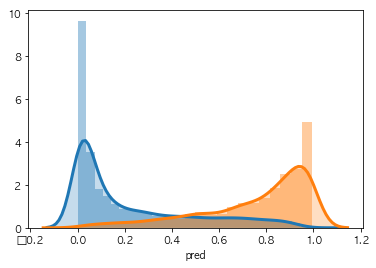

In [ ]:
### 두번째 모델 lightgbm ; 일반적으로 요즘 가장 많이 쓰는 GBM 트리 기반이라서, 앞의 전처리가 상당 부분 필요 없지만, 기왕 한김에 그대로 사용
def fitandevl_lgbm(fedata):
    
    y = fedata.loc[:,'income']
    X = fedata.loc[:, fedata.columns != 'income']
    
    from lightgbm import LGBMClassifier
    from sklearn.model_selection import ParameterSampler, RandomizedSearchCV
    from sklearn.model_selection import train_test_split

    #num_trials = 1
    #early_stopping_rounds = 20
    import sklearn.metrics as met

    params = {
        'feature_fraction' : list(np.arange(0.4,1,0.1)),
        'bagging_fraction' : list(np.arange(0.4,1,0.1)),
        'learning_rate' : [0.005,0.01,0.05,0.1],
        'num_leaves' : list(np.arange(20,55,3)),
        'application' : ['binary'],
        'objective' : ['binary'],
        'metric' : ['auc','binary_logloss'],
        'is_unbalance' : ['true','false'],
        'boosting' :['gbdt','dart'],
        'verbose' : [1],
        'num_threads' : [1],
        'n_estimators' : [5000], 
        'drop_rate' : [0.1,0.5],
        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }
    
    lgbmc = LGBMClassifier(silent=False)
    ### 나중 최종 성능을 보기 위한 테스트
    X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    ### 얼리 스타핑을 위한 벨리드
    X_train,X_valid, y_train,y_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=42)

    fit_params = {'eval_metric': 'auc',
                  'early_stopping_rounds': 50,
                  'eval_set': [(X_valid, y_valid)],
                 'verbose' : 1}
    ### 랜덤 서치 CV를 통해서 파라미터 탐색 ; 그리드 서치 보다 효율적임
    rs = RandomizedSearchCV(estimator=lgbmc,param_distributions=params,
                            n_iter=5,
                            scoring='roc_auc',
                            cv=2,
                            fit_params = fit_params,
                            refit=True,
                            random_state=42,
                            verbose=2)

    rs.fit(X_train,y_train,**fit_params)
    
    ### 성능 확인; 최고성능 파라미터에서 성능 테스트 데이터로 성능 확인
    test_preds = rs.best_estimator_.predict(X_test)
    test_probs = rs.best_estimator_.predict_proba(X_test)[:,1]
    metrics = evals(y_test,test_preds,test_probs)
    
    return rs

lgbmres = fitandevl_lgbm(data2c)
### 비교적 적은 수의 5회의 파라미터 탐색으로 AUC 0.918 달성; LR보다 LGBM이 더 좋은 성능으로 나옴
### 타겟에 따른 스코어 분포 그래프를 보기에도 좀더 명시적으로 잘 분리되어 보임 ; AUPRC도 더 좋게 나옴

In [ ]:
## 최적의 파라미터
lgbmres.best_params_

{'verbose': 1,
 'reg_lambda': 50,
 'reg_alpha': 7,
 'objective': 'binary',
 'num_threads': 1,
 'num_leaves': 20,
 'n_estimators': 5000,
 'metric': 'binary_logloss',
 'learning_rate': 0.05,
 'is_unbalance': 'true',
 'feature_fraction': 0.4,
 'drop_rate': 0.5,
 'boosting': 'gbdt',
 'bagging_fraction': 0.7999999999999999,
 'application': 'binary'}

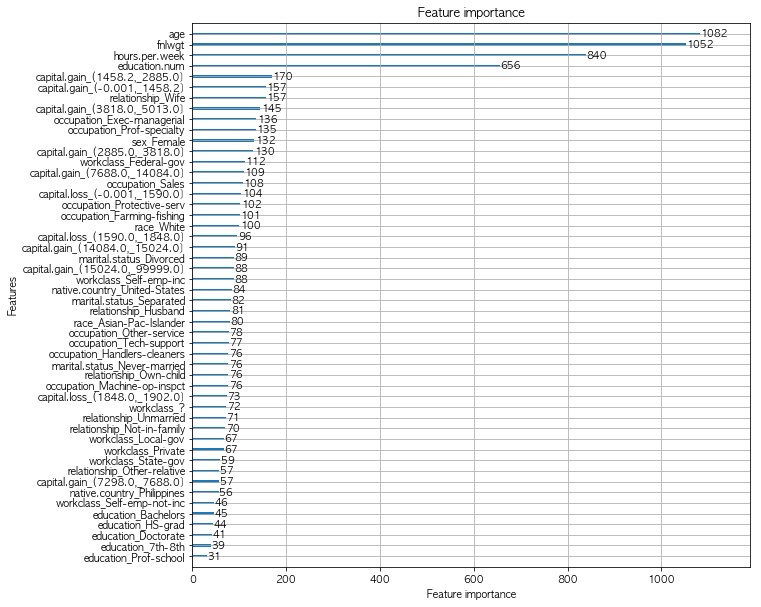

In [ ]:
### lightGBM 결과가 더 좋으므로 그 모델 기준으로 피쳐 중요도 탐색

### 스플릿에서 사용된 횟수에 따른 변수 중요도 나열
from lightgbm import plot_importance
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_importance(booster=lgbmres.best_estimator_.booster_,ax=ax,max_num_features=50)

In [ ]:
### SHAP를 통한 피쳐 중요도 탐색
import shap
X = data2c.loc[:, data2c.columns != 'income']
shap.initjs()

explainer = shap.TreeExplainer(lgbmres.best_estimator_)
shap_values = explainer.shap_values(X)


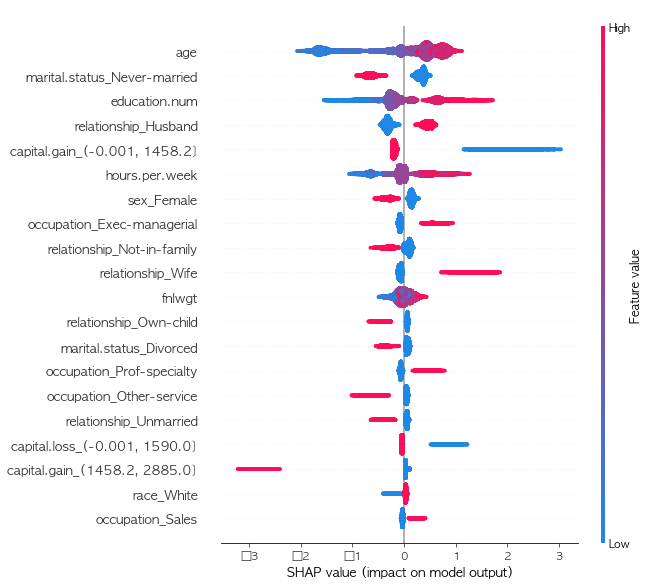

In [ ]:
shap.summary_plot(shap_values, X)
## 색은 붉은 값이 높은 값이고, 파란색이 낮은 값임
## X 축에서 양에 속하면 스코어 상승에 영향을 주고, 음에 속하면 스코어 하락에 영향을 주는 것임
## 

## 해석
### age가 높을수록 소득 상위에 속하는 스코어 높아지고, 작을 수록 낮아짐
### 결혼을 한번도 안한 상태가 아닐수록 소득 상위에 속하는 스코어 높아지고, 상태에 해당하면 낮아짐
### 최종 리포트 시에는 앞에서 살펴본 구간에 따른 타겟 비율 등을 조합하여 해석 가능

In [ ]:
## 하나의 예시에 대해서, 최종 스코어에 영향을 주는 변수들을 표현
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
## captital.loss가 -0.001,15909.0 구간에 속하지 않는 것이 스코어 상승의 영향이고,
## 결혼 안함 상태에 속하지 않는 것이 스코어 상승의 영향이고,
## age가 (1 이라는 것은 스케일 조정에 의해서 90)  90 이라는 것이 스코어 상승에 주된 영향이고,
## 가족에 있지 않음, 여성 등이 스코어 하락에 영향을 줌